Hajin Lim (hl934@cornell.edu)

### Project Title : <b> Perceived Politeness of English Online Messages by Different Language Groups </b>

### Data Source: 
- Extracted 300 messages randomly from Stanford Politeness Data Corpus (Source: http://www.cs.cornell.edu/~cristian//Politeness.html)
- This corpus contains a collection of requests from Wikipedia editor's talk pages (http://en.wikipedia.org/wiki/Wikipedia:Talk_page_guidelines) partially annotated for politeness.  There are 35,661 requests written in English from Wikipedia. 


### Data Annotation Procedure : 
- Participants :  7 English Native Speakers, 10 Korean Native Korean speakers, 11 Chinese Native speakers 
- Politeness ratings : For the given 300 messages, participants rated the perceived politeness of a messsage from very impolite (1) to very polite (25) 
- All messages were given in English without any translation. 
- Some of them (e.g. KO4) rated all 300 messages while the others (e.g. CH4/h rated only half of the messages.
- Each message was randomly ordered when they were presented to participants
- In case a participant could not sure of the politeness of a message, s/he could skip to rate it.


### Data Analysis Goal : 

1) Would the perception toward the politeness of online messages be similar across different language groups?

2) If not, what would be the characteristics of the messages that were perceived differently between different language groups? 




# First Activity
-> Explore whether the perceived message politeness varies by different language groups

In [21]:
import pandas as pd
import numpy as np
from scipy import stats
from sklearn import linear_model
import matplotlib.pyplot as plt
import nltk as nltk
%matplotlib inline

#Import CSV files that contains each messages and rating from differnt groups of participants as a Pandas Dataframe
codings=pd.read_csv('politeness_coding_data.csv', index_col=0, parse_dates=True)
codings.head()

,Community,Id,Request,EN1,EN2,EN3,EN4,EN5,EN6,EN7,...,Sue,Score1,Score2,Score3,Score4,Score5,NormalizedScore,politenessMEAN,politenessSD,MsgLength
ID,,,,,,,,,,,,,,,,,,,,,
1,Wikipedia,2320,Hmm...the picture was taken on my camera by so...,21.0,12.0,13,13.0,15.0,15.0,14.0,...,1,18,13,21,17,13,0.463156,16.4,3.44,92.0
2,Wikipedia,4026,"My question is ""Why?"" I am doing all the citat...",19.0,10.0,11,12.0,16.0,5.0,13.0,...,1,13,9,21,21,19,0.635085,16.6,5.37,131.0
3,Wikipedia,4767,I noticed you removed Pero Defformero from the...,8.0,9.0,12,12.0,8.0,14.0,13.0,...,1,14,10,8,21,7,-0.426832,12.0,5.70,120.0
4,Wikipedia,5692,I don't see a connection between the 'url' and...,12.0,11.0,13,15.0,16.0,13.0,12.0,...,1,11,16,13,9,13,-0.311649,12.4,2.61,147.0
5,Wikipedia,7122,url'.. it doesn't really explain what the issu...,9.0,9.0,11,13.0,8.0,11.0,12.0,...,1,11,9,13,8,12,-0.742414,10.6,2.07,77.0


In [22]:
#Read headers values 
headers=list(codings.columns.values)
print(headers)
# print(codings)

['Community', 'Id', 'Request', 'EN1', 'EN2', 'EN3', 'EN4', 'EN5', 'EN6', 'EN7', 'CH1', 'CH2', 'CH3', 'CH4/h', 'CH5/h', 'CH6/h', 'CH7/h', 'CH8/h', 'CH9/h', 'CH10/h', 'CH11/h', 'KO1', 'KO2', 'KO3', 'KO4', 'KO5', 'KO6', 'KO7', 'KO8/h', 'KO9/h', 'KO10/h', 'Sue', 'Score1', 'Score2', 'Score3', 'Score4', 'Score5', 'NormalizedScore', 'politenessMEAN', 'politenessSD', 'MsgLength']


In [23]:
#Split up the files by participants' language groups by the headers

enh=[]
koh=[]
chh=[]

for h in headers:
    if h.startswith('EN'):
        enh.append(h)
    elif h.startswith('KO'):
        koh.append(h)
    elif h.startswith('CH'):
        chh.append(h)
print(enh, koh, chh)

['EN1', 'EN2', 'EN3', 'EN4', 'EN5', 'EN6', 'EN7'] ['KO1', 'KO2', 'KO3', 'KO4', 'KO5', 'KO6', 'KO7', 'KO8/h', 'KO9/h', 'KO10/h'] ['CH1', 'CH2', 'CH3', 'CH4/h', 'CH5/h', 'CH6/h', 'CH7/h', 'CH8/h', 'CH9/h', 'CH10/h', 'CH11/h']


In [26]:
#Separate individual ratings for each message by language groups 
en=codings[enh].values
ko=codings[koh].values 
ch=codings[chh].values 
# print(en.shape)
# print(ko.shape)
# print(ch.shape)
print(ko)

# Get the means of each message by different language groups (while ignoring the Nan values)
ena=np.nanmean(en,axis=1)
koa=np.nanmean(ko,axis=1)
cha=np.nanmean(ch,axis=1)

print(ena.shape)
print(koa.shape)
print(cha.shape)

[[25. 13.  9. ... nan 13. 13.]
 [21. 10. 17. ... nan 18. 13.]
 [14. 13. 14. ... nan 13. 11.]
 ...
 [12. 14. 14. ... 16. nan nan]
 [16. 14. 18. ... 10. nan nan]
 [22. 13. 11. ... 19. nan nan]]
(300,)
(300,)
(300,)


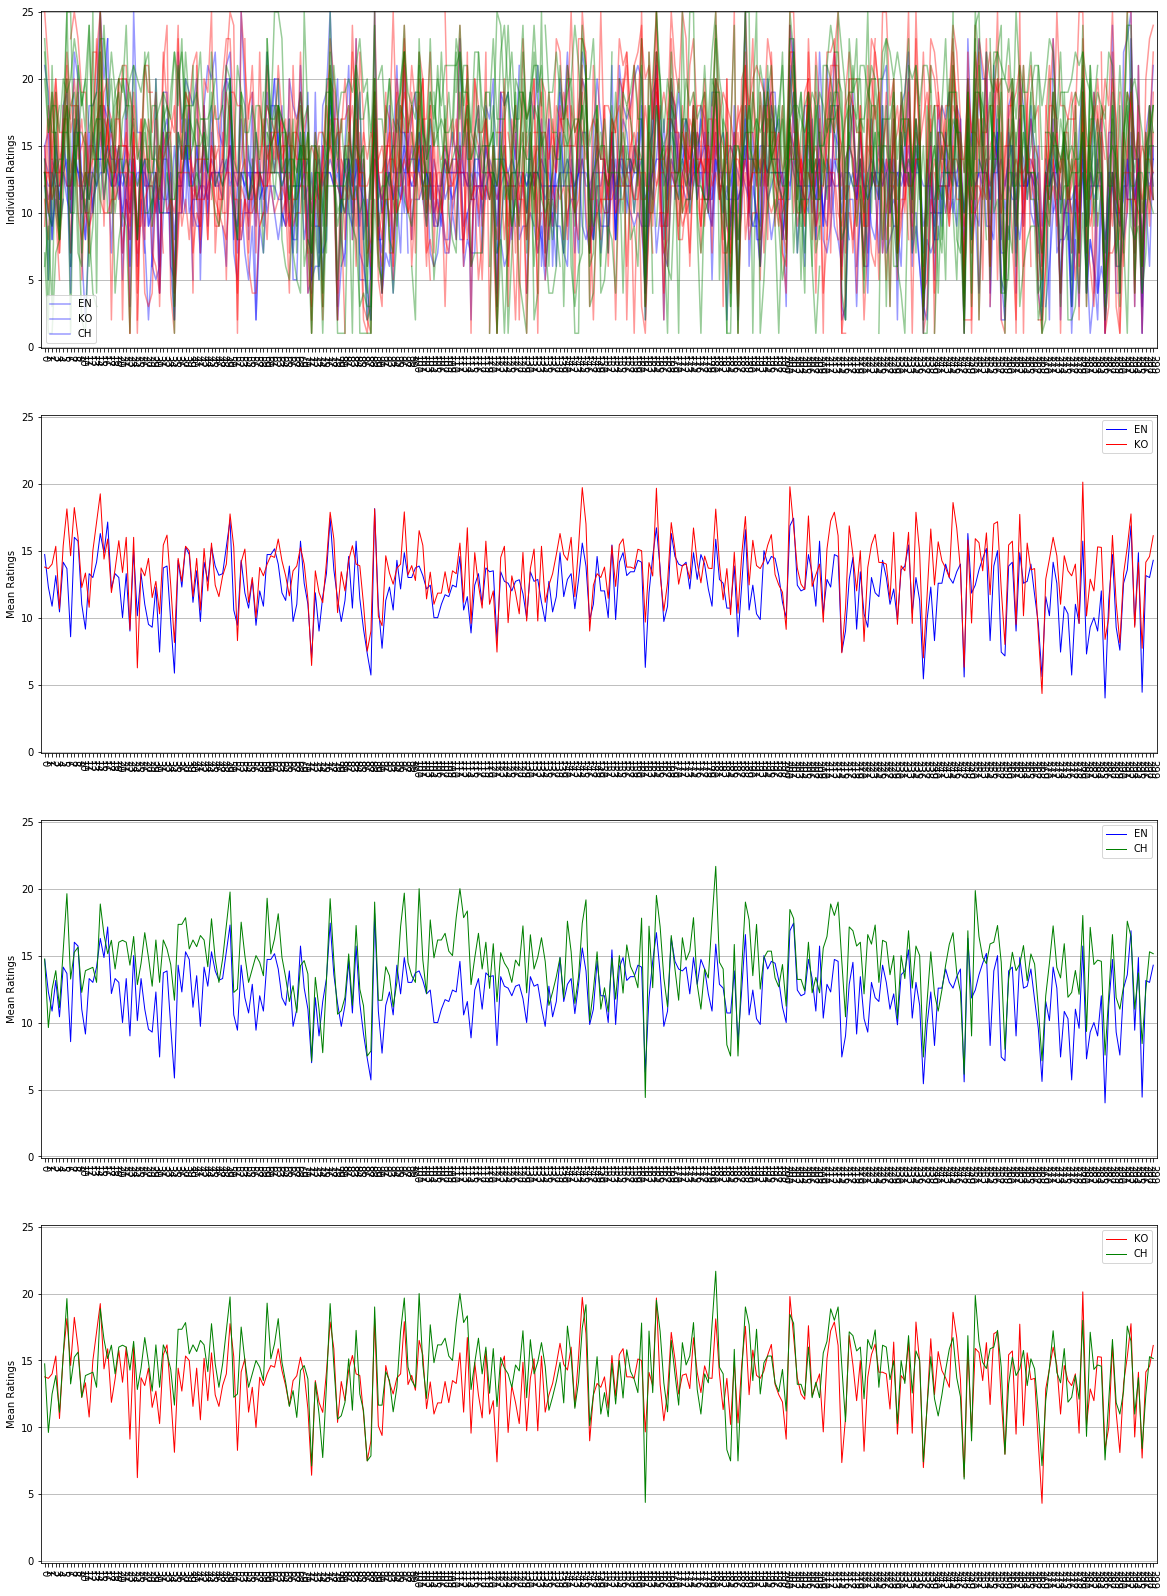

In [27]:
# Plot Means 
def plot_format(ylab=''):
    plt.xticks(range(300), rotation=270)
    plt.xlim(-1,300)
    plt.ylim(-0.1,25.1)

    plt.grid(axis='y')
    plt.ylabel(ylab)

# Plot all individual values
plt.figure(figsize=(20,36))
plt.subplot(511)
plt.plot(en, 'b', alpha=0.4)
plt.plot(ko, 'r', alpha=0.4)
plt.plot(ch, 'g', alpha=0.4)
plot_format('Individual Ratings')
plt.legend(['EN', 'KO', 'CH'])


# Mean trend between EN vs. KO 
plt.subplot(512)
plt.plot(ena,'b', linewidth=1)
plt.plot(koa,'r', linewidth=1)
plt.legend(['EN', 'KO'])
plot_format('Mean Ratings')


# Mean trend between EN vs. CH 
plt.subplot(513)
plt.plot(ena,'b', linewidth=1)
plt.plot(cha,'g', linewidth=1)
plt.legend(['EN', 'CH'])
plot_format('Mean Ratings')


# Mean trend between KO vs. CH 

plt.subplot(514)

# plt.plot(ena,'b', linewidth=1)
plt.plot(koa,'r', linewidth=1)
plt.plot(cha,'g', linewidth=1)
plt.legend(['KO', 'CH'])
plot_format('Mean Ratings')

En mean, std 12.196650793650793 2.4987971497332957
Ko mean, std 13.482599206349207 2.670734604719351
Ch mean, std 14.291461640211637 2.7510465706020555


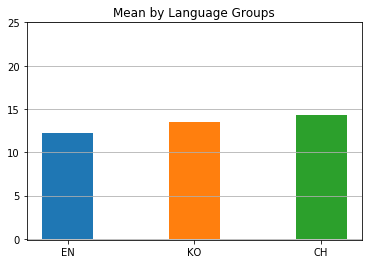

In [28]:
#Mean of means
print("En mean, std", np.average(ena), np.std(ena))
print("Ko mean, std",np.average(koa), np.std(koa))
print("Ch mean, std",np.average(cha), np.std(cha))

plt.bar(1, np.average(ena), 0.4)
plt.bar(2, np.average(koa), 0.4)
plt.bar(3, np.average(cha), 0.4)
plt.grid(axis='y')
plt.xticks((1,2,3), ('EN', 'KO', 'CH', ''))
plt.ylim(-0.1,25)
plt.title('Mean by Language Groups')


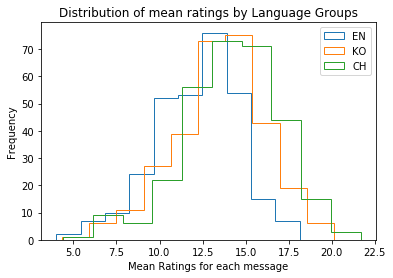

In [29]:
# Plot histograms of mean ratings of each message by language groups

plt.hist(ena, histtype='step', rwidth=0.9, label="EN")
plt.hist(koa, histtype='step', rwidth=0.9, label="KO")
plt.hist(cha, histtype='step', rwidth=0.9, label="CH")
plt.legend()
plt.title("Distribution of mean ratings by Language Groups")
plt.xlabel("Mean Ratings for each message")
plt.ylabel("Frequency")

LinregressResult(slope=0.801257881266264, intercept=3.709936632884075, rvalue=0.749674230592401, pvalue=2.3250084083994442e-55, stderr=0.04097537881527395)
LinregressResult(slope=0.6803351867789695, intercept=5.993650944435357, rvalue=0.6179537793918612, pvalue=5.5261110273267985e-33, stderr=0.05014178815544627)
LinregressResult(slope=0.6838059264640713, intercept=5.071980398770265, rvalue=0.6638434151698496, pvalue=1.741970141504562e-39, stderr=0.044625810228731966)


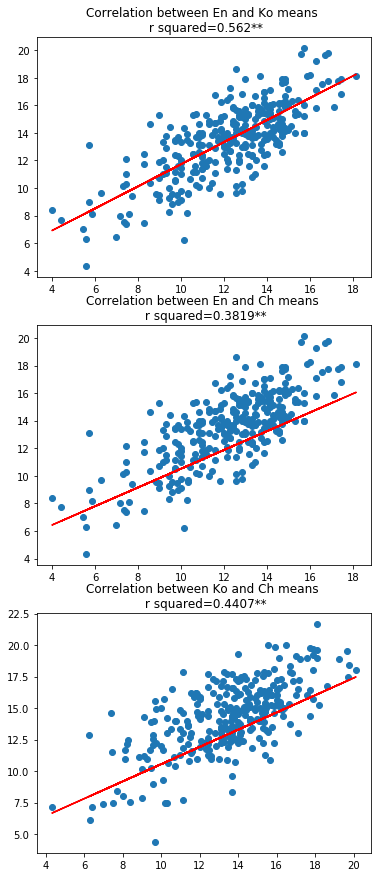

In [30]:
# Correlation between mean ratings by Language Groups
plt.figure(figsize=(6,15))

#EN vs. Ko
plt.subplot(311)
plt.scatter(ena, koa)
print(stats.linregress(ena,koa))
slope,intercept,rvalue=stats.linregress(ena,koa)[:3]
plt.plot(ena, slope*ena+intercept, 'r')
plt.title("Correlation between En and Ko means \n r squared={}**".format(round(rvalue**2, 4)))


#EN vs. Ko
plt.subplot(312)
plt.scatter(ena, koa)
print(stats.linregress(ena,cha))
slope,intecept, rvalue=stats.linregress(ena,cha)[:3]
plt.plot(ena, slope*ena+intercept, 'r')
plt.title("Correlation between En and Ch means \n r squared={}**".format(round(rvalue**2, 4)))


#EN vs. Ko
plt.subplot(313)
plt.scatter(koa, cha)
print(stats.linregress(koa,cha))
slope,intecept, rvalue=stats.linregress(koa,cha)[:3]
plt.plot(koa, slope*koa+intercept, 'r')
plt.title("Correlation between Ko and Ch means \n r squared={}**".format(round(rvalue**2, 4)))


In [31]:
#Ran T-Tests between mean ratings by language group
print("T-test : En vs. Ko", stats.ttest_ind(ena,koa))
print("T-test : En vs. Ch", stats.ttest_ind(ena,cha))
print("T-test : Ko vs. Ch", stats.ttest_ind(koa,cha))

#Ran ANOVAs between mean ratings by language group

print("ANOVA : En vs. Ko vs. Ch", stats.f_oneway(ena, koa, cha))
print("ANOVA : En vs. (Ko + Ch)", stats.f_oneway(ena, koa+cha))
print("Kruskal : En vs. Ko vs. Ch", stats.kruskal(ena,koa,cha))
print("Kruskal : En vs. (Ko+ Ch)", stats.kruskal(ena,koa,cha))

T-test : En vs. Ko Ttest_indResult(statistic=-6.0797098463505685, pvalue=2.1467933807303152e-09)
T-test : En vs. Ch Ttest_indResult(statistic=-9.746490873693194, pvalue=6.2518205720781775e-21)
T-test : Ko vs. Ch Ttest_indResult(statistic=-3.647838740309742, pvalue=0.00028754111122628495)
ANOVA : En vs. Ko vs. Ch F_onewayResult(statistic=47.79526475793833, pvalue=1.8880289804854952e-20)
ANOVA : En vs. (Ko + Ch) F_onewayResult(statistic=2363.3241683353863, pvalue=6.63072354327002e-210)
Kruskal : En vs. Ko vs. Ch KruskalResult(statistic=92.00470766477157, pvalue=1.0505859199083965e-20)
Kruskal : En vs. (Ko+ Ch) KruskalResult(statistic=92.00470766477157, pvalue=1.0505859199083965e-20)


### Activity 1 Findings

-> Although the means between different language groups showed significant and moderately high correlations, the mean ratings for message politeness are significantly different by different language groups.  

## Activity 2
Extract the messages that showed big differences in ratings between differnt language groups

### Procedure
- Examine the mean differences between each pair of the language groups (e.g., En vs. Ko, En vs. Ch, Ko vs. Ch)
- Convert the differences to z scores (Stardarized)
- Find outliers which are situated in both ends (about 10~20% of messages)
- Find the set of messages that showed least difference between different language groups (middle area: about 10-20% of messages)


In [38]:
# Examine mean difference -> convert it to z score -> extract right/left 10% and mid 20% set 

#En vs. Ko
a= ena-koa
mean_y = np.mean(a)
stdev_y = np.std(a)
z_scores = [(y - mean_y) / stdev_y for y in a]
enkop=z_scores

enko0=[] # Left end
enko1=[] # Right end
enko_s=[] # Middle 

for i in range(len(z_scores)):
    #Outliers -> 7.5% from both ends 
    if z_scores[i] < -1.43:
        enko0.append(i)
    if z_scores[i]>1.43:
        enko1.append(i)
    # the set of messages that have similar ratings between different language groups(Mid 10 %)
    if np.abs(z_scores[i]) < 0.125:
        enko_s.append(i)

print(mean_y, stdev_y)
print(enko0)
print(len(enko0))

print(enko1)
print(len(enko1))

print(enko_s)
print(len(enko_s))


-1.2859484126984126 1.8359527832970597
[6, 7, 11, 28, 51, 83, 114, 134, 145, 212, 217, 222, 224, 229, 235, 239, 240, 245, 258, 271, 277, 280, 284, 286]
24
[12, 25, 46, 47, 66, 84, 120, 121, 125, 128, 133, 164, 171, 177, 209, 221, 250, 264]
18
[1, 5, 10, 70, 110, 123, 126, 135, 139, 141, 148, 152, 155, 176, 182, 195, 203, 254, 270, 288]
20


In [42]:
# En vs. Ch
a= ena-cha
mean_y = np.mean(a)
stdev_y = np.std(a)
z_scores = [(y - mean_y) / stdev_y for y in a]
enchp=z_scores
# print(enchp)

ench0=[]
ench1=[]
ench_s=[]

for i in range(len(z_scores)):
    if z_scores[i] < -1.43:
        ench0.append(i)
    if z_scores[i]>1.43:
        ench1.append(i)
    if np.abs(z_scores[i]) < 0.125:
        ench_s.append(i)

print(mean_y, stdev_y)
print(ench0)
print(len(ench0))

print(ench1)
print(len(ench1))

print(ench_s)
print(len(ench_s))

-2.094810846560846 2.305696432604227
[6, 21, 27, 31, 35, 42, 57, 101, 106, 111, 112, 113, 114, 129, 180, 181, 190, 192, 212, 215, 219, 222, 224, 251, 255, 258, 274, 277, 282, 284]
30
[1, 17, 66, 69, 75, 95, 136, 156, 160, 162, 164, 171, 177, 184, 185, 209, 241, 247, 250]
19
[41, 43, 49, 55, 65, 70, 74, 77, 86, 88, 119, 127, 130, 133, 137, 138, 142, 145, 154, 186, 218, 221, 226, 234, 237, 256, 257, 280, 281, 288, 298]
31


In [43]:
#Ko vs. Ch
a= koa-cha
mean_y = np.mean(a)
stdev_y = np.std(a)
z_scores = [(y - mean_y) / stdev_y for y in a]
kochp=z_scores

koch0=[]
koch1=[]
koch_s=[]
for i in range(len(z_scores)):
    if z_scores[i] < -1.43:
        koch0.append(i)
    if z_scores[i]>1.43:
        koch1.append(i)
    if np.abs(z_scores[i]) < 0.125:
        koch_s.append(i)

        
print(mean_y, stdev_y)
print(koch0)
print(len(koch0))

print(koch1)
print(len(koch1))

print(koch_s)
print(len(koch_s))


-0.808862433862434 2.2239934426826395
[18, 23, 25, 37, 40, 42, 52, 57, 60, 104, 106, 107, 111, 112, 113, 117, 122, 125, 133, 180, 190, 210, 215, 255, 262, 264, 282]
27
[1, 8, 14, 51, 68, 75, 80, 83, 140, 156, 160, 162, 184, 185, 187, 241, 246, 263, 265]
19
[0, 11, 26, 32, 43, 56, 58, 64, 70, 72, 82, 89, 103, 123, 134, 173, 186, 194, 202, 204, 220, 224, 230, 243, 249, 252, 267, 289, 296, 298]
30


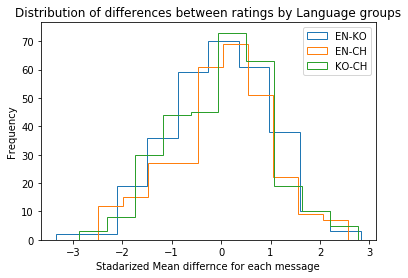

In [44]:
# Distribution Plot of mean differences 

plt.hist(enkop, histtype='step', rwidth=0.9, label="EN-KO")
plt.hist(enchp, histtype='step', rwidth=0.9, label="EN-CH")
plt.hist(kochp, histtype='step', rwidth=0.9, label="KO-CH")

plt.legend()
plt.title("Distribution of differences between ratings by Language groups")
plt.xlabel("Stadarized Mean differnce for each message")
plt.ylabel("Frequency")

In [47]:
# import json messages for each category 
import json

lists=[enko0,enko1,enko_s,ench0,ench1,ench_s, koch0,koch1,koch_s]
# print(lists)
category=["en<ko","en>ko","en=ko","en<ch","en>ch","en=ch","ko<ch","ko>ch","ko=ch"]


diff_sens=[]
for i in range(len(lists)):
    lists[i].pop(0)
    for it in lists[i]:
        diff_sens.append({"category": category[i], "Message Num":it, "text": codings['Request'][it], "MsgLen": len(codings['Request'][it]), "En": ena[it],"Ko": koa[it], "Ch": cha[it]})

with open('diff_sens.json', 'w') as f:
    json.dump(diff_sens, f, ensure_ascii=False)

# with open('diff_sens.py', 'w') as f:
#     json.dump(diff_sens, f, ensure_ascii=False)

print(diff_sens[24])

{'category': 'en>ko', 'Message Num': 120, 'text': "When JaGaBot updated the monthly challenge winners on 'url', it stripped the image. Could the bot be fixed to leave the image?", 'MsgLen': 126, 'En': 13.428571428571429, 'Ko': 11.0, 'Ch': 12.555555555555555}


In [48]:
for i in range(len(diff_sens)):
    if diff_sens[i]['category']=='en<ch':
        print("====")
        print(diff_sens[i]['text'])
        print("American Ratings:", diff_sens[i]['En'].round(2))
        print("Chinese Ratings:", diff_sens[i]['Ch'].round(2))

        print("")

====
OK, I will do that. But probably we should first set the gallery up on commons - do you know anything about editing/creating there?
American Ratings: 7.43
Chinese Ratings: 13.0

====
The notion that a hunter would kill dozens of birds with a single shot seems outlandish to me.  Do you have a reference for this?
American Ratings: 5.86
Chinese Ratings: 11.67

====
Have you received the 1972 Encyclopedia of PNG you mentioned during the discussion about 'url'? Was there a detailed entry for Dagora?
American Ratings: 9.71
Chinese Ratings: 16.5

====
An article about a craver named 'url' needs some work. Can you clean the article up?
American Ratings: 9.43
Chinese Ratings: 15.0

====
Latest version (now on  Commons); all placenames included but still needs some tidying up and  tweaking. Comments?
American Ratings: 13.86
Chinese Ratings: 20.0

====
There's an interesting discussion here: 'url'. Care to explain?
American Ratings: 10.0
Chinese Ratings: 16.17

====
I just noticed you've add

In [49]:
#output json
diff_sens=[{"category": "en<ko", "Message Num": 114, "text": "pls see my comments on your revert on the talk page.  Perhaps you'll consider undoing my revert?", "MsgLen": 96, "En": 11.571428571428571, "Ko": 16.714285714285715, "Ch": 18.333333333333332}, {"category": "en<ko", "Message Num": 134, "text": "It's a shame that 'url' still needs repair.  What do you think?", "MsgLen": 63, "En": 11.142857142857142, "Ko": 15.333333333333334, "Ch": 16.333333333333332}, {"category": "en<ko", "Message Num": 145, "text": "I had a look at the place noted on the top of the talk page about 1rr and I was unable to find the sanction you talked about. Where is it listed please?", "MsgLen": 152, "En": 15.571428571428571, "Ko": 19.714285714285715, "Ch": 17.428571428571427}, {"category": "en<ko", "Message Num": 212, "text": "This page is new, the result of a move - the page it moved from is now a redirect to 'url', but the history which goes with it is at the page I asked to be deleted. Can you delete the page, while copying the history over to the article?", "MsgLen": 236, "En": 12.285714285714286, "Ko": 17.22222222222222, "Ch": 18.857142857142858}, {"category": "en<ko", "Message Num": 217, "text": "I don't think anybody wants the stale uninformative old Victorian results infoboxes. Can you gain consensus before deviating?", "MsgLen": 125, "En": 12.857142857142858, "Ko": 16.857142857142858, "Ch": 17.142857142857142}, {"category": "en<ko", "Message Num": 222, "text": "I have applied to become an admin but no one has voted?  Why is this?", "MsgLen": 69, "En": 9.285714285714286, "Ko": 13.75, "Ch": 16.571428571428573}, {"category": "en<ko", "Message Num": 224, "text": "url' is currently an orphaned article. Can you find some articles to link to 'Christa Behmenburg''?", "MsgLen": 99, "En": 11.857142857142858, "Ko": 16.22222222222222, "Ch": 17.285714285714285}, {"category": "en<ko", "Message Num": 229, "text": "The review has been up there for something like six weeks, I notice. Think you'll be able to take care of those last couple of things?", "MsgLen": 134, "En": 12.142857142857142, "Ko": 16.375, "Ch": 15.0}, {"category": "en<ko", "Message Num": 235, "text": "During your RFA you stated that you would be helping deal with the Scibaby situation after Raul stopped doing it. Do you feel that you've done what you said you were going to do?", "MsgLen": 178, "En": 13.0, "Ko": 17.875, "Ch": 15.714285714285714}, {"category": "en<ko", "Message Num": 239, "text": "Email checked and responded to.  If you can't respond here, could you at least leave me a note to check my email?", "MsgLen": 113, "En": 12.285714285714286, "Ko": 16.625, "Ch": 15.285714285714286}, {"category": "en<ko", "Message Num": 240, "text": "As to our last discussion, you said that 'url' wasn't comprehensive enough and didn't show clearly its goal. Do you have any suggesting to improve this template?", "MsgLen": 161, "En": 8.285714285714286, "Ko": 12.444444444444445, "Ch": 12.142857142857142}, {"category": "en<ko", "Message Num": 245, "text": "Can I use a manga image colored by myself? There won't be any problems with the lisense, right?", "MsgLen": 95, "En": 12.571428571428571, "Ko": 18.6, "Ch": 16.714285714285715}, {"category": "en<ko", "Message Num": 258, "text": "Great Article RaveenS, Do u want me to add this to the template (Sri Lankan Conflict)? I think it should be included in the ''see also'' section what do you suggest?", "MsgLen": 165, "En": 7.428571428571429, "Ko": 12.142857142857142, "Ch": 14.5}, {"category": "en<ko", "Message Num": 271, "text": "Do you feel that you've had success in forming consensus here within your knowledgebase?  What do you feel are the underlying reasons behind your current ban from Wikipedia?", "MsgLen": 173, "En": 10.142857142857142, "Ko": 14.375, "Ch": 14.444444444444445}, {"category": "en<ko", "Message Num": 277, "text": "There's nothing in your history besides editing my page, so I'm not sure to what you are referring. What page are you talking about?", "MsgLen": 132, "En": 5.714285714285714, "Ko": 13.125, "Ch": 12.25}, {"category": "en<ko", "Message Num": 280, "text": "Just curious... Where did it come from?  Where did you cut and paste it from?", "MsgLen": 77, "En": 15.714285714285714, "Ko": 20.125, "Ch": 18.0}, {"category": "en<ko", "Message Num": 284, "text": "That sounds fine, but why would you want somebody who knows nothing about the show to write them? If you are informed about it, wouldn't you be a good person to do it?", "MsgLen": 167, "En": 9.0, "Ko": 15.285714285714286, "Ch": 14.666666666666666}, {"category": "en<ko", "Message Num": 286, "text": "I see that you have made an edit to another page since posting the request for IP block exemption. Does that mean the block is  no longer in force?", "MsgLen": 147, "En": 4.0, "Ko": 8.375, "Ch": 7.571428571428571}, {"category": "en>ko", "Message Num": 120, "text": "When JaGaBot updated the monthly challenge winners on 'url', it stripped the image. Could the bot be fixed to leave the image?", "MsgLen": 126, "En": 13.428571428571429, "Ko": 11.0, "Ch": 12.555555555555555}, {"category": "en>ko", "Message Num": 121, "text": "Why are capital letters used in the article title '''url'''? Is this a proper name of a particular proprietary software package?", "MsgLen": 128, "En": 13.5, "Ko": 12.0, "Ch": 15.88888888888889}, {"category": "en>ko", "Message Num": 125, "text": "My page now has a template of \"multiple issues\", but I have put in several references, and there are links to other pages.  What more should I do?", "MsgLen": 146, "En": 12.571428571428571, "Ko": 9.625, "Ch": 14.0}, {"category": "en>ko", "Message Num": 128, "text": "On that topic, not every DOS game on Wikipedia has a screenshot. Do you plan on taking any yourself?", "MsgLen": 100, "En": 12.833333333333334, "Ko": 10.285714285714286, "Ch": 14.222222222222221}, {"category": "en>ko", "Message Num": 133, "text": "I get the error message \"sorry, not enough content to play this station\". Can you explain a bit what your code do, and does this need an account on Lastfm or something else ?", "MsgLen": 174, "En": 12.857142857142858, "Ko": 9.75, "Ch": 14.88888888888889}, {"category": "en>ko", "Message Num": 164, "text": "I note that you've edited since this was brought up here. Could you please respond?", "MsgLen": 83, "En": 14.571428571428571, "Ko": 13.11111111111111, "Ch": 12.6}, {"category": "en>ko", "Message Num": 171, "text": "Some time ago you uploaded an image of the Knowledge Navigator, which was speedied some time later. Can you upload the file again?", "MsgLen": 130, "En": 14.0, "Ko": 12.5, "Ch": 11.666666666666666}, {"category": "en>ko", "Message Num": 177, "text": "I \"voted\" weak keep, based on what I've found.  Can you comment?", "MsgLen": 64, "En": 14.714285714285714, "Ko": 12.6, "Ch": 11.0}, {"category": "en>ko", "Message Num": 209, "text": "Could you please block me indefinitely. If you can't then what do I need to do to get blocked indefinitely?", "MsgLen": 107, "En": 15.714285714285714, "Ko": 14.0, "Ch": 12.222222222222221}, {"category": "en>ko", "Message Num": 221, "text": "It's larger now than the sub-stub previously deleted.  Can sources be added to verify the achievements?", "MsgLen": 103, "En": 10.285714285714286, "Ko": 8.222222222222221, "Ch": 12.142857142857142}, {"category": "en>ko", "Message Num": 250, "text": "Thanks.  Aside from rewrites and creations (which I've no mind for), anything in particular you see that I should focus on, or is it going okay?", "MsgLen": 144, "En": 11.833333333333334, "Ko": 9.6, "Ch": 9.0}, {"category": "en>ko", "Message Num": 264, "text": "I'm sorry, I don't know what article you are talking about. Can you please provide the exact name?", "MsgLen": 98, "En": 12.571428571428571, "Ko": 10.142857142857142, "Ch": 15.75}, {"category": "en=ko", "Message Num": 126, "text": "Hey, did you ever read over the material I laid out for you - content as well as ideas for organization of an article?  Any feedback?", "MsgLen": 133, "En": 12.0, "Ko": 13.125, "Ch": 13.0}, {"category": "en=ko", "Message Num": 135, "text": "As someone who has edited 'url' you might be interested to see that it has been suggested for deletion (or some other form of bastardization).  Care to join in the discussion?", "MsgLen": 175, "En": 9.714285714285714, "Ko": 11.142857142857142, "Ch": 14.571428571428571}, {"category": "en=ko", "Message Num": 139, "text": "I have never heard of the 1933 \"freakish heat flash\" in Coimbra, Portugal. Will you please provide some sources that you used for forming such a conclusion?", "MsgLen": 156, "En": 14.857142857142858, "Ko": 16.285714285714285, "Ch": 14.857142857142858}, {"category": "en=ko", "Message Num": 141, "text": "The link to Sciencedude by Gary Robbins: Obituary of Joel Hedgpeth, which I believe you added, no longer includes the obituary.  Can you up-date the link?", "MsgLen": 154, "En": 12.857142857142858, "Ko": 14.285714285714286, "Ch": 17.571428571428573}, {"category": "en=ko", "Message Num": 148, "text": "Please explain this 'url'. Is there a valid reason why this image was removed?", "MsgLen": 78, "En": 11.0, "Ko": 12.428571428571429, "Ch": 12.428571428571429}, {"category": "en=ko", "Message Num": 152, "text": "I have also put speedy delete tags on 'url' and 'url'.  Was there any particular reason to move your user/user talk pages to that name, and back again?", "MsgLen": 151, "En": 10.0, "Ko": 11.444444444444445, "Ch": 10.8}, {"category": "en=ko", "Message Num": 155, "text": "And what, may I ask, is ''your'' relationship to Hammersoft? How did you come upon this matter?", "MsgLen": 95, "En": 14.142857142857142, "Ko": 15.444444444444445, "Ch": 15.0}, {"category": "en=ko", "Message Num": 176, "text": "<person>, with whom you discussed linkspam in 2006, has returned. Could you offer your views on his talkpage?", "MsgLen": 109, "En": 12.857142857142858, "Ko": 14.11111111111111, "Ch": 12.833333333333334}, {"category": "en=ko", "Message Num": 182, "text": "Welcome to WikiProject Austria. I'm wondering if you're willing to coordinate the project for a while?", "MsgLen": 102, "En": 12.857142857142858, "Ko": 14.0, "Ch": 14.5}, {"category": "en=ko", "Message Num": 195, "text": "I'm not sure what you mean by pointing out that votes were placed before the version you created. Could you elaborate?", "MsgLen": 118, "En": 14.0, "Ko": 15.4, "Ch": 15.333333333333334}, {"category": "en=ko", "Message Num": 203, "text": "Thank you! Could you protect the picture that's live too?", "MsgLen": 57, "En": 12.428571428571429, "Ko": 13.7, "Ch": 13.222222222222221}, {"category": "en=ko", "Message Num": 254, "text": "I don't see the vandalism. Could you show me where it is?", "MsgLen": 57, "En": 15.166666666666666, "Ko": 16.333333333333332, "Ch": 14.4}, {"category": "en=ko", "Message Num": 270, "text": "just look out or you'll regret!OK, stop here, go to bed. Have U done \"Tourism Report\" yet?", "MsgLen": 90, "En": 11.571428571428571, "Ko": 12.875, "Ch": 12.0}, {"category": "en=ko", "Message Num": 288, "text": "Your first attempt at doing this also added a <nowiki>\"'url'\"</nowiki> line to the article, and that's what triggered the bot.  Perhaps you should get into the habit of using the 'Show changes button?", "MsgLen": 200, "En": 14.714285714285714, "Ko": 16.142857142857142, "Ch": 16.571428571428573}, {"category": "en<ch", "Message Num": 57, "text": "An article about a craver named 'url' needs some work. Can you clean the article up?", "MsgLen": 84, "En": 9.428571428571429, "Ko": 10.0, "Ch": 15.0}, {"category": "en<ch", "Message Num": 101, "text": "Latest version (now on  Commons); all placenames included but still needs some tidying up and  tweaking. Comments?", "MsgLen": 114, "En": 13.857142857142858, "Ko": 16.5, "Ch": 20.0}, {"category": "en<ch", "Message Num": 106, "text": "There's an interesting discussion here: 'url'. Care to explain?", "MsgLen": 63, "En": 10.0, "Ko": 11.833333333333334, "Ch": 16.166666666666668}, {"category": "en<ch", "Message Num": 111, "text": "I just noticed you've added me as a sock puppet for Blue Sea? Can I ask what led you to this conclusion?", "MsgLen": 104, "En": 12.285714285714286, "Ko": 13.285714285714286, "Ch": 17.833333333333332}, {"category": "en<ch", "Message Num": 112, "text": "All the images are on the right side, which means they sometime clash and push the text away from itself. Have you considered moving some images to the left to stop this?", "MsgLen": 170, "En": 14.571428571428571, "Ko": 15.571428571428571, "Ch": 20.0}, {"category": "en<ch", "Message Num": 113, "text": "I have found a better citation for reference 7, but am not sure how to insert the page number (p. 97 from the book cited).  Do you know the right format for this?", "MsgLen": 162, "En": 10.571428571428571, "Ko": 11.142857142857142, "Ch": 17.833333333333332}, {"category": "en<ch", "Message Num": 114, "text": "pls see my comments on your revert on the talk page.  Perhaps you'll consider undoing my revert?", "MsgLen": 96, "En": 11.571428571428571, "Ko": 16.714285714285715, "Ch": 18.333333333333332}, {"category": "en<ch", "Message Num": 129, "text": "Did you just revert back to the old article? Or did I do something wrong with the move?", "MsgLen": 87, "En": 11.8, "Ko": 14.875, "Ch": 17.22222222222222}, {"category": "en<ch", "Message Num": 180, "text": "Without information about the source and whether it's a free use or fair use picture it can't be used under the Wikipedia rules. Do you have this information?", "MsgLen": 158, "En": 10.857142857142858, "Ko": 13.666666666666666, "Ch": 17.666666666666668}, {"category": "en<ch", "Message Num": 181, "text": "I never received any notification of any deletion proposal, lest I would have contested. Is there any way to find the original proposal and/or artical, or has it just been sent to oblivion?", "MsgLen": 189, "En": 15.857142857142858, "Ko": 18.11111111111111, "Ch": 21.666666666666668}, {"category": "en<ch", "Message Num": 190, "text": "Hi, thanks for moving three of the Brussels municipalities. Could you move 'url' to 'url' as well?", "MsgLen": 98, "En": 10.571428571428571, "Ko": 12.444444444444445, "Ch": 17.666666666666668}, {"category": "en<ch", "Message Num": 192, "text": "Also, I undid the recent move to Eris, pending some discussion. Maybe you'd like to support/oppose the move?", "MsgLen": 108, "En": 10.285714285714286, "Ko": 13.88888888888889, "Ch": 17.333333333333332}, {"category": "en<ch", "Message Num": 212, "text": "This page is new, the result of a move - the page it moved from is now a redirect to 'url', but the history which goes with it is at the page I asked to be deleted. Can you delete the page, while copying the history over to the article?", "MsgLen": 236, "En": 12.285714285714286, "Ko": 17.22222222222222, "Ch": 18.857142857142858}, {"category": "en<ch", "Message Num": 215, "text": "url' has copyedited the article on my request, cleaning up much of the complicated sentence structure; I'm not sure if it's sufficient, however.  Perhaps you might be able to take another look at it?", "MsgLen": 199, "En": 7.428571428571429, "Ko": 7.375, "Ch": 14.571428571428571}, {"category": "en<ch", "Message Num": 219, "text": "Hi GW.. I was a bit bored today, so I made this: 'url'.. What do you think so far?", "MsgLen": 82, "En": 9.142857142857142, "Ko": 12.0, "Ch": 15.714285714285714}, {"category": "en<ch", "Message Num": 222, "text": "I have applied to become an admin but no one has voted?  Why is this?", "MsgLen": 69, "En": 9.285714285714286, "Ko": 13.75, "Ch": 16.571428571428573}, {"category": "en<ch", "Message Num": 224, "text": "url' is currently an orphaned article. Can you find some articles to link to 'Christa Behmenburg''?", "MsgLen": 99, "En": 11.857142857142858, "Ko": 16.22222222222222, "Ch": 17.285714285714285}, {"category": "en<ch", "Message Num": 251, "text": "Reading the guideline again: ''The name of each article (a link to the articles is recommended as well) in which fair use is claimed for the item''. Where does that say I '''need''' a link to the article?", "MsgLen": 204, "En": 12.428571428571429, "Ko": 15.9, "Ch": 19.857142857142858}, {"category": "en<ch", "Message Num": 255, "text": "Yeah, and it will still have been the third to pass the full bit string tests, instead of just the byte tests. :)   What's the significance of 2042?", "MsgLen": 148, "En": 8.285714285714286, "Ko": 11.714285714285714, "Ch": 15.875}, {"category": "en<ch", "Message Num": 258, "text": "Great Article RaveenS, Do u want me to add this to the template (Sri Lankan Conflict)? I think it should be included in the ''see also'' section what do you suggest?", "MsgLen": 165, "En": 7.428571428571429, "Ko": 12.142857142857142, "Ch": 14.5}, {"category": "en<ch", "Message Num": 274, "text": "Hey, if you took this picture you can release it into the public domain. If not, do you know who took it?", "MsgLen": 105, "En": 7.428571428571429, "Ko": 11.0, "Ch": 13.333333333333334}, {"category": "en<ch", "Message Num": 277, "text": "There's nothing in your history besides editing my page, so I'm not sure to what you are referring. What page are you talking about?", "MsgLen": 132, "En": 5.714285714285714, "Ko": 13.125, "Ch": 12.25}, {"category": "en<ch", "Message Num": 282, "text": "So far there are four editors on 'url' who have called you on your edit-warring. Would you please stop?", "MsgLen": 103, "En": 9.285714285714286, "Ko": 12.875, "Ch": 17.11111111111111}, {"category": "en<ch", "Message Num": 284, "text": "That sounds fine, but why would you want somebody who knows nothing about the show to write them? If you are informed about it, wouldn't you be a good person to do it?", "MsgLen": 167, "En": 9.0, "Ko": 15.285714285714286, "Ch": 14.666666666666666}, {"category": "en>ch", "Message Num": 136, "text": "I feel 'url' is a personal attack against me. Can you please remove it for me per 'url'?", "MsgLen": 88, "En": 12.714285714285714, "Ko": 12.428571428571429, "Ch": 11.285714285714286}, {"category": "en>ch", "Message Num": 156, "text": "I went to 'url' and couldn't find it. Can you provide a link?", "MsgLen": 61, "En": 14.857142857142858, "Ko": 15.88888888888889, "Ch": 12.2}, {"category": "en>ch", "Message Num": 160, "text": "Hello, I noticed you recently did a lot of work on the '''url''' page. I was wondering if you know of the origin of the word \"Nassarius\" - its etymology/ what is it named after?", "MsgLen": 177, "En": 14.285714285714286, "Ko": 15.11111111111111, "Ch": 12.6}, {"category": "en>ch", "Message Num": 162, "text": "Hello again. Could you move this to 'url', please?", "MsgLen": 50, "En": 6.285714285714286, "Ko": 9.666666666666666, "Ch": 4.4}, {"category": "en>ch", "Message Num": 164, "text": "I note that you've edited since this was brought up here. Could you please respond?", "MsgLen": 83, "En": 14.571428571428571, "Ko": 13.11111111111111, "Ch": 12.6}, {"category": "en>ch", "Message Num": 171, "text": "Some time ago you uploaded an image of the Knowledge Navigator, which was speedied some time later. Can you upload the file again?", "MsgLen": 130, "En": 14.0, "Ko": 12.5, "Ch": 11.666666666666666}, {"category": "en>ch", "Message Num": 177, "text": "I \"voted\" weak keep, based on what I've found.  Can you comment?", "MsgLen": 64, "En": 14.714285714285714, "Ko": 12.6, "Ch": 11.0}, {"category": "en>ch", "Message Num": 184, "text": "I notice that you are using a very old version of my monobook script. Have you considered updating it?", "MsgLen": 102, "En": 10.714285714285714, "Ko": 13.666666666666666, "Ch": 8.333333333333334}, {"category": "en>ch", "Message Num": 185, "text": "Your bot has ruined the formatting on ref 2 in 'url'. Would you care to either call off the bot or suggest an alternate formatting that will work better?", "MsgLen": 153, "En": 10.714285714285714, "Ko": 10.222222222222221, "Ch": 7.5}, {"category": "en>ch", "Message Num": 209, "text": "Could you please block me indefinitely. If you can't then what do I need to do to get blocked indefinitely?", "MsgLen": 107, "En": 15.714285714285714, "Ko": 14.0, "Ch": 12.222222222222221}, {"category": "en>ch", "Message Num": 241, "text": "To be perfectly honest, I really have no idea what you're talking about.  Would it not be simpler to just ''add'' a link to the template (if that is indeed what you mean) than to create a potentially offensive and almost certain to be rapidly deleted category?", "MsgLen": 260, "En": 12.571428571428571, "Ko": 15.666666666666666, "Ch": 10.857142857142858}, {"category": "en>ch", "Message Num": 247, "text": "Okay - later tonight (I'm a bit busy right now), I'll restore them for... hm. Will three days be long enough for you to copy the information?", "MsgLen": 141, "En": 14.0, "Ko": 13.6, "Ch": 12.285714285714286}, {"category": "en>ch", "Message Num": 250, "text": "Thanks.  Aside from rewrites and creations (which I've no mind for), anything in particular you see that I should focus on, or is it going okay?", "MsgLen": 144, "En": 11.833333333333334, "Ko": 9.6, "Ch": 9.0}, {"category": "en=ch", "Message Num": 74, "text": "Who is going to contact all of the users?  Is a bot being set to do that in the event it's necessary, or is it being done manually?", "MsgLen": 131, "En": 9.0, "Ko": 11.875, "Ch": 11.0}, {"category": "en=ch", "Message Num": 77, "text": "In the 'url' article, is polar mount correct?  It might be improved by a bit more detail about how it works, perhaps?", "MsgLen": 117, "En": 17.428571428571427, "Ko": 17.875, "Ch": 19.25}, {"category": "en=ch", "Message Num": 86, "text": "Do you mind if you tell me why do you add duplicate links to the article? More specifically, why do you add internal links to the See Also sections when those links are already in the article navbox?", "MsgLen": 199, "En": 9.142857142857142, "Ko": 11.0, "Ch": 11.25}, {"category": "en=ch", "Message Num": 88, "text": "Third: it's August 31 2010. Please check my userpage for reasons why I really don't feel useful today. Ask another admin, okay?", "MsgLen": 127, "En": 5.714285714285714, "Ko": 9.0, "Ch": 7.875}, {"category": "en=ch", "Message Num": 119, "text": "I noticed you just removed this category from 'url' and 'url'. Why don't you think they qualify as historical films?", "MsgLen": 116, "En": 13.714285714285714, "Ko": 15.714285714285714, "Ch": 16.0}, {"category": "en=ch", "Message Num": 127, "text": "Zero has taken a break from Wikipedia, and RK has recused himself from editing controversial articles.  Why don't you and I fix up the 'url' article now?", "MsgLen": 153, "En": 12.714285714285714, "Ko": 11.857142857142858, "Ch": 14.666666666666666}, {"category": "en=ch", "Message Num": 130, "text": "at the end of the <nowiki><head> </head></nowiki>. Could that be fixed again, please?", "MsgLen": 85, "En": 10.0, "Ko": 9.75, "Ch": 12.222222222222221}, {"category": "en=ch", "Message Num": 133, "text": "I get the error message \"sorry, not enough content to play this station\". Can you explain a bit what your code do, and does this need an account on Lastfm or something else ?", "MsgLen": 174, "En": 12.857142857142858, "Ko": 9.75, "Ch": 14.88888888888889}, {"category": "en=ch", "Message Num": 137, "text": "FloraBase has an entry for this, but no other information.'url' Know anything about it?", "MsgLen": 87, "En": 10.428571428571429, "Ko": 13.285714285714286, "Ch": 12.285714285714286}, {"category": "en=ch", "Message Num": 138, "text": "That link just takes me to the arbcom main page. Are you intending to link me to something else?", "MsgLen": 96, "En": 11.571428571428571, "Ko": 14.714285714285714, "Ch": 13.428571428571429}, {"category": "en=ch", "Message Num": 142, "text": "Ok. Thank you for clarifying. Could you be more specific as to what you are specifying as \"the claim\" so that I may find relevant information to refute?", "MsgLen": 152, "En": 13.285714285714286, "Ko": 16.0, "Ch": 15.285714285714286}, {"category": "en=ch", "Message Num": 145, "text": "I had a look at the place noted on the top of the talk page about 1rr and I was unable to find the sanction you talked about. Where is it listed please?", "MsgLen": 152, "En": 15.571428571428571, "Ko": 19.714285714285715, "Ch": 17.428571428571427}, {"category": "en=ch", "Message Num": 154, "text": "Sorry, I've moved a number of articles and thought I did it correctly. How is moving done properly without losing the edit history?", "MsgLen": 131, "En": 9.857142857142858, "Ko": 12.333333333333334, "Ch": 11.75}, {"category": "en=ch", "Message Num": 186, "text": "You may not remember doing this but, you erased a page entitled, Earl Newton.  Why did you do it?", "MsgLen": 97, "En": 13.857142857142858, "Ko": 14.88888888888889, "Ch": 15.833333333333334}, {"category": "en=ch", "Message Num": 218, "text": "GorillaWarfare- I don't know if you saw my reply on my talk page. Are you interested in being my mentor for the GU De-Ba'athification article?", "MsgLen": 142, "En": 14.5, "Ko": 14.666666666666666, "Ch": 16.857142857142858}, {"category": "en=ch", "Message Num": 221, "text": "It's larger now than the sub-stub previously deleted.  Can sources be added to verify the achievements?", "MsgLen": 103, "En": 10.285714285714286, "Ko": 8.222222222222221, "Ch": 12.142857142857142}, {"category": "en=ch", "Message Num": 226, "text": "These edits appear to be related to the same issue that caused the page to be protected. Could you please explain why you are doing this?", "MsgLen": 137, "En": 14.285714285714286, "Ko": 14.125, "Ch": 16.142857142857142}, {"category": "en=ch", "Message Num": 234, "text": "We are working on adding some information regarding the significance of the podcast. Do you have any additional tips on improving out article's quality?", "MsgLen": 152, "En": 10.333333333333334, "Ko": 9.571428571428571, "Ch": 12.571428571428571}, {"category": "en=ch", "Message Num": 237, "text": "This is clearly them being just as congenial and accurate as always.'url' What is the appropriate place to report them?", "MsgLen": 119, "En": 5.428571428571429, "Ko": 7.0, "Ch": 7.428571428571429}, {"category": "en=ch", "Message Num": 256, "text": "I thought I'd asked you nicely on 'url' not to make further attempts at getting your point into the article without trying to find consensus. Could you please address my points on the talkpage before having further tries in the article itself?", "MsgLen": 243, "En": 13.857142857142858, "Ko": 17.0, "Ch": 16.0}, {"category": "en=ch", "Message Num": 257, "text": "Thank you for that, I was having a problem with diffs and the explanation didn't make sense to me. This is the first I have had to do, what is the procedure?", "MsgLen": 157, "En": 15.0, "Ko": 17.166666666666668, "Ch": 17.25}, {"category": "en=ch", "Message Num": 280, "text": "Just curious... Where did it come from?  Where did you cut and paste it from?", "MsgLen": 77, "En": 15.714285714285714, "Ko": 20.125, "Ch": 18.0}, {"category": "en=ch", "Message Num": 281, "text": "Perfect, thank you! Can you help with the phonetics of other Nordic languages?", "MsgLen": 78, "En": 7.285714285714286, "Ko": 10.125, "Ch": 9.333333333333334}, {"category": "en=ch", "Message Num": 288, "text": "Your first attempt at doing this also added a <nowiki>\"'url'\"</nowiki> line to the article, and that's what triggered the bot.  Perhaps you should get into the habit of using the 'Show changes button?", "MsgLen": 200, "En": 14.714285714285714, "Ko": 16.142857142857142, "Ch": 16.571428571428573}, {"category": "en=ch", "Message Num": 298, "text": "All allegations currently in the article should have sources. Can you indicate which ones do not?", "MsgLen": 97, "En": 13.0, "Ko": 14.571428571428571, "Ch": 15.285714285714286}, {"category": "ko<ch", "Message Num": 52, "text": "I pretty much agree with 'url', except I would like to know why you modified the see also section to be a hatnote. Doesn't 'url' have specific requirements for this?", "MsgLen": 165, "En": 9.428571428571429, "Ko": 8.285714285714286, "Ch": 12.5}, {"category": "ko<ch", "Message Num": 57, "text": "An article about a craver named 'url' needs some work. Can you clean the article up?", "MsgLen": 84, "En": 9.428571428571429, "Ko": 10.0, "Ch": 15.0}, {"category": "ko<ch", "Message Num": 60, "text": "I see you've added 'url' to the category \"Jewish-Canadians\".  What is your source for this?", "MsgLen": 91, "En": 14.714285714285714, "Ko": 14.0, "Ch": 19.285714285714285}, {"category": "ko<ch", "Message Num": 104, "text": "Hello, csloat. What is your response to my suggestion 'url'?", "MsgLen": 60, "En": 12.428571428571429, "Ko": 13.4, "Ch": 17.666666666666668}, {"category": "ko<ch", "Message Num": 106, "text": "There's an interesting discussion here: 'url'. Care to explain?", "MsgLen": 63, "En": 10.0, "Ko": 11.833333333333334, "Ch": 16.166666666666668}, {"category": "ko<ch", "Message Num": 107, "text": "Hi, welcome to Wikipedia.  Could you explain in your 'url' just '''''what''''' a Universiade is?", "MsgLen": 96, "En": 11.0, "Ko": 11.833333333333334, "Ch": 16.166666666666668}, {"category": "ko<ch", "Message Num": 111, "text": "I just noticed you've added me as a sock puppet for Blue Sea? Can I ask what led you to this conclusion?", "MsgLen": 104, "En": 12.285714285714286, "Ko": 13.285714285714286, "Ch": 17.833333333333332}, {"category": "ko<ch", "Message Num": 112, "text": "All the images are on the right side, which means they sometime clash and push the text away from itself. Have you considered moving some images to the left to stop this?", "MsgLen": 170, "En": 14.571428571428571, "Ko": 15.571428571428571, "Ch": 20.0}, {"category": "ko<ch", "Message Num": 113, "text": "I have found a better citation for reference 7, but am not sure how to insert the page number (p. 97 from the book cited).  Do you know the right format for this?", "MsgLen": 162, "En": 10.571428571428571, "Ko": 11.142857142857142, "Ch": 17.833333333333332}, {"category": "ko<ch", "Message Num": 117, "text": "Where did you get the tracklist for the album? Can you please drop me a messafe with the link?", "MsgLen": 94, "En": 13.285714285714286, "Ko": 12.428571428571429, "Ch": 16.666666666666668}, {"category": "ko<ch", "Message Num": 122, "text": "My contribution tried to show the impression to others I'am only trying to improve spelling. What's the difference between personel and persona?", "MsgLen": 144, "En": 8.285714285714286, "Ko": 7.428571428571429, "Ch": 11.555555555555555}, {"category": "ko<ch", "Message Num": 125, "text": "My page now has a template of \"multiple issues\", but I have put in several references, and there are links to other pages.  What more should I do?", "MsgLen": 146, "En": 12.571428571428571, "Ko": 9.625, "Ch": 14.0}, {"category": "ko<ch", "Message Num": 133, "text": "I get the error message \"sorry, not enough content to play this station\". Can you explain a bit what your code do, and does this need an account on Lastfm or something else ?", "MsgLen": 174, "En": 12.857142857142858, "Ko": 9.75, "Ch": 14.88888888888889}, {"category": "ko<ch", "Message Num": 180, "text": "Without information about the source and whether it's a free use or fair use picture it can't be used under the Wikipedia rules. Do you have this information?", "MsgLen": 158, "En": 10.857142857142858, "Ko": 13.666666666666666, "Ch": 17.666666666666668}, {"category": "ko<ch", "Message Num": 190, "text": "Hi, thanks for moving three of the Brussels municipalities. Could you move 'url' to 'url' as well?", "MsgLen": 98, "En": 10.571428571428571, "Ko": 12.444444444444445, "Ch": 17.666666666666668}, {"category": "ko<ch", "Message Num": 210, "text": "Hi, I noticed on 'url' you mentioned its Alexa traffic rank.  How do you find out the Alexa traffic rank of something?", "MsgLen": 118, "En": 10.333333333333334, "Ko": 9.666666666666666, "Ch": 15.571428571428571}, {"category": "ko<ch", "Message Num": 215, "text": "url' has copyedited the article on my request, cleaning up much of the complicated sentence structure; I'm not sure if it's sufficient, however.  Perhaps you might be able to take another look at it?", "MsgLen": 199, "En": 7.428571428571429, "Ko": 7.375, "Ch": 14.571428571428571}, {"category": "ko<ch", "Message Num": 255, "text": "Yeah, and it will still have been the third to pass the full bit string tests, instead of just the byte tests. :)   What's the significance of 2042?", "MsgLen": 148, "En": 8.285714285714286, "Ko": 11.714285714285714, "Ch": 15.875}, {"category": "ko<ch", "Message Num": 262, "text": "I will endeavour to be (cant think of antonyms) non-combative and kind. Will you give me a particular example of what I wrote and what I should have written?", "MsgLen": 157, "En": 9.0, "Ko": 9.5, "Ch": 13.875}, {"category": "ko<ch", "Message Num": 264, "text": "I'm sorry, I don't know what article you are talking about. Can you please provide the exact name?", "MsgLen": 98, "En": 12.571428571428571, "Ko": 10.142857142857142, "Ch": 15.75}, {"category": "ko<ch", "Message Num": 282, "text": "So far there are four editors on 'url' who have called you on your edit-warring. Would you please stop?", "MsgLen": 103, "En": 9.285714285714286, "Ko": 12.875, "Ch": 17.11111111111111}, {"category": "ko>ch", "Message Num": 80, "text": "No problem, It was open and shut 'url' issue. For your next project can you find something that doesnt make your fanclub at the Wikipedia Review angry?", "MsgLen": 151, "En": 9.714285714285714, "Ko": 13.428571428571429, "Ch": 10.875}, {"category": "ko>ch", "Message Num": 83, "text": "These two factors make me think that Indian ice-cream is a better name for the article than sxusem.  What are your thoughts on this?", "MsgLen": 132, "En": 10.714285714285714, "Ko": 15.375, "Ch": 11.285714285714286}, {"category": "ko>ch", "Message Num": 140, "text": "That was nice work you did improving the reference I added. I still have to learn that, can you show me?", "MsgLen": 104, "En": 11.571428571428571, "Ko": 14.714285714285714, "Ch": 11.833333333333334}, {"category": "ko>ch", "Message Num": 156, "text": "I went to 'url' and couldn't find it. Can you provide a link?", "MsgLen": 61, "En": 14.857142857142858, "Ko": 15.88888888888889, "Ch": 12.2}, {"category": "ko>ch", "Message Num": 160, "text": "Hello, I noticed you recently did a lot of work on the '''url''' page. I was wondering if you know of the origin of the word \"Nassarius\" - its etymology/ what is it named after?", "MsgLen": 177, "En": 14.285714285714286, "Ko": 15.11111111111111, "Ch": 12.6}, {"category": "ko>ch", "Message Num": 162, "text": "Hello again. Could you move this to 'url', please?", "MsgLen": 50, "En": 6.285714285714286, "Ko": 9.666666666666666, "Ch": 4.4}, {"category": "ko>ch", "Message Num": 184, "text": "I notice that you are using a very old version of my monobook script. Have you considered updating it?", "MsgLen": 102, "En": 10.714285714285714, "Ko": 13.666666666666666, "Ch": 8.333333333333334}, {"category": "ko>ch", "Message Num": 185, "text": "Your bot has ruined the formatting on ref 2 in 'url'. Would you care to either call off the bot or suggest an alternate formatting that will work better?", "MsgLen": 153, "En": 10.714285714285714, "Ko": 10.222222222222221, "Ch": 7.5}, {"category": "ko>ch", "Message Num": 187, "text": "url' is telling me that your talk page and 'url' supposedly both link there, but I can't find them for the life of me. Any ideas?", "MsgLen": 129, "En": 8.571428571428571, "Ko": 10.333333333333334, "Ch": 7.5}, {"category": "ko>ch", "Message Num": 241, "text": "To be perfectly honest, I really have no idea what you're talking about.  Would it not be simpler to just ''add'' a link to the template (if that is indeed what you mean) than to create a potentially offensive and almost certain to be rapidly deleted category?", "MsgLen": 260, "En": 12.571428571428571, "Ko": 15.666666666666666, "Ch": 10.857142857142858}, {"category": "ko>ch", "Message Num": 246, "text": "I'm sorry, but I don't see how my edit makes it harder to find the book. Could you please explain?", "MsgLen": 98, "En": 13.428571428571429, "Ko": 16.7, "Ch": 13.714285714285714}, {"category": "ko>ch", "Message Num": 263, "text": "I have some made some improvements to the articles you references on the above user's talk page. Perhaps next time you would bring your concerns directly to '''me'''?", "MsgLen": 166, "En": 14.857142857142858, "Ko": 17.714285714285715, "Ch": 14.375}, {"category": "ko>ch", "Message Num": 265, "text": "Since you already had the filmography listed I cut some films from the intro which you didn't tell much else about. Are you happy with my changes?", "MsgLen": 146, "En": 12.714285714285714, "Ko": 15.571428571428571, "Ch": 13.125}, {"category": "ko=ch", "Message Num": 58, "text": "That user 'url' moved 'url' page for no reason and I do not understand why it was moved or why a persistent vandalist like this was allowed to move it. Is there anyway at all to get it moved back and that user permanently banned?", "MsgLen": 229, "En": 12.0, "Ko": 13.75, "Ch": 14.5}, {"category": "ko=ch", "Message Num": 64, "text": "I'm trying to install Lupin/Anti-vandal tool, but im stuck. Could you help please?", "MsgLen": 82, "En": 11.857142857142858, "Ko": 14.25, "Ch": 14.875}, {"category": "ko=ch", "Message Num": 70, "text": "You recently attached a <nowiki><person></nowiki> tag to an article about an Azeri poet. May I ask why?", "MsgLen": 103, "En": 12.571428571428571, "Ko": 14.0, "Ch": 14.625}, {"category": "ko=ch", "Message Num": 72, "text": "While editing the COIN page regarding Ciplex, I accidently broke your sig. Since I don't want any more flame, could you please fix it?", "MsgLen": 134, "En": 7.0, "Ko": 6.428571428571429, "Ch": 7.125}, {"category": "ko=ch", "Message Num": 82, "text": "So, now that it's clear there's no moratorium, you now think it's controverial?  Can you explain why?", "MsgLen": 101, "En": 14.571428571428571, "Ko": 14.285714285714286, "Ch": 15.125}, {"category": "ko=ch", "Message Num": 89, "text": "Hey, can you block this moron from editing the IIHF Page? Or what can i do in such cases?", "MsgLen": 89, "En": 18.142857142857142, "Ko": 18.125, "Ch": 19.0}, {"category": "ko=ch", "Message Num": 103, "text": "Sorry, its not immeadiately obvious why thats a revert. Can you clarify?", "MsgLen": 72, "En": 12.142857142857142, "Ko": 11.4, "Ch": 12.166666666666666}, {"category": "ko=ch", "Message Num": 123, "text": "Right, but not all of it. So can you retrieve it or not?", "MsgLen": 56, "En": 13.428571428571429, "Ko": 14.5, "Ch": 15.222222222222221}, {"category": "ko=ch", "Message Num": 134, "text": "It's a shame that 'url' still needs repair.  What do you think?", "MsgLen": 63, "En": 11.142857142857142, "Ko": 15.333333333333334, "Ch": 16.333333333333332}, {"category": "ko=ch", "Message Num": 173, "text": "The primary meaning is not formatted well here. Care to take a shot at it?", "MsgLen": 74, "En": 14.142857142857142, "Ko": 14.0, "Ch": 14.666666666666666}, {"category": "ko=ch", "Message Num": 186, "text": "You may not remember doing this but, you erased a page entitled, Earl Newton.  Why did you do it?", "MsgLen": 97, "En": 13.857142857142858, "Ko": 14.88888888888889, "Ch": 15.833333333333334}, {"category": "ko=ch", "Message Num": 194, "text": "Alistair, you have only undone the autoblock; you haven't unblocked the account yet. Could you do that, please?", "MsgLen": 111, "En": 15.0, "Ko": 14.222222222222221, "Ch": 14.833333333333334}, {"category": "ko=ch", "Message Num": 202, "text": "Excellent, thank you! Can you also delete the 'url' from en and move hooks from the 'url' to 'url'?", "MsgLen": 99, "En": 17.428571428571427, "Ko": 16.8, "Ch": 17.77777777777778}, {"category": "ko=ch", "Message Num": 204, "text": "Commons 'url' has been at Deletion Requests since July.  Can it be closed now?", "MsgLen": 78, "En": 12.0, "Ko": 12.5, "Ch": 13.222222222222221}, {"category": "ko=ch", "Message Num": 220, "text": "He's still at it, and stating that we can't stop him as he has not got a static IP. Can you at least block him for now?", "MsgLen": 119, "En": 13.428571428571429, "Ko": 15.0, "Ch": 16.0}, {"category": "ko=ch", "Message Num": 224, "text": "url' is currently an orphaned article. Can you find some articles to link to 'Christa Behmenburg''?", "MsgLen": 99, "En": 11.857142857142858, "Ko": 16.22222222222222, "Ch": 17.285714285714285}, {"category": "ko=ch", "Message Num": 230, "text": "My user page is semi-protected, and the vandals are blocked. Do you want to semi-protect my talk for me please?", "MsgLen": 111, "En": 9.833333333333334, "Ko": 9.5, "Ch": 10.285714285714286}, {"category": "ko=ch", "Message Num": 243, "text": "url' and 'url' are both accounts which have vandalised the article, and both have been created solely for vandalism. I believe they're one and the same; do you know an admin that can take action?", "MsgLen": 195, "En": 14.0, "Ko": 13.7, "Ch": 14.285714285714286}, {"category": "ko=ch", "Message Num": 249, "text": "I am an administrator on this project and my task is to enforce these rules. Now, will you cooperate or will I have to block you?", "MsgLen": 129, "En": 16.285714285714285, "Ko": 15.8, "Ch": 16.857142857142858}, {"category": "ko=ch", "Message Num": 252, "text": "I would specifically appreciate an outside view at the thread 'url'.  What do you feel is the appropriate action?", "MsgLen": 113, "En": 13.571428571428571, "Ko": 15.6, "Ch": 16.428571428571427}, {"category": "ko=ch", "Message Num": 267, "text": "You are correct that the science is not copyright, but the purpose of the cite is 'url'. If I want to check your equation, where should I look?", "MsgLen": 143, "En": 11.714285714285714, "Ko": 13.666666666666666, "Ch": 14.375}, {"category": "ko=ch", "Message Num": 289, "text": "Hi Steph - this would be a fine article, but its already pretty fleshed out - do you have a specific sub-topic regarding propaganda films that you'd like to write about? Have you found some research about propaganda films that you'd like to synthesize?", "MsgLen": 252, "En": 9.285714285714286, "Ko": 11.125, "Ch": 11.857142857142858}, {"category": "ko=ch", "Message Num": 296, "text": "I create 'url', and then I would click \"Move\" on the top of the page I want to merge (for example 'url'? Is that how you do it?", "MsgLen": 127, "En": 4.428571428571429, "Ko": 7.714285714285714, "Ch": 8.428571428571429}, {"category": "ko=ch", "Message Num": 298, "text": "All allegations currently in the article should have sources. Can you indicate which ones do not?", "MsgLen": 97, "En": 13.0, "Ko": 14.571428571428571, "Ch": 15.285714285714286}]
print(len(diff_sens))
print(diff_sens[0])

164
{'category': 'en<ko', 'Message Num': 114, 'text': "pls see my comments on your revert on the talk page.  Perhaps you'll consider undoing my revert?", 'MsgLen': 96, 'En': 11.571428571428571, 'Ko': 16.714285714285715, 'Ch': 18.333333333333332}


#### A. Sentence tokenization and Dependence parsing using Politeness API > Scripts > format_input.py

Cannot run the outside codes (Politeness API : https://github.com/sudhof/politeness/tree/python3) in Jupyter, so ran in the terminal and brought the output here

In [50]:
# parsed output 
parsed_diff_sens= [{'category': 'en<ko', 'Message_index': 114, 'text': "pls see my comments on your revert on the talk page.  Perhaps you'll consider undoing my revert?", 'sentences': ['pls see my comments on your revert on the talk page.', "Perhaps you'll consider undoing my revert?"], 'parses': [['ROOT(root-0, see-2)', 'nsubj(see-2, pls-1)', 'nmod:poss(comments-4, my-3)', 'dobj(see-2, comments-4)', 'case(revert-7, on-5)', 'nmod:poss(revert-7, your-6)', 'nmod:on(comments-4, revert-7)', 'case(page-11, on-8)', 'det(page-11, the-9)', 'compound(page-11, talk-10)', 'nmod:on(revert-7, page-11)', 'punct(see-2, .-12)'], ['ROOT(root-0, consider-4)', 'advmod(consider-4, Perhaps-1)', 'nsubj(consider-4, you-2)', "aux(consider-4, 'll-3)", 'nsubj(revert-7, undoing-5)', 'nmod:poss(revert-7, my-6)', 'ccomp(consider-4, revert-7)', 'punct(consider-4, ?-8)']]}, {'category': 'en<ko', 'Message_index': 134, 'text': "It's a shame that 'url' still needs repair.  What do you think?", 'sentences': ["It's a shame that 'url' still needs repair.", 'What do you think?'], 'parses': [['ROOT(root-0, shame-4)', 'nsubj(shame-4, It-1)', "cop(shame-4, 's-2)", 'det(shame-4, a-3)', 'mark(needs-10, that-5)', 'punct(url-7, `-6)', 'nsubj(needs-10, url-7)', "punct(url-7, '-8)", 'advmod(needs-10, still-9)', 'ccomp(shame-4, needs-10)', 'dobj(needs-10, repair-11)', 'punct(shame-4, .-12)'], ['ROOT(root-0, think-4)', 'dobj(think-4, What-1)', 'aux(think-4, do-2)', 'nsubj(think-4, you-3)', 'punct(think-4, ?-5)']]}, {'category': 'en<ko', 'Message_index': 145, 'text': 'I had a look at the place noted on the top of the talk page about 1rr and I was unable to find the sanction you talked about. Where is it listed please?', 'sentences': ['I had a look at the place noted on the top of the talk page about 1rr and I was unable to find the sanction you talked about.', 'Where is it listed please?'], 'parses': [['ROOT(root-0, had-2)', 'nsubj(had-2, I-1)', 'det(look-4, a-3)', 'dobj(had-2, look-4)', 'case(place-7, at-5)', 'det(place-7, the-6)', 'nmod:at(look-4, place-7)', 'acl(look-4, noted-8)', 'case(top-11, on-9)', 'det(top-11, the-10)', 'nmod:on(noted-8, top-11)', 'case(page-15, of-12)', 'det(page-15, the-13)', 'compound(page-15, talk-14)', 'nmod:of(top-11, page-15)', 'case(1rr-17, about-16)', 'nmod:about(page-15, 1rr-17)', 'cc(had-2, and-18)', 'nsubj(unable-21, I-19)', 'nsubj:xsubj(find-23, I-19)', 'cop(unable-21, was-20)', 'conj:and(had-2, unable-21)', 'mark(find-23, to-22)', 'xcomp(unable-21, find-23)', 'det(sanction-25, the-24)', 'dobj(find-23, sanction-25)', 'nsubj(talked-27, you-26)', 'acl:relcl(sanction-25, talked-27)', 'advmod(talked-27, about-28)', 'punct(had-2, .-29)'], ['ROOT(root-0, listed-4)', 'advmod(listed-4, Where-1)', 'auxpass(listed-4, is-2)', 'nsubjpass(listed-4, it-3)', 'xcomp(listed-4, please-5)', 'punct(listed-4, ?-6)']]}, {'category': 'en<ko', 'Message_index': 212, 'text': "This page is new, the result of a move - the page it moved from is now a redirect to 'url', but the history which goes with it is at the page I asked to be deleted. Can you delete the page, while copying the history over to the article?", 'sentences': ["This page is new, the result of a move - the page it moved from is now a redirect to 'url', but the history which goes with it is at the page I asked to be deleted.", 'Can you delete the page, while copying the history over to the article?'], 'parses': [['ROOT(root-0, new-4)', 'det(page-2, This-1)', 'nsubj(new-4, page-2)', 'cop(new-4, is-3)', 'punct(new-4, ,-5)', 'det(result-7, the-6)', 'nmod:npmod(new-4, result-7)', 'case(move-10, of-8)', 'det(move-10, a-9)', 'nmod:of(result-7, move-10)', 'punct(move-10, --11)', 'det(page-13, the-12)', 'nsubj(redirect-20, page-13)', 'nsubj(moved-15, it-14)', 'acl:relcl(page-13, moved-15)', 'nmod(moved-15, from-16)', 'cop(redirect-20, is-17)', 'advmod(redirect-20, now-18)', 'det(redirect-20, a-19)', 'acl:relcl(move-10, redirect-20)', 'case(url-23, to-21)', 'punct(url-23, `-22)', 'nmod:to(redirect-20, url-23)', "punct(url-23, '-24)", 'punct(redirect-20, ,-25)', 'cc(redirect-20, but-26)', 'det(history-28, the-27)', 'acl:relcl(move-10, history-28)', 'conj:but(redirect-20, history-28)', 'nsubj(goes-30, history-28)', 'ref(history-28, which-29)', 'acl:relcl(history-28, goes-30)', 'mark(page-36, with-31)', 'nsubj(page-36, it-32)', 'cop(page-36, is-33)', 'case(page-36, at-34)', 'det(page-36, the-35)', 'advcl:with(goes-30, page-36)', 'nsubj(asked-38, I-37)', 'nsubjpass:xsubj(deleted-41, I-37)', 'acl:relcl(page-36, asked-38)', 'mark(deleted-41, to-39)', 'auxpass(deleted-41, be-40)', 'xcomp(asked-38, deleted-41)', 'punct(new-4, .-42)'], ['ROOT(root-0, delete-3)', 'aux(delete-3, Can-1)', 'nsubj(delete-3, you-2)', 'det(page-5, the-4)', 'dobj(delete-3, page-5)', 'punct(delete-3, ,-6)', 'mark(copying-8, while-7)', 'advcl:while(delete-3, copying-8)', 'det(history-10, the-9)', 'dobj(copying-8, history-10)', 'case(article-14, over-11)', 'case(article-14, to-12)', 'det(article-14, the-13)', 'nmod:to(copying-8, article-14)', 'punct(delete-3, ?-15)']]}, {'category': 'en<ko', 'Message_index': 217, 'text': "I don't think anybody wants the stale uninformative old Victorian results infoboxes. Can you gain consensus before deviating?", 'sentences': ["I don't think anybody wants the stale uninformative old Victorian results infoboxes.", 'Can you gain consensus before deviating?'], 'parses': [['ROOT(root-0, think-4)', 'nsubj(think-4, I-1)', 'aux(think-4, do-2)', "neg(think-4, n't-3)", 'nsubj(wants-6, anybody-5)', 'ccomp(think-4, wants-6)', 'det(infoboxes-13, the-7)', 'amod(infoboxes-13, stale-8)', 'amod(infoboxes-13, uninformative-9)', 'amod(infoboxes-13, old-10)', 'amod(infoboxes-13, Victorian-11)', 'compound(infoboxes-13, results-12)', 'dobj(wants-6, infoboxes-13)', 'punct(think-4, .-14)'], ['ROOT(root-0, gain-3)', 'aux(gain-3, Can-1)', 'nsubj(gain-3, you-2)', 'dobj(gain-3, consensus-4)', 'mark(deviating-6, before-5)', 'advcl:before(gain-3, deviating-6)', 'punct(gain-3, ?-7)']]}, {'category': 'en<ko', 'Message_index': 222, 'text': 'I have applied to become an admin but no one has voted?  Why is this?', 'sentences': ['I have applied to become an admin but no one has voted?', 'Why is this?'], 'parses': [['ROOT(root-0, applied-3)', 'nsubj(applied-3, I-1)', 'nsubj:xsubj(become-5, I-1)', 'aux(applied-3, have-2)', 'mark(become-5, to-4)', 'xcomp(applied-3, become-5)', 'det(admin-7, an-6)', 'xcomp(become-5, admin-7)', 'cc(admin-7, but-8)', 'neg(one-10, no-9)', 'nsubj(voted-12, one-10)', 'aux(voted-12, has-11)', 'xcomp(become-5, voted-12)', 'conj:but(admin-7, voted-12)', 'punct(applied-3, ?-13)'], ['ROOT(root-0, is-2)', 'advmod(is-2, Why-1)', 'nsubj(is-2, this-3)', 'punct(is-2, ?-4)']]}, {'category': 'en<ko', 'Message_index': 224, 'text': "url' is currently an orphaned article. Can you find some articles to link to 'Christa Behmenburg''?", 'sentences': ["url' is currently an orphaned article.", "Can you find some articles to link to 'Christa Behmenburg''?"], 'parses': [['ROOT(root-0, article-7)', 'nsubj(article-7, url-1)', "punct(article-7, '-2)", 'cop(article-7, is-3)', 'advmod(article-7, currently-4)', 'det(article-7, an-5)', 'amod(article-7, orphaned-6)', 'punct(article-7, .-8)'], ['ROOT(root-0, find-3)', 'aux(find-3, Can-1)', 'nsubj(find-3, you-2)', 'det(articles-5, some-4)', 'dobj(find-3, articles-5)', 'mark(link-7, to-6)', 'acl:to(articles-5, link-7)', 'case(behmenburg-11, to-8)', 'punct(behmenburg-11, `-9)', 'compound(behmenburg-11, Christa-10)', 'nmod:to(link-7, Behmenburg-11)', "punct(behmenburg-11, ''-12)", 'punct(find-3, ?-13)']]}, {'category': 'en<ko', 'Message_index': 229, 'text': "The review has been up there for something like six weeks, I notice. Think you'll be able to take care of those last couple of things?", 'sentences': ['The review has been up there for something like six weeks, I notice.', "Think you'll be able to take care of those last couple of things?"], 'parses': [['ROOT(root-0, been-4)', 'det(review-2, The-1)', 'nsubj(been-4, review-2)', 'aux(been-4, has-3)', 'advmod(there-6, up-5)', 'advmod(been-4, there-6)', 'case(something-8, for-7)', 'nmod:for(been-4, something-8)', 'case(weeks-11, like-9)', 'nummod(weeks-11, six-10)', 'nmod:like(something-8, weeks-11)', 'punct(been-4, ,-12)', 'nsubj(notice-14, I-13)', 'parataxis(been-4, notice-14)', 'punct(been-4, .-15)'], ['ROOT(root-0, Think-1)', 'nsubj(able-5, you-2)', 'nsubj:xsubj(take-7, you-2)', "aux(able-5, 'll-3)", 'cop(able-5, be-4)', 'ccomp(think-1, able-5)', 'mark(take-7, to-6)', 'xcomp(able-5, take-7)', 'dobj(take-7, care-8)', 'case(those-10, of-9)', 'nmod:of(take-7, those-10)', 'amod(couple-12, last-11)', 'dep(those-10, couple-12)', 'case(things-14, of-13)', 'nmod:of(couple-12, things-14)', 'punct(think-1, ?-15)']]}, {'category': 'en<ko', 'Message_index': 235, 'text': "During your RFA you stated that you would be helping deal with the Scibaby situation after Raul stopped doing it. Do you feel that you've done what you said you were going to do?", 'sentences': ['During your RFA you stated that you would be helping deal with the Scibaby situation after Raul stopped doing it.', "Do you feel that you've done what you said you were going to do?"], 'parses': [['ROOT(root-0, stated-5)', 'case(rfa-3, During-1)', 'nmod:poss(rfa-3, your-2)', 'nmod:during(stated-5, RFA-3)', 'nsubj(stated-5, you-4)', 'mark(helping-10, that-6)', 'nsubj(helping-10, you-7)', 'aux(helping-10, would-8)', 'aux(helping-10, be-9)', 'ccomp(stated-5, helping-10)', 'dobj(helping-10, deal-11)', 'case(situation-15, with-12)', 'det(situation-15, the-13)', 'compound(situation-15, Scibaby-14)', 'nmod:with(deal-11, situation-15)', 'mark(stopped-18, after-16)', 'nsubj(stopped-18, Raul-17)', 'advcl:after(helping-10, stopped-18)', 'xcomp(stopped-18, doing-19)', 'dobj(doing-19, it-20)', 'punct(stated-5, .-21)'], ['ROOT(root-0, feel-3)', 'aux(feel-3, Do-1)', 'nsubj(feel-3, you-2)', 'mark(done-7, that-4)', 'nsubj(done-7, you-5)', "aux(done-7, 've-6)", 'ccomp(feel-3, done-7)', 'dobj(said-10, what-8)', 'nsubj(said-10, you-9)', 'ccomp(done-7, said-10)', 'nsubj(going-13, you-11)', 'nsubj:xsubj(do-15, you-11)', 'aux(going-13, were-12)', 'ccomp(said-10, going-13)', 'mark(do-15, to-14)', 'xcomp(going-13, do-15)', 'punct(feel-3, ?-16)']]}, {'category': 'en<ko', 'Message_index': 239, 'text': "Email checked and responded to.  If you can't respond here, could you at least leave me a note to check my email?", 'sentences': ['Email checked and responded to.', "If you can't respond here, could you at least leave me a note to check my email?"], 'parses': [['ROOT(root-0, Email-1)', 'acl(email-1, checked-2)', 'cc(checked-2, and-3)', 'acl(email-1, responded-4)', 'conj:and(checked-2, responded-4)', 'nmod(checked-2, to-5)', 'punct(email-1, .-6)'], ['ROOT(root-0, leave-12)', 'mark(respond-5, If-1)', 'nsubj(respond-5, you-2)', 'aux(respond-5, ca-3)', "neg(respond-5, n't-4)", 'advcl:if(leave-12, respond-5)', 'advmod(respond-5, here-6)', 'punct(leave-12, ,-7)', 'aux(leave-12, could-8)', 'nsubj(leave-12, you-9)', 'advmod(leave-12, at-10)', 'mwe(at-10, least-11)', 'iobj(leave-12, me-13)', 'det(note-15, a-14)', 'dobj(leave-12, note-15)', 'mark(check-17, to-16)', 'acl:to(note-15, check-17)', 'nmod:poss(email-19, my-18)', 'dobj(check-17, email-19)', 'punct(leave-12, ?-20)']]}, {'category': 'en<ko', 'Message_index': 240, 'text': "As to our last discussion, you said that 'url' wasn't comprehensive enough and didn't show clearly its goal. Do you have any suggesting to improve this template?", 'sentences': ["As to our last discussion, you said that 'url' wasn't comprehensive enough and didn't show clearly its goal.", 'Do you have any suggesting to improve this template?'], 'parses': [['ROOT(root-0, said-8)', 'case(discussion-5, As-1)', 'mwe(as-1, to-2)', 'nmod:poss(discussion-5, our-3)', 'amod(discussion-5, last-4)', 'nmod:as_to(said-8, discussion-5)', 'punct(said-8, ,-6)', 'nsubj(said-8, you-7)', 'mark(comprehensive-15, that-9)', 'punct(url-11, `-10)', 'nsubj(comprehensive-15, url-11)', 'nsubj(show-20, url-11)', "punct(url-11, '-12)", 'cop(comprehensive-15, was-13)', "neg(comprehensive-15, n't-14)", 'ccomp(said-8, comprehensive-15)', 'advmod(comprehensive-15, enough-16)', 'cc(comprehensive-15, and-17)', 'aux(show-20, did-18)', "neg(show-20, n't-19)", 'ccomp(said-8, show-20)', 'conj:and(comprehensive-15, show-20)', 'advmod(show-20, clearly-21)', 'nmod:poss(goal-23, its-22)', 'dobj(show-20, goal-23)', 'punct(said-8, .-24)'], ['ROOT(root-0, have-3)', 'aux(have-3, Do-1)', 'nsubj(have-3, you-2)', 'dep(suggesting-5, any-4)', 'xcomp(have-3, suggesting-5)', 'mark(improve-7, to-6)', 'xcomp(suggesting-5, improve-7)', 'det(template-9, this-8)', 'dobj(improve-7, template-9)', 'punct(have-3, ?-10)']]}, {'category': 'en<ko', 'Message_index': 245, 'text': "Can I use a manga image colored by myself? There won't be any problems with the lisense, right?", 'sentences': ['Can I use a manga image colored by myself?', "There won't be any problems with the lisense, right?"], 'parses': [['ROOT(root-0, use-3)', 'aux(use-3, Can-1)', 'nsubj(use-3, I-2)', 'det(image-6, a-4)', 'compound(image-6, manga-5)', 'dobj(use-3, image-6)', 'acl(image-6, colored-7)', 'case(myself-9, by-8)', 'nmod:by(colored-7, myself-9)', 'punct(use-3, ?-10)'], ['ROOT(root-0, problems-6)', 'expl(problems-6, There-1)', 'aux(problems-6, wo-2)', "neg(problems-6, n't-3)", 'cop(problems-6, be-4)', 'det(problems-6, any-5)', 'case(lisense-9, with-7)', 'det(lisense-9, the-8)', 'nmod:with(problems-6, lisense-9)', 'punct(problems-6, ,-10)', 'appos(problems-6, right-11)', 'punct(problems-6, ?-12)']]}, {'category': 'en<ko', 'Message_index': 258, 'text': "Great Article RaveenS, Do u want me to add this to the template (Sri Lankan Conflict)? I think it should be included in the ''see also'' section what do you suggest?", 'sentences': ['Great Article RaveenS, Do u want me to add this to the template Lankan Conflict?', "I think it should be included in the ''see also'' section what do you suggest?"], 'parses': [['ROOT(root-0, want-7)', 'compound(raveens-3, Great-1)', 'compound(raveens-3, Article-2)', 'nsubj(want-7, RaveenS-3)', 'punct(want-7, ,-4)', 'aux(want-7, Do-5)', 'nsubj(want-7, u-6)', 'dobj(want-7, me-8)', 'nsubj:xsubj(add-10, me-8)', 'mark(add-10, to-9)', 'xcomp(want-7, add-10)', 'dobj(add-10, this-11)', 'case(template-14, to-12)', 'det(template-14, the-13)', 'nmod:to(add-10, template-14)', 'punct(conflict-18, -LRB--15)', 'compound(conflict-18, Sri-16)', 'compound(conflict-18, Lankan-17)', 'appos(template-14, Conflict-18)', 'punct(conflict-18, -RRB--19)', 'punct(want-7, ?-20)'], ['ROOT(root-0, think-2)', 'nsubj(think-2, I-1)', 'nsubjpass(included-6, it-3)', 'aux(included-6, should-4)', 'auxpass(included-6, be-5)', 'ccomp(think-2, included-6)', 'case(see-10, in-7)', 'det(see-10, the-8)', 'punct(see-10, ``-9)', 'nmod:in(included-6, see-10)', 'advmod(section-13, also-11)', "punct(section-13, ''-12)", 'ccomp(see-10, section-13)', 'dobj(suggest-17, section-13)', 'ref(section-13, what-14)', 'aux(suggest-17, do-15)', 'nsubj(suggest-17, you-16)', 'acl:relcl(section-13, suggest-17)', 'punct(think-2, ?-18)']]}, {'category': 'en<ko', 'Message_index': 271, 'text': "Do you feel that you've had success in forming consensus here within your knowledgebase?  What do you feel are the underlying reasons behind your current ban from Wikipedia?", 'sentences': ["Do you feel that you've had success in forming consensus here within your knowledgebase?", 'What do you feel are the underlying reasons behind your current ban from Wikipedia?'], 'parses': [['ROOT(root-0, feel-3)', 'aux(feel-3, Do-1)', 'nsubj(feel-3, you-2)', 'mark(had-7, that-4)', 'nsubj(had-7, you-5)', "aux(had-7, 've-6)", 'ccomp(feel-3, had-7)', 'dobj(had-7, success-8)', 'mark(forming-10, in-9)', 'advcl:in(had-7, forming-10)', 'dobj(forming-10, consensus-11)', 'advmod(forming-10, here-12)', 'case(knowledgebase-15, within-13)', 'nmod:poss(knowledgebase-15, your-14)', 'nmod:within(forming-10, knowledgebase-15)', 'punct(feel-3, ?-16)'], ['ROOT(root-0, feel-4)', 'dobj(feel-4, What-1)', 'aux(feel-4, do-2)', 'nsubj(feel-4, you-3)', 'cop(reasons-8, are-5)', 'det(reasons-8, the-6)', 'amod(reasons-8, underlying-7)', 'ccomp(feel-4, reasons-8)', 'case(ban-12, behind-9)', 'nmod:poss(ban-12, your-10)', 'amod(ban-12, current-11)', 'nmod:behind(reasons-8, ban-12)', 'case(wikipedia-14, from-13)', 'nmod:from(ban-12, Wikipedia-14)', 'punct(feel-4, ?-15)']]}, {'category': 'en<ko', 'Message_index': 277, 'text': "There's nothing in your history besides editing my page, so I'm not sure to what you are referring. What page are you talking about?", 'sentences': ["There's nothing in your history besides editing my page, so I'm not sure to what you are referring.", 'What page are you talking about?'], 'parses': [["ROOT(root-0, 's-2)", "expl('s-2, There-1)", "nsubj('s-2, nothing-3)", 'case(history-6, in-4)', 'nmod:poss(history-6, your-5)', "nmod:in('s-2, history-6)", 'case(page-10, besides-7)', 'compound(page-10, editing-8)', 'nmod:poss(page-10, my-9)', "nmod:besides('s-2, page-10)", "punct('s-2, ,-11)", "dep('s-2, so-12)", 'nsubj(sure-16, I-13)', "cop(sure-16, 'm-14)", 'neg(sure-16, not-15)', "parataxis('s-2, sure-16)", 'mark(referring-21, to-17)', 'dobj(referring-21, what-18)', 'nsubj(referring-21, you-19)', 'aux(referring-21, are-20)', 'advcl:to(sure-16, referring-21)', "punct('s-2, .-22)"], ['ROOT(root-0, talking-5)', 'det(page-2, What-1)', 'dobj(talking-5, page-2)', 'aux(talking-5, are-3)', 'nsubj(talking-5, you-4)', 'nmod(talking-5, about-6)', 'punct(talking-5, ?-7)']]}, {'category': 'en<ko', 'Message_index': 280, 'text': 'Just curious... Where did it come from?  Where did you cut and paste it from?', 'sentences': ['Just curious... Where did it come from?', 'Where did you cut and paste it from?'], 'parses': [['ROOT(root-0, curious-2)', 'advmod(curious-2, Just-1)', 'punct(curious-2, ...-3)', 'advmod(come-7, Where-4)', 'aux(come-7, did-5)', 'nsubj(come-7, it-6)', 'dep(curious-2, come-7)', 'nmod(come-7, from-8)', 'punct(curious-2, ?-9)'], ['ROOT(root-0, cut-4)', 'advmod(cut-4, Where-1)', 'aux(cut-4, did-2)', 'nsubj(cut-4, you-3)', 'nsubj(paste-6, you-3)', 'cc(cut-4, and-5)', 'conj:and(cut-4, paste-6)', 'dobj(paste-6, it-7)', 'nmod(paste-6, from-8)', 'punct(cut-4, ?-9)']]}, {'category': 'en<ko', 'Message_index': 284, 'text': "That sounds fine, but why would you want somebody who knows nothing about the show to write them? If you are informed about it, wouldn't you be a good person to do it?", 'sentences': ['That sounds fine, but why would you want somebody who knows nothing about the show to write them?', "If you are informed about it, wouldn't you be a good person to do it?"], 'parses': [['ROOT(root-0, sounds-2)', 'nsubj(sounds-2, That-1)', 'xcomp(sounds-2, fine-3)', 'punct(sounds-2, ,-4)', 'cc(sounds-2, but-5)', 'advmod(want-9, why-6)', 'aux(want-9, would-7)', 'nsubj(want-9, you-8)', 'conj:but(sounds-2, want-9)', 'dobj(want-9, somebody-10)', 'nsubj(knows-12, somebody-10)', 'ref(somebody-10, who-11)', 'acl:relcl(somebody-10, knows-12)', 'dobj(knows-12, nothing-13)', 'case(show-16, about-14)', 'det(show-16, the-15)', 'nmod:about(nothing-13, show-16)', 'mark(write-18, to-17)', 'advcl:to(knows-12, write-18)', 'dobj(write-18, them-19)', 'punct(sounds-2, ?-20)'], ['ROOT(root-0, person-14)', 'mark(informed-4, If-1)', 'nsubjpass(informed-4, you-2)', 'auxpass(informed-4, are-3)', 'advcl:if(person-14, informed-4)', 'case(it-6, about-5)', 'nmod:about(informed-4, it-6)', 'punct(person-14, ,-7)', 'aux(person-14, would-8)', "neg(person-14, n't-9)", 'nsubj(person-14, you-10)', 'cop(person-14, be-11)', 'det(person-14, a-12)', 'amod(person-14, good-13)', 'mark(do-16, to-15)', 'acl:to(person-14, do-16)', 'dobj(do-16, it-17)', 'punct(person-14, ?-18)']]}, {'category': 'en<ko', 'Message_index': 286, 'text': 'I see that you have made an edit to another page since posting the request for IP block exemption. Does that mean the block is  no longer in force?', 'sentences': ['I see that you have made an edit to another page since posting the request for IP block exemption.', 'Does that mean the block is no longer in force?'], 'parses': [['ROOT(root-0, see-2)', 'nsubj(see-2, I-1)', 'mark(made-6, that-3)', 'nsubj(made-6, you-4)', 'aux(made-6, have-5)', 'ccomp(see-2, made-6)', 'det(edit-8, an-7)', 'dobj(made-6, edit-8)', 'case(page-11, to-9)', 'det(page-11, another-10)', 'nmod:to(made-6, page-11)', 'mark(posting-13, since-12)', 'advcl:since(made-6, posting-13)', 'det(request-15, the-14)', 'dobj(posting-13, request-15)', 'case(ip-17, for-16)', 'nmod:for(request-15, IP-17)', 'dep(see-2, block-18)', 'dobj(block-18, exemption-19)', 'punct(see-2, .-20)'], ['ROOT(root-0, Does-1)', 'nsubj(mean-3, that-2)', 'ccomp(does-1, mean-3)', 'det(block-5, the-4)', 'nsubj(force-10, block-5)', 'cop(force-10, is-6)', 'neg(longer-8, no-7)', 'advmod(force-10, longer-8)', 'case(force-10, in-9)', 'ccomp(mean-3, force-10)', 'punct(does-1, ?-11)']]}, {'category': 'en>ko', 'Message_index': 120, 'text': "When JaGaBot updated the monthly challenge winners on 'url', it stripped the image. Could the bot be fixed to leave the image?", 'sentences': ["When JaGaBot updated the monthly challenge winners on 'url', it stripped the image.", 'Could the bot be fixed to leave the image?'], 'parses': [['ROOT(root-0, stripped-14)', 'advmod(updated-3, When-1)', 'nsubj(updated-3, JaGaBot-2)', 'advcl(stripped-14, updated-3)', 'det(winners-7, the-4)', 'amod(winners-7, monthly-5)', 'compound(winners-7, challenge-6)', 'dobj(updated-3, winners-7)', 'case(url-10, on-8)', 'punct(url-10, `-9)', 'nmod:on(winners-7, url-10)', "punct(url-10, '-11)", 'punct(stripped-14, ,-12)', 'nsubj(stripped-14, it-13)', 'det(image-16, the-15)', 'dobj(stripped-14, image-16)', 'punct(stripped-14, .-17)'], ['ROOT(root-0, fixed-5)', 'aux(fixed-5, Could-1)', 'det(bot-3, the-2)', 'nsubjpass(fixed-5, bot-3)', 'nsubj:xsubj(leave-7, bot-3)', 'auxpass(fixed-5, be-4)', 'mark(leave-7, to-6)', 'xcomp(fixed-5, leave-7)', 'det(image-9, the-8)', 'dobj(leave-7, image-9)', 'punct(fixed-5, ?-10)']]}, {'category': 'en>ko', 'Message_index': 121, 'text': "Why are capital letters used in the article title '''url'''? Is this a proper name of a particular proprietary software package?", 'sentences': ["Why are capital letters used in the article title '''url'''?", 'Is this a proper name of a particular proprietary software package?'], 'parses': [['ROOT(root-0, Why-1)', 'dep(why-1, are-2)', 'compound(letters-4, capital-3)', 'nsubj(are-2, letters-4)', 'acl(letters-4, used-5)', 'case(title-9, in-6)', 'det(title-9, the-7)', 'compound(title-9, article-8)', 'nmod:in(used-5, title-9)', "punct(title-9, ''-10)", 'punct(url-12, `-11)', 'dep(title-9, url-12)', "punct(url-12, ''-13)", "punct(url-12, '-14)", 'punct(why-1, ?-15)'], ['ROOT(root-0, name-5)', 'cop(name-5, Is-1)', 'nsubj(name-5, this-2)', 'det(name-5, a-3)', 'amod(name-5, proper-4)', 'case(package-11, of-6)', 'det(package-11, a-7)', 'amod(package-11, particular-8)', 'compound(package-11, proprietary-9)', 'compound(package-11, software-10)', 'nmod:of(name-5, package-11)', 'punct(name-5, ?-12)']]}, {'category': 'en>ko', 'Message_index': 125, 'text': 'My page now has a template of "multiple issues", but I have put in several references, and there are links to other pages.  What more should I do?', 'sentences': ['My page now has a template of "multiple issues", but I have put in several references, and there are links to other pages.', 'What more should I do?'], 'parses': [['ROOT(root-0, has-4)', 'nmod:poss(page-2, My-1)', 'nsubj(has-4, page-2)', 'advmod(has-4, now-3)', 'det(template-6, a-5)', 'dobj(has-4, template-6)', 'case(issues-10, of-7)', 'punct(issues-10, ``-8)', 'amod(issues-10, multiple-9)', 'nmod:of(template-6, issues-10)', "punct(issues-10, ''-11)", 'punct(has-4, ,-12)', 'cc(has-4, but-13)', 'nsubj(put-16, I-14)', 'aux(put-16, have-15)', 'conj:but(has-4, put-16)', 'case(references-19, in-17)', 'amod(references-19, several-18)', 'nmod:in(put-16, references-19)', 'punct(has-4, ,-20)', 'cc(has-4, and-21)', 'expl(are-23, there-22)', 'conj:but(has-4, are-23)', 'nsubj(are-23, links-24)', 'case(pages-27, to-25)', 'amod(pages-27, other-26)', 'nmod:to(links-24, pages-27)', 'punct(has-4, .-28)'], ['ROOT(root-0, do-5)', 'nsubj(do-5, What-1)', 'advmod(do-5, more-2)', 'aux(do-5, should-3)', 'nsubj(do-5, I-4)', 'punct(do-5, ?-6)']]}, {'category': 'en>ko', 'Message_index': 128, 'text': 'On that topic, not every DOS game on Wikipedia has a screenshot. Do you plan on taking any yourself?', 'sentences': ['On that topic, not every DOS game on Wikipedia has a screenshot.', 'Do you plan on taking any yourself?'], 'parses': [['ROOT(root-0, has-11)', 'case(topic-3, On-1)', 'det(topic-3, that-2)', 'nmod:on(has-11, topic-3)', 'punct(has-11, ,-4)', 'neg(game-8, not-5)', 'det(game-8, every-6)', 'compound(game-8, DOS-7)', 'nsubj(has-11, game-8)', 'case(wikipedia-10, on-9)', 'nmod:on(game-8, Wikipedia-10)', 'det(screenshot-13, a-12)', 'dobj(has-11, screenshot-13)', 'punct(has-11, .-14)'], ['ROOT(root-0, plan-3)', 'aux(plan-3, Do-1)', 'nsubj(plan-3, you-2)', 'mark(taking-5, on-4)', 'advcl:on(plan-3, taking-5)', 'det(yourself-7, any-6)', 'dobj(taking-5, yourself-7)', 'punct(plan-3, ?-8)']]}, {'category': 'en>ko', 'Message_index': 133, 'text': 'I get the error message "sorry, not enough content to play this station". Can you explain a bit what your code do, and does this need an account on Lastfm or something else ?', 'sentences': ['I get the error message "sorry, not enough content to play this station".', 'Can you explain a bit what your code do, and does this need an account on Lastfm or something else ?'], 'parses': [['ROOT(root-0, get-2)', 'nsubj(get-2, I-1)', 'det(message-5, the-3)', 'compound(message-5, error-4)', 'dep(sorry-7, message-5)', 'punct(sorry-7, ``-6)', 'xcomp(get-2, sorry-7)', 'punct(sorry-7, ,-8)', 'neg(enough-10, not-9)', 'amod(content-11, enough-10)', 'appos(sorry-7, content-11)', 'mark(play-13, to-12)', 'acl:to(content-11, play-13)', 'det(station-15, this-14)', 'dobj(play-13, station-15)', "punct(play-13, ''-16)", 'punct(get-2, .-17)'], ['ROOT(root-0, explain-3)', 'aux(explain-3, Can-1)', 'nsubj(explain-3, you-2)', 'det(bit-5, a-4)', 'dobj(explain-3, bit-5)', 'dobj(do-9, bit-5)', 'ref(bit-5, what-6)', 'nmod:poss(code-8, your-7)', 'nsubj(do-9, code-8)', 'acl:relcl(bit-5, do-9)', 'punct(explain-3, ,-10)', 'cc(explain-3, and-11)', 'aux(need-14, does-12)', 'nsubj(need-14, this-13)', 'conj:and(explain-3, need-14)', 'det(account-16, an-15)', 'dobj(need-14, account-16)', 'case(lastfm-18, on-17)', 'nmod:on(account-16, Lastfm-18)', 'cc(lastfm-18, or-19)', 'nmod:on(account-16, something-20)', 'conj:or(lastfm-18, something-20)', 'amod(something-20, else-21)', 'punct(explain-3, ?-22)']]}, {'category': 'en>ko', 'Message_index': 164, 'text': "I note that you've edited since this was brought up here. Could you please respond?", 'sentences': ["I note that you've edited since this was brought up here.", 'Could you please respond?'], 'parses': [['ROOT(root-0, note-2)', 'nsubj(note-2, I-1)', 'mark(edited-6, that-3)', 'nsubj(edited-6, you-4)', "aux(edited-6, 've-5)", 'ccomp(note-2, edited-6)', 'mark(brought-10, since-7)', 'nsubjpass(brought-10, this-8)', 'auxpass(brought-10, was-9)', 'advcl:since(edited-6, brought-10)', 'compound:prt(brought-10, up-11)', 'advmod(brought-10, here-12)', 'punct(note-2, .-13)'], ['ROOT(root-0, please-3)', 'aux(please-3, Could-1)', 'nsubj(please-3, you-2)', 'dobj(please-3, respond-4)', 'punct(please-3, ?-5)']]}, {'category': 'en>ko', 'Message_index': 171, 'text': 'Some time ago you uploaded an image of the Knowledge Navigator, which was speedied some time later. Can you upload the file again?', 'sentences': ['Some time ago you uploaded an image of the Knowledge Navigator, which was speedied some time later.', 'Can you upload the file again?'], 'parses': [['ROOT(root-0, uploaded-5)', 'det(time-2, Some-1)', 'nmod:npmod(ago-3, time-2)', 'advmod(uploaded-5, ago-3)', 'nsubj(uploaded-5, you-4)', 'det(image-7, an-6)', 'dobj(uploaded-5, image-7)', 'case(navigator-11, of-8)', 'det(navigator-11, the-9)', 'compound(navigator-11, Knowledge-10)', 'nmod:of(image-7, Navigator-11)', 'nsubjpass(speedied-15, Navigator-11)', 'punct(navigator-11, ,-12)', 'ref(navigator-11, which-13)', 'auxpass(speedied-15, was-14)', 'acl:relcl(navigator-11, speedied-15)', 'det(time-17, some-16)', 'nmod:npmod(later-18, time-17)', 'advmod(speedied-15, later-18)', 'punct(uploaded-5, .-19)'], ['ROOT(root-0, upload-3)', 'aux(upload-3, Can-1)', 'nsubj(upload-3, you-2)', 'det(file-5, the-4)', 'dobj(upload-3, file-5)', 'advmod(upload-3, again-6)', 'punct(upload-3, ?-7)']]}, {'category': 'en>ko', 'Message_index': 177, 'text': 'I "voted" weak keep, based on what I\'ve found.  Can you comment?', 'sentences': ['I "voted" weak keep, based on what I\'ve found.', 'Can you comment?'], 'parses': [['ROOT(root-0, voted-3)', 'nsubj(voted-3, I-1)', 'punct(voted-3, ``-2)', "punct(voted-3, ''-4)", 'amod(keep-6, weak-5)', 'xcomp(voted-3, keep-6)', 'punct(keep-6, ,-7)', 'dep(keep-6, based-8)', 'mark(found-13, on-9)', 'dobj(found-13, what-10)', 'nsubj(found-13, I-11)', "aux(found-13, 've-12)", 'advcl:on(based-8, found-13)', 'punct(voted-3, .-14)'], ['ROOT(root-0, comment-3)', 'aux(comment-3, Can-1)', 'nsubj(comment-3, you-2)', 'punct(comment-3, ?-4)']]}, {'category': 'en>ko', 'Message_index': 209, 'text': "Could you please block me indefinitely. If you can't then what do I need to do to get blocked indefinitely?", 'sentences': ['Could you please block me indefinitely.', "If you can't then what do I need to do to get blocked indefinitely?"], 'parses': [['ROOT(root-0, please-3)', 'aux(please-3, Could-1)', 'nsubj(please-3, you-2)', 'ccomp(please-3, block-4)', 'dobj(block-4, me-5)', 'advmod(block-4, indefinitely-6)', 'punct(please-3, .-7)'], ['ROOT(root-0, need-9)', 'mark(need-9, If-1)', 'nsubj(need-9, you-2)', 'nsubj:xsubj(do-11, you-2)', 'aux(need-9, ca-3)', "neg(need-9, n't-4)", 'advmod(need-9, then-5)', 'dep(need-9, what-6)', 'aux(need-9, do-7)', 'nsubj(need-9, I-8)', 'nsubj:xsubj(do-11, I-8)', 'mark(do-11, to-10)', 'xcomp(need-9, do-11)', 'mark(blocked-14, to-12)', 'auxpass(blocked-14, get-13)', 'xcomp(do-11, blocked-14)', 'advmod(blocked-14, indefinitely-15)', 'punct(need-9, ?-16)']]}, {'category': 'en>ko', 'Message_index': 221, 'text': "It's larger now than the sub-stub previously deleted.  Can sources be added to verify the achievements?", 'sentences': ["It's larger now than the sub-stub previously deleted.", 'Can sources be added to verify the achievements?'], 'parses': [['ROOT(root-0, larger-3)', 'nsubj(larger-3, It-1)', "cop(larger-3, 's-2)", 'advmod(larger-3, now-4)', 'case(sub-stub-7, than-5)', 'det(sub-stub-7, the-6)', 'nmod:than(now-4, sub-stub-7)', 'advmod(deleted-9, previously-8)', 'acl(sub-stub-7, deleted-9)', 'punct(larger-3, .-10)'], ['ROOT(root-0, added-4)', 'aux(added-4, Can-1)', 'nsubjpass(added-4, sources-2)', 'nsubj:xsubj(verify-6, sources-2)', 'auxpass(added-4, be-3)', 'mark(verify-6, to-5)', 'xcomp(added-4, verify-6)', 'det(achievements-8, the-7)', 'dobj(verify-6, achievements-8)', 'punct(added-4, ?-9)']]}, {'category': 'en>ko', 'Message_index': 250, 'text': "Thanks.  Aside from rewrites and creations (which I've no mind for), anything in particular you see that I should focus on, or is it going okay?", 'sentences': ['Thanks.', "Aside from rewrites and creations I've no mind for, anything in particular you see that I should focus on, or is it going okay?"], 'parses': [['ROOT(root-0, Thanks-1)', 'punct(thanks-1, .-2)'], ['ROOT(root-0, see-19)', 'case(rewrites-3, Aside-1)', 'mwe(aside-1, from-2)', 'nmod:aside_from(see-19, rewrites-3)', 'cc(rewrites-3, and-4)', 'conj:and(rewrites-3, creations-5)', 'nmod:aside_from(see-19, creations-5)', "punct('ve-9, -LRB--6)", "dobj('ve-9, which-7)", "nsubj('ve-9, I-8)", "dep(rewrites-3, 've-9)", 'neg(mind-11, no-10)', "dobj('ve-9, mind-11)", "nmod('ve-9, for-12)", "punct('ve-9, -RRB--13)", 'punct(see-19, ,-14)', 'nsubj(see-19, anything-15)', 'case(particular-17, in-16)', 'nmod:in(see-19, particular-17)', 'nsubj(see-19, you-18)', 'mark(focus-23, that-20)', 'nsubj(focus-23, I-21)', 'aux(focus-23, should-22)', 'ccomp(see-19, focus-23)', 'compound:prt(focus-23, on-24)', 'punct(focus-23, ,-25)', 'cc(focus-23, or-26)', 'aux(going-29, is-27)', 'nsubj(going-29, it-28)', 'ccomp(see-19, going-29)', 'conj:or(focus-23, going-29)', 'xcomp(going-29, okay-30)', 'punct(see-19, ?-31)']]}, {'category': 'en>ko', 'Message_index': 264, 'text': "I'm sorry, I don't know what article you are talking about. Can you please provide the exact name?", 'sentences': ["I'm sorry, I don't know what article you are talking about.", 'Can you please provide the exact name?'], 'parses': [['ROOT(root-0, sorry-3)', 'nsubj(sorry-3, I-1)', "cop(sorry-3, 'm-2)", 'punct(sorry-3, ,-4)', 'nsubj(know-8, I-5)', 'aux(know-8, do-6)', "neg(know-8, n't-7)", 'ccomp(sorry-3, know-8)', 'det(article-10, what-9)', 'dobj(talking-13, article-10)', 'nsubj(talking-13, you-11)', 'aux(talking-13, are-12)', 'ccomp(know-8, talking-13)', 'advmod(talking-13, about-14)', 'punct(sorry-3, .-15)'], ['ROOT(root-0, please-3)', 'aux(please-3, Can-1)', 'nsubj(please-3, you-2)', 'ccomp(please-3, provide-4)', 'det(name-7, the-5)', 'amod(name-7, exact-6)', 'dobj(provide-4, name-7)', 'punct(please-3, ?-8)']]}, {'category': 'en=ko', 'Message_index': 126, 'text': 'Hey, did you ever read over the material I laid out for you - content as well as ideas for organization of an article?  Any feedback?', 'sentences': ['Hey, did you ever read over the material I laid out for you - content as well as ideas for organization of an article?', 'Any feedback?'], 'parses': [['ROOT(root-0, read-6)', 'discourse(read-6, Hey-1)', 'punct(read-6, ,-2)', 'aux(read-6, did-3)', 'nsubj(read-6, you-4)', 'advmod(read-6, ever-5)', 'case(material-9, over-7)', 'det(material-9, the-8)', 'nmod:over(read-6, material-9)', 'nsubj(laid-11, I-10)', 'acl:relcl(material-9, laid-11)', 'compound:prt(laid-11, out-12)', 'case(you-14, for-13)', 'nmod:for(laid-11, you-14)', 'punct(material-9, --15)', 'dep(material-9, content-16)', 'cc(content-16, as-17)', 'mwe(as-17, well-18)', 'mwe(as-17, as-19)', 'dep(material-9, ideas-20)', 'conj:and(content-16, ideas-20)', 'case(organization-22, for-21)', 'nmod:for(content-16, organization-22)', 'case(article-25, of-23)', 'det(article-25, an-24)', 'nmod:of(organization-22, article-25)', 'punct(read-6, ?-26)'], ['ROOT(root-0, feedback-2)', 'det(feedback-2, Any-1)', 'punct(feedback-2, ?-3)']]}, {'category': 'en=ko', 'Message_index': 135, 'text': "As someone who has edited 'url' you might be interested to see that it has been suggested for deletion (or some other form of bastardization).  Care to join in the discussion?", 'sentences': ["As someone who has edited 'url' you might be interested to see that it has been suggested for deletion some other form of bastardization.", 'Care to join in the discussion?'], 'parses': [['ROOT(root-0, someone-2)', 'case(someone-2, As-1)', 'nsubj(edited-5, someone-2)', 'ref(someone-2, who-3)', 'aux(edited-5, has-4)', 'acl:relcl(someone-2, edited-5)', 'punct(url-7, `-6)', 'dobj(edited-5, url-7)', "punct(url-7, '-8)", 'nsubj(interested-12, you-9)', 'nsubj:xsubj(see-14, you-9)', 'aux(interested-12, might-10)', 'cop(interested-12, be-11)', 'acl:relcl(url-7, interested-12)', 'mark(see-14, to-13)', 'xcomp(interested-12, see-14)', 'mark(suggested-19, that-15)', 'nsubjpass(suggested-19, it-16)', 'aux(suggested-19, has-17)', 'auxpass(suggested-19, been-18)', 'ccomp(see-14, suggested-19)', 'case(deletion-21, for-20)', 'nmod:for(suggested-19, deletion-21)', 'punct(form-26, -LRB--22)', 'cc(form-26, or-23)', 'det(form-26, some-24)', 'amod(form-26, other-25)', 'dep(deletion-21, form-26)', 'case(bastardization-28, of-27)', 'nmod:of(form-26, bastardization-28)', 'punct(form-26, -RRB--29)', 'punct(someone-2, .-30)'], ['ROOT(root-0, Care-1)', 'mark(join-3, to-2)', 'acl:to(care-1, join-3)', 'case(discussion-6, in-4)', 'det(discussion-6, the-5)', 'nmod:in(join-3, discussion-6)', 'punct(care-1, ?-7)']]}, {'category': 'en=ko', 'Message_index': 139, 'text': 'I have never heard of the 1933 "freakish heat flash" in Coimbra, Portugal. Will you please provide some sources that you used for forming such a conclusion?', 'sentences': ['I have never heard of the 1933 "freakish heat flash" in Coimbra, Portugal.', 'Will you please provide some sources that you used for forming such a conclusion?'], 'parses': [['ROOT(root-0, heard-4)', 'nsubj(heard-4, I-1)', 'aux(heard-4, have-2)', 'neg(heard-4, never-3)', 'case(flash-11, of-5)', 'det(flash-11, the-6)', 'nummod(flash-11, 1933-7)', 'punct(flash-11, ``-8)', 'amod(flash-11, freakish-9)', 'compound(flash-11, heat-10)', 'nmod:of(heard-4, flash-11)', "punct(flash-11, ''-12)", 'case(coimbra-14, in-13)', 'nmod:in(flash-11, Coimbra-14)', 'punct(coimbra-14, ,-15)', 'appos(coimbra-14, Portugal-16)', 'punct(heard-4, .-17)'], ['ROOT(root-0, please-3)', 'aux(please-3, Will-1)', 'nsubj(please-3, you-2)', 'ccomp(please-3, provide-4)', 'det(sources-6, some-5)', 'dobj(provide-4, sources-6)', 'dobj(used-9, sources-6)', 'ref(sources-6, that-7)', 'nsubj(used-9, you-8)', 'acl:relcl(sources-6, used-9)', 'mark(forming-11, for-10)', 'advcl:for(used-9, forming-11)', 'det:predet(conclusion-14, such-12)', 'det(conclusion-14, a-13)', 'dobj(forming-11, conclusion-14)', 'punct(please-3, ?-15)']]}, {'category': 'en=ko', 'Message_index': 141, 'text': 'The link to Sciencedude by Gary Robbins: Obituary of Joel Hedgpeth, which I believe you added, no longer includes the obituary.  Can you up-date the link?', 'sentences': ['The link to Sciencedude by Gary Robbins: Obituary of Joel Hedgpeth, which I believe you added, no longer includes the obituary.', 'Can you up-date the link?'], 'parses': [['ROOT(root-0, link-2)', 'det(link-2, The-1)', 'case(sciencedude-4, to-3)', 'nmod:to(link-2, Sciencedude-4)', 'case(robbins-7, by-5)', 'compound(robbins-7, Gary-6)', 'nmod:by(link-2, Robbins-7)', 'punct(link-2, :-8)', 'dobj(believe-16, Obituary-9)', 'nsubj(includes-22, Obituary-9)', 'case(hedgpeth-12, of-10)', 'compound(hedgpeth-12, Joel-11)', 'nmod:of(obituary-9, Hedgpeth-12)', 'punct(obituary-9, ,-13)', 'ref(obituary-9, which-14)', 'nsubj(believe-16, I-15)', 'acl:relcl(obituary-9, believe-16)', 'nsubj(added-18, you-17)', 'ccomp(believe-16, added-18)', 'punct(obituary-9, ,-19)', 'neg(longer-21, no-20)', 'advmod(includes-22, longer-21)', 'parataxis(link-2, includes-22)', 'det(obituary-24, the-23)', 'dobj(includes-22, obituary-24)', 'punct(link-2, .-25)'], ['ROOT(root-0, up-date-3)', 'aux(up-date-3, Can-1)', 'nsubj(up-date-3, you-2)', 'det(link-5, the-4)', 'dobj(up-date-3, link-5)', 'punct(up-date-3, ?-6)']]}, {'category': 'en=ko', 'Message_index': 148, 'text': "Please explain this 'url'. Is there a valid reason why this image was removed?", 'sentences': ["Please explain this 'url'.", 'Is there a valid reason why this image was removed?'], 'parses': [['ROOT(root-0, explain-2)', 'discourse(explain-2, Please-1)', 'det(url-5, this-3)', 'punct(url-5, `-4)', 'dobj(explain-2, url-5)', "punct(url-5, '-6)", 'punct(explain-2, .-7)'], ['ROOT(root-0, Is-1)', 'expl(is-1, there-2)', 'det(reason-5, a-3)', 'amod(reason-5, valid-4)', 'nsubj(is-1, reason-5)', 'advmod(removed-10, why-6)', 'det(image-8, this-7)', 'nsubjpass(removed-10, image-8)', 'auxpass(removed-10, was-9)', 'acl:relcl(reason-5, removed-10)', 'punct(is-1, ?-11)']]}, {'category': 'en=ko', 'Message_index': 152, 'text': "I have also put speedy delete tags on 'url' and 'url'.  Was there any particular reason to move your user/user talk pages to that name, and back again?", 'sentences': ["I have also put speedy delete tags on 'url' and 'url'.", 'Was there any particular reason to move your user/user talk pages to that name, and back again?'], 'parses': [['ROOT(root-0, put-4)', 'nsubj(put-4, I-1)', 'aux(put-4, have-2)', 'advmod(put-4, also-3)', 'amod(tags-7, speedy-5)', 'amod(tags-7, delete-6)', 'dobj(put-4, tags-7)', 'case(url-10, on-8)', 'punct(url-10, `-9)', 'nmod:on(put-4, url-10)', "punct(url-10, '-11)", 'cc(url-10, and-12)', 'punct(url-14, `-13)', 'nmod:on(put-4, url-14)', 'conj:and(url-10, url-14)', "punct(url-14, '-15)", 'punct(put-4, .-16)'], ['ROOT(root-0, Was-1)', 'expl(was-1, there-2)', 'det(reason-5, any-3)', 'amod(reason-5, particular-4)', 'nsubj(was-1, reason-5)', 'mark(move-7, to-6)', 'acl:to(reason-5, move-7)', 'nmod:poss(pages-11, your-8)', 'compound(pages-11, user/user-9)', 'compound(pages-11, talk-10)', 'dobj(move-7, pages-11)', 'case(name-14, to-12)', 'det(name-14, that-13)', 'nmod:to(move-7, name-14)', 'punct(was-1, ,-15)', 'cc(was-1, and-16)', 'advmod(again-18, back-17)', 'advmod(was-1, again-18)', 'punct(was-1, ?-19)']]}, {'category': 'en=ko', 'Message_index': 155, 'text': "And what, may I ask, is ''your'' relationship to Hammersoft? How did you come upon this matter?", 'sentences': ["And what, may I ask, is ''your'' relationship to Hammersoft?", 'How did you come upon this matter?'], 'parses': [['ROOT(root-0, relationship-12)', 'cc(relationship-12, And-1)', 'nsubj(relationship-12, what-2)', 'punct(ask-6, ,-3)', 'aux(ask-6, may-4)', 'nsubj(ask-6, I-5)', 'parataxis(relationship-12, ask-6)', 'punct(ask-6, ,-7)', 'cop(relationship-12, is-8)', 'punct(relationship-12, ``-9)', 'nmod:poss(relationship-12, your-10)', "punct(relationship-12, ''-11)", 'case(hammersoft-14, to-13)', 'nmod:to(relationship-12, Hammersoft-14)', 'punct(relationship-12, ?-15)'], ['ROOT(root-0, come-4)', 'advmod(come-4, How-1)', 'aux(come-4, did-2)', 'nsubj(come-4, you-3)', 'case(matter-7, upon-5)', 'det(matter-7, this-6)', 'nmod:upon(come-4, matter-7)', 'punct(come-4, ?-8)']]}, {'category': 'en=ko', 'Message_index': 176, 'text': '<person>, with whom you discussed linkspam in 2006, has returned. Could you offer your views on his talkpage?', 'sentences': ['<person>, with whom you discussed linkspam in 2006, has returned.', 'Could you offer your views on his talkpage?'], 'parses': [['ROOT(root-0, returned-12)', 'nmod:with(discussed-6, <person>-1)', 'nsubj(returned-12, <person>-1)', 'punct(<person>-1, ,-2)', 'case(whom-4, with-3)', 'ref(<person>-1, whom-4)', 'nsubj(discussed-6, you-5)', 'acl:relcl(<person>-1, discussed-6)', 'dobj(discussed-6, linkspam-7)', 'case(2006-9, in-8)', 'nmod:in(discussed-6, 2006-9)', 'punct(<person>-1, ,-10)', 'aux(returned-12, has-11)', 'punct(returned-12, .-13)'], ['ROOT(root-0, offer-3)', 'aux(offer-3, Could-1)', 'nsubj(offer-3, you-2)', 'nmod:poss(views-5, your-4)', 'dobj(offer-3, views-5)', 'case(talkpage-8, on-6)', 'nmod:poss(talkpage-8, his-7)', 'nmod:on(offer-3, talkpage-8)', 'punct(offer-3, ?-9)']]}, {'category': 'en=ko', 'Message_index': 182, 'text': "Welcome to WikiProject Austria. I'm wondering if you're willing to coordinate the project for a while?", 'sentences': ['Welcome to WikiProject Austria.', "I'm wondering if you're willing to coordinate the project for a while?"], 'parses': [['ROOT(root-0, Welcome-1)', 'case(austria-4, to-2)', 'compound(austria-4, WikiProject-3)', 'nmod:to(welcome-1, Austria-4)', 'punct(welcome-1, .-5)'], ['ROOT(root-0, wondering-3)', 'nsubj(wondering-3, I-1)', "aux(wondering-3, 'm-2)", 'mark(willing-7, if-4)', 'nsubj(willing-7, you-5)', 'nsubj:xsubj(coordinate-9, you-5)', "cop(willing-7, 're-6)", 'advcl:if(wondering-3, willing-7)', 'mark(coordinate-9, to-8)', 'xcomp(willing-7, coordinate-9)', 'det(project-11, the-10)', 'dobj(coordinate-9, project-11)', 'case(while-14, for-12)', 'det(while-14, a-13)', 'nmod:for(coordinate-9, while-14)', 'punct(wondering-3, ?-15)']]}, {'category': 'en=ko', 'Message_index': 195, 'text': "I'm not sure what you mean by pointing out that votes were placed before the version you created. Could you elaborate?", 'sentences': ["I'm not sure what you mean by pointing out that votes were placed before the version you created.", 'Could you elaborate?'], 'parses': [['ROOT(root-0, sure-4)', 'nsubj(sure-4, I-1)', "cop(sure-4, 'm-2)", 'neg(sure-4, not-3)', 'dobj(mean-7, what-5)', 'nsubj(mean-7, you-6)', 'ccomp(sure-4, mean-7)', 'mark(pointing-9, by-8)', 'advcl:by(mean-7, pointing-9)', 'compound:prt(pointing-9, out-10)', 'mark(placed-14, that-11)', 'nsubjpass(placed-14, votes-12)', 'auxpass(placed-14, were-13)', 'ccomp(pointing-9, placed-14)', 'case(version-17, before-15)', 'det(version-17, the-16)', 'nmod:before(placed-14, version-17)', 'nsubj(created-19, you-18)', 'acl:relcl(version-17, created-19)', 'punct(sure-4, .-20)'], ['ROOT(root-0, elaborate-3)', 'aux(elaborate-3, Could-1)', 'nsubj(elaborate-3, you-2)', 'punct(elaborate-3, ?-4)']]}, {'category': 'en=ko', 'Message_index': 203, 'text': "Thank you! Could you protect the picture that's live too?", 'sentences': ['Thank you!', "Could you protect the picture that's live too?"], 'parses': [['ROOT(root-0, Thank-1)', 'dobj(thank-1, you-2)', 'punct(thank-1, !-3)'], ['ROOT(root-0, protect-3)', 'aux(protect-3, Could-1)', 'nsubj(protect-3, you-2)', 'det(picture-5, the-4)', 'dobj(protect-3, picture-5)', 'nsubj(live-8, picture-5)', 'ref(picture-5, that-6)', "cop(live-8, 's-7)", 'acl:relcl(picture-5, live-8)', 'advmod(live-8, too-9)', 'punct(protect-3, ?-10)']]}, {'category': 'en=ko', 'Message_index': 254, 'text': "I don't see the vandalism. Could you show me where it is?", 'sentences': ["I don't see the vandalism.", 'Could you show me where it is?'], 'parses': [['ROOT(root-0, see-4)', 'nsubj(see-4, I-1)', 'aux(see-4, do-2)', "neg(see-4, n't-3)", 'det(vandalism-6, the-5)', 'dobj(see-4, vandalism-6)', 'punct(see-4, .-7)'], ['ROOT(root-0, show-3)', 'aux(show-3, Could-1)', 'nsubj(show-3, you-2)', 'dobj(show-3, me-4)', 'advmod(is-7, where-5)', 'nsubj(is-7, it-6)', 'advcl(show-3, is-7)', 'punct(show-3, ?-8)']]}, {'category': 'en=ko', 'Message_index': 270, 'text': 'just look out or you\'ll regret!OK, stop here, go to bed. Have U done "Tourism Report" yet?', 'sentences': ["just look out or you'll regret!OK, stop here, go to bed.", 'Have U done "Tourism Report" yet?'], 'parses': [['ROOT(root-0, look-2)', 'advmod(look-2, just-1)', 'advmod(look-2, out-3)', 'cc(look-2, or-4)', 'nsubj(regret!ok-7, you-5)', "aux(regret!ok-7, 'll-6)", 'conj:or(look-2, regret!OK-7)', 'punct(look-2, ,-8)', 'conj:or(look-2, stop-9)', 'advmod(stop-9, here-10)', 'punct(look-2, ,-11)', 'dep(look-2, go-12)', 'case(bed-14, to-13)', 'nmod:to(go-12, bed-14)', 'punct(look-2, .-15)'], ['ROOT(root-0, done-3)', 'aux(done-3, Have-1)', 'nsubj(done-3, U-2)', 'punct(report-6, ``-4)', 'compound(report-6, Tourism-5)', 'dobj(done-3, Report-6)', "punct(report-6, ''-7)", 'advmod(done-3, yet-8)', 'punct(done-3, ?-9)']]}, {'category': 'en=ko', 'Message_index': 288, 'text': 'Your first attempt at doing this also added a <nowiki>"\'url\'"</nowiki> line to the article, and that\'s what triggered the bot.  Perhaps you should get into the habit of using the \'Show changes button?', 'sentences': ['Your first attempt at doing this also added a <nowiki>"\'url\'"</nowiki> line to the article, and that\'s what triggered the bot.', "Perhaps you should get into the habit of using the 'Show changes button?"], 'parses': [['ROOT(root-0, added-8)', 'nmod:poss(attempt-3, Your-1)', 'amod(attempt-3, first-2)', 'nsubj(added-8, attempt-3)', 'mark(doing-5, at-4)', 'acl:at(attempt-3, doing-5)', 'dobj(doing-5, this-6)', 'advmod(added-8, also-7)', 'det(<nowiki>-10, a-9)', 'dobj(added-8, <nowiki>-10)', "punct(<nowiki>-10, ''-11)", 'punct(url-13, `-12)', 'dep(line-17, url-13)', "punct(url-13, '-14)", "punct(url-13, ''-15)", 'compound(line-17, </nowiki>-16)', 'dobj(added-8, line-17)', 'conj:and(<nowiki>-10, line-17)', 'case(article-20, to-18)', 'det(article-20, the-19)', 'nmod:to(line-17, article-20)', 'punct(<nowiki>-10, ,-21)', 'cc(<nowiki>-10, and-22)', "nsubj('s-24, that-23)", "dobj(added-8, 's-24)", "conj:and(<nowiki>-10, 's-24)", 'nsubj(triggered-26, what-25)', "ccomp('s-24, triggered-26)", 'det(bot-28, the-27)', 'dobj(triggered-26, bot-28)', 'punct(added-8, .-29)'], ['ROOT(root-0, get-4)', 'advmod(get-4, Perhaps-1)', 'nsubj(get-4, you-2)', 'aux(get-4, should-3)', 'case(habit-7, into-5)', 'det(habit-7, the-6)', 'nmod:into(get-4, habit-7)', 'mark(using-9, of-8)', 'acl:of(habit-7, using-9)', 'det(changes-13, the-10)', 'punct(changes-13, `-11)', 'compound(changes-13, Show-12)', 'nsubj(button-14, changes-13)', 'ccomp(using-9, button-14)', 'punct(get-4, ?-15)']]}, {'category': 'en<ch', 'Message_index': 57, 'text': "An article about a craver named 'url' needs some work. Can you clean the article up?", 'sentences': ["An article about a craver named 'url' needs some work.", 'Can you clean the article up?'], 'parses': [['ROOT(root-0, needs-10)', 'det(article-2, An-1)', 'nsubj(needs-10, article-2)', 'case(craver-5, about-3)', 'det(craver-5, a-4)', 'nmod:about(article-2, craver-5)', 'acl(craver-5, named-6)', 'punct(url-8, `-7)', 'xcomp(named-6, url-8)', "punct(craver-5, '-9)", 'det(work-12, some-11)', 'dobj(needs-10, work-12)', 'punct(needs-10, .-13)'], ['ROOT(root-0, clean-3)', 'aux(clean-3, Can-1)', 'nsubj(clean-3, you-2)', 'det(article-5, the-4)', 'dobj(clean-3, article-5)', 'compound:prt(clean-3, up-6)', 'punct(clean-3, ?-7)']]}, {'category': 'en<ch', 'Message_index': 101, 'text': 'Latest version (now on  Commons); all placenames included but still needs some tidying up and  tweaking. Comments?', 'sentences': ['Latest version on Commons; all placenames included but still needs some tidying up and tweaking.', 'Comments?'], 'parses': [['ROOT(root-0, version-2)', 'amod(version-2, Latest-1)', 'punct(commons-6, -LRB--3)', 'advmod(commons-6, now-4)', 'case(commons-6, on-5)', 'appos(version-2, Commons-6)', 'punct(commons-6, -RRB--7)', 'punct(version-2, ;-8)', 'det(placenames-10, all-9)', 'nsubj(included-11, placenames-10)', 'nsubj(needs-14, placenames-10)', 'appos(version-2, included-11)', 'cc(included-11, but-12)', 'advmod(needs-14, still-13)', 'appos(version-2, needs-14)', 'conj:but(included-11, needs-14)', 'dobj(needs-14, some-15)', 'dep(some-15, tidying-16)', 'compound:prt(tidying-16, up-17)', 'cc(tidying-16, and-18)', 'dep(some-15, tweaking-19)', 'conj:and(tidying-16, tweaking-19)', 'punct(version-2, .-20)'], ['ROOT(root-0, Comments-1)', 'punct(comments-1, ?-2)']]}, {'category': 'en<ch', 'Message_index': 106, 'text': "There's an interesting discussion here: 'url'. Care to explain?", 'sentences': ["There's an interesting discussion here: 'url'.", 'Care to explain?'], 'parses': [["ROOT(root-0, 's-2)", "expl('s-2, There-1)", 'det(discussion-5, an-3)', 'amod(discussion-5, interesting-4)', "nsubj('s-2, discussion-5)", "advmod('s-2, here-6)", "punct('s-2, :-7)", 'punct(url-9, `-8)', "parataxis('s-2, url-9)", "punct(url-9, '-10)", "punct('s-2, .-11)"], ['ROOT(root-0, Care-1)', 'mark(explain-3, to-2)', 'acl:to(care-1, explain-3)', 'punct(care-1, ?-4)']]}, {'category': 'en<ch', 'Message_index': 111, 'text': "I just noticed you've added me as a sock puppet for Blue Sea? Can I ask what led you to this conclusion?", 'sentences': ["I just noticed you've added me as a sock puppet for Blue Sea?", 'Can I ask what led you to this conclusion?'], 'parses': [['ROOT(root-0, noticed-3)', 'nsubj(noticed-3, I-1)', 'advmod(noticed-3, just-2)', 'nsubj(added-6, you-4)', "aux(added-6, 've-5)", 'ccomp(noticed-3, added-6)', 'dobj(added-6, me-7)', 'case(puppet-11, as-8)', 'det(puppet-11, a-9)', 'compound(puppet-11, sock-10)', 'nmod:as(added-6, puppet-11)', 'case(sea-14, for-12)', 'compound(sea-14, Blue-13)', 'nmod:for(puppet-11, Sea-14)', 'punct(noticed-3, ?-15)'], ['ROOT(root-0, ask-3)', 'aux(ask-3, Can-1)', 'nsubj(ask-3, I-2)', 'nsubj(led-5, what-4)', 'ccomp(ask-3, led-5)', 'dobj(led-5, you-6)', 'case(conclusion-9, to-7)', 'det(conclusion-9, this-8)', 'nmod:to(led-5, conclusion-9)', 'punct(ask-3, ?-10)']]}, {'category': 'en<ch', 'Message_index': 112, 'text': 'All the images are on the right side, which means they sometime clash and push the text away from itself. Have you considered moving some images to the left to stop this?', 'sentences': ['All the images are on the right side, which means they sometime clash and push the text away from itself.', 'Have you considered moving some images to the left to stop this?'], 'parses': [['ROOT(root-0, side-8)', 'det:predet(images-3, All-1)', 'det(images-3, the-2)', 'nsubj(side-8, images-3)', 'cop(side-8, are-4)', 'case(side-8, on-5)', 'det(side-8, the-6)', 'amod(side-8, right-7)', 'nsubj(means-11, side-8)', 'nsubj(push-16, side-8)', 'punct(side-8, ,-9)', 'ref(side-8, which-10)', 'acl:relcl(side-8, means-11)', 'nsubj(clash-14, they-12)', 'advmod(clash-14, sometime-13)', 'ccomp(means-11, clash-14)', 'cc(means-11, and-15)', 'acl:relcl(side-8, push-16)', 'conj:and(means-11, push-16)', 'det(text-18, the-17)', 'dobj(push-16, text-18)', 'case(itself-21, away-19)', 'mwe(away-19, from-20)', 'nmod:away_from(push-16, itself-21)', 'punct(side-8, .-22)'], ['ROOT(root-0, considered-3)', 'aux(considered-3, Have-1)', 'nsubj(considered-3, you-2)', 'xcomp(considered-3, moving-4)', 'det(images-6, some-5)', 'dobj(moving-4, images-6)', 'case(left-9, to-7)', 'det(left-9, the-8)', 'nmod:to(moving-4, left-9)', 'mark(stop-11, to-10)', 'advcl:to(moving-4, stop-11)', 'dobj(stop-11, this-12)', 'punct(considered-3, ?-13)']]}, {'category': 'en<ch', 'Message_index': 113, 'text': 'I have found a better citation for reference 7, but am not sure how to insert the page number (p. 97 from the book cited).  Do you know the right format for this?', 'sentences': ['I have found a better citation for reference 7, but am not sure how to insert the page number 97 from the book cited.', 'Do you know the right format for this?'], 'parses': [['ROOT(root-0, found-3)', 'nsubj(found-3, I-1)', 'nsubj(sure-14, I-1)', 'aux(found-3, have-2)', 'det(citation-6, a-4)', 'amod(citation-6, better-5)', 'dobj(found-3, citation-6)', 'case(reference-8, for-7)', 'nmod:for(citation-6, reference-8)', 'nummod(reference-8, 7-9)', 'punct(found-3, ,-10)', 'cc(found-3, but-11)', 'cop(sure-14, am-12)', 'neg(sure-14, not-13)', 'conj:but(found-3, sure-14)', 'advmod(insert-17, how-15)', 'mark(insert-17, to-16)', 'ccomp(sure-14, insert-17)', 'det(number-20, the-18)', 'compound(number-20, page-19)', 'dobj(insert-17, number-20)', 'punct(p.-22, -LRB--21)', 'dep(number-20, p.-22)', 'nummod(p.-22, 97-23)', 'case(book-26, from-24)', 'det(book-26, the-25)', 'nmod:from(p.-22, book-26)', 'acl(p.-22, cited-27)', 'punct(p.-22, -RRB--28)', 'punct(found-3, .-29)'], ['ROOT(root-0, know-3)', 'aux(know-3, Do-1)', 'nsubj(know-3, you-2)', 'det(format-6, the-4)', 'amod(format-6, right-5)', 'dobj(know-3, format-6)', 'case(this-8, for-7)', 'nmod:for(format-6, this-8)', 'punct(know-3, ?-9)']]}, {'category': 'en<ch', 'Message_index': 114, 'text': "pls see my comments on your revert on the talk page.  Perhaps you'll consider undoing my revert?", 'sentences': ['pls see my comments on your revert on the talk page.', "Perhaps you'll consider undoing my revert?"], 'parses': [['ROOT(root-0, see-2)', 'nsubj(see-2, pls-1)', 'nmod:poss(comments-4, my-3)', 'dobj(see-2, comments-4)', 'case(revert-7, on-5)', 'nmod:poss(revert-7, your-6)', 'nmod:on(comments-4, revert-7)', 'case(page-11, on-8)', 'det(page-11, the-9)', 'compound(page-11, talk-10)', 'nmod:on(revert-7, page-11)', 'punct(see-2, .-12)'], ['ROOT(root-0, consider-4)', 'advmod(consider-4, Perhaps-1)', 'nsubj(consider-4, you-2)', "aux(consider-4, 'll-3)", 'nsubj(revert-7, undoing-5)', 'nmod:poss(revert-7, my-6)', 'ccomp(consider-4, revert-7)', 'punct(consider-4, ?-8)']]}, {'category': 'en<ch', 'Message_index': 129, 'text': 'Did you just revert back to the old article? Or did I do something wrong with the move?', 'sentences': ['Did you just revert back to the old article?', 'Or did I do something wrong with the move?'], 'parses': [['ROOT(root-0, revert-4)', 'aux(revert-4, Did-1)', 'nsubj(revert-4, you-2)', 'advmod(revert-4, just-3)', 'advmod(revert-4, back-5)', 'case(article-9, to-6)', 'det(article-9, the-7)', 'amod(article-9, old-8)', 'nmod:to(back-5, article-9)', 'punct(revert-4, ?-10)'], ['ROOT(root-0, do-4)', 'cc(do-4, Or-1)', 'aux(do-4, did-2)', 'nsubj(do-4, I-3)', 'dobj(do-4, something-5)', 'amod(something-5, wrong-6)', 'case(move-9, with-7)', 'det(move-9, the-8)', 'nmod:with(do-4, move-9)', 'punct(do-4, ?-10)']]}, {'category': 'en<ch', 'Message_index': 180, 'text': "Without information about the source and whether it's a free use or fair use picture it can't be used under the Wikipedia rules. Do you have this information?", 'sentences': ["Without information about the source and whether it's a free use or fair use picture it can't be used under the Wikipedia rules.", 'Do you have this information?'], 'parses': [['ROOT(root-0, information-2)', 'case(information-2, Without-1)', 'case(source-5, about-3)', 'det(source-5, the-4)', 'nmod:about(information-2, source-5)', 'cc(information-2, and-6)', 'mark(use-12, whether-7)', 'nsubj(use-12, it-8)', "cop(use-12, 's-9)", 'det(use-12, a-10)', 'amod(use-12, free-11)', 'conj:and(information-2, use-12)', 'cc(use-12, or-13)', 'amod(picture-16, fair-14)', 'compound(picture-16, use-15)', 'conj:and(information-2, picture-16)', 'conj:or(use-12, picture-16)', 'nsubjpass(used-21, it-17)', 'aux(used-21, ca-18)', "neg(used-21, n't-19)", 'auxpass(used-21, be-20)', 'acl:relcl(use-12, used-21)', 'case(rules-25, under-22)', 'det(rules-25, the-23)', 'compound(rules-25, Wikipedia-24)', 'nmod:under(used-21, rules-25)', 'punct(information-2, .-26)'], ['ROOT(root-0, have-3)', 'aux(have-3, Do-1)', 'nsubj(have-3, you-2)', 'det(information-5, this-4)', 'dobj(have-3, information-5)', 'punct(have-3, ?-6)']]}, {'category': 'en<ch', 'Message_index': 181, 'text': 'I never received any notification of any deletion proposal, lest I would have contested. Is there any way to find the original proposal and/or artical, or has it just been sent to oblivion?', 'sentences': ['I never received any notification of any deletion proposal, lest I would have contested.', 'Is there any way to find the original proposal and/or artical, or has it just been sent to oblivion?'], 'parses': [['ROOT(root-0, received-3)', 'nsubj(received-3, I-1)', 'neg(received-3, never-2)', 'det(notification-5, any-4)', 'dobj(received-3, notification-5)', 'case(proposal-9, of-6)', 'det(proposal-9, any-7)', 'compound(proposal-9, deletion-8)', 'nmod:of(notification-5, proposal-9)', 'punct(received-3, ,-10)', 'mark(contested-15, lest-11)', 'nsubj(contested-15, I-12)', 'aux(contested-15, would-13)', 'aux(contested-15, have-14)', 'advcl:lest(received-3, contested-15)', 'punct(received-3, .-16)'], ['ROOT(root-0, Is-1)', 'expl(is-1, there-2)', 'det(way-4, any-3)', 'nsubj(is-1, way-4)', 'mark(find-6, to-5)', 'acl:to(way-4, find-6)', 'det(proposal-9, the-7)', 'amod(proposal-9, original-8)', 'dobj(find-6, proposal-9)', 'cc(proposal-9, and/or-10)', 'dobj(find-6, artical-11)', 'conj:and/or(proposal-9, artical-11)', 'punct(is-1, ,-12)', 'cc(is-1, or-13)', 'aux(sent-18, has-14)', 'nsubjpass(sent-18, it-15)', 'advmod(sent-18, just-16)', 'auxpass(sent-18, been-17)', 'conj:or(is-1, sent-18)', 'case(oblivion-20, to-19)', 'nmod:to(sent-18, oblivion-20)', 'punct(is-1, ?-21)']]}, {'category': 'en<ch', 'Message_index': 190, 'text': "Hi, thanks for moving three of the Brussels municipalities. Could you move 'url' to 'url' as well?", 'sentences': ['Hi, thanks for moving three of the Brussels municipalities.', "Could you move 'url' to 'url' as well?"], 'parses': [['ROOT(root-0, Hi-1)', 'punct(hi-1, ,-2)', 'root(,-2, thanks-3)', 'mark(moving-5, for-4)', 'acl:for(thanks-3, moving-5)', 'det:qmod(municipalities-10, three-6)', 'mwe(three-6, of-7)', 'det(municipalities-10, the-8)', 'compound(municipalities-10, Brussels-9)', 'dobj(moving-5, municipalities-10)', 'punct(thanks-3, .-11)'], ['ROOT(root-0, move-3)', 'aux(move-3, Could-1)', 'nsubj(move-3, you-2)', 'punct(move-3, `-4)', 'dobj(move-3, url-5)', "punct(move-3, '-6)", 'case(url-9, to-7)', 'punct(url-9, `-8)', 'nmod:to(move-3, url-9)', "punct(url-9, '-10)", 'advmod(url-9, as-11)', 'mwe(as-11, well-12)', 'punct(move-3, ?-13)']]}, {'category': 'en<ch', 'Message_index': 192, 'text': "Also, I undid the recent move to Eris, pending some discussion. Maybe you'd like to support/oppose the move?", 'sentences': ['Also, I undid the recent move to Eris, pending some discussion.', "Maybe you'd like to support/oppose the move?"], 'parses': [['ROOT(root-0, undid-4)', 'advmod(undid-4, Also-1)', 'punct(undid-4, ,-2)', 'nsubj(undid-4, I-3)', 'det(move-7, the-5)', 'amod(move-7, recent-6)', 'dobj(undid-4, move-7)', 'case(eris-9, to-8)', 'nmod:to(move-7, Eris-9)', 'punct(undid-4, ,-10)', 'case(discussion-13, pending-11)', 'det(discussion-13, some-12)', 'nmod:pending(undid-4, discussion-13)', 'punct(undid-4, .-14)'], ['ROOT(root-0, like-4)', 'advmod(like-4, Maybe-1)', 'nsubj(like-4, you-2)', 'nsubj:xsubj(support/oppose-6, you-2)', "aux(like-4, 'd-3)", 'mark(support/oppose-6, to-5)', 'xcomp(like-4, support/oppose-6)', 'det(move-8, the-7)', 'dobj(support/oppose-6, move-8)', 'punct(like-4, ?-9)']]}, {'category': 'en<ch', 'Message_index': 212, 'text': "This page is new, the result of a move - the page it moved from is now a redirect to 'url', but the history which goes with it is at the page I asked to be deleted. Can you delete the page, while copying the history over to the article?", 'sentences': ["This page is new, the result of a move - the page it moved from is now a redirect to 'url', but the history which goes with it is at the page I asked to be deleted.", 'Can you delete the page, while copying the history over to the article?'], 'parses': [['ROOT(root-0, new-4)', 'det(page-2, This-1)', 'nsubj(new-4, page-2)', 'cop(new-4, is-3)', 'punct(new-4, ,-5)', 'det(result-7, the-6)', 'nmod:npmod(new-4, result-7)', 'case(move-10, of-8)', 'det(move-10, a-9)', 'nmod:of(result-7, move-10)', 'punct(move-10, --11)', 'det(page-13, the-12)', 'nsubj(redirect-20, page-13)', 'nsubj(moved-15, it-14)', 'acl:relcl(page-13, moved-15)', 'nmod(moved-15, from-16)', 'cop(redirect-20, is-17)', 'advmod(redirect-20, now-18)', 'det(redirect-20, a-19)', 'acl:relcl(move-10, redirect-20)', 'case(url-23, to-21)', 'punct(url-23, `-22)', 'nmod:to(redirect-20, url-23)', "punct(url-23, '-24)", 'punct(redirect-20, ,-25)', 'cc(redirect-20, but-26)', 'det(history-28, the-27)', 'acl:relcl(move-10, history-28)', 'conj:but(redirect-20, history-28)', 'nsubj(goes-30, history-28)', 'ref(history-28, which-29)', 'acl:relcl(history-28, goes-30)', 'mark(page-36, with-31)', 'nsubj(page-36, it-32)', 'cop(page-36, is-33)', 'case(page-36, at-34)', 'det(page-36, the-35)', 'advcl:with(goes-30, page-36)', 'nsubj(asked-38, I-37)', 'nsubjpass:xsubj(deleted-41, I-37)', 'acl:relcl(page-36, asked-38)', 'mark(deleted-41, to-39)', 'auxpass(deleted-41, be-40)', 'xcomp(asked-38, deleted-41)', 'punct(new-4, .-42)'], ['ROOT(root-0, delete-3)', 'aux(delete-3, Can-1)', 'nsubj(delete-3, you-2)', 'det(page-5, the-4)', 'dobj(delete-3, page-5)', 'punct(delete-3, ,-6)', 'mark(copying-8, while-7)', 'advcl:while(delete-3, copying-8)', 'det(history-10, the-9)', 'dobj(copying-8, history-10)', 'case(article-14, over-11)', 'case(article-14, to-12)', 'det(article-14, the-13)', 'nmod:to(copying-8, article-14)', 'punct(delete-3, ?-15)']]}, {'category': 'en<ch', 'Message_index': 215, 'text': "url' has copyedited the article on my request, cleaning up much of the complicated sentence structure; I'm not sure if it's sufficient, however.  Perhaps you might be able to take another look at it?", 'sentences': ["url' has copyedited the article on my request, cleaning up much of the complicated sentence structure; I'm not sure if it's sufficient, however.", 'Perhaps you might be able to take another look at it?'], 'parses': [['ROOT(root-0, copyedited-4)', 'nsubj(copyedited-4, url-1)', "punct(copyedited-4, '-2)", 'aux(copyedited-4, has-3)', 'det(article-6, the-5)', 'dobj(copyedited-4, article-6)', 'case(request-9, on-7)', 'nmod:poss(request-9, my-8)', 'nmod:on(article-6, request-9)', 'punct(copyedited-4, ,-10)', 'advcl(copyedited-4, cleaning-11)', 'compound:prt(cleaning-11, up-12)', 'dobj(cleaning-11, much-13)', 'case(structure-18, of-14)', 'det(structure-18, the-15)', 'amod(structure-18, complicated-16)', 'compound(structure-18, sentence-17)', 'nmod:of(much-13, structure-18)', 'punct(copyedited-4, ;-19)', 'nsubj(sure-23, I-20)', "cop(sure-23, 'm-21)", 'neg(sure-23, not-22)', 'parataxis(copyedited-4, sure-23)', 'mark(sufficient-27, if-24)', 'nsubj(sufficient-27, it-25)', "cop(sufficient-27, 's-26)", 'advcl:if(however-29, sufficient-27)', 'punct(however-29, ,-28)', 'ccomp(sure-23, however-29)', 'punct(copyedited-4, .-30)'], ['ROOT(root-0, able-5)', 'advmod(able-5, Perhaps-1)', 'nsubj(able-5, you-2)', 'nsubj:xsubj(take-7, you-2)', 'aux(able-5, might-3)', 'cop(able-5, be-4)', 'mark(take-7, to-6)', 'xcomp(able-5, take-7)', 'det(look-9, another-8)', 'dobj(take-7, look-9)', 'case(it-11, at-10)', 'nmod:at(take-7, it-11)', 'punct(able-5, ?-12)']]}, {'category': 'en<ch', 'Message_index': 219, 'text': "Hi GW.. I was a bit bored today, so I made this: 'url'.. What do you think so far?", 'sentences': ['Hi GW..', "I was a bit bored today, so I made this: 'url'.. What do you think so far?"], 'parses': [['ROOT(root-0, .-1)'], ['ROOT(root-0, think-4)', 'dobj(think-4, What-1)', 'aux(think-4, do-2)', 'nsubj(think-4, you-3)', 'advmod(far-6, so-5)', 'advmod(think-4, far-6)', 'punct(think-4, ?-7)']]}, {'category': 'en<ch', 'Message_index': 222, 'text': 'I have applied to become an admin but no one has voted?  Why is this?', 'sentences': ['I have applied to become an admin but no one has voted?', 'Why is this?'], 'parses': [['ROOT(root-0, applied-3)', 'nsubj(applied-3, I-1)', 'nsubj:xsubj(become-5, I-1)', 'aux(applied-3, have-2)', 'mark(become-5, to-4)', 'xcomp(applied-3, become-5)', 'det(admin-7, an-6)', 'xcomp(become-5, admin-7)', 'cc(admin-7, but-8)', 'neg(one-10, no-9)', 'nsubj(voted-12, one-10)', 'aux(voted-12, has-11)', 'xcomp(become-5, voted-12)', 'conj:but(admin-7, voted-12)', 'punct(applied-3, ?-13)'], ['ROOT(root-0, is-2)', 'advmod(is-2, Why-1)', 'nsubj(is-2, this-3)', 'punct(is-2, ?-4)']]}, {'category': 'en<ch', 'Message_index': 224, 'text': "url' is currently an orphaned article. Can you find some articles to link to 'Christa Behmenburg''?", 'sentences': ["url' is currently an orphaned article.", "Can you find some articles to link to 'Christa Behmenburg''?"], 'parses': [['ROOT(root-0, article-7)', 'nsubj(article-7, url-1)', "punct(article-7, '-2)", 'cop(article-7, is-3)', 'advmod(article-7, currently-4)', 'det(article-7, an-5)', 'amod(article-7, orphaned-6)', 'punct(article-7, .-8)'], ['ROOT(root-0, find-3)', 'aux(find-3, Can-1)', 'nsubj(find-3, you-2)', 'det(articles-5, some-4)', 'dobj(find-3, articles-5)', 'mark(link-7, to-6)', 'acl:to(articles-5, link-7)', 'case(behmenburg-11, to-8)', 'punct(behmenburg-11, `-9)', 'compound(behmenburg-11, Christa-10)', 'nmod:to(link-7, Behmenburg-11)', "punct(behmenburg-11, ''-12)", 'punct(find-3, ?-13)']]}, {'category': 'en<ch', 'Message_index': 251, 'text': "Reading the guideline again: ''The name of each article (a link to the articles is recommended as well) in which fair use is claimed for the item''. Where does that say I '''need''' a link to the article?", 'sentences': ["Reading the guideline again: ''The name of each article link to the articles is recommended as well in which fair use is claimed for the item''.", "Where does that say I '''need''' a link to the article?"], 'parses': [['ROOT(root-0, Reading-1)', 'det(guideline-3, the-2)', 'dobj(reading-1, guideline-3)', 'advmod(reading-1, again-4)', 'punct(reading-1, :-5)', 'punct(reading-1, ``-6)', 'det(name-8, The-7)', 'dobj(reading-1, name-8)', 'case(article-11, of-9)', 'det(article-11, each-10)', 'nmod:of(name-8, article-11)', 'nmod:in(claimed-28, article-11)', 'punct(link-14, -LRB--12)', 'det(link-14, a-13)', 'nsubjpass(recommended-19, link-14)', 'case(articles-17, to-15)', 'det(articles-17, the-16)', 'nmod:to(link-14, articles-17)', 'auxpass(recommended-19, is-18)', 'acl:relcl(article-11, recommended-19)', 'cc(claimed-28, as-20)', 'mwe(as-20, well-21)', 'punct(as-20, -RRB--22)', 'case(which-24, in-23)', 'ref(article-11, which-24)', 'amod(use-26, fair-25)', 'nsubjpass(claimed-28, use-26)', 'auxpass(claimed-28, is-27)', 'advcl(recommended-19, claimed-28)', 'case(item-31, for-29)', 'det(item-31, the-30)', 'nmod:for(claimed-28, item-31)', "punct(item-31, ''-32)", 'punct(reading-1, .-33)'], ['ROOT(root-0, say-4)', 'advmod(say-4, Where-1)', 'aux(say-4, does-2)', 'nsubj(say-4, that-3)', 'nsubj(need-8, I-5)', "punct(need-8, ''-6)", 'punct(need-8, `-7)', 'ccomp(say-4, need-8)', "punct(need-8, ''-9)", "punct(need-8, '-10)", 'det(link-12, a-11)', 'dobj(need-8, link-12)', 'case(article-15, to-13)', 'det(article-15, the-14)', 'nmod:to(link-12, article-15)', 'punct(say-4, ?-16)']]}, {'category': 'en<ch', 'Message_index': 255, 'text': "Yeah, and it will still have been the third to pass the full bit string tests, instead of just the byte tests. :)   What's the significance of 2042?", 'sentences': ['Yeah, and it will still have been the third to pass the full bit string tests, instead of just the byte tests.', ": What's the significance of 2042?"], 'parses': [['ROOT(root-0, third-10)', 'discourse(third-10, Yeah-1)', 'punct(third-10, ,-2)', 'cc(third-10, and-3)', 'nsubj(third-10, it-4)', 'nsubj:xsubj(pass-12, it-4)', 'aux(third-10, will-5)', 'advmod(third-10, still-6)', 'aux(third-10, have-7)', 'cop(third-10, been-8)', 'det(third-10, the-9)', 'mark(pass-12, to-11)', 'xcomp(third-10, pass-12)', 'det(tests-17, the-13)', 'amod(tests-17, full-14)', 'compound(tests-17, bit-15)', 'compound(tests-17, string-16)', 'dobj(pass-12, tests-17)', 'punct(third-10, ,-18)', 'case(tests-24, instead-19)', 'mwe(instead-19, of-20)', 'advmod(tests-24, just-21)', 'det(tests-24, the-22)', 'compound(tests-24, byte-23)', 'nmod:instead_of(third-10, tests-24)', 'punct(third-10, .-25)'], ['ROOT(root-0, :-RRB--1)', 'dep(:-rrb--1, What-2)', "cop(what-2, 's-3)", 'det(significance-5, the-4)', 'nsubj(what-2, significance-5)', 'case(2042-7, of-6)', 'nmod:of(significance-5, 2042-7)', 'punct(:-rrb--1, ?-8)']]}, {'category': 'en<ch', 'Message_index': 258, 'text': "Great Article RaveenS, Do u want me to add this to the template (Sri Lankan Conflict)? I think it should be included in the ''see also'' section what do you suggest?", 'sentences': ['Great Article RaveenS, Do u want me to add this to the template Lankan Conflict?', "I think it should be included in the ''see also'' section what do you suggest?"], 'parses': [['ROOT(root-0, want-7)', 'compound(raveens-3, Great-1)', 'compound(raveens-3, Article-2)', 'nsubj(want-7, RaveenS-3)', 'punct(want-7, ,-4)', 'aux(want-7, Do-5)', 'nsubj(want-7, u-6)', 'dobj(want-7, me-8)', 'nsubj:xsubj(add-10, me-8)', 'mark(add-10, to-9)', 'xcomp(want-7, add-10)', 'dobj(add-10, this-11)', 'case(template-14, to-12)', 'det(template-14, the-13)', 'nmod:to(add-10, template-14)', 'punct(conflict-18, -LRB--15)', 'compound(conflict-18, Sri-16)', 'compound(conflict-18, Lankan-17)', 'appos(template-14, Conflict-18)', 'punct(conflict-18, -RRB--19)', 'punct(want-7, ?-20)'], ['ROOT(root-0, think-2)', 'nsubj(think-2, I-1)', 'nsubjpass(included-6, it-3)', 'aux(included-6, should-4)', 'auxpass(included-6, be-5)', 'ccomp(think-2, included-6)', 'case(see-10, in-7)', 'det(see-10, the-8)', 'punct(see-10, ``-9)', 'nmod:in(included-6, see-10)', 'advmod(section-13, also-11)', "punct(section-13, ''-12)", 'ccomp(see-10, section-13)', 'dobj(suggest-17, section-13)', 'ref(section-13, what-14)', 'aux(suggest-17, do-15)', 'nsubj(suggest-17, you-16)', 'acl:relcl(section-13, suggest-17)', 'punct(think-2, ?-18)']]}, {'category': 'en<ch', 'Message_index': 274, 'text': 'Hey, if you took this picture you can release it into the public domain. If not, do you know who took it?', 'sentences': ['Hey, if you took this picture you can release it into the public domain.', 'If not, do you know who took it?'], 'parses': [['ROOT(root-0, release-10)', 'discourse(release-10, Hey-1)', 'punct(release-10, ,-2)', 'mark(took-5, if-3)', 'nsubj(took-5, you-4)', 'advcl:if(release-10, took-5)', 'det(picture-7, this-6)', 'dobj(took-5, picture-7)', 'nsubj(release-10, you-8)', 'aux(release-10, can-9)', 'dobj(release-10, it-11)', 'case(domain-15, into-12)', 'det(domain-15, the-13)', 'amod(domain-15, public-14)', 'nmod:into(release-10, domain-15)', 'punct(release-10, .-16)'], ['ROOT(root-0, know-6)', 'mark(not-2, If-1)', 'dep(know-6, not-2)', 'punct(know-6, ,-3)', 'aux(know-6, do-4)', 'nsubj(know-6, you-5)', 'nsubj(took-8, who-7)', 'ccomp(know-6, took-8)', 'dobj(took-8, it-9)', 'punct(know-6, ?-10)']]}, {'category': 'en<ch', 'Message_index': 277, 'text': "There's nothing in your history besides editing my page, so I'm not sure to what you are referring. What page are you talking about?", 'sentences': ["There's nothing in your history besides editing my page, so I'm not sure to what you are referring.", 'What page are you talking about?'], 'parses': [["ROOT(root-0, 's-2)", "expl('s-2, There-1)", "nsubj('s-2, nothing-3)", 'case(history-6, in-4)', 'nmod:poss(history-6, your-5)', "nmod:in('s-2, history-6)", 'case(page-10, besides-7)', 'compound(page-10, editing-8)', 'nmod:poss(page-10, my-9)', "nmod:besides('s-2, page-10)", "punct('s-2, ,-11)", "dep('s-2, so-12)", 'nsubj(sure-16, I-13)', "cop(sure-16, 'm-14)", 'neg(sure-16, not-15)', "parataxis('s-2, sure-16)", 'mark(referring-21, to-17)', 'dobj(referring-21, what-18)', 'nsubj(referring-21, you-19)', 'aux(referring-21, are-20)', 'advcl:to(sure-16, referring-21)', "punct('s-2, .-22)"], ['ROOT(root-0, talking-5)', 'det(page-2, What-1)', 'dobj(talking-5, page-2)', 'aux(talking-5, are-3)', 'nsubj(talking-5, you-4)', 'nmod(talking-5, about-6)', 'punct(talking-5, ?-7)']]}, {'category': 'en<ch', 'Message_index': 282, 'text': "So far there are four editors on 'url' who have called you on your edit-warring. Would you please stop?", 'sentences': ["So far there are four editors on 'url' who have called you on your edit-warring.", 'Would you please stop?'], 'parses': [['ROOT(root-0, are-4)', 'advmod(far-2, So-1)', 'advmod(are-4, far-2)', 'expl(are-4, there-3)', 'nummod(editors-6, four-5)', 'nsubj(are-4, editors-6)', 'case(url-9, on-7)', 'punct(url-9, `-8)', 'nmod:on(editors-6, url-9)', 'nsubj(called-13, url-9)', "punct(url-9, '-10)", 'ref(url-9, who-11)', 'aux(called-13, have-12)', 'acl:relcl(url-9, called-13)', 'dobj(called-13, you-14)', 'case(edit-warring-17, on-15)', 'nmod:poss(edit-warring-17, your-16)', 'nmod:on(called-13, edit-warring-17)', 'punct(are-4, .-18)'], ['ROOT(root-0, please-3)', 'aux(please-3, Would-1)', 'nsubj(please-3, you-2)', 'dobj(please-3, stop-4)', 'punct(please-3, ?-5)']]}, {'category': 'en<ch', 'Message_index': 284, 'text': "That sounds fine, but why would you want somebody who knows nothing about the show to write them? If you are informed about it, wouldn't you be a good person to do it?", 'sentences': ['That sounds fine, but why would you want somebody who knows nothing about the show to write them?', "If you are informed about it, wouldn't you be a good person to do it?"], 'parses': [['ROOT(root-0, sounds-2)', 'nsubj(sounds-2, That-1)', 'xcomp(sounds-2, fine-3)', 'punct(sounds-2, ,-4)', 'cc(sounds-2, but-5)', 'advmod(want-9, why-6)', 'aux(want-9, would-7)', 'nsubj(want-9, you-8)', 'conj:but(sounds-2, want-9)', 'dobj(want-9, somebody-10)', 'nsubj(knows-12, somebody-10)', 'ref(somebody-10, who-11)', 'acl:relcl(somebody-10, knows-12)', 'dobj(knows-12, nothing-13)', 'case(show-16, about-14)', 'det(show-16, the-15)', 'nmod:about(nothing-13, show-16)', 'mark(write-18, to-17)', 'advcl:to(knows-12, write-18)', 'dobj(write-18, them-19)', 'punct(sounds-2, ?-20)'], ['ROOT(root-0, person-14)', 'mark(informed-4, If-1)', 'nsubjpass(informed-4, you-2)', 'auxpass(informed-4, are-3)', 'advcl:if(person-14, informed-4)', 'case(it-6, about-5)', 'nmod:about(informed-4, it-6)', 'punct(person-14, ,-7)', 'aux(person-14, would-8)', "neg(person-14, n't-9)", 'nsubj(person-14, you-10)', 'cop(person-14, be-11)', 'det(person-14, a-12)', 'amod(person-14, good-13)', 'mark(do-16, to-15)', 'acl:to(person-14, do-16)', 'dobj(do-16, it-17)', 'punct(person-14, ?-18)']]}, {'category': 'en>ch', 'Message_index': 136, 'text': "I feel 'url' is a personal attack against me. Can you please remove it for me per 'url'?", 'sentences': ["I feel 'url' is a personal attack against me.", "Can you please remove it for me per 'url'?"], 'parses': [['ROOT(root-0, feel-2)', 'nsubj(feel-2, I-1)', 'punct(url-4, `-3)', 'nsubj(attack-9, url-4)', "punct(url-4, '-5)", 'cop(attack-9, is-6)', 'det(attack-9, a-7)', 'amod(attack-9, personal-8)', 'ccomp(feel-2, attack-9)', 'case(me-11, against-10)', 'nmod:against(attack-9, me-11)', 'punct(feel-2, .-12)'], ['ROOT(root-0, please-3)', 'aux(please-3, Can-1)', 'nsubj(please-3, you-2)', 'xcomp(please-3, remove-4)', 'dobj(remove-4, it-5)', 'case(me-7, for-6)', 'nmod:for(remove-4, me-7)', 'case(url-10, per-8)', 'punct(url-10, `-9)', 'nmod:per(remove-4, url-10)', "punct(url-10, '-11)", 'punct(please-3, ?-12)']]}, {'category': 'en>ch', 'Message_index': 156, 'text': "I went to 'url' and couldn't find it. Can you provide a link?", 'sentences': ["I went to 'url' and couldn't find it.", 'Can you provide a link?'], 'parses': [['ROOT(root-0, went-2)', 'nsubj(went-2, I-1)', 'nsubj(find-10, I-1)', 'case(url-5, to-3)', 'punct(url-5, `-4)', 'nmod:to(went-2, url-5)', "punct(url-5, '-6)", 'cc(went-2, and-7)', 'aux(find-10, could-8)', "neg(find-10, n't-9)", 'conj:and(went-2, find-10)', 'dobj(find-10, it-11)', 'punct(went-2, .-12)'], ['ROOT(root-0, provide-3)', 'aux(provide-3, Can-1)', 'nsubj(provide-3, you-2)', 'det(link-5, a-4)', 'dobj(provide-3, link-5)', 'punct(provide-3, ?-6)']]}, {'category': 'en>ch', 'Message_index': 160, 'text': 'Hello, I noticed you recently did a lot of work on the \'\'\'url\'\'\' page. I was wondering if you know of the origin of the word "Nassarius" - its etymology/ what is it named after?', 'sentences': ["Hello, I noticed you recently did a lot of work on the '''url''' page.", 'I was wondering if you know of the origin of the word "Nassarius" - its etymology/ what is it named after?'], 'parses': [['ROOT(root-0, noticed-4)', 'discourse(noticed-4, Hello-1)', 'punct(noticed-4, ,-2)', 'nsubj(noticed-4, I-3)', 'nsubj(did-7, you-5)', 'advmod(did-7, recently-6)', 'ccomp(noticed-4, did-7)', 'det:qmod(work-11, a-8)', 'mwe(a-8, lot-9)', 'mwe(a-8, of-10)', 'dobj(did-7, work-11)', 'case(url-16, on-12)', 'det(url-16, the-13)', "punct(url-16, ''-14)", 'punct(url-16, `-15)', 'nmod:on(did-7, url-16)', "punct(url-16, ''-17)", "punct(url-16, '-18)", 'dep(url-16, page-19)', 'punct(noticed-4, .-20)'], ['ROOT(root-0, wondering-3)', 'nsubj(wondering-3, I-1)', 'aux(wondering-3, was-2)', 'mark(know-6, if-4)', 'nsubj(know-6, you-5)', 'advcl:if(wondering-3, know-6)', 'case(origin-9, of-7)', 'det(origin-9, the-8)', 'nmod:of(know-6, origin-9)', 'case(nassarius-14, of-10)', 'det(nassarius-14, the-11)', 'compound(nassarius-14, word-12)', 'punct(nassarius-14, ``-13)', 'nmod:of(origin-9, Nassarius-14)', "punct(nassarius-14, ''-15)", 'punct(nassarius-14, --16)', 'nmod:poss(etymology-18, its-17)', 'dep(nassarius-14, etymology-18)', 'dobj(named-23, etymology-18)', 'punct(etymology-18, /-19)', 'ref(etymology-18, what-20)', 'auxpass(named-23, is-21)', 'nsubjpass(named-23, it-22)', 'acl:relcl(etymology-18, named-23)', 'nmod(named-23, after-24)', 'punct(wondering-3, ?-25)']]}, {'category': 'en>ch', 'Message_index': 162, 'text': "Hello again. Could you move this to 'url', please?", 'sentences': ['Hello again.', "Could you move this to 'url', please?"], 'parses': [['ROOT(root-0, Hello-1)', 'advmod(hello-1, again-2)', 'punct(hello-1, .-3)'], ['ROOT(root-0, move-3)', 'aux(move-3, Could-1)', 'nsubj(move-3, you-2)', 'dobj(move-3, this-4)', 'case(url-7, to-5)', 'punct(url-7, `-6)', 'nmod:to(move-3, url-7)', "punct(url-7, '-8)", 'punct(move-3, ,-9)', 'dep(move-3, please-10)', 'punct(move-3, ?-11)']]}, {'category': 'en>ch', 'Message_index': 164, 'text': "I note that you've edited since this was brought up here. Could you please respond?", 'sentences': ["I note that you've edited since this was brought up here.", 'Could you please respond?'], 'parses': [['ROOT(root-0, note-2)', 'nsubj(note-2, I-1)', 'mark(edited-6, that-3)', 'nsubj(edited-6, you-4)', "aux(edited-6, 've-5)", 'ccomp(note-2, edited-6)', 'mark(brought-10, since-7)', 'nsubjpass(brought-10, this-8)', 'auxpass(brought-10, was-9)', 'advcl:since(edited-6, brought-10)', 'compound:prt(brought-10, up-11)', 'advmod(brought-10, here-12)', 'punct(note-2, .-13)'], ['ROOT(root-0, please-3)', 'aux(please-3, Could-1)', 'nsubj(please-3, you-2)', 'dobj(please-3, respond-4)', 'punct(please-3, ?-5)']]}, {'category': 'en>ch', 'Message_index': 171, 'text': 'Some time ago you uploaded an image of the Knowledge Navigator, which was speedied some time later. Can you upload the file again?', 'sentences': ['Some time ago you uploaded an image of the Knowledge Navigator, which was speedied some time later.', 'Can you upload the file again?'], 'parses': [['ROOT(root-0, uploaded-5)', 'det(time-2, Some-1)', 'nmod:npmod(ago-3, time-2)', 'advmod(uploaded-5, ago-3)', 'nsubj(uploaded-5, you-4)', 'det(image-7, an-6)', 'dobj(uploaded-5, image-7)', 'case(navigator-11, of-8)', 'det(navigator-11, the-9)', 'compound(navigator-11, Knowledge-10)', 'nmod:of(image-7, Navigator-11)', 'nsubjpass(speedied-15, Navigator-11)', 'punct(navigator-11, ,-12)', 'ref(navigator-11, which-13)', 'auxpass(speedied-15, was-14)', 'acl:relcl(navigator-11, speedied-15)', 'det(time-17, some-16)', 'nmod:npmod(later-18, time-17)', 'advmod(speedied-15, later-18)', 'punct(uploaded-5, .-19)'], ['ROOT(root-0, upload-3)', 'aux(upload-3, Can-1)', 'nsubj(upload-3, you-2)', 'det(file-5, the-4)', 'dobj(upload-3, file-5)', 'advmod(upload-3, again-6)', 'punct(upload-3, ?-7)']]}, {'category': 'en>ch', 'Message_index': 177, 'text': 'I "voted" weak keep, based on what I\'ve found.  Can you comment?', 'sentences': ['I "voted" weak keep, based on what I\'ve found.', 'Can you comment?'], 'parses': [['ROOT(root-0, voted-3)', 'nsubj(voted-3, I-1)', 'punct(voted-3, ``-2)', "punct(voted-3, ''-4)", 'amod(keep-6, weak-5)', 'xcomp(voted-3, keep-6)', 'punct(keep-6, ,-7)', 'dep(keep-6, based-8)', 'mark(found-13, on-9)', 'dobj(found-13, what-10)', 'nsubj(found-13, I-11)', "aux(found-13, 've-12)", 'advcl:on(based-8, found-13)', 'punct(voted-3, .-14)'], ['ROOT(root-0, comment-3)', 'aux(comment-3, Can-1)', 'nsubj(comment-3, you-2)', 'punct(comment-3, ?-4)']]}, {'category': 'en>ch', 'Message_index': 184, 'text': 'I notice that you are using a very old version of my monobook script. Have you considered updating it?', 'sentences': ['I notice that you are using a very old version of my monobook script.', 'Have you considered updating it?'], 'parses': [['ROOT(root-0, notice-2)', 'nsubj(notice-2, I-1)', 'mark(using-6, that-3)', 'nsubj(using-6, you-4)', 'aux(using-6, are-5)', 'ccomp(notice-2, using-6)', 'det(version-10, a-7)', 'advmod(old-9, very-8)', 'amod(version-10, old-9)', 'dobj(using-6, version-10)', 'case(script-14, of-11)', 'nmod:poss(script-14, my-12)', 'compound(script-14, monobook-13)', 'nmod:of(version-10, script-14)', 'punct(notice-2, .-15)'], ['ROOT(root-0, considered-3)', 'aux(considered-3, Have-1)', 'nsubj(considered-3, you-2)', 'xcomp(considered-3, updating-4)', 'dobj(updating-4, it-5)', 'punct(considered-3, ?-6)']]}, {'category': 'en>ch', 'Message_index': 185, 'text': "Your bot has ruined the formatting on ref 2 in 'url'. Would you care to either call off the bot or suggest an alternate formatting that will work better?", 'sentences': ["Your bot has ruined the formatting on ref 2 in 'url'.", 'Would you care to either call off the bot or suggest an alternate formatting that will work better?'], 'parses': [['ROOT(root-0, ruined-4)', 'nmod:poss(bot-2, Your-1)', 'nsubj(ruined-4, bot-2)', 'aux(ruined-4, has-3)', 'det(formatting-6, the-5)', 'dobj(ruined-4, formatting-6)', 'case(ref-8, on-7)', 'nmod:on(ruined-4, ref-8)', 'nummod(ref-8, 2-9)', 'case(url-12, in-10)', 'punct(url-12, `-11)', 'nmod:in(ref-8, url-12)', "punct(url-12, '-13)", 'punct(ruined-4, .-14)'], ['ROOT(root-0, care-3)', 'aux(care-3, Would-1)', 'nsubj(care-3, you-2)', 'nsubj:xsubj(call-6, you-2)', 'mark(call-6, to-4)', 'cc:preconj(call-6, either-5)', 'xcomp(care-3, call-6)', 'compound:prt(call-6, off-7)', 'det(bot-9, the-8)', 'dobj(call-6, bot-9)', 'cc(call-6, or-10)', 'xcomp(care-3, suggest-11)', 'conj:or(call-6, suggest-11)', 'det(formatting-14, an-12)', 'amod(formatting-14, alternate-13)', 'dobj(suggest-11, formatting-14)', 'nsubj(work-17, formatting-14)', 'ref(formatting-14, that-15)', 'aux(work-17, will-16)', 'acl:relcl(formatting-14, work-17)', 'advmod(work-17, better-18)', 'punct(care-3, ?-19)']]}, {'category': 'en>ch', 'Message_index': 209, 'text': "Could you please block me indefinitely. If you can't then what do I need to do to get blocked indefinitely?", 'sentences': ['Could you please block me indefinitely.', "If you can't then what do I need to do to get blocked indefinitely?"], 'parses': [['ROOT(root-0, please-3)', 'aux(please-3, Could-1)', 'nsubj(please-3, you-2)', 'ccomp(please-3, block-4)', 'dobj(block-4, me-5)', 'advmod(block-4, indefinitely-6)', 'punct(please-3, .-7)'], ['ROOT(root-0, need-9)', 'mark(need-9, If-1)', 'nsubj(need-9, you-2)', 'nsubj:xsubj(do-11, you-2)', 'aux(need-9, ca-3)', "neg(need-9, n't-4)", 'advmod(need-9, then-5)', 'dep(need-9, what-6)', 'aux(need-9, do-7)', 'nsubj(need-9, I-8)', 'nsubj:xsubj(do-11, I-8)', 'mark(do-11, to-10)', 'xcomp(need-9, do-11)', 'mark(blocked-14, to-12)', 'auxpass(blocked-14, get-13)', 'xcomp(do-11, blocked-14)', 'advmod(blocked-14, indefinitely-15)', 'punct(need-9, ?-16)']]}, {'category': 'en>ch', 'Message_index': 241, 'text': "To be perfectly honest, I really have no idea what you're talking about.  Would it not be simpler to just ''add'' a link to the template (if that is indeed what you mean) than to create a potentially offensive and almost certain to be rapidly deleted category?", 'sentences': ["To be perfectly honest, I really have no idea what you're talking about.", "Would it not be simpler to just ''add'' a link to the template that is indeed what you mean than to create a potentially offensive and almost certain to be rapidly deleted category?"], 'parses': [['ROOT(root-0, have-8)', 'mark(honest-4, To-1)', 'cop(honest-4, be-2)', 'advmod(honest-4, perfectly-3)', 'advcl:to(have-8, honest-4)', 'punct(have-8, ,-5)', 'nsubj(have-8, I-6)', 'advmod(have-8, really-7)', 'neg(idea-10, no-9)', 'dobj(have-8, idea-10)', 'dobj(talking-14, what-11)', 'nsubj(talking-14, you-12)', "aux(talking-14, 're-13)", 'ccomp(idea-10, talking-14)', 'advmod(talking-14, about-15)', 'punct(have-8, .-16)'], ['ROOT(root-0, simpler-5)', 'aux(simpler-5, Would-1)', 'nsubj(simpler-5, it-2)', 'nsubj:xsubj(add-9, it-2)', 'neg(simpler-5, not-3)', 'cop(simpler-5, be-4)', 'mark(add-9, to-6)', 'advmod(add-9, just-7)', 'punct(add-9, ``-8)', 'xcomp(simpler-5, add-9)', "punct(add-9, ''-10)", 'det(link-12, a-11)', 'dobj(add-9, link-12)', 'case(template-15, to-13)', 'det(template-15, the-14)', 'nmod:to(link-12, template-15)', 'punct(is-19, -LRB--16)', 'mark(is-19, if-17)', 'nsubj(is-19, that-18)', 'parataxis(add-9, is-19)', 'advmod(is-19, indeed-20)', 'dobj(mean-23, what-21)', 'nsubj(mean-23, you-22)', 'ccomp(is-19, mean-23)', 'punct(is-19, -RRB--24)', 'mark(create-27, than-25)', 'mark(create-27, to-26)', 'advcl:to(add-9, create-27)', 'dobj(create-27, a-28)', 'advmod(offensive-30, potentially-29)', 'amod(a-28, offensive-30)', 'cc(offensive-30, and-31)', 'advmod(certain-33, almost-32)', 'amod(a-28, certain-33)', 'conj:and(offensive-30, certain-33)', 'mark(deleted-37, to-34)', 'auxpass(deleted-37, be-35)', 'advmod(deleted-37, rapidly-36)', 'xcomp(offensive-30, deleted-37)', 'dobj(deleted-37, category-38)', 'punct(simpler-5, ?-39)']]}, {'category': 'en>ch', 'Message_index': 247, 'text': "Okay - later tonight (I'm a bit busy right now), I'll restore them for... hm. Will three days be long enough for you to copy the information?", 'sentences': ["Okay - later tonight a bit busy right now, I'll restore them for... hm.", 'Will three days be long enough for you to copy the information?'], 'parses': [['ROOT(root-0, restore-17)', 'discourse(restore-17, Okay-1)', 'punct(restore-17, --2)', 'advmod(tonight-4, later-3)', 'dep(restore-17, tonight-4)', 'punct(busy-10, -LRB--5)', 'nsubj(busy-10, I-6)', "cop(busy-10, 'm-7)", 'det(bit-9, a-8)', 'nmod:npmod(busy-10, bit-9)', 'dep(tonight-4, busy-10)', 'advmod(now-12, right-11)', 'advmod(busy-10, now-12)', 'punct(busy-10, -RRB--13)', 'punct(restore-17, ,-14)', 'nsubj(restore-17, I-15)', "aux(restore-17, 'll-16)", 'dobj(restore-17, them-18)', 'case(hm-21, for-19)', 'punct(hm-21, ...-20)', 'nmod:for(restore-17, hm-21)', 'punct(restore-17, .-22)'], ['ROOT(root-0, enough-6)', 'aux(enough-6, Will-1)', 'nummod(days-3, three-2)', 'nmod:tmod(enough-6, days-3)', 'cop(enough-6, be-4)', 'advmod(enough-6, long-5)', 'mark(copy-10, for-7)', 'nsubj(copy-10, you-8)', 'mark(copy-10, to-9)', 'advcl:to(enough-6, copy-10)', 'det(information-12, the-11)', 'dobj(copy-10, information-12)', 'punct(enough-6, ?-13)']]}, {'category': 'en>ch', 'Message_index': 250, 'text': "Thanks.  Aside from rewrites and creations (which I've no mind for), anything in particular you see that I should focus on, or is it going okay?", 'sentences': ['Thanks.', "Aside from rewrites and creations I've no mind for, anything in particular you see that I should focus on, or is it going okay?"], 'parses': [['ROOT(root-0, Thanks-1)', 'punct(thanks-1, .-2)'], ['ROOT(root-0, see-19)', 'case(rewrites-3, Aside-1)', 'mwe(aside-1, from-2)', 'nmod:aside_from(see-19, rewrites-3)', 'cc(rewrites-3, and-4)', 'conj:and(rewrites-3, creations-5)', 'nmod:aside_from(see-19, creations-5)', "punct('ve-9, -LRB--6)", "dobj('ve-9, which-7)", "nsubj('ve-9, I-8)", "dep(rewrites-3, 've-9)", 'neg(mind-11, no-10)', "dobj('ve-9, mind-11)", "nmod('ve-9, for-12)", "punct('ve-9, -RRB--13)", 'punct(see-19, ,-14)', 'nsubj(see-19, anything-15)', 'case(particular-17, in-16)', 'nmod:in(see-19, particular-17)', 'nsubj(see-19, you-18)', 'mark(focus-23, that-20)', 'nsubj(focus-23, I-21)', 'aux(focus-23, should-22)', 'ccomp(see-19, focus-23)', 'compound:prt(focus-23, on-24)', 'punct(focus-23, ,-25)', 'cc(focus-23, or-26)', 'aux(going-29, is-27)', 'nsubj(going-29, it-28)', 'ccomp(see-19, going-29)', 'conj:or(focus-23, going-29)', 'xcomp(going-29, okay-30)', 'punct(see-19, ?-31)']]}, {'category': 'en=ch', 'Message_index': 74, 'text': "Who is going to contact all of the users?  Is a bot being set to do that in the event it's necessary, or is it being done manually?", 'sentences': ['Who is going to contact all of the users?', "Is a bot being set to do that in the event it's necessary, or is it being done manually?"], 'parses': [['ROOT(root-0, going-3)', 'nsubj(going-3, Who-1)', 'nsubj:xsubj(contact-5, Who-1)', 'aux(going-3, is-2)', 'mark(contact-5, to-4)', 'xcomp(going-3, contact-5)', 'det:qmod(users-9, all-6)', 'mwe(all-6, of-7)', 'det(users-9, the-8)', 'dobj(contact-5, users-9)', 'punct(going-3, ?-10)'], ['ROOT(root-0, set-5)', 'aux(set-5, Is-1)', 'det(bot-3, a-2)', 'nsubjpass(set-5, bot-3)', 'nsubj:xsubj(do-7, bot-3)', 'auxpass(set-5, being-4)', 'mark(do-7, to-6)', 'xcomp(set-5, do-7)', 'dobj(do-7, that-8)', 'case(event-11, in-9)', 'det(event-11, the-10)', 'nmod:in(necessary-14, event-11)', 'nsubj(necessary-14, it-12)', "cop(necessary-14, 's-13)", 'dep(do-7, necessary-14)', 'punct(necessary-14, ,-15)', 'cc(necessary-14, or-16)', 'aux(done-20, is-17)', 'nsubjpass(done-20, it-18)', 'auxpass(done-20, being-19)', 'dep(do-7, done-20)', 'conj:or(necessary-14, done-20)', 'advmod(done-20, manually-21)', 'punct(set-5, ?-22)']]}, {'category': 'en=ch', 'Message_index': 77, 'text': "In the 'url' article, is polar mount correct?  It might be improved by a bit more detail about how it works, perhaps?", 'sentences': ["In the 'url' article, is polar mount correct?", 'It might be improved by a bit more detail about how it works, perhaps?'], 'parses': [['ROOT(root-0, polar-9)', 'case(article-6, In-1)', 'det(article-6, the-2)', 'punct(article-6, `-3)', 'compound(article-6, url-4)', "punct(article-6, '-5)", 'nmod:in(polar-9, article-6)', 'punct(polar-9, ,-7)', 'cop(polar-9, is-8)', 'dep(polar-9, mount-10)', 'xcomp(mount-10, correct-11)', 'punct(polar-9, ?-12)'], ['ROOT(root-0, improved-4)', 'nsubjpass(improved-4, It-1)', 'aux(improved-4, might-2)', 'auxpass(improved-4, be-3)', 'case(bit-7, by-5)', 'det(bit-7, a-6)', 'nmod:agent(improved-4, bit-7)', 'amod(detail-9, more-8)', 'dep(bit-7, detail-9)', 'mark(works-13, about-10)', 'advmod(works-13, how-11)', 'nsubj(works-13, it-12)', 'acl:about(detail-9, works-13)', 'punct(works-13, ,-14)', 'advmod(works-13, perhaps-15)', 'punct(improved-4, ?-16)']]}, {'category': 'en=ch', 'Message_index': 86, 'text': 'Do you mind if you tell me why do you add duplicate links to the article? More specifically, why do you add internal links to the See Also sections when those links are already in the article navbox?', 'sentences': ['Do you mind if you tell me why do you add duplicate links to the article?', 'More specifically, why do you add internal links to the See Also sections when those links are already in the article navbox?'], 'parses': [['ROOT(root-0, mind-3)', 'aux(mind-3, Do-1)', 'nsubj(mind-3, you-2)', 'mark(tell-6, if-4)', 'nsubj(tell-6, you-5)', 'advcl:if(mind-3, tell-6)', 'dobj(tell-6, me-7)', 'advmod(add-11, why-8)', 'aux(add-11, do-9)', 'nsubj(add-11, you-10)', 'advcl(tell-6, add-11)', 'xcomp(add-11, duplicate-12)', 'dobj(duplicate-12, links-13)', 'case(article-16, to-14)', 'det(article-16, the-15)', 'nmod:to(links-13, article-16)', 'punct(mind-3, ?-17)'], ['ROOT(root-0, add-7)', 'advmod(specifically-2, More-1)', 'advmod(add-7, specifically-2)', 'punct(add-7, ,-3)', 'advmod(add-7, why-4)', 'aux(add-7, do-5)', 'nsubj(add-7, you-6)', 'amod(links-9, internal-8)', 'dobj(add-7, links-9)', 'case(see-12, to-10)', 'det(see-12, the-11)', 'nmod:to(links-9, See-12)', 'advmod(sections-14, Also-13)', 'dep(see-12, sections-14)', 'advmod(navbox-23, when-15)', 'det(links-17, those-16)', 'nsubj(navbox-23, links-17)', 'cop(navbox-23, are-18)', 'advmod(navbox-23, already-19)', 'case(navbox-23, in-20)', 'det(navbox-23, the-21)', 'compound(navbox-23, article-22)', 'advcl:in(sections-14, navbox-23)', 'punct(add-7, ?-24)']]}, {'category': 'en=ch', 'Message_index': 88, 'text': "Third: it's August 31 2010. Please check my userpage for reasons why I really don't feel useful today. Ask another admin, okay?", 'sentences': ["Third: it's August 31 2010.", "Please check my userpage for reasons why I really don't feel useful today.", 'Ask another admin, okay?'], 'parses': [['ROOT(root-0, Third-1)', 'punct(third-1, :-2)', 'nsubj(august-5, it-3)', "cop(august-5, 's-4)", 'dep(third-1, August-5)', 'nummod(2010-7, 31-6)', 'nummod(august-5, 2010-7)', 'punct(third-1, .-8)'], ['ROOT(root-0, check-2)', 'discourse(check-2, Please-1)', 'nmod:poss(userpage-4, my-3)', 'dobj(check-2, userpage-4)', 'case(reasons-6, for-5)', 'nmod:for(check-2, reasons-6)', 'advmod(feel-12, why-7)', 'nsubj(feel-12, I-8)', 'advmod(feel-12, really-9)', 'aux(feel-12, do-10)', "neg(feel-12, n't-11)", 'acl:relcl(reasons-6, feel-12)', 'xcomp(feel-12, useful-13)', 'nmod:tmod(feel-12, today-14)', 'punct(check-2, .-15)'], ['ROOT(root-0, Ask-1)', 'det(admin-3, another-2)', 'dobj(ask-1, admin-3)', 'punct(admin-3, ,-4)', 'amod(admin-3, okay-5)', 'punct(ask-1, ?-6)']]}, {'category': 'en=ch', 'Message_index': 119, 'text': "I noticed you just removed this category from 'url' and 'url'. Why don't you think they qualify as historical films?", 'sentences': ["I noticed you just removed this category from 'url' and 'url'.", "Why don't you think they qualify as historical films?"], 'parses': [['ROOT(root-0, noticed-2)', 'nsubj(noticed-2, I-1)', 'nsubj(removed-5, you-3)', 'advmod(removed-5, just-4)', 'ccomp(noticed-2, removed-5)', 'det(category-7, this-6)', 'dobj(removed-5, category-7)', 'case(url-10, from-8)', 'punct(url-10, `-9)', 'nmod:from(removed-5, url-10)', "punct(url-10, '-11)", 'cc(url-10, and-12)', 'punct(url-14, `-13)', 'nmod:from(removed-5, url-14)', 'conj:and(url-10, url-14)', "punct(url-14, '-15)", 'punct(noticed-2, .-16)'], ['ROOT(root-0, think-5)', 'advmod(think-5, Why-1)', 'aux(think-5, do-2)', "neg(think-5, n't-3)", 'nsubj(think-5, you-4)', 'nsubj(qualify-7, they-6)', 'ccomp(think-5, qualify-7)', 'case(films-10, as-8)', 'amod(films-10, historical-9)', 'nmod:as(qualify-7, films-10)', 'punct(think-5, ?-11)']]}, {'category': 'en=ch', 'Message_index': 127, 'text': "Zero has taken a break from Wikipedia, and RK has recused himself from editing controversial articles.  Why don't you and I fix up the 'url' article now?", 'sentences': ['Zero has taken a break from Wikipedia, and RK has recused himself from editing controversial articles.', "Why don't you and I fix up the 'url' article now?"], 'parses': [['ROOT(root-0, taken-3)', 'nsubj(taken-3, Zero-1)', 'aux(taken-3, has-2)', 'det(break-5, a-4)', 'dobj(taken-3, break-5)', 'case(wikipedia-7, from-6)', 'nmod:from(break-5, Wikipedia-7)', 'punct(taken-3, ,-8)', 'cc(taken-3, and-9)', 'nsubj(recused-12, RK-10)', 'aux(recused-12, has-11)', 'conj:and(taken-3, recused-12)', 'dobj(recused-12, himself-13)', 'case(articles-17, from-14)', 'compound(articles-17, editing-15)', 'amod(articles-17, controversial-16)', 'nmod:from(recused-12, articles-17)', 'punct(taken-3, .-18)'], ['ROOT(root-0, fix-7)', 'advmod(fix-7, Why-1)', 'aux(fix-7, do-2)', "neg(you-4, n't-3)", 'nsubj(fix-7, you-4)', 'cc(you-4, and-5)', 'conj:and(you-4, I-6)', 'nsubj(fix-7, I-6)', 'compound:prt(fix-7, up-8)', 'det(article-13, the-9)', 'punct(article-13, `-10)', 'compound(article-13, url-11)', "punct(article-13, '-12)", 'dobj(fix-7, article-13)', 'advmod(fix-7, now-14)', 'punct(fix-7, ?-15)']]}, {'category': 'en=ch', 'Message_index': 130, 'text': 'at the end of the <nowiki><head> </head></nowiki>. Could that be fixed again, please?', 'sentences': ['at the end of the <nowiki><head> </head></nowiki>.', 'Could that be fixed again, please?'], 'parses': [['ROOT(root-0, end-3)', 'case(end-3, at-1)', 'det(end-3, the-2)', 'case(</nowiki>-9, of-4)', 'det(</nowiki>-9, the-5)', 'amod(</nowiki>-9, <nowiki>-6)', 'compound(</nowiki>-9, <head>-7)', 'compound(</nowiki>-9, </head>-8)', 'nmod:of(end-3, </nowiki>-9)', 'punct(end-3, .-10)'], ['ROOT(root-0, Could-1)', 'nsubjpass(fixed-4, that-2)', 'auxpass(fixed-4, be-3)', 'ccomp(could-1, fixed-4)', 'advmod(fixed-4, again-5)', 'punct(fixed-4, ,-6)', 'dep(fixed-4, please-7)', 'punct(could-1, ?-8)']]}, {'category': 'en=ch', 'Message_index': 133, 'text': 'I get the error message "sorry, not enough content to play this station". Can you explain a bit what your code do, and does this need an account on Lastfm or something else ?', 'sentences': ['I get the error message "sorry, not enough content to play this station".', 'Can you explain a bit what your code do, and does this need an account on Lastfm or something else ?'], 'parses': [['ROOT(root-0, get-2)', 'nsubj(get-2, I-1)', 'det(message-5, the-3)', 'compound(message-5, error-4)', 'dep(sorry-7, message-5)', 'punct(sorry-7, ``-6)', 'xcomp(get-2, sorry-7)', 'punct(sorry-7, ,-8)', 'neg(enough-10, not-9)', 'amod(content-11, enough-10)', 'appos(sorry-7, content-11)', 'mark(play-13, to-12)', 'acl:to(content-11, play-13)', 'det(station-15, this-14)', 'dobj(play-13, station-15)', "punct(play-13, ''-16)", 'punct(get-2, .-17)'], ['ROOT(root-0, explain-3)', 'aux(explain-3, Can-1)', 'nsubj(explain-3, you-2)', 'det(bit-5, a-4)', 'dobj(explain-3, bit-5)', 'dobj(do-9, bit-5)', 'ref(bit-5, what-6)', 'nmod:poss(code-8, your-7)', 'nsubj(do-9, code-8)', 'acl:relcl(bit-5, do-9)', 'punct(explain-3, ,-10)', 'cc(explain-3, and-11)', 'aux(need-14, does-12)', 'nsubj(need-14, this-13)', 'conj:and(explain-3, need-14)', 'det(account-16, an-15)', 'dobj(need-14, account-16)', 'case(lastfm-18, on-17)', 'nmod:on(account-16, Lastfm-18)', 'cc(lastfm-18, or-19)', 'nmod:on(account-16, something-20)', 'conj:or(lastfm-18, something-20)', 'amod(something-20, else-21)', 'punct(explain-3, ?-22)']]}, {'category': 'en=ch', 'Message_index': 137, 'text': "FloraBase has an entry for this, but no other information.'url' Know anything about it?", 'sentences': ['FloraBase has an entry for this, but no other information.', "'url' Know anything about it?"], 'parses': [['ROOT(root-0, has-2)', 'nsubj(has-2, FloraBase-1)', 'det(entry-4, an-3)', 'dobj(has-2, entry-4)', 'case(this-6, for-5)', 'nmod:for(entry-4, this-6)', 'punct(has-2, ,-7)', 'cc(has-2, but-8)', 'neg(information-11, no-9)', 'amod(information-11, other-10)', 'conj:but(has-2, information-11)', 'punct(has-2, .-12)'], ['ROOT(root-0, anything-5)', 'punct(anything-5, `-1)', 'compound(anything-5, url-2)', "punct(anything-5, '-3)", 'compound(anything-5, Know-4)', 'case(it-7, about-6)', 'nmod:about(anything-5, it-7)', 'punct(anything-5, ?-8)']]}, {'category': 'en=ch', 'Message_index': 138, 'text': 'That link just takes me to the arbcom main page. Are you intending to link me to something else?', 'sentences': ['That link just takes me to the arbcom main page.', 'Are you intending to link me to something else?'], 'parses': [['ROOT(root-0, takes-4)', 'det(link-2, That-1)', 'nsubj(takes-4, link-2)', 'advmod(takes-4, just-3)', 'dobj(takes-4, me-5)', 'case(page-10, to-6)', 'det(page-10, the-7)', 'compound(page-10, arbcom-8)', 'amod(page-10, main-9)', 'nmod:to(takes-4, page-10)', 'punct(takes-4, .-11)'], ['ROOT(root-0, intending-3)', 'aux(intending-3, Are-1)', 'nsubj(intending-3, you-2)', 'nsubj:xsubj(link-5, you-2)', 'mark(link-5, to-4)', 'xcomp(intending-3, link-5)', 'dobj(link-5, me-6)', 'case(something-8, to-7)', 'nmod:to(link-5, something-8)', 'advmod(something-8, else-9)', 'punct(intending-3, ?-10)']]}, {'category': 'en=ch', 'Message_index': 142, 'text': 'Ok. Thank you for clarifying. Could you be more specific as to what you are specifying as "the claim" so that I may find relevant information to refute?', 'sentences': ['Ok.', 'Thank you for clarifying.', 'Could you be more specific as to what you are specifying as "the claim" so that I may find relevant information to refute?'], 'parses': [['ROOT(root-0, Ok-1)', 'punct(ok-1, .-2)'], ['ROOT(root-0, Thank-1)', 'dobj(thank-1, you-2)', 'case(clarifying-4, for-3)', 'nmod:for(thank-1, clarifying-4)', 'punct(thank-1, .-5)'], ['ROOT(root-0, specific-5)', 'aux(specific-5, Could-1)', 'nsubj(specific-5, you-2)', 'cop(specific-5, be-3)', 'advmod(specific-5, more-4)', 'case(specifying-11, as-6)', 'mark(specifying-11, to-7)', 'dobj(specifying-11, what-8)', 'nsubj(specifying-11, you-9)', 'aux(specifying-11, are-10)', 'nmod:as(specific-5, specifying-11)', 'case(claim-15, as-12)', 'punct(claim-15, ``-13)', 'det(claim-15, the-14)', 'nmod:as(specifying-11, claim-15)', "punct(claim-15, ''-16)", 'mark(find-21, so-17)', 'mwe(so-17, that-18)', 'nsubj(find-21, I-19)', 'aux(find-21, may-20)', 'advcl:so_that(specific-5, find-21)', 'amod(information-23, relevant-22)', 'dobj(find-21, information-23)', 'mark(refute-25, to-24)', 'acl:to(information-23, refute-25)', 'punct(specific-5, ?-26)']]}, {'category': 'en=ch', 'Message_index': 145, 'text': 'I had a look at the place noted on the top of the talk page about 1rr and I was unable to find the sanction you talked about. Where is it listed please?', 'sentences': ['I had a look at the place noted on the top of the talk page about 1rr and I was unable to find the sanction you talked about.', 'Where is it listed please?'], 'parses': [['ROOT(root-0, had-2)', 'nsubj(had-2, I-1)', 'det(look-4, a-3)', 'dobj(had-2, look-4)', 'case(place-7, at-5)', 'det(place-7, the-6)', 'nmod:at(look-4, place-7)', 'acl(look-4, noted-8)', 'case(top-11, on-9)', 'det(top-11, the-10)', 'nmod:on(noted-8, top-11)', 'case(page-15, of-12)', 'det(page-15, the-13)', 'compound(page-15, talk-14)', 'nmod:of(top-11, page-15)', 'case(1rr-17, about-16)', 'nmod:about(page-15, 1rr-17)', 'cc(had-2, and-18)', 'nsubj(unable-21, I-19)', 'nsubj:xsubj(find-23, I-19)', 'cop(unable-21, was-20)', 'conj:and(had-2, unable-21)', 'mark(find-23, to-22)', 'xcomp(unable-21, find-23)', 'det(sanction-25, the-24)', 'dobj(find-23, sanction-25)', 'nsubj(talked-27, you-26)', 'acl:relcl(sanction-25, talked-27)', 'advmod(talked-27, about-28)', 'punct(had-2, .-29)'], ['ROOT(root-0, listed-4)', 'advmod(listed-4, Where-1)', 'auxpass(listed-4, is-2)', 'nsubjpass(listed-4, it-3)', 'xcomp(listed-4, please-5)', 'punct(listed-4, ?-6)']]}, {'category': 'en=ch', 'Message_index': 154, 'text': "Sorry, I've moved a number of articles and thought I did it correctly. How is moving done properly without losing the edit history?", 'sentences': ["Sorry, I've moved a number of articles and thought I did it correctly.", 'How is moving done properly without losing the edit history?'], 'parses': [['ROOT(root-0, moved-5)', 'advmod(moved-5, Sorry-1)', 'punct(moved-5, ,-2)', 'nsubj(moved-5, I-3)', 'nsubj(thought-11, I-3)', "aux(moved-5, 've-4)", 'det:qmod(articles-9, a-6)', 'mwe(a-6, number-7)', 'mwe(a-6, of-8)', 'dobj(moved-5, articles-9)', 'cc(moved-5, and-10)', 'conj:and(moved-5, thought-11)', 'nsubj(did-13, I-12)', 'ccomp(thought-11, did-13)', 'dobj(did-13, it-14)', 'advmod(did-13, correctly-15)', 'punct(moved-5, .-16)'], ['ROOT(root-0, done-4)', 'advmod(done-4, How-1)', 'aux(done-4, is-2)', 'auxpass(done-4, moving-3)', 'advmod(done-4, properly-5)', 'mark(losing-7, without-6)', 'advcl:without(done-4, losing-7)', 'det(history-10, the-8)', 'amod(history-10, edit-9)', 'dobj(losing-7, history-10)', 'punct(done-4, ?-11)']]}, {'category': 'en=ch', 'Message_index': 186, 'text': 'You may not remember doing this but, you erased a page entitled, Earl Newton.  Why did you do it?', 'sentences': ['You may not remember doing this but, you erased a page entitled, Earl Newton.', 'Why did you do it?'], 'parses': [['ROOT(root-0, remember-4)', 'nsubj(remember-4, You-1)', 'aux(remember-4, may-2)', 'neg(remember-4, not-3)', 'xcomp(remember-4, doing-5)', 'dobj(doing-5, this-6)', 'cc(remember-4, but-7)', 'punct(erased-10, ,-8)', 'nsubj(erased-10, you-9)', 'conj:but(remember-4, erased-10)', 'det(page-12, a-11)', 'dobj(erased-10, page-12)', 'acl(page-12, entitled-13)', 'punct(erased-10, ,-14)', 'compound(newton-16, Earl-15)', 'dep(erased-10, Newton-16)', 'punct(remember-4, .-17)'], ['ROOT(root-0, do-4)', 'advmod(do-4, Why-1)', 'aux(do-4, did-2)', 'nsubj(do-4, you-3)', 'dobj(do-4, it-5)', 'punct(do-4, ?-6)']]}, {'category': 'en=ch', 'Message_index': 218, 'text': "GorillaWarfare- I don't know if you saw my reply on my talk page. Are you interested in being my mentor for the GU De-Ba'athification article?", 'sentences': ["GorillaWarfare- I don't know if you saw my reply on my talk page.", "Are you interested in being my mentor for the GU De-Ba'athification article?"], 'parses': [['ROOT(root-0, know-6)', 'dep(know-6, GorillaWarfare-1)', 'punct(know-6, --2)', 'nsubj(know-6, I-3)', 'aux(know-6, do-4)', "neg(know-6, n't-5)", 'mark(saw-9, if-7)', 'nsubj(saw-9, you-8)', 'advcl:if(know-6, saw-9)', 'nmod:poss(reply-11, my-10)', 'dobj(saw-9, reply-11)', 'case(page-15, on-12)', 'nmod:poss(page-15, my-13)', 'compound(page-15, talk-14)', 'nmod:on(saw-9, page-15)', 'punct(know-6, .-16)'], ['ROOT(root-0, interested-3)', 'cop(interested-3, Are-1)', 'nsubj(interested-3, you-2)', 'mark(mentor-7, in-4)', 'cop(mentor-7, being-5)', 'nmod:poss(mentor-7, my-6)', 'advcl:in(interested-3, mentor-7)', 'case(article-14, for-8)', 'det(article-14, the-9)', 'compound(article-14, GU-10)', 'compound(article-14, De-Ba-11)', 'punct(article-14, `-12)', 'compound(article-14, athification-13)', 'nmod:for(mentor-7, article-14)', 'punct(interested-3, ?-15)']]}, {'category': 'en=ch', 'Message_index': 221, 'text': "It's larger now than the sub-stub previously deleted.  Can sources be added to verify the achievements?", 'sentences': ["It's larger now than the sub-stub previously deleted.", 'Can sources be added to verify the achievements?'], 'parses': [['ROOT(root-0, larger-3)', 'nsubj(larger-3, It-1)', "cop(larger-3, 's-2)", 'advmod(larger-3, now-4)', 'case(sub-stub-7, than-5)', 'det(sub-stub-7, the-6)', 'nmod:than(now-4, sub-stub-7)', 'advmod(deleted-9, previously-8)', 'acl(sub-stub-7, deleted-9)', 'punct(larger-3, .-10)'], ['ROOT(root-0, added-4)', 'aux(added-4, Can-1)', 'nsubjpass(added-4, sources-2)', 'nsubj:xsubj(verify-6, sources-2)', 'auxpass(added-4, be-3)', 'mark(verify-6, to-5)', 'xcomp(added-4, verify-6)', 'det(achievements-8, the-7)', 'dobj(verify-6, achievements-8)', 'punct(added-4, ?-9)']]}, {'category': 'en=ch', 'Message_index': 226, 'text': 'These edits appear to be related to the same issue that caused the page to be protected. Could you please explain why you are doing this?', 'sentences': ['These edits appear to be related to the same issue that caused the page to be protected.', 'Could you please explain why you are doing this?'], 'parses': [['ROOT(root-0, appear-3)', 'det(edits-2, These-1)', 'nsubj(appear-3, edits-2)', 'nsubj:xsubj(related-6, edits-2)', 'mark(related-6, to-4)', 'cop(related-6, be-5)', 'xcomp(appear-3, related-6)', 'case(issue-10, to-7)', 'det(issue-10, the-8)', 'amod(issue-10, same-9)', 'nmod:to(related-6, issue-10)', 'nsubj(caused-12, issue-10)', 'ref(issue-10, that-11)', 'acl:relcl(issue-10, caused-12)', 'det(page-14, the-13)', 'dobj(caused-12, page-14)', 'nsubjpass:xsubj(protected-17, page-14)', 'mark(protected-17, to-15)', 'auxpass(protected-17, be-16)', 'xcomp(caused-12, protected-17)', 'punct(appear-3, .-18)'], ['ROOT(root-0, please-3)', 'aux(please-3, Could-1)', 'nsubj(please-3, you-2)', 'ccomp(please-3, explain-4)', 'advmod(doing-8, why-5)', 'nsubj(doing-8, you-6)', 'aux(doing-8, are-7)', 'advcl(explain-4, doing-8)', 'dobj(doing-8, this-9)', 'punct(please-3, ?-10)']]}, {'category': 'en=ch', 'Message_index': 234, 'text': "We are working on adding some information regarding the significance of the podcast. Do you have any additional tips on improving out article's quality?", 'sentences': ['We are working on adding some information regarding the significance of the podcast.', "Do you have any additional tips on improving out article's quality?"], 'parses': [['ROOT(root-0, working-3)', 'nsubj(working-3, We-1)', 'aux(working-3, are-2)', 'mark(adding-5, on-4)', 'advcl:on(working-3, adding-5)', 'det(information-7, some-6)', 'dobj(adding-5, information-7)', 'case(significance-10, regarding-8)', 'det(significance-10, the-9)', 'nmod:regarding(information-7, significance-10)', 'case(podcast-13, of-11)', 'det(podcast-13, the-12)', 'nmod:of(significance-10, podcast-13)', 'punct(working-3, .-14)'], ['ROOT(root-0, have-3)', 'aux(have-3, Do-1)', 'nsubj(have-3, you-2)', 'det(tips-6, any-4)', 'amod(tips-6, additional-5)', 'dobj(have-3, tips-6)', 'mark(improving-8, on-7)', 'acl:on(tips-6, improving-8)', 'compound:prt(improving-8, out-9)', 'nmod:poss(quality-12, article-10)', "case(article-10, 's-11)", 'dobj(improving-8, quality-12)', 'punct(have-3, ?-13)']]}, {'category': 'en=ch', 'Message_index': 237, 'text': "This is clearly them being just as congenial and accurate as always.'url' What is the appropriate place to report them?", 'sentences': ['This is clearly them being just as congenial and accurate as always.', "'url' What is the appropriate place to report them?"], 'parses': [['ROOT(root-0, them-4)', 'nsubj(them-4, This-1)', 'cop(them-4, is-2)', 'advmod(them-4, clearly-3)', 'cop(congenial-8, being-5)', 'advmod(congenial-8, just-6)', 'advmod(congenial-8, as-7)', 'dep(them-4, congenial-8)', 'cc(congenial-8, and-9)', 'dep(them-4, accurate-10)', 'conj:and(congenial-8, accurate-10)', 'case(always-12, as-11)', 'nmod:as(congenial-8, always-12)', 'punct(them-4, .-13)'], ['ROOT(root-0, url-2)', 'punct(url-2, `-1)', "punct(url-2, '-3)", 'dep(url-2, What-4)', 'cop(what-4, is-5)', 'det(place-8, the-6)', 'amod(place-8, appropriate-7)', 'nsubj(what-4, place-8)', 'mark(report-10, to-9)', 'acl:to(place-8, report-10)', 'dobj(report-10, them-11)', 'punct(url-2, ?-12)']]}, {'category': 'en=ch', 'Message_index': 256, 'text': "I thought I'd asked you nicely on 'url' not to make further attempts at getting your point into the article without trying to find consensus. Could you please address my points on the talkpage before having further tries in the article itself?", 'sentences': ["I thought I'd asked you nicely on 'url' not to make further attempts at getting your point into the article without trying to find consensus.", 'Could you please address my points on the talkpage before having further tries in the article itself?'], 'parses': [['ROOT(root-0, thought-2)', 'nsubj(thought-2, I-1)', 'nsubj(asked-5, I-3)', "aux(asked-5, 'd-4)", 'ccomp(thought-2, asked-5)', 'dobj(asked-5, you-6)', 'advmod(asked-5, nicely-7)', 'case(url-10, on-8)', 'punct(url-10, `-9)', 'nmod:on(asked-5, url-10)', "punct(url-10, '-11)", 'neg(make-14, not-12)', 'mark(make-14, to-13)', 'acl:to(url-10, make-14)', 'amod(attempts-16, further-15)', 'dobj(make-14, attempts-16)', 'mark(getting-18, at-17)', 'acl:at(attempts-16, getting-18)', 'nmod:poss(point-20, your-19)', 'dobj(getting-18, point-20)', 'case(article-23, into-21)', 'det(article-23, the-22)', 'nmod:into(getting-18, article-23)', 'mark(trying-25, without-24)', 'advcl:without(getting-18, trying-25)', 'mark(find-27, to-26)', 'xcomp(trying-25, find-27)', 'dobj(find-27, consensus-28)', 'punct(thought-2, .-29)'], ['ROOT(root-0, please-3)', 'aux(please-3, Could-1)', 'nsubj(please-3, you-2)', 'dobj(please-3, address-4)', 'nmod:poss(points-6, my-5)', 'dobj(address-4, points-6)', 'case(talkpage-9, on-7)', 'det(talkpage-9, the-8)', 'nmod:on(address-4, talkpage-9)', 'mark(having-11, before-10)', 'advcl:before(please-3, having-11)', 'advmod(tries-13, further-12)', 'dobj(having-11, tries-13)', 'case(article-16, in-14)', 'det(article-16, the-15)', 'nmod:in(tries-13, article-16)', 'nmod:npmod(article-16, itself-17)', 'punct(please-3, ?-18)']]}, {'category': 'en=ch', 'Message_index': 257, 'text': "Thank you for that, I was having a problem with diffs and the explanation didn't make sense to me. This is the first I have had to do, what is the procedure?", 'sentences': ["Thank you for that, I was having a problem with diffs and the explanation didn't make sense to me.", 'This is the first I have had to do, what is the procedure?'], 'parses': [['ROOT(root-0, make-18)', 'advcl(having-8, Thank-1)', 'dobj(thank-1, you-2)', 'case(that-4, for-3)', 'nmod:for(thank-1, that-4)', 'punct(having-8, ,-5)', 'nsubj(having-8, I-6)', 'aux(having-8, was-7)', 'csubj(make-18, having-8)', 'det(problem-10, a-9)', 'dobj(having-8, problem-10)', 'case(diffs-12, with-11)', 'nmod:with(problem-10, diffs-12)', 'cc(diffs-12, and-13)', 'det(explanation-15, the-14)', 'nmod:with(problem-10, explanation-15)', 'conj:and(diffs-12, explanation-15)', 'aux(make-18, did-16)', "neg(make-18, n't-17)", 'dobj(make-18, sense-19)', 'case(me-21, to-20)', 'nmod:to(make-18, me-21)', 'punct(make-18, .-22)'], ['ROOT(root-0, first-4)', 'nsubj(first-4, This-1)', 'cop(first-4, is-2)', 'det(first-4, the-3)', 'nsubj(had-7, I-5)', 'nsubj:xsubj(do-9, I-5)', 'aux(had-7, have-6)', 'acl:relcl(first-4, had-7)', 'mark(do-9, to-8)', 'xcomp(had-7, do-9)', 'punct(first-4, ,-10)', 'nsubj(procedure-14, what-11)', 'cop(procedure-14, is-12)', 'det(procedure-14, the-13)', 'dep(first-4, procedure-14)', 'punct(first-4, ?-15)']]}, {'category': 'en=ch', 'Message_index': 280, 'text': 'Just curious... Where did it come from?  Where did you cut and paste it from?', 'sentences': ['Just curious... Where did it come from?', 'Where did you cut and paste it from?'], 'parses': [['ROOT(root-0, curious-2)', 'advmod(curious-2, Just-1)', 'punct(curious-2, ...-3)', 'advmod(come-7, Where-4)', 'aux(come-7, did-5)', 'nsubj(come-7, it-6)', 'dep(curious-2, come-7)', 'nmod(come-7, from-8)', 'punct(curious-2, ?-9)'], ['ROOT(root-0, cut-4)', 'advmod(cut-4, Where-1)', 'aux(cut-4, did-2)', 'nsubj(cut-4, you-3)', 'nsubj(paste-6, you-3)', 'cc(cut-4, and-5)', 'conj:and(cut-4, paste-6)', 'dobj(paste-6, it-7)', 'nmod(paste-6, from-8)', 'punct(cut-4, ?-9)']]}, {'category': 'en=ch', 'Message_index': 281, 'text': 'Perfect, thank you! Can you help with the phonetics of other Nordic languages?', 'sentences': ['Perfect, thank you!', 'Can you help with the phonetics of other Nordic languages?'], 'parses': [['ROOT(root-0, thank-3)', 'nsubj(thank-3, Perfect-1)', 'punct(thank-3, ,-2)', 'dobj(thank-3, you-4)', 'punct(thank-3, !-5)'], ['ROOT(root-0, help-3)', 'aux(help-3, Can-1)', 'nsubj(help-3, you-2)', 'case(phonetics-6, with-4)', 'det(phonetics-6, the-5)', 'nmod:with(help-3, phonetics-6)', 'case(languages-10, of-7)', 'amod(languages-10, other-8)', 'amod(languages-10, Nordic-9)', 'nmod:of(phonetics-6, languages-10)', 'punct(help-3, ?-11)']]}, {'category': 'en=ch', 'Message_index': 288, 'text': 'Your first attempt at doing this also added a <nowiki>"\'url\'"</nowiki> line to the article, and that\'s what triggered the bot.  Perhaps you should get into the habit of using the \'Show changes button?', 'sentences': ['Your first attempt at doing this also added a <nowiki>"\'url\'"</nowiki> line to the article, and that\'s what triggered the bot.', "Perhaps you should get into the habit of using the 'Show changes button?"], 'parses': [['ROOT(root-0, added-8)', 'nmod:poss(attempt-3, Your-1)', 'amod(attempt-3, first-2)', 'nsubj(added-8, attempt-3)', 'mark(doing-5, at-4)', 'acl:at(attempt-3, doing-5)', 'dobj(doing-5, this-6)', 'advmod(added-8, also-7)', 'det(<nowiki>-10, a-9)', 'dobj(added-8, <nowiki>-10)', "punct(<nowiki>-10, ''-11)", 'punct(url-13, `-12)', 'dep(line-17, url-13)', "punct(url-13, '-14)", "punct(url-13, ''-15)", 'compound(line-17, </nowiki>-16)', 'dobj(added-8, line-17)', 'conj:and(<nowiki>-10, line-17)', 'case(article-20, to-18)', 'det(article-20, the-19)', 'nmod:to(line-17, article-20)', 'punct(<nowiki>-10, ,-21)', 'cc(<nowiki>-10, and-22)', "nsubj('s-24, that-23)", "dobj(added-8, 's-24)", "conj:and(<nowiki>-10, 's-24)", 'nsubj(triggered-26, what-25)', "ccomp('s-24, triggered-26)", 'det(bot-28, the-27)', 'dobj(triggered-26, bot-28)', 'punct(added-8, .-29)'], ['ROOT(root-0, get-4)', 'advmod(get-4, Perhaps-1)', 'nsubj(get-4, you-2)', 'aux(get-4, should-3)', 'case(habit-7, into-5)', 'det(habit-7, the-6)', 'nmod:into(get-4, habit-7)', 'mark(using-9, of-8)', 'acl:of(habit-7, using-9)', 'det(changes-13, the-10)', 'punct(changes-13, `-11)', 'compound(changes-13, Show-12)', 'nsubj(button-14, changes-13)', 'ccomp(using-9, button-14)', 'punct(get-4, ?-15)']]}, {'category': 'en=ch', 'Message_index': 298, 'text': 'All allegations currently in the article should have sources. Can you indicate which ones do not?', 'sentences': ['All allegations currently in the article should have sources.', 'Can you indicate which ones do not?'], 'parses': [['ROOT(root-0, have-8)', 'det(allegations-2, All-1)', 'nsubj(have-8, allegations-2)', 'advmod(article-6, currently-3)', 'case(article-6, in-4)', 'det(article-6, the-5)', 'nmod:in(allegations-2, article-6)', 'aux(have-8, should-7)', 'dobj(have-8, sources-9)', 'punct(have-8, .-10)'], ['ROOT(root-0, indicate-3)', 'aux(indicate-3, Can-1)', 'nsubj(indicate-3, you-2)', 'dobj(do-6, which-4)', 'nsubj(do-6, ones-5)', 'ccomp(indicate-3, do-6)', 'neg(do-6, not-7)', 'punct(indicate-3, ?-8)']]}, {'category': 'ko<ch', 'Message_index': 52, 'text': "I pretty much agree with 'url', except I would like to know why you modified the see also section to be a hatnote. Doesn't 'url' have specific requirements for this?", 'sentences': ["I pretty much agree with 'url', except I would like to know why you modified the see also section to be a hatnote.", "Doesn't 'url' have specific requirements for this?"], 'parses': [['ROOT(root-0, agree-4)', 'nsubj(agree-4, I-1)', 'advmod(much-3, pretty-2)', 'advmod(agree-4, much-3)', 'case(url-7, with-5)', 'punct(url-7, `-6)', 'nmod:with(agree-4, url-7)', "punct(url-7, '-8)", 'punct(agree-4, ,-9)', 'mark(like-13, except-10)', 'nsubj(like-13, I-11)', 'nsubj:xsubj(know-15, I-11)', 'aux(like-13, would-12)', 'advcl:except(agree-4, like-13)', 'mark(know-15, to-14)', 'xcomp(like-13, know-15)', 'advmod(modified-18, why-16)', 'nsubj(modified-18, you-17)', 'advcl(know-15, modified-18)', 'det(see-20, the-19)', 'dobj(modified-18, see-20)', 'advmod(section-22, also-21)', 'dobj(see-20, section-22)', 'mark(hatnote-26, to-23)', 'cop(hatnote-26, be-24)', 'det(hatnote-26, a-25)', 'acl:to(section-22, hatnote-26)', 'punct(agree-4, .-27)'], ['ROOT(root-0, have-6)', 'aux(url-4, Does-1)', "neg(url-4, n't-2)", 'punct(url-4, `-3)', 'nsubj(have-6, url-4)', "punct(url-4, '-5)", 'amod(requirements-8, specific-7)', 'dobj(have-6, requirements-8)', 'case(this-10, for-9)', 'nmod:for(have-6, this-10)', 'punct(have-6, ?-11)']]}, {'category': 'ko<ch', 'Message_index': 57, 'text': "An article about a craver named 'url' needs some work. Can you clean the article up?", 'sentences': ["An article about a craver named 'url' needs some work.", 'Can you clean the article up?'], 'parses': [['ROOT(root-0, needs-10)', 'det(article-2, An-1)', 'nsubj(needs-10, article-2)', 'case(craver-5, about-3)', 'det(craver-5, a-4)', 'nmod:about(article-2, craver-5)', 'acl(craver-5, named-6)', 'punct(url-8, `-7)', 'xcomp(named-6, url-8)', "punct(craver-5, '-9)", 'det(work-12, some-11)', 'dobj(needs-10, work-12)', 'punct(needs-10, .-13)'], ['ROOT(root-0, clean-3)', 'aux(clean-3, Can-1)', 'nsubj(clean-3, you-2)', 'det(article-5, the-4)', 'dobj(clean-3, article-5)', 'compound:prt(clean-3, up-6)', 'punct(clean-3, ?-7)']]}, {'category': 'ko<ch', 'Message_index': 60, 'text': 'I see you\'ve added \'url\' to the category "Jewish-Canadians".  What is your source for this?', 'sentences': ['I see you\'ve added \'url\' to the category "Jewish-Canadians".', 'What is your source for this?'], 'parses': [['ROOT(root-0, see-2)', 'nsubj(see-2, I-1)', 'nsubj(added-5, you-3)', "aux(added-5, 've-4)", 'ccomp(see-2, added-5)', 'punct(added-5, `-6)', 'dobj(added-5, url-7)', "punct(added-5, '-8)", 'case(jewish-canadians-13, to-9)', 'det(jewish-canadians-13, the-10)', 'compound(jewish-canadians-13, category-11)', 'punct(jewish-canadians-13, ``-12)', 'nmod:to(added-5, Jewish-Canadians-13)', "punct(added-5, ''-14)", 'punct(see-2, .-15)'], ['ROOT(root-0, What-1)', 'cop(what-1, is-2)', 'nmod:poss(source-4, your-3)', 'nsubj(what-1, source-4)', 'case(this-6, for-5)', 'nmod:for(source-4, this-6)', 'punct(what-1, ?-7)']]}, {'category': 'ko<ch', 'Message_index': 104, 'text': "Hello, csloat. What is your response to my suggestion 'url'?", 'sentences': ['Hello, csloat.', "What is your response to my suggestion 'url'?"], 'parses': [['ROOT(root-0, csloat-3)', 'discourse(csloat-3, Hello-1)', 'punct(csloat-3, ,-2)', 'punct(csloat-3, .-4)'], ['ROOT(root-0, What-1)', 'cop(what-1, is-2)', 'nmod:poss(response-4, your-3)', 'nsubj(what-1, response-4)', 'case(url-9, to-5)', 'nmod:poss(url-9, my-6)', 'compound(url-9, suggestion-7)', 'punct(url-9, `-8)', 'nmod:to(response-4, url-9)', "punct(url-9, '-10)", 'punct(what-1, ?-11)']]}, {'category': 'ko<ch', 'Message_index': 106, 'text': "There's an interesting discussion here: 'url'. Care to explain?", 'sentences': ["There's an interesting discussion here: 'url'.", 'Care to explain?'], 'parses': [["ROOT(root-0, 's-2)", "expl('s-2, There-1)", 'det(discussion-5, an-3)', 'amod(discussion-5, interesting-4)', "nsubj('s-2, discussion-5)", "advmod('s-2, here-6)", "punct('s-2, :-7)", 'punct(url-9, `-8)', "parataxis('s-2, url-9)", "punct(url-9, '-10)", "punct('s-2, .-11)"], ['ROOT(root-0, Care-1)', 'mark(explain-3, to-2)', 'acl:to(care-1, explain-3)', 'punct(care-1, ?-4)']]}, {'category': 'ko<ch', 'Message_index': 107, 'text': "Hi, welcome to Wikipedia.  Could you explain in your 'url' just '''''what''''' a Universiade is?", 'sentences': ['Hi, welcome to Wikipedia.', "Could you explain in your 'url' just '''''what''''' a Universiade is?"], 'parses': [['ROOT(root-0, Hi-1)', 'punct(hi-1, ,-2)', 'amod(hi-1, welcome-3)', 'case(wikipedia-5, to-4)', 'nmod:to(welcome-3, Wikipedia-5)', 'punct(hi-1, .-6)'], ['ROOT(root-0, explain-3)', 'aux(explain-3, Could-1)', 'nsubj(explain-3, you-2)', 'case(url-7, in-4)', 'nmod:poss(url-7, your-5)', 'punct(url-7, `-6)', 'nmod:in(explain-3, url-7)', "punct(url-7, '-8)", 'advmod(is-19, just-9)', "punct(is-19, ''-10)", "punct(is-19, ''-11)", 'punct(is-19, `-12)', 'dobj(is-19, what-13)', "punct(is-19, ''-14)", "punct(is-19, ''-15)", "punct(is-19, '-16)", 'det(universiade-18, a-17)', 'nsubj(is-19, Universiade-18)', 'advcl(explain-3, is-19)', 'punct(explain-3, ?-20)']]}, {'category': 'ko<ch', 'Message_index': 111, 'text': "I just noticed you've added me as a sock puppet for Blue Sea? Can I ask what led you to this conclusion?", 'sentences': ["I just noticed you've added me as a sock puppet for Blue Sea?", 'Can I ask what led you to this conclusion?'], 'parses': [['ROOT(root-0, noticed-3)', 'nsubj(noticed-3, I-1)', 'advmod(noticed-3, just-2)', 'nsubj(added-6, you-4)', "aux(added-6, 've-5)", 'ccomp(noticed-3, added-6)', 'dobj(added-6, me-7)', 'case(puppet-11, as-8)', 'det(puppet-11, a-9)', 'compound(puppet-11, sock-10)', 'nmod:as(added-6, puppet-11)', 'case(sea-14, for-12)', 'compound(sea-14, Blue-13)', 'nmod:for(puppet-11, Sea-14)', 'punct(noticed-3, ?-15)'], ['ROOT(root-0, ask-3)', 'aux(ask-3, Can-1)', 'nsubj(ask-3, I-2)', 'nsubj(led-5, what-4)', 'ccomp(ask-3, led-5)', 'dobj(led-5, you-6)', 'case(conclusion-9, to-7)', 'det(conclusion-9, this-8)', 'nmod:to(led-5, conclusion-9)', 'punct(ask-3, ?-10)']]}, {'category': 'ko<ch', 'Message_index': 112, 'text': 'All the images are on the right side, which means they sometime clash and push the text away from itself. Have you considered moving some images to the left to stop this?', 'sentences': ['All the images are on the right side, which means they sometime clash and push the text away from itself.', 'Have you considered moving some images to the left to stop this?'], 'parses': [['ROOT(root-0, side-8)', 'det:predet(images-3, All-1)', 'det(images-3, the-2)', 'nsubj(side-8, images-3)', 'cop(side-8, are-4)', 'case(side-8, on-5)', 'det(side-8, the-6)', 'amod(side-8, right-7)', 'nsubj(means-11, side-8)', 'nsubj(push-16, side-8)', 'punct(side-8, ,-9)', 'ref(side-8, which-10)', 'acl:relcl(side-8, means-11)', 'nsubj(clash-14, they-12)', 'advmod(clash-14, sometime-13)', 'ccomp(means-11, clash-14)', 'cc(means-11, and-15)', 'acl:relcl(side-8, push-16)', 'conj:and(means-11, push-16)', 'det(text-18, the-17)', 'dobj(push-16, text-18)', 'case(itself-21, away-19)', 'mwe(away-19, from-20)', 'nmod:away_from(push-16, itself-21)', 'punct(side-8, .-22)'], ['ROOT(root-0, considered-3)', 'aux(considered-3, Have-1)', 'nsubj(considered-3, you-2)', 'xcomp(considered-3, moving-4)', 'det(images-6, some-5)', 'dobj(moving-4, images-6)', 'case(left-9, to-7)', 'det(left-9, the-8)', 'nmod:to(moving-4, left-9)', 'mark(stop-11, to-10)', 'advcl:to(moving-4, stop-11)', 'dobj(stop-11, this-12)', 'punct(considered-3, ?-13)']]}, {'category': 'ko<ch', 'Message_index': 113, 'text': 'I have found a better citation for reference 7, but am not sure how to insert the page number (p. 97 from the book cited).  Do you know the right format for this?', 'sentences': ['I have found a better citation for reference 7, but am not sure how to insert the page number 97 from the book cited.', 'Do you know the right format for this?'], 'parses': [['ROOT(root-0, found-3)', 'nsubj(found-3, I-1)', 'nsubj(sure-14, I-1)', 'aux(found-3, have-2)', 'det(citation-6, a-4)', 'amod(citation-6, better-5)', 'dobj(found-3, citation-6)', 'case(reference-8, for-7)', 'nmod:for(citation-6, reference-8)', 'nummod(reference-8, 7-9)', 'punct(found-3, ,-10)', 'cc(found-3, but-11)', 'cop(sure-14, am-12)', 'neg(sure-14, not-13)', 'conj:but(found-3, sure-14)', 'advmod(insert-17, how-15)', 'mark(insert-17, to-16)', 'ccomp(sure-14, insert-17)', 'det(number-20, the-18)', 'compound(number-20, page-19)', 'dobj(insert-17, number-20)', 'punct(p.-22, -LRB--21)', 'dep(number-20, p.-22)', 'nummod(p.-22, 97-23)', 'case(book-26, from-24)', 'det(book-26, the-25)', 'nmod:from(p.-22, book-26)', 'acl(p.-22, cited-27)', 'punct(p.-22, -RRB--28)', 'punct(found-3, .-29)'], ['ROOT(root-0, know-3)', 'aux(know-3, Do-1)', 'nsubj(know-3, you-2)', 'det(format-6, the-4)', 'amod(format-6, right-5)', 'dobj(know-3, format-6)', 'case(this-8, for-7)', 'nmod:for(format-6, this-8)', 'punct(know-3, ?-9)']]}, {'category': 'ko<ch', 'Message_index': 117, 'text': 'Where did you get the tracklist for the album? Can you please drop me a messafe with the link?', 'sentences': ['Where did you get the tracklist for the album?', 'Can you please drop me a messafe with the link?'], 'parses': [['ROOT(root-0, get-4)', 'advmod(get-4, Where-1)', 'aux(get-4, did-2)', 'nsubj(get-4, you-3)', 'det(tracklist-6, the-5)', 'dobj(get-4, tracklist-6)', 'case(album-9, for-7)', 'det(album-9, the-8)', 'nmod:for(tracklist-6, album-9)', 'punct(get-4, ?-10)'], ['ROOT(root-0, please-3)', 'aux(please-3, Can-1)', 'nsubj(please-3, you-2)', 'ccomp(please-3, drop-4)', 'iobj(drop-4, me-5)', 'det(messafe-7, a-6)', 'dobj(drop-4, messafe-7)', 'case(link-10, with-8)', 'det(link-10, the-9)', 'nmod:with(messafe-7, link-10)', 'punct(please-3, ?-11)']]}, {'category': 'ko<ch', 'Message_index': 122, 'text': "My contribution tried to show the impression to others I'am only trying to improve spelling. What's the difference between personel and persona?", 'sentences': ["My contribution tried to show the impression to others I'am only trying to improve spelling.", "What's the difference between personel and persona?"], 'parses': [['ROOT(root-0, tried-3)', 'nmod:poss(contribution-2, My-1)', 'nsubj(tried-3, contribution-2)', 'nsubj:xsubj(show-5, contribution-2)', 'mark(show-5, to-4)', 'xcomp(tried-3, show-5)', 'det(impression-7, the-6)', 'dobj(show-5, impression-7)', 'case(others-9, to-8)', 'nmod:to(impression-7, others-9)', 'nsubj(trying-14, I-10)', 'nsubj:xsubj(improve-16, I-10)', 'punct(trying-14, `-11)', 'aux(trying-14, am-12)', 'advmod(trying-14, only-13)', 'acl:relcl(impression-7, trying-14)', 'mark(improve-16, to-15)', 'xcomp(trying-14, improve-16)', 'dobj(improve-16, spelling-17)', 'punct(tried-3, .-18)'], ['ROOT(root-0, What-1)', "cop(what-1, 's-2)", 'det(difference-4, the-3)', 'nsubj(what-1, difference-4)', 'case(personel-6, between-5)', 'nmod:between(difference-4, personel-6)', 'cc(personel-6, and-7)', 'nmod:between(difference-4, persona-8)', 'conj:and(personel-6, persona-8)', 'punct(what-1, ?-9)']]}, {'category': 'ko<ch', 'Message_index': 125, 'text': 'My page now has a template of "multiple issues", but I have put in several references, and there are links to other pages.  What more should I do?', 'sentences': ['My page now has a template of "multiple issues", but I have put in several references, and there are links to other pages.', 'What more should I do?'], 'parses': [['ROOT(root-0, has-4)', 'nmod:poss(page-2, My-1)', 'nsubj(has-4, page-2)', 'advmod(has-4, now-3)', 'det(template-6, a-5)', 'dobj(has-4, template-6)', 'case(issues-10, of-7)', 'punct(issues-10, ``-8)', 'amod(issues-10, multiple-9)', 'nmod:of(template-6, issues-10)', "punct(issues-10, ''-11)", 'punct(has-4, ,-12)', 'cc(has-4, but-13)', 'nsubj(put-16, I-14)', 'aux(put-16, have-15)', 'conj:but(has-4, put-16)', 'case(references-19, in-17)', 'amod(references-19, several-18)', 'nmod:in(put-16, references-19)', 'punct(has-4, ,-20)', 'cc(has-4, and-21)', 'expl(are-23, there-22)', 'conj:but(has-4, are-23)', 'nsubj(are-23, links-24)', 'case(pages-27, to-25)', 'amod(pages-27, other-26)', 'nmod:to(links-24, pages-27)', 'punct(has-4, .-28)'], ['ROOT(root-0, do-5)', 'nsubj(do-5, What-1)', 'advmod(do-5, more-2)', 'aux(do-5, should-3)', 'nsubj(do-5, I-4)', 'punct(do-5, ?-6)']]}, {'category': 'ko<ch', 'Message_index': 133, 'text': 'I get the error message "sorry, not enough content to play this station". Can you explain a bit what your code do, and does this need an account on Lastfm or something else ?', 'sentences': ['I get the error message "sorry, not enough content to play this station".', 'Can you explain a bit what your code do, and does this need an account on Lastfm or something else ?'], 'parses': [['ROOT(root-0, get-2)', 'nsubj(get-2, I-1)', 'det(message-5, the-3)', 'compound(message-5, error-4)', 'dep(sorry-7, message-5)', 'punct(sorry-7, ``-6)', 'xcomp(get-2, sorry-7)', 'punct(sorry-7, ,-8)', 'neg(enough-10, not-9)', 'amod(content-11, enough-10)', 'appos(sorry-7, content-11)', 'mark(play-13, to-12)', 'acl:to(content-11, play-13)', 'det(station-15, this-14)', 'dobj(play-13, station-15)', "punct(play-13, ''-16)", 'punct(get-2, .-17)'], ['ROOT(root-0, explain-3)', 'aux(explain-3, Can-1)', 'nsubj(explain-3, you-2)', 'det(bit-5, a-4)', 'dobj(explain-3, bit-5)', 'dobj(do-9, bit-5)', 'ref(bit-5, what-6)', 'nmod:poss(code-8, your-7)', 'nsubj(do-9, code-8)', 'acl:relcl(bit-5, do-9)', 'punct(explain-3, ,-10)', 'cc(explain-3, and-11)', 'aux(need-14, does-12)', 'nsubj(need-14, this-13)', 'conj:and(explain-3, need-14)', 'det(account-16, an-15)', 'dobj(need-14, account-16)', 'case(lastfm-18, on-17)', 'nmod:on(account-16, Lastfm-18)', 'cc(lastfm-18, or-19)', 'nmod:on(account-16, something-20)', 'conj:or(lastfm-18, something-20)', 'amod(something-20, else-21)', 'punct(explain-3, ?-22)']]}, {'category': 'ko<ch', 'Message_index': 180, 'text': "Without information about the source and whether it's a free use or fair use picture it can't be used under the Wikipedia rules. Do you have this information?", 'sentences': ["Without information about the source and whether it's a free use or fair use picture it can't be used under the Wikipedia rules.", 'Do you have this information?'], 'parses': [['ROOT(root-0, information-2)', 'case(information-2, Without-1)', 'case(source-5, about-3)', 'det(source-5, the-4)', 'nmod:about(information-2, source-5)', 'cc(information-2, and-6)', 'mark(use-12, whether-7)', 'nsubj(use-12, it-8)', "cop(use-12, 's-9)", 'det(use-12, a-10)', 'amod(use-12, free-11)', 'conj:and(information-2, use-12)', 'cc(use-12, or-13)', 'amod(picture-16, fair-14)', 'compound(picture-16, use-15)', 'conj:and(information-2, picture-16)', 'conj:or(use-12, picture-16)', 'nsubjpass(used-21, it-17)', 'aux(used-21, ca-18)', "neg(used-21, n't-19)", 'auxpass(used-21, be-20)', 'acl:relcl(use-12, used-21)', 'case(rules-25, under-22)', 'det(rules-25, the-23)', 'compound(rules-25, Wikipedia-24)', 'nmod:under(used-21, rules-25)', 'punct(information-2, .-26)'], ['ROOT(root-0, have-3)', 'aux(have-3, Do-1)', 'nsubj(have-3, you-2)', 'det(information-5, this-4)', 'dobj(have-3, information-5)', 'punct(have-3, ?-6)']]}, {'category': 'ko<ch', 'Message_index': 190, 'text': "Hi, thanks for moving three of the Brussels municipalities. Could you move 'url' to 'url' as well?", 'sentences': ['Hi, thanks for moving three of the Brussels municipalities.', "Could you move 'url' to 'url' as well?"], 'parses': [['ROOT(root-0, Hi-1)', 'punct(hi-1, ,-2)', 'root(,-2, thanks-3)', 'mark(moving-5, for-4)', 'acl:for(thanks-3, moving-5)', 'det:qmod(municipalities-10, three-6)', 'mwe(three-6, of-7)', 'det(municipalities-10, the-8)', 'compound(municipalities-10, Brussels-9)', 'dobj(moving-5, municipalities-10)', 'punct(thanks-3, .-11)'], ['ROOT(root-0, move-3)', 'aux(move-3, Could-1)', 'nsubj(move-3, you-2)', 'punct(move-3, `-4)', 'dobj(move-3, url-5)', "punct(move-3, '-6)", 'case(url-9, to-7)', 'punct(url-9, `-8)', 'nmod:to(move-3, url-9)', "punct(url-9, '-10)", 'advmod(url-9, as-11)', 'mwe(as-11, well-12)', 'punct(move-3, ?-13)']]}, {'category': 'ko<ch', 'Message_index': 210, 'text': "Hi, I noticed on 'url' you mentioned its Alexa traffic rank.  How do you find out the Alexa traffic rank of something?", 'sentences': ["Hi, I noticed on 'url' you mentioned its Alexa traffic rank.", 'How do you find out the Alexa traffic rank of something?'], 'parses': [['ROOT(root-0, noticed-4)', 'nsubj(noticed-4, Hi-1)', 'punct(noticed-4, ,-2)', 'nsubj(noticed-4, I-3)', 'case(url-7, on-5)', 'punct(url-7, `-6)', 'nmod:on(noticed-4, url-7)', "punct(url-7, '-8)", 'nsubj(mentioned-10, you-9)', 'acl:relcl(url-7, mentioned-10)', 'nmod:poss(rank-14, its-11)', 'compound(rank-14, Alexa-12)', 'compound(rank-14, traffic-13)', 'dobj(mentioned-10, rank-14)', 'punct(noticed-4, .-15)'], ['ROOT(root-0, find-4)', 'advmod(find-4, How-1)', 'aux(find-4, do-2)', 'nsubj(find-4, you-3)', 'compound:prt(find-4, out-5)', 'det(rank-9, the-6)', 'compound(rank-9, Alexa-7)', 'compound(rank-9, traffic-8)', 'dobj(find-4, rank-9)', 'case(something-11, of-10)', 'nmod:of(rank-9, something-11)', 'punct(find-4, ?-12)']]}, {'category': 'ko<ch', 'Message_index': 215, 'text': "url' has copyedited the article on my request, cleaning up much of the complicated sentence structure; I'm not sure if it's sufficient, however.  Perhaps you might be able to take another look at it?", 'sentences': ["url' has copyedited the article on my request, cleaning up much of the complicated sentence structure; I'm not sure if it's sufficient, however.", 'Perhaps you might be able to take another look at it?'], 'parses': [['ROOT(root-0, copyedited-4)', 'nsubj(copyedited-4, url-1)', "punct(copyedited-4, '-2)", 'aux(copyedited-4, has-3)', 'det(article-6, the-5)', 'dobj(copyedited-4, article-6)', 'case(request-9, on-7)', 'nmod:poss(request-9, my-8)', 'nmod:on(article-6, request-9)', 'punct(copyedited-4, ,-10)', 'advcl(copyedited-4, cleaning-11)', 'compound:prt(cleaning-11, up-12)', 'dobj(cleaning-11, much-13)', 'case(structure-18, of-14)', 'det(structure-18, the-15)', 'amod(structure-18, complicated-16)', 'compound(structure-18, sentence-17)', 'nmod:of(much-13, structure-18)', 'punct(copyedited-4, ;-19)', 'nsubj(sure-23, I-20)', "cop(sure-23, 'm-21)", 'neg(sure-23, not-22)', 'parataxis(copyedited-4, sure-23)', 'mark(sufficient-27, if-24)', 'nsubj(sufficient-27, it-25)', "cop(sufficient-27, 's-26)", 'advcl:if(however-29, sufficient-27)', 'punct(however-29, ,-28)', 'ccomp(sure-23, however-29)', 'punct(copyedited-4, .-30)'], ['ROOT(root-0, able-5)', 'advmod(able-5, Perhaps-1)', 'nsubj(able-5, you-2)', 'nsubj:xsubj(take-7, you-2)', 'aux(able-5, might-3)', 'cop(able-5, be-4)', 'mark(take-7, to-6)', 'xcomp(able-5, take-7)', 'det(look-9, another-8)', 'dobj(take-7, look-9)', 'case(it-11, at-10)', 'nmod:at(take-7, it-11)', 'punct(able-5, ?-12)']]}, {'category': 'ko<ch', 'Message_index': 255, 'text': "Yeah, and it will still have been the third to pass the full bit string tests, instead of just the byte tests. :)   What's the significance of 2042?", 'sentences': ['Yeah, and it will still have been the third to pass the full bit string tests, instead of just the byte tests.', ": What's the significance of 2042?"], 'parses': [['ROOT(root-0, third-10)', 'discourse(third-10, Yeah-1)', 'punct(third-10, ,-2)', 'cc(third-10, and-3)', 'nsubj(third-10, it-4)', 'nsubj:xsubj(pass-12, it-4)', 'aux(third-10, will-5)', 'advmod(third-10, still-6)', 'aux(third-10, have-7)', 'cop(third-10, been-8)', 'det(third-10, the-9)', 'mark(pass-12, to-11)', 'xcomp(third-10, pass-12)', 'det(tests-17, the-13)', 'amod(tests-17, full-14)', 'compound(tests-17, bit-15)', 'compound(tests-17, string-16)', 'dobj(pass-12, tests-17)', 'punct(third-10, ,-18)', 'case(tests-24, instead-19)', 'mwe(instead-19, of-20)', 'advmod(tests-24, just-21)', 'det(tests-24, the-22)', 'compound(tests-24, byte-23)', 'nmod:instead_of(third-10, tests-24)', 'punct(third-10, .-25)'], ['ROOT(root-0, :-RRB--1)', 'dep(:-rrb--1, What-2)', "cop(what-2, 's-3)", 'det(significance-5, the-4)', 'nsubj(what-2, significance-5)', 'case(2042-7, of-6)', 'nmod:of(significance-5, 2042-7)', 'punct(:-rrb--1, ?-8)']]}, {'category': 'ko<ch', 'Message_index': 262, 'text': 'I will endeavour to be (cant think of antonyms) non-combative and kind. Will you give me a particular example of what I wrote and what I should have written?', 'sentences': ['I will endeavour to be think of antonyms non-combative and kind.', 'Will you give me a particular example of what I wrote and what I should have written?'], 'parses': [['ROOT(root-0, endeavour-3)', 'nsubj(endeavour-3, I-1)', 'nsubj:xsubj(think-8, I-1)', 'aux(endeavour-3, will-2)', 'mark(think-8, to-4)', 'cop(think-8, be-5)', 'punct(think-8, -LRB--6)', 'amod(think-8, cant-7)', 'xcomp(endeavour-3, think-8)', 'case(antonyms-10, of-9)', 'nmod:of(think-8, antonyms-10)', 'punct(antonyms-10, -RRB--11)', 'dep(antonyms-10, non-combative-12)', 'cc(non-combative-12, and-13)', 'dep(antonyms-10, kind-14)', 'conj:and(non-combative-12, kind-14)', 'punct(endeavour-3, .-15)'], ['ROOT(root-0, give-3)', 'aux(give-3, Will-1)', 'nsubj(give-3, you-2)', 'iobj(give-3, me-4)', 'det(example-7, a-5)', 'amod(example-7, particular-6)', 'dobj(give-3, example-7)', 'mark(wrote-11, of-8)', 'dobj(wrote-11, what-9)', 'nsubj(wrote-11, I-10)', 'acl:of(example-7, wrote-11)', 'cc(wrote-11, and-12)', 'dobj(written-17, what-13)', 'nsubj(written-17, I-14)', 'aux(written-17, should-15)', 'aux(written-17, have-16)', 'acl:of(example-7, written-17)', 'conj:and(wrote-11, written-17)', 'punct(give-3, ?-18)']]}, {'category': 'ko<ch', 'Message_index': 264, 'text': "I'm sorry, I don't know what article you are talking about. Can you please provide the exact name?", 'sentences': ["I'm sorry, I don't know what article you are talking about.", 'Can you please provide the exact name?'], 'parses': [['ROOT(root-0, sorry-3)', 'nsubj(sorry-3, I-1)', "cop(sorry-3, 'm-2)", 'punct(sorry-3, ,-4)', 'nsubj(know-8, I-5)', 'aux(know-8, do-6)', "neg(know-8, n't-7)", 'ccomp(sorry-3, know-8)', 'det(article-10, what-9)', 'dobj(talking-13, article-10)', 'nsubj(talking-13, you-11)', 'aux(talking-13, are-12)', 'ccomp(know-8, talking-13)', 'advmod(talking-13, about-14)', 'punct(sorry-3, .-15)'], ['ROOT(root-0, please-3)', 'aux(please-3, Can-1)', 'nsubj(please-3, you-2)', 'ccomp(please-3, provide-4)', 'det(name-7, the-5)', 'amod(name-7, exact-6)', 'dobj(provide-4, name-7)', 'punct(please-3, ?-8)']]}, {'category': 'ko<ch', 'Message_index': 282, 'text': "So far there are four editors on 'url' who have called you on your edit-warring. Would you please stop?", 'sentences': ["So far there are four editors on 'url' who have called you on your edit-warring.", 'Would you please stop?'], 'parses': [['ROOT(root-0, are-4)', 'advmod(far-2, So-1)', 'advmod(are-4, far-2)', 'expl(are-4, there-3)', 'nummod(editors-6, four-5)', 'nsubj(are-4, editors-6)', 'case(url-9, on-7)', 'punct(url-9, `-8)', 'nmod:on(editors-6, url-9)', 'nsubj(called-13, url-9)', "punct(url-9, '-10)", 'ref(url-9, who-11)', 'aux(called-13, have-12)', 'acl:relcl(url-9, called-13)', 'dobj(called-13, you-14)', 'case(edit-warring-17, on-15)', 'nmod:poss(edit-warring-17, your-16)', 'nmod:on(called-13, edit-warring-17)', 'punct(are-4, .-18)'], ['ROOT(root-0, please-3)', 'aux(please-3, Would-1)', 'nsubj(please-3, you-2)', 'dobj(please-3, stop-4)', 'punct(please-3, ?-5)']]}, {'category': 'ko>ch', 'Message_index': 80, 'text': "No problem, It was open and shut 'url' issue. For your next project can you find something that doesnt make your fanclub at the Wikipedia Review angry?", 'sentences': ["No problem, It was open and shut 'url' issue.", 'For your next project can you find something that doesnt make your fanclub at the Wikipedia Review angry?'], 'parses': [['ROOT(root-0, problem-2)', 'neg(problem-2, No-1)', 'punct(open-6, ,-3)', 'nsubj(open-6, It-4)', 'cop(open-6, was-5)', 'dep(problem-2, open-6)', 'cc(open-6, and-7)', 'amod(issue-12, shut-8)', 'punct(issue-12, `-9)', 'compound(issue-12, url-10)', "punct(issue-12, '-11)", 'dep(problem-2, issue-12)', 'conj:and(open-6, issue-12)', 'punct(problem-2, .-13)'], ['ROOT(root-0, find-7)', 'case(project-4, For-1)', 'nmod:poss(project-4, your-2)', 'amod(project-4, next-3)', 'nmod:for(find-7, project-4)', 'aux(find-7, can-5)', 'nsubj(find-7, you-6)', 'dobj(find-7, something-8)', 'nsubj(make-11, something-8)', 'ref(something-8, that-9)', 'aux(make-11, doesnt-10)', 'acl:relcl(something-8, make-11)', 'nmod:poss(fanclub-13, your-12)', 'dobj(make-11, fanclub-13)', 'case(review-17, at-14)', 'det(review-17, the-15)', 'compound(review-17, Wikipedia-16)', 'nmod:at(make-11, Review-17)', 'amod(review-17, angry-18)', 'punct(find-7, ?-19)']]}, {'category': 'ko>ch', 'Message_index': 83, 'text': 'These two factors make me think that Indian ice-cream is a better name for the article than sxusem.  What are your thoughts on this?', 'sentences': ['These two factors make me think that Indian ice-cream is a better name for the article than sxusem.', 'What are your thoughts on this?'], 'parses': [['ROOT(root-0, make-4)', 'det(factors-3, These-1)', 'nummod(factors-3, two-2)', 'nsubj(make-4, factors-3)', 'nsubj(think-6, me-5)', 'ccomp(make-4, think-6)', 'mark(name-13, that-7)', 'amod(ice-cream-9, Indian-8)', 'nsubj(name-13, ice-cream-9)', 'cop(name-13, is-10)', 'det(name-13, a-11)', 'amod(name-13, better-12)', 'ccomp(think-6, name-13)', 'case(article-16, for-14)', 'det(article-16, the-15)', 'nmod:for(name-13, article-16)', 'case(sxusem-18, than-17)', 'nmod:than(name-13, sxusem-18)', 'punct(make-4, .-19)'], ['ROOT(root-0, What-1)', 'cop(what-1, are-2)', 'nmod:poss(thoughts-4, your-3)', 'nsubj(what-1, thoughts-4)', 'case(this-6, on-5)', 'nmod:on(thoughts-4, this-6)', 'punct(what-1, ?-7)']]}, {'category': 'ko>ch', 'Message_index': 140, 'text': 'That was nice work you did improving the reference I added. I still have to learn that, can you show me?', 'sentences': ['That was nice work you did improving the reference I added.', 'I still have to learn that, can you show me?'], 'parses': [['ROOT(root-0, work-4)', 'nsubj(work-4, That-1)', 'cop(work-4, was-2)', 'amod(work-4, nice-3)', 'nsubj(improving-7, you-5)', 'aux(improving-7, did-6)', 'acl:relcl(work-4, improving-7)', 'det(reference-9, the-8)', 'dobj(improving-7, reference-9)', 'nsubj(added-11, I-10)', 'acl:relcl(reference-9, added-11)', 'punct(work-4, .-12)'], ['ROOT(root-0, have-3)', 'nsubj(have-3, I-1)', 'nsubj:xsubj(learn-5, I-1)', 'advmod(have-3, still-2)', 'mark(learn-5, to-4)', 'xcomp(have-3, learn-5)', 'dobj(learn-5, that-6)', 'punct(have-3, ,-7)', 'aux(show-10, can-8)', 'nsubj(show-10, you-9)', 'parataxis(have-3, show-10)', 'dobj(show-10, me-11)', 'punct(have-3, ?-12)']]}, {'category': 'ko>ch', 'Message_index': 156, 'text': "I went to 'url' and couldn't find it. Can you provide a link?", 'sentences': ["I went to 'url' and couldn't find it.", 'Can you provide a link?'], 'parses': [['ROOT(root-0, went-2)', 'nsubj(went-2, I-1)', 'nsubj(find-10, I-1)', 'case(url-5, to-3)', 'punct(url-5, `-4)', 'nmod:to(went-2, url-5)', "punct(url-5, '-6)", 'cc(went-2, and-7)', 'aux(find-10, could-8)', "neg(find-10, n't-9)", 'conj:and(went-2, find-10)', 'dobj(find-10, it-11)', 'punct(went-2, .-12)'], ['ROOT(root-0, provide-3)', 'aux(provide-3, Can-1)', 'nsubj(provide-3, you-2)', 'det(link-5, a-4)', 'dobj(provide-3, link-5)', 'punct(provide-3, ?-6)']]}, {'category': 'ko>ch', 'Message_index': 160, 'text': 'Hello, I noticed you recently did a lot of work on the \'\'\'url\'\'\' page. I was wondering if you know of the origin of the word "Nassarius" - its etymology/ what is it named after?', 'sentences': ["Hello, I noticed you recently did a lot of work on the '''url''' page.", 'I was wondering if you know of the origin of the word "Nassarius" - its etymology/ what is it named after?'], 'parses': [['ROOT(root-0, noticed-4)', 'discourse(noticed-4, Hello-1)', 'punct(noticed-4, ,-2)', 'nsubj(noticed-4, I-3)', 'nsubj(did-7, you-5)', 'advmod(did-7, recently-6)', 'ccomp(noticed-4, did-7)', 'det:qmod(work-11, a-8)', 'mwe(a-8, lot-9)', 'mwe(a-8, of-10)', 'dobj(did-7, work-11)', 'case(url-16, on-12)', 'det(url-16, the-13)', "punct(url-16, ''-14)", 'punct(url-16, `-15)', 'nmod:on(did-7, url-16)', "punct(url-16, ''-17)", "punct(url-16, '-18)", 'dep(url-16, page-19)', 'punct(noticed-4, .-20)'], ['ROOT(root-0, wondering-3)', 'nsubj(wondering-3, I-1)', 'aux(wondering-3, was-2)', 'mark(know-6, if-4)', 'nsubj(know-6, you-5)', 'advcl:if(wondering-3, know-6)', 'case(origin-9, of-7)', 'det(origin-9, the-8)', 'nmod:of(know-6, origin-9)', 'case(nassarius-14, of-10)', 'det(nassarius-14, the-11)', 'compound(nassarius-14, word-12)', 'punct(nassarius-14, ``-13)', 'nmod:of(origin-9, Nassarius-14)', "punct(nassarius-14, ''-15)", 'punct(nassarius-14, --16)', 'nmod:poss(etymology-18, its-17)', 'dep(nassarius-14, etymology-18)', 'dobj(named-23, etymology-18)', 'punct(etymology-18, /-19)', 'ref(etymology-18, what-20)', 'auxpass(named-23, is-21)', 'nsubjpass(named-23, it-22)', 'acl:relcl(etymology-18, named-23)', 'nmod(named-23, after-24)', 'punct(wondering-3, ?-25)']]}, {'category': 'ko>ch', 'Message_index': 162, 'text': "Hello again. Could you move this to 'url', please?", 'sentences': ['Hello again.', "Could you move this to 'url', please?"], 'parses': [['ROOT(root-0, Hello-1)', 'advmod(hello-1, again-2)', 'punct(hello-1, .-3)'], ['ROOT(root-0, move-3)', 'aux(move-3, Could-1)', 'nsubj(move-3, you-2)', 'dobj(move-3, this-4)', 'case(url-7, to-5)', 'punct(url-7, `-6)', 'nmod:to(move-3, url-7)', "punct(url-7, '-8)", 'punct(move-3, ,-9)', 'dep(move-3, please-10)', 'punct(move-3, ?-11)']]}, {'category': 'ko>ch', 'Message_index': 184, 'text': 'I notice that you are using a very old version of my monobook script. Have you considered updating it?', 'sentences': ['I notice that you are using a very old version of my monobook script.', 'Have you considered updating it?'], 'parses': [['ROOT(root-0, notice-2)', 'nsubj(notice-2, I-1)', 'mark(using-6, that-3)', 'nsubj(using-6, you-4)', 'aux(using-6, are-5)', 'ccomp(notice-2, using-6)', 'det(version-10, a-7)', 'advmod(old-9, very-8)', 'amod(version-10, old-9)', 'dobj(using-6, version-10)', 'case(script-14, of-11)', 'nmod:poss(script-14, my-12)', 'compound(script-14, monobook-13)', 'nmod:of(version-10, script-14)', 'punct(notice-2, .-15)'], ['ROOT(root-0, considered-3)', 'aux(considered-3, Have-1)', 'nsubj(considered-3, you-2)', 'xcomp(considered-3, updating-4)', 'dobj(updating-4, it-5)', 'punct(considered-3, ?-6)']]}, {'category': 'ko>ch', 'Message_index': 185, 'text': "Your bot has ruined the formatting on ref 2 in 'url'. Would you care to either call off the bot or suggest an alternate formatting that will work better?", 'sentences': ["Your bot has ruined the formatting on ref 2 in 'url'.", 'Would you care to either call off the bot or suggest an alternate formatting that will work better?'], 'parses': [['ROOT(root-0, ruined-4)', 'nmod:poss(bot-2, Your-1)', 'nsubj(ruined-4, bot-2)', 'aux(ruined-4, has-3)', 'det(formatting-6, the-5)', 'dobj(ruined-4, formatting-6)', 'case(ref-8, on-7)', 'nmod:on(ruined-4, ref-8)', 'nummod(ref-8, 2-9)', 'case(url-12, in-10)', 'punct(url-12, `-11)', 'nmod:in(ref-8, url-12)', "punct(url-12, '-13)", 'punct(ruined-4, .-14)'], ['ROOT(root-0, care-3)', 'aux(care-3, Would-1)', 'nsubj(care-3, you-2)', 'nsubj:xsubj(call-6, you-2)', 'mark(call-6, to-4)', 'cc:preconj(call-6, either-5)', 'xcomp(care-3, call-6)', 'compound:prt(call-6, off-7)', 'det(bot-9, the-8)', 'dobj(call-6, bot-9)', 'cc(call-6, or-10)', 'xcomp(care-3, suggest-11)', 'conj:or(call-6, suggest-11)', 'det(formatting-14, an-12)', 'amod(formatting-14, alternate-13)', 'dobj(suggest-11, formatting-14)', 'nsubj(work-17, formatting-14)', 'ref(formatting-14, that-15)', 'aux(work-17, will-16)', 'acl:relcl(formatting-14, work-17)', 'advmod(work-17, better-18)', 'punct(care-3, ?-19)']]}, {'category': 'ko>ch', 'Message_index': 187, 'text': "url' is telling me that your talk page and 'url' supposedly both link there, but I can't find them for the life of me. Any ideas?", 'sentences': ["url' is telling me that your talk page and 'url' supposedly both link there, but I can't find them for the life of me.", 'Any ideas?'], 'parses': [['ROOT(root-0, telling-4)', 'nsubj(telling-4, url-1)', "punct(telling-4, '-2)", 'aux(telling-4, is-3)', 'dobj(telling-4, me-5)', 'mark(link-16, that-6)', 'nmod:poss(page-9, your-7)', 'compound(page-9, talk-8)', 'nsubj(link-16, page-9)', 'cc(page-9, and-10)', 'punct(url-12, `-11)', 'conj:and(page-9, url-12)', 'nsubj(link-16, url-12)', "punct(url-12, '-13)", 'advmod(link-16, supposedly-14)', 'det(link-16, both-15)', 'ccomp(telling-4, link-16)', 'advmod(link-16, there-17)', 'punct(telling-4, ,-18)', 'cc(telling-4, but-19)', 'nsubj(find-23, I-20)', 'aux(find-23, ca-21)', "neg(find-23, n't-22)", 'conj:but(telling-4, find-23)', 'dobj(find-23, them-24)', 'case(life-27, for-25)', 'det(life-27, the-26)', 'nmod:for(find-23, life-27)', 'case(me-29, of-28)', 'nmod:of(life-27, me-29)', 'punct(telling-4, .-30)'], ['ROOT(root-0, ideas-2)', 'det(ideas-2, Any-1)', 'punct(ideas-2, ?-3)']]}, {'category': 'ko>ch', 'Message_index': 241, 'text': "To be perfectly honest, I really have no idea what you're talking about.  Would it not be simpler to just ''add'' a link to the template (if that is indeed what you mean) than to create a potentially offensive and almost certain to be rapidly deleted category?", 'sentences': ["To be perfectly honest, I really have no idea what you're talking about.", "Would it not be simpler to just ''add'' a link to the template that is indeed what you mean than to create a potentially offensive and almost certain to be rapidly deleted category?"], 'parses': [['ROOT(root-0, have-8)', 'mark(honest-4, To-1)', 'cop(honest-4, be-2)', 'advmod(honest-4, perfectly-3)', 'advcl:to(have-8, honest-4)', 'punct(have-8, ,-5)', 'nsubj(have-8, I-6)', 'advmod(have-8, really-7)', 'neg(idea-10, no-9)', 'dobj(have-8, idea-10)', 'dobj(talking-14, what-11)', 'nsubj(talking-14, you-12)', "aux(talking-14, 're-13)", 'ccomp(idea-10, talking-14)', 'advmod(talking-14, about-15)', 'punct(have-8, .-16)'], ['ROOT(root-0, simpler-5)', 'aux(simpler-5, Would-1)', 'nsubj(simpler-5, it-2)', 'nsubj:xsubj(add-9, it-2)', 'neg(simpler-5, not-3)', 'cop(simpler-5, be-4)', 'mark(add-9, to-6)', 'advmod(add-9, just-7)', 'punct(add-9, ``-8)', 'xcomp(simpler-5, add-9)', "punct(add-9, ''-10)", 'det(link-12, a-11)', 'dobj(add-9, link-12)', 'case(template-15, to-13)', 'det(template-15, the-14)', 'nmod:to(link-12, template-15)', 'punct(is-19, -LRB--16)', 'mark(is-19, if-17)', 'nsubj(is-19, that-18)', 'parataxis(add-9, is-19)', 'advmod(is-19, indeed-20)', 'dobj(mean-23, what-21)', 'nsubj(mean-23, you-22)', 'ccomp(is-19, mean-23)', 'punct(is-19, -RRB--24)', 'mark(create-27, than-25)', 'mark(create-27, to-26)', 'advcl:to(add-9, create-27)', 'dobj(create-27, a-28)', 'advmod(offensive-30, potentially-29)', 'amod(a-28, offensive-30)', 'cc(offensive-30, and-31)', 'advmod(certain-33, almost-32)', 'amod(a-28, certain-33)', 'conj:and(offensive-30, certain-33)', 'mark(deleted-37, to-34)', 'auxpass(deleted-37, be-35)', 'advmod(deleted-37, rapidly-36)', 'xcomp(offensive-30, deleted-37)', 'dobj(deleted-37, category-38)', 'punct(simpler-5, ?-39)']]}, {'category': 'ko>ch', 'Message_index': 246, 'text': "I'm sorry, but I don't see how my edit makes it harder to find the book. Could you please explain?", 'sentences': ["I'm sorry, but I don't see how my edit makes it harder to find the book.", 'Could you please explain?'], 'parses': [['ROOT(root-0, sorry-3)', 'nsubj(sorry-3, I-1)', "cop(sorry-3, 'm-2)", 'punct(sorry-3, ,-4)', 'cc(sorry-3, but-5)', 'nsubj(see-9, I-6)', 'aux(see-9, do-7)', "neg(see-9, n't-8)", 'conj:but(sorry-3, see-9)', 'advmod(makes-13, how-10)', 'nmod:poss(edit-12, my-11)', 'nsubj(makes-13, edit-12)', 'ccomp(see-9, makes-13)', 'nsubj(find-17, it-14)', 'dep(find-17, harder-15)', 'mark(find-17, to-16)', 'xcomp(makes-13, find-17)', 'det(book-19, the-18)', 'dobj(find-17, book-19)', 'punct(sorry-3, .-20)'], ['ROOT(root-0, please-3)', 'aux(please-3, Could-1)', 'nsubj(please-3, you-2)', 'dobj(please-3, explain-4)', 'punct(please-3, ?-5)']]}, {'category': 'ko>ch', 'Message_index': 263, 'text': "I have some made some improvements to the articles you references on the above user's talk page. Perhaps next time you would bring your concerns directly to '''me'''?", 'sentences': ["I have some made some improvements to the articles you references on the above user's talk page.", "Perhaps next time you would bring your concerns directly to '''me'''?"], 'parses': [['ROOT(root-0, have-2)', 'nsubj(have-2, I-1)', 'nsubj(made-4, some-3)', 'ccomp(have-2, made-4)', 'det(improvements-6, some-5)', 'dobj(made-4, improvements-6)', 'case(articles-9, to-7)', 'det(articles-9, the-8)', 'nmod:to(made-4, articles-9)', 'nsubj(references-11, you-10)', 'acl:relcl(articles-9, references-11)', 'case(page-18, on-12)', 'det(user-15, the-13)', 'amod(user-15, above-14)', 'nmod:poss(page-18, user-15)', "case(user-15, 's-16)", 'compound(page-18, talk-17)', 'nmod:on(references-11, page-18)', 'punct(have-2, .-19)'], ['ROOT(root-0, bring-6)', 'advmod(bring-6, Perhaps-1)', 'amod(time-3, next-2)', 'nmod:tmod(bring-6, time-3)', 'nsubj(bring-6, you-4)', 'aux(bring-6, would-5)', 'nmod:poss(concerns-8, your-7)', 'dobj(bring-6, concerns-8)', 'advmod(bring-6, directly-9)', 'case(me-13, to-10)', "punct(me-13, ''-11)", 'punct(me-13, `-12)', 'nmod:to(bring-6, me-13)', "punct(me-13, ''-14)", "punct(bring-6, '-15)", 'punct(bring-6, ?-16)']]}, {'category': 'ko>ch', 'Message_index': 265, 'text': "Since you already had the filmography listed I cut some films from the intro which you didn't tell much else about. Are you happy with my changes?", 'sentences': ["Since you already had the filmography listed I cut some films from the intro which you didn't tell much else about.", 'Are you happy with my changes?'], 'parses': [['ROOT(root-0, had-4)', 'mark(had-4, Since-1)', 'nsubj(had-4, you-2)', 'advmod(had-4, already-3)', 'det(filmography-6, the-5)', 'nsubj(listed-7, filmography-6)', 'ccomp(had-4, listed-7)', 'nsubj(cut-9, I-8)', 'ccomp(listed-7, cut-9)', 'det(films-11, some-10)', 'dobj(cut-9, films-11)', 'case(intro-14, from-12)', 'det(intro-14, the-13)', 'nmod:from(cut-9, intro-14)', 'dobj(tell-19, intro-14)', 'ref(intro-14, which-15)', 'nsubj(tell-19, you-16)', 'aux(tell-19, did-17)', "neg(tell-19, n't-18)", 'acl:relcl(intro-14, tell-19)', 'amod(else-21, much-20)', 'dobj(tell-19, else-21)', 'nmod(else-21, about-22)', 'punct(had-4, .-23)'], ['ROOT(root-0, happy-3)', 'cop(happy-3, Are-1)', 'nsubj(happy-3, you-2)', 'case(changes-6, with-4)', 'nmod:poss(changes-6, my-5)', 'nmod:with(happy-3, changes-6)', 'punct(happy-3, ?-7)']]}, {'category': 'ko=ch', 'Message_index': 58, 'text': "That user 'url' moved 'url' page for no reason and I do not understand why it was moved or why a persistent vandalist like this was allowed to move it. Is there anyway at all to get it moved back and that user permanently banned?", 'sentences': ["That user 'url' moved 'url' page for no reason and I do not understand why it was moved or why a persistent vandalist like this was allowed to move it.", 'Is there anyway at all to get it moved back and that user permanently banned?'], 'parses': [['ROOT(root-0, moved-6)', 'det(url-4, That-1)', 'compound(url-4, user-2)', 'punct(url-4, `-3)', 'nsubj(moved-6, url-4)', "punct(url-4, '-5)", 'punct(moved-6, `-7)', 'dobj(moved-6, url-8)', "punct(moved-6, '-9)", 'dep(moved-6, page-10)', 'case(reason-13, for-11)', 'neg(reason-13, no-12)', 'nmod:for(page-10, reason-13)', 'cc(page-10, and-14)', 'nsubj(understand-18, I-15)', 'aux(understand-18, do-16)', 'neg(understand-18, not-17)', 'dep(moved-6, understand-18)', 'conj:and(page-10, understand-18)', 'advmod(moved-22, why-19)', 'nsubjpass(moved-22, it-20)', 'auxpass(moved-22, was-21)', 'ccomp(understand-18, moved-22)', 'cc(moved-22, or-23)', 'advmod(allowed-31, why-24)', 'det(vandalist-27, a-25)', 'amod(vandalist-27, persistent-26)', 'nsubjpass(allowed-31, vandalist-27)', 'nsubj:xsubj(move-33, vandalist-27)', 'case(this-29, like-28)', 'nmod:like(vandalist-27, this-29)', 'auxpass(allowed-31, was-30)', 'ccomp(understand-18, allowed-31)', 'conj:or(moved-22, allowed-31)', 'mark(move-33, to-32)', 'xcomp(allowed-31, move-33)', 'dobj(move-33, it-34)', 'punct(moved-6, .-35)'], ['ROOT(root-0, Is-1)', 'expl(is-1, there-2)', 'advmod(all-5, anyway-3)', 'case(all-5, at-4)', 'nmod:at(is-1, all-5)', 'mark(get-7, to-6)', 'acl:to(all-5, get-7)', 'nsubj(moved-9, it-8)', 'dep(get-7, moved-9)', 'advmod(moved-9, back-10)', 'cc(moved-9, and-11)', 'mark(banned-15, that-12)', 'nsubj(banned-15, user-13)', 'advmod(banned-15, permanently-14)', 'dep(get-7, banned-15)', 'conj:and(moved-9, banned-15)', 'punct(is-1, ?-16)']]}, {'category': 'ko=ch', 'Message_index': 64, 'text': "I'm trying to install Lupin/Anti-vandal tool, but im stuck. Could you help please?", 'sentences': ["I'm trying to install Lupin/Anti-vandal tool, but im stuck.", 'Could you help please?'], 'parses': [['ROOT(root-0, trying-3)', 'nsubj(trying-3, I-1)', 'nsubj:xsubj(install-5, I-1)', "aux(trying-3, 'm-2)", 'mark(install-5, to-4)', 'xcomp(trying-3, install-5)', 'amod(tool-7, Lupin/Anti-vandal-6)', 'dobj(install-5, tool-7)', 'punct(trying-3, ,-8)', 'cc(trying-3, but-9)', 'nsubj(stuck-11, im-10)', 'conj:but(trying-3, stuck-11)', 'punct(trying-3, .-12)'], ['ROOT(root-0, help-3)', 'aux(help-3, Could-1)', 'nsubj(help-3, you-2)', 'ccomp(help-3, please-4)', 'punct(help-3, ?-5)']]}, {'category': 'ko=ch', 'Message_index': 70, 'text': 'You recently attached a <nowiki><person></nowiki> tag to an article about an Azeri poet. May I ask why?', 'sentences': ['You recently attached a <nowiki><person></nowiki> tag to an article about an Azeri poet.', 'May I ask why?'], 'parses': [['ROOT(root-0, attached-3)', 'nsubj(attached-3, You-1)', 'advmod(attached-3, recently-2)', 'det(tag-8, a-4)', 'amod(tag-8, <nowiki>-5)', 'compound(tag-8, <person>-6)', 'compound(tag-8, </nowiki>-7)', 'dobj(attached-3, tag-8)', 'case(article-11, to-9)', 'det(article-11, an-10)', 'nmod:to(attached-3, article-11)', 'case(poet-15, about-12)', 'det(poet-15, an-13)', 'amod(poet-15, Azeri-14)', 'nmod:about(article-11, poet-15)', 'punct(attached-3, .-16)'], ['ROOT(root-0, ask-3)', 'nmod:tmod(ask-3, May-1)', 'nsubj(ask-3, I-2)', 'dobj(ask-3, why-4)', 'punct(ask-3, ?-5)']]}, {'category': 'ko=ch', 'Message_index': 72, 'text': "While editing the COIN page regarding Ciplex, I accidently broke your sig. Since I don't want any more flame, could you please fix it?", 'sentences': ['While editing the COIN page regarding Ciplex, I accidently broke your sig.', "Since I don't want any more flame, could you please fix it?"], 'parses': [['ROOT(root-0, While-1)', 'compound(page-5, editing-2)', 'det(page-5, the-3)', 'compound(page-5, COIN-4)', 'dep(while-1, page-5)', 'case(ciplex-7, regarding-6)', 'nmod:regarding(page-5, Ciplex-7)', 'punct(ciplex-7, ,-8)', 'nsubj(broke-11, I-9)', 'advmod(broke-11, accidently-10)', 'acl:relcl(ciplex-7, broke-11)', 'nmod:poss(sig-13, your-12)', 'dobj(broke-11, sig-13)', 'punct(while-1, .-14)'], ['ROOT(root-0, please-12)', 'mark(want-5, Since-1)', 'nsubj(want-5, I-2)', 'aux(want-5, do-3)', "neg(want-5, n't-4)", 'advcl:since(please-12, want-5)', 'det(flame-8, any-6)', 'amod(flame-8, more-7)', 'dobj(want-5, flame-8)', 'punct(please-12, ,-9)', 'aux(please-12, could-10)', 'nsubj(please-12, you-11)', 'xcomp(please-12, fix-13)', 'dobj(fix-13, it-14)', 'punct(please-12, ?-15)']]}, {'category': 'ko=ch', 'Message_index': 82, 'text': "So, now that it's clear there's no moratorium, you now think it's controverial?  Can you explain why?", 'sentences': ["So, now that it's clear there's no moratorium, you now think it's controverial?", 'Can you explain why?'], 'parses': [['ROOT(root-0, think-15)', 'advmod(think-15, So-1)', 'punct(think-15, ,-2)', 'advmod(clear-7, now-3)', 'mark(clear-7, that-4)', 'nsubj(clear-7, it-5)', "cop(clear-7, 's-6)", 'advcl:that(think-15, clear-7)', "expl('s-9, there-8)", "ccomp(clear-7, 's-9)", 'neg(moratorium-11, no-10)', "nsubj('s-9, moratorium-11)", 'punct(think-15, ,-12)', 'nsubj(think-15, you-13)', 'advmod(think-15, now-14)', 'nsubj(controverial-18, it-16)', "cop(controverial-18, 's-17)", 'ccomp(think-15, controverial-18)', 'punct(think-15, ?-19)'], ['ROOT(root-0, explain-3)', 'aux(explain-3, Can-1)', 'nsubj(explain-3, you-2)', 'dobj(explain-3, why-4)', 'punct(explain-3, ?-5)']]}, {'category': 'ko=ch', 'Message_index': 89, 'text': 'Hey, can you block this moron from editing the IIHF Page? Or what can i do in such cases?', 'sentences': ['Hey, can you block this moron from editing the IIHF Page?', 'Or what can i do in such cases?'], 'parses': [['ROOT(root-0, block-5)', 'discourse(block-5, Hey-1)', 'punct(block-5, ,-2)', 'aux(block-5, can-3)', 'nsubj(block-5, you-4)', 'det(moron-7, this-6)', 'dobj(block-5, moron-7)', 'case(editing-9, from-8)', 'nmod:from(block-5, editing-9)', 'det(page-12, the-10)', 'compound(page-12, IIHF-11)', 'dep(editing-9, Page-12)', 'punct(block-5, ?-13)'], ['ROOT(root-0, do-5)', 'cc(do-5, Or-1)', 'dobj(do-5, what-2)', 'aux(do-5, can-3)', 'advmod(do-5, i-4)', 'case(cases-8, in-6)', 'amod(cases-8, such-7)', 'nmod:in(do-5, cases-8)', 'punct(do-5, ?-9)']]}, {'category': 'ko=ch', 'Message_index': 103, 'text': 'Sorry, its not immeadiately obvious why thats a revert. Can you clarify?', 'sentences': ['Sorry, its not immeadiately obvious why thats a revert.', 'Can you clarify?'], 'parses': [['ROOT(root-0, Sorry-1)', 'punct(sorry-1, ,-2)', 'nmod:poss(obvious-6, its-3)', 'neg(obvious-6, not-4)', 'advmod(obvious-6, immeadiately-5)', 'root(,-2, obvious-6)', 'advmod(thats-8, why-7)', 'acl:relcl(obvious-6, thats-8)', 'det(revert-10, a-9)', 'dobj(thats-8, revert-10)', 'punct(obvious-6, .-11)'], ['ROOT(root-0, clarify-3)', 'aux(clarify-3, Can-1)', 'nsubj(clarify-3, you-2)', 'punct(clarify-3, ?-4)']]}, {'category': 'ko=ch', 'Message_index': 123, 'text': 'Right, but not all of it. So can you retrieve it or not?', 'sentences': ['Right, but not all of it.', 'So can you retrieve it or not?'], 'parses': [['ROOT(root-0, not-4)', 'advmod(not-4, Right-1)', 'punct(not-4, ,-2)', 'cc(not-4, but-3)', 'det:qmod(it-7, all-5)', 'mwe(all-5, of-6)', 'dep(not-4, it-7)', 'punct(not-4, .-8)'], ['ROOT(root-0, retrieve-4)', 'advmod(retrieve-4, So-1)', 'aux(retrieve-4, can-2)', 'nsubj(retrieve-4, you-3)', 'dobj(retrieve-4, it-5)', 'cc(it-5, or-6)', 'dobj(retrieve-4, not-7)', 'conj:or(it-5, not-7)', 'punct(retrieve-4, ?-8)']]}, {'category': 'ko=ch', 'Message_index': 134, 'text': "It's a shame that 'url' still needs repair.  What do you think?", 'sentences': ["It's a shame that 'url' still needs repair.", 'What do you think?'], 'parses': [['ROOT(root-0, shame-4)', 'nsubj(shame-4, It-1)', "cop(shame-4, 's-2)", 'det(shame-4, a-3)', 'mark(needs-10, that-5)', 'punct(url-7, `-6)', 'nsubj(needs-10, url-7)', "punct(url-7, '-8)", 'advmod(needs-10, still-9)', 'ccomp(shame-4, needs-10)', 'dobj(needs-10, repair-11)', 'punct(shame-4, .-12)'], ['ROOT(root-0, think-4)', 'dobj(think-4, What-1)', 'aux(think-4, do-2)', 'nsubj(think-4, you-3)', 'punct(think-4, ?-5)']]}, {'category': 'ko=ch', 'Message_index': 173, 'text': 'The primary meaning is not formatted well here. Care to take a shot at it?', 'sentences': ['The primary meaning is not formatted well here.', 'Care to take a shot at it?'], 'parses': [['ROOT(root-0, formatted-6)', 'det(meaning-3, The-1)', 'amod(meaning-3, primary-2)', 'nsubjpass(formatted-6, meaning-3)', 'auxpass(formatted-6, is-4)', 'neg(formatted-6, not-5)', 'advmod(here-8, well-7)', 'advmod(formatted-6, here-8)', 'punct(formatted-6, .-9)'], ['ROOT(root-0, Care-1)', 'mark(take-3, to-2)', 'acl:to(care-1, take-3)', 'det(shot-5, a-4)', 'dobj(take-3, shot-5)', 'case(it-7, at-6)', 'nmod:at(take-3, it-7)', 'punct(care-1, ?-8)']]}, {'category': 'ko=ch', 'Message_index': 186, 'text': 'You may not remember doing this but, you erased a page entitled, Earl Newton.  Why did you do it?', 'sentences': ['You may not remember doing this but, you erased a page entitled, Earl Newton.', 'Why did you do it?'], 'parses': [['ROOT(root-0, remember-4)', 'nsubj(remember-4, You-1)', 'aux(remember-4, may-2)', 'neg(remember-4, not-3)', 'xcomp(remember-4, doing-5)', 'dobj(doing-5, this-6)', 'cc(remember-4, but-7)', 'punct(erased-10, ,-8)', 'nsubj(erased-10, you-9)', 'conj:but(remember-4, erased-10)', 'det(page-12, a-11)', 'dobj(erased-10, page-12)', 'acl(page-12, entitled-13)', 'punct(erased-10, ,-14)', 'compound(newton-16, Earl-15)', 'dep(erased-10, Newton-16)', 'punct(remember-4, .-17)'], ['ROOT(root-0, do-4)', 'advmod(do-4, Why-1)', 'aux(do-4, did-2)', 'nsubj(do-4, you-3)', 'dobj(do-4, it-5)', 'punct(do-4, ?-6)']]}, {'category': 'ko=ch', 'Message_index': 194, 'text': "Alistair, you have only undone the autoblock; you haven't unblocked the account yet. Could you do that, please?", 'sentences': ["Alistair, you have only undone the autoblock; you haven't unblocked the account yet.", 'Could you do that, please?'], 'parses': [['ROOT(root-0, undone-6)', 'advmod(undone-6, Alistair-1)', 'punct(undone-6, ,-2)', 'nsubj(undone-6, you-3)', 'aux(undone-6, have-4)', 'advmod(undone-6, only-5)', 'det(autoblock-8, the-7)', 'dobj(undone-6, autoblock-8)', 'punct(undone-6, ;-9)', 'nsubj(unblocked-13, you-10)', 'aux(unblocked-13, have-11)', "neg(unblocked-13, n't-12)", 'parataxis(undone-6, unblocked-13)', 'det(account-15, the-14)', 'dobj(unblocked-13, account-15)', 'advmod(unblocked-13, yet-16)', 'punct(undone-6, .-17)'], ['ROOT(root-0, do-3)', 'aux(do-3, Could-1)', 'nsubj(do-3, you-2)', 'dobj(do-3, that-4)', 'punct(do-3, ,-5)', 'dep(do-3, please-6)', 'punct(do-3, ?-7)']]}, {'category': 'ko=ch', 'Message_index': 202, 'text': "Excellent, thank you! Can you also delete the 'url' from en and move hooks from the 'url' to 'url'?", 'sentences': ['Excellent, thank you!', "Can you also delete the 'url' from en and move hooks from the 'url' to 'url'?"], 'parses': [['ROOT(root-0, thank-3)', 'dep(thank-3, Excellent-1)', 'punct(thank-3, ,-2)', 'dobj(thank-3, you-4)', 'punct(thank-3, !-5)'], ['ROOT(root-0, delete-4)', 'aux(delete-4, Can-1)', 'nsubj(delete-4, you-2)', 'nsubj(move-12, you-2)', 'advmod(delete-4, also-3)', 'det(url-7, the-5)', 'punct(url-7, `-6)', 'dobj(delete-4, url-7)', "punct(url-7, '-8)", 'case(en-10, from-9)', 'nmod:from(delete-4, en-10)', 'cc(delete-4, and-11)', 'conj:and(delete-4, move-12)', 'dobj(move-12, hooks-13)', 'case(url-17, from-14)', 'det(url-17, the-15)', 'punct(url-17, `-16)', 'nmod:from(move-12, url-17)', "punct(url-17, '-18)", 'case(url-21, to-19)', 'punct(url-21, `-20)', 'nmod:to(move-12, url-21)', "punct(url-21, '-22)", 'punct(delete-4, ?-23)']]}, {'category': 'ko=ch', 'Message_index': 204, 'text': "Commons 'url' has been at Deletion Requests since July.  Can it be closed now?", 'sentences': ["Commons 'url' has been at Deletion Requests since July.", 'Can it be closed now?'], 'parses': [['ROOT(root-0, Requests-9)', 'compound(url-3, Commons-1)', 'punct(url-3, `-2)', 'nsubj(requests-9, url-3)', "punct(url-3, '-4)", 'aux(requests-9, has-5)', 'cop(requests-9, been-6)', 'case(requests-9, at-7)', 'compound(requests-9, Deletion-8)', 'case(july-11, since-10)', 'nmod:since(requests-9, July-11)', 'punct(requests-9, .-12)'], ['ROOT(root-0, closed-4)', 'aux(closed-4, Can-1)', 'nsubjpass(closed-4, it-2)', 'auxpass(closed-4, be-3)', 'advmod(closed-4, now-5)', 'punct(closed-4, ?-6)']]}, {'category': 'ko=ch', 'Message_index': 220, 'text': "He's still at it, and stating that we can't stop him as he has not got a static IP. Can you at least block him for now?", 'sentences': ["He's still at it, and stating that we can't stop him as he has not got a static IP.", 'Can you at least block him for now?'], 'parses': [['ROOT(root-0, it-5)', 'nsubj(it-5, He-1)', "cop(it-5, 's-2)", 'advmod(it-5, still-3)', 'case(it-5, at-4)', 'punct(it-5, ,-6)', 'cc(it-5, and-7)', 'dep(stop-13, stating-8)', 'mark(stop-13, that-9)', 'nsubj(stop-13, we-10)', 'aux(stop-13, ca-11)', "neg(stop-13, n't-12)", 'conj:and(it-5, stop-13)', 'dobj(stop-13, him-14)', 'mark(got-19, as-15)', 'nsubj(got-19, he-16)', 'aux(got-19, has-17)', 'neg(got-19, not-18)', 'advcl:as(stop-13, got-19)', 'det(ip-22, a-20)', 'amod(ip-22, static-21)', 'dobj(got-19, IP-22)', 'punct(it-5, .-23)'], ['ROOT(root-0, block-5)', 'aux(block-5, Can-1)', 'nsubj(block-5, you-2)', 'advmod(block-5, at-3)', 'mwe(at-3, least-4)', 'dobj(block-5, him-6)', 'case(now-8, for-7)', 'nmod:for(block-5, now-8)', 'punct(block-5, ?-9)']]}, {'category': 'ko=ch', 'Message_index': 224, 'text': "url' is currently an orphaned article. Can you find some articles to link to 'Christa Behmenburg''?", 'sentences': ["url' is currently an orphaned article.", "Can you find some articles to link to 'Christa Behmenburg''?"], 'parses': [['ROOT(root-0, article-7)', 'nsubj(article-7, url-1)', "punct(article-7, '-2)", 'cop(article-7, is-3)', 'advmod(article-7, currently-4)', 'det(article-7, an-5)', 'amod(article-7, orphaned-6)', 'punct(article-7, .-8)'], ['ROOT(root-0, find-3)', 'aux(find-3, Can-1)', 'nsubj(find-3, you-2)', 'det(articles-5, some-4)', 'dobj(find-3, articles-5)', 'mark(link-7, to-6)', 'acl:to(articles-5, link-7)', 'case(behmenburg-11, to-8)', 'punct(behmenburg-11, `-9)', 'compound(behmenburg-11, Christa-10)', 'nmod:to(link-7, Behmenburg-11)', "punct(behmenburg-11, ''-12)", 'punct(find-3, ?-13)']]}, {'category': 'ko=ch', 'Message_index': 230, 'text': 'My user page is semi-protected, and the vandals are blocked. Do you want to semi-protect my talk for me please?', 'sentences': ['My user page is semi-protected, and the vandals are blocked.', 'Do you want to semi-protect my talk for me please?'], 'parses': [['ROOT(root-0, semi-protected-5)', 'nmod:poss(page-3, My-1)', 'compound(page-3, user-2)', 'nsubj(semi-protected-5, page-3)', 'cop(semi-protected-5, is-4)', 'punct(semi-protected-5, ,-6)', 'cc(semi-protected-5, and-7)', 'det(vandals-9, the-8)', 'nsubjpass(blocked-11, vandals-9)', 'auxpass(blocked-11, are-10)', 'conj:and(semi-protected-5, blocked-11)', 'punct(semi-protected-5, .-12)'], ['ROOT(root-0, want-3)', 'aux(want-3, Do-1)', 'nsubj(want-3, you-2)', 'nsubj:xsubj(semi-protect-5, you-2)', 'mark(semi-protect-5, to-4)', 'xcomp(want-3, semi-protect-5)', 'nmod:poss(talk-7, my-6)', 'dobj(semi-protect-5, talk-7)', 'case(me-9, for-8)', 'nmod:for(talk-7, me-9)', 'xcomp(want-3, please-10)', 'punct(want-3, ?-11)']]}, {'category': 'ko=ch', 'Message_index': 243, 'text': "url' and 'url' are both accounts which have vandalised the article, and both have been created solely for vandalism. I believe they're one and the same; do you know an admin that can take action?", 'sentences': ["url' and 'url' are both accounts which have vandalised the article, and both have been created solely for vandalism.", "I believe they're one and the same; do you know an admin that can take action?"], 'parses': [['ROOT(root-0, accounts-9)', 'nsubj(accounts-9, url-1)', "punct(url-1, '-2)", 'cc(url-1, and-3)', 'punct(url-5, `-4)', 'conj:and(url-1, url-5)', 'nsubj(accounts-9, url-5)', "punct(url-5, '-6)", 'cop(accounts-9, are-7)', 'det(accounts-9, both-8)', 'nsubj(vandalised-12, accounts-9)', 'ref(accounts-9, which-10)', 'aux(vandalised-12, have-11)', 'acl:relcl(accounts-9, vandalised-12)', 'det(article-14, the-13)', 'dobj(vandalised-12, article-14)', 'punct(accounts-9, ,-15)', 'cc(accounts-9, and-16)', 'nsubjpass(created-20, both-17)', 'aux(created-20, have-18)', 'auxpass(created-20, been-19)', 'conj:and(accounts-9, created-20)', 'nsubj(vandalised-12, created-20)', 'advmod(created-20, solely-21)', 'case(vandalism-23, for-22)', 'nmod:for(created-20, vandalism-23)', 'punct(accounts-9, .-24)'], ['ROOT(root-0, believe-2)', 'nsubj(believe-2, I-1)', 'nsubj(one-5, they-3)', 'nsubj(same-8, they-3)', "cop(one-5, 're-4)", 'ccomp(believe-2, one-5)', 'cc(one-5, and-6)', 'det(same-8, the-7)', 'ccomp(believe-2, same-8)', 'conj:and(one-5, same-8)', 'punct(believe-2, ;-9)', 'aux(know-12, do-10)', 'nsubj(know-12, you-11)', 'parataxis(believe-2, know-12)', 'det(admin-14, an-13)', 'dobj(know-12, admin-14)', 'nsubj(take-17, admin-14)', 'ref(admin-14, that-15)', 'aux(take-17, can-16)', 'acl:relcl(admin-14, take-17)', 'dobj(take-17, action-18)', 'punct(believe-2, ?-19)']]}, {'category': 'ko=ch', 'Message_index': 249, 'text': 'I am an administrator on this project and my task is to enforce these rules. Now, will you cooperate or will I have to block you?', 'sentences': ['I am an administrator on this project and my task is to enforce these rules.', 'Now, will you cooperate or will I have to block you?'], 'parses': [['ROOT(root-0, administrator-4)', 'nsubj(administrator-4, I-1)', 'cop(administrator-4, am-2)', 'det(administrator-4, an-3)', 'case(project-7, on-5)', 'det(project-7, this-6)', 'nmod:on(administrator-4, project-7)', 'cc(administrator-4, and-8)', 'nmod:poss(task-10, my-9)', 'nsubj(is-11, task-10)', 'nsubj:xsubj(enforce-13, task-10)', 'conj:and(administrator-4, is-11)', 'mark(enforce-13, to-12)', 'xcomp(is-11, enforce-13)', 'det(rules-15, these-14)', 'dobj(enforce-13, rules-15)', 'punct(administrator-4, .-16)'], ['ROOT(root-0, cooperate-5)', 'advmod(cooperate-5, Now-1)', 'punct(cooperate-5, ,-2)', 'aux(cooperate-5, will-3)', 'nsubj(cooperate-5, you-4)', 'cc(cooperate-5, or-6)', 'aux(have-9, will-7)', 'nsubj(have-9, I-8)', 'nsubj:xsubj(block-11, I-8)', 'conj:or(cooperate-5, have-9)', 'mark(block-11, to-10)', 'xcomp(have-9, block-11)', 'dobj(block-11, you-12)', 'punct(cooperate-5, ?-13)']]}, {'category': 'ko=ch', 'Message_index': 252, 'text': "I would specifically appreciate an outside view at the thread 'url'.  What do you feel is the appropriate action?", 'sentences': ["I would specifically appreciate an outside view at the thread 'url'.", 'What do you feel is the appropriate action?'], 'parses': [['ROOT(root-0, appreciate-4)', 'nsubj(appreciate-4, I-1)', 'aux(appreciate-4, would-2)', 'advmod(appreciate-4, specifically-3)', 'det(view-7, an-5)', 'amod(view-7, outside-6)', 'dobj(appreciate-4, view-7)', 'case(url-12, at-8)', 'det(url-12, the-9)', 'compound(url-12, thread-10)', 'punct(url-12, `-11)', 'nmod:at(view-7, url-12)', "punct(url-12, '-13)", 'punct(appreciate-4, .-14)'], ['ROOT(root-0, action-8)', 'dobj(feel-4, What-1)', 'aux(feel-4, do-2)', 'nsubj(feel-4, you-3)', 'csubj(action-8, feel-4)', 'cop(action-8, is-5)', 'det(action-8, the-6)', 'amod(action-8, appropriate-7)', 'punct(action-8, ?-9)']]}, {'category': 'ko=ch', 'Message_index': 267, 'text': "You are correct that the science is not copyright, but the purpose of the cite is 'url'. If I want to check your equation, where should I look?", 'sentences': ["You are correct that the science is not copyright, but the purpose of the cite is 'url'.", 'If I want to check your equation, where should I look?'], 'parses': [['ROOT(root-0, correct-3)', 'nsubj(correct-3, You-1)', 'cop(correct-3, are-2)', 'mark(copyright-9, that-4)', 'det(science-6, the-5)', 'nsubj(copyright-9, science-6)', 'cop(copyright-9, is-7)', 'neg(copyright-9, not-8)', 'ccomp(correct-3, copyright-9)', 'punct(correct-3, ,-10)', 'cc(correct-3, but-11)', 'det(purpose-13, the-12)', 'nsubj(url-19, purpose-13)', 'case(cite-16, of-14)', 'det(cite-16, the-15)', 'nmod:of(purpose-13, cite-16)', 'cop(url-19, is-17)', 'punct(url-19, `-18)', 'conj:but(correct-3, url-19)', "punct(url-19, '-20)", 'punct(correct-3, .-21)'], ['ROOT(root-0, want-3)', 'mark(want-3, If-1)', 'nsubj(want-3, I-2)', 'nsubj:xsubj(check-5, I-2)', 'mark(check-5, to-4)', 'xcomp(want-3, check-5)', 'nmod:poss(equation-7, your-6)', 'dobj(check-5, equation-7)', 'punct(equation-7, ,-8)', 'advmod(look-12, where-9)', 'aux(look-12, should-10)', 'nsubj(look-12, I-11)', 'acl:relcl(equation-7, look-12)', 'punct(want-3, ?-13)']]}, {'category': 'ko=ch', 'Message_index': 289, 'text': "Hi Steph - this would be a fine article, but its already pretty fleshed out - do you have a specific sub-topic regarding propaganda films that you'd like to write about? Have you found some research about propaganda films that you'd like to synthesize?", 'sentences': ["Hi Steph - this would be a fine article, but its already pretty fleshed out - do you have a specific sub-topic regarding propaganda films that you'd like to write about?", "Have you found some research about propaganda films that you'd like to synthesize?"], 'parses': [['ROOT(root-0, Steph-2)', 'compound(steph-2, Hi-1)', 'punct(article-9, --3)', 'nsubj(article-9, this-4)', 'aux(article-9, would-5)', 'cop(article-9, be-6)', 'det(article-9, a-7)', 'amod(article-9, fine-8)', 'dep(steph-2, article-9)', 'punct(article-9, ,-10)', 'cc(article-9, but-11)', 'nsubj(fleshed-15, its-12)', 'advmod(fleshed-15, already-13)', 'advmod(fleshed-15, pretty-14)', 'dep(steph-2, fleshed-15)', 'conj:but(article-9, fleshed-15)', 'compound:prt(fleshed-15, out-16)', 'punct(fleshed-15, --17)', 'aux(have-20, do-18)', 'nsubj(have-20, you-19)', 'parataxis(fleshed-15, have-20)', 'det(sub-topic-23, a-21)', 'amod(sub-topic-23, specific-22)', 'dobj(have-20, sub-topic-23)', 'case(films-26, regarding-24)', 'compound(films-26, propaganda-25)', 'nmod:regarding(sub-topic-23, films-26)', 'mark(like-30, that-27)', 'nsubj(like-30, you-28)', 'nsubj:xsubj(write-32, you-28)', "aux(like-30, 'd-29)", 'dep(sub-topic-23, like-30)', 'mark(write-32, to-31)', 'xcomp(like-30, write-32)', 'advmod(write-32, about-33)', 'punct(steph-2, ?-34)'], ['ROOT(root-0, found-3)', 'aux(found-3, Have-1)', 'nsubj(found-3, you-2)', 'det(research-5, some-4)', 'dobj(found-3, research-5)', 'dobj(like-12, research-5)', 'nsubj:xsubj(synthesize-14, research-5)', 'case(films-8, about-6)', 'compound(films-8, propaganda-7)', 'nmod:about(research-5, films-8)', 'ref(research-5, that-9)', 'nsubj(like-12, you-10)', "aux(like-12, 'd-11)", 'acl:relcl(research-5, like-12)', 'mark(synthesize-14, to-13)', 'xcomp(like-12, synthesize-14)', 'punct(found-3, ?-15)']]}, {'category': 'ko=ch', 'Message_index': 296, 'text': 'I create \'url\', and then I would click "Move" on the top of the page I want to merge (for example \'url\'? Is that how you do it?', 'sentences': ['I create \'url\', and then I would click "Move" on the top of the page I want to merge example \'url\'?', 'Is that how you do it?'], 'parses': [['ROOT(root-0, create-2)', 'nsubj(create-2, I-1)', 'punct(url-4, `-3)', 'dobj(create-2, url-4)', "punct(url-4, '-5)", 'punct(create-2, ,-6)', 'cc(create-2, and-7)', 'advmod(click-11, then-8)', 'nsubj(click-11, I-9)', 'aux(click-11, would-10)', 'conj:and(create-2, click-11)', 'punct(move-13, ``-12)', 'dobj(click-11, Move-13)', "punct(move-13, ''-14)", 'case(top-17, on-15)', 'det(top-17, the-16)', 'nmod:on(move-13, top-17)', 'case(page-20, of-18)', 'det(page-20, the-19)', 'nmod:of(top-17, page-20)', 'nsubj(want-22, I-21)', 'nsubj:xsubj(merge-24, I-21)', 'acl:relcl(page-20, want-22)', 'mark(merge-24, to-23)', 'xcomp(want-22, merge-24)', 'punct(url-29, -LRB--25)', 'case(example-27, for-26)', 'nmod:for(url-29, example-27)', 'punct(url-29, `-28)', 'dep(merge-24, url-29)', "punct(url-29, '-30)", 'punct(create-2, ?-31)'], ['ROOT(root-0, Is-1)', 'dep(is-1, that-2)', 'advmod(do-5, how-3)', 'nsubj(do-5, you-4)', 'dep(that-2, do-5)', 'dobj(do-5, it-6)', 'punct(do-5, ?-7)']]}, {'category': 'ko=ch', 'Message_index': 298, 'text': 'All allegations currently in the article should have sources. Can you indicate which ones do not?', 'sentences': ['All allegations currently in the article should have sources.', 'Can you indicate which ones do not?'], 'parses': [['ROOT(root-0, have-8)', 'det(allegations-2, All-1)', 'nsubj(have-8, allegations-2)', 'advmod(article-6, currently-3)', 'case(article-6, in-4)', 'det(article-6, the-5)', 'nmod:in(allegations-2, article-6)', 'aux(have-8, should-7)', 'dobj(have-8, sources-9)', 'punct(have-8, .-10)'], ['ROOT(root-0, indicate-3)', 'aux(indicate-3, Can-1)', 'nsubj(indicate-3, you-2)', 'dobj(do-6, which-4)', 'nsubj(do-6, ones-5)', 'ccomp(indicate-3, do-6)', 'neg(do-6, not-7)', 'punct(indicate-3, ?-8)']]}]

print(len(parsed_diff_sens))
print(parsed_diff_sens[0])

164
{'category': 'en<ko', 'Message_index': 114, 'text': "pls see my comments on your revert on the talk page.  Perhaps you'll consider undoing my revert?", 'sentences': ['pls see my comments on your revert on the talk page.', "Perhaps you'll consider undoing my revert?"], 'parses': [['ROOT(root-0, see-2)', 'nsubj(see-2, pls-1)', 'nmod:poss(comments-4, my-3)', 'dobj(see-2, comments-4)', 'case(revert-7, on-5)', 'nmod:poss(revert-7, your-6)', 'nmod:on(comments-4, revert-7)', 'case(page-11, on-8)', 'det(page-11, the-9)', 'compound(page-11, talk-10)', 'nmod:on(revert-7, page-11)', 'punct(see-2, .-12)'], ['ROOT(root-0, consider-4)', 'advmod(consider-4, Perhaps-1)', 'nsubj(consider-4, you-2)', "aux(consider-4, 'll-3)", 'nsubj(revert-7, undoing-5)', 'nmod:poss(revert-7, my-6)', 'ccomp(consider-4, revert-7)', 'punct(consider-4, ?-8)']]}


In [17]:
{'category': 'en<ko', 'Message_index': 114, 'text': "pls see my comments on your revert on the talk page.  Perhaps you'll consider undoing my revert?", 'sentences': ['pls see my comments on your revert on the talk page.', "Perhaps you'll consider undoing my revert?"], 'parses': [['ROOT(root-0, see-2)', 'nsubj(see-2, pls-1)', 'nmod:poss(comments-4, my-3)', 'dobj(see-2, comments-4)', 'case(revert-7, on-5)', 'nmod:poss(revert-7, your-6)', 'nmod:on(comments-4, revert-7)', 'case(page-11, on-8)', 'det(page-11, the-9)', 'compound(page-11, talk-10)', 'nmod:on(revert-7, page-11)', 'punct(see-2, .-12)'], ['ROOT(root-0, consider-4)', 'advmod(consider-4, Perhaps-1)', 'nsubj(consider-4, you-2)', "aux(consider-4, 'll-3)", 'nsubj(revert-7, undoing-5)', 'nmod:poss(revert-7, my-6)', 'ccomp(consider-4, revert-7)', 'punct(consider-4, ?-8)']]}

{'Message_index': 114,
 'category': 'en<ko',
 'parses': [['ROOT(root-0, see-2)',
   'nsubj(see-2, pls-1)',
   'nmod:poss(comments-4, my-3)',
   'dobj(see-2, comments-4)',
   'case(revert-7, on-5)',
   'nmod:poss(revert-7, your-6)',
   'nmod:on(comments-4, revert-7)',
   'case(page-11, on-8)',
   'det(page-11, the-9)',
   'compound(page-11, talk-10)',
   'nmod:on(revert-7, page-11)',
   'punct(see-2, .-12)'],
  ['ROOT(root-0, consider-4)',
   'advmod(consider-4, Perhaps-1)',
   'nsubj(consider-4, you-2)',
   "aux(consider-4, 'll-3)",
   'nsubj(revert-7, undoing-5)',
   'nmod:poss(revert-7, my-6)',
   'ccomp(consider-4, revert-7)',
   'punct(consider-4, ?-8)']],
 'sentences': ['pls see my comments on your revert on the talk page.',
  "Perhaps you'll consider undoing my revert?"],
 'text': "pls see my comments on your revert on the talk page.  Perhaps you'll consider undoing my revert?"}

In [18]:
{'category': 'en<ko', 'Message_index': 114, 'text': "pls see my comments on your revert on the talk page.  Perhaps you'll consider undoing my revert?", 'sentences': ['pls see my comments on your revert on the talk page.', "Perhaps you'll consider undoing my revert?"], 'parses': [['ROOT(root-0, see-2)', 'nsubj(see-2, pls-1)', 'nmod:poss(comments-4, my-3)', 'dobj(see-2, comments-4)', 'case(revert-7, on-5)', 'nmod:poss(revert-7, your-6)', 'nmod:on(comments-4, revert-7)', 'case(page-11, on-8)', 'det(page-11, the-9)', 'compound(page-11, talk-10)', 'nmod:on(revert-7, page-11)', 'punct(see-2, .-12)'], ['ROOT(root-0, consider-4)', 'advmod(consider-4, Perhaps-1)', 'nsubj(consider-4, you-2)', "aux(consider-4, 'll-3)", 'nsubj(revert-7, undoing-5)', 'nmod:poss(revert-7, my-6)', 'ccomp(consider-4, revert-7)', 'punct(consider-4, ?-8)']], 'features': ['feature_politeness_==1st_person==', 'feature_politeness_==2nd_person==']}

{'Message_index': 114,
 'category': 'en<ko',
 'features': ['feature_politeness_==1st_person==',
  'feature_politeness_==2nd_person=='],
 'parses': [['ROOT(root-0, see-2)',
   'nsubj(see-2, pls-1)',
   'nmod:poss(comments-4, my-3)',
   'dobj(see-2, comments-4)',
   'case(revert-7, on-5)',
   'nmod:poss(revert-7, your-6)',
   'nmod:on(comments-4, revert-7)',
   'case(page-11, on-8)',
   'det(page-11, the-9)',
   'compound(page-11, talk-10)',
   'nmod:on(revert-7, page-11)',
   'punct(see-2, .-12)'],
  ['ROOT(root-0, consider-4)',
   'advmod(consider-4, Perhaps-1)',
   'nsubj(consider-4, you-2)',
   "aux(consider-4, 'll-3)",
   'nsubj(revert-7, undoing-5)',
   'nmod:poss(revert-7, my-6)',
   'ccomp(consider-4, revert-7)',
   'punct(consider-4, ?-8)']],
 'sentences': ['pls see my comments on your revert on the talk page.',
  "Perhaps you'll consider undoing my revert?"],
 'text': "pls see my comments on your revert on the talk page.  Perhaps you'll consider undoing my revert?"}

#### B. Sentence Vectorization and extract politness features of each message using Politeness API>features>vectorizer.py


In [19]:
#output -> annotate politeness features -> 'feature' is added

vec_diff_sens=[{'category': 'en<ko', 'Message_index': 114, 'text': "pls see my comments on your revert on the talk page.  Perhaps you'll consider undoing my revert?", 'sentences': ['pls see my comments on your revert on the talk page.', "Perhaps you'll consider undoing my revert?"], 'parses': [['ROOT(root-0, see-2)', 'nsubj(see-2, pls-1)', 'nmod:poss(comments-4, my-3)', 'dobj(see-2, comments-4)', 'case(revert-7, on-5)', 'nmod:poss(revert-7, your-6)', 'nmod:on(comments-4, revert-7)', 'case(page-11, on-8)', 'det(page-11, the-9)', 'compound(page-11, talk-10)', 'nmod:on(revert-7, page-11)', 'punct(see-2, .-12)'], ['ROOT(root-0, consider-4)', 'advmod(consider-4, Perhaps-1)', 'nsubj(consider-4, you-2)', "aux(consider-4, 'll-3)", 'nsubj(revert-7, undoing-5)', 'nmod:poss(revert-7, my-6)', 'ccomp(consider-4, revert-7)', 'punct(consider-4, ?-8)']], 'features': ['feature_politeness_==1st_person==', 'feature_politeness_==2nd_person==']}, {'category': 'en<ko', 'Message_index': 134, 'text': "It's a shame that 'url' still needs repair.  What do you think?", 'sentences': ["It's a shame that 'url' still needs repair.", 'What do you think?'], 'parses': [['ROOT(root-0, shame-4)', 'nsubj(shame-4, It-1)', "cop(shame-4, 's-2)", 'det(shame-4, a-3)', 'mark(needs-10, that-5)', 'punct(url-7, `-6)', 'nsubj(needs-10, url-7)', "punct(url-7, '-8)", 'advmod(needs-10, still-9)', 'ccomp(shame-4, needs-10)', 'dobj(needs-10, repair-11)', 'punct(shame-4, .-12)'], ['ROOT(root-0, think-4)', 'dobj(think-4, What-1)', 'aux(think-4, do-2)', 'nsubj(think-4, you-3)', 'punct(think-4, ?-5)']], 'features': ['feature_politeness_==Hedges==', 'feature_politeness_==2nd_person==', 'feature_politeness_==Direct_question==']}, {'category': 'en<ko', 'Message_index': 145, 'text': 'I had a look at the place noted on the top of the talk page about 1rr and I was unable to find the sanction you talked about. Where is it listed please?', 'sentences': ['I had a look at the place noted on the top of the talk page about 1rr and I was unable to find the sanction you talked about.', 'Where is it listed please?'], 'parses': [['ROOT(root-0, had-2)', 'nsubj(had-2, I-1)', 'det(look-4, a-3)', 'dobj(had-2, look-4)', 'case(place-7, at-5)', 'det(place-7, the-6)', 'nmod:at(look-4, place-7)', 'acl(look-4, noted-8)', 'case(top-11, on-9)', 'det(top-11, the-10)', 'nmod:on(noted-8, top-11)', 'case(page-15, of-12)', 'det(page-15, the-13)', 'compound(page-15, talk-14)', 'nmod:of(top-11, page-15)', 'case(1rr-17, about-16)', 'nmod:about(page-15, 1rr-17)', 'cc(had-2, and-18)', 'nsubj(unable-21, I-19)', 'nsubj:xsubj(find-23, I-19)', 'cop(unable-21, was-20)', 'conj:and(had-2, unable-21)', 'mark(find-23, to-22)', 'xcomp(unable-21, find-23)', 'det(sanction-25, the-24)', 'dobj(find-23, sanction-25)', 'nsubj(talked-27, you-26)', 'acl:relcl(sanction-25, talked-27)', 'advmod(talked-27, about-28)', 'punct(had-2, .-29)'], ['ROOT(root-0, listed-4)', 'advmod(listed-4, Where-1)', 'auxpass(listed-4, is-2)', 'nsubjpass(listed-4, it-3)', 'xcomp(listed-4, please-5)', 'punct(listed-4, ?-6)']], 'features': ['feature_politeness_==Please==', 'feature_politeness_==1st_person==', 'feature_politeness_==1st_person_start==', 'feature_politeness_==2nd_person==']}, {'category': 'en<ko', 'Message_index': 212, 'text': "This page is new, the result of a move - the page it moved from is now a redirect to 'url', but the history which goes with it is at the page I asked to be deleted. Can you delete the page, while copying the history over to the article?", 'sentences': ["This page is new, the result of a move - the page it moved from is now a redirect to 'url', but the history which goes with it is at the page I asked to be deleted.", 'Can you delete the page, while copying the history over to the article?'], 'parses': [['ROOT(root-0, new-4)', 'det(page-2, This-1)', 'nsubj(new-4, page-2)', 'cop(new-4, is-3)', 'punct(new-4, ,-5)', 'det(result-7, the-6)', 'nmod:npmod(new-4, result-7)', 'case(move-10, of-8)', 'det(move-10, a-9)', 'nmod:of(result-7, move-10)', 'punct(move-10, --11)', 'det(page-13, the-12)', 'nsubj(redirect-20, page-13)', 'nsubj(moved-15, it-14)', 'acl:relcl(page-13, moved-15)', 'nmod(moved-15, from-16)', 'cop(redirect-20, is-17)', 'advmod(redirect-20, now-18)', 'det(redirect-20, a-19)', 'acl:relcl(move-10, redirect-20)', 'case(url-23, to-21)', 'punct(url-23, `-22)', 'nmod:to(redirect-20, url-23)', "punct(url-23, '-24)", 'punct(redirect-20, ,-25)', 'cc(redirect-20, but-26)', 'det(history-28, the-27)', 'acl:relcl(move-10, history-28)', 'conj:but(redirect-20, history-28)', 'nsubj(goes-30, history-28)', 'ref(history-28, which-29)', 'acl:relcl(history-28, goes-30)', 'mark(page-36, with-31)', 'nsubj(page-36, it-32)', 'cop(page-36, is-33)', 'case(page-36, at-34)', 'det(page-36, the-35)', 'advcl:with(goes-30, page-36)', 'nsubj(asked-38, I-37)', 'nsubjpass:xsubj(deleted-41, I-37)', 'acl:relcl(page-36, asked-38)', 'mark(deleted-41, to-39)', 'auxpass(deleted-41, be-40)', 'xcomp(asked-38, deleted-41)', 'punct(new-4, .-42)'], ['ROOT(root-0, delete-3)', 'aux(delete-3, Can-1)', 'nsubj(delete-3, you-2)', 'det(page-5, the-4)', 'dobj(delete-3, page-5)', 'punct(delete-3, ,-6)', 'mark(copying-8, while-7)', 'advcl:while(delete-3, copying-8)', 'det(history-10, the-9)', 'dobj(copying-8, history-10)', 'case(article-14, over-11)', 'case(article-14, to-12)', 'det(article-14, the-13)', 'nmod:to(copying-8, article-14)', 'punct(delete-3, ?-15)']], 'features': ['feature_politeness_==1st_person==', 'feature_politeness_==2nd_person==']}, {'category': 'en<ko', 'Message_index': 217, 'text': "I don't think anybody wants the stale uninformative old Victorian results infoboxes. Can you gain consensus before deviating?", 'sentences': ["I don't think anybody wants the stale uninformative old Victorian results infoboxes.", 'Can you gain consensus before deviating?'], 'parses': [['ROOT(root-0, think-4)', 'nsubj(think-4, I-1)', 'aux(think-4, do-2)', "neg(think-4, n't-3)", 'nsubj(wants-6, anybody-5)', 'ccomp(think-4, wants-6)', 'det(infoboxes-13, the-7)', 'amod(infoboxes-13, stale-8)', 'amod(infoboxes-13, uninformative-9)', 'amod(infoboxes-13, old-10)', 'amod(infoboxes-13, Victorian-11)', 'compound(infoboxes-13, results-12)', 'dobj(wants-6, infoboxes-13)', 'punct(think-4, .-14)'], ['ROOT(root-0, gain-3)', 'aux(gain-3, Can-1)', 'nsubj(gain-3, you-2)', 'dobj(gain-3, consensus-4)', 'mark(deviating-6, before-5)', 'advcl:before(gain-3, deviating-6)', 'punct(gain-3, ?-7)']], 'features': ['feature_politeness_==Hedges==', 'feature_politeness_==1st_person_start==', 'feature_politeness_==2nd_person==']}, {'category': 'en<ko', 'Message_index': 222, 'text': 'I have applied to become an admin but no one has voted?  Why is this?', 'sentences': ['I have applied to become an admin but no one has voted?', 'Why is this?'], 'parses': [['ROOT(root-0, applied-3)', 'nsubj(applied-3, I-1)', 'nsubj:xsubj(become-5, I-1)', 'aux(applied-3, have-2)', 'mark(become-5, to-4)', 'xcomp(applied-3, become-5)', 'det(admin-7, an-6)', 'xcomp(become-5, admin-7)', 'cc(admin-7, but-8)', 'neg(one-10, no-9)', 'nsubj(voted-12, one-10)', 'aux(voted-12, has-11)', 'xcomp(become-5, voted-12)', 'conj:but(admin-7, voted-12)', 'punct(applied-3, ?-13)'], ['ROOT(root-0, is-2)', 'advmod(is-2, Why-1)', 'nsubj(is-2, this-3)', 'punct(is-2, ?-4)']], 'features': ['feature_politeness_==1st_person_start==', 'feature_politeness_==Direct_question==']}, {'category': 'en<ko', 'Message_index': 224, 'text': "url' is currently an orphaned article. Can you find some articles to link to 'Christa Behmenburg''?", 'sentences': ["url' is currently an orphaned article.", "Can you find some articles to link to 'Christa Behmenburg''?"], 'parses': [['ROOT(root-0, article-7)', 'nsubj(article-7, url-1)', "punct(article-7, '-2)", 'cop(article-7, is-3)', 'advmod(article-7, currently-4)', 'det(article-7, an-5)', 'amod(article-7, orphaned-6)', 'punct(article-7, .-8)'], ['ROOT(root-0, find-3)', 'aux(find-3, Can-1)', 'nsubj(find-3, you-2)', 'det(articles-5, some-4)', 'dobj(find-3, articles-5)', 'mark(link-7, to-6)', 'acl:to(articles-5, link-7)', 'case(behmenburg-11, to-8)', 'punct(behmenburg-11, `-9)', 'compound(behmenburg-11, Christa-10)', 'nmod:to(link-7, Behmenburg-11)', "punct(behmenburg-11, ''-12)", 'punct(find-3, ?-13)']], 'features': ['feature_politeness_==2nd_person==']}, {'category': 'en<ko', 'Message_index': 229, 'text': "The review has been up there for something like six weeks, I notice. Think you'll be able to take care of those last couple of things?", 'sentences': ['The review has been up there for something like six weeks, I notice.', "Think you'll be able to take care of those last couple of things?"], 'parses': [['ROOT(root-0, been-4)', 'det(review-2, The-1)', 'nsubj(been-4, review-2)', 'aux(been-4, has-3)', 'advmod(there-6, up-5)', 'advmod(been-4, there-6)', 'case(something-8, for-7)', 'nmod:for(been-4, something-8)', 'case(weeks-11, like-9)', 'nummod(weeks-11, six-10)', 'nmod:like(something-8, weeks-11)', 'punct(been-4, ,-12)', 'nsubj(notice-14, I-13)', 'parataxis(been-4, notice-14)', 'punct(been-4, .-15)'], ['ROOT(root-0, Think-1)', 'nsubj(able-5, you-2)', 'nsubj:xsubj(take-7, you-2)', "aux(able-5, 'll-3)", 'cop(able-5, be-4)', 'ccomp(think-1, able-5)', 'mark(take-7, to-6)', 'xcomp(able-5, take-7)', 'dobj(take-7, care-8)', 'case(those-10, of-9)', 'nmod:of(take-7, those-10)', 'amod(couple-12, last-11)', 'dep(those-10, couple-12)', 'case(things-14, of-13)', 'nmod:of(couple-12, things-14)', 'punct(think-1, ?-15)']], 'features': ['feature_politeness_==1st_person==', 'feature_politeness_==2nd_person==']}, {'category': 'en<ko', 'Message_index': 235, 'text': "During your RFA you stated that you would be helping deal with the Scibaby situation after Raul stopped doing it. Do you feel that you've done what you said you were going to do?", 'sentences': ['During your RFA you stated that you would be helping deal with the Scibaby situation after Raul stopped doing it.', "Do you feel that you've done what you said you were going to do?"], 'parses': [['ROOT(root-0, stated-5)', 'case(rfa-3, During-1)', 'nmod:poss(rfa-3, your-2)', 'nmod:during(stated-5, RFA-3)', 'nsubj(stated-5, you-4)', 'mark(helping-10, that-6)', 'nsubj(helping-10, you-7)', 'aux(helping-10, would-8)', 'aux(helping-10, be-9)', 'ccomp(stated-5, helping-10)', 'dobj(helping-10, deal-11)', 'case(situation-15, with-12)', 'det(situation-15, the-13)', 'compound(situation-15, Scibaby-14)', 'nmod:with(deal-11, situation-15)', 'mark(stopped-18, after-16)', 'nsubj(stopped-18, Raul-17)', 'advcl:after(helping-10, stopped-18)', 'xcomp(stopped-18, doing-19)', 'dobj(doing-19, it-20)', 'punct(stated-5, .-21)'], ['ROOT(root-0, feel-3)', 'aux(feel-3, Do-1)', 'nsubj(feel-3, you-2)', 'mark(done-7, that-4)', 'nsubj(done-7, you-5)', "aux(done-7, 've-6)", 'ccomp(feel-3, done-7)', 'dobj(said-10, what-8)', 'nsubj(said-10, you-9)', 'ccomp(done-7, said-10)', 'nsubj(going-13, you-11)', 'nsubj:xsubj(do-15, you-11)', 'aux(going-13, were-12)', 'ccomp(said-10, going-13)', 'mark(do-15, to-14)', 'xcomp(going-13, do-15)', 'punct(feel-3, ?-16)']], 'features': ['feature_politeness_==Hedges==', 'feature_politeness_==2nd_person==']}, {'category': 'en<ko', 'Message_index': 239, 'text': "Email checked and responded to.  If you can't respond here, could you at least leave me a note to check my email?", 'sentences': ['Email checked and responded to.', "If you can't respond here, could you at least leave me a note to check my email?"], 'parses': [['ROOT(root-0, Email-1)', 'acl(email-1, checked-2)', 'cc(checked-2, and-3)', 'acl(email-1, responded-4)', 'conj:and(checked-2, responded-4)', 'nmod(checked-2, to-5)', 'punct(email-1, .-6)'], ['ROOT(root-0, leave-12)', 'mark(respond-5, If-1)', 'nsubj(respond-5, you-2)', 'aux(respond-5, ca-3)', "neg(respond-5, n't-4)", 'advcl:if(leave-12, respond-5)', 'advmod(respond-5, here-6)', 'punct(leave-12, ,-7)', 'aux(leave-12, could-8)', 'nsubj(leave-12, you-9)', 'advmod(leave-12, at-10)', 'mwe(at-10, least-11)', 'iobj(leave-12, me-13)', 'det(note-15, a-14)', 'dobj(leave-12, note-15)', 'mark(check-17, to-16)', 'acl:to(note-15, check-17)', 'nmod:poss(email-19, my-18)', 'dobj(check-17, email-19)', 'punct(leave-12, ?-20)']], 'features': ['feature_politeness_==1st_person==', 'feature_politeness_==2nd_person==', 'feature_politeness_==SUBJUNCTIVE==']}, {'category': 'en<ko', 'Message_index': 240, 'text': "As to our last discussion, you said that 'url' wasn't comprehensive enough and didn't show clearly its goal. Do you have any suggesting to improve this template?", 'sentences': ["As to our last discussion, you said that 'url' wasn't comprehensive enough and didn't show clearly its goal.", 'Do you have any suggesting to improve this template?'], 'parses': [['ROOT(root-0, said-8)', 'case(discussion-5, As-1)', 'mwe(as-1, to-2)', 'nmod:poss(discussion-5, our-3)', 'amod(discussion-5, last-4)', 'nmod:as_to(said-8, discussion-5)', 'punct(said-8, ,-6)', 'nsubj(said-8, you-7)', 'mark(comprehensive-15, that-9)', 'punct(url-11, `-10)', 'nsubj(comprehensive-15, url-11)', 'nsubj(show-20, url-11)', "punct(url-11, '-12)", 'cop(comprehensive-15, was-13)', "neg(comprehensive-15, n't-14)", 'ccomp(said-8, comprehensive-15)', 'advmod(comprehensive-15, enough-16)', 'cc(comprehensive-15, and-17)', 'aux(show-20, did-18)', "neg(show-20, n't-19)", 'ccomp(said-8, show-20)', 'conj:and(comprehensive-15, show-20)', 'advmod(show-20, clearly-21)', 'nmod:poss(goal-23, its-22)', 'dobj(show-20, goal-23)', 'punct(said-8, .-24)'], ['ROOT(root-0, have-3)', 'aux(have-3, Do-1)', 'nsubj(have-3, you-2)', 'dep(suggesting-5, any-4)', 'xcomp(have-3, suggesting-5)', 'mark(improve-7, to-6)', 'xcomp(suggesting-5, improve-7)', 'det(template-9, this-8)', 'dobj(improve-7, template-9)', 'punct(have-3, ?-10)']], 'features': ['feature_politeness_==1st_person_pl.==', 'feature_politeness_==2nd_person==']}, {'category': 'en<ko', 'Message_index': 245, 'text': "Can I use a manga image colored by myself? There won't be any problems with the lisense, right?", 'sentences': ['Can I use a manga image colored by myself?', "There won't be any problems with the lisense, right?"], 'parses': [['ROOT(root-0, use-3)', 'aux(use-3, Can-1)', 'nsubj(use-3, I-2)', 'det(image-6, a-4)', 'compound(image-6, manga-5)', 'dobj(use-3, image-6)', 'acl(image-6, colored-7)', 'case(myself-9, by-8)', 'nmod:by(colored-7, myself-9)', 'punct(use-3, ?-10)'], ['ROOT(root-0, problems-6)', 'expl(problems-6, There-1)', 'aux(problems-6, wo-2)', "neg(problems-6, n't-3)", 'cop(problems-6, be-4)', 'det(problems-6, any-5)', 'case(lisense-9, with-7)', 'det(lisense-9, the-8)', 'nmod:with(problems-6, lisense-9)', 'punct(problems-6, ,-10)', 'appos(problems-6, right-11)', 'punct(problems-6, ?-12)']], 'features': ['feature_politeness_==1st_person==']}, {'category': 'en<ko', 'Message_index': 258, 'text': "Great Article RaveenS, Do u want me to add this to the template (Sri Lankan Conflict)? I think it should be included in the ''see also'' section what do you suggest?", 'sentences': ['Great Article RaveenS, Do u want me to add this to the template Lankan Conflict?', "I think it should be included in the ''see also'' section what do you suggest?"], 'parses': [['ROOT(root-0, want-7)', 'compound(raveens-3, Great-1)', 'compound(raveens-3, Article-2)', 'nsubj(want-7, RaveenS-3)', 'punct(want-7, ,-4)', 'aux(want-7, Do-5)', 'nsubj(want-7, u-6)', 'dobj(want-7, me-8)', 'nsubj:xsubj(add-10, me-8)', 'mark(add-10, to-9)', 'xcomp(want-7, add-10)', 'dobj(add-10, this-11)', 'case(template-14, to-12)', 'det(template-14, the-13)', 'nmod:to(add-10, template-14)', 'punct(conflict-18, -LRB--15)', 'compound(conflict-18, Sri-16)', 'compound(conflict-18, Lankan-17)', 'appos(template-14, Conflict-18)', 'punct(conflict-18, -RRB--19)', 'punct(want-7, ?-20)'], ['ROOT(root-0, think-2)', 'nsubj(think-2, I-1)', 'nsubjpass(included-6, it-3)', 'aux(included-6, should-4)', 'auxpass(included-6, be-5)', 'ccomp(think-2, included-6)', 'case(see-10, in-7)', 'det(see-10, the-8)', 'punct(see-10, ``-9)', 'nmod:in(included-6, see-10)', 'advmod(section-13, also-11)', "punct(section-13, ''-12)", 'ccomp(see-10, section-13)', 'dobj(suggest-17, section-13)', 'ref(section-13, what-14)', 'aux(suggest-17, do-15)', 'nsubj(suggest-17, you-16)', 'acl:relcl(section-13, suggest-17)', 'punct(think-2, ?-18)']], 'features': ['feature_politeness_==Hedges==', 'feature_politeness_==Deference==', 'feature_politeness_==1st_person_start==', 'feature_politeness_==2nd_person==']}, {'category': 'en<ko', 'Message_index': 271, 'text': "Do you feel that you've had success in forming consensus here within your knowledgebase?  What do you feel are the underlying reasons behind your current ban from Wikipedia?", 'sentences': ["Do you feel that you've had success in forming consensus here within your knowledgebase?", 'What do you feel are the underlying reasons behind your current ban from Wikipedia?'], 'parses': [['ROOT(root-0, feel-3)', 'aux(feel-3, Do-1)', 'nsubj(feel-3, you-2)', 'mark(had-7, that-4)', 'nsubj(had-7, you-5)', "aux(had-7, 've-6)", 'ccomp(feel-3, had-7)', 'dobj(had-7, success-8)', 'mark(forming-10, in-9)', 'advcl:in(had-7, forming-10)', 'dobj(forming-10, consensus-11)', 'advmod(forming-10, here-12)', 'case(knowledgebase-15, within-13)', 'nmod:poss(knowledgebase-15, your-14)', 'nmod:within(forming-10, knowledgebase-15)', 'punct(feel-3, ?-16)'], ['ROOT(root-0, feel-4)', 'dobj(feel-4, What-1)', 'aux(feel-4, do-2)', 'nsubj(feel-4, you-3)', 'cop(reasons-8, are-5)', 'det(reasons-8, the-6)', 'amod(reasons-8, underlying-7)', 'ccomp(feel-4, reasons-8)', 'case(ban-12, behind-9)', 'nmod:poss(ban-12, your-10)', 'amod(ban-12, current-11)', 'nmod:behind(reasons-8, ban-12)', 'case(wikipedia-14, from-13)', 'nmod:from(ban-12, Wikipedia-14)', 'punct(feel-4, ?-15)']], 'features': ['feature_politeness_==Hedges==', 'feature_politeness_==2nd_person==', 'feature_politeness_==Direct_question==']}, {'category': 'en<ko', 'Message_index': 277, 'text': "There's nothing in your history besides editing my page, so I'm not sure to what you are referring. What page are you talking about?", 'sentences': ["There's nothing in your history besides editing my page, so I'm not sure to what you are referring.", 'What page are you talking about?'], 'parses': [["ROOT(root-0, 's-2)", "expl('s-2, There-1)", "nsubj('s-2, nothing-3)", 'case(history-6, in-4)', 'nmod:poss(history-6, your-5)', "nmod:in('s-2, history-6)", 'case(page-10, besides-7)', 'compound(page-10, editing-8)', 'nmod:poss(page-10, my-9)', "nmod:besides('s-2, page-10)", "punct('s-2, ,-11)", "dep('s-2, so-12)", 'nsubj(sure-16, I-13)', "cop(sure-16, 'm-14)", 'neg(sure-16, not-15)', "parataxis('s-2, sure-16)", 'mark(referring-21, to-17)', 'dobj(referring-21, what-18)', 'nsubj(referring-21, you-19)', 'aux(referring-21, are-20)', 'advcl:to(sure-16, referring-21)', "punct('s-2, .-22)"], ['ROOT(root-0, talking-5)', 'det(page-2, What-1)', 'dobj(talking-5, page-2)', 'aux(talking-5, are-3)', 'nsubj(talking-5, you-4)', 'nmod(talking-5, about-6)', 'punct(talking-5, ?-7)']], 'features': ['feature_politeness_==1st_person==', 'feature_politeness_==2nd_person==', 'feature_politeness_==Direct_question==']}, {'category': 'en<ko', 'Message_index': 280, 'text': 'Just curious... Where did it come from?  Where did you cut and paste it from?', 'sentences': ['Just curious... Where did it come from?', 'Where did you cut and paste it from?'], 'parses': [['ROOT(root-0, curious-2)', 'advmod(curious-2, Just-1)', 'punct(curious-2, ...-3)', 'advmod(come-7, Where-4)', 'aux(come-7, did-5)', 'nsubj(come-7, it-6)', 'dep(curious-2, come-7)', 'nmod(come-7, from-8)', 'punct(curious-2, ?-9)'], ['ROOT(root-0, cut-4)', 'advmod(cut-4, Where-1)', 'aux(cut-4, did-2)', 'nsubj(cut-4, you-3)', 'nsubj(paste-6, you-3)', 'cc(cut-4, and-5)', 'conj:and(cut-4, paste-6)', 'dobj(paste-6, it-7)', 'nmod(paste-6, from-8)', 'punct(cut-4, ?-9)']], 'features': ['feature_politeness_==2nd_person==']}, {'category': 'en<ko', 'Message_index': 284, 'text': "That sounds fine, but why would you want somebody who knows nothing about the show to write them? If you are informed about it, wouldn't you be a good person to do it?", 'sentences': ['That sounds fine, but why would you want somebody who knows nothing about the show to write them?', "If you are informed about it, wouldn't you be a good person to do it?"], 'parses': [['ROOT(root-0, sounds-2)', 'nsubj(sounds-2, That-1)', 'xcomp(sounds-2, fine-3)', 'punct(sounds-2, ,-4)', 'cc(sounds-2, but-5)', 'advmod(want-9, why-6)', 'aux(want-9, would-7)', 'nsubj(want-9, you-8)', 'conj:but(sounds-2, want-9)', 'dobj(want-9, somebody-10)', 'nsubj(knows-12, somebody-10)', 'ref(somebody-10, who-11)', 'acl:relcl(somebody-10, knows-12)', 'dobj(knows-12, nothing-13)', 'case(show-16, about-14)', 'det(show-16, the-15)', 'nmod:about(nothing-13, show-16)', 'mark(write-18, to-17)', 'advcl:to(knows-12, write-18)', 'dobj(write-18, them-19)', 'punct(sounds-2, ?-20)'], ['ROOT(root-0, person-14)', 'mark(informed-4, If-1)', 'nsubjpass(informed-4, you-2)', 'auxpass(informed-4, are-3)', 'advcl:if(person-14, informed-4)', 'case(it-6, about-5)', 'nmod:about(informed-4, it-6)', 'punct(person-14, ,-7)', 'aux(person-14, would-8)', "neg(person-14, n't-9)", 'nsubj(person-14, you-10)', 'cop(person-14, be-11)', 'det(person-14, a-12)', 'amod(person-14, good-13)', 'mark(do-16, to-15)', 'acl:to(person-14, do-16)', 'dobj(do-16, it-17)', 'punct(person-14, ?-18)']], 'features': ['feature_politeness_==2nd_person==', 'feature_politeness_==SUBJUNCTIVE==']}, {'category': 'en<ko', 'Message_index': 286, 'text': 'I see that you have made an edit to another page since posting the request for IP block exemption. Does that mean the block is  no longer in force?', 'sentences': ['I see that you have made an edit to another page since posting the request for IP block exemption.', 'Does that mean the block is no longer in force?'], 'parses': [['ROOT(root-0, see-2)', 'nsubj(see-2, I-1)', 'mark(made-6, that-3)', 'nsubj(made-6, you-4)', 'aux(made-6, have-5)', 'ccomp(see-2, made-6)', 'det(edit-8, an-7)', 'dobj(made-6, edit-8)', 'case(page-11, to-9)', 'det(page-11, another-10)', 'nmod:to(made-6, page-11)', 'mark(posting-13, since-12)', 'advcl:since(made-6, posting-13)', 'det(request-15, the-14)', 'dobj(posting-13, request-15)', 'case(ip-17, for-16)', 'nmod:for(request-15, IP-17)', 'dep(see-2, block-18)', 'dobj(block-18, exemption-19)', 'punct(see-2, .-20)'], ['ROOT(root-0, Does-1)', 'nsubj(mean-3, that-2)', 'ccomp(does-1, mean-3)', 'det(block-5, the-4)', 'nsubj(force-10, block-5)', 'cop(force-10, is-6)', 'neg(longer-8, no-7)', 'advmod(force-10, longer-8)', 'case(force-10, in-9)', 'ccomp(mean-3, force-10)', 'punct(does-1, ?-11)']], 'features': ['feature_politeness_==1st_person_start==', 'feature_politeness_==2nd_person==']}, {'category': 'en>ko', 'Message_index': 120, 'text': "When JaGaBot updated the monthly challenge winners on 'url', it stripped the image. Could the bot be fixed to leave the image?", 'sentences': ["When JaGaBot updated the monthly challenge winners on 'url', it stripped the image.", 'Could the bot be fixed to leave the image?'], 'parses': [['ROOT(root-0, stripped-14)', 'advmod(updated-3, When-1)', 'nsubj(updated-3, JaGaBot-2)', 'advcl(stripped-14, updated-3)', 'det(winners-7, the-4)', 'amod(winners-7, monthly-5)', 'compound(winners-7, challenge-6)', 'dobj(updated-3, winners-7)', 'case(url-10, on-8)', 'punct(url-10, `-9)', 'nmod:on(winners-7, url-10)', "punct(url-10, '-11)", 'punct(stripped-14, ,-12)', 'nsubj(stripped-14, it-13)', 'det(image-16, the-15)', 'dobj(stripped-14, image-16)', 'punct(stripped-14, .-17)'], ['ROOT(root-0, fixed-5)', 'aux(fixed-5, Could-1)', 'det(bot-3, the-2)', 'nsubjpass(fixed-5, bot-3)', 'nsubj:xsubj(leave-7, bot-3)', 'auxpass(fixed-5, be-4)', 'mark(leave-7, to-6)', 'xcomp(fixed-5, leave-7)', 'det(image-9, the-8)', 'dobj(leave-7, image-9)', 'punct(fixed-5, ?-10)']], 'features': []}, {'category': 'en>ko', 'Message_index': 121, 'text': "Why are capital letters used in the article title '''url'''? Is this a proper name of a particular proprietary software package?", 'sentences': ["Why are capital letters used in the article title '''url'''?", 'Is this a proper name of a particular proprietary software package?'], 'parses': [['ROOT(root-0, Why-1)', 'dep(why-1, are-2)', 'compound(letters-4, capital-3)', 'nsubj(are-2, letters-4)', 'acl(letters-4, used-5)', 'case(title-9, in-6)', 'det(title-9, the-7)', 'compound(title-9, article-8)', 'nmod:in(used-5, title-9)', "punct(title-9, ''-10)", 'punct(url-12, `-11)', 'dep(title-9, url-12)', "punct(url-12, ''-13)", "punct(url-12, '-14)", 'punct(why-1, ?-15)'], ['ROOT(root-0, name-5)', 'cop(name-5, Is-1)', 'nsubj(name-5, this-2)', 'det(name-5, a-3)', 'amod(name-5, proper-4)', 'case(package-11, of-6)', 'det(package-11, a-7)', 'amod(package-11, particular-8)', 'compound(package-11, proprietary-9)', 'compound(package-11, software-10)', 'nmod:of(name-5, package-11)', 'punct(name-5, ?-12)']], 'features': ['feature_politeness_==Direct_question==']}, {'category': 'en>ko', 'Message_index': 125, 'text': 'My page now has a template of "multiple issues", but I have put in several references, and there are links to other pages.  What more should I do?', 'sentences': ['My page now has a template of "multiple issues", but I have put in several references, and there are links to other pages.', 'What more should I do?'], 'parses': [['ROOT(root-0, has-4)', 'nmod:poss(page-2, My-1)', 'nsubj(has-4, page-2)', 'advmod(has-4, now-3)', 'det(template-6, a-5)', 'dobj(has-4, template-6)', 'case(issues-10, of-7)', 'punct(issues-10, ``-8)', 'amod(issues-10, multiple-9)', 'nmod:of(template-6, issues-10)', "punct(issues-10, ''-11)", 'punct(has-4, ,-12)', 'cc(has-4, but-13)', 'nsubj(put-16, I-14)', 'aux(put-16, have-15)', 'conj:but(has-4, put-16)', 'case(references-19, in-17)', 'amod(references-19, several-18)', 'nmod:in(put-16, references-19)', 'punct(has-4, ,-20)', 'cc(has-4, and-21)', 'expl(are-23, there-22)', 'conj:but(has-4, are-23)', 'nsubj(are-23, links-24)', 'case(pages-27, to-25)', 'amod(pages-27, other-26)', 'nmod:to(links-24, pages-27)', 'punct(has-4, .-28)'], ['ROOT(root-0, do-5)', 'nsubj(do-5, What-1)', 'advmod(do-5, more-2)', 'aux(do-5, should-3)', 'nsubj(do-5, I-4)', 'punct(do-5, ?-6)']], 'features': ['feature_politeness_==1st_person==', 'feature_politeness_==1st_person_start==', 'feature_politeness_==Direct_question==']}, {'category': 'en>ko', 'Message_index': 128, 'text': 'On that topic, not every DOS game on Wikipedia has a screenshot. Do you plan on taking any yourself?', 'sentences': ['On that topic, not every DOS game on Wikipedia has a screenshot.', 'Do you plan on taking any yourself?'], 'parses': [['ROOT(root-0, has-11)', 'case(topic-3, On-1)', 'det(topic-3, that-2)', 'nmod:on(has-11, topic-3)', 'punct(has-11, ,-4)', 'neg(game-8, not-5)', 'det(game-8, every-6)', 'compound(game-8, DOS-7)', 'nsubj(has-11, game-8)', 'case(wikipedia-10, on-9)', 'nmod:on(game-8, Wikipedia-10)', 'det(screenshot-13, a-12)', 'dobj(has-11, screenshot-13)', 'punct(has-11, .-14)'], ['ROOT(root-0, plan-3)', 'aux(plan-3, Do-1)', 'nsubj(plan-3, you-2)', 'mark(taking-5, on-4)', 'advcl:on(plan-3, taking-5)', 'det(yourself-7, any-6)', 'dobj(taking-5, yourself-7)', 'punct(plan-3, ?-8)']], 'features': ['feature_politeness_==2nd_person==']}, {'category': 'en>ko', 'Message_index': 133, 'text': 'I get the error message "sorry, not enough content to play this station". Can you explain a bit what your code do, and does this need an account on Lastfm or something else ?', 'sentences': ['I get the error message "sorry, not enough content to play this station".', 'Can you explain a bit what your code do, and does this need an account on Lastfm or something else ?'], 'parses': [['ROOT(root-0, get-2)', 'nsubj(get-2, I-1)', 'det(message-5, the-3)', 'compound(message-5, error-4)', 'dep(sorry-7, message-5)', 'punct(sorry-7, ``-6)', 'xcomp(get-2, sorry-7)', 'punct(sorry-7, ,-8)', 'neg(enough-10, not-9)', 'amod(content-11, enough-10)', 'appos(sorry-7, content-11)', 'mark(play-13, to-12)', 'acl:to(content-11, play-13)', 'det(station-15, this-14)', 'dobj(play-13, station-15)', "punct(play-13, ''-16)", 'punct(get-2, .-17)'], ['ROOT(root-0, explain-3)', 'aux(explain-3, Can-1)', 'nsubj(explain-3, you-2)', 'det(bit-5, a-4)', 'dobj(explain-3, bit-5)', 'dobj(do-9, bit-5)', 'ref(bit-5, what-6)', 'nmod:poss(code-8, your-7)', 'nsubj(do-9, code-8)', 'acl:relcl(bit-5, do-9)', 'punct(explain-3, ,-10)', 'cc(explain-3, and-11)', 'aux(need-14, does-12)', 'nsubj(need-14, this-13)', 'conj:and(explain-3, need-14)', 'det(account-16, an-15)', 'dobj(need-14, account-16)', 'case(lastfm-18, on-17)', 'nmod:on(account-16, Lastfm-18)', 'cc(lastfm-18, or-19)', 'nmod:on(account-16, something-20)', 'conj:or(lastfm-18, something-20)', 'amod(something-20, else-21)', 'punct(explain-3, ?-22)']], 'features': ['feature_politeness_==Apologizing==', 'feature_politeness_==1st_person_start==', 'feature_politeness_==2nd_person==']}, {'category': 'en>ko', 'Message_index': 164, 'text': "I note that you've edited since this was brought up here. Could you please respond?", 'sentences': ["I note that you've edited since this was brought up here.", 'Could you please respond?'], 'parses': [['ROOT(root-0, note-2)', 'nsubj(note-2, I-1)', 'mark(edited-6, that-3)', 'nsubj(edited-6, you-4)', "aux(edited-6, 've-5)", 'ccomp(note-2, edited-6)', 'mark(brought-10, since-7)', 'nsubjpass(brought-10, this-8)', 'auxpass(brought-10, was-9)', 'advcl:since(edited-6, brought-10)', 'compound:prt(brought-10, up-11)', 'advmod(brought-10, here-12)', 'punct(note-2, .-13)'], ['ROOT(root-0, please-3)', 'aux(please-3, Could-1)', 'nsubj(please-3, you-2)', 'dobj(please-3, respond-4)', 'punct(please-3, ?-5)']], 'features': ['feature_politeness_==Please==', 'feature_politeness_==1st_person_start==', 'feature_politeness_==2nd_person==', 'feature_politeness_==SUBJUNCTIVE==']}, {'category': 'en>ko', 'Message_index': 171, 'text': 'Some time ago you uploaded an image of the Knowledge Navigator, which was speedied some time later. Can you upload the file again?', 'sentences': ['Some time ago you uploaded an image of the Knowledge Navigator, which was speedied some time later.', 'Can you upload the file again?'], 'parses': [['ROOT(root-0, uploaded-5)', 'det(time-2, Some-1)', 'nmod:npmod(ago-3, time-2)', 'advmod(uploaded-5, ago-3)', 'nsubj(uploaded-5, you-4)', 'det(image-7, an-6)', 'dobj(uploaded-5, image-7)', 'case(navigator-11, of-8)', 'det(navigator-11, the-9)', 'compound(navigator-11, Knowledge-10)', 'nmod:of(image-7, Navigator-11)', 'nsubjpass(speedied-15, Navigator-11)', 'punct(navigator-11, ,-12)', 'ref(navigator-11, which-13)', 'auxpass(speedied-15, was-14)', 'acl:relcl(navigator-11, speedied-15)', 'det(time-17, some-16)', 'nmod:npmod(later-18, time-17)', 'advmod(speedied-15, later-18)', 'punct(uploaded-5, .-19)'], ['ROOT(root-0, upload-3)', 'aux(upload-3, Can-1)', 'nsubj(upload-3, you-2)', 'det(file-5, the-4)', 'dobj(upload-3, file-5)', 'advmod(upload-3, again-6)', 'punct(upload-3, ?-7)']], 'features': ['feature_politeness_==2nd_person==']}, {'category': 'en>ko', 'Message_index': 177, 'text': 'I "voted" weak keep, based on what I\'ve found.  Can you comment?', 'sentences': ['I "voted" weak keep, based on what I\'ve found.', 'Can you comment?'], 'parses': [['ROOT(root-0, voted-3)', 'nsubj(voted-3, I-1)', 'punct(voted-3, ``-2)', "punct(voted-3, ''-4)", 'amod(keep-6, weak-5)', 'xcomp(voted-3, keep-6)', 'punct(keep-6, ,-7)', 'dep(keep-6, based-8)', 'mark(found-13, on-9)', 'dobj(found-13, what-10)', 'nsubj(found-13, I-11)', "aux(found-13, 've-12)", 'advcl:on(based-8, found-13)', 'punct(voted-3, .-14)'], ['ROOT(root-0, comment-3)', 'aux(comment-3, Can-1)', 'nsubj(comment-3, you-2)', 'punct(comment-3, ?-4)']], 'features': ['feature_politeness_==1st_person==', 'feature_politeness_==1st_person_start==', 'feature_politeness_==2nd_person==']}, {'category': 'en>ko', 'Message_index': 209, 'text': "Could you please block me indefinitely. If you can't then what do I need to do to get blocked indefinitely?", 'sentences': ['Could you please block me indefinitely.', "If you can't then what do I need to do to get blocked indefinitely?"], 'parses': [['ROOT(root-0, please-3)', 'aux(please-3, Could-1)', 'nsubj(please-3, you-2)', 'ccomp(please-3, block-4)', 'dobj(block-4, me-5)', 'advmod(block-4, indefinitely-6)', 'punct(please-3, .-7)'], ['ROOT(root-0, need-9)', 'mark(need-9, If-1)', 'nsubj(need-9, you-2)', 'nsubj:xsubj(do-11, you-2)', 'aux(need-9, ca-3)', "neg(need-9, n't-4)", 'advmod(need-9, then-5)', 'dep(need-9, what-6)', 'aux(need-9, do-7)', 'nsubj(need-9, I-8)', 'nsubj:xsubj(do-11, I-8)', 'mark(do-11, to-10)', 'xcomp(need-9, do-11)', 'mark(blocked-14, to-12)', 'auxpass(blocked-14, get-13)', 'xcomp(do-11, blocked-14)', 'advmod(blocked-14, indefinitely-15)', 'punct(need-9, ?-16)']], 'features': ['feature_politeness_==Please==', 'feature_politeness_==1st_person==', 'feature_politeness_==2nd_person==', 'feature_politeness_==SUBJUNCTIVE==']}, {'category': 'en>ko', 'Message_index': 221, 'text': "It's larger now than the sub-stub previously deleted.  Can sources be added to verify the achievements?", 'sentences': ["It's larger now than the sub-stub previously deleted.", 'Can sources be added to verify the achievements?'], 'parses': [['ROOT(root-0, larger-3)', 'nsubj(larger-3, It-1)', "cop(larger-3, 's-2)", 'advmod(larger-3, now-4)', 'case(sub-stub-7, than-5)', 'det(sub-stub-7, the-6)', 'nmod:than(now-4, sub-stub-7)', 'advmod(deleted-9, previously-8)', 'acl(sub-stub-7, deleted-9)', 'punct(larger-3, .-10)'], ['ROOT(root-0, added-4)', 'aux(added-4, Can-1)', 'nsubjpass(added-4, sources-2)', 'nsubj:xsubj(verify-6, sources-2)', 'auxpass(added-4, be-3)', 'mark(verify-6, to-5)', 'xcomp(added-4, verify-6)', 'det(achievements-8, the-7)', 'dobj(verify-6, achievements-8)', 'punct(added-4, ?-9)']], 'features': []}, {'category': 'en>ko', 'Message_index': 250, 'text': "Thanks.  Aside from rewrites and creations (which I've no mind for), anything in particular you see that I should focus on, or is it going okay?", 'sentences': ['Thanks.', "Aside from rewrites and creations I've no mind for, anything in particular you see that I should focus on, or is it going okay?"], 'parses': [['ROOT(root-0, Thanks-1)', 'punct(thanks-1, .-2)'], ['ROOT(root-0, see-19)', 'case(rewrites-3, Aside-1)', 'mwe(aside-1, from-2)', 'nmod:aside_from(see-19, rewrites-3)', 'cc(rewrites-3, and-4)', 'conj:and(rewrites-3, creations-5)', 'nmod:aside_from(see-19, creations-5)', "punct('ve-9, -LRB--6)", "dobj('ve-9, which-7)", "nsubj('ve-9, I-8)", "dep(rewrites-3, 've-9)", 'neg(mind-11, no-10)', "dobj('ve-9, mind-11)", "nmod('ve-9, for-12)", "punct('ve-9, -RRB--13)", 'punct(see-19, ,-14)', 'nsubj(see-19, anything-15)', 'case(particular-17, in-16)', 'nmod:in(see-19, particular-17)', 'nsubj(see-19, you-18)', 'mark(focus-23, that-20)', 'nsubj(focus-23, I-21)', 'aux(focus-23, should-22)', 'ccomp(see-19, focus-23)', 'compound:prt(focus-23, on-24)', 'punct(focus-23, ,-25)', 'cc(focus-23, or-26)', 'aux(going-29, is-27)', 'nsubj(going-29, it-28)', 'ccomp(see-19, going-29)', 'conj:or(focus-23, going-29)', 'xcomp(going-29, okay-30)', 'punct(see-19, ?-31)']], 'features': ['feature_politeness_==Gratitude==', 'feature_politeness_==1st_person==', 'feature_politeness_==2nd_person==']}, {'category': 'en>ko', 'Message_index': 264, 'text': "I'm sorry, I don't know what article you are talking about. Can you please provide the exact name?", 'sentences': ["I'm sorry, I don't know what article you are talking about.", 'Can you please provide the exact name?'], 'parses': [['ROOT(root-0, sorry-3)', 'nsubj(sorry-3, I-1)', "cop(sorry-3, 'm-2)", 'punct(sorry-3, ,-4)', 'nsubj(know-8, I-5)', 'aux(know-8, do-6)', "neg(know-8, n't-7)", 'ccomp(sorry-3, know-8)', 'det(article-10, what-9)', 'dobj(talking-13, article-10)', 'nsubj(talking-13, you-11)', 'aux(talking-13, are-12)', 'ccomp(know-8, talking-13)', 'advmod(talking-13, about-14)', 'punct(sorry-3, .-15)'], ['ROOT(root-0, please-3)', 'aux(please-3, Can-1)', 'nsubj(please-3, you-2)', 'ccomp(please-3, provide-4)', 'det(name-7, the-5)', 'amod(name-7, exact-6)', 'dobj(provide-4, name-7)', 'punct(please-3, ?-8)']], 'features': ['feature_politeness_==Please==', 'feature_politeness_==Apologizing==', 'feature_politeness_==1st_person==', 'feature_politeness_==1st_person_start==', 'feature_politeness_==2nd_person==']}, {'category': 'en=ko', 'Message_index': 126, 'text': 'Hey, did you ever read over the material I laid out for you - content as well as ideas for organization of an article?  Any feedback?', 'sentences': ['Hey, did you ever read over the material I laid out for you - content as well as ideas for organization of an article?', 'Any feedback?'], 'parses': [['ROOT(root-0, read-6)', 'discourse(read-6, Hey-1)', 'punct(read-6, ,-2)', 'aux(read-6, did-3)', 'nsubj(read-6, you-4)', 'advmod(read-6, ever-5)', 'case(material-9, over-7)', 'det(material-9, the-8)', 'nmod:over(read-6, material-9)', 'nsubj(laid-11, I-10)', 'acl:relcl(material-9, laid-11)', 'compound:prt(laid-11, out-12)', 'case(you-14, for-13)', 'nmod:for(laid-11, you-14)', 'punct(material-9, --15)', 'dep(material-9, content-16)', 'cc(content-16, as-17)', 'mwe(as-17, well-18)', 'mwe(as-17, as-19)', 'dep(material-9, ideas-20)', 'conj:and(content-16, ideas-20)', 'case(organization-22, for-21)', 'nmod:for(content-16, organization-22)', 'case(article-25, of-23)', 'det(article-25, an-24)', 'nmod:of(organization-22, article-25)', 'punct(read-6, ?-26)'], ['ROOT(root-0, feedback-2)', 'det(feedback-2, Any-1)', 'punct(feedback-2, ?-3)']], 'features': ['feature_politeness_==1st_person==', 'feature_politeness_==2nd_person==', 'feature_politeness_==Indirect_(greeting)==']}, {'category': 'en=ko', 'Message_index': 135, 'text': "As someone who has edited 'url' you might be interested to see that it has been suggested for deletion (or some other form of bastardization).  Care to join in the discussion?", 'sentences': ["As someone who has edited 'url' you might be interested to see that it has been suggested for deletion some other form of bastardization.", 'Care to join in the discussion?'], 'parses': [['ROOT(root-0, someone-2)', 'case(someone-2, As-1)', 'nsubj(edited-5, someone-2)', 'ref(someone-2, who-3)', 'aux(edited-5, has-4)', 'acl:relcl(someone-2, edited-5)', 'punct(url-7, `-6)', 'dobj(edited-5, url-7)', "punct(url-7, '-8)", 'nsubj(interested-12, you-9)', 'nsubj:xsubj(see-14, you-9)', 'aux(interested-12, might-10)', 'cop(interested-12, be-11)', 'acl:relcl(url-7, interested-12)', 'mark(see-14, to-13)', 'xcomp(interested-12, see-14)', 'mark(suggested-19, that-15)', 'nsubjpass(suggested-19, it-16)', 'aux(suggested-19, has-17)', 'auxpass(suggested-19, been-18)', 'ccomp(see-14, suggested-19)', 'case(deletion-21, for-20)', 'nmod:for(suggested-19, deletion-21)', 'punct(form-26, -LRB--22)', 'cc(form-26, or-23)', 'det(form-26, some-24)', 'amod(form-26, other-25)', 'dep(deletion-21, form-26)', 'case(bastardization-28, of-27)', 'nmod:of(form-26, bastardization-28)', 'punct(form-26, -RRB--29)', 'punct(someone-2, .-30)'], ['ROOT(root-0, Care-1)', 'mark(join-3, to-2)', 'acl:to(care-1, join-3)', 'case(discussion-6, in-4)', 'det(discussion-6, the-5)', 'nmod:in(join-3, discussion-6)', 'punct(care-1, ?-7)']], 'features': ['feature_politeness_==2nd_person==']}, {'category': 'en=ko', 'Message_index': 139, 'text': 'I have never heard of the 1933 "freakish heat flash" in Coimbra, Portugal. Will you please provide some sources that you used for forming such a conclusion?', 'sentences': ['I have never heard of the 1933 "freakish heat flash" in Coimbra, Portugal.', 'Will you please provide some sources that you used for forming such a conclusion?'], 'parses': [['ROOT(root-0, heard-4)', 'nsubj(heard-4, I-1)', 'aux(heard-4, have-2)', 'neg(heard-4, never-3)', 'case(flash-11, of-5)', 'det(flash-11, the-6)', 'nummod(flash-11, 1933-7)', 'punct(flash-11, ``-8)', 'amod(flash-11, freakish-9)', 'compound(flash-11, heat-10)', 'nmod:of(heard-4, flash-11)', "punct(flash-11, ''-12)", 'case(coimbra-14, in-13)', 'nmod:in(flash-11, Coimbra-14)', 'punct(coimbra-14, ,-15)', 'appos(coimbra-14, Portugal-16)', 'punct(heard-4, .-17)'], ['ROOT(root-0, please-3)', 'aux(please-3, Will-1)', 'nsubj(please-3, you-2)', 'ccomp(please-3, provide-4)', 'det(sources-6, some-5)', 'dobj(provide-4, sources-6)', 'dobj(used-9, sources-6)', 'ref(sources-6, that-7)', 'nsubj(used-9, you-8)', 'acl:relcl(sources-6, used-9)', 'mark(forming-11, for-10)', 'advcl:for(used-9, forming-11)', 'det:predet(conclusion-14, such-12)', 'det(conclusion-14, a-13)', 'dobj(forming-11, conclusion-14)', 'punct(please-3, ?-15)']], 'features': ['feature_politeness_==Please==', 'feature_politeness_==1st_person_start==', 'feature_politeness_==2nd_person==']}, {'category': 'en=ko', 'Message_index': 141, 'text': 'The link to Sciencedude by Gary Robbins: Obituary of Joel Hedgpeth, which I believe you added, no longer includes the obituary.  Can you up-date the link?', 'sentences': ['The link to Sciencedude by Gary Robbins: Obituary of Joel Hedgpeth, which I believe you added, no longer includes the obituary.', 'Can you up-date the link?'], 'parses': [['ROOT(root-0, link-2)', 'det(link-2, The-1)', 'case(sciencedude-4, to-3)', 'nmod:to(link-2, Sciencedude-4)', 'case(robbins-7, by-5)', 'compound(robbins-7, Gary-6)', 'nmod:by(link-2, Robbins-7)', 'punct(link-2, :-8)', 'dobj(believe-16, Obituary-9)', 'nsubj(includes-22, Obituary-9)', 'case(hedgpeth-12, of-10)', 'compound(hedgpeth-12, Joel-11)', 'nmod:of(obituary-9, Hedgpeth-12)', 'punct(obituary-9, ,-13)', 'ref(obituary-9, which-14)', 'nsubj(believe-16, I-15)', 'acl:relcl(obituary-9, believe-16)', 'nsubj(added-18, you-17)', 'ccomp(believe-16, added-18)', 'punct(obituary-9, ,-19)', 'neg(longer-21, no-20)', 'advmod(includes-22, longer-21)', 'parataxis(link-2, includes-22)', 'det(obituary-24, the-23)', 'dobj(includes-22, obituary-24)', 'punct(link-2, .-25)'], ['ROOT(root-0, up-date-3)', 'aux(up-date-3, Can-1)', 'nsubj(up-date-3, you-2)', 'det(link-5, the-4)', 'dobj(up-date-3, link-5)', 'punct(up-date-3, ?-6)']], 'features': ['feature_politeness_==1st_person==', 'feature_politeness_==2nd_person==']}, {'category': 'en=ko', 'Message_index': 148, 'text': "Please explain this 'url'. Is there a valid reason why this image was removed?", 'sentences': ["Please explain this 'url'.", 'Is there a valid reason why this image was removed?'], 'parses': [['ROOT(root-0, explain-2)', 'discourse(explain-2, Please-1)', 'det(url-5, this-3)', 'punct(url-5, `-4)', 'dobj(explain-2, url-5)', "punct(url-5, '-6)", 'punct(explain-2, .-7)'], ['ROOT(root-0, Is-1)', 'expl(is-1, there-2)', 'det(reason-5, a-3)', 'amod(reason-5, valid-4)', 'nsubj(is-1, reason-5)', 'advmod(removed-10, why-6)', 'det(image-8, this-7)', 'nsubjpass(removed-10, image-8)', 'auxpass(removed-10, was-9)', 'acl:relcl(reason-5, removed-10)', 'punct(is-1, ?-11)']], 'features': []}, {'category': 'en=ko', 'Message_index': 152, 'text': "I have also put speedy delete tags on 'url' and 'url'.  Was there any particular reason to move your user/user talk pages to that name, and back again?", 'sentences': ["I have also put speedy delete tags on 'url' and 'url'.", 'Was there any particular reason to move your user/user talk pages to that name, and back again?'], 'parses': [['ROOT(root-0, put-4)', 'nsubj(put-4, I-1)', 'aux(put-4, have-2)', 'advmod(put-4, also-3)', 'amod(tags-7, speedy-5)', 'amod(tags-7, delete-6)', 'dobj(put-4, tags-7)', 'case(url-10, on-8)', 'punct(url-10, `-9)', 'nmod:on(put-4, url-10)', "punct(url-10, '-11)", 'cc(url-10, and-12)', 'punct(url-14, `-13)', 'nmod:on(put-4, url-14)', 'conj:and(url-10, url-14)', "punct(url-14, '-15)", 'punct(put-4, .-16)'], ['ROOT(root-0, Was-1)', 'expl(was-1, there-2)', 'det(reason-5, any-3)', 'amod(reason-5, particular-4)', 'nsubj(was-1, reason-5)', 'mark(move-7, to-6)', 'acl:to(reason-5, move-7)', 'nmod:poss(pages-11, your-8)', 'compound(pages-11, user/user-9)', 'compound(pages-11, talk-10)', 'dobj(move-7, pages-11)', 'case(name-14, to-12)', 'det(name-14, that-13)', 'nmod:to(move-7, name-14)', 'punct(was-1, ,-15)', 'cc(was-1, and-16)', 'advmod(again-18, back-17)', 'advmod(was-1, again-18)', 'punct(was-1, ?-19)']], 'features': ['feature_politeness_==1st_person_start==', 'feature_politeness_==2nd_person==']}, {'category': 'en=ko', 'Message_index': 155, 'text': "And what, may I ask, is ''your'' relationship to Hammersoft? How did you come upon this matter?", 'sentences': ["And what, may I ask, is ''your'' relationship to Hammersoft?", 'How did you come upon this matter?'], 'parses': [['ROOT(root-0, relationship-12)', 'cc(relationship-12, And-1)', 'nsubj(relationship-12, what-2)', 'punct(ask-6, ,-3)', 'aux(ask-6, may-4)', 'nsubj(ask-6, I-5)', 'parataxis(relationship-12, ask-6)', 'punct(ask-6, ,-7)', 'cop(relationship-12, is-8)', 'punct(relationship-12, ``-9)', 'nmod:poss(relationship-12, your-10)', "punct(relationship-12, ''-11)", 'case(hammersoft-14, to-13)', 'nmod:to(relationship-12, Hammersoft-14)', 'punct(relationship-12, ?-15)'], ['ROOT(root-0, come-4)', 'advmod(come-4, How-1)', 'aux(come-4, did-2)', 'nsubj(come-4, you-3)', 'case(matter-7, upon-5)', 'det(matter-7, this-6)', 'nmod:upon(come-4, matter-7)', 'punct(come-4, ?-8)']], 'features': ['feature_politeness_==1st_person==', 'feature_politeness_==2nd_person==', 'feature_politeness_==Direct_question==', 'feature_politeness_==Direct_start==']}, {'category': 'en=ko', 'Message_index': 176, 'text': '<person>, with whom you discussed linkspam in 2006, has returned. Could you offer your views on his talkpage?', 'sentences': ['<person>, with whom you discussed linkspam in 2006, has returned.', 'Could you offer your views on his talkpage?'], 'parses': [['ROOT(root-0, returned-12)', 'nmod:with(discussed-6, <person>-1)', 'nsubj(returned-12, <person>-1)', 'punct(<person>-1, ,-2)', 'case(whom-4, with-3)', 'ref(<person>-1, whom-4)', 'nsubj(discussed-6, you-5)', 'acl:relcl(<person>-1, discussed-6)', 'dobj(discussed-6, linkspam-7)', 'case(2006-9, in-8)', 'nmod:in(discussed-6, 2006-9)', 'punct(<person>-1, ,-10)', 'aux(returned-12, has-11)', 'punct(returned-12, .-13)'], ['ROOT(root-0, offer-3)', 'aux(offer-3, Could-1)', 'nsubj(offer-3, you-2)', 'nmod:poss(views-5, your-4)', 'dobj(offer-3, views-5)', 'case(talkpage-8, on-6)', 'nmod:poss(talkpage-8, his-7)', 'nmod:on(offer-3, talkpage-8)', 'punct(offer-3, ?-9)']], 'features': ['feature_politeness_==2nd_person==', 'feature_politeness_==SUBJUNCTIVE==']}, {'category': 'en=ko', 'Message_index': 182, 'text': "Welcome to WikiProject Austria. I'm wondering if you're willing to coordinate the project for a while?", 'sentences': ['Welcome to WikiProject Austria.', "I'm wondering if you're willing to coordinate the project for a while?"], 'parses': [['ROOT(root-0, Welcome-1)', 'case(austria-4, to-2)', 'compound(austria-4, WikiProject-3)', 'nmod:to(welcome-1, Austria-4)', 'punct(welcome-1, .-5)'], ['ROOT(root-0, wondering-3)', 'nsubj(wondering-3, I-1)', "aux(wondering-3, 'm-2)", 'mark(willing-7, if-4)', 'nsubj(willing-7, you-5)', 'nsubj:xsubj(coordinate-9, you-5)', "cop(willing-7, 're-6)", 'advcl:if(wondering-3, willing-7)', 'mark(coordinate-9, to-8)', 'xcomp(willing-7, coordinate-9)', 'det(project-11, the-10)', 'dobj(coordinate-9, project-11)', 'case(while-14, for-12)', 'det(while-14, a-13)', 'nmod:for(coordinate-9, while-14)', 'punct(wondering-3, ?-15)']], 'features': ['feature_politeness_==1st_person_start==', 'feature_politeness_==2nd_person==']}, {'category': 'en=ko', 'Message_index': 195, 'text': "I'm not sure what you mean by pointing out that votes were placed before the version you created. Could you elaborate?", 'sentences': ["I'm not sure what you mean by pointing out that votes were placed before the version you created.", 'Could you elaborate?'], 'parses': [['ROOT(root-0, sure-4)', 'nsubj(sure-4, I-1)', "cop(sure-4, 'm-2)", 'neg(sure-4, not-3)', 'dobj(mean-7, what-5)', 'nsubj(mean-7, you-6)', 'ccomp(sure-4, mean-7)', 'mark(pointing-9, by-8)', 'advcl:by(mean-7, pointing-9)', 'compound:prt(pointing-9, out-10)', 'mark(placed-14, that-11)', 'nsubjpass(placed-14, votes-12)', 'auxpass(placed-14, were-13)', 'ccomp(pointing-9, placed-14)', 'case(version-17, before-15)', 'det(version-17, the-16)', 'nmod:before(placed-14, version-17)', 'nsubj(created-19, you-18)', 'acl:relcl(version-17, created-19)', 'punct(sure-4, .-20)'], ['ROOT(root-0, elaborate-3)', 'aux(elaborate-3, Could-1)', 'nsubj(elaborate-3, you-2)', 'punct(elaborate-3, ?-4)']], 'features': ['feature_politeness_==1st_person_start==', 'feature_politeness_==2nd_person==', 'feature_politeness_==SUBJUNCTIVE==']}, {'category': 'en=ko', 'Message_index': 203, 'text': "Thank you! Could you protect the picture that's live too?", 'sentences': ['Thank you!', "Could you protect the picture that's live too?"], 'parses': [['ROOT(root-0, Thank-1)', 'dobj(thank-1, you-2)', 'punct(thank-1, !-3)'], ['ROOT(root-0, protect-3)', 'aux(protect-3, Could-1)', 'nsubj(protect-3, you-2)', 'det(picture-5, the-4)', 'dobj(protect-3, picture-5)', 'nsubj(live-8, picture-5)', 'ref(picture-5, that-6)', "cop(live-8, 's-7)", 'acl:relcl(picture-5, live-8)', 'advmod(live-8, too-9)', 'punct(protect-3, ?-10)']], 'features': ['feature_politeness_==Gratitude==', 'feature_politeness_==2nd_person==', 'feature_politeness_==SUBJUNCTIVE==']}, {'category': 'en=ko', 'Message_index': 254, 'text': "I don't see the vandalism. Could you show me where it is?", 'sentences': ["I don't see the vandalism.", 'Could you show me where it is?'], 'parses': [['ROOT(root-0, see-4)', 'nsubj(see-4, I-1)', 'aux(see-4, do-2)', "neg(see-4, n't-3)", 'det(vandalism-6, the-5)', 'dobj(see-4, vandalism-6)', 'punct(see-4, .-7)'], ['ROOT(root-0, show-3)', 'aux(show-3, Could-1)', 'nsubj(show-3, you-2)', 'dobj(show-3, me-4)', 'advmod(is-7, where-5)', 'nsubj(is-7, it-6)', 'advcl(show-3, is-7)', 'punct(show-3, ?-8)']], 'features': ['feature_politeness_==1st_person_start==', 'feature_politeness_==2nd_person==', 'feature_politeness_==SUBJUNCTIVE==']}, {'category': 'en=ko', 'Message_index': 270, 'text': 'just look out or you\'ll regret!OK, stop here, go to bed. Have U done "Tourism Report" yet?', 'sentences': ["just look out or you'll regret!OK, stop here, go to bed.", 'Have U done "Tourism Report" yet?'], 'parses': [['ROOT(root-0, look-2)', 'advmod(look-2, just-1)', 'advmod(look-2, out-3)', 'cc(look-2, or-4)', 'nsubj(regret!ok-7, you-5)', "aux(regret!ok-7, 'll-6)", 'conj:or(look-2, regret!OK-7)', 'punct(look-2, ,-8)', 'conj:or(look-2, stop-9)', 'advmod(stop-9, here-10)', 'punct(look-2, ,-11)', 'dep(look-2, go-12)', 'case(bed-14, to-13)', 'nmod:to(go-12, bed-14)', 'punct(look-2, .-15)'], ['ROOT(root-0, done-3)', 'aux(done-3, Have-1)', 'nsubj(done-3, U-2)', 'punct(report-6, ``-4)', 'compound(report-6, Tourism-5)', 'dobj(done-3, Report-6)', "punct(report-6, ''-7)", 'advmod(done-3, yet-8)', 'punct(done-3, ?-9)']], 'features': ['feature_politeness_==2nd_person==']}, {'category': 'en=ko', 'Message_index': 288, 'text': 'Your first attempt at doing this also added a <nowiki>"\'url\'"</nowiki> line to the article, and that\'s what triggered the bot.  Perhaps you should get into the habit of using the \'Show changes button?', 'sentences': ['Your first attempt at doing this also added a <nowiki>"\'url\'"</nowiki> line to the article, and that\'s what triggered the bot.', "Perhaps you should get into the habit of using the 'Show changes button?"], 'parses': [['ROOT(root-0, added-8)', 'nmod:poss(attempt-3, Your-1)', 'amod(attempt-3, first-2)', 'nsubj(added-8, attempt-3)', 'mark(doing-5, at-4)', 'acl:at(attempt-3, doing-5)', 'dobj(doing-5, this-6)', 'advmod(added-8, also-7)', 'det(<nowiki>-10, a-9)', 'dobj(added-8, <nowiki>-10)', "punct(<nowiki>-10, ''-11)", 'punct(url-13, `-12)', 'dep(line-17, url-13)', "punct(url-13, '-14)", "punct(url-13, ''-15)", 'compound(line-17, </nowiki>-16)', 'dobj(added-8, line-17)', 'conj:and(<nowiki>-10, line-17)', 'case(article-20, to-18)', 'det(article-20, the-19)', 'nmod:to(line-17, article-20)', 'punct(<nowiki>-10, ,-21)', 'cc(<nowiki>-10, and-22)', "nsubj('s-24, that-23)", "dobj(added-8, 's-24)", "conj:and(<nowiki>-10, 's-24)", 'nsubj(triggered-26, what-25)', "ccomp('s-24, triggered-26)", 'det(bot-28, the-27)', 'dobj(triggered-26, bot-28)', 'punct(added-8, .-29)'], ['ROOT(root-0, get-4)', 'advmod(get-4, Perhaps-1)', 'nsubj(get-4, you-2)', 'aux(get-4, should-3)', 'case(habit-7, into-5)', 'det(habit-7, the-6)', 'nmod:into(get-4, habit-7)', 'mark(using-9, of-8)', 'acl:of(habit-7, using-9)', 'det(changes-13, the-10)', 'punct(changes-13, `-11)', 'compound(changes-13, Show-12)', 'nsubj(button-14, changes-13)', 'ccomp(using-9, button-14)', 'punct(get-4, ?-15)']], 'features': ['feature_politeness_==2nd_person==', 'feature_politeness_==2nd_person_start==']}, {'category': 'en<ch', 'Message_index': 57, 'text': "An article about a craver named 'url' needs some work. Can you clean the article up?", 'sentences': ["An article about a craver named 'url' needs some work.", 'Can you clean the article up?'], 'parses': [['ROOT(root-0, needs-10)', 'det(article-2, An-1)', 'nsubj(needs-10, article-2)', 'case(craver-5, about-3)', 'det(craver-5, a-4)', 'nmod:about(article-2, craver-5)', 'acl(craver-5, named-6)', 'punct(url-8, `-7)', 'xcomp(named-6, url-8)', "punct(craver-5, '-9)", 'det(work-12, some-11)', 'dobj(needs-10, work-12)', 'punct(needs-10, .-13)'], ['ROOT(root-0, clean-3)', 'aux(clean-3, Can-1)', 'nsubj(clean-3, you-2)', 'det(article-5, the-4)', 'dobj(clean-3, article-5)', 'compound:prt(clean-3, up-6)', 'punct(clean-3, ?-7)']], 'features': ['feature_politeness_==2nd_person==']}, {'category': 'en<ch', 'Message_index': 101, 'text': 'Latest version (now on  Commons); all placenames included but still needs some tidying up and  tweaking. Comments?', 'sentences': ['Latest version on Commons; all placenames included but still needs some tidying up and tweaking.', 'Comments?'], 'parses': [['ROOT(root-0, version-2)', 'amod(version-2, Latest-1)', 'punct(commons-6, -LRB--3)', 'advmod(commons-6, now-4)', 'case(commons-6, on-5)', 'appos(version-2, Commons-6)', 'punct(commons-6, -RRB--7)', 'punct(version-2, ;-8)', 'det(placenames-10, all-9)', 'nsubj(included-11, placenames-10)', 'nsubj(needs-14, placenames-10)', 'appos(version-2, included-11)', 'cc(included-11, but-12)', 'advmod(needs-14, still-13)', 'appos(version-2, needs-14)', 'conj:but(included-11, needs-14)', 'dobj(needs-14, some-15)', 'dep(some-15, tidying-16)', 'compound:prt(tidying-16, up-17)', 'cc(tidying-16, and-18)', 'dep(some-15, tweaking-19)', 'conj:and(tidying-16, tweaking-19)', 'punct(version-2, .-20)'], ['ROOT(root-0, Comments-1)', 'punct(comments-1, ?-2)']], 'features': []}, {'category': 'en<ch', 'Message_index': 106, 'text': "There's an interesting discussion here: 'url'. Care to explain?", 'sentences': ["There's an interesting discussion here: 'url'.", 'Care to explain?'], 'parses': [["ROOT(root-0, 's-2)", "expl('s-2, There-1)", 'det(discussion-5, an-3)', 'amod(discussion-5, interesting-4)', "nsubj('s-2, discussion-5)", "advmod('s-2, here-6)", "punct('s-2, :-7)", 'punct(url-9, `-8)', "parataxis('s-2, url-9)", "punct(url-9, '-10)", "punct('s-2, .-11)"], ['ROOT(root-0, Care-1)', 'mark(explain-3, to-2)', 'acl:to(care-1, explain-3)', 'punct(care-1, ?-4)']], 'features': []}, {'category': 'en<ch', 'Message_index': 111, 'text': "I just noticed you've added me as a sock puppet for Blue Sea? Can I ask what led you to this conclusion?", 'sentences': ["I just noticed you've added me as a sock puppet for Blue Sea?", 'Can I ask what led you to this conclusion?'], 'parses': [['ROOT(root-0, noticed-3)', 'nsubj(noticed-3, I-1)', 'advmod(noticed-3, just-2)', 'nsubj(added-6, you-4)', "aux(added-6, 've-5)", 'ccomp(noticed-3, added-6)', 'dobj(added-6, me-7)', 'case(puppet-11, as-8)', 'det(puppet-11, a-9)', 'compound(puppet-11, sock-10)', 'nmod:as(added-6, puppet-11)', 'case(sea-14, for-12)', 'compound(sea-14, Blue-13)', 'nmod:for(puppet-11, Sea-14)', 'punct(noticed-3, ?-15)'], ['ROOT(root-0, ask-3)', 'aux(ask-3, Can-1)', 'nsubj(ask-3, I-2)', 'nsubj(led-5, what-4)', 'ccomp(ask-3, led-5)', 'dobj(led-5, you-6)', 'case(conclusion-9, to-7)', 'det(conclusion-9, this-8)', 'nmod:to(led-5, conclusion-9)', 'punct(ask-3, ?-10)']], 'features': ['feature_politeness_==1st_person==', 'feature_politeness_==1st_person_start==', 'feature_politeness_==2nd_person==']}, {'category': 'en<ch', 'Message_index': 112, 'text': 'All the images are on the right side, which means they sometime clash and push the text away from itself. Have you considered moving some images to the left to stop this?', 'sentences': ['All the images are on the right side, which means they sometime clash and push the text away from itself.', 'Have you considered moving some images to the left to stop this?'], 'parses': [['ROOT(root-0, side-8)', 'det:predet(images-3, All-1)', 'det(images-3, the-2)', 'nsubj(side-8, images-3)', 'cop(side-8, are-4)', 'case(side-8, on-5)', 'det(side-8, the-6)', 'amod(side-8, right-7)', 'nsubj(means-11, side-8)', 'nsubj(push-16, side-8)', 'punct(side-8, ,-9)', 'ref(side-8, which-10)', 'acl:relcl(side-8, means-11)', 'nsubj(clash-14, they-12)', 'advmod(clash-14, sometime-13)', 'ccomp(means-11, clash-14)', 'cc(means-11, and-15)', 'acl:relcl(side-8, push-16)', 'conj:and(means-11, push-16)', 'det(text-18, the-17)', 'dobj(push-16, text-18)', 'case(itself-21, away-19)', 'mwe(away-19, from-20)', 'nmod:away_from(push-16, itself-21)', 'punct(side-8, .-22)'], ['ROOT(root-0, considered-3)', 'aux(considered-3, Have-1)', 'nsubj(considered-3, you-2)', 'xcomp(considered-3, moving-4)', 'det(images-6, some-5)', 'dobj(moving-4, images-6)', 'case(left-9, to-7)', 'det(left-9, the-8)', 'nmod:to(moving-4, left-9)', 'mark(stop-11, to-10)', 'advcl:to(moving-4, stop-11)', 'dobj(stop-11, this-12)', 'punct(considered-3, ?-13)']], 'features': ['feature_politeness_==2nd_person==']}, {'category': 'en<ch', 'Message_index': 113, 'text': 'I have found a better citation for reference 7, but am not sure how to insert the page number (p. 97 from the book cited).  Do you know the right format for this?', 'sentences': ['I have found a better citation for reference 7, but am not sure how to insert the page number 97 from the book cited.', 'Do you know the right format for this?'], 'parses': [['ROOT(root-0, found-3)', 'nsubj(found-3, I-1)', 'nsubj(sure-14, I-1)', 'aux(found-3, have-2)', 'det(citation-6, a-4)', 'amod(citation-6, better-5)', 'dobj(found-3, citation-6)', 'case(reference-8, for-7)', 'nmod:for(citation-6, reference-8)', 'nummod(reference-8, 7-9)', 'punct(found-3, ,-10)', 'cc(found-3, but-11)', 'cop(sure-14, am-12)', 'neg(sure-14, not-13)', 'conj:but(found-3, sure-14)', 'advmod(insert-17, how-15)', 'mark(insert-17, to-16)', 'ccomp(sure-14, insert-17)', 'det(number-20, the-18)', 'compound(number-20, page-19)', 'dobj(insert-17, number-20)', 'punct(p.-22, -LRB--21)', 'dep(number-20, p.-22)', 'nummod(p.-22, 97-23)', 'case(book-26, from-24)', 'det(book-26, the-25)', 'nmod:from(p.-22, book-26)', 'acl(p.-22, cited-27)', 'punct(p.-22, -RRB--28)', 'punct(found-3, .-29)'], ['ROOT(root-0, know-3)', 'aux(know-3, Do-1)', 'nsubj(know-3, you-2)', 'det(format-6, the-4)', 'amod(format-6, right-5)', 'dobj(know-3, format-6)', 'case(this-8, for-7)', 'nmod:for(format-6, this-8)', 'punct(know-3, ?-9)']], 'features': ['feature_politeness_==1st_person_start==', 'feature_politeness_==2nd_person==']}, {'category': 'en<ch', 'Message_index': 114, 'text': "pls see my comments on your revert on the talk page.  Perhaps you'll consider undoing my revert?", 'sentences': ['pls see my comments on your revert on the talk page.', "Perhaps you'll consider undoing my revert?"], 'parses': [['ROOT(root-0, see-2)', 'nsubj(see-2, pls-1)', 'nmod:poss(comments-4, my-3)', 'dobj(see-2, comments-4)', 'case(revert-7, on-5)', 'nmod:poss(revert-7, your-6)', 'nmod:on(comments-4, revert-7)', 'case(page-11, on-8)', 'det(page-11, the-9)', 'compound(page-11, talk-10)', 'nmod:on(revert-7, page-11)', 'punct(see-2, .-12)'], ['ROOT(root-0, consider-4)', 'advmod(consider-4, Perhaps-1)', 'nsubj(consider-4, you-2)', "aux(consider-4, 'll-3)", 'nsubj(revert-7, undoing-5)', 'nmod:poss(revert-7, my-6)', 'ccomp(consider-4, revert-7)', 'punct(consider-4, ?-8)']], 'features': ['feature_politeness_==1st_person==', 'feature_politeness_==2nd_person==']}, {'category': 'en<ch', 'Message_index': 129, 'text': 'Did you just revert back to the old article? Or did I do something wrong with the move?', 'sentences': ['Did you just revert back to the old article?', 'Or did I do something wrong with the move?'], 'parses': [['ROOT(root-0, revert-4)', 'aux(revert-4, Did-1)', 'nsubj(revert-4, you-2)', 'advmod(revert-4, just-3)', 'advmod(revert-4, back-5)', 'case(article-9, to-6)', 'det(article-9, the-7)', 'amod(article-9, old-8)', 'nmod:to(back-5, article-9)', 'punct(revert-4, ?-10)'], ['ROOT(root-0, do-4)', 'cc(do-4, Or-1)', 'aux(do-4, did-2)', 'nsubj(do-4, I-3)', 'dobj(do-4, something-5)', 'amod(something-5, wrong-6)', 'case(move-9, with-7)', 'det(move-9, the-8)', 'nmod:with(do-4, move-9)', 'punct(do-4, ?-10)']], 'features': ['feature_politeness_==1st_person==', 'feature_politeness_==2nd_person==', 'feature_politeness_==Direct_start==']}, {'category': 'en<ch', 'Message_index': 180, 'text': "Without information about the source and whether it's a free use or fair use picture it can't be used under the Wikipedia rules. Do you have this information?", 'sentences': ["Without information about the source and whether it's a free use or fair use picture it can't be used under the Wikipedia rules.", 'Do you have this information?'], 'parses': [['ROOT(root-0, information-2)', 'case(information-2, Without-1)', 'case(source-5, about-3)', 'det(source-5, the-4)', 'nmod:about(information-2, source-5)', 'cc(information-2, and-6)', 'mark(use-12, whether-7)', 'nsubj(use-12, it-8)', "cop(use-12, 's-9)", 'det(use-12, a-10)', 'amod(use-12, free-11)', 'conj:and(information-2, use-12)', 'cc(use-12, or-13)', 'amod(picture-16, fair-14)', 'compound(picture-16, use-15)', 'conj:and(information-2, picture-16)', 'conj:or(use-12, picture-16)', 'nsubjpass(used-21, it-17)', 'aux(used-21, ca-18)', "neg(used-21, n't-19)", 'auxpass(used-21, be-20)', 'acl:relcl(use-12, used-21)', 'case(rules-25, under-22)', 'det(rules-25, the-23)', 'compound(rules-25, Wikipedia-24)', 'nmod:under(used-21, rules-25)', 'punct(information-2, .-26)'], ['ROOT(root-0, have-3)', 'aux(have-3, Do-1)', 'nsubj(have-3, you-2)', 'det(information-5, this-4)', 'dobj(have-3, information-5)', 'punct(have-3, ?-6)']], 'features': ['feature_politeness_==2nd_person==']}, {'category': 'en<ch', 'Message_index': 181, 'text': 'I never received any notification of any deletion proposal, lest I would have contested. Is there any way to find the original proposal and/or artical, or has it just been sent to oblivion?', 'sentences': ['I never received any notification of any deletion proposal, lest I would have contested.', 'Is there any way to find the original proposal and/or artical, or has it just been sent to oblivion?'], 'parses': [['ROOT(root-0, received-3)', 'nsubj(received-3, I-1)', 'neg(received-3, never-2)', 'det(notification-5, any-4)', 'dobj(received-3, notification-5)', 'case(proposal-9, of-6)', 'det(proposal-9, any-7)', 'compound(proposal-9, deletion-8)', 'nmod:of(notification-5, proposal-9)', 'punct(received-3, ,-10)', 'mark(contested-15, lest-11)', 'nsubj(contested-15, I-12)', 'aux(contested-15, would-13)', 'aux(contested-15, have-14)', 'advcl:lest(received-3, contested-15)', 'punct(received-3, .-16)'], ['ROOT(root-0, Is-1)', 'expl(is-1, there-2)', 'det(way-4, any-3)', 'nsubj(is-1, way-4)', 'mark(find-6, to-5)', 'acl:to(way-4, find-6)', 'det(proposal-9, the-7)', 'amod(proposal-9, original-8)', 'dobj(find-6, proposal-9)', 'cc(proposal-9, and/or-10)', 'dobj(find-6, artical-11)', 'conj:and/or(proposal-9, artical-11)', 'punct(is-1, ,-12)', 'cc(is-1, or-13)', 'aux(sent-18, has-14)', 'nsubjpass(sent-18, it-15)', 'advmod(sent-18, just-16)', 'auxpass(sent-18, been-17)', 'conj:or(is-1, sent-18)', 'case(oblivion-20, to-19)', 'nmod:to(sent-18, oblivion-20)', 'punct(is-1, ?-21)']], 'features': ['feature_politeness_==1st_person==', 'feature_politeness_==1st_person_start==']}, {'category': 'en<ch', 'Message_index': 190, 'text': "Hi, thanks for moving three of the Brussels municipalities. Could you move 'url' to 'url' as well?", 'sentences': ['Hi, thanks for moving three of the Brussels municipalities.', "Could you move 'url' to 'url' as well?"], 'parses': [['ROOT(root-0, Hi-1)', 'punct(hi-1, ,-2)', 'root(,-2, thanks-3)', 'mark(moving-5, for-4)', 'acl:for(thanks-3, moving-5)', 'det:qmod(municipalities-10, three-6)', 'mwe(three-6, of-7)', 'det(municipalities-10, the-8)', 'compound(municipalities-10, Brussels-9)', 'dobj(moving-5, municipalities-10)', 'punct(thanks-3, .-11)'], ['ROOT(root-0, move-3)', 'aux(move-3, Could-1)', 'nsubj(move-3, you-2)', 'punct(move-3, `-4)', 'dobj(move-3, url-5)', "punct(move-3, '-6)", 'case(url-9, to-7)', 'punct(url-9, `-8)', 'nmod:to(move-3, url-9)', "punct(url-9, '-10)", 'advmod(url-9, as-11)', 'mwe(as-11, well-12)', 'punct(move-3, ?-13)']], 'features': ['feature_politeness_==Gratitude==', 'feature_politeness_==2nd_person==', 'feature_politeness_==Indirect_(greeting)==', 'feature_politeness_==SUBJUNCTIVE==']}, {'category': 'en<ch', 'Message_index': 192, 'text': "Also, I undid the recent move to Eris, pending some discussion. Maybe you'd like to support/oppose the move?", 'sentences': ['Also, I undid the recent move to Eris, pending some discussion.', "Maybe you'd like to support/oppose the move?"], 'parses': [['ROOT(root-0, undid-4)', 'advmod(undid-4, Also-1)', 'punct(undid-4, ,-2)', 'nsubj(undid-4, I-3)', 'det(move-7, the-5)', 'amod(move-7, recent-6)', 'dobj(undid-4, move-7)', 'case(eris-9, to-8)', 'nmod:to(move-7, Eris-9)', 'punct(undid-4, ,-10)', 'case(discussion-13, pending-11)', 'det(discussion-13, some-12)', 'nmod:pending(undid-4, discussion-13)', 'punct(undid-4, .-14)'], ['ROOT(root-0, like-4)', 'advmod(like-4, Maybe-1)', 'nsubj(like-4, you-2)', 'nsubj:xsubj(support/oppose-6, you-2)', "aux(like-4, 'd-3)", 'mark(support/oppose-6, to-5)', 'xcomp(like-4, support/oppose-6)', 'det(move-8, the-7)', 'dobj(support/oppose-6, move-8)', 'punct(like-4, ?-9)']], 'features': ['feature_politeness_==1st_person==', 'feature_politeness_==2nd_person==']}, {'category': 'en<ch', 'Message_index': 212, 'text': "This page is new, the result of a move - the page it moved from is now a redirect to 'url', but the history which goes with it is at the page I asked to be deleted. Can you delete the page, while copying the history over to the article?", 'sentences': ["This page is new, the result of a move - the page it moved from is now a redirect to 'url', but the history which goes with it is at the page I asked to be deleted.", 'Can you delete the page, while copying the history over to the article?'], 'parses': [['ROOT(root-0, new-4)', 'det(page-2, This-1)', 'nsubj(new-4, page-2)', 'cop(new-4, is-3)', 'punct(new-4, ,-5)', 'det(result-7, the-6)', 'nmod:npmod(new-4, result-7)', 'case(move-10, of-8)', 'det(move-10, a-9)', 'nmod:of(result-7, move-10)', 'punct(move-10, --11)', 'det(page-13, the-12)', 'nsubj(redirect-20, page-13)', 'nsubj(moved-15, it-14)', 'acl:relcl(page-13, moved-15)', 'nmod(moved-15, from-16)', 'cop(redirect-20, is-17)', 'advmod(redirect-20, now-18)', 'det(redirect-20, a-19)', 'acl:relcl(move-10, redirect-20)', 'case(url-23, to-21)', 'punct(url-23, `-22)', 'nmod:to(redirect-20, url-23)', "punct(url-23, '-24)", 'punct(redirect-20, ,-25)', 'cc(redirect-20, but-26)', 'det(history-28, the-27)', 'acl:relcl(move-10, history-28)', 'conj:but(redirect-20, history-28)', 'nsubj(goes-30, history-28)', 'ref(history-28, which-29)', 'acl:relcl(history-28, goes-30)', 'mark(page-36, with-31)', 'nsubj(page-36, it-32)', 'cop(page-36, is-33)', 'case(page-36, at-34)', 'det(page-36, the-35)', 'advcl:with(goes-30, page-36)', 'nsubj(asked-38, I-37)', 'nsubjpass:xsubj(deleted-41, I-37)', 'acl:relcl(page-36, asked-38)', 'mark(deleted-41, to-39)', 'auxpass(deleted-41, be-40)', 'xcomp(asked-38, deleted-41)', 'punct(new-4, .-42)'], ['ROOT(root-0, delete-3)', 'aux(delete-3, Can-1)', 'nsubj(delete-3, you-2)', 'det(page-5, the-4)', 'dobj(delete-3, page-5)', 'punct(delete-3, ,-6)', 'mark(copying-8, while-7)', 'advcl:while(delete-3, copying-8)', 'det(history-10, the-9)', 'dobj(copying-8, history-10)', 'case(article-14, over-11)', 'case(article-14, to-12)', 'det(article-14, the-13)', 'nmod:to(copying-8, article-14)', 'punct(delete-3, ?-15)']], 'features': ['feature_politeness_==1st_person==', 'feature_politeness_==2nd_person==']}, {'category': 'en<ch', 'Message_index': 215, 'text': "url' has copyedited the article on my request, cleaning up much of the complicated sentence structure; I'm not sure if it's sufficient, however.  Perhaps you might be able to take another look at it?", 'sentences': ["url' has copyedited the article on my request, cleaning up much of the complicated sentence structure; I'm not sure if it's sufficient, however.", 'Perhaps you might be able to take another look at it?'], 'parses': [['ROOT(root-0, copyedited-4)', 'nsubj(copyedited-4, url-1)', "punct(copyedited-4, '-2)", 'aux(copyedited-4, has-3)', 'det(article-6, the-5)', 'dobj(copyedited-4, article-6)', 'case(request-9, on-7)', 'nmod:poss(request-9, my-8)', 'nmod:on(article-6, request-9)', 'punct(copyedited-4, ,-10)', 'advcl(copyedited-4, cleaning-11)', 'compound:prt(cleaning-11, up-12)', 'dobj(cleaning-11, much-13)', 'case(structure-18, of-14)', 'det(structure-18, the-15)', 'amod(structure-18, complicated-16)', 'compound(structure-18, sentence-17)', 'nmod:of(much-13, structure-18)', 'punct(copyedited-4, ;-19)', 'nsubj(sure-23, I-20)', "cop(sure-23, 'm-21)", 'neg(sure-23, not-22)', 'parataxis(copyedited-4, sure-23)', 'mark(sufficient-27, if-24)', 'nsubj(sufficient-27, it-25)', "cop(sufficient-27, 's-26)", 'advcl:if(however-29, sufficient-27)', 'punct(however-29, ,-28)', 'ccomp(sure-23, however-29)', 'punct(copyedited-4, .-30)'], ['ROOT(root-0, able-5)', 'advmod(able-5, Perhaps-1)', 'nsubj(able-5, you-2)', 'nsubj:xsubj(take-7, you-2)', 'aux(able-5, might-3)', 'cop(able-5, be-4)', 'mark(take-7, to-6)', 'xcomp(able-5, take-7)', 'det(look-9, another-8)', 'dobj(take-7, look-9)', 'case(it-11, at-10)', 'nmod:at(take-7, it-11)', 'punct(able-5, ?-12)']], 'features': ['feature_politeness_==1st_person==', 'feature_politeness_==2nd_person==']}, {'category': 'en<ch', 'Message_index': 219, 'text': "Hi GW.. I was a bit bored today, so I made this: 'url'.. What do you think so far?", 'sentences': ['Hi GW..', "I was a bit bored today, so I made this: 'url'.. What do you think so far?"], 'parses': [['ROOT(root-0, .-1)'], ['ROOT(root-0, think-4)', 'dobj(think-4, What-1)', 'aux(think-4, do-2)', 'nsubj(think-4, you-3)', 'advmod(far-6, so-5)', 'advmod(think-4, far-6)', 'punct(think-4, ?-7)']], 'features': ['feature_politeness_==Hedges==', 'feature_politeness_==2nd_person==', 'feature_politeness_==Direct_question==']}, {'category': 'en<ch', 'Message_index': 222, 'text': 'I have applied to become an admin but no one has voted?  Why is this?', 'sentences': ['I have applied to become an admin but no one has voted?', 'Why is this?'], 'parses': [['ROOT(root-0, applied-3)', 'nsubj(applied-3, I-1)', 'nsubj:xsubj(become-5, I-1)', 'aux(applied-3, have-2)', 'mark(become-5, to-4)', 'xcomp(applied-3, become-5)', 'det(admin-7, an-6)', 'xcomp(become-5, admin-7)', 'cc(admin-7, but-8)', 'neg(one-10, no-9)', 'nsubj(voted-12, one-10)', 'aux(voted-12, has-11)', 'xcomp(become-5, voted-12)', 'conj:but(admin-7, voted-12)', 'punct(applied-3, ?-13)'], ['ROOT(root-0, is-2)', 'advmod(is-2, Why-1)', 'nsubj(is-2, this-3)', 'punct(is-2, ?-4)']], 'features': ['feature_politeness_==1st_person_start==', 'feature_politeness_==Direct_question==']}, {'category': 'en<ch', 'Message_index': 224, 'text': "url' is currently an orphaned article. Can you find some articles to link to 'Christa Behmenburg''?", 'sentences': ["url' is currently an orphaned article.", "Can you find some articles to link to 'Christa Behmenburg''?"], 'parses': [['ROOT(root-0, article-7)', 'nsubj(article-7, url-1)', "punct(article-7, '-2)", 'cop(article-7, is-3)', 'advmod(article-7, currently-4)', 'det(article-7, an-5)', 'amod(article-7, orphaned-6)', 'punct(article-7, .-8)'], ['ROOT(root-0, find-3)', 'aux(find-3, Can-1)', 'nsubj(find-3, you-2)', 'det(articles-5, some-4)', 'dobj(find-3, articles-5)', 'mark(link-7, to-6)', 'acl:to(articles-5, link-7)', 'case(behmenburg-11, to-8)', 'punct(behmenburg-11, `-9)', 'compound(behmenburg-11, Christa-10)', 'nmod:to(link-7, Behmenburg-11)', "punct(behmenburg-11, ''-12)", 'punct(find-3, ?-13)']], 'features': ['feature_politeness_==2nd_person==']}, {'category': 'en<ch', 'Message_index': 251, 'text': "Reading the guideline again: ''The name of each article (a link to the articles is recommended as well) in which fair use is claimed for the item''. Where does that say I '''need''' a link to the article?", 'sentences': ["Reading the guideline again: ''The name of each article link to the articles is recommended as well in which fair use is claimed for the item''.", "Where does that say I '''need''' a link to the article?"], 'parses': [['ROOT(root-0, Reading-1)', 'det(guideline-3, the-2)', 'dobj(reading-1, guideline-3)', 'advmod(reading-1, again-4)', 'punct(reading-1, :-5)', 'punct(reading-1, ``-6)', 'det(name-8, The-7)', 'dobj(reading-1, name-8)', 'case(article-11, of-9)', 'det(article-11, each-10)', 'nmod:of(name-8, article-11)', 'nmod:in(claimed-28, article-11)', 'punct(link-14, -LRB--12)', 'det(link-14, a-13)', 'nsubjpass(recommended-19, link-14)', 'case(articles-17, to-15)', 'det(articles-17, the-16)', 'nmod:to(link-14, articles-17)', 'auxpass(recommended-19, is-18)', 'acl:relcl(article-11, recommended-19)', 'cc(claimed-28, as-20)', 'mwe(as-20, well-21)', 'punct(as-20, -RRB--22)', 'case(which-24, in-23)', 'ref(article-11, which-24)', 'amod(use-26, fair-25)', 'nsubjpass(claimed-28, use-26)', 'auxpass(claimed-28, is-27)', 'advcl(recommended-19, claimed-28)', 'case(item-31, for-29)', 'det(item-31, the-30)', 'nmod:for(claimed-28, item-31)', "punct(item-31, ''-32)", 'punct(reading-1, .-33)'], ['ROOT(root-0, say-4)', 'advmod(say-4, Where-1)', 'aux(say-4, does-2)', 'nsubj(say-4, that-3)', 'nsubj(need-8, I-5)', "punct(need-8, ''-6)", 'punct(need-8, `-7)', 'ccomp(say-4, need-8)', "punct(need-8, ''-9)", "punct(need-8, '-10)", 'det(link-12, a-11)', 'dobj(need-8, link-12)', 'case(article-15, to-13)', 'det(article-15, the-14)', 'nmod:to(link-12, article-15)', 'punct(say-4, ?-16)']], 'features': ['feature_politeness_==1st_person==']}, {'category': 'en<ch', 'Message_index': 255, 'text': "Yeah, and it will still have been the third to pass the full bit string tests, instead of just the byte tests. :)   What's the significance of 2042?", 'sentences': ['Yeah, and it will still have been the third to pass the full bit string tests, instead of just the byte tests.', ": What's the significance of 2042?"], 'parses': [['ROOT(root-0, third-10)', 'discourse(third-10, Yeah-1)', 'punct(third-10, ,-2)', 'cc(third-10, and-3)', 'nsubj(third-10, it-4)', 'nsubj:xsubj(pass-12, it-4)', 'aux(third-10, will-5)', 'advmod(third-10, still-6)', 'aux(third-10, have-7)', 'cop(third-10, been-8)', 'det(third-10, the-9)', 'mark(pass-12, to-11)', 'xcomp(third-10, pass-12)', 'det(tests-17, the-13)', 'amod(tests-17, full-14)', 'compound(tests-17, bit-15)', 'compound(tests-17, string-16)', 'dobj(pass-12, tests-17)', 'punct(third-10, ,-18)', 'case(tests-24, instead-19)', 'mwe(instead-19, of-20)', 'advmod(tests-24, just-21)', 'det(tests-24, the-22)', 'compound(tests-24, byte-23)', 'nmod:instead_of(third-10, tests-24)', 'punct(third-10, .-25)'], ['ROOT(root-0, :-RRB--1)', 'dep(:-rrb--1, What-2)', "cop(what-2, 's-3)", 'det(significance-5, the-4)', 'nsubj(what-2, significance-5)', 'case(2042-7, of-6)', 'nmod:of(significance-5, 2042-7)', 'punct(:-rrb--1, ?-8)']], 'features': ['feature_politeness_==Direct_question==']}, {'category': 'en<ch', 'Message_index': 258, 'text': "Great Article RaveenS, Do u want me to add this to the template (Sri Lankan Conflict)? I think it should be included in the ''see also'' section what do you suggest?", 'sentences': ['Great Article RaveenS, Do u want me to add this to the template Lankan Conflict?', "I think it should be included in the ''see also'' section what do you suggest?"], 'parses': [['ROOT(root-0, want-7)', 'compound(raveens-3, Great-1)', 'compound(raveens-3, Article-2)', 'nsubj(want-7, RaveenS-3)', 'punct(want-7, ,-4)', 'aux(want-7, Do-5)', 'nsubj(want-7, u-6)', 'dobj(want-7, me-8)', 'nsubj:xsubj(add-10, me-8)', 'mark(add-10, to-9)', 'xcomp(want-7, add-10)', 'dobj(add-10, this-11)', 'case(template-14, to-12)', 'det(template-14, the-13)', 'nmod:to(add-10, template-14)', 'punct(conflict-18, -LRB--15)', 'compound(conflict-18, Sri-16)', 'compound(conflict-18, Lankan-17)', 'appos(template-14, Conflict-18)', 'punct(conflict-18, -RRB--19)', 'punct(want-7, ?-20)'], ['ROOT(root-0, think-2)', 'nsubj(think-2, I-1)', 'nsubjpass(included-6, it-3)', 'aux(included-6, should-4)', 'auxpass(included-6, be-5)', 'ccomp(think-2, included-6)', 'case(see-10, in-7)', 'det(see-10, the-8)', 'punct(see-10, ``-9)', 'nmod:in(included-6, see-10)', 'advmod(section-13, also-11)', "punct(section-13, ''-12)", 'ccomp(see-10, section-13)', 'dobj(suggest-17, section-13)', 'ref(section-13, what-14)', 'aux(suggest-17, do-15)', 'nsubj(suggest-17, you-16)', 'acl:relcl(section-13, suggest-17)', 'punct(think-2, ?-18)']], 'features': ['feature_politeness_==Hedges==', 'feature_politeness_==Deference==', 'feature_politeness_==1st_person_start==', 'feature_politeness_==2nd_person==']}, {'category': 'en<ch', 'Message_index': 274, 'text': 'Hey, if you took this picture you can release it into the public domain. If not, do you know who took it?', 'sentences': ['Hey, if you took this picture you can release it into the public domain.', 'If not, do you know who took it?'], 'parses': [['ROOT(root-0, release-10)', 'discourse(release-10, Hey-1)', 'punct(release-10, ,-2)', 'mark(took-5, if-3)', 'nsubj(took-5, you-4)', 'advcl:if(release-10, took-5)', 'det(picture-7, this-6)', 'dobj(took-5, picture-7)', 'nsubj(release-10, you-8)', 'aux(release-10, can-9)', 'dobj(release-10, it-11)', 'case(domain-15, into-12)', 'det(domain-15, the-13)', 'amod(domain-15, public-14)', 'nmod:into(release-10, domain-15)', 'punct(release-10, .-16)'], ['ROOT(root-0, know-6)', 'mark(not-2, If-1)', 'dep(know-6, not-2)', 'punct(know-6, ,-3)', 'aux(know-6, do-4)', 'nsubj(know-6, you-5)', 'nsubj(took-8, who-7)', 'ccomp(know-6, took-8)', 'dobj(took-8, it-9)', 'punct(know-6, ?-10)']], 'features': ['feature_politeness_==2nd_person==', 'feature_politeness_==Indirect_(greeting)==']}, {'category': 'en<ch', 'Message_index': 277, 'text': "There's nothing in your history besides editing my page, so I'm not sure to what you are referring. What page are you talking about?", 'sentences': ["There's nothing in your history besides editing my page, so I'm not sure to what you are referring.", 'What page are you talking about?'], 'parses': [["ROOT(root-0, 's-2)", "expl('s-2, There-1)", "nsubj('s-2, nothing-3)", 'case(history-6, in-4)', 'nmod:poss(history-6, your-5)', "nmod:in('s-2, history-6)", 'case(page-10, besides-7)', 'compound(page-10, editing-8)', 'nmod:poss(page-10, my-9)', "nmod:besides('s-2, page-10)", "punct('s-2, ,-11)", "dep('s-2, so-12)", 'nsubj(sure-16, I-13)', "cop(sure-16, 'm-14)", 'neg(sure-16, not-15)', "parataxis('s-2, sure-16)", 'mark(referring-21, to-17)', 'dobj(referring-21, what-18)', 'nsubj(referring-21, you-19)', 'aux(referring-21, are-20)', 'advcl:to(sure-16, referring-21)', "punct('s-2, .-22)"], ['ROOT(root-0, talking-5)', 'det(page-2, What-1)', 'dobj(talking-5, page-2)', 'aux(talking-5, are-3)', 'nsubj(talking-5, you-4)', 'nmod(talking-5, about-6)', 'punct(talking-5, ?-7)']], 'features': ['feature_politeness_==1st_person==', 'feature_politeness_==2nd_person==', 'feature_politeness_==Direct_question==']}, {'category': 'en<ch', 'Message_index': 282, 'text': "So far there are four editors on 'url' who have called you on your edit-warring. Would you please stop?", 'sentences': ["So far there are four editors on 'url' who have called you on your edit-warring.", 'Would you please stop?'], 'parses': [['ROOT(root-0, are-4)', 'advmod(far-2, So-1)', 'advmod(are-4, far-2)', 'expl(are-4, there-3)', 'nummod(editors-6, four-5)', 'nsubj(are-4, editors-6)', 'case(url-9, on-7)', 'punct(url-9, `-8)', 'nmod:on(editors-6, url-9)', 'nsubj(called-13, url-9)', "punct(url-9, '-10)", 'ref(url-9, who-11)', 'aux(called-13, have-12)', 'acl:relcl(url-9, called-13)', 'dobj(called-13, you-14)', 'case(edit-warring-17, on-15)', 'nmod:poss(edit-warring-17, your-16)', 'nmod:on(called-13, edit-warring-17)', 'punct(are-4, .-18)'], ['ROOT(root-0, please-3)', 'aux(please-3, Would-1)', 'nsubj(please-3, you-2)', 'dobj(please-3, stop-4)', 'punct(please-3, ?-5)']], 'features': ['feature_politeness_==Please==', 'feature_politeness_==2nd_person==', 'feature_politeness_==Direct_start==', 'feature_politeness_==SUBJUNCTIVE==']}, {'category': 'en<ch', 'Message_index': 284, 'text': "That sounds fine, but why would you want somebody who knows nothing about the show to write them? If you are informed about it, wouldn't you be a good person to do it?", 'sentences': ['That sounds fine, but why would you want somebody who knows nothing about the show to write them?', "If you are informed about it, wouldn't you be a good person to do it?"], 'parses': [['ROOT(root-0, sounds-2)', 'nsubj(sounds-2, That-1)', 'xcomp(sounds-2, fine-3)', 'punct(sounds-2, ,-4)', 'cc(sounds-2, but-5)', 'advmod(want-9, why-6)', 'aux(want-9, would-7)', 'nsubj(want-9, you-8)', 'conj:but(sounds-2, want-9)', 'dobj(want-9, somebody-10)', 'nsubj(knows-12, somebody-10)', 'ref(somebody-10, who-11)', 'acl:relcl(somebody-10, knows-12)', 'dobj(knows-12, nothing-13)', 'case(show-16, about-14)', 'det(show-16, the-15)', 'nmod:about(nothing-13, show-16)', 'mark(write-18, to-17)', 'advcl:to(knows-12, write-18)', 'dobj(write-18, them-19)', 'punct(sounds-2, ?-20)'], ['ROOT(root-0, person-14)', 'mark(informed-4, If-1)', 'nsubjpass(informed-4, you-2)', 'auxpass(informed-4, are-3)', 'advcl:if(person-14, informed-4)', 'case(it-6, about-5)', 'nmod:about(informed-4, it-6)', 'punct(person-14, ,-7)', 'aux(person-14, would-8)', "neg(person-14, n't-9)", 'nsubj(person-14, you-10)', 'cop(person-14, be-11)', 'det(person-14, a-12)', 'amod(person-14, good-13)', 'mark(do-16, to-15)', 'acl:to(person-14, do-16)', 'dobj(do-16, it-17)', 'punct(person-14, ?-18)']], 'features': ['feature_politeness_==2nd_person==', 'feature_politeness_==SUBJUNCTIVE==']}, {'category': 'en>ch', 'Message_index': 136, 'text': "I feel 'url' is a personal attack against me. Can you please remove it for me per 'url'?", 'sentences': ["I feel 'url' is a personal attack against me.", "Can you please remove it for me per 'url'?"], 'parses': [['ROOT(root-0, feel-2)', 'nsubj(feel-2, I-1)', 'punct(url-4, `-3)', 'nsubj(attack-9, url-4)', "punct(url-4, '-5)", 'cop(attack-9, is-6)', 'det(attack-9, a-7)', 'amod(attack-9, personal-8)', 'ccomp(feel-2, attack-9)', 'case(me-11, against-10)', 'nmod:against(attack-9, me-11)', 'punct(feel-2, .-12)'], ['ROOT(root-0, please-3)', 'aux(please-3, Can-1)', 'nsubj(please-3, you-2)', 'xcomp(please-3, remove-4)', 'dobj(remove-4, it-5)', 'case(me-7, for-6)', 'nmod:for(remove-4, me-7)', 'case(url-10, per-8)', 'punct(url-10, `-9)', 'nmod:per(remove-4, url-10)', "punct(url-10, '-11)", 'punct(please-3, ?-12)']], 'features': ['feature_politeness_==Please==', 'feature_politeness_==Hedges==', 'feature_politeness_==1st_person_start==', 'feature_politeness_==2nd_person==']}, {'category': 'en>ch', 'Message_index': 156, 'text': "I went to 'url' and couldn't find it. Can you provide a link?", 'sentences': ["I went to 'url' and couldn't find it.", 'Can you provide a link?'], 'parses': [['ROOT(root-0, went-2)', 'nsubj(went-2, I-1)', 'nsubj(find-10, I-1)', 'case(url-5, to-3)', 'punct(url-5, `-4)', 'nmod:to(went-2, url-5)', "punct(url-5, '-6)", 'cc(went-2, and-7)', 'aux(find-10, could-8)', "neg(find-10, n't-9)", 'conj:and(went-2, find-10)', 'dobj(find-10, it-11)', 'punct(went-2, .-12)'], ['ROOT(root-0, provide-3)', 'aux(provide-3, Can-1)', 'nsubj(provide-3, you-2)', 'det(link-5, a-4)', 'dobj(provide-3, link-5)', 'punct(provide-3, ?-6)']], 'features': ['feature_politeness_==1st_person_start==', 'feature_politeness_==2nd_person==']}, {'category': 'en>ch', 'Message_index': 160, 'text': 'Hello, I noticed you recently did a lot of work on the \'\'\'url\'\'\' page. I was wondering if you know of the origin of the word "Nassarius" - its etymology/ what is it named after?', 'sentences': ["Hello, I noticed you recently did a lot of work on the '''url''' page.", 'I was wondering if you know of the origin of the word "Nassarius" - its etymology/ what is it named after?'], 'parses': [['ROOT(root-0, noticed-4)', 'discourse(noticed-4, Hello-1)', 'punct(noticed-4, ,-2)', 'nsubj(noticed-4, I-3)', 'nsubj(did-7, you-5)', 'advmod(did-7, recently-6)', 'ccomp(noticed-4, did-7)', 'det:qmod(work-11, a-8)', 'mwe(a-8, lot-9)', 'mwe(a-8, of-10)', 'dobj(did-7, work-11)', 'case(url-16, on-12)', 'det(url-16, the-13)', "punct(url-16, ''-14)", 'punct(url-16, `-15)', 'nmod:on(did-7, url-16)', "punct(url-16, ''-17)", "punct(url-16, '-18)", 'dep(url-16, page-19)', 'punct(noticed-4, .-20)'], ['ROOT(root-0, wondering-3)', 'nsubj(wondering-3, I-1)', 'aux(wondering-3, was-2)', 'mark(know-6, if-4)', 'nsubj(know-6, you-5)', 'advcl:if(wondering-3, know-6)', 'case(origin-9, of-7)', 'det(origin-9, the-8)', 'nmod:of(know-6, origin-9)', 'case(nassarius-14, of-10)', 'det(nassarius-14, the-11)', 'compound(nassarius-14, word-12)', 'punct(nassarius-14, ``-13)', 'nmod:of(origin-9, Nassarius-14)', "punct(nassarius-14, ''-15)", 'punct(nassarius-14, --16)', 'nmod:poss(etymology-18, its-17)', 'dep(nassarius-14, etymology-18)', 'dobj(named-23, etymology-18)', 'punct(etymology-18, /-19)', 'ref(etymology-18, what-20)', 'auxpass(named-23, is-21)', 'nsubjpass(named-23, it-22)', 'acl:relcl(etymology-18, named-23)', 'nmod(named-23, after-24)', 'punct(wondering-3, ?-25)']], 'features': ['feature_politeness_==1st_person==', 'feature_politeness_==1st_person_start==', 'feature_politeness_==2nd_person==', 'feature_politeness_==Indirect_(greeting)==']}, {'category': 'en>ch', 'Message_index': 162, 'text': "Hello again. Could you move this to 'url', please?", 'sentences': ['Hello again.', "Could you move this to 'url', please?"], 'parses': [['ROOT(root-0, Hello-1)', 'advmod(hello-1, again-2)', 'punct(hello-1, .-3)'], ['ROOT(root-0, move-3)', 'aux(move-3, Could-1)', 'nsubj(move-3, you-2)', 'dobj(move-3, this-4)', 'case(url-7, to-5)', 'punct(url-7, `-6)', 'nmod:to(move-3, url-7)', "punct(url-7, '-8)", 'punct(move-3, ,-9)', 'dep(move-3, please-10)', 'punct(move-3, ?-11)']], 'features': ['feature_politeness_==Please==', 'feature_politeness_==2nd_person==', 'feature_politeness_==Indirect_(greeting)==', 'feature_politeness_==SUBJUNCTIVE==']}, {'category': 'en>ch', 'Message_index': 164, 'text': "I note that you've edited since this was brought up here. Could you please respond?", 'sentences': ["I note that you've edited since this was brought up here.", 'Could you please respond?'], 'parses': [['ROOT(root-0, note-2)', 'nsubj(note-2, I-1)', 'mark(edited-6, that-3)', 'nsubj(edited-6, you-4)', "aux(edited-6, 've-5)", 'ccomp(note-2, edited-6)', 'mark(brought-10, since-7)', 'nsubjpass(brought-10, this-8)', 'auxpass(brought-10, was-9)', 'advcl:since(edited-6, brought-10)', 'compound:prt(brought-10, up-11)', 'advmod(brought-10, here-12)', 'punct(note-2, .-13)'], ['ROOT(root-0, please-3)', 'aux(please-3, Could-1)', 'nsubj(please-3, you-2)', 'dobj(please-3, respond-4)', 'punct(please-3, ?-5)']], 'features': ['feature_politeness_==Please==', 'feature_politeness_==1st_person_start==', 'feature_politeness_==2nd_person==', 'feature_politeness_==SUBJUNCTIVE==']}, {'category': 'en>ch', 'Message_index': 171, 'text': 'Some time ago you uploaded an image of the Knowledge Navigator, which was speedied some time later. Can you upload the file again?', 'sentences': ['Some time ago you uploaded an image of the Knowledge Navigator, which was speedied some time later.', 'Can you upload the file again?'], 'parses': [['ROOT(root-0, uploaded-5)', 'det(time-2, Some-1)', 'nmod:npmod(ago-3, time-2)', 'advmod(uploaded-5, ago-3)', 'nsubj(uploaded-5, you-4)', 'det(image-7, an-6)', 'dobj(uploaded-5, image-7)', 'case(navigator-11, of-8)', 'det(navigator-11, the-9)', 'compound(navigator-11, Knowledge-10)', 'nmod:of(image-7, Navigator-11)', 'nsubjpass(speedied-15, Navigator-11)', 'punct(navigator-11, ,-12)', 'ref(navigator-11, which-13)', 'auxpass(speedied-15, was-14)', 'acl:relcl(navigator-11, speedied-15)', 'det(time-17, some-16)', 'nmod:npmod(later-18, time-17)', 'advmod(speedied-15, later-18)', 'punct(uploaded-5, .-19)'], ['ROOT(root-0, upload-3)', 'aux(upload-3, Can-1)', 'nsubj(upload-3, you-2)', 'det(file-5, the-4)', 'dobj(upload-3, file-5)', 'advmod(upload-3, again-6)', 'punct(upload-3, ?-7)']], 'features': ['feature_politeness_==2nd_person==']}, {'category': 'en>ch', 'Message_index': 177, 'text': 'I "voted" weak keep, based on what I\'ve found.  Can you comment?', 'sentences': ['I "voted" weak keep, based on what I\'ve found.', 'Can you comment?'], 'parses': [['ROOT(root-0, voted-3)', 'nsubj(voted-3, I-1)', 'punct(voted-3, ``-2)', "punct(voted-3, ''-4)", 'amod(keep-6, weak-5)', 'xcomp(voted-3, keep-6)', 'punct(keep-6, ,-7)', 'dep(keep-6, based-8)', 'mark(found-13, on-9)', 'dobj(found-13, what-10)', 'nsubj(found-13, I-11)', "aux(found-13, 've-12)", 'advcl:on(based-8, found-13)', 'punct(voted-3, .-14)'], ['ROOT(root-0, comment-3)', 'aux(comment-3, Can-1)', 'nsubj(comment-3, you-2)', 'punct(comment-3, ?-4)']], 'features': ['feature_politeness_==1st_person==', 'feature_politeness_==1st_person_start==', 'feature_politeness_==2nd_person==']}, {'category': 'en>ch', 'Message_index': 184, 'text': 'I notice that you are using a very old version of my monobook script. Have you considered updating it?', 'sentences': ['I notice that you are using a very old version of my monobook script.', 'Have you considered updating it?'], 'parses': [['ROOT(root-0, notice-2)', 'nsubj(notice-2, I-1)', 'mark(using-6, that-3)', 'nsubj(using-6, you-4)', 'aux(using-6, are-5)', 'ccomp(notice-2, using-6)', 'det(version-10, a-7)', 'advmod(old-9, very-8)', 'amod(version-10, old-9)', 'dobj(using-6, version-10)', 'case(script-14, of-11)', 'nmod:poss(script-14, my-12)', 'compound(script-14, monobook-13)', 'nmod:of(version-10, script-14)', 'punct(notice-2, .-15)'], ['ROOT(root-0, considered-3)', 'aux(considered-3, Have-1)', 'nsubj(considered-3, you-2)', 'xcomp(considered-3, updating-4)', 'dobj(updating-4, it-5)', 'punct(considered-3, ?-6)']], 'features': ['feature_politeness_==1st_person==', 'feature_politeness_==1st_person_start==', 'feature_politeness_==2nd_person==']}, {'category': 'en>ch', 'Message_index': 185, 'text': "Your bot has ruined the formatting on ref 2 in 'url'. Would you care to either call off the bot or suggest an alternate formatting that will work better?", 'sentences': ["Your bot has ruined the formatting on ref 2 in 'url'.", 'Would you care to either call off the bot or suggest an alternate formatting that will work better?'], 'parses': [['ROOT(root-0, ruined-4)', 'nmod:poss(bot-2, Your-1)', 'nsubj(ruined-4, bot-2)', 'aux(ruined-4, has-3)', 'det(formatting-6, the-5)', 'dobj(ruined-4, formatting-6)', 'case(ref-8, on-7)', 'nmod:on(ruined-4, ref-8)', 'nummod(ref-8, 2-9)', 'case(url-12, in-10)', 'punct(url-12, `-11)', 'nmod:in(ref-8, url-12)', "punct(url-12, '-13)", 'punct(ruined-4, .-14)'], ['ROOT(root-0, care-3)', 'aux(care-3, Would-1)', 'nsubj(care-3, you-2)', 'nsubj:xsubj(call-6, you-2)', 'mark(call-6, to-4)', 'cc:preconj(call-6, either-5)', 'xcomp(care-3, call-6)', 'compound:prt(call-6, off-7)', 'det(bot-9, the-8)', 'dobj(call-6, bot-9)', 'cc(call-6, or-10)', 'xcomp(care-3, suggest-11)', 'conj:or(call-6, suggest-11)', 'det(formatting-14, an-12)', 'amod(formatting-14, alternate-13)', 'dobj(suggest-11, formatting-14)', 'nsubj(work-17, formatting-14)', 'ref(formatting-14, that-15)', 'aux(work-17, will-16)', 'acl:relcl(formatting-14, work-17)', 'advmod(work-17, better-18)', 'punct(care-3, ?-19)']], 'features': ['feature_politeness_==2nd_person==', 'feature_politeness_==2nd_person_start==', 'feature_politeness_==SUBJUNCTIVE==']}, {'category': 'en>ch', 'Message_index': 209, 'text': "Could you please block me indefinitely. If you can't then what do I need to do to get blocked indefinitely?", 'sentences': ['Could you please block me indefinitely.', "If you can't then what do I need to do to get blocked indefinitely?"], 'parses': [['ROOT(root-0, please-3)', 'aux(please-3, Could-1)', 'nsubj(please-3, you-2)', 'ccomp(please-3, block-4)', 'dobj(block-4, me-5)', 'advmod(block-4, indefinitely-6)', 'punct(please-3, .-7)'], ['ROOT(root-0, need-9)', 'mark(need-9, If-1)', 'nsubj(need-9, you-2)', 'nsubj:xsubj(do-11, you-2)', 'aux(need-9, ca-3)', "neg(need-9, n't-4)", 'advmod(need-9, then-5)', 'dep(need-9, what-6)', 'aux(need-9, do-7)', 'nsubj(need-9, I-8)', 'nsubj:xsubj(do-11, I-8)', 'mark(do-11, to-10)', 'xcomp(need-9, do-11)', 'mark(blocked-14, to-12)', 'auxpass(blocked-14, get-13)', 'xcomp(do-11, blocked-14)', 'advmod(blocked-14, indefinitely-15)', 'punct(need-9, ?-16)']], 'features': ['feature_politeness_==Please==', 'feature_politeness_==1st_person==', 'feature_politeness_==2nd_person==', 'feature_politeness_==SUBJUNCTIVE==']}, {'category': 'en>ch', 'Message_index': 241, 'text': "To be perfectly honest, I really have no idea what you're talking about.  Would it not be simpler to just ''add'' a link to the template (if that is indeed what you mean) than to create a potentially offensive and almost certain to be rapidly deleted category?", 'sentences': ["To be perfectly honest, I really have no idea what you're talking about.", "Would it not be simpler to just ''add'' a link to the template that is indeed what you mean than to create a potentially offensive and almost certain to be rapidly deleted category?"], 'parses': [['ROOT(root-0, have-8)', 'mark(honest-4, To-1)', 'cop(honest-4, be-2)', 'advmod(honest-4, perfectly-3)', 'advcl:to(have-8, honest-4)', 'punct(have-8, ,-5)', 'nsubj(have-8, I-6)', 'advmod(have-8, really-7)', 'neg(idea-10, no-9)', 'dobj(have-8, idea-10)', 'dobj(talking-14, what-11)', 'nsubj(talking-14, you-12)', "aux(talking-14, 're-13)", 'ccomp(idea-10, talking-14)', 'advmod(talking-14, about-15)', 'punct(have-8, .-16)'], ['ROOT(root-0, simpler-5)', 'aux(simpler-5, Would-1)', 'nsubj(simpler-5, it-2)', 'nsubj:xsubj(add-9, it-2)', 'neg(simpler-5, not-3)', 'cop(simpler-5, be-4)', 'mark(add-9, to-6)', 'advmod(add-9, just-7)', 'punct(add-9, ``-8)', 'xcomp(simpler-5, add-9)', "punct(add-9, ''-10)", 'det(link-12, a-11)', 'dobj(add-9, link-12)', 'case(template-15, to-13)', 'det(template-15, the-14)', 'nmod:to(link-12, template-15)', 'punct(is-19, -LRB--16)', 'mark(is-19, if-17)', 'nsubj(is-19, that-18)', 'parataxis(add-9, is-19)', 'advmod(is-19, indeed-20)', 'dobj(mean-23, what-21)', 'nsubj(mean-23, you-22)', 'ccomp(is-19, mean-23)', 'punct(is-19, -RRB--24)', 'mark(create-27, than-25)', 'mark(create-27, to-26)', 'advcl:to(add-9, create-27)', 'dobj(create-27, a-28)', 'advmod(offensive-30, potentially-29)', 'amod(a-28, offensive-30)', 'cc(offensive-30, and-31)', 'advmod(certain-33, almost-32)', 'amod(a-28, certain-33)', 'conj:and(offensive-30, certain-33)', 'mark(deleted-37, to-34)', 'auxpass(deleted-37, be-35)', 'advmod(deleted-37, rapidly-36)', 'xcomp(offensive-30, deleted-37)', 'dobj(deleted-37, category-38)', 'punct(simpler-5, ?-39)']], 'features': ['feature_politeness_==Factuality==', 'feature_politeness_==1st_person==', 'feature_politeness_==2nd_person==']}, {'category': 'en>ch', 'Message_index': 247, 'text': "Okay - later tonight (I'm a bit busy right now), I'll restore them for... hm. Will three days be long enough for you to copy the information?", 'sentences': ["Okay - later tonight a bit busy right now, I'll restore them for... hm.", 'Will three days be long enough for you to copy the information?'], 'parses': [['ROOT(root-0, restore-17)', 'discourse(restore-17, Okay-1)', 'punct(restore-17, --2)', 'advmod(tonight-4, later-3)', 'dep(restore-17, tonight-4)', 'punct(busy-10, -LRB--5)', 'nsubj(busy-10, I-6)', "cop(busy-10, 'm-7)", 'det(bit-9, a-8)', 'nmod:npmod(busy-10, bit-9)', 'dep(tonight-4, busy-10)', 'advmod(now-12, right-11)', 'advmod(busy-10, now-12)', 'punct(busy-10, -RRB--13)', 'punct(restore-17, ,-14)', 'nsubj(restore-17, I-15)', "aux(restore-17, 'll-16)", 'dobj(restore-17, them-18)', 'case(hm-21, for-19)', 'punct(hm-21, ...-20)', 'nmod:for(restore-17, hm-21)', 'punct(restore-17, .-22)'], ['ROOT(root-0, enough-6)', 'aux(enough-6, Will-1)', 'nummod(days-3, three-2)', 'nmod:tmod(enough-6, days-3)', 'cop(enough-6, be-4)', 'advmod(enough-6, long-5)', 'mark(copy-10, for-7)', 'nsubj(copy-10, you-8)', 'mark(copy-10, to-9)', 'advcl:to(enough-6, copy-10)', 'det(information-12, the-11)', 'dobj(copy-10, information-12)', 'punct(enough-6, ?-13)']], 'features': ['feature_politeness_==1st_person==', 'feature_politeness_==2nd_person==']}, {'category': 'en>ch', 'Message_index': 250, 'text': "Thanks.  Aside from rewrites and creations (which I've no mind for), anything in particular you see that I should focus on, or is it going okay?", 'sentences': ['Thanks.', "Aside from rewrites and creations I've no mind for, anything in particular you see that I should focus on, or is it going okay?"], 'parses': [['ROOT(root-0, Thanks-1)', 'punct(thanks-1, .-2)'], ['ROOT(root-0, see-19)', 'case(rewrites-3, Aside-1)', 'mwe(aside-1, from-2)', 'nmod:aside_from(see-19, rewrites-3)', 'cc(rewrites-3, and-4)', 'conj:and(rewrites-3, creations-5)', 'nmod:aside_from(see-19, creations-5)', "punct('ve-9, -LRB--6)", "dobj('ve-9, which-7)", "nsubj('ve-9, I-8)", "dep(rewrites-3, 've-9)", 'neg(mind-11, no-10)', "dobj('ve-9, mind-11)", "nmod('ve-9, for-12)", "punct('ve-9, -RRB--13)", 'punct(see-19, ,-14)', 'nsubj(see-19, anything-15)', 'case(particular-17, in-16)', 'nmod:in(see-19, particular-17)', 'nsubj(see-19, you-18)', 'mark(focus-23, that-20)', 'nsubj(focus-23, I-21)', 'aux(focus-23, should-22)', 'ccomp(see-19, focus-23)', 'compound:prt(focus-23, on-24)', 'punct(focus-23, ,-25)', 'cc(focus-23, or-26)', 'aux(going-29, is-27)', 'nsubj(going-29, it-28)', 'ccomp(see-19, going-29)', 'conj:or(focus-23, going-29)', 'xcomp(going-29, okay-30)', 'punct(see-19, ?-31)']], 'features': ['feature_politeness_==Gratitude==', 'feature_politeness_==1st_person==', 'feature_politeness_==2nd_person==']}, {'category': 'en=ch', 'Message_index': 74, 'text': "Who is going to contact all of the users?  Is a bot being set to do that in the event it's necessary, or is it being done manually?", 'sentences': ['Who is going to contact all of the users?', "Is a bot being set to do that in the event it's necessary, or is it being done manually?"], 'parses': [['ROOT(root-0, going-3)', 'nsubj(going-3, Who-1)', 'nsubj:xsubj(contact-5, Who-1)', 'aux(going-3, is-2)', 'mark(contact-5, to-4)', 'xcomp(going-3, contact-5)', 'det:qmod(users-9, all-6)', 'mwe(all-6, of-7)', 'det(users-9, the-8)', 'dobj(contact-5, users-9)', 'punct(going-3, ?-10)'], ['ROOT(root-0, set-5)', 'aux(set-5, Is-1)', 'det(bot-3, a-2)', 'nsubjpass(set-5, bot-3)', 'nsubj:xsubj(do-7, bot-3)', 'auxpass(set-5, being-4)', 'mark(do-7, to-6)', 'xcomp(set-5, do-7)', 'dobj(do-7, that-8)', 'case(event-11, in-9)', 'det(event-11, the-10)', 'nmod:in(necessary-14, event-11)', 'nsubj(necessary-14, it-12)', "cop(necessary-14, 's-13)", 'dep(do-7, necessary-14)', 'punct(necessary-14, ,-15)', 'cc(necessary-14, or-16)', 'aux(done-20, is-17)', 'nsubjpass(done-20, it-18)', 'auxpass(done-20, being-19)', 'dep(do-7, done-20)', 'conj:or(necessary-14, done-20)', 'advmod(done-20, manually-21)', 'punct(set-5, ?-22)']], 'features': ['feature_politeness_==Direct_question==']}, {'category': 'en=ch', 'Message_index': 77, 'text': "In the 'url' article, is polar mount correct?  It might be improved by a bit more detail about how it works, perhaps?", 'sentences': ["In the 'url' article, is polar mount correct?", 'It might be improved by a bit more detail about how it works, perhaps?'], 'parses': [['ROOT(root-0, polar-9)', 'case(article-6, In-1)', 'det(article-6, the-2)', 'punct(article-6, `-3)', 'compound(article-6, url-4)', "punct(article-6, '-5)", 'nmod:in(polar-9, article-6)', 'punct(polar-9, ,-7)', 'cop(polar-9, is-8)', 'dep(polar-9, mount-10)', 'xcomp(mount-10, correct-11)', 'punct(polar-9, ?-12)'], ['ROOT(root-0, improved-4)', 'nsubjpass(improved-4, It-1)', 'aux(improved-4, might-2)', 'auxpass(improved-4, be-3)', 'case(bit-7, by-5)', 'det(bit-7, a-6)', 'nmod:agent(improved-4, bit-7)', 'amod(detail-9, more-8)', 'dep(bit-7, detail-9)', 'mark(works-13, about-10)', 'advmod(works-13, how-11)', 'nsubj(works-13, it-12)', 'acl:about(detail-9, works-13)', 'punct(works-13, ,-14)', 'advmod(works-13, perhaps-15)', 'punct(improved-4, ?-16)']], 'features': []}, {'category': 'en=ch', 'Message_index': 86, 'text': 'Do you mind if you tell me why do you add duplicate links to the article? More specifically, why do you add internal links to the See Also sections when those links are already in the article navbox?', 'sentences': ['Do you mind if you tell me why do you add duplicate links to the article?', 'More specifically, why do you add internal links to the See Also sections when those links are already in the article navbox?'], 'parses': [['ROOT(root-0, mind-3)', 'aux(mind-3, Do-1)', 'nsubj(mind-3, you-2)', 'mark(tell-6, if-4)', 'nsubj(tell-6, you-5)', 'advcl:if(mind-3, tell-6)', 'dobj(tell-6, me-7)', 'advmod(add-11, why-8)', 'aux(add-11, do-9)', 'nsubj(add-11, you-10)', 'advcl(tell-6, add-11)', 'xcomp(add-11, duplicate-12)', 'dobj(duplicate-12, links-13)', 'case(article-16, to-14)', 'det(article-16, the-15)', 'nmod:to(links-13, article-16)', 'punct(mind-3, ?-17)'], ['ROOT(root-0, add-7)', 'advmod(specifically-2, More-1)', 'advmod(add-7, specifically-2)', 'punct(add-7, ,-3)', 'advmod(add-7, why-4)', 'aux(add-7, do-5)', 'nsubj(add-7, you-6)', 'amod(links-9, internal-8)', 'dobj(add-7, links-9)', 'case(see-12, to-10)', 'det(see-12, the-11)', 'nmod:to(links-9, See-12)', 'advmod(sections-14, Also-13)', 'dep(see-12, sections-14)', 'advmod(navbox-23, when-15)', 'det(links-17, those-16)', 'nsubj(navbox-23, links-17)', 'cop(navbox-23, are-18)', 'advmod(navbox-23, already-19)', 'case(navbox-23, in-20)', 'det(navbox-23, the-21)', 'compound(navbox-23, article-22)', 'advcl:in(sections-14, navbox-23)', 'punct(add-7, ?-24)']], 'features': ['feature_politeness_==2nd_person==']}, {'category': 'en=ch', 'Message_index': 88, 'text': "Third: it's August 31 2010. Please check my userpage for reasons why I really don't feel useful today. Ask another admin, okay?", 'sentences': ["Third: it's August 31 2010.", "Please check my userpage for reasons why I really don't feel useful today.", 'Ask another admin, okay?'], 'parses': [['ROOT(root-0, Third-1)', 'punct(third-1, :-2)', 'nsubj(august-5, it-3)', "cop(august-5, 's-4)", 'dep(third-1, August-5)', 'nummod(2010-7, 31-6)', 'nummod(august-5, 2010-7)', 'punct(third-1, .-8)'], ['ROOT(root-0, check-2)', 'discourse(check-2, Please-1)', 'nmod:poss(userpage-4, my-3)', 'dobj(check-2, userpage-4)', 'case(reasons-6, for-5)', 'nmod:for(check-2, reasons-6)', 'advmod(feel-12, why-7)', 'nsubj(feel-12, I-8)', 'advmod(feel-12, really-9)', 'aux(feel-12, do-10)', "neg(feel-12, n't-11)", 'acl:relcl(reasons-6, feel-12)', 'xcomp(feel-12, useful-13)', 'nmod:tmod(feel-12, today-14)', 'punct(check-2, .-15)'], ['ROOT(root-0, Ask-1)', 'det(admin-3, another-2)', 'dobj(ask-1, admin-3)', 'punct(admin-3, ,-4)', 'amod(admin-3, okay-5)', 'punct(ask-1, ?-6)']], 'features': ['feature_politeness_==Hedges==', 'feature_politeness_==Factuality==', 'feature_politeness_==1st_person==']}, {'category': 'en=ch', 'Message_index': 119, 'text': "I noticed you just removed this category from 'url' and 'url'. Why don't you think they qualify as historical films?", 'sentences': ["I noticed you just removed this category from 'url' and 'url'.", "Why don't you think they qualify as historical films?"], 'parses': [['ROOT(root-0, noticed-2)', 'nsubj(noticed-2, I-1)', 'nsubj(removed-5, you-3)', 'advmod(removed-5, just-4)', 'ccomp(noticed-2, removed-5)', 'det(category-7, this-6)', 'dobj(removed-5, category-7)', 'case(url-10, from-8)', 'punct(url-10, `-9)', 'nmod:from(removed-5, url-10)', "punct(url-10, '-11)", 'cc(url-10, and-12)', 'punct(url-14, `-13)', 'nmod:from(removed-5, url-14)', 'conj:and(url-10, url-14)', "punct(url-14, '-15)", 'punct(noticed-2, .-16)'], ['ROOT(root-0, think-5)', 'advmod(think-5, Why-1)', 'aux(think-5, do-2)', "neg(think-5, n't-3)", 'nsubj(think-5, you-4)', 'nsubj(qualify-7, they-6)', 'ccomp(think-5, qualify-7)', 'case(films-10, as-8)', 'amod(films-10, historical-9)', 'nmod:as(qualify-7, films-10)', 'punct(think-5, ?-11)']], 'features': ['feature_politeness_==Hedges==', 'feature_politeness_==1st_person_start==', 'feature_politeness_==2nd_person==', 'feature_politeness_==Direct_question==']}, {'category': 'en=ch', 'Message_index': 127, 'text': "Zero has taken a break from Wikipedia, and RK has recused himself from editing controversial articles.  Why don't you and I fix up the 'url' article now?", 'sentences': ['Zero has taken a break from Wikipedia, and RK has recused himself from editing controversial articles.', "Why don't you and I fix up the 'url' article now?"], 'parses': [['ROOT(root-0, taken-3)', 'nsubj(taken-3, Zero-1)', 'aux(taken-3, has-2)', 'det(break-5, a-4)', 'dobj(taken-3, break-5)', 'case(wikipedia-7, from-6)', 'nmod:from(break-5, Wikipedia-7)', 'punct(taken-3, ,-8)', 'cc(taken-3, and-9)', 'nsubj(recused-12, RK-10)', 'aux(recused-12, has-11)', 'conj:and(taken-3, recused-12)', 'dobj(recused-12, himself-13)', 'case(articles-17, from-14)', 'compound(articles-17, editing-15)', 'amod(articles-17, controversial-16)', 'nmod:from(recused-12, articles-17)', 'punct(taken-3, .-18)'], ['ROOT(root-0, fix-7)', 'advmod(fix-7, Why-1)', 'aux(fix-7, do-2)', "neg(you-4, n't-3)", 'nsubj(fix-7, you-4)', 'cc(you-4, and-5)', 'conj:and(you-4, I-6)', 'nsubj(fix-7, I-6)', 'compound:prt(fix-7, up-8)', 'det(article-13, the-9)', 'punct(article-13, `-10)', 'compound(article-13, url-11)', "punct(article-13, '-12)", 'dobj(fix-7, article-13)', 'advmod(fix-7, now-14)', 'punct(fix-7, ?-15)']], 'features': ['feature_politeness_==1st_person==', 'feature_politeness_==2nd_person==', 'feature_politeness_==Direct_question==']}, {'category': 'en=ch', 'Message_index': 130, 'text': 'at the end of the <nowiki><head> </head></nowiki>. Could that be fixed again, please?', 'sentences': ['at the end of the <nowiki><head> </head></nowiki>.', 'Could that be fixed again, please?'], 'parses': [['ROOT(root-0, end-3)', 'case(end-3, at-1)', 'det(end-3, the-2)', 'case(</nowiki>-9, of-4)', 'det(</nowiki>-9, the-5)', 'amod(</nowiki>-9, <nowiki>-6)', 'compound(</nowiki>-9, <head>-7)', 'compound(</nowiki>-9, </head>-8)', 'nmod:of(end-3, </nowiki>-9)', 'punct(end-3, .-10)'], ['ROOT(root-0, Could-1)', 'nsubjpass(fixed-4, that-2)', 'auxpass(fixed-4, be-3)', 'ccomp(could-1, fixed-4)', 'advmod(fixed-4, again-5)', 'punct(fixed-4, ,-6)', 'dep(fixed-4, please-7)', 'punct(could-1, ?-8)']], 'features': ['feature_politeness_==Please==']}, {'category': 'en=ch', 'Message_index': 133, 'text': 'I get the error message "sorry, not enough content to play this station". Can you explain a bit what your code do, and does this need an account on Lastfm or something else ?', 'sentences': ['I get the error message "sorry, not enough content to play this station".', 'Can you explain a bit what your code do, and does this need an account on Lastfm or something else ?'], 'parses': [['ROOT(root-0, get-2)', 'nsubj(get-2, I-1)', 'det(message-5, the-3)', 'compound(message-5, error-4)', 'dep(sorry-7, message-5)', 'punct(sorry-7, ``-6)', 'xcomp(get-2, sorry-7)', 'punct(sorry-7, ,-8)', 'neg(enough-10, not-9)', 'amod(content-11, enough-10)', 'appos(sorry-7, content-11)', 'mark(play-13, to-12)', 'acl:to(content-11, play-13)', 'det(station-15, this-14)', 'dobj(play-13, station-15)', "punct(play-13, ''-16)", 'punct(get-2, .-17)'], ['ROOT(root-0, explain-3)', 'aux(explain-3, Can-1)', 'nsubj(explain-3, you-2)', 'det(bit-5, a-4)', 'dobj(explain-3, bit-5)', 'dobj(do-9, bit-5)', 'ref(bit-5, what-6)', 'nmod:poss(code-8, your-7)', 'nsubj(do-9, code-8)', 'acl:relcl(bit-5, do-9)', 'punct(explain-3, ,-10)', 'cc(explain-3, and-11)', 'aux(need-14, does-12)', 'nsubj(need-14, this-13)', 'conj:and(explain-3, need-14)', 'det(account-16, an-15)', 'dobj(need-14, account-16)', 'case(lastfm-18, on-17)', 'nmod:on(account-16, Lastfm-18)', 'cc(lastfm-18, or-19)', 'nmod:on(account-16, something-20)', 'conj:or(lastfm-18, something-20)', 'amod(something-20, else-21)', 'punct(explain-3, ?-22)']], 'features': ['feature_politeness_==Apologizing==', 'feature_politeness_==1st_person_start==', 'feature_politeness_==2nd_person==']}, {'category': 'en=ch', 'Message_index': 137, 'text': "FloraBase has an entry for this, but no other information.'url' Know anything about it?", 'sentences': ['FloraBase has an entry for this, but no other information.', "'url' Know anything about it?"], 'parses': [['ROOT(root-0, has-2)', 'nsubj(has-2, FloraBase-1)', 'det(entry-4, an-3)', 'dobj(has-2, entry-4)', 'case(this-6, for-5)', 'nmod:for(entry-4, this-6)', 'punct(has-2, ,-7)', 'cc(has-2, but-8)', 'neg(information-11, no-9)', 'amod(information-11, other-10)', 'conj:but(has-2, information-11)', 'punct(has-2, .-12)'], ['ROOT(root-0, anything-5)', 'punct(anything-5, `-1)', 'compound(anything-5, url-2)', "punct(anything-5, '-3)", 'compound(anything-5, Know-4)', 'case(it-7, about-6)', 'nmod:about(anything-5, it-7)', 'punct(anything-5, ?-8)']], 'features': []}, {'category': 'en=ch', 'Message_index': 138, 'text': 'That link just takes me to the arbcom main page. Are you intending to link me to something else?', 'sentences': ['That link just takes me to the arbcom main page.', 'Are you intending to link me to something else?'], 'parses': [['ROOT(root-0, takes-4)', 'det(link-2, That-1)', 'nsubj(takes-4, link-2)', 'advmod(takes-4, just-3)', 'dobj(takes-4, me-5)', 'case(page-10, to-6)', 'det(page-10, the-7)', 'compound(page-10, arbcom-8)', 'amod(page-10, main-9)', 'nmod:to(takes-4, page-10)', 'punct(takes-4, .-11)'], ['ROOT(root-0, intending-3)', 'aux(intending-3, Are-1)', 'nsubj(intending-3, you-2)', 'nsubj:xsubj(link-5, you-2)', 'mark(link-5, to-4)', 'xcomp(intending-3, link-5)', 'dobj(link-5, me-6)', 'case(something-8, to-7)', 'nmod:to(link-5, something-8)', 'advmod(something-8, else-9)', 'punct(intending-3, ?-10)']], 'features': ['feature_politeness_==2nd_person==']}, {'category': 'en=ch', 'Message_index': 142, 'text': 'Ok. Thank you for clarifying. Could you be more specific as to what you are specifying as "the claim" so that I may find relevant information to refute?', 'sentences': ['Ok.', 'Thank you for clarifying.', 'Could you be more specific as to what you are specifying as "the claim" so that I may find relevant information to refute?'], 'parses': [['ROOT(root-0, Ok-1)', 'punct(ok-1, .-2)'], ['ROOT(root-0, Thank-1)', 'dobj(thank-1, you-2)', 'case(clarifying-4, for-3)', 'nmod:for(thank-1, clarifying-4)', 'punct(thank-1, .-5)'], ['ROOT(root-0, specific-5)', 'aux(specific-5, Could-1)', 'nsubj(specific-5, you-2)', 'cop(specific-5, be-3)', 'advmod(specific-5, more-4)', 'case(specifying-11, as-6)', 'mark(specifying-11, to-7)', 'dobj(specifying-11, what-8)', 'nsubj(specifying-11, you-9)', 'aux(specifying-11, are-10)', 'nmod:as(specific-5, specifying-11)', 'case(claim-15, as-12)', 'punct(claim-15, ``-13)', 'det(claim-15, the-14)', 'nmod:as(specifying-11, claim-15)', "punct(claim-15, ''-16)", 'mark(find-21, so-17)', 'mwe(so-17, that-18)', 'nsubj(find-21, I-19)', 'aux(find-21, may-20)', 'advcl:so_that(specific-5, find-21)', 'amod(information-23, relevant-22)', 'dobj(find-21, information-23)', 'mark(refute-25, to-24)', 'acl:to(information-23, refute-25)', 'punct(specific-5, ?-26)']], 'features': ['feature_politeness_==Gratitude==', 'feature_politeness_==1st_person==', 'feature_politeness_==2nd_person==', 'feature_politeness_==SUBJUNCTIVE==']}, {'category': 'en=ch', 'Message_index': 145, 'text': 'I had a look at the place noted on the top of the talk page about 1rr and I was unable to find the sanction you talked about. Where is it listed please?', 'sentences': ['I had a look at the place noted on the top of the talk page about 1rr and I was unable to find the sanction you talked about.', 'Where is it listed please?'], 'parses': [['ROOT(root-0, had-2)', 'nsubj(had-2, I-1)', 'det(look-4, a-3)', 'dobj(had-2, look-4)', 'case(place-7, at-5)', 'det(place-7, the-6)', 'nmod:at(look-4, place-7)', 'acl(look-4, noted-8)', 'case(top-11, on-9)', 'det(top-11, the-10)', 'nmod:on(noted-8, top-11)', 'case(page-15, of-12)', 'det(page-15, the-13)', 'compound(page-15, talk-14)', 'nmod:of(top-11, page-15)', 'case(1rr-17, about-16)', 'nmod:about(page-15, 1rr-17)', 'cc(had-2, and-18)', 'nsubj(unable-21, I-19)', 'nsubj:xsubj(find-23, I-19)', 'cop(unable-21, was-20)', 'conj:and(had-2, unable-21)', 'mark(find-23, to-22)', 'xcomp(unable-21, find-23)', 'det(sanction-25, the-24)', 'dobj(find-23, sanction-25)', 'nsubj(talked-27, you-26)', 'acl:relcl(sanction-25, talked-27)', 'advmod(talked-27, about-28)', 'punct(had-2, .-29)'], ['ROOT(root-0, listed-4)', 'advmod(listed-4, Where-1)', 'auxpass(listed-4, is-2)', 'nsubjpass(listed-4, it-3)', 'xcomp(listed-4, please-5)', 'punct(listed-4, ?-6)']], 'features': ['feature_politeness_==Please==', 'feature_politeness_==1st_person==', 'feature_politeness_==1st_person_start==', 'feature_politeness_==2nd_person==']}, {'category': 'en=ch', 'Message_index': 154, 'text': "Sorry, I've moved a number of articles and thought I did it correctly. How is moving done properly without losing the edit history?", 'sentences': ["Sorry, I've moved a number of articles and thought I did it correctly.", 'How is moving done properly without losing the edit history?'], 'parses': [['ROOT(root-0, moved-5)', 'advmod(moved-5, Sorry-1)', 'punct(moved-5, ,-2)', 'nsubj(moved-5, I-3)', 'nsubj(thought-11, I-3)', "aux(moved-5, 've-4)", 'det:qmod(articles-9, a-6)', 'mwe(a-6, number-7)', 'mwe(a-6, of-8)', 'dobj(moved-5, articles-9)', 'cc(moved-5, and-10)', 'conj:and(moved-5, thought-11)', 'nsubj(did-13, I-12)', 'ccomp(thought-11, did-13)', 'dobj(did-13, it-14)', 'advmod(did-13, correctly-15)', 'punct(moved-5, .-16)'], ['ROOT(root-0, done-4)', 'advmod(done-4, How-1)', 'aux(done-4, is-2)', 'auxpass(done-4, moving-3)', 'advmod(done-4, properly-5)', 'mark(losing-7, without-6)', 'advcl:without(done-4, losing-7)', 'det(history-10, the-8)', 'amod(history-10, edit-9)', 'dobj(losing-7, history-10)', 'punct(done-4, ?-11)']], 'features': ['feature_politeness_==Hedges==', 'feature_politeness_==Apologizing==', 'feature_politeness_==1st_person==', 'feature_politeness_==Direct_question==']}, {'category': 'en=ch', 'Message_index': 186, 'text': 'You may not remember doing this but, you erased a page entitled, Earl Newton.  Why did you do it?', 'sentences': ['You may not remember doing this but, you erased a page entitled, Earl Newton.', 'Why did you do it?'], 'parses': [['ROOT(root-0, remember-4)', 'nsubj(remember-4, You-1)', 'aux(remember-4, may-2)', 'neg(remember-4, not-3)', 'xcomp(remember-4, doing-5)', 'dobj(doing-5, this-6)', 'cc(remember-4, but-7)', 'punct(erased-10, ,-8)', 'nsubj(erased-10, you-9)', 'conj:but(remember-4, erased-10)', 'det(page-12, a-11)', 'dobj(erased-10, page-12)', 'acl(page-12, entitled-13)', 'punct(erased-10, ,-14)', 'compound(newton-16, Earl-15)', 'dep(erased-10, Newton-16)', 'punct(remember-4, .-17)'], ['ROOT(root-0, do-4)', 'advmod(do-4, Why-1)', 'aux(do-4, did-2)', 'nsubj(do-4, you-3)', 'dobj(do-4, it-5)', 'punct(do-4, ?-6)']], 'features': ['feature_politeness_==2nd_person==', 'feature_politeness_==2nd_person_start==', 'feature_politeness_==Direct_question==']}, {'category': 'en=ch', 'Message_index': 218, 'text': "GorillaWarfare- I don't know if you saw my reply on my talk page. Are you interested in being my mentor for the GU De-Ba'athification article?", 'sentences': ["GorillaWarfare- I don't know if you saw my reply on my talk page.", "Are you interested in being my mentor for the GU De-Ba'athification article?"], 'parses': [['ROOT(root-0, know-6)', 'dep(know-6, GorillaWarfare-1)', 'punct(know-6, --2)', 'nsubj(know-6, I-3)', 'aux(know-6, do-4)', "neg(know-6, n't-5)", 'mark(saw-9, if-7)', 'nsubj(saw-9, you-8)', 'advcl:if(know-6, saw-9)', 'nmod:poss(reply-11, my-10)', 'dobj(saw-9, reply-11)', 'case(page-15, on-12)', 'nmod:poss(page-15, my-13)', 'compound(page-15, talk-14)', 'nmod:on(saw-9, page-15)', 'punct(know-6, .-16)'], ['ROOT(root-0, interested-3)', 'cop(interested-3, Are-1)', 'nsubj(interested-3, you-2)', 'mark(mentor-7, in-4)', 'cop(mentor-7, being-5)', 'nmod:poss(mentor-7, my-6)', 'advcl:in(interested-3, mentor-7)', 'case(article-14, for-8)', 'det(article-14, the-9)', 'compound(article-14, GU-10)', 'compound(article-14, De-Ba-11)', 'punct(article-14, `-12)', 'compound(article-14, athification-13)', 'nmod:for(mentor-7, article-14)', 'punct(interested-3, ?-15)']], 'features': ['feature_politeness_==1st_person==', 'feature_politeness_==2nd_person==']}, {'category': 'en=ch', 'Message_index': 221, 'text': "It's larger now than the sub-stub previously deleted.  Can sources be added to verify the achievements?", 'sentences': ["It's larger now than the sub-stub previously deleted.", 'Can sources be added to verify the achievements?'], 'parses': [['ROOT(root-0, larger-3)', 'nsubj(larger-3, It-1)', "cop(larger-3, 's-2)", 'advmod(larger-3, now-4)', 'case(sub-stub-7, than-5)', 'det(sub-stub-7, the-6)', 'nmod:than(now-4, sub-stub-7)', 'advmod(deleted-9, previously-8)', 'acl(sub-stub-7, deleted-9)', 'punct(larger-3, .-10)'], ['ROOT(root-0, added-4)', 'aux(added-4, Can-1)', 'nsubjpass(added-4, sources-2)', 'nsubj:xsubj(verify-6, sources-2)', 'auxpass(added-4, be-3)', 'mark(verify-6, to-5)', 'xcomp(added-4, verify-6)', 'det(achievements-8, the-7)', 'dobj(verify-6, achievements-8)', 'punct(added-4, ?-9)']], 'features': []}, {'category': 'en=ch', 'Message_index': 226, 'text': 'These edits appear to be related to the same issue that caused the page to be protected. Could you please explain why you are doing this?', 'sentences': ['These edits appear to be related to the same issue that caused the page to be protected.', 'Could you please explain why you are doing this?'], 'parses': [['ROOT(root-0, appear-3)', 'det(edits-2, These-1)', 'nsubj(appear-3, edits-2)', 'nsubj:xsubj(related-6, edits-2)', 'mark(related-6, to-4)', 'cop(related-6, be-5)', 'xcomp(appear-3, related-6)', 'case(issue-10, to-7)', 'det(issue-10, the-8)', 'amod(issue-10, same-9)', 'nmod:to(related-6, issue-10)', 'nsubj(caused-12, issue-10)', 'ref(issue-10, that-11)', 'acl:relcl(issue-10, caused-12)', 'det(page-14, the-13)', 'dobj(caused-12, page-14)', 'nsubjpass:xsubj(protected-17, page-14)', 'mark(protected-17, to-15)', 'auxpass(protected-17, be-16)', 'xcomp(caused-12, protected-17)', 'punct(appear-3, .-18)'], ['ROOT(root-0, please-3)', 'aux(please-3, Could-1)', 'nsubj(please-3, you-2)', 'ccomp(please-3, explain-4)', 'advmod(doing-8, why-5)', 'nsubj(doing-8, you-6)', 'aux(doing-8, are-7)', 'advcl(explain-4, doing-8)', 'dobj(doing-8, this-9)', 'punct(please-3, ?-10)']], 'features': ['feature_politeness_==Please==', 'feature_politeness_==Hedges==', 'feature_politeness_==2nd_person==', 'feature_politeness_==SUBJUNCTIVE==']}, {'category': 'en=ch', 'Message_index': 234, 'text': "We are working on adding some information regarding the significance of the podcast. Do you have any additional tips on improving out article's quality?", 'sentences': ['We are working on adding some information regarding the significance of the podcast.', "Do you have any additional tips on improving out article's quality?"], 'parses': [['ROOT(root-0, working-3)', 'nsubj(working-3, We-1)', 'aux(working-3, are-2)', 'mark(adding-5, on-4)', 'advcl:on(working-3, adding-5)', 'det(information-7, some-6)', 'dobj(adding-5, information-7)', 'case(significance-10, regarding-8)', 'det(significance-10, the-9)', 'nmod:regarding(information-7, significance-10)', 'case(podcast-13, of-11)', 'det(podcast-13, the-12)', 'nmod:of(significance-10, podcast-13)', 'punct(working-3, .-14)'], ['ROOT(root-0, have-3)', 'aux(have-3, Do-1)', 'nsubj(have-3, you-2)', 'det(tips-6, any-4)', 'amod(tips-6, additional-5)', 'dobj(have-3, tips-6)', 'mark(improving-8, on-7)', 'acl:on(tips-6, improving-8)', 'compound:prt(improving-8, out-9)', 'nmod:poss(quality-12, article-10)', "case(article-10, 's-11)", 'dobj(improving-8, quality-12)', 'punct(have-3, ?-13)']], 'features': ['feature_politeness_==1st_person_pl.==', 'feature_politeness_==2nd_person==']}, {'category': 'en=ch', 'Message_index': 237, 'text': "This is clearly them being just as congenial and accurate as always.'url' What is the appropriate place to report them?", 'sentences': ['This is clearly them being just as congenial and accurate as always.', "'url' What is the appropriate place to report them?"], 'parses': [['ROOT(root-0, them-4)', 'nsubj(them-4, This-1)', 'cop(them-4, is-2)', 'advmod(them-4, clearly-3)', 'cop(congenial-8, being-5)', 'advmod(congenial-8, just-6)', 'advmod(congenial-8, as-7)', 'dep(them-4, congenial-8)', 'cc(congenial-8, and-9)', 'dep(them-4, accurate-10)', 'conj:and(congenial-8, accurate-10)', 'case(always-12, as-11)', 'nmod:as(congenial-8, always-12)', 'punct(them-4, .-13)'], ['ROOT(root-0, url-2)', 'punct(url-2, `-1)', "punct(url-2, '-3)", 'dep(url-2, What-4)', 'cop(what-4, is-5)', 'det(place-8, the-6)', 'amod(place-8, appropriate-7)', 'nsubj(what-4, place-8)', 'mark(report-10, to-9)', 'acl:to(place-8, report-10)', 'dobj(report-10, them-11)', 'punct(url-2, ?-12)']], 'features': []}, {'category': 'en=ch', 'Message_index': 256, 'text': "I thought I'd asked you nicely on 'url' not to make further attempts at getting your point into the article without trying to find consensus. Could you please address my points on the talkpage before having further tries in the article itself?", 'sentences': ["I thought I'd asked you nicely on 'url' not to make further attempts at getting your point into the article without trying to find consensus.", 'Could you please address my points on the talkpage before having further tries in the article itself?'], 'parses': [['ROOT(root-0, thought-2)', 'nsubj(thought-2, I-1)', 'nsubj(asked-5, I-3)', "aux(asked-5, 'd-4)", 'ccomp(thought-2, asked-5)', 'dobj(asked-5, you-6)', 'advmod(asked-5, nicely-7)', 'case(url-10, on-8)', 'punct(url-10, `-9)', 'nmod:on(asked-5, url-10)', "punct(url-10, '-11)", 'neg(make-14, not-12)', 'mark(make-14, to-13)', 'acl:to(url-10, make-14)', 'amod(attempts-16, further-15)', 'dobj(make-14, attempts-16)', 'mark(getting-18, at-17)', 'acl:at(attempts-16, getting-18)', 'nmod:poss(point-20, your-19)', 'dobj(getting-18, point-20)', 'case(article-23, into-21)', 'det(article-23, the-22)', 'nmod:into(getting-18, article-23)', 'mark(trying-25, without-24)', 'advcl:without(getting-18, trying-25)', 'mark(find-27, to-26)', 'xcomp(trying-25, find-27)', 'dobj(find-27, consensus-28)', 'punct(thought-2, .-29)'], ['ROOT(root-0, please-3)', 'aux(please-3, Could-1)', 'nsubj(please-3, you-2)', 'dobj(please-3, address-4)', 'nmod:poss(points-6, my-5)', 'dobj(address-4, points-6)', 'case(talkpage-9, on-7)', 'det(talkpage-9, the-8)', 'nmod:on(address-4, talkpage-9)', 'mark(having-11, before-10)', 'advcl:before(please-3, having-11)', 'advmod(tries-13, further-12)', 'dobj(having-11, tries-13)', 'case(article-16, in-14)', 'det(article-16, the-15)', 'nmod:in(tries-13, article-16)', 'nmod:npmod(article-16, itself-17)', 'punct(please-3, ?-18)']], 'features': ['feature_politeness_==Please==', 'feature_politeness_==Hedges==', 'feature_politeness_==1st_person==', 'feature_politeness_==1st_person_start==', 'feature_politeness_==2nd_person==', 'feature_politeness_==SUBJUNCTIVE==']}, {'category': 'en=ch', 'Message_index': 257, 'text': "Thank you for that, I was having a problem with diffs and the explanation didn't make sense to me. This is the first I have had to do, what is the procedure?", 'sentences': ["Thank you for that, I was having a problem with diffs and the explanation didn't make sense to me.", 'This is the first I have had to do, what is the procedure?'], 'parses': [['ROOT(root-0, make-18)', 'advcl(having-8, Thank-1)', 'dobj(thank-1, you-2)', 'case(that-4, for-3)', 'nmod:for(thank-1, that-4)', 'punct(having-8, ,-5)', 'nsubj(having-8, I-6)', 'aux(having-8, was-7)', 'csubj(make-18, having-8)', 'det(problem-10, a-9)', 'dobj(having-8, problem-10)', 'case(diffs-12, with-11)', 'nmod:with(problem-10, diffs-12)', 'cc(diffs-12, and-13)', 'det(explanation-15, the-14)', 'nmod:with(problem-10, explanation-15)', 'conj:and(diffs-12, explanation-15)', 'aux(make-18, did-16)', "neg(make-18, n't-17)", 'dobj(make-18, sense-19)', 'case(me-21, to-20)', 'nmod:to(make-18, me-21)', 'punct(make-18, .-22)'], ['ROOT(root-0, first-4)', 'nsubj(first-4, This-1)', 'cop(first-4, is-2)', 'det(first-4, the-3)', 'nsubj(had-7, I-5)', 'nsubj:xsubj(do-9, I-5)', 'aux(had-7, have-6)', 'acl:relcl(first-4, had-7)', 'mark(do-9, to-8)', 'xcomp(had-7, do-9)', 'punct(first-4, ,-10)', 'nsubj(procedure-14, what-11)', 'cop(procedure-14, is-12)', 'det(procedure-14, the-13)', 'dep(first-4, procedure-14)', 'punct(first-4, ?-15)']], 'features': ['feature_politeness_==Gratitude==', 'feature_politeness_==1st_person==']}, {'category': 'en=ch', 'Message_index': 280, 'text': 'Just curious... Where did it come from?  Where did you cut and paste it from?', 'sentences': ['Just curious... Where did it come from?', 'Where did you cut and paste it from?'], 'parses': [['ROOT(root-0, curious-2)', 'advmod(curious-2, Just-1)', 'punct(curious-2, ...-3)', 'advmod(come-7, Where-4)', 'aux(come-7, did-5)', 'nsubj(come-7, it-6)', 'dep(curious-2, come-7)', 'nmod(come-7, from-8)', 'punct(curious-2, ?-9)'], ['ROOT(root-0, cut-4)', 'advmod(cut-4, Where-1)', 'aux(cut-4, did-2)', 'nsubj(cut-4, you-3)', 'nsubj(paste-6, you-3)', 'cc(cut-4, and-5)', 'conj:and(cut-4, paste-6)', 'dobj(paste-6, it-7)', 'nmod(paste-6, from-8)', 'punct(cut-4, ?-9)']], 'features': ['feature_politeness_==2nd_person==']}, {'category': 'en=ch', 'Message_index': 281, 'text': 'Perfect, thank you! Can you help with the phonetics of other Nordic languages?', 'sentences': ['Perfect, thank you!', 'Can you help with the phonetics of other Nordic languages?'], 'parses': [['ROOT(root-0, thank-3)', 'nsubj(thank-3, Perfect-1)', 'punct(thank-3, ,-2)', 'dobj(thank-3, you-4)', 'punct(thank-3, !-5)'], ['ROOT(root-0, help-3)', 'aux(help-3, Can-1)', 'nsubj(help-3, you-2)', 'case(phonetics-6, with-4)', 'det(phonetics-6, the-5)', 'nmod:with(help-3, phonetics-6)', 'case(languages-10, of-7)', 'amod(languages-10, other-8)', 'amod(languages-10, Nordic-9)', 'nmod:of(phonetics-6, languages-10)', 'punct(help-3, ?-11)']], 'features': ['feature_politeness_==Gratitude==', 'feature_politeness_==2nd_person==']}, {'category': 'en=ch', 'Message_index': 288, 'text': 'Your first attempt at doing this also added a <nowiki>"\'url\'"</nowiki> line to the article, and that\'s what triggered the bot.  Perhaps you should get into the habit of using the \'Show changes button?', 'sentences': ['Your first attempt at doing this also added a <nowiki>"\'url\'"</nowiki> line to the article, and that\'s what triggered the bot.', "Perhaps you should get into the habit of using the 'Show changes button?"], 'parses': [['ROOT(root-0, added-8)', 'nmod:poss(attempt-3, Your-1)', 'amod(attempt-3, first-2)', 'nsubj(added-8, attempt-3)', 'mark(doing-5, at-4)', 'acl:at(attempt-3, doing-5)', 'dobj(doing-5, this-6)', 'advmod(added-8, also-7)', 'det(<nowiki>-10, a-9)', 'dobj(added-8, <nowiki>-10)', "punct(<nowiki>-10, ''-11)", 'punct(url-13, `-12)', 'dep(line-17, url-13)', "punct(url-13, '-14)", "punct(url-13, ''-15)", 'compound(line-17, </nowiki>-16)', 'dobj(added-8, line-17)', 'conj:and(<nowiki>-10, line-17)', 'case(article-20, to-18)', 'det(article-20, the-19)', 'nmod:to(line-17, article-20)', 'punct(<nowiki>-10, ,-21)', 'cc(<nowiki>-10, and-22)', "nsubj('s-24, that-23)", "dobj(added-8, 's-24)", "conj:and(<nowiki>-10, 's-24)", 'nsubj(triggered-26, what-25)', "ccomp('s-24, triggered-26)", 'det(bot-28, the-27)', 'dobj(triggered-26, bot-28)', 'punct(added-8, .-29)'], ['ROOT(root-0, get-4)', 'advmod(get-4, Perhaps-1)', 'nsubj(get-4, you-2)', 'aux(get-4, should-3)', 'case(habit-7, into-5)', 'det(habit-7, the-6)', 'nmod:into(get-4, habit-7)', 'mark(using-9, of-8)', 'acl:of(habit-7, using-9)', 'det(changes-13, the-10)', 'punct(changes-13, `-11)', 'compound(changes-13, Show-12)', 'nsubj(button-14, changes-13)', 'ccomp(using-9, button-14)', 'punct(get-4, ?-15)']], 'features': ['feature_politeness_==2nd_person==', 'feature_politeness_==2nd_person_start==']}, {'category': 'en=ch', 'Message_index': 298, 'text': 'All allegations currently in the article should have sources. Can you indicate which ones do not?', 'sentences': ['All allegations currently in the article should have sources.', 'Can you indicate which ones do not?'], 'parses': [['ROOT(root-0, have-8)', 'det(allegations-2, All-1)', 'nsubj(have-8, allegations-2)', 'advmod(article-6, currently-3)', 'case(article-6, in-4)', 'det(article-6, the-5)', 'nmod:in(allegations-2, article-6)', 'aux(have-8, should-7)', 'dobj(have-8, sources-9)', 'punct(have-8, .-10)'], ['ROOT(root-0, indicate-3)', 'aux(indicate-3, Can-1)', 'nsubj(indicate-3, you-2)', 'dobj(do-6, which-4)', 'nsubj(do-6, ones-5)', 'ccomp(indicate-3, do-6)', 'neg(do-6, not-7)', 'punct(indicate-3, ?-8)']], 'features': ['feature_politeness_==Hedges==', 'feature_politeness_==2nd_person==']}, {'category': 'ko<ch', 'Message_index': 52, 'text': "I pretty much agree with 'url', except I would like to know why you modified the see also section to be a hatnote. Doesn't 'url' have specific requirements for this?", 'sentences': ["I pretty much agree with 'url', except I would like to know why you modified the see also section to be a hatnote.", "Doesn't 'url' have specific requirements for this?"], 'parses': [['ROOT(root-0, agree-4)', 'nsubj(agree-4, I-1)', 'advmod(much-3, pretty-2)', 'advmod(agree-4, much-3)', 'case(url-7, with-5)', 'punct(url-7, `-6)', 'nmod:with(agree-4, url-7)', "punct(url-7, '-8)", 'punct(agree-4, ,-9)', 'mark(like-13, except-10)', 'nsubj(like-13, I-11)', 'nsubj:xsubj(know-15, I-11)', 'aux(like-13, would-12)', 'advcl:except(agree-4, like-13)', 'mark(know-15, to-14)', 'xcomp(like-13, know-15)', 'advmod(modified-18, why-16)', 'nsubj(modified-18, you-17)', 'advcl(know-15, modified-18)', 'det(see-20, the-19)', 'dobj(modified-18, see-20)', 'advmod(section-22, also-21)', 'dobj(see-20, section-22)', 'mark(hatnote-26, to-23)', 'cop(hatnote-26, be-24)', 'det(hatnote-26, a-25)', 'acl:to(section-22, hatnote-26)', 'punct(agree-4, .-27)'], ['ROOT(root-0, have-6)', 'aux(url-4, Does-1)', "neg(url-4, n't-2)", 'punct(url-4, `-3)', 'nsubj(have-6, url-4)', "punct(url-4, '-5)", 'amod(requirements-8, specific-7)', 'dobj(have-6, requirements-8)', 'case(this-10, for-9)', 'nmod:for(have-6, this-10)', 'punct(have-6, ?-11)']], 'features': ['feature_politeness_==1st_person==', 'feature_politeness_==1st_person_start==', 'feature_politeness_==2nd_person==']}, {'category': 'ko<ch', 'Message_index': 57, 'text': "An article about a craver named 'url' needs some work. Can you clean the article up?", 'sentences': ["An article about a craver named 'url' needs some work.", 'Can you clean the article up?'], 'parses': [['ROOT(root-0, needs-10)', 'det(article-2, An-1)', 'nsubj(needs-10, article-2)', 'case(craver-5, about-3)', 'det(craver-5, a-4)', 'nmod:about(article-2, craver-5)', 'acl(craver-5, named-6)', 'punct(url-8, `-7)', 'xcomp(named-6, url-8)', "punct(craver-5, '-9)", 'det(work-12, some-11)', 'dobj(needs-10, work-12)', 'punct(needs-10, .-13)'], ['ROOT(root-0, clean-3)', 'aux(clean-3, Can-1)', 'nsubj(clean-3, you-2)', 'det(article-5, the-4)', 'dobj(clean-3, article-5)', 'compound:prt(clean-3, up-6)', 'punct(clean-3, ?-7)']], 'features': ['feature_politeness_==2nd_person==']}, {'category': 'ko<ch', 'Message_index': 60, 'text': 'I see you\'ve added \'url\' to the category "Jewish-Canadians".  What is your source for this?', 'sentences': ['I see you\'ve added \'url\' to the category "Jewish-Canadians".', 'What is your source for this?'], 'parses': [['ROOT(root-0, see-2)', 'nsubj(see-2, I-1)', 'nsubj(added-5, you-3)', "aux(added-5, 've-4)", 'ccomp(see-2, added-5)', 'punct(added-5, `-6)', 'dobj(added-5, url-7)', "punct(added-5, '-8)", 'case(jewish-canadians-13, to-9)', 'det(jewish-canadians-13, the-10)', 'compound(jewish-canadians-13, category-11)', 'punct(jewish-canadians-13, ``-12)', 'nmod:to(added-5, Jewish-Canadians-13)', "punct(added-5, ''-14)", 'punct(see-2, .-15)'], ['ROOT(root-0, What-1)', 'cop(what-1, is-2)', 'nmod:poss(source-4, your-3)', 'nsubj(what-1, source-4)', 'case(this-6, for-5)', 'nmod:for(source-4, this-6)', 'punct(what-1, ?-7)']], 'features': ['feature_politeness_==1st_person_start==', 'feature_politeness_==2nd_person==', 'feature_politeness_==Direct_question==']}, {'category': 'ko<ch', 'Message_index': 104, 'text': "Hello, csloat. What is your response to my suggestion 'url'?", 'sentences': ['Hello, csloat.', "What is your response to my suggestion 'url'?"], 'parses': [['ROOT(root-0, csloat-3)', 'discourse(csloat-3, Hello-1)', 'punct(csloat-3, ,-2)', 'punct(csloat-3, .-4)'], ['ROOT(root-0, What-1)', 'cop(what-1, is-2)', 'nmod:poss(response-4, your-3)', 'nsubj(what-1, response-4)', 'case(url-9, to-5)', 'nmod:poss(url-9, my-6)', 'compound(url-9, suggestion-7)', 'punct(url-9, `-8)', 'nmod:to(response-4, url-9)', "punct(url-9, '-10)", 'punct(what-1, ?-11)']], 'features': ['feature_politeness_==1st_person==', 'feature_politeness_==2nd_person==', 'feature_politeness_==Indirect_(greeting)==', 'feature_politeness_==Direct_question==']}, {'category': 'ko<ch', 'Message_index': 106, 'text': "There's an interesting discussion here: 'url'. Care to explain?", 'sentences': ["There's an interesting discussion here: 'url'.", 'Care to explain?'], 'parses': [["ROOT(root-0, 's-2)", "expl('s-2, There-1)", 'det(discussion-5, an-3)', 'amod(discussion-5, interesting-4)', "nsubj('s-2, discussion-5)", "advmod('s-2, here-6)", "punct('s-2, :-7)", 'punct(url-9, `-8)', "parataxis('s-2, url-9)", "punct(url-9, '-10)", "punct('s-2, .-11)"], ['ROOT(root-0, Care-1)', 'mark(explain-3, to-2)', 'acl:to(care-1, explain-3)', 'punct(care-1, ?-4)']], 'features': []}, {'category': 'ko<ch', 'Message_index': 107, 'text': "Hi, welcome to Wikipedia.  Could you explain in your 'url' just '''''what''''' a Universiade is?", 'sentences': ['Hi, welcome to Wikipedia.', "Could you explain in your 'url' just '''''what''''' a Universiade is?"], 'parses': [['ROOT(root-0, Hi-1)', 'punct(hi-1, ,-2)', 'amod(hi-1, welcome-3)', 'case(wikipedia-5, to-4)', 'nmod:to(welcome-3, Wikipedia-5)', 'punct(hi-1, .-6)'], ['ROOT(root-0, explain-3)', 'aux(explain-3, Could-1)', 'nsubj(explain-3, you-2)', 'case(url-7, in-4)', 'nmod:poss(url-7, your-5)', 'punct(url-7, `-6)', 'nmod:in(explain-3, url-7)', "punct(url-7, '-8)", 'advmod(is-19, just-9)', "punct(is-19, ''-10)", "punct(is-19, ''-11)", 'punct(is-19, `-12)', 'dobj(is-19, what-13)', "punct(is-19, ''-14)", "punct(is-19, ''-15)", "punct(is-19, '-16)", 'det(universiade-18, a-17)', 'nsubj(is-19, Universiade-18)', 'advcl(explain-3, is-19)', 'punct(explain-3, ?-20)']], 'features': ['feature_politeness_==2nd_person==', 'feature_politeness_==Indirect_(greeting)==', 'feature_politeness_==SUBJUNCTIVE==']}, {'category': 'ko<ch', 'Message_index': 111, 'text': "I just noticed you've added me as a sock puppet for Blue Sea? Can I ask what led you to this conclusion?", 'sentences': ["I just noticed you've added me as a sock puppet for Blue Sea?", 'Can I ask what led you to this conclusion?'], 'parses': [['ROOT(root-0, noticed-3)', 'nsubj(noticed-3, I-1)', 'advmod(noticed-3, just-2)', 'nsubj(added-6, you-4)', "aux(added-6, 've-5)", 'ccomp(noticed-3, added-6)', 'dobj(added-6, me-7)', 'case(puppet-11, as-8)', 'det(puppet-11, a-9)', 'compound(puppet-11, sock-10)', 'nmod:as(added-6, puppet-11)', 'case(sea-14, for-12)', 'compound(sea-14, Blue-13)', 'nmod:for(puppet-11, Sea-14)', 'punct(noticed-3, ?-15)'], ['ROOT(root-0, ask-3)', 'aux(ask-3, Can-1)', 'nsubj(ask-3, I-2)', 'nsubj(led-5, what-4)', 'ccomp(ask-3, led-5)', 'dobj(led-5, you-6)', 'case(conclusion-9, to-7)', 'det(conclusion-9, this-8)', 'nmod:to(led-5, conclusion-9)', 'punct(ask-3, ?-10)']], 'features': ['feature_politeness_==1st_person==', 'feature_politeness_==1st_person_start==', 'feature_politeness_==2nd_person==']}, {'category': 'ko<ch', 'Message_index': 112, 'text': 'All the images are on the right side, which means they sometime clash and push the text away from itself. Have you considered moving some images to the left to stop this?', 'sentences': ['All the images are on the right side, which means they sometime clash and push the text away from itself.', 'Have you considered moving some images to the left to stop this?'], 'parses': [['ROOT(root-0, side-8)', 'det:predet(images-3, All-1)', 'det(images-3, the-2)', 'nsubj(side-8, images-3)', 'cop(side-8, are-4)', 'case(side-8, on-5)', 'det(side-8, the-6)', 'amod(side-8, right-7)', 'nsubj(means-11, side-8)', 'nsubj(push-16, side-8)', 'punct(side-8, ,-9)', 'ref(side-8, which-10)', 'acl:relcl(side-8, means-11)', 'nsubj(clash-14, they-12)', 'advmod(clash-14, sometime-13)', 'ccomp(means-11, clash-14)', 'cc(means-11, and-15)', 'acl:relcl(side-8, push-16)', 'conj:and(means-11, push-16)', 'det(text-18, the-17)', 'dobj(push-16, text-18)', 'case(itself-21, away-19)', 'mwe(away-19, from-20)', 'nmod:away_from(push-16, itself-21)', 'punct(side-8, .-22)'], ['ROOT(root-0, considered-3)', 'aux(considered-3, Have-1)', 'nsubj(considered-3, you-2)', 'xcomp(considered-3, moving-4)', 'det(images-6, some-5)', 'dobj(moving-4, images-6)', 'case(left-9, to-7)', 'det(left-9, the-8)', 'nmod:to(moving-4, left-9)', 'mark(stop-11, to-10)', 'advcl:to(moving-4, stop-11)', 'dobj(stop-11, this-12)', 'punct(considered-3, ?-13)']], 'features': ['feature_politeness_==2nd_person==']}, {'category': 'ko<ch', 'Message_index': 113, 'text': 'I have found a better citation for reference 7, but am not sure how to insert the page number (p. 97 from the book cited).  Do you know the right format for this?', 'sentences': ['I have found a better citation for reference 7, but am not sure how to insert the page number 97 from the book cited.', 'Do you know the right format for this?'], 'parses': [['ROOT(root-0, found-3)', 'nsubj(found-3, I-1)', 'nsubj(sure-14, I-1)', 'aux(found-3, have-2)', 'det(citation-6, a-4)', 'amod(citation-6, better-5)', 'dobj(found-3, citation-6)', 'case(reference-8, for-7)', 'nmod:for(citation-6, reference-8)', 'nummod(reference-8, 7-9)', 'punct(found-3, ,-10)', 'cc(found-3, but-11)', 'cop(sure-14, am-12)', 'neg(sure-14, not-13)', 'conj:but(found-3, sure-14)', 'advmod(insert-17, how-15)', 'mark(insert-17, to-16)', 'ccomp(sure-14, insert-17)', 'det(number-20, the-18)', 'compound(number-20, page-19)', 'dobj(insert-17, number-20)', 'punct(p.-22, -LRB--21)', 'dep(number-20, p.-22)', 'nummod(p.-22, 97-23)', 'case(book-26, from-24)', 'det(book-26, the-25)', 'nmod:from(p.-22, book-26)', 'acl(p.-22, cited-27)', 'punct(p.-22, -RRB--28)', 'punct(found-3, .-29)'], ['ROOT(root-0, know-3)', 'aux(know-3, Do-1)', 'nsubj(know-3, you-2)', 'det(format-6, the-4)', 'amod(format-6, right-5)', 'dobj(know-3, format-6)', 'case(this-8, for-7)', 'nmod:for(format-6, this-8)', 'punct(know-3, ?-9)']], 'features': ['feature_politeness_==1st_person_start==', 'feature_politeness_==2nd_person==']}, {'category': 'ko<ch', 'Message_index': 117, 'text': 'Where did you get the tracklist for the album? Can you please drop me a messafe with the link?', 'sentences': ['Where did you get the tracklist for the album?', 'Can you please drop me a messafe with the link?'], 'parses': [['ROOT(root-0, get-4)', 'advmod(get-4, Where-1)', 'aux(get-4, did-2)', 'nsubj(get-4, you-3)', 'det(tracklist-6, the-5)', 'dobj(get-4, tracklist-6)', 'case(album-9, for-7)', 'det(album-9, the-8)', 'nmod:for(tracklist-6, album-9)', 'punct(get-4, ?-10)'], ['ROOT(root-0, please-3)', 'aux(please-3, Can-1)', 'nsubj(please-3, you-2)', 'ccomp(please-3, drop-4)', 'iobj(drop-4, me-5)', 'det(messafe-7, a-6)', 'dobj(drop-4, messafe-7)', 'case(link-10, with-8)', 'det(link-10, the-9)', 'nmod:with(messafe-7, link-10)', 'punct(please-3, ?-11)']], 'features': ['feature_politeness_==Please==', 'feature_politeness_==2nd_person==']}, {'category': 'ko<ch', 'Message_index': 122, 'text': "My contribution tried to show the impression to others I'am only trying to improve spelling. What's the difference between personel and persona?", 'sentences': ["My contribution tried to show the impression to others I'am only trying to improve spelling.", "What's the difference between personel and persona?"], 'parses': [['ROOT(root-0, tried-3)', 'nmod:poss(contribution-2, My-1)', 'nsubj(tried-3, contribution-2)', 'nsubj:xsubj(show-5, contribution-2)', 'mark(show-5, to-4)', 'xcomp(tried-3, show-5)', 'det(impression-7, the-6)', 'dobj(show-5, impression-7)', 'case(others-9, to-8)', 'nmod:to(impression-7, others-9)', 'nsubj(trying-14, I-10)', 'nsubj:xsubj(improve-16, I-10)', 'punct(trying-14, `-11)', 'aux(trying-14, am-12)', 'advmod(trying-14, only-13)', 'acl:relcl(impression-7, trying-14)', 'mark(improve-16, to-15)', 'xcomp(trying-14, improve-16)', 'dobj(improve-16, spelling-17)', 'punct(tried-3, .-18)'], ['ROOT(root-0, What-1)', "cop(what-1, 's-2)", 'det(difference-4, the-3)', 'nsubj(what-1, difference-4)', 'case(personel-6, between-5)', 'nmod:between(difference-4, personel-6)', 'cc(personel-6, and-7)', 'nmod:between(difference-4, persona-8)', 'conj:and(personel-6, persona-8)', 'punct(what-1, ?-9)']], 'features': ['feature_politeness_==1st_person==', 'feature_politeness_==1st_person_start==', 'feature_politeness_==Direct_question==']}, {'category': 'ko<ch', 'Message_index': 125, 'text': 'My page now has a template of "multiple issues", but I have put in several references, and there are links to other pages.  What more should I do?', 'sentences': ['My page now has a template of "multiple issues", but I have put in several references, and there are links to other pages.', 'What more should I do?'], 'parses': [['ROOT(root-0, has-4)', 'nmod:poss(page-2, My-1)', 'nsubj(has-4, page-2)', 'advmod(has-4, now-3)', 'det(template-6, a-5)', 'dobj(has-4, template-6)', 'case(issues-10, of-7)', 'punct(issues-10, ``-8)', 'amod(issues-10, multiple-9)', 'nmod:of(template-6, issues-10)', "punct(issues-10, ''-11)", 'punct(has-4, ,-12)', 'cc(has-4, but-13)', 'nsubj(put-16, I-14)', 'aux(put-16, have-15)', 'conj:but(has-4, put-16)', 'case(references-19, in-17)', 'amod(references-19, several-18)', 'nmod:in(put-16, references-19)', 'punct(has-4, ,-20)', 'cc(has-4, and-21)', 'expl(are-23, there-22)', 'conj:but(has-4, are-23)', 'nsubj(are-23, links-24)', 'case(pages-27, to-25)', 'amod(pages-27, other-26)', 'nmod:to(links-24, pages-27)', 'punct(has-4, .-28)'], ['ROOT(root-0, do-5)', 'nsubj(do-5, What-1)', 'advmod(do-5, more-2)', 'aux(do-5, should-3)', 'nsubj(do-5, I-4)', 'punct(do-5, ?-6)']], 'features': ['feature_politeness_==1st_person==', 'feature_politeness_==1st_person_start==', 'feature_politeness_==Direct_question==']}, {'category': 'ko<ch', 'Message_index': 133, 'text': 'I get the error message "sorry, not enough content to play this station". Can you explain a bit what your code do, and does this need an account on Lastfm or something else ?', 'sentences': ['I get the error message "sorry, not enough content to play this station".', 'Can you explain a bit what your code do, and does this need an account on Lastfm or something else ?'], 'parses': [['ROOT(root-0, get-2)', 'nsubj(get-2, I-1)', 'det(message-5, the-3)', 'compound(message-5, error-4)', 'dep(sorry-7, message-5)', 'punct(sorry-7, ``-6)', 'xcomp(get-2, sorry-7)', 'punct(sorry-7, ,-8)', 'neg(enough-10, not-9)', 'amod(content-11, enough-10)', 'appos(sorry-7, content-11)', 'mark(play-13, to-12)', 'acl:to(content-11, play-13)', 'det(station-15, this-14)', 'dobj(play-13, station-15)', "punct(play-13, ''-16)", 'punct(get-2, .-17)'], ['ROOT(root-0, explain-3)', 'aux(explain-3, Can-1)', 'nsubj(explain-3, you-2)', 'det(bit-5, a-4)', 'dobj(explain-3, bit-5)', 'dobj(do-9, bit-5)', 'ref(bit-5, what-6)', 'nmod:poss(code-8, your-7)', 'nsubj(do-9, code-8)', 'acl:relcl(bit-5, do-9)', 'punct(explain-3, ,-10)', 'cc(explain-3, and-11)', 'aux(need-14, does-12)', 'nsubj(need-14, this-13)', 'conj:and(explain-3, need-14)', 'det(account-16, an-15)', 'dobj(need-14, account-16)', 'case(lastfm-18, on-17)', 'nmod:on(account-16, Lastfm-18)', 'cc(lastfm-18, or-19)', 'nmod:on(account-16, something-20)', 'conj:or(lastfm-18, something-20)', 'amod(something-20, else-21)', 'punct(explain-3, ?-22)']], 'features': ['feature_politeness_==Apologizing==', 'feature_politeness_==1st_person_start==', 'feature_politeness_==2nd_person==']}, {'category': 'ko<ch', 'Message_index': 180, 'text': "Without information about the source and whether it's a free use or fair use picture it can't be used under the Wikipedia rules. Do you have this information?", 'sentences': ["Without information about the source and whether it's a free use or fair use picture it can't be used under the Wikipedia rules.", 'Do you have this information?'], 'parses': [['ROOT(root-0, information-2)', 'case(information-2, Without-1)', 'case(source-5, about-3)', 'det(source-5, the-4)', 'nmod:about(information-2, source-5)', 'cc(information-2, and-6)', 'mark(use-12, whether-7)', 'nsubj(use-12, it-8)', "cop(use-12, 's-9)", 'det(use-12, a-10)', 'amod(use-12, free-11)', 'conj:and(information-2, use-12)', 'cc(use-12, or-13)', 'amod(picture-16, fair-14)', 'compound(picture-16, use-15)', 'conj:and(information-2, picture-16)', 'conj:or(use-12, picture-16)', 'nsubjpass(used-21, it-17)', 'aux(used-21, ca-18)', "neg(used-21, n't-19)", 'auxpass(used-21, be-20)', 'acl:relcl(use-12, used-21)', 'case(rules-25, under-22)', 'det(rules-25, the-23)', 'compound(rules-25, Wikipedia-24)', 'nmod:under(used-21, rules-25)', 'punct(information-2, .-26)'], ['ROOT(root-0, have-3)', 'aux(have-3, Do-1)', 'nsubj(have-3, you-2)', 'det(information-5, this-4)', 'dobj(have-3, information-5)', 'punct(have-3, ?-6)']], 'features': ['feature_politeness_==2nd_person==']}, {'category': 'ko<ch', 'Message_index': 190, 'text': "Hi, thanks for moving three of the Brussels municipalities. Could you move 'url' to 'url' as well?", 'sentences': ['Hi, thanks for moving three of the Brussels municipalities.', "Could you move 'url' to 'url' as well?"], 'parses': [['ROOT(root-0, Hi-1)', 'punct(hi-1, ,-2)', 'root(,-2, thanks-3)', 'mark(moving-5, for-4)', 'acl:for(thanks-3, moving-5)', 'det:qmod(municipalities-10, three-6)', 'mwe(three-6, of-7)', 'det(municipalities-10, the-8)', 'compound(municipalities-10, Brussels-9)', 'dobj(moving-5, municipalities-10)', 'punct(thanks-3, .-11)'], ['ROOT(root-0, move-3)', 'aux(move-3, Could-1)', 'nsubj(move-3, you-2)', 'punct(move-3, `-4)', 'dobj(move-3, url-5)', "punct(move-3, '-6)", 'case(url-9, to-7)', 'punct(url-9, `-8)', 'nmod:to(move-3, url-9)', "punct(url-9, '-10)", 'advmod(url-9, as-11)', 'mwe(as-11, well-12)', 'punct(move-3, ?-13)']], 'features': ['feature_politeness_==Gratitude==', 'feature_politeness_==2nd_person==', 'feature_politeness_==Indirect_(greeting)==', 'feature_politeness_==SUBJUNCTIVE==']}, {'category': 'ko<ch', 'Message_index': 210, 'text': "Hi, I noticed on 'url' you mentioned its Alexa traffic rank.  How do you find out the Alexa traffic rank of something?", 'sentences': ["Hi, I noticed on 'url' you mentioned its Alexa traffic rank.", 'How do you find out the Alexa traffic rank of something?'], 'parses': [['ROOT(root-0, noticed-4)', 'nsubj(noticed-4, Hi-1)', 'punct(noticed-4, ,-2)', 'nsubj(noticed-4, I-3)', 'case(url-7, on-5)', 'punct(url-7, `-6)', 'nmod:on(noticed-4, url-7)', "punct(url-7, '-8)", 'nsubj(mentioned-10, you-9)', 'acl:relcl(url-7, mentioned-10)', 'nmod:poss(rank-14, its-11)', 'compound(rank-14, Alexa-12)', 'compound(rank-14, traffic-13)', 'dobj(mentioned-10, rank-14)', 'punct(noticed-4, .-15)'], ['ROOT(root-0, find-4)', 'advmod(find-4, How-1)', 'aux(find-4, do-2)', 'nsubj(find-4, you-3)', 'compound:prt(find-4, out-5)', 'det(rank-9, the-6)', 'compound(rank-9, Alexa-7)', 'compound(rank-9, traffic-8)', 'dobj(find-4, rank-9)', 'case(something-11, of-10)', 'nmod:of(rank-9, something-11)', 'punct(find-4, ?-12)']], 'features': ['feature_politeness_==1st_person==', 'feature_politeness_==2nd_person==', 'feature_politeness_==Indirect_(greeting)==', 'feature_politeness_==Direct_question==']}, {'category': 'ko<ch', 'Message_index': 215, 'text': "url' has copyedited the article on my request, cleaning up much of the complicated sentence structure; I'm not sure if it's sufficient, however.  Perhaps you might be able to take another look at it?", 'sentences': ["url' has copyedited the article on my request, cleaning up much of the complicated sentence structure; I'm not sure if it's sufficient, however.", 'Perhaps you might be able to take another look at it?'], 'parses': [['ROOT(root-0, copyedited-4)', 'nsubj(copyedited-4, url-1)', "punct(copyedited-4, '-2)", 'aux(copyedited-4, has-3)', 'det(article-6, the-5)', 'dobj(copyedited-4, article-6)', 'case(request-9, on-7)', 'nmod:poss(request-9, my-8)', 'nmod:on(article-6, request-9)', 'punct(copyedited-4, ,-10)', 'advcl(copyedited-4, cleaning-11)', 'compound:prt(cleaning-11, up-12)', 'dobj(cleaning-11, much-13)', 'case(structure-18, of-14)', 'det(structure-18, the-15)', 'amod(structure-18, complicated-16)', 'compound(structure-18, sentence-17)', 'nmod:of(much-13, structure-18)', 'punct(copyedited-4, ;-19)', 'nsubj(sure-23, I-20)', "cop(sure-23, 'm-21)", 'neg(sure-23, not-22)', 'parataxis(copyedited-4, sure-23)', 'mark(sufficient-27, if-24)', 'nsubj(sufficient-27, it-25)', "cop(sufficient-27, 's-26)", 'advcl:if(however-29, sufficient-27)', 'punct(however-29, ,-28)', 'ccomp(sure-23, however-29)', 'punct(copyedited-4, .-30)'], ['ROOT(root-0, able-5)', 'advmod(able-5, Perhaps-1)', 'nsubj(able-5, you-2)', 'nsubj:xsubj(take-7, you-2)', 'aux(able-5, might-3)', 'cop(able-5, be-4)', 'mark(take-7, to-6)', 'xcomp(able-5, take-7)', 'det(look-9, another-8)', 'dobj(take-7, look-9)', 'case(it-11, at-10)', 'nmod:at(take-7, it-11)', 'punct(able-5, ?-12)']], 'features': ['feature_politeness_==1st_person==', 'feature_politeness_==2nd_person==']}, {'category': 'ko<ch', 'Message_index': 255, 'text': "Yeah, and it will still have been the third to pass the full bit string tests, instead of just the byte tests. :)   What's the significance of 2042?", 'sentences': ['Yeah, and it will still have been the third to pass the full bit string tests, instead of just the byte tests.', ": What's the significance of 2042?"], 'parses': [['ROOT(root-0, third-10)', 'discourse(third-10, Yeah-1)', 'punct(third-10, ,-2)', 'cc(third-10, and-3)', 'nsubj(third-10, it-4)', 'nsubj:xsubj(pass-12, it-4)', 'aux(third-10, will-5)', 'advmod(third-10, still-6)', 'aux(third-10, have-7)', 'cop(third-10, been-8)', 'det(third-10, the-9)', 'mark(pass-12, to-11)', 'xcomp(third-10, pass-12)', 'det(tests-17, the-13)', 'amod(tests-17, full-14)', 'compound(tests-17, bit-15)', 'compound(tests-17, string-16)', 'dobj(pass-12, tests-17)', 'punct(third-10, ,-18)', 'case(tests-24, instead-19)', 'mwe(instead-19, of-20)', 'advmod(tests-24, just-21)', 'det(tests-24, the-22)', 'compound(tests-24, byte-23)', 'nmod:instead_of(third-10, tests-24)', 'punct(third-10, .-25)'], ['ROOT(root-0, :-RRB--1)', 'dep(:-rrb--1, What-2)', "cop(what-2, 's-3)", 'det(significance-5, the-4)', 'nsubj(what-2, significance-5)', 'case(2042-7, of-6)', 'nmod:of(significance-5, 2042-7)', 'punct(:-rrb--1, ?-8)']], 'features': ['feature_politeness_==Direct_question==']}, {'category': 'ko<ch', 'Message_index': 262, 'text': 'I will endeavour to be (cant think of antonyms) non-combative and kind. Will you give me a particular example of what I wrote and what I should have written?', 'sentences': ['I will endeavour to be think of antonyms non-combative and kind.', 'Will you give me a particular example of what I wrote and what I should have written?'], 'parses': [['ROOT(root-0, endeavour-3)', 'nsubj(endeavour-3, I-1)', 'nsubj:xsubj(think-8, I-1)', 'aux(endeavour-3, will-2)', 'mark(think-8, to-4)', 'cop(think-8, be-5)', 'punct(think-8, -LRB--6)', 'amod(think-8, cant-7)', 'xcomp(endeavour-3, think-8)', 'case(antonyms-10, of-9)', 'nmod:of(think-8, antonyms-10)', 'punct(antonyms-10, -RRB--11)', 'dep(antonyms-10, non-combative-12)', 'cc(non-combative-12, and-13)', 'dep(antonyms-10, kind-14)', 'conj:and(non-combative-12, kind-14)', 'punct(endeavour-3, .-15)'], ['ROOT(root-0, give-3)', 'aux(give-3, Will-1)', 'nsubj(give-3, you-2)', 'iobj(give-3, me-4)', 'det(example-7, a-5)', 'amod(example-7, particular-6)', 'dobj(give-3, example-7)', 'mark(wrote-11, of-8)', 'dobj(wrote-11, what-9)', 'nsubj(wrote-11, I-10)', 'acl:of(example-7, wrote-11)', 'cc(wrote-11, and-12)', 'dobj(written-17, what-13)', 'nsubj(written-17, I-14)', 'aux(written-17, should-15)', 'aux(written-17, have-16)', 'acl:of(example-7, written-17)', 'conj:and(wrote-11, written-17)', 'punct(give-3, ?-18)']], 'features': ['feature_politeness_==1st_person==', 'feature_politeness_==1st_person_start==', 'feature_politeness_==2nd_person==']}, {'category': 'ko<ch', 'Message_index': 264, 'text': "I'm sorry, I don't know what article you are talking about. Can you please provide the exact name?", 'sentences': ["I'm sorry, I don't know what article you are talking about.", 'Can you please provide the exact name?'], 'parses': [['ROOT(root-0, sorry-3)', 'nsubj(sorry-3, I-1)', "cop(sorry-3, 'm-2)", 'punct(sorry-3, ,-4)', 'nsubj(know-8, I-5)', 'aux(know-8, do-6)', "neg(know-8, n't-7)", 'ccomp(sorry-3, know-8)', 'det(article-10, what-9)', 'dobj(talking-13, article-10)', 'nsubj(talking-13, you-11)', 'aux(talking-13, are-12)', 'ccomp(know-8, talking-13)', 'advmod(talking-13, about-14)', 'punct(sorry-3, .-15)'], ['ROOT(root-0, please-3)', 'aux(please-3, Can-1)', 'nsubj(please-3, you-2)', 'ccomp(please-3, provide-4)', 'det(name-7, the-5)', 'amod(name-7, exact-6)', 'dobj(provide-4, name-7)', 'punct(please-3, ?-8)']], 'features': ['feature_politeness_==Please==', 'feature_politeness_==Apologizing==', 'feature_politeness_==1st_person==', 'feature_politeness_==1st_person_start==', 'feature_politeness_==2nd_person==']}, {'category': 'ko<ch', 'Message_index': 282, 'text': "So far there are four editors on 'url' who have called you on your edit-warring. Would you please stop?", 'sentences': ["So far there are four editors on 'url' who have called you on your edit-warring.", 'Would you please stop?'], 'parses': [['ROOT(root-0, are-4)', 'advmod(far-2, So-1)', 'advmod(are-4, far-2)', 'expl(are-4, there-3)', 'nummod(editors-6, four-5)', 'nsubj(are-4, editors-6)', 'case(url-9, on-7)', 'punct(url-9, `-8)', 'nmod:on(editors-6, url-9)', 'nsubj(called-13, url-9)', "punct(url-9, '-10)", 'ref(url-9, who-11)', 'aux(called-13, have-12)', 'acl:relcl(url-9, called-13)', 'dobj(called-13, you-14)', 'case(edit-warring-17, on-15)', 'nmod:poss(edit-warring-17, your-16)', 'nmod:on(called-13, edit-warring-17)', 'punct(are-4, .-18)'], ['ROOT(root-0, please-3)', 'aux(please-3, Would-1)', 'nsubj(please-3, you-2)', 'dobj(please-3, stop-4)', 'punct(please-3, ?-5)']], 'features': ['feature_politeness_==Please==', 'feature_politeness_==2nd_person==', 'feature_politeness_==Direct_start==', 'feature_politeness_==SUBJUNCTIVE==']}, {'category': 'ko>ch', 'Message_index': 80, 'text': "No problem, It was open and shut 'url' issue. For your next project can you find something that doesnt make your fanclub at the Wikipedia Review angry?", 'sentences': ["No problem, It was open and shut 'url' issue.", 'For your next project can you find something that doesnt make your fanclub at the Wikipedia Review angry?'], 'parses': [['ROOT(root-0, problem-2)', 'neg(problem-2, No-1)', 'punct(open-6, ,-3)', 'nsubj(open-6, It-4)', 'cop(open-6, was-5)', 'dep(problem-2, open-6)', 'cc(open-6, and-7)', 'amod(issue-12, shut-8)', 'punct(issue-12, `-9)', 'compound(issue-12, url-10)', "punct(issue-12, '-11)", 'dep(problem-2, issue-12)', 'conj:and(open-6, issue-12)', 'punct(problem-2, .-13)'], ['ROOT(root-0, find-7)', 'case(project-4, For-1)', 'nmod:poss(project-4, your-2)', 'amod(project-4, next-3)', 'nmod:for(find-7, project-4)', 'aux(find-7, can-5)', 'nsubj(find-7, you-6)', 'dobj(find-7, something-8)', 'nsubj(make-11, something-8)', 'ref(something-8, that-9)', 'aux(make-11, doesnt-10)', 'acl:relcl(something-8, make-11)', 'nmod:poss(fanclub-13, your-12)', 'dobj(make-11, fanclub-13)', 'case(review-17, at-14)', 'det(review-17, the-15)', 'compound(review-17, Wikipedia-16)', 'nmod:at(make-11, Review-17)', 'amod(review-17, angry-18)', 'punct(find-7, ?-19)']], 'features': ['feature_politeness_==2nd_person==']}, {'category': 'ko>ch', 'Message_index': 83, 'text': 'These two factors make me think that Indian ice-cream is a better name for the article than sxusem.  What are your thoughts on this?', 'sentences': ['These two factors make me think that Indian ice-cream is a better name for the article than sxusem.', 'What are your thoughts on this?'], 'parses': [['ROOT(root-0, make-4)', 'det(factors-3, These-1)', 'nummod(factors-3, two-2)', 'nsubj(make-4, factors-3)', 'nsubj(think-6, me-5)', 'ccomp(make-4, think-6)', 'mark(name-13, that-7)', 'amod(ice-cream-9, Indian-8)', 'nsubj(name-13, ice-cream-9)', 'cop(name-13, is-10)', 'det(name-13, a-11)', 'amod(name-13, better-12)', 'ccomp(think-6, name-13)', 'case(article-16, for-14)', 'det(article-16, the-15)', 'nmod:for(name-13, article-16)', 'case(sxusem-18, than-17)', 'nmod:than(name-13, sxusem-18)', 'punct(make-4, .-19)'], ['ROOT(root-0, What-1)', 'cop(what-1, are-2)', 'nmod:poss(thoughts-4, your-3)', 'nsubj(what-1, thoughts-4)', 'case(this-6, on-5)', 'nmod:on(thoughts-4, this-6)', 'punct(what-1, ?-7)']], 'features': ['feature_politeness_==Hedges==', 'feature_politeness_==2nd_person==', 'feature_politeness_==Direct_question==']}, {'category': 'ko>ch', 'Message_index': 140, 'text': 'That was nice work you did improving the reference I added. I still have to learn that, can you show me?', 'sentences': ['That was nice work you did improving the reference I added.', 'I still have to learn that, can you show me?'], 'parses': [['ROOT(root-0, work-4)', 'nsubj(work-4, That-1)', 'cop(work-4, was-2)', 'amod(work-4, nice-3)', 'nsubj(improving-7, you-5)', 'aux(improving-7, did-6)', 'acl:relcl(work-4, improving-7)', 'det(reference-9, the-8)', 'dobj(improving-7, reference-9)', 'nsubj(added-11, I-10)', 'acl:relcl(reference-9, added-11)', 'punct(work-4, .-12)'], ['ROOT(root-0, have-3)', 'nsubj(have-3, I-1)', 'nsubj:xsubj(learn-5, I-1)', 'advmod(have-3, still-2)', 'mark(learn-5, to-4)', 'xcomp(have-3, learn-5)', 'dobj(learn-5, that-6)', 'punct(have-3, ,-7)', 'aux(show-10, can-8)', 'nsubj(show-10, you-9)', 'parataxis(have-3, show-10)', 'dobj(show-10, me-11)', 'punct(have-3, ?-12)']], 'features': ['feature_politeness_==1st_person==', 'feature_politeness_==1st_person_start==', 'feature_politeness_==2nd_person==']}, {'category': 'ko>ch', 'Message_index': 156, 'text': "I went to 'url' and couldn't find it. Can you provide a link?", 'sentences': ["I went to 'url' and couldn't find it.", 'Can you provide a link?'], 'parses': [['ROOT(root-0, went-2)', 'nsubj(went-2, I-1)', 'nsubj(find-10, I-1)', 'case(url-5, to-3)', 'punct(url-5, `-4)', 'nmod:to(went-2, url-5)', "punct(url-5, '-6)", 'cc(went-2, and-7)', 'aux(find-10, could-8)', "neg(find-10, n't-9)", 'conj:and(went-2, find-10)', 'dobj(find-10, it-11)', 'punct(went-2, .-12)'], ['ROOT(root-0, provide-3)', 'aux(provide-3, Can-1)', 'nsubj(provide-3, you-2)', 'det(link-5, a-4)', 'dobj(provide-3, link-5)', 'punct(provide-3, ?-6)']], 'features': ['feature_politeness_==1st_person_start==', 'feature_politeness_==2nd_person==']}, {'category': 'ko>ch', 'Message_index': 160, 'text': 'Hello, I noticed you recently did a lot of work on the \'\'\'url\'\'\' page. I was wondering if you know of the origin of the word "Nassarius" - its etymology/ what is it named after?', 'sentences': ["Hello, I noticed you recently did a lot of work on the '''url''' page.", 'I was wondering if you know of the origin of the word "Nassarius" - its etymology/ what is it named after?'], 'parses': [['ROOT(root-0, noticed-4)', 'discourse(noticed-4, Hello-1)', 'punct(noticed-4, ,-2)', 'nsubj(noticed-4, I-3)', 'nsubj(did-7, you-5)', 'advmod(did-7, recently-6)', 'ccomp(noticed-4, did-7)', 'det:qmod(work-11, a-8)', 'mwe(a-8, lot-9)', 'mwe(a-8, of-10)', 'dobj(did-7, work-11)', 'case(url-16, on-12)', 'det(url-16, the-13)', "punct(url-16, ''-14)", 'punct(url-16, `-15)', 'nmod:on(did-7, url-16)', "punct(url-16, ''-17)", "punct(url-16, '-18)", 'dep(url-16, page-19)', 'punct(noticed-4, .-20)'], ['ROOT(root-0, wondering-3)', 'nsubj(wondering-3, I-1)', 'aux(wondering-3, was-2)', 'mark(know-6, if-4)', 'nsubj(know-6, you-5)', 'advcl:if(wondering-3, know-6)', 'case(origin-9, of-7)', 'det(origin-9, the-8)', 'nmod:of(know-6, origin-9)', 'case(nassarius-14, of-10)', 'det(nassarius-14, the-11)', 'compound(nassarius-14, word-12)', 'punct(nassarius-14, ``-13)', 'nmod:of(origin-9, Nassarius-14)', "punct(nassarius-14, ''-15)", 'punct(nassarius-14, --16)', 'nmod:poss(etymology-18, its-17)', 'dep(nassarius-14, etymology-18)', 'dobj(named-23, etymology-18)', 'punct(etymology-18, /-19)', 'ref(etymology-18, what-20)', 'auxpass(named-23, is-21)', 'nsubjpass(named-23, it-22)', 'acl:relcl(etymology-18, named-23)', 'nmod(named-23, after-24)', 'punct(wondering-3, ?-25)']], 'features': ['feature_politeness_==1st_person==', 'feature_politeness_==1st_person_start==', 'feature_politeness_==2nd_person==', 'feature_politeness_==Indirect_(greeting)==']}, {'category': 'ko>ch', 'Message_index': 162, 'text': "Hello again. Could you move this to 'url', please?", 'sentences': ['Hello again.', "Could you move this to 'url', please?"], 'parses': [['ROOT(root-0, Hello-1)', 'advmod(hello-1, again-2)', 'punct(hello-1, .-3)'], ['ROOT(root-0, move-3)', 'aux(move-3, Could-1)', 'nsubj(move-3, you-2)', 'dobj(move-3, this-4)', 'case(url-7, to-5)', 'punct(url-7, `-6)', 'nmod:to(move-3, url-7)', "punct(url-7, '-8)", 'punct(move-3, ,-9)', 'dep(move-3, please-10)', 'punct(move-3, ?-11)']], 'features': ['feature_politeness_==Please==', 'feature_politeness_==2nd_person==', 'feature_politeness_==Indirect_(greeting)==', 'feature_politeness_==SUBJUNCTIVE==']}, {'category': 'ko>ch', 'Message_index': 184, 'text': 'I notice that you are using a very old version of my monobook script. Have you considered updating it?', 'sentences': ['I notice that you are using a very old version of my monobook script.', 'Have you considered updating it?'], 'parses': [['ROOT(root-0, notice-2)', 'nsubj(notice-2, I-1)', 'mark(using-6, that-3)', 'nsubj(using-6, you-4)', 'aux(using-6, are-5)', 'ccomp(notice-2, using-6)', 'det(version-10, a-7)', 'advmod(old-9, very-8)', 'amod(version-10, old-9)', 'dobj(using-6, version-10)', 'case(script-14, of-11)', 'nmod:poss(script-14, my-12)', 'compound(script-14, monobook-13)', 'nmod:of(version-10, script-14)', 'punct(notice-2, .-15)'], ['ROOT(root-0, considered-3)', 'aux(considered-3, Have-1)', 'nsubj(considered-3, you-2)', 'xcomp(considered-3, updating-4)', 'dobj(updating-4, it-5)', 'punct(considered-3, ?-6)']], 'features': ['feature_politeness_==1st_person==', 'feature_politeness_==1st_person_start==', 'feature_politeness_==2nd_person==']}, {'category': 'ko>ch', 'Message_index': 185, 'text': "Your bot has ruined the formatting on ref 2 in 'url'. Would you care to either call off the bot or suggest an alternate formatting that will work better?", 'sentences': ["Your bot has ruined the formatting on ref 2 in 'url'.", 'Would you care to either call off the bot or suggest an alternate formatting that will work better?'], 'parses': [['ROOT(root-0, ruined-4)', 'nmod:poss(bot-2, Your-1)', 'nsubj(ruined-4, bot-2)', 'aux(ruined-4, has-3)', 'det(formatting-6, the-5)', 'dobj(ruined-4, formatting-6)', 'case(ref-8, on-7)', 'nmod:on(ruined-4, ref-8)', 'nummod(ref-8, 2-9)', 'case(url-12, in-10)', 'punct(url-12, `-11)', 'nmod:in(ref-8, url-12)', "punct(url-12, '-13)", 'punct(ruined-4, .-14)'], ['ROOT(root-0, care-3)', 'aux(care-3, Would-1)', 'nsubj(care-3, you-2)', 'nsubj:xsubj(call-6, you-2)', 'mark(call-6, to-4)', 'cc:preconj(call-6, either-5)', 'xcomp(care-3, call-6)', 'compound:prt(call-6, off-7)', 'det(bot-9, the-8)', 'dobj(call-6, bot-9)', 'cc(call-6, or-10)', 'xcomp(care-3, suggest-11)', 'conj:or(call-6, suggest-11)', 'det(formatting-14, an-12)', 'amod(formatting-14, alternate-13)', 'dobj(suggest-11, formatting-14)', 'nsubj(work-17, formatting-14)', 'ref(formatting-14, that-15)', 'aux(work-17, will-16)', 'acl:relcl(formatting-14, work-17)', 'advmod(work-17, better-18)', 'punct(care-3, ?-19)']], 'features': ['feature_politeness_==2nd_person==', 'feature_politeness_==2nd_person_start==', 'feature_politeness_==SUBJUNCTIVE==']}, {'category': 'ko>ch', 'Message_index': 187, 'text': "url' is telling me that your talk page and 'url' supposedly both link there, but I can't find them for the life of me. Any ideas?", 'sentences': ["url' is telling me that your talk page and 'url' supposedly both link there, but I can't find them for the life of me.", 'Any ideas?'], 'parses': [['ROOT(root-0, telling-4)', 'nsubj(telling-4, url-1)', "punct(telling-4, '-2)", 'aux(telling-4, is-3)', 'dobj(telling-4, me-5)', 'mark(link-16, that-6)', 'nmod:poss(page-9, your-7)', 'compound(page-9, talk-8)', 'nsubj(link-16, page-9)', 'cc(page-9, and-10)', 'punct(url-12, `-11)', 'conj:and(page-9, url-12)', 'nsubj(link-16, url-12)', "punct(url-12, '-13)", 'advmod(link-16, supposedly-14)', 'det(link-16, both-15)', 'ccomp(telling-4, link-16)', 'advmod(link-16, there-17)', 'punct(telling-4, ,-18)', 'cc(telling-4, but-19)', 'nsubj(find-23, I-20)', 'aux(find-23, ca-21)', "neg(find-23, n't-22)", 'conj:but(telling-4, find-23)', 'dobj(find-23, them-24)', 'case(life-27, for-25)', 'det(life-27, the-26)', 'nmod:for(find-23, life-27)', 'case(me-29, of-28)', 'nmod:of(life-27, me-29)', 'punct(telling-4, .-30)'], ['ROOT(root-0, ideas-2)', 'det(ideas-2, Any-1)', 'punct(ideas-2, ?-3)']], 'features': ['feature_politeness_==1st_person==', 'feature_politeness_==2nd_person==']}, {'category': 'ko>ch', 'Message_index': 241, 'text': "To be perfectly honest, I really have no idea what you're talking about.  Would it not be simpler to just ''add'' a link to the template (if that is indeed what you mean) than to create a potentially offensive and almost certain to be rapidly deleted category?", 'sentences': ["To be perfectly honest, I really have no idea what you're talking about.", "Would it not be simpler to just ''add'' a link to the template that is indeed what you mean than to create a potentially offensive and almost certain to be rapidly deleted category?"], 'parses': [['ROOT(root-0, have-8)', 'mark(honest-4, To-1)', 'cop(honest-4, be-2)', 'advmod(honest-4, perfectly-3)', 'advcl:to(have-8, honest-4)', 'punct(have-8, ,-5)', 'nsubj(have-8, I-6)', 'advmod(have-8, really-7)', 'neg(idea-10, no-9)', 'dobj(have-8, idea-10)', 'dobj(talking-14, what-11)', 'nsubj(talking-14, you-12)', "aux(talking-14, 're-13)", 'ccomp(idea-10, talking-14)', 'advmod(talking-14, about-15)', 'punct(have-8, .-16)'], ['ROOT(root-0, simpler-5)', 'aux(simpler-5, Would-1)', 'nsubj(simpler-5, it-2)', 'nsubj:xsubj(add-9, it-2)', 'neg(simpler-5, not-3)', 'cop(simpler-5, be-4)', 'mark(add-9, to-6)', 'advmod(add-9, just-7)', 'punct(add-9, ``-8)', 'xcomp(simpler-5, add-9)', "punct(add-9, ''-10)", 'det(link-12, a-11)', 'dobj(add-9, link-12)', 'case(template-15, to-13)', 'det(template-15, the-14)', 'nmod:to(link-12, template-15)', 'punct(is-19, -LRB--16)', 'mark(is-19, if-17)', 'nsubj(is-19, that-18)', 'parataxis(add-9, is-19)', 'advmod(is-19, indeed-20)', 'dobj(mean-23, what-21)', 'nsubj(mean-23, you-22)', 'ccomp(is-19, mean-23)', 'punct(is-19, -RRB--24)', 'mark(create-27, than-25)', 'mark(create-27, to-26)', 'advcl:to(add-9, create-27)', 'dobj(create-27, a-28)', 'advmod(offensive-30, potentially-29)', 'amod(a-28, offensive-30)', 'cc(offensive-30, and-31)', 'advmod(certain-33, almost-32)', 'amod(a-28, certain-33)', 'conj:and(offensive-30, certain-33)', 'mark(deleted-37, to-34)', 'auxpass(deleted-37, be-35)', 'advmod(deleted-37, rapidly-36)', 'xcomp(offensive-30, deleted-37)', 'dobj(deleted-37, category-38)', 'punct(simpler-5, ?-39)']], 'features': ['feature_politeness_==Factuality==', 'feature_politeness_==1st_person==', 'feature_politeness_==2nd_person==']}, {'category': 'ko>ch', 'Message_index': 246, 'text': "I'm sorry, but I don't see how my edit makes it harder to find the book. Could you please explain?", 'sentences': ["I'm sorry, but I don't see how my edit makes it harder to find the book.", 'Could you please explain?'], 'parses': [['ROOT(root-0, sorry-3)', 'nsubj(sorry-3, I-1)', "cop(sorry-3, 'm-2)", 'punct(sorry-3, ,-4)', 'cc(sorry-3, but-5)', 'nsubj(see-9, I-6)', 'aux(see-9, do-7)', "neg(see-9, n't-8)", 'conj:but(sorry-3, see-9)', 'advmod(makes-13, how-10)', 'nmod:poss(edit-12, my-11)', 'nsubj(makes-13, edit-12)', 'ccomp(see-9, makes-13)', 'nsubj(find-17, it-14)', 'dep(find-17, harder-15)', 'mark(find-17, to-16)', 'xcomp(makes-13, find-17)', 'det(book-19, the-18)', 'dobj(find-17, book-19)', 'punct(sorry-3, .-20)'], ['ROOT(root-0, please-3)', 'aux(please-3, Could-1)', 'nsubj(please-3, you-2)', 'dobj(please-3, explain-4)', 'punct(please-3, ?-5)']], 'features': ['feature_politeness_==Please==', 'feature_politeness_==Apologizing==', 'feature_politeness_==1st_person==', 'feature_politeness_==1st_person_start==', 'feature_politeness_==2nd_person==', 'feature_politeness_==SUBJUNCTIVE==']}, {'category': 'ko>ch', 'Message_index': 263, 'text': "I have some made some improvements to the articles you references on the above user's talk page. Perhaps next time you would bring your concerns directly to '''me'''?", 'sentences': ["I have some made some improvements to the articles you references on the above user's talk page.", "Perhaps next time you would bring your concerns directly to '''me'''?"], 'parses': [['ROOT(root-0, have-2)', 'nsubj(have-2, I-1)', 'nsubj(made-4, some-3)', 'ccomp(have-2, made-4)', 'det(improvements-6, some-5)', 'dobj(made-4, improvements-6)', 'case(articles-9, to-7)', 'det(articles-9, the-8)', 'nmod:to(made-4, articles-9)', 'nsubj(references-11, you-10)', 'acl:relcl(articles-9, references-11)', 'case(page-18, on-12)', 'det(user-15, the-13)', 'amod(user-15, above-14)', 'nmod:poss(page-18, user-15)', "case(user-15, 's-16)", 'compound(page-18, talk-17)', 'nmod:on(references-11, page-18)', 'punct(have-2, .-19)'], ['ROOT(root-0, bring-6)', 'advmod(bring-6, Perhaps-1)', 'amod(time-3, next-2)', 'nmod:tmod(bring-6, time-3)', 'nsubj(bring-6, you-4)', 'aux(bring-6, would-5)', 'nmod:poss(concerns-8, your-7)', 'dobj(bring-6, concerns-8)', 'advmod(bring-6, directly-9)', 'case(me-13, to-10)', "punct(me-13, ''-11)", 'punct(me-13, `-12)', 'nmod:to(bring-6, me-13)', "punct(me-13, ''-14)", "punct(bring-6, '-15)", 'punct(bring-6, ?-16)']], 'features': ['feature_politeness_==1st_person_start==', 'feature_politeness_==2nd_person==']}, {'category': 'ko>ch', 'Message_index': 265, 'text': "Since you already had the filmography listed I cut some films from the intro which you didn't tell much else about. Are you happy with my changes?", 'sentences': ["Since you already had the filmography listed I cut some films from the intro which you didn't tell much else about.", 'Are you happy with my changes?'], 'parses': [['ROOT(root-0, had-4)', 'mark(had-4, Since-1)', 'nsubj(had-4, you-2)', 'advmod(had-4, already-3)', 'det(filmography-6, the-5)', 'nsubj(listed-7, filmography-6)', 'ccomp(had-4, listed-7)', 'nsubj(cut-9, I-8)', 'ccomp(listed-7, cut-9)', 'det(films-11, some-10)', 'dobj(cut-9, films-11)', 'case(intro-14, from-12)', 'det(intro-14, the-13)', 'nmod:from(cut-9, intro-14)', 'dobj(tell-19, intro-14)', 'ref(intro-14, which-15)', 'nsubj(tell-19, you-16)', 'aux(tell-19, did-17)', "neg(tell-19, n't-18)", 'acl:relcl(intro-14, tell-19)', 'amod(else-21, much-20)', 'dobj(tell-19, else-21)', 'nmod(else-21, about-22)', 'punct(had-4, .-23)'], ['ROOT(root-0, happy-3)', 'cop(happy-3, Are-1)', 'nsubj(happy-3, you-2)', 'case(changes-6, with-4)', 'nmod:poss(changes-6, my-5)', 'nmod:with(happy-3, changes-6)', 'punct(happy-3, ?-7)']], 'features': ['feature_politeness_==1st_person==', 'feature_politeness_==2nd_person==']}, {'category': 'ko=ch', 'Message_index': 58, 'text': "That user 'url' moved 'url' page for no reason and I do not understand why it was moved or why a persistent vandalist like this was allowed to move it. Is there anyway at all to get it moved back and that user permanently banned?", 'sentences': ["That user 'url' moved 'url' page for no reason and I do not understand why it was moved or why a persistent vandalist like this was allowed to move it.", 'Is there anyway at all to get it moved back and that user permanently banned?'], 'parses': [['ROOT(root-0, moved-6)', 'det(url-4, That-1)', 'compound(url-4, user-2)', 'punct(url-4, `-3)', 'nsubj(moved-6, url-4)', "punct(url-4, '-5)", 'punct(moved-6, `-7)', 'dobj(moved-6, url-8)', "punct(moved-6, '-9)", 'dep(moved-6, page-10)', 'case(reason-13, for-11)', 'neg(reason-13, no-12)', 'nmod:for(page-10, reason-13)', 'cc(page-10, and-14)', 'nsubj(understand-18, I-15)', 'aux(understand-18, do-16)', 'neg(understand-18, not-17)', 'dep(moved-6, understand-18)', 'conj:and(page-10, understand-18)', 'advmod(moved-22, why-19)', 'nsubjpass(moved-22, it-20)', 'auxpass(moved-22, was-21)', 'ccomp(understand-18, moved-22)', 'cc(moved-22, or-23)', 'advmod(allowed-31, why-24)', 'det(vandalist-27, a-25)', 'amod(vandalist-27, persistent-26)', 'nsubjpass(allowed-31, vandalist-27)', 'nsubj:xsubj(move-33, vandalist-27)', 'case(this-29, like-28)', 'nmod:like(vandalist-27, this-29)', 'auxpass(allowed-31, was-30)', 'ccomp(understand-18, allowed-31)', 'conj:or(moved-22, allowed-31)', 'mark(move-33, to-32)', 'xcomp(allowed-31, move-33)', 'dobj(move-33, it-34)', 'punct(moved-6, .-35)'], ['ROOT(root-0, Is-1)', 'expl(is-1, there-2)', 'advmod(all-5, anyway-3)', 'case(all-5, at-4)', 'nmod:at(is-1, all-5)', 'mark(get-7, to-6)', 'acl:to(all-5, get-7)', 'nsubj(moved-9, it-8)', 'dep(get-7, moved-9)', 'advmod(moved-9, back-10)', 'cc(moved-9, and-11)', 'mark(banned-15, that-12)', 'nsubj(banned-15, user-13)', 'advmod(banned-15, permanently-14)', 'dep(get-7, banned-15)', 'conj:and(moved-9, banned-15)', 'punct(is-1, ?-16)']], 'features': ['feature_politeness_==1st_person==']}, {'category': 'ko=ch', 'Message_index': 64, 'text': "I'm trying to install Lupin/Anti-vandal tool, but im stuck. Could you help please?", 'sentences': ["I'm trying to install Lupin/Anti-vandal tool, but im stuck.", 'Could you help please?'], 'parses': [['ROOT(root-0, trying-3)', 'nsubj(trying-3, I-1)', 'nsubj:xsubj(install-5, I-1)', "aux(trying-3, 'm-2)", 'mark(install-5, to-4)', 'xcomp(trying-3, install-5)', 'amod(tool-7, Lupin/Anti-vandal-6)', 'dobj(install-5, tool-7)', 'punct(trying-3, ,-8)', 'cc(trying-3, but-9)', 'nsubj(stuck-11, im-10)', 'conj:but(trying-3, stuck-11)', 'punct(trying-3, .-12)'], ['ROOT(root-0, help-3)', 'aux(help-3, Could-1)', 'nsubj(help-3, you-2)', 'ccomp(help-3, please-4)', 'punct(help-3, ?-5)']], 'features': ['feature_politeness_==Please==', 'feature_politeness_==1st_person_start==', 'feature_politeness_==2nd_person==', 'feature_politeness_==SUBJUNCTIVE==']}, {'category': 'ko=ch', 'Message_index': 70, 'text': 'You recently attached a <nowiki><person></nowiki> tag to an article about an Azeri poet. May I ask why?', 'sentences': ['You recently attached a <nowiki><person></nowiki> tag to an article about an Azeri poet.', 'May I ask why?'], 'parses': [['ROOT(root-0, attached-3)', 'nsubj(attached-3, You-1)', 'advmod(attached-3, recently-2)', 'det(tag-8, a-4)', 'amod(tag-8, <nowiki>-5)', 'compound(tag-8, <person>-6)', 'compound(tag-8, </nowiki>-7)', 'dobj(attached-3, tag-8)', 'case(article-11, to-9)', 'det(article-11, an-10)', 'nmod:to(attached-3, article-11)', 'case(poet-15, about-12)', 'det(poet-15, an-13)', 'amod(poet-15, Azeri-14)', 'nmod:about(article-11, poet-15)', 'punct(attached-3, .-16)'], ['ROOT(root-0, ask-3)', 'nmod:tmod(ask-3, May-1)', 'nsubj(ask-3, I-2)', 'dobj(ask-3, why-4)', 'punct(ask-3, ?-5)']], 'features': ['feature_politeness_==1st_person==', 'feature_politeness_==2nd_person_start==']}, {'category': 'ko=ch', 'Message_index': 72, 'text': "While editing the COIN page regarding Ciplex, I accidently broke your sig. Since I don't want any more flame, could you please fix it?", 'sentences': ['While editing the COIN page regarding Ciplex, I accidently broke your sig.', "Since I don't want any more flame, could you please fix it?"], 'parses': [['ROOT(root-0, While-1)', 'compound(page-5, editing-2)', 'det(page-5, the-3)', 'compound(page-5, COIN-4)', 'dep(while-1, page-5)', 'case(ciplex-7, regarding-6)', 'nmod:regarding(page-5, Ciplex-7)', 'punct(ciplex-7, ,-8)', 'nsubj(broke-11, I-9)', 'advmod(broke-11, accidently-10)', 'acl:relcl(ciplex-7, broke-11)', 'nmod:poss(sig-13, your-12)', 'dobj(broke-11, sig-13)', 'punct(while-1, .-14)'], ['ROOT(root-0, please-12)', 'mark(want-5, Since-1)', 'nsubj(want-5, I-2)', 'aux(want-5, do-3)', "neg(want-5, n't-4)", 'advcl:since(please-12, want-5)', 'det(flame-8, any-6)', 'amod(flame-8, more-7)', 'dobj(want-5, flame-8)', 'punct(please-12, ,-9)', 'aux(please-12, could-10)', 'nsubj(please-12, you-11)', 'xcomp(please-12, fix-13)', 'dobj(fix-13, it-14)', 'punct(please-12, ?-15)']], 'features': ['feature_politeness_==Please==', 'feature_politeness_==1st_person==', 'feature_politeness_==2nd_person==', 'feature_politeness_==SUBJUNCTIVE==']}, {'category': 'ko=ch', 'Message_index': 82, 'text': "So, now that it's clear there's no moratorium, you now think it's controverial?  Can you explain why?", 'sentences': ["So, now that it's clear there's no moratorium, you now think it's controverial?", 'Can you explain why?'], 'parses': [['ROOT(root-0, think-15)', 'advmod(think-15, So-1)', 'punct(think-15, ,-2)', 'advmod(clear-7, now-3)', 'mark(clear-7, that-4)', 'nsubj(clear-7, it-5)', "cop(clear-7, 's-6)", 'advcl:that(think-15, clear-7)', "expl('s-9, there-8)", "ccomp(clear-7, 's-9)", 'neg(moratorium-11, no-10)', "nsubj('s-9, moratorium-11)", 'punct(think-15, ,-12)', 'nsubj(think-15, you-13)', 'advmod(think-15, now-14)', 'nsubj(controverial-18, it-16)', "cop(controverial-18, 's-17)", 'ccomp(think-15, controverial-18)', 'punct(think-15, ?-19)'], ['ROOT(root-0, explain-3)', 'aux(explain-3, Can-1)', 'nsubj(explain-3, you-2)', 'dobj(explain-3, why-4)', 'punct(explain-3, ?-5)']], 'features': ['feature_politeness_==Hedges==', 'feature_politeness_==2nd_person==', 'feature_politeness_==Direct_start==']}, {'category': 'ko=ch', 'Message_index': 89, 'text': 'Hey, can you block this moron from editing the IIHF Page? Or what can i do in such cases?', 'sentences': ['Hey, can you block this moron from editing the IIHF Page?', 'Or what can i do in such cases?'], 'parses': [['ROOT(root-0, block-5)', 'discourse(block-5, Hey-1)', 'punct(block-5, ,-2)', 'aux(block-5, can-3)', 'nsubj(block-5, you-4)', 'det(moron-7, this-6)', 'dobj(block-5, moron-7)', 'case(editing-9, from-8)', 'nmod:from(block-5, editing-9)', 'det(page-12, the-10)', 'compound(page-12, IIHF-11)', 'dep(editing-9, Page-12)', 'punct(block-5, ?-13)'], ['ROOT(root-0, do-5)', 'cc(do-5, Or-1)', 'dobj(do-5, what-2)', 'aux(do-5, can-3)', 'advmod(do-5, i-4)', 'case(cases-8, in-6)', 'amod(cases-8, such-7)', 'nmod:in(do-5, cases-8)', 'punct(do-5, ?-9)']], 'features': ['feature_politeness_==1st_person==', 'feature_politeness_==2nd_person==', 'feature_politeness_==Indirect_(greeting)==', 'feature_politeness_==Direct_question==', 'feature_politeness_==Direct_start==']}, {'category': 'ko=ch', 'Message_index': 103, 'text': 'Sorry, its not immeadiately obvious why thats a revert. Can you clarify?', 'sentences': ['Sorry, its not immeadiately obvious why thats a revert.', 'Can you clarify?'], 'parses': [['ROOT(root-0, Sorry-1)', 'punct(sorry-1, ,-2)', 'nmod:poss(obvious-6, its-3)', 'neg(obvious-6, not-4)', 'advmod(obvious-6, immeadiately-5)', 'root(,-2, obvious-6)', 'advmod(thats-8, why-7)', 'acl:relcl(obvious-6, thats-8)', 'det(revert-10, a-9)', 'dobj(thats-8, revert-10)', 'punct(obvious-6, .-11)'], ['ROOT(root-0, clarify-3)', 'aux(clarify-3, Can-1)', 'nsubj(clarify-3, you-2)', 'punct(clarify-3, ?-4)']], 'features': ['feature_politeness_==Apologizing==', 'feature_politeness_==2nd_person==']}, {'category': 'ko=ch', 'Message_index': 123, 'text': 'Right, but not all of it. So can you retrieve it or not?', 'sentences': ['Right, but not all of it.', 'So can you retrieve it or not?'], 'parses': [['ROOT(root-0, not-4)', 'advmod(not-4, Right-1)', 'punct(not-4, ,-2)', 'cc(not-4, but-3)', 'det:qmod(it-7, all-5)', 'mwe(all-5, of-6)', 'dep(not-4, it-7)', 'punct(not-4, .-8)'], ['ROOT(root-0, retrieve-4)', 'advmod(retrieve-4, So-1)', 'aux(retrieve-4, can-2)', 'nsubj(retrieve-4, you-3)', 'dobj(retrieve-4, it-5)', 'cc(it-5, or-6)', 'dobj(retrieve-4, not-7)', 'conj:or(it-5, not-7)', 'punct(retrieve-4, ?-8)']], 'features': ['feature_politeness_==2nd_person==', 'feature_politeness_==Direct_start==']}, {'category': 'ko=ch', 'Message_index': 134, 'text': "It's a shame that 'url' still needs repair.  What do you think?", 'sentences': ["It's a shame that 'url' still needs repair.", 'What do you think?'], 'parses': [['ROOT(root-0, shame-4)', 'nsubj(shame-4, It-1)', "cop(shame-4, 's-2)", 'det(shame-4, a-3)', 'mark(needs-10, that-5)', 'punct(url-7, `-6)', 'nsubj(needs-10, url-7)', "punct(url-7, '-8)", 'advmod(needs-10, still-9)', 'ccomp(shame-4, needs-10)', 'dobj(needs-10, repair-11)', 'punct(shame-4, .-12)'], ['ROOT(root-0, think-4)', 'dobj(think-4, What-1)', 'aux(think-4, do-2)', 'nsubj(think-4, you-3)', 'punct(think-4, ?-5)']], 'features': ['feature_politeness_==Hedges==', 'feature_politeness_==2nd_person==', 'feature_politeness_==Direct_question==']}, {'category': 'ko=ch', 'Message_index': 173, 'text': 'The primary meaning is not formatted well here. Care to take a shot at it?', 'sentences': ['The primary meaning is not formatted well here.', 'Care to take a shot at it?'], 'parses': [['ROOT(root-0, formatted-6)', 'det(meaning-3, The-1)', 'amod(meaning-3, primary-2)', 'nsubjpass(formatted-6, meaning-3)', 'auxpass(formatted-6, is-4)', 'neg(formatted-6, not-5)', 'advmod(here-8, well-7)', 'advmod(formatted-6, here-8)', 'punct(formatted-6, .-9)'], ['ROOT(root-0, Care-1)', 'mark(take-3, to-2)', 'acl:to(care-1, take-3)', 'det(shot-5, a-4)', 'dobj(take-3, shot-5)', 'case(it-7, at-6)', 'nmod:at(take-3, it-7)', 'punct(care-1, ?-8)']], 'features': []}, {'category': 'ko=ch', 'Message_index': 186, 'text': 'You may not remember doing this but, you erased a page entitled, Earl Newton.  Why did you do it?', 'sentences': ['You may not remember doing this but, you erased a page entitled, Earl Newton.', 'Why did you do it?'], 'parses': [['ROOT(root-0, remember-4)', 'nsubj(remember-4, You-1)', 'aux(remember-4, may-2)', 'neg(remember-4, not-3)', 'xcomp(remember-4, doing-5)', 'dobj(doing-5, this-6)', 'cc(remember-4, but-7)', 'punct(erased-10, ,-8)', 'nsubj(erased-10, you-9)', 'conj:but(remember-4, erased-10)', 'det(page-12, a-11)', 'dobj(erased-10, page-12)', 'acl(page-12, entitled-13)', 'punct(erased-10, ,-14)', 'compound(newton-16, Earl-15)', 'dep(erased-10, Newton-16)', 'punct(remember-4, .-17)'], ['ROOT(root-0, do-4)', 'advmod(do-4, Why-1)', 'aux(do-4, did-2)', 'nsubj(do-4, you-3)', 'dobj(do-4, it-5)', 'punct(do-4, ?-6)']], 'features': ['feature_politeness_==2nd_person==', 'feature_politeness_==2nd_person_start==', 'feature_politeness_==Direct_question==']}, {'category': 'ko=ch', 'Message_index': 194, 'text': "Alistair, you have only undone the autoblock; you haven't unblocked the account yet. Could you do that, please?", 'sentences': ["Alistair, you have only undone the autoblock; you haven't unblocked the account yet.", 'Could you do that, please?'], 'parses': [['ROOT(root-0, undone-6)', 'advmod(undone-6, Alistair-1)', 'punct(undone-6, ,-2)', 'nsubj(undone-6, you-3)', 'aux(undone-6, have-4)', 'advmod(undone-6, only-5)', 'det(autoblock-8, the-7)', 'dobj(undone-6, autoblock-8)', 'punct(undone-6, ;-9)', 'nsubj(unblocked-13, you-10)', 'aux(unblocked-13, have-11)', "neg(unblocked-13, n't-12)", 'parataxis(undone-6, unblocked-13)', 'det(account-15, the-14)', 'dobj(unblocked-13, account-15)', 'advmod(unblocked-13, yet-16)', 'punct(undone-6, .-17)'], ['ROOT(root-0, do-3)', 'aux(do-3, Could-1)', 'nsubj(do-3, you-2)', 'dobj(do-3, that-4)', 'punct(do-3, ,-5)', 'dep(do-3, please-6)', 'punct(do-3, ?-7)']], 'features': ['feature_politeness_==Please==', 'feature_politeness_==2nd_person==', 'feature_politeness_==SUBJUNCTIVE==']}, {'category': 'ko=ch', 'Message_index': 202, 'text': "Excellent, thank you! Can you also delete the 'url' from en and move hooks from the 'url' to 'url'?", 'sentences': ['Excellent, thank you!', "Can you also delete the 'url' from en and move hooks from the 'url' to 'url'?"], 'parses': [['ROOT(root-0, thank-3)', 'dep(thank-3, Excellent-1)', 'punct(thank-3, ,-2)', 'dobj(thank-3, you-4)', 'punct(thank-3, !-5)'], ['ROOT(root-0, delete-4)', 'aux(delete-4, Can-1)', 'nsubj(delete-4, you-2)', 'nsubj(move-12, you-2)', 'advmod(delete-4, also-3)', 'det(url-7, the-5)', 'punct(url-7, `-6)', 'dobj(delete-4, url-7)', "punct(url-7, '-8)", 'case(en-10, from-9)', 'nmod:from(delete-4, en-10)', 'cc(delete-4, and-11)', 'conj:and(delete-4, move-12)', 'dobj(move-12, hooks-13)', 'case(url-17, from-14)', 'det(url-17, the-15)', 'punct(url-17, `-16)', 'nmod:from(move-12, url-17)', "punct(url-17, '-18)", 'case(url-21, to-19)', 'punct(url-21, `-20)', 'nmod:to(move-12, url-21)', "punct(url-21, '-22)", 'punct(delete-4, ?-23)']], 'features': ['feature_politeness_==Deference==', 'feature_politeness_==Gratitude==', 'feature_politeness_==2nd_person==']}, {'category': 'ko=ch', 'Message_index': 204, 'text': "Commons 'url' has been at Deletion Requests since July.  Can it be closed now?", 'sentences': ["Commons 'url' has been at Deletion Requests since July.", 'Can it be closed now?'], 'parses': [['ROOT(root-0, Requests-9)', 'compound(url-3, Commons-1)', 'punct(url-3, `-2)', 'nsubj(requests-9, url-3)', "punct(url-3, '-4)", 'aux(requests-9, has-5)', 'cop(requests-9, been-6)', 'case(requests-9, at-7)', 'compound(requests-9, Deletion-8)', 'case(july-11, since-10)', 'nmod:since(requests-9, July-11)', 'punct(requests-9, .-12)'], ['ROOT(root-0, closed-4)', 'aux(closed-4, Can-1)', 'nsubjpass(closed-4, it-2)', 'auxpass(closed-4, be-3)', 'advmod(closed-4, now-5)', 'punct(closed-4, ?-6)']], 'features': []}, {'category': 'ko=ch', 'Message_index': 220, 'text': "He's still at it, and stating that we can't stop him as he has not got a static IP. Can you at least block him for now?", 'sentences': ["He's still at it, and stating that we can't stop him as he has not got a static IP.", 'Can you at least block him for now?'], 'parses': [['ROOT(root-0, it-5)', 'nsubj(it-5, He-1)', "cop(it-5, 's-2)", 'advmod(it-5, still-3)', 'case(it-5, at-4)', 'punct(it-5, ,-6)', 'cc(it-5, and-7)', 'dep(stop-13, stating-8)', 'mark(stop-13, that-9)', 'nsubj(stop-13, we-10)', 'aux(stop-13, ca-11)', "neg(stop-13, n't-12)", 'conj:and(it-5, stop-13)', 'dobj(stop-13, him-14)', 'mark(got-19, as-15)', 'nsubj(got-19, he-16)', 'aux(got-19, has-17)', 'neg(got-19, not-18)', 'advcl:as(stop-13, got-19)', 'det(ip-22, a-20)', 'amod(ip-22, static-21)', 'dobj(got-19, IP-22)', 'punct(it-5, .-23)'], ['ROOT(root-0, block-5)', 'aux(block-5, Can-1)', 'nsubj(block-5, you-2)', 'advmod(block-5, at-3)', 'mwe(at-3, least-4)', 'dobj(block-5, him-6)', 'case(now-8, for-7)', 'nmod:for(block-5, now-8)', 'punct(block-5, ?-9)']], 'features': ['feature_politeness_==1st_person_pl.==', 'feature_politeness_==2nd_person==']}, {'category': 'ko=ch', 'Message_index': 224, 'text': "url' is currently an orphaned article. Can you find some articles to link to 'Christa Behmenburg''?", 'sentences': ["url' is currently an orphaned article.", "Can you find some articles to link to 'Christa Behmenburg''?"], 'parses': [['ROOT(root-0, article-7)', 'nsubj(article-7, url-1)', "punct(article-7, '-2)", 'cop(article-7, is-3)', 'advmod(article-7, currently-4)', 'det(article-7, an-5)', 'amod(article-7, orphaned-6)', 'punct(article-7, .-8)'], ['ROOT(root-0, find-3)', 'aux(find-3, Can-1)', 'nsubj(find-3, you-2)', 'det(articles-5, some-4)', 'dobj(find-3, articles-5)', 'mark(link-7, to-6)', 'acl:to(articles-5, link-7)', 'case(behmenburg-11, to-8)', 'punct(behmenburg-11, `-9)', 'compound(behmenburg-11, Christa-10)', 'nmod:to(link-7, Behmenburg-11)', "punct(behmenburg-11, ''-12)", 'punct(find-3, ?-13)']], 'features': ['feature_politeness_==2nd_person==']}, {'category': 'ko=ch', 'Message_index': 230, 'text': 'My user page is semi-protected, and the vandals are blocked. Do you want to semi-protect my talk for me please?', 'sentences': ['My user page is semi-protected, and the vandals are blocked.', 'Do you want to semi-protect my talk for me please?'], 'parses': [['ROOT(root-0, semi-protected-5)', 'nmod:poss(page-3, My-1)', 'compound(page-3, user-2)', 'nsubj(semi-protected-5, page-3)', 'cop(semi-protected-5, is-4)', 'punct(semi-protected-5, ,-6)', 'cc(semi-protected-5, and-7)', 'det(vandals-9, the-8)', 'nsubjpass(blocked-11, vandals-9)', 'auxpass(blocked-11, are-10)', 'conj:and(semi-protected-5, blocked-11)', 'punct(semi-protected-5, .-12)'], ['ROOT(root-0, want-3)', 'aux(want-3, Do-1)', 'nsubj(want-3, you-2)', 'nsubj:xsubj(semi-protect-5, you-2)', 'mark(semi-protect-5, to-4)', 'xcomp(want-3, semi-protect-5)', 'nmod:poss(talk-7, my-6)', 'dobj(semi-protect-5, talk-7)', 'case(me-9, for-8)', 'nmod:for(talk-7, me-9)', 'xcomp(want-3, please-10)', 'punct(want-3, ?-11)']], 'features': ['feature_politeness_==Please==', 'feature_politeness_==1st_person==', 'feature_politeness_==1st_person_start==', 'feature_politeness_==2nd_person==']}, {'category': 'ko=ch', 'Message_index': 243, 'text': "url' and 'url' are both accounts which have vandalised the article, and both have been created solely for vandalism. I believe they're one and the same; do you know an admin that can take action?", 'sentences': ["url' and 'url' are both accounts which have vandalised the article, and both have been created solely for vandalism.", "I believe they're one and the same; do you know an admin that can take action?"], 'parses': [['ROOT(root-0, accounts-9)', 'nsubj(accounts-9, url-1)', "punct(url-1, '-2)", 'cc(url-1, and-3)', 'punct(url-5, `-4)', 'conj:and(url-1, url-5)', 'nsubj(accounts-9, url-5)', "punct(url-5, '-6)", 'cop(accounts-9, are-7)', 'det(accounts-9, both-8)', 'nsubj(vandalised-12, accounts-9)', 'ref(accounts-9, which-10)', 'aux(vandalised-12, have-11)', 'acl:relcl(accounts-9, vandalised-12)', 'det(article-14, the-13)', 'dobj(vandalised-12, article-14)', 'punct(accounts-9, ,-15)', 'cc(accounts-9, and-16)', 'nsubjpass(created-20, both-17)', 'aux(created-20, have-18)', 'auxpass(created-20, been-19)', 'conj:and(accounts-9, created-20)', 'nsubj(vandalised-12, created-20)', 'advmod(created-20, solely-21)', 'case(vandalism-23, for-22)', 'nmod:for(created-20, vandalism-23)', 'punct(accounts-9, .-24)'], ['ROOT(root-0, believe-2)', 'nsubj(believe-2, I-1)', 'nsubj(one-5, they-3)', 'nsubj(same-8, they-3)', "cop(one-5, 're-4)", 'ccomp(believe-2, one-5)', 'cc(one-5, and-6)', 'det(same-8, the-7)', 'ccomp(believe-2, same-8)', 'conj:and(one-5, same-8)', 'punct(believe-2, ;-9)', 'aux(know-12, do-10)', 'nsubj(know-12, you-11)', 'parataxis(believe-2, know-12)', 'det(admin-14, an-13)', 'dobj(know-12, admin-14)', 'nsubj(take-17, admin-14)', 'ref(admin-14, that-15)', 'aux(take-17, can-16)', 'acl:relcl(admin-14, take-17)', 'dobj(take-17, action-18)', 'punct(believe-2, ?-19)']], 'features': ['feature_politeness_==1st_person_start==', 'feature_politeness_==2nd_person==']}, {'category': 'ko=ch', 'Message_index': 249, 'text': 'I am an administrator on this project and my task is to enforce these rules. Now, will you cooperate or will I have to block you?', 'sentences': ['I am an administrator on this project and my task is to enforce these rules.', 'Now, will you cooperate or will I have to block you?'], 'parses': [['ROOT(root-0, administrator-4)', 'nsubj(administrator-4, I-1)', 'cop(administrator-4, am-2)', 'det(administrator-4, an-3)', 'case(project-7, on-5)', 'det(project-7, this-6)', 'nmod:on(administrator-4, project-7)', 'cc(administrator-4, and-8)', 'nmod:poss(task-10, my-9)', 'nsubj(is-11, task-10)', 'nsubj:xsubj(enforce-13, task-10)', 'conj:and(administrator-4, is-11)', 'mark(enforce-13, to-12)', 'xcomp(is-11, enforce-13)', 'det(rules-15, these-14)', 'dobj(enforce-13, rules-15)', 'punct(administrator-4, .-16)'], ['ROOT(root-0, cooperate-5)', 'advmod(cooperate-5, Now-1)', 'punct(cooperate-5, ,-2)', 'aux(cooperate-5, will-3)', 'nsubj(cooperate-5, you-4)', 'cc(cooperate-5, or-6)', 'aux(have-9, will-7)', 'nsubj(have-9, I-8)', 'nsubj:xsubj(block-11, I-8)', 'conj:or(cooperate-5, have-9)', 'mark(block-11, to-10)', 'xcomp(have-9, block-11)', 'dobj(block-11, you-12)', 'punct(cooperate-5, ?-13)']], 'features': ['feature_politeness_==1st_person==', 'feature_politeness_==1st_person_start==', 'feature_politeness_==2nd_person==']}, {'category': 'ko=ch', 'Message_index': 252, 'text': "I would specifically appreciate an outside view at the thread 'url'.  What do you feel is the appropriate action?", 'sentences': ["I would specifically appreciate an outside view at the thread 'url'.", 'What do you feel is the appropriate action?'], 'parses': [['ROOT(root-0, appreciate-4)', 'nsubj(appreciate-4, I-1)', 'aux(appreciate-4, would-2)', 'advmod(appreciate-4, specifically-3)', 'det(view-7, an-5)', 'amod(view-7, outside-6)', 'dobj(appreciate-4, view-7)', 'case(url-12, at-8)', 'det(url-12, the-9)', 'compound(url-12, thread-10)', 'punct(url-12, `-11)', 'nmod:at(view-7, url-12)', "punct(url-12, '-13)", 'punct(appreciate-4, .-14)'], ['ROOT(root-0, action-8)', 'dobj(feel-4, What-1)', 'aux(feel-4, do-2)', 'nsubj(feel-4, you-3)', 'csubj(action-8, feel-4)', 'cop(action-8, is-5)', 'det(action-8, the-6)', 'amod(action-8, appropriate-7)', 'punct(action-8, ?-9)']], 'features': ['feature_politeness_==Hedges==', 'feature_politeness_==Gratitude==', 'feature_politeness_==1st_person_start==', 'feature_politeness_==2nd_person==', 'feature_politeness_==Direct_question==']}, {'category': 'ko=ch', 'Message_index': 267, 'text': "You are correct that the science is not copyright, but the purpose of the cite is 'url'. If I want to check your equation, where should I look?", 'sentences': ["You are correct that the science is not copyright, but the purpose of the cite is 'url'.", 'If I want to check your equation, where should I look?'], 'parses': [['ROOT(root-0, correct-3)', 'nsubj(correct-3, You-1)', 'cop(correct-3, are-2)', 'mark(copyright-9, that-4)', 'det(science-6, the-5)', 'nsubj(copyright-9, science-6)', 'cop(copyright-9, is-7)', 'neg(copyright-9, not-8)', 'ccomp(correct-3, copyright-9)', 'punct(correct-3, ,-10)', 'cc(correct-3, but-11)', 'det(purpose-13, the-12)', 'nsubj(url-19, purpose-13)', 'case(cite-16, of-14)', 'det(cite-16, the-15)', 'nmod:of(purpose-13, cite-16)', 'cop(url-19, is-17)', 'punct(url-19, `-18)', 'conj:but(correct-3, url-19)', "punct(url-19, '-20)", 'punct(correct-3, .-21)'], ['ROOT(root-0, want-3)', 'mark(want-3, If-1)', 'nsubj(want-3, I-2)', 'nsubj:xsubj(check-5, I-2)', 'mark(check-5, to-4)', 'xcomp(want-3, check-5)', 'nmod:poss(equation-7, your-6)', 'dobj(check-5, equation-7)', 'punct(equation-7, ,-8)', 'advmod(look-12, where-9)', 'aux(look-12, should-10)', 'nsubj(look-12, I-11)', 'acl:relcl(equation-7, look-12)', 'punct(want-3, ?-13)']], 'features': ['feature_politeness_==1st_person==', 'feature_politeness_==2nd_person==', 'feature_politeness_==2nd_person_start==']}, {'category': 'ko=ch', 'Message_index': 289, 'text': "Hi Steph - this would be a fine article, but its already pretty fleshed out - do you have a specific sub-topic regarding propaganda films that you'd like to write about? Have you found some research about propaganda films that you'd like to synthesize?", 'sentences': ["Hi Steph - this would be a fine article, but its already pretty fleshed out - do you have a specific sub-topic regarding propaganda films that you'd like to write about?", "Have you found some research about propaganda films that you'd like to synthesize?"], 'parses': [['ROOT(root-0, Steph-2)', 'compound(steph-2, Hi-1)', 'punct(article-9, --3)', 'nsubj(article-9, this-4)', 'aux(article-9, would-5)', 'cop(article-9, be-6)', 'det(article-9, a-7)', 'amod(article-9, fine-8)', 'dep(steph-2, article-9)', 'punct(article-9, ,-10)', 'cc(article-9, but-11)', 'nsubj(fleshed-15, its-12)', 'advmod(fleshed-15, already-13)', 'advmod(fleshed-15, pretty-14)', 'dep(steph-2, fleshed-15)', 'conj:but(article-9, fleshed-15)', 'compound:prt(fleshed-15, out-16)', 'punct(fleshed-15, --17)', 'aux(have-20, do-18)', 'nsubj(have-20, you-19)', 'parataxis(fleshed-15, have-20)', 'det(sub-topic-23, a-21)', 'amod(sub-topic-23, specific-22)', 'dobj(have-20, sub-topic-23)', 'case(films-26, regarding-24)', 'compound(films-26, propaganda-25)', 'nmod:regarding(sub-topic-23, films-26)', 'mark(like-30, that-27)', 'nsubj(like-30, you-28)', 'nsubj:xsubj(write-32, you-28)', "aux(like-30, 'd-29)", 'dep(sub-topic-23, like-30)', 'mark(write-32, to-31)', 'xcomp(like-30, write-32)', 'advmod(write-32, about-33)', 'punct(steph-2, ?-34)'], ['ROOT(root-0, found-3)', 'aux(found-3, Have-1)', 'nsubj(found-3, you-2)', 'det(research-5, some-4)', 'dobj(found-3, research-5)', 'dobj(like-12, research-5)', 'nsubj:xsubj(synthesize-14, research-5)', 'case(films-8, about-6)', 'compound(films-8, propaganda-7)', 'nmod:about(research-5, films-8)', 'ref(research-5, that-9)', 'nsubj(like-12, you-10)', "aux(like-12, 'd-11)", 'acl:relcl(research-5, like-12)', 'mark(synthesize-14, to-13)', 'xcomp(like-12, synthesize-14)', 'punct(found-3, ?-15)']], 'features': ['feature_politeness_==2nd_person==', 'feature_politeness_==Indirect_(greeting)==']}, {'category': 'ko=ch', 'Message_index': 296, 'text': 'I create \'url\', and then I would click "Move" on the top of the page I want to merge (for example \'url\'? Is that how you do it?', 'sentences': ['I create \'url\', and then I would click "Move" on the top of the page I want to merge example \'url\'?', 'Is that how you do it?'], 'parses': [['ROOT(root-0, create-2)', 'nsubj(create-2, I-1)', 'punct(url-4, `-3)', 'dobj(create-2, url-4)', "punct(url-4, '-5)", 'punct(create-2, ,-6)', 'cc(create-2, and-7)', 'advmod(click-11, then-8)', 'nsubj(click-11, I-9)', 'aux(click-11, would-10)', 'conj:and(create-2, click-11)', 'punct(move-13, ``-12)', 'dobj(click-11, Move-13)', "punct(move-13, ''-14)", 'case(top-17, on-15)', 'det(top-17, the-16)', 'nmod:on(move-13, top-17)', 'case(page-20, of-18)', 'det(page-20, the-19)', 'nmod:of(top-17, page-20)', 'nsubj(want-22, I-21)', 'nsubj:xsubj(merge-24, I-21)', 'acl:relcl(page-20, want-22)', 'mark(merge-24, to-23)', 'xcomp(want-22, merge-24)', 'punct(url-29, -LRB--25)', 'case(example-27, for-26)', 'nmod:for(url-29, example-27)', 'punct(url-29, `-28)', 'dep(merge-24, url-29)', "punct(url-29, '-30)", 'punct(create-2, ?-31)'], ['ROOT(root-0, Is-1)', 'dep(is-1, that-2)', 'advmod(do-5, how-3)', 'nsubj(do-5, you-4)', 'dep(that-2, do-5)', 'dobj(do-5, it-6)', 'punct(do-5, ?-7)']], 'features': ['feature_politeness_==1st_person==', 'feature_politeness_==1st_person_start==', 'feature_politeness_==2nd_person==']}, {'category': 'ko=ch', 'Message_index': 298, 'text': 'All allegations currently in the article should have sources. Can you indicate which ones do not?', 'sentences': ['All allegations currently in the article should have sources.', 'Can you indicate which ones do not?'], 'parses': [['ROOT(root-0, have-8)', 'det(allegations-2, All-1)', 'nsubj(have-8, allegations-2)', 'advmod(article-6, currently-3)', 'case(article-6, in-4)', 'det(article-6, the-5)', 'nmod:in(allegations-2, article-6)', 'aux(have-8, should-7)', 'dobj(have-8, sources-9)', 'punct(have-8, .-10)'], ['ROOT(root-0, indicate-3)', 'aux(indicate-3, Can-1)', 'nsubj(indicate-3, you-2)', 'dobj(do-6, which-4)', 'nsubj(do-6, ones-5)', 'ccomp(indicate-3, do-6)', 'neg(do-6, not-7)', 'punct(indicate-3, ?-8)']], 'features': ['feature_politeness_==Hedges==', 'feature_politeness_==2nd_person==']}]

print(len(vec_diff_sens))
print(vec_diff_sens[0])


164
{'category': 'en<ko', 'Message_index': 114, 'text': "pls see my comments on your revert on the talk page.  Perhaps you'll consider undoing my revert?", 'sentences': ['pls see my comments on your revert on the talk page.', "Perhaps you'll consider undoing my revert?"], 'parses': [['ROOT(root-0, see-2)', 'nsubj(see-2, pls-1)', 'nmod:poss(comments-4, my-3)', 'dobj(see-2, comments-4)', 'case(revert-7, on-5)', 'nmod:poss(revert-7, your-6)', 'nmod:on(comments-4, revert-7)', 'case(page-11, on-8)', 'det(page-11, the-9)', 'compound(page-11, talk-10)', 'nmod:on(revert-7, page-11)', 'punct(see-2, .-12)'], ['ROOT(root-0, consider-4)', 'advmod(consider-4, Perhaps-1)', 'nsubj(consider-4, you-2)', "aux(consider-4, 'll-3)", 'nsubj(revert-7, undoing-5)', 'nmod:poss(revert-7, my-6)', 'ccomp(consider-4, revert-7)', 'punct(consider-4, ?-8)']], 'features': ['feature_politeness_==1st_person==', 'feature_politeness_==2nd_person==']}


#### C. Calculate Politeness Score using Politeness API>model.py

In [21]:
#output -> annotate polite scores -> 'polite','impolite' are added
final_diff_sens=[{'category': 'en<ko', 'Message_index': 114, 'text': "pls see my comments on your revert on the talk page.  Perhaps you'll consider undoing my revert?", 'sentences': ['pls see my comments on your revert on the talk page.', "Perhaps you'll consider undoing my revert?"], 'parses': [['ROOT(root-0, see-2)', 'nsubj(see-2, pls-1)', 'nmod:poss(comments-4, my-3)', 'dobj(see-2, comments-4)', 'case(revert-7, on-5)', 'nmod:poss(revert-7, your-6)', 'nmod:on(comments-4, revert-7)', 'case(page-11, on-8)', 'det(page-11, the-9)', 'compound(page-11, talk-10)', 'nmod:on(revert-7, page-11)', 'punct(see-2, .-12)'], ['ROOT(root-0, consider-4)', 'advmod(consider-4, Perhaps-1)', 'nsubj(consider-4, you-2)', "aux(consider-4, 'll-3)", 'nsubj(revert-7, undoing-5)', 'nmod:poss(revert-7, my-6)', 'ccomp(consider-4, revert-7)', 'punct(consider-4, ?-8)']], 'features': ['feature_politeness_==1st_person==', 'feature_politeness_==2nd_person=='], 'polite': 0.57480443557200989, 'impolite': 0.42519556442799022}, {'category': 'en<ko', 'Message_index': 134, 'text': "It's a shame that 'url' still needs repair.  What do you think?", 'sentences': ["It's a shame that 'url' still needs repair.", 'What do you think?'], 'parses': [['ROOT(root-0, shame-4)', 'nsubj(shame-4, It-1)', "cop(shame-4, 's-2)", 'det(shame-4, a-3)', 'mark(needs-10, that-5)', 'punct(url-7, `-6)', 'nsubj(needs-10, url-7)', "punct(url-7, '-8)", 'advmod(needs-10, still-9)', 'ccomp(shame-4, needs-10)', 'dobj(needs-10, repair-11)', 'punct(shame-4, .-12)'], ['ROOT(root-0, think-4)', 'dobj(think-4, What-1)', 'aux(think-4, do-2)', 'nsubj(think-4, you-3)', 'punct(think-4, ?-5)']], 'features': ['feature_politeness_==Hedges==', 'feature_politeness_==2nd_person==', 'feature_politeness_==Direct_question=='], 'polite': 0.55531172621353719, 'impolite': 0.44468827378646286}, {'category': 'en<ko', 'Message_index': 145, 'text': 'I had a look at the place noted on the top of the talk page about 1rr and I was unable to find the sanction you talked about. Where is it listed please?', 'sentences': ['I had a look at the place noted on the top of the talk page about 1rr and I was unable to find the sanction you talked about.', 'Where is it listed please?'], 'parses': [['ROOT(root-0, had-2)', 'nsubj(had-2, I-1)', 'det(look-4, a-3)', 'dobj(had-2, look-4)', 'case(place-7, at-5)', 'det(place-7, the-6)', 'nmod:at(look-4, place-7)', 'acl(look-4, noted-8)', 'case(top-11, on-9)', 'det(top-11, the-10)', 'nmod:on(noted-8, top-11)', 'case(page-15, of-12)', 'det(page-15, the-13)', 'compound(page-15, talk-14)', 'nmod:of(top-11, page-15)', 'case(1rr-17, about-16)', 'nmod:about(page-15, 1rr-17)', 'cc(had-2, and-18)', 'nsubj(unable-21, I-19)', 'nsubj:xsubj(find-23, I-19)', 'cop(unable-21, was-20)', 'conj:and(had-2, unable-21)', 'mark(find-23, to-22)', 'xcomp(unable-21, find-23)', 'det(sanction-25, the-24)', 'dobj(find-23, sanction-25)', 'nsubj(talked-27, you-26)', 'acl:relcl(sanction-25, talked-27)', 'advmod(talked-27, about-28)', 'punct(had-2, .-29)'], ['ROOT(root-0, listed-4)', 'advmod(listed-4, Where-1)', 'auxpass(listed-4, is-2)', 'nsubjpass(listed-4, it-3)', 'xcomp(listed-4, please-5)', 'punct(listed-4, ?-6)']], 'features': ['feature_politeness_==Please==', 'feature_politeness_==1st_person==', 'feature_politeness_==1st_person_start==', 'feature_politeness_==2nd_person=='], 'polite': 0.75899238601459085, 'impolite': 0.24100761398540921}, {'category': 'en<ko', 'Message_index': 212, 'text': "This page is new, the result of a move - the page it moved from is now a redirect to 'url', but the history which goes with it is at the page I asked to be deleted. Can you delete the page, while copying the history over to the article?", 'sentences': ["This page is new, the result of a move - the page it moved from is now a redirect to 'url', but the history which goes with it is at the page I asked to be deleted.", 'Can you delete the page, while copying the history over to the article?'], 'parses': [['ROOT(root-0, new-4)', 'det(page-2, This-1)', 'nsubj(new-4, page-2)', 'cop(new-4, is-3)', 'punct(new-4, ,-5)', 'det(result-7, the-6)', 'nmod:npmod(new-4, result-7)', 'case(move-10, of-8)', 'det(move-10, a-9)', 'nmod:of(result-7, move-10)', 'punct(move-10, --11)', 'det(page-13, the-12)', 'nsubj(redirect-20, page-13)', 'nsubj(moved-15, it-14)', 'acl:relcl(page-13, moved-15)', 'nmod(moved-15, from-16)', 'cop(redirect-20, is-17)', 'advmod(redirect-20, now-18)', 'det(redirect-20, a-19)', 'acl:relcl(move-10, redirect-20)', 'case(url-23, to-21)', 'punct(url-23, `-22)', 'nmod:to(redirect-20, url-23)', "punct(url-23, '-24)", 'punct(redirect-20, ,-25)', 'cc(redirect-20, but-26)', 'det(history-28, the-27)', 'acl:relcl(move-10, history-28)', 'conj:but(redirect-20, history-28)', 'nsubj(goes-30, history-28)', 'ref(history-28, which-29)', 'acl:relcl(history-28, goes-30)', 'mark(page-36, with-31)', 'nsubj(page-36, it-32)', 'cop(page-36, is-33)', 'case(page-36, at-34)', 'det(page-36, the-35)', 'advcl:with(goes-30, page-36)', 'nsubj(asked-38, I-37)', 'nsubjpass:xsubj(deleted-41, I-37)', 'acl:relcl(page-36, asked-38)', 'mark(deleted-41, to-39)', 'auxpass(deleted-41, be-40)', 'xcomp(asked-38, deleted-41)', 'punct(new-4, .-42)'], ['ROOT(root-0, delete-3)', 'aux(delete-3, Can-1)', 'nsubj(delete-3, you-2)', 'det(page-5, the-4)', 'dobj(delete-3, page-5)', 'punct(delete-3, ,-6)', 'mark(copying-8, while-7)', 'advcl:while(delete-3, copying-8)', 'det(history-10, the-9)', 'dobj(copying-8, history-10)', 'case(article-14, over-11)', 'case(article-14, to-12)', 'det(article-14, the-13)', 'nmod:to(copying-8, article-14)', 'punct(delete-3, ?-15)']], 'features': ['feature_politeness_==1st_person==', 'feature_politeness_==2nd_person=='], 'polite': 0.632524125413505, 'impolite': 0.367475874586495}, {'category': 'en<ko', 'Message_index': 217, 'text': "I don't think anybody wants the stale uninformative old Victorian results infoboxes. Can you gain consensus before deviating?", 'sentences': ["I don't think anybody wants the stale uninformative old Victorian results infoboxes.", 'Can you gain consensus before deviating?'], 'parses': [['ROOT(root-0, think-4)', 'nsubj(think-4, I-1)', 'aux(think-4, do-2)', "neg(think-4, n't-3)", 'nsubj(wants-6, anybody-5)', 'ccomp(think-4, wants-6)', 'det(infoboxes-13, the-7)', 'amod(infoboxes-13, stale-8)', 'amod(infoboxes-13, uninformative-9)', 'amod(infoboxes-13, old-10)', 'amod(infoboxes-13, Victorian-11)', 'compound(infoboxes-13, results-12)', 'dobj(wants-6, infoboxes-13)', 'punct(think-4, .-14)'], ['ROOT(root-0, gain-3)', 'aux(gain-3, Can-1)', 'nsubj(gain-3, you-2)', 'dobj(gain-3, consensus-4)', 'mark(deviating-6, before-5)', 'advcl:before(gain-3, deviating-6)', 'punct(gain-3, ?-7)']], 'features': ['feature_politeness_==Hedges==', 'feature_politeness_==1st_person_start==', 'feature_politeness_==2nd_person=='], 'polite': 0.63785998832740021, 'impolite': 0.36214001167259974}, {'category': 'en<ko', 'Message_index': 222, 'text': 'I have applied to become an admin but no one has voted?  Why is this?', 'sentences': ['I have applied to become an admin but no one has voted?', 'Why is this?'], 'parses': [['ROOT(root-0, applied-3)', 'nsubj(applied-3, I-1)', 'nsubj:xsubj(become-5, I-1)', 'aux(applied-3, have-2)', 'mark(become-5, to-4)', 'xcomp(applied-3, become-5)', 'det(admin-7, an-6)', 'xcomp(become-5, admin-7)', 'cc(admin-7, but-8)', 'neg(one-10, no-9)', 'nsubj(voted-12, one-10)', 'aux(voted-12, has-11)', 'xcomp(become-5, voted-12)', 'conj:but(admin-7, voted-12)', 'punct(applied-3, ?-13)'], ['ROOT(root-0, is-2)', 'advmod(is-2, Why-1)', 'nsubj(is-2, this-3)', 'punct(is-2, ?-4)']], 'features': ['feature_politeness_==1st_person_start==', 'feature_politeness_==Direct_question=='], 'polite': 0.32303410628561235, 'impolite': 0.67696589371438765}, {'category': 'en<ko', 'Message_index': 224, 'text': "url' is currently an orphaned article. Can you find some articles to link to 'Christa Behmenburg''?", 'sentences': ["url' is currently an orphaned article.", "Can you find some articles to link to 'Christa Behmenburg''?"], 'parses': [['ROOT(root-0, article-7)', 'nsubj(article-7, url-1)', "punct(article-7, '-2)", 'cop(article-7, is-3)', 'advmod(article-7, currently-4)', 'det(article-7, an-5)', 'amod(article-7, orphaned-6)', 'punct(article-7, .-8)'], ['ROOT(root-0, find-3)', 'aux(find-3, Can-1)', 'nsubj(find-3, you-2)', 'det(articles-5, some-4)', 'dobj(find-3, articles-5)', 'mark(link-7, to-6)', 'acl:to(articles-5, link-7)', 'case(behmenburg-11, to-8)', 'punct(behmenburg-11, `-9)', 'compound(behmenburg-11, Christa-10)', 'nmod:to(link-7, Behmenburg-11)', "punct(behmenburg-11, ''-12)", 'punct(find-3, ?-13)']], 'features': ['feature_politeness_==2nd_person=='], 'polite': 0.43932337224078261, 'impolite': 0.56067662775921745}, {'category': 'en<ko', 'Message_index': 229, 'text': "The review has been up there for something like six weeks, I notice. Think you'll be able to take care of those last couple of things?", 'sentences': ['The review has been up there for something like six weeks, I notice.', "Think you'll be able to take care of those last couple of things?"], 'parses': [['ROOT(root-0, been-4)', 'det(review-2, The-1)', 'nsubj(been-4, review-2)', 'aux(been-4, has-3)', 'advmod(there-6, up-5)', 'advmod(been-4, there-6)', 'case(something-8, for-7)', 'nmod:for(been-4, something-8)', 'case(weeks-11, like-9)', 'nummod(weeks-11, six-10)', 'nmod:like(something-8, weeks-11)', 'punct(been-4, ,-12)', 'nsubj(notice-14, I-13)', 'parataxis(been-4, notice-14)', 'punct(been-4, .-15)'], ['ROOT(root-0, Think-1)', 'nsubj(able-5, you-2)', 'nsubj:xsubj(take-7, you-2)', "aux(able-5, 'll-3)", 'cop(able-5, be-4)', 'ccomp(think-1, able-5)', 'mark(take-7, to-6)', 'xcomp(able-5, take-7)', 'dobj(take-7, care-8)', 'case(those-10, of-9)', 'nmod:of(take-7, those-10)', 'amod(couple-12, last-11)', 'dep(those-10, couple-12)', 'case(things-14, of-13)', 'nmod:of(couple-12, things-14)', 'punct(think-1, ?-15)']], 'features': ['feature_politeness_==1st_person==', 'feature_politeness_==2nd_person=='], 'polite': 0.64874999422971358, 'impolite': 0.35125000577028626}, {'category': 'en<ko', 'Message_index': 235, 'text': "During your RFA you stated that you would be helping deal with the Scibaby situation after Raul stopped doing it. Do you feel that you've done what you said you were going to do?", 'sentences': ['During your RFA you stated that you would be helping deal with the Scibaby situation after Raul stopped doing it.', "Do you feel that you've done what you said you were going to do?"], 'parses': [['ROOT(root-0, stated-5)', 'case(rfa-3, During-1)', 'nmod:poss(rfa-3, your-2)', 'nmod:during(stated-5, RFA-3)', 'nsubj(stated-5, you-4)', 'mark(helping-10, that-6)', 'nsubj(helping-10, you-7)', 'aux(helping-10, would-8)', 'aux(helping-10, be-9)', 'ccomp(stated-5, helping-10)', 'dobj(helping-10, deal-11)', 'case(situation-15, with-12)', 'det(situation-15, the-13)', 'compound(situation-15, Scibaby-14)', 'nmod:with(deal-11, situation-15)', 'mark(stopped-18, after-16)', 'nsubj(stopped-18, Raul-17)', 'advcl:after(helping-10, stopped-18)', 'xcomp(stopped-18, doing-19)', 'dobj(doing-19, it-20)', 'punct(stated-5, .-21)'], ['ROOT(root-0, feel-3)', 'aux(feel-3, Do-1)', 'nsubj(feel-3, you-2)', 'mark(done-7, that-4)', 'nsubj(done-7, you-5)', "aux(done-7, 've-6)", 'ccomp(feel-3, done-7)', 'dobj(said-10, what-8)', 'nsubj(said-10, you-9)', 'ccomp(done-7, said-10)', 'nsubj(going-13, you-11)', 'nsubj:xsubj(do-15, you-11)', 'aux(going-13, were-12)', 'ccomp(said-10, going-13)', 'mark(do-15, to-14)', 'xcomp(going-13, do-15)', 'punct(feel-3, ?-16)']], 'features': ['feature_politeness_==Hedges==', 'feature_politeness_==2nd_person=='], 'polite': 0.40271943502183316, 'impolite': 0.59728056497816684}, {'category': 'en<ko', 'Message_index': 239, 'text': "Email checked and responded to.  If you can't respond here, could you at least leave me a note to check my email?", 'sentences': ['Email checked and responded to.', "If you can't respond here, could you at least leave me a note to check my email?"], 'parses': [['ROOT(root-0, Email-1)', 'acl(email-1, checked-2)', 'cc(checked-2, and-3)', 'acl(email-1, responded-4)', 'conj:and(checked-2, responded-4)', 'nmod(checked-2, to-5)', 'punct(email-1, .-6)'], ['ROOT(root-0, leave-12)', 'mark(respond-5, If-1)', 'nsubj(respond-5, you-2)', 'aux(respond-5, ca-3)', "neg(respond-5, n't-4)", 'advcl:if(leave-12, respond-5)', 'advmod(respond-5, here-6)', 'punct(leave-12, ,-7)', 'aux(leave-12, could-8)', 'nsubj(leave-12, you-9)', 'advmod(leave-12, at-10)', 'mwe(at-10, least-11)', 'iobj(leave-12, me-13)', 'det(note-15, a-14)', 'dobj(leave-12, note-15)', 'mark(check-17, to-16)', 'acl:to(note-15, check-17)', 'nmod:poss(email-19, my-18)', 'dobj(check-17, email-19)', 'punct(leave-12, ?-20)']], 'features': ['feature_politeness_==1st_person==', 'feature_politeness_==2nd_person==', 'feature_politeness_==SUBJUNCTIVE=='], 'polite': 0.61913182709252179, 'impolite': 0.38086817290747826}, {'category': 'en<ko', 'Message_index': 240, 'text': "As to our last discussion, you said that 'url' wasn't comprehensive enough and didn't show clearly its goal. Do you have any suggesting to improve this template?", 'sentences': ["As to our last discussion, you said that 'url' wasn't comprehensive enough and didn't show clearly its goal.", 'Do you have any suggesting to improve this template?'], 'parses': [['ROOT(root-0, said-8)', 'case(discussion-5, As-1)', 'mwe(as-1, to-2)', 'nmod:poss(discussion-5, our-3)', 'amod(discussion-5, last-4)', 'nmod:as_to(said-8, discussion-5)', 'punct(said-8, ,-6)', 'nsubj(said-8, you-7)', 'mark(comprehensive-15, that-9)', 'punct(url-11, `-10)', 'nsubj(comprehensive-15, url-11)', 'nsubj(show-20, url-11)', "punct(url-11, '-12)", 'cop(comprehensive-15, was-13)', "neg(comprehensive-15, n't-14)", 'ccomp(said-8, comprehensive-15)', 'advmod(comprehensive-15, enough-16)', 'cc(comprehensive-15, and-17)', 'aux(show-20, did-18)', "neg(show-20, n't-19)", 'ccomp(said-8, show-20)', 'conj:and(comprehensive-15, show-20)', 'advmod(show-20, clearly-21)', 'nmod:poss(goal-23, its-22)', 'dobj(show-20, goal-23)', 'punct(said-8, .-24)'], ['ROOT(root-0, have-3)', 'aux(have-3, Do-1)', 'nsubj(have-3, you-2)', 'dep(suggesting-5, any-4)', 'xcomp(have-3, suggesting-5)', 'mark(improve-7, to-6)', 'xcomp(suggesting-5, improve-7)', 'det(template-9, this-8)', 'dobj(improve-7, template-9)', 'punct(have-3, ?-10)']], 'features': ['feature_politeness_==1st_person_pl.==', 'feature_politeness_==2nd_person=='], 'polite': 0.5539765337395629, 'impolite': 0.44602346626043715}, {'category': 'en<ko', 'Message_index': 245, 'text': "Can I use a manga image colored by myself? There won't be any problems with the lisense, right?", 'sentences': ['Can I use a manga image colored by myself?', "There won't be any problems with the lisense, right?"], 'parses': [['ROOT(root-0, use-3)', 'aux(use-3, Can-1)', 'nsubj(use-3, I-2)', 'det(image-6, a-4)', 'compound(image-6, manga-5)', 'dobj(use-3, image-6)', 'acl(image-6, colored-7)', 'case(myself-9, by-8)', 'nmod:by(colored-7, myself-9)', 'punct(use-3, ?-10)'], ['ROOT(root-0, problems-6)', 'expl(problems-6, There-1)', 'aux(problems-6, wo-2)', "neg(problems-6, n't-3)", 'cop(problems-6, be-4)', 'det(problems-6, any-5)', 'case(lisense-9, with-7)', 'det(lisense-9, the-8)', 'nmod:with(problems-6, lisense-9)', 'punct(problems-6, ,-10)', 'appos(problems-6, right-11)', 'punct(problems-6, ?-12)']], 'features': ['feature_politeness_==1st_person=='], 'polite': 0.55937204155752296, 'impolite': 0.44062795844247704}, {'category': 'en<ko', 'Message_index': 258, 'text': "Great Article RaveenS, Do u want me to add this to the template (Sri Lankan Conflict)? I think it should be included in the ''see also'' section what do you suggest?", 'sentences': ['Great Article RaveenS, Do u want me to add this to the template Lankan Conflict?', "I think it should be included in the ''see also'' section what do you suggest?"], 'parses': [['ROOT(root-0, want-7)', 'compound(raveens-3, Great-1)', 'compound(raveens-3, Article-2)', 'nsubj(want-7, RaveenS-3)', 'punct(want-7, ,-4)', 'aux(want-7, Do-5)', 'nsubj(want-7, u-6)', 'dobj(want-7, me-8)', 'nsubj:xsubj(add-10, me-8)', 'mark(add-10, to-9)', 'xcomp(want-7, add-10)', 'dobj(add-10, this-11)', 'case(template-14, to-12)', 'det(template-14, the-13)', 'nmod:to(add-10, template-14)', 'punct(conflict-18, -LRB--15)', 'compound(conflict-18, Sri-16)', 'compound(conflict-18, Lankan-17)', 'appos(template-14, Conflict-18)', 'punct(conflict-18, -RRB--19)', 'punct(want-7, ?-20)'], ['ROOT(root-0, think-2)', 'nsubj(think-2, I-1)', 'nsubjpass(included-6, it-3)', 'aux(included-6, should-4)', 'auxpass(included-6, be-5)', 'ccomp(think-2, included-6)', 'case(see-10, in-7)', 'det(see-10, the-8)', 'punct(see-10, ``-9)', 'nmod:in(included-6, see-10)', 'advmod(section-13, also-11)', "punct(section-13, ''-12)", 'ccomp(see-10, section-13)', 'dobj(suggest-17, section-13)', 'ref(section-13, what-14)', 'aux(suggest-17, do-15)', 'nsubj(suggest-17, you-16)', 'acl:relcl(section-13, suggest-17)', 'punct(think-2, ?-18)']], 'features': ['feature_politeness_==Hedges==', 'feature_politeness_==Deference==', 'feature_politeness_==1st_person_start==', 'feature_politeness_==2nd_person=='], 'polite': 0.81728699776102198, 'impolite': 0.18271300223897796}, {'category': 'en<ko', 'Message_index': 271, 'text': "Do you feel that you've had success in forming consensus here within your knowledgebase?  What do you feel are the underlying reasons behind your current ban from Wikipedia?", 'sentences': ["Do you feel that you've had success in forming consensus here within your knowledgebase?", 'What do you feel are the underlying reasons behind your current ban from Wikipedia?'], 'parses': [['ROOT(root-0, feel-3)', 'aux(feel-3, Do-1)', 'nsubj(feel-3, you-2)', 'mark(had-7, that-4)', 'nsubj(had-7, you-5)', "aux(had-7, 've-6)", 'ccomp(feel-3, had-7)', 'dobj(had-7, success-8)', 'mark(forming-10, in-9)', 'advcl:in(had-7, forming-10)', 'dobj(forming-10, consensus-11)', 'advmod(forming-10, here-12)', 'case(knowledgebase-15, within-13)', 'nmod:poss(knowledgebase-15, your-14)', 'nmod:within(forming-10, knowledgebase-15)', 'punct(feel-3, ?-16)'], ['ROOT(root-0, feel-4)', 'dobj(feel-4, What-1)', 'aux(feel-4, do-2)', 'nsubj(feel-4, you-3)', 'cop(reasons-8, are-5)', 'det(reasons-8, the-6)', 'amod(reasons-8, underlying-7)', 'ccomp(feel-4, reasons-8)', 'case(ban-12, behind-9)', 'nmod:poss(ban-12, your-10)', 'amod(ban-12, current-11)', 'nmod:behind(reasons-8, ban-12)', 'case(wikipedia-14, from-13)', 'nmod:from(ban-12, Wikipedia-14)', 'punct(feel-4, ?-15)']], 'features': ['feature_politeness_==Hedges==', 'feature_politeness_==2nd_person==', 'feature_politeness_==Direct_question=='], 'polite': 0.52493628005691517, 'impolite': 0.47506371994308505}, {'category': 'en<ko', 'Message_index': 277, 'text': "There's nothing in your history besides editing my page, so I'm not sure to what you are referring. What page are you talking about?", 'sentences': ["There's nothing in your history besides editing my page, so I'm not sure to what you are referring.", 'What page are you talking about?'], 'parses': [["ROOT(root-0, 's-2)", "expl('s-2, There-1)", "nsubj('s-2, nothing-3)", 'case(history-6, in-4)', 'nmod:poss(history-6, your-5)', "nmod:in('s-2, history-6)", 'case(page-10, besides-7)', 'compound(page-10, editing-8)', 'nmod:poss(page-10, my-9)', "nmod:besides('s-2, page-10)", "punct('s-2, ,-11)", "dep('s-2, so-12)", 'nsubj(sure-16, I-13)', "cop(sure-16, 'm-14)", 'neg(sure-16, not-15)', "parataxis('s-2, sure-16)", 'mark(referring-21, to-17)', 'dobj(referring-21, what-18)', 'nsubj(referring-21, you-19)', 'aux(referring-21, are-20)', 'advcl:to(sure-16, referring-21)', "punct('s-2, .-22)"], ['ROOT(root-0, talking-5)', 'det(page-2, What-1)', 'dobj(talking-5, page-2)', 'aux(talking-5, are-3)', 'nsubj(talking-5, you-4)', 'nmod(talking-5, about-6)', 'punct(talking-5, ?-7)']], 'features': ['feature_politeness_==1st_person==', 'feature_politeness_==2nd_person==', 'feature_politeness_==Direct_question=='], 'polite': 0.24869344854360201, 'impolite': 0.75130655145639791}, {'category': 'en<ko', 'Message_index': 280, 'text': 'Just curious... Where did it come from?  Where did you cut and paste it from?', 'sentences': ['Just curious... Where did it come from?', 'Where did you cut and paste it from?'], 'parses': [['ROOT(root-0, curious-2)', 'advmod(curious-2, Just-1)', 'punct(curious-2, ...-3)', 'advmod(come-7, Where-4)', 'aux(come-7, did-5)', 'nsubj(come-7, it-6)', 'dep(curious-2, come-7)', 'nmod(come-7, from-8)', 'punct(curious-2, ?-9)'], ['ROOT(root-0, cut-4)', 'advmod(cut-4, Where-1)', 'aux(cut-4, did-2)', 'nsubj(cut-4, you-3)', 'nsubj(paste-6, you-3)', 'cc(cut-4, and-5)', 'conj:and(cut-4, paste-6)', 'dobj(paste-6, it-7)', 'nmod(paste-6, from-8)', 'punct(cut-4, ?-9)']], 'features': ['feature_politeness_==2nd_person=='], 'polite': 0.44240860596718523, 'impolite': 0.55759139403281488}, {'category': 'en<ko', 'Message_index': 284, 'text': "That sounds fine, but why would you want somebody who knows nothing about the show to write them? If you are informed about it, wouldn't you be a good person to do it?", 'sentences': ['That sounds fine, but why would you want somebody who knows nothing about the show to write them?', "If you are informed about it, wouldn't you be a good person to do it?"], 'parses': [['ROOT(root-0, sounds-2)', 'nsubj(sounds-2, That-1)', 'xcomp(sounds-2, fine-3)', 'punct(sounds-2, ,-4)', 'cc(sounds-2, but-5)', 'advmod(want-9, why-6)', 'aux(want-9, would-7)', 'nsubj(want-9, you-8)', 'conj:but(sounds-2, want-9)', 'dobj(want-9, somebody-10)', 'nsubj(knows-12, somebody-10)', 'ref(somebody-10, who-11)', 'acl:relcl(somebody-10, knows-12)', 'dobj(knows-12, nothing-13)', 'case(show-16, about-14)', 'det(show-16, the-15)', 'nmod:about(nothing-13, show-16)', 'mark(write-18, to-17)', 'advcl:to(knows-12, write-18)', 'dobj(write-18, them-19)', 'punct(sounds-2, ?-20)'], ['ROOT(root-0, person-14)', 'mark(informed-4, If-1)', 'nsubjpass(informed-4, you-2)', 'auxpass(informed-4, are-3)', 'advcl:if(person-14, informed-4)', 'case(it-6, about-5)', 'nmod:about(informed-4, it-6)', 'punct(person-14, ,-7)', 'aux(person-14, would-8)', "neg(person-14, n't-9)", 'nsubj(person-14, you-10)', 'cop(person-14, be-11)', 'det(person-14, a-12)', 'amod(person-14, good-13)', 'mark(do-16, to-15)', 'acl:to(person-14, do-16)', 'dobj(do-16, it-17)', 'punct(person-14, ?-18)']], 'features': ['feature_politeness_==2nd_person==', 'feature_politeness_==SUBJUNCTIVE=='], 'polite': 0.15399386426922909, 'impolite': 0.84600613573077132}, {'category': 'en<ko', 'Message_index': 286, 'text': 'I see that you have made an edit to another page since posting the request for IP block exemption. Does that mean the block is  no longer in force?', 'sentences': ['I see that you have made an edit to another page since posting the request for IP block exemption.', 'Does that mean the block is no longer in force?'], 'parses': [['ROOT(root-0, see-2)', 'nsubj(see-2, I-1)', 'mark(made-6, that-3)', 'nsubj(made-6, you-4)', 'aux(made-6, have-5)', 'ccomp(see-2, made-6)', 'det(edit-8, an-7)', 'dobj(made-6, edit-8)', 'case(page-11, to-9)', 'det(page-11, another-10)', 'nmod:to(made-6, page-11)', 'mark(posting-13, since-12)', 'advcl:since(made-6, posting-13)', 'det(request-15, the-14)', 'dobj(posting-13, request-15)', 'case(ip-17, for-16)', 'nmod:for(request-15, IP-17)', 'dep(see-2, block-18)', 'dobj(block-18, exemption-19)', 'punct(see-2, .-20)'], ['ROOT(root-0, Does-1)', 'nsubj(mean-3, that-2)', 'ccomp(does-1, mean-3)', 'det(block-5, the-4)', 'nsubj(force-10, block-5)', 'cop(force-10, is-6)', 'neg(longer-8, no-7)', 'advmod(force-10, longer-8)', 'case(force-10, in-9)', 'ccomp(mean-3, force-10)', 'punct(does-1, ?-11)']], 'features': ['feature_politeness_==1st_person_start==', 'feature_politeness_==2nd_person=='], 'polite': 0.53999349185102508, 'impolite': 0.46000650814897509}, {'category': 'en>ko', 'Message_index': 120, 'text': "When JaGaBot updated the monthly challenge winners on 'url', it stripped the image. Could the bot be fixed to leave the image?", 'sentences': ["When JaGaBot updated the monthly challenge winners on 'url', it stripped the image.", 'Could the bot be fixed to leave the image?'], 'parses': [['ROOT(root-0, stripped-14)', 'advmod(updated-3, When-1)', 'nsubj(updated-3, JaGaBot-2)', 'advcl(stripped-14, updated-3)', 'det(winners-7, the-4)', 'amod(winners-7, monthly-5)', 'compound(winners-7, challenge-6)', 'dobj(updated-3, winners-7)', 'case(url-10, on-8)', 'punct(url-10, `-9)', 'nmod:on(winners-7, url-10)', "punct(url-10, '-11)", 'punct(stripped-14, ,-12)', 'nsubj(stripped-14, it-13)', 'det(image-16, the-15)', 'dobj(stripped-14, image-16)', 'punct(stripped-14, .-17)'], ['ROOT(root-0, fixed-5)', 'aux(fixed-5, Could-1)', 'det(bot-3, the-2)', 'nsubjpass(fixed-5, bot-3)', 'nsubj:xsubj(leave-7, bot-3)', 'auxpass(fixed-5, be-4)', 'mark(leave-7, to-6)', 'xcomp(fixed-5, leave-7)', 'det(image-9, the-8)', 'dobj(leave-7, image-9)', 'punct(fixed-5, ?-10)']], 'features': [], 'polite': 0.50534896231773985, 'impolite': 0.49465103768226026}, {'category': 'en>ko', 'Message_index': 121, 'text': "Why are capital letters used in the article title '''url'''? Is this a proper name of a particular proprietary software package?", 'sentences': ["Why are capital letters used in the article title '''url'''?", 'Is this a proper name of a particular proprietary software package?'], 'parses': [['ROOT(root-0, Why-1)', 'dep(why-1, are-2)', 'compound(letters-4, capital-3)', 'nsubj(are-2, letters-4)', 'acl(letters-4, used-5)', 'case(title-9, in-6)', 'det(title-9, the-7)', 'compound(title-9, article-8)', 'nmod:in(used-5, title-9)', "punct(title-9, ''-10)", 'punct(url-12, `-11)', 'dep(title-9, url-12)', "punct(url-12, ''-13)", "punct(url-12, '-14)", 'punct(why-1, ?-15)'], ['ROOT(root-0, name-5)', 'cop(name-5, Is-1)', 'nsubj(name-5, this-2)', 'det(name-5, a-3)', 'amod(name-5, proper-4)', 'case(package-11, of-6)', 'det(package-11, a-7)', 'amod(package-11, particular-8)', 'compound(package-11, proprietary-9)', 'compound(package-11, software-10)', 'nmod:of(name-5, package-11)', 'punct(name-5, ?-12)']], 'features': ['feature_politeness_==Direct_question=='], 'polite': 0.077993052631876308, 'impolite': 0.92200694736812383}, {'category': 'en>ko', 'Message_index': 125, 'text': 'My page now has a template of "multiple issues", but I have put in several references, and there are links to other pages.  What more should I do?', 'sentences': ['My page now has a template of "multiple issues", but I have put in several references, and there are links to other pages.', 'What more should I do?'], 'parses': [['ROOT(root-0, has-4)', 'nmod:poss(page-2, My-1)', 'nsubj(has-4, page-2)', 'advmod(has-4, now-3)', 'det(template-6, a-5)', 'dobj(has-4, template-6)', 'case(issues-10, of-7)', 'punct(issues-10, ``-8)', 'amod(issues-10, multiple-9)', 'nmod:of(template-6, issues-10)', "punct(issues-10, ''-11)", 'punct(has-4, ,-12)', 'cc(has-4, but-13)', 'nsubj(put-16, I-14)', 'aux(put-16, have-15)', 'conj:but(has-4, put-16)', 'case(references-19, in-17)', 'amod(references-19, several-18)', 'nmod:in(put-16, references-19)', 'punct(has-4, ,-20)', 'cc(has-4, and-21)', 'expl(are-23, there-22)', 'conj:but(has-4, are-23)', 'nsubj(are-23, links-24)', 'case(pages-27, to-25)', 'amod(pages-27, other-26)', 'nmod:to(links-24, pages-27)', 'punct(has-4, .-28)'], ['ROOT(root-0, do-5)', 'nsubj(do-5, What-1)', 'advmod(do-5, more-2)', 'aux(do-5, should-3)', 'nsubj(do-5, I-4)', 'punct(do-5, ?-6)']], 'features': ['feature_politeness_==1st_person==', 'feature_politeness_==1st_person_start==', 'feature_politeness_==Direct_question=='], 'polite': 0.39291307430643047, 'impolite': 0.60708692569356948}, {'category': 'en>ko', 'Message_index': 128, 'text': 'On that topic, not every DOS game on Wikipedia has a screenshot. Do you plan on taking any yourself?', 'sentences': ['On that topic, not every DOS game on Wikipedia has a screenshot.', 'Do you plan on taking any yourself?'], 'parses': [['ROOT(root-0, has-11)', 'case(topic-3, On-1)', 'det(topic-3, that-2)', 'nmod:on(has-11, topic-3)', 'punct(has-11, ,-4)', 'neg(game-8, not-5)', 'det(game-8, every-6)', 'compound(game-8, DOS-7)', 'nsubj(has-11, game-8)', 'case(wikipedia-10, on-9)', 'nmod:on(game-8, Wikipedia-10)', 'det(screenshot-13, a-12)', 'dobj(has-11, screenshot-13)', 'punct(has-11, .-14)'], ['ROOT(root-0, plan-3)', 'aux(plan-3, Do-1)', 'nsubj(plan-3, you-2)', 'mark(taking-5, on-4)', 'advcl:on(plan-3, taking-5)', 'det(yourself-7, any-6)', 'dobj(taking-5, yourself-7)', 'punct(plan-3, ?-8)']], 'features': ['feature_politeness_==2nd_person=='], 'polite': 0.43356055334912247, 'impolite': 0.56643944665087775}, {'category': 'en>ko', 'Message_index': 133, 'text': 'I get the error message "sorry, not enough content to play this station". Can you explain a bit what your code do, and does this need an account on Lastfm or something else ?', 'sentences': ['I get the error message "sorry, not enough content to play this station".', 'Can you explain a bit what your code do, and does this need an account on Lastfm or something else ?'], 'parses': [['ROOT(root-0, get-2)', 'nsubj(get-2, I-1)', 'det(message-5, the-3)', 'compound(message-5, error-4)', 'dep(sorry-7, message-5)', 'punct(sorry-7, ``-6)', 'xcomp(get-2, sorry-7)', 'punct(sorry-7, ,-8)', 'neg(enough-10, not-9)', 'amod(content-11, enough-10)', 'appos(sorry-7, content-11)', 'mark(play-13, to-12)', 'acl:to(content-11, play-13)', 'det(station-15, this-14)', 'dobj(play-13, station-15)', "punct(play-13, ''-16)", 'punct(get-2, .-17)'], ['ROOT(root-0, explain-3)', 'aux(explain-3, Can-1)', 'nsubj(explain-3, you-2)', 'det(bit-5, a-4)', 'dobj(explain-3, bit-5)', 'dobj(do-9, bit-5)', 'ref(bit-5, what-6)', 'nmod:poss(code-8, your-7)', 'nsubj(do-9, code-8)', 'acl:relcl(bit-5, do-9)', 'punct(explain-3, ,-10)', 'cc(explain-3, and-11)', 'aux(need-14, does-12)', 'nsubj(need-14, this-13)', 'conj:and(explain-3, need-14)', 'det(account-16, an-15)', 'dobj(need-14, account-16)', 'case(lastfm-18, on-17)', 'nmod:on(account-16, Lastfm-18)', 'cc(lastfm-18, or-19)', 'nmod:on(account-16, something-20)', 'conj:or(lastfm-18, something-20)', 'amod(something-20, else-21)', 'punct(explain-3, ?-22)']], 'features': ['feature_politeness_==Apologizing==', 'feature_politeness_==1st_person_start==', 'feature_politeness_==2nd_person=='], 'polite': 0.66574943981748858, 'impolite': 0.33425056018251154}, {'category': 'en>ko', 'Message_index': 164, 'text': "I note that you've edited since this was brought up here. Could you please respond?", 'sentences': ["I note that you've edited since this was brought up here.", 'Could you please respond?'], 'parses': [['ROOT(root-0, note-2)', 'nsubj(note-2, I-1)', 'mark(edited-6, that-3)', 'nsubj(edited-6, you-4)', "aux(edited-6, 've-5)", 'ccomp(note-2, edited-6)', 'mark(brought-10, since-7)', 'nsubjpass(brought-10, this-8)', 'auxpass(brought-10, was-9)', 'advcl:since(edited-6, brought-10)', 'compound:prt(brought-10, up-11)', 'advmod(brought-10, here-12)', 'punct(note-2, .-13)'], ['ROOT(root-0, please-3)', 'aux(please-3, Could-1)', 'nsubj(please-3, you-2)', 'dobj(please-3, respond-4)', 'punct(please-3, ?-5)']], 'features': ['feature_politeness_==Please==', 'feature_politeness_==1st_person_start==', 'feature_politeness_==2nd_person==', 'feature_politeness_==SUBJUNCTIVE=='], 'polite': 0.65056730751855973, 'impolite': 0.34943269248144032}, {'category': 'en>ko', 'Message_index': 171, 'text': 'Some time ago you uploaded an image of the Knowledge Navigator, which was speedied some time later. Can you upload the file again?', 'sentences': ['Some time ago you uploaded an image of the Knowledge Navigator, which was speedied some time later.', 'Can you upload the file again?'], 'parses': [['ROOT(root-0, uploaded-5)', 'det(time-2, Some-1)', 'nmod:npmod(ago-3, time-2)', 'advmod(uploaded-5, ago-3)', 'nsubj(uploaded-5, you-4)', 'det(image-7, an-6)', 'dobj(uploaded-5, image-7)', 'case(navigator-11, of-8)', 'det(navigator-11, the-9)', 'compound(navigator-11, Knowledge-10)', 'nmod:of(image-7, Navigator-11)', 'nsubjpass(speedied-15, Navigator-11)', 'punct(navigator-11, ,-12)', 'ref(navigator-11, which-13)', 'auxpass(speedied-15, was-14)', 'acl:relcl(navigator-11, speedied-15)', 'det(time-17, some-16)', 'nmod:npmod(later-18, time-17)', 'advmod(speedied-15, later-18)', 'punct(uploaded-5, .-19)'], ['ROOT(root-0, upload-3)', 'aux(upload-3, Can-1)', 'nsubj(upload-3, you-2)', 'det(file-5, the-4)', 'dobj(upload-3, file-5)', 'advmod(upload-3, again-6)', 'punct(upload-3, ?-7)']], 'features': ['feature_politeness_==2nd_person=='], 'polite': 0.6355819481863475, 'impolite': 0.36441805181365261}, {'category': 'en>ko', 'Message_index': 177, 'text': 'I "voted" weak keep, based on what I\'ve found.  Can you comment?', 'sentences': ['I "voted" weak keep, based on what I\'ve found.', 'Can you comment?'], 'parses': [['ROOT(root-0, voted-3)', 'nsubj(voted-3, I-1)', 'punct(voted-3, ``-2)', "punct(voted-3, ''-4)", 'amod(keep-6, weak-5)', 'xcomp(voted-3, keep-6)', 'punct(keep-6, ,-7)', 'dep(keep-6, based-8)', 'mark(found-13, on-9)', 'dobj(found-13, what-10)', 'nsubj(found-13, I-11)', "aux(found-13, 've-12)", 'advcl:on(based-8, found-13)', 'punct(voted-3, .-14)'], ['ROOT(root-0, comment-3)', 'aux(comment-3, Can-1)', 'nsubj(comment-3, you-2)', 'punct(comment-3, ?-4)']], 'features': ['feature_politeness_==1st_person==', 'feature_politeness_==1st_person_start==', 'feature_politeness_==2nd_person=='], 'polite': 0.72629859691948317, 'impolite': 0.27370140308051694}, {'category': 'en>ko', 'Message_index': 209, 'text': "Could you please block me indefinitely. If you can't then what do I need to do to get blocked indefinitely?", 'sentences': ['Could you please block me indefinitely.', "If you can't then what do I need to do to get blocked indefinitely?"], 'parses': [['ROOT(root-0, please-3)', 'aux(please-3, Could-1)', 'nsubj(please-3, you-2)', 'ccomp(please-3, block-4)', 'dobj(block-4, me-5)', 'advmod(block-4, indefinitely-6)', 'punct(please-3, .-7)'], ['ROOT(root-0, need-9)', 'mark(need-9, If-1)', 'nsubj(need-9, you-2)', 'nsubj:xsubj(do-11, you-2)', 'aux(need-9, ca-3)', "neg(need-9, n't-4)", 'advmod(need-9, then-5)', 'dep(need-9, what-6)', 'aux(need-9, do-7)', 'nsubj(need-9, I-8)', 'nsubj:xsubj(do-11, I-8)', 'mark(do-11, to-10)', 'xcomp(need-9, do-11)', 'mark(blocked-14, to-12)', 'auxpass(blocked-14, get-13)', 'xcomp(do-11, blocked-14)', 'advmod(blocked-14, indefinitely-15)', 'punct(need-9, ?-16)']], 'features': ['feature_politeness_==Please==', 'feature_politeness_==1st_person==', 'feature_politeness_==2nd_person==', 'feature_politeness_==SUBJUNCTIVE=='], 'polite': 0.5251340148681386, 'impolite': 0.47486598513186162}, {'category': 'en>ko', 'Message_index': 221, 'text': "It's larger now than the sub-stub previously deleted.  Can sources be added to verify the achievements?", 'sentences': ["It's larger now than the sub-stub previously deleted.", 'Can sources be added to verify the achievements?'], 'parses': [['ROOT(root-0, larger-3)', 'nsubj(larger-3, It-1)', "cop(larger-3, 's-2)", 'advmod(larger-3, now-4)', 'case(sub-stub-7, than-5)', 'det(sub-stub-7, the-6)', 'nmod:than(now-4, sub-stub-7)', 'advmod(deleted-9, previously-8)', 'acl(sub-stub-7, deleted-9)', 'punct(larger-3, .-10)'], ['ROOT(root-0, added-4)', 'aux(added-4, Can-1)', 'nsubjpass(added-4, sources-2)', 'nsubj:xsubj(verify-6, sources-2)', 'auxpass(added-4, be-3)', 'mark(verify-6, to-5)', 'xcomp(added-4, verify-6)', 'det(achievements-8, the-7)', 'dobj(verify-6, achievements-8)', 'punct(added-4, ?-9)']], 'features': [], 'polite': 0.46950187227916679, 'impolite': 0.53049812772083327}, {'category': 'en>ko', 'Message_index': 250, 'text': "Thanks.  Aside from rewrites and creations (which I've no mind for), anything in particular you see that I should focus on, or is it going okay?", 'sentences': ['Thanks.', "Aside from rewrites and creations I've no mind for, anything in particular you see that I should focus on, or is it going okay?"], 'parses': [['ROOT(root-0, Thanks-1)', 'punct(thanks-1, .-2)'], ['ROOT(root-0, see-19)', 'case(rewrites-3, Aside-1)', 'mwe(aside-1, from-2)', 'nmod:aside_from(see-19, rewrites-3)', 'cc(rewrites-3, and-4)', 'conj:and(rewrites-3, creations-5)', 'nmod:aside_from(see-19, creations-5)', "punct('ve-9, -LRB--6)", "dobj('ve-9, which-7)", "nsubj('ve-9, I-8)", "dep(rewrites-3, 've-9)", 'neg(mind-11, no-10)', "dobj('ve-9, mind-11)", "nmod('ve-9, for-12)", "punct('ve-9, -RRB--13)", 'punct(see-19, ,-14)', 'nsubj(see-19, anything-15)', 'case(particular-17, in-16)', 'nmod:in(see-19, particular-17)', 'nsubj(see-19, you-18)', 'mark(focus-23, that-20)', 'nsubj(focus-23, I-21)', 'aux(focus-23, should-22)', 'ccomp(see-19, focus-23)', 'compound:prt(focus-23, on-24)', 'punct(focus-23, ,-25)', 'cc(focus-23, or-26)', 'aux(going-29, is-27)', 'nsubj(going-29, it-28)', 'ccomp(see-19, going-29)', 'conj:or(focus-23, going-29)', 'xcomp(going-29, okay-30)', 'punct(see-19, ?-31)']], 'features': ['feature_politeness_==Gratitude==', 'feature_politeness_==1st_person==', 'feature_politeness_==2nd_person=='], 'polite': 0.75354357988501253, 'impolite': 0.24645642011498745}, {'category': 'en>ko', 'Message_index': 264, 'text': "I'm sorry, I don't know what article you are talking about. Can you please provide the exact name?", 'sentences': ["I'm sorry, I don't know what article you are talking about.", 'Can you please provide the exact name?'], 'parses': [['ROOT(root-0, sorry-3)', 'nsubj(sorry-3, I-1)', "cop(sorry-3, 'm-2)", 'punct(sorry-3, ,-4)', 'nsubj(know-8, I-5)', 'aux(know-8, do-6)', "neg(know-8, n't-7)", 'ccomp(sorry-3, know-8)', 'det(article-10, what-9)', 'dobj(talking-13, article-10)', 'nsubj(talking-13, you-11)', 'aux(talking-13, are-12)', 'ccomp(know-8, talking-13)', 'advmod(talking-13, about-14)', 'punct(sorry-3, .-15)'], ['ROOT(root-0, please-3)', 'aux(please-3, Can-1)', 'nsubj(please-3, you-2)', 'ccomp(please-3, provide-4)', 'det(name-7, the-5)', 'amod(name-7, exact-6)', 'dobj(provide-4, name-7)', 'punct(please-3, ?-8)']], 'features': ['feature_politeness_==Please==', 'feature_politeness_==Apologizing==', 'feature_politeness_==1st_person==', 'feature_politeness_==1st_person_start==', 'feature_politeness_==2nd_person=='], 'polite': 0.72803082577611622, 'impolite': 0.271969174223884}, {'category': 'en=ko', 'Message_index': 126, 'text': 'Hey, did you ever read over the material I laid out for you - content as well as ideas for organization of an article?  Any feedback?', 'sentences': ['Hey, did you ever read over the material I laid out for you - content as well as ideas for organization of an article?', 'Any feedback?'], 'parses': [['ROOT(root-0, read-6)', 'discourse(read-6, Hey-1)', 'punct(read-6, ,-2)', 'aux(read-6, did-3)', 'nsubj(read-6, you-4)', 'advmod(read-6, ever-5)', 'case(material-9, over-7)', 'det(material-9, the-8)', 'nmod:over(read-6, material-9)', 'nsubj(laid-11, I-10)', 'acl:relcl(material-9, laid-11)', 'compound:prt(laid-11, out-12)', 'case(you-14, for-13)', 'nmod:for(laid-11, you-14)', 'punct(material-9, --15)', 'dep(material-9, content-16)', 'cc(content-16, as-17)', 'mwe(as-17, well-18)', 'mwe(as-17, as-19)', 'dep(material-9, ideas-20)', 'conj:and(content-16, ideas-20)', 'case(organization-22, for-21)', 'nmod:for(content-16, organization-22)', 'case(article-25, of-23)', 'det(article-25, an-24)', 'nmod:of(organization-22, article-25)', 'punct(read-6, ?-26)'], ['ROOT(root-0, feedback-2)', 'det(feedback-2, Any-1)', 'punct(feedback-2, ?-3)']], 'features': ['feature_politeness_==1st_person==', 'feature_politeness_==2nd_person==', 'feature_politeness_==Indirect_(greeting)=='], 'polite': 0.60004188701504091, 'impolite': 0.39995811298495904}, {'category': 'en=ko', 'Message_index': 135, 'text': "As someone who has edited 'url' you might be interested to see that it has been suggested for deletion (or some other form of bastardization).  Care to join in the discussion?", 'sentences': ["As someone who has edited 'url' you might be interested to see that it has been suggested for deletion some other form of bastardization.", 'Care to join in the discussion?'], 'parses': [['ROOT(root-0, someone-2)', 'case(someone-2, As-1)', 'nsubj(edited-5, someone-2)', 'ref(someone-2, who-3)', 'aux(edited-5, has-4)', 'acl:relcl(someone-2, edited-5)', 'punct(url-7, `-6)', 'dobj(edited-5, url-7)', "punct(url-7, '-8)", 'nsubj(interested-12, you-9)', 'nsubj:xsubj(see-14, you-9)', 'aux(interested-12, might-10)', 'cop(interested-12, be-11)', 'acl:relcl(url-7, interested-12)', 'mark(see-14, to-13)', 'xcomp(interested-12, see-14)', 'mark(suggested-19, that-15)', 'nsubjpass(suggested-19, it-16)', 'aux(suggested-19, has-17)', 'auxpass(suggested-19, been-18)', 'ccomp(see-14, suggested-19)', 'case(deletion-21, for-20)', 'nmod:for(suggested-19, deletion-21)', 'punct(form-26, -LRB--22)', 'cc(form-26, or-23)', 'det(form-26, some-24)', 'amod(form-26, other-25)', 'dep(deletion-21, form-26)', 'case(bastardization-28, of-27)', 'nmod:of(form-26, bastardization-28)', 'punct(form-26, -RRB--29)', 'punct(someone-2, .-30)'], ['ROOT(root-0, Care-1)', 'mark(join-3, to-2)', 'acl:to(care-1, join-3)', 'case(discussion-6, in-4)', 'det(discussion-6, the-5)', 'nmod:in(join-3, discussion-6)', 'punct(care-1, ?-7)']], 'features': ['feature_politeness_==2nd_person=='], 'polite': 0.59983624483579834, 'impolite': 0.40016375516420166}, {'category': 'en=ko', 'Message_index': 139, 'text': 'I have never heard of the 1933 "freakish heat flash" in Coimbra, Portugal. Will you please provide some sources that you used for forming such a conclusion?', 'sentences': ['I have never heard of the 1933 "freakish heat flash" in Coimbra, Portugal.', 'Will you please provide some sources that you used for forming such a conclusion?'], 'parses': [['ROOT(root-0, heard-4)', 'nsubj(heard-4, I-1)', 'aux(heard-4, have-2)', 'neg(heard-4, never-3)', 'case(flash-11, of-5)', 'det(flash-11, the-6)', 'nummod(flash-11, 1933-7)', 'punct(flash-11, ``-8)', 'amod(flash-11, freakish-9)', 'compound(flash-11, heat-10)', 'nmod:of(heard-4, flash-11)', "punct(flash-11, ''-12)", 'case(coimbra-14, in-13)', 'nmod:in(flash-11, Coimbra-14)', 'punct(coimbra-14, ,-15)', 'appos(coimbra-14, Portugal-16)', 'punct(heard-4, .-17)'], ['ROOT(root-0, please-3)', 'aux(please-3, Will-1)', 'nsubj(please-3, you-2)', 'ccomp(please-3, provide-4)', 'det(sources-6, some-5)', 'dobj(provide-4, sources-6)', 'dobj(used-9, sources-6)', 'ref(sources-6, that-7)', 'nsubj(used-9, you-8)', 'acl:relcl(sources-6, used-9)', 'mark(forming-11, for-10)', 'advcl:for(used-9, forming-11)', 'det:predet(conclusion-14, such-12)', 'det(conclusion-14, a-13)', 'dobj(forming-11, conclusion-14)', 'punct(please-3, ?-15)']], 'features': ['feature_politeness_==Please==', 'feature_politeness_==1st_person_start==', 'feature_politeness_==2nd_person=='], 'polite': 0.48046891224641514, 'impolite': 0.51953108775358492}, {'category': 'en=ko', 'Message_index': 141, 'text': 'The link to Sciencedude by Gary Robbins: Obituary of Joel Hedgpeth, which I believe you added, no longer includes the obituary.  Can you up-date the link?', 'sentences': ['The link to Sciencedude by Gary Robbins: Obituary of Joel Hedgpeth, which I believe you added, no longer includes the obituary.', 'Can you up-date the link?'], 'parses': [['ROOT(root-0, link-2)', 'det(link-2, The-1)', 'case(sciencedude-4, to-3)', 'nmod:to(link-2, Sciencedude-4)', 'case(robbins-7, by-5)', 'compound(robbins-7, Gary-6)', 'nmod:by(link-2, Robbins-7)', 'punct(link-2, :-8)', 'dobj(believe-16, Obituary-9)', 'nsubj(includes-22, Obituary-9)', 'case(hedgpeth-12, of-10)', 'compound(hedgpeth-12, Joel-11)', 'nmod:of(obituary-9, Hedgpeth-12)', 'punct(obituary-9, ,-13)', 'ref(obituary-9, which-14)', 'nsubj(believe-16, I-15)', 'acl:relcl(obituary-9, believe-16)', 'nsubj(added-18, you-17)', 'ccomp(believe-16, added-18)', 'punct(obituary-9, ,-19)', 'neg(longer-21, no-20)', 'advmod(includes-22, longer-21)', 'parataxis(link-2, includes-22)', 'det(obituary-24, the-23)', 'dobj(includes-22, obituary-24)', 'punct(link-2, .-25)'], ['ROOT(root-0, up-date-3)', 'aux(up-date-3, Can-1)', 'nsubj(up-date-3, you-2)', 'det(link-5, the-4)', 'dobj(up-date-3, link-5)', 'punct(up-date-3, ?-6)']], 'features': ['feature_politeness_==1st_person==', 'feature_politeness_==2nd_person=='], 'polite': 0.61187572866933826, 'impolite': 0.38812427133066152}, {'category': 'en=ko', 'Message_index': 148, 'text': "Please explain this 'url'. Is there a valid reason why this image was removed?", 'sentences': ["Please explain this 'url'.", 'Is there a valid reason why this image was removed?'], 'parses': [['ROOT(root-0, explain-2)', 'discourse(explain-2, Please-1)', 'det(url-5, this-3)', 'punct(url-5, `-4)', 'dobj(explain-2, url-5)', "punct(url-5, '-6)", 'punct(explain-2, .-7)'], ['ROOT(root-0, Is-1)', 'expl(is-1, there-2)', 'det(reason-5, a-3)', 'amod(reason-5, valid-4)', 'nsubj(is-1, reason-5)', 'advmod(removed-10, why-6)', 'det(image-8, this-7)', 'nsubjpass(removed-10, image-8)', 'auxpass(removed-10, was-9)', 'acl:relcl(reason-5, removed-10)', 'punct(is-1, ?-11)']], 'features': [], 'polite': 0.54169204982584851, 'impolite': 0.45830795017415143}, {'category': 'en=ko', 'Message_index': 152, 'text': "I have also put speedy delete tags on 'url' and 'url'.  Was there any particular reason to move your user/user talk pages to that name, and back again?", 'sentences': ["I have also put speedy delete tags on 'url' and 'url'.", 'Was there any particular reason to move your user/user talk pages to that name, and back again?'], 'parses': [['ROOT(root-0, put-4)', 'nsubj(put-4, I-1)', 'aux(put-4, have-2)', 'advmod(put-4, also-3)', 'amod(tags-7, speedy-5)', 'amod(tags-7, delete-6)', 'dobj(put-4, tags-7)', 'case(url-10, on-8)', 'punct(url-10, `-9)', 'nmod:on(put-4, url-10)', "punct(url-10, '-11)", 'cc(url-10, and-12)', 'punct(url-14, `-13)', 'nmod:on(put-4, url-14)', 'conj:and(url-10, url-14)', "punct(url-14, '-15)", 'punct(put-4, .-16)'], ['ROOT(root-0, Was-1)', 'expl(was-1, there-2)', 'det(reason-5, any-3)', 'amod(reason-5, particular-4)', 'nsubj(was-1, reason-5)', 'mark(move-7, to-6)', 'acl:to(reason-5, move-7)', 'nmod:poss(pages-11, your-8)', 'compound(pages-11, user/user-9)', 'compound(pages-11, talk-10)', 'dobj(move-7, pages-11)', 'case(name-14, to-12)', 'det(name-14, that-13)', 'nmod:to(move-7, name-14)', 'punct(was-1, ,-15)', 'cc(was-1, and-16)', 'advmod(again-18, back-17)', 'advmod(was-1, again-18)', 'punct(was-1, ?-19)']], 'features': ['feature_politeness_==1st_person_start==', 'feature_politeness_==2nd_person=='], 'polite': 0.53229436598689439, 'impolite': 0.46770563401310561}, {'category': 'en=ko', 'Message_index': 155, 'text': "And what, may I ask, is ''your'' relationship to Hammersoft? How did you come upon this matter?", 'sentences': ["And what, may I ask, is ''your'' relationship to Hammersoft?", 'How did you come upon this matter?'], 'parses': [['ROOT(root-0, relationship-12)', 'cc(relationship-12, And-1)', 'nsubj(relationship-12, what-2)', 'punct(ask-6, ,-3)', 'aux(ask-6, may-4)', 'nsubj(ask-6, I-5)', 'parataxis(relationship-12, ask-6)', 'punct(ask-6, ,-7)', 'cop(relationship-12, is-8)', 'punct(relationship-12, ``-9)', 'nmod:poss(relationship-12, your-10)', "punct(relationship-12, ''-11)", 'case(hammersoft-14, to-13)', 'nmod:to(relationship-12, Hammersoft-14)', 'punct(relationship-12, ?-15)'], ['ROOT(root-0, come-4)', 'advmod(come-4, How-1)', 'aux(come-4, did-2)', 'nsubj(come-4, you-3)', 'case(matter-7, upon-5)', 'det(matter-7, this-6)', 'nmod:upon(come-4, matter-7)', 'punct(come-4, ?-8)']], 'features': ['feature_politeness_==1st_person==', 'feature_politeness_==2nd_person==', 'feature_politeness_==Direct_question==', 'feature_politeness_==Direct_start=='], 'polite': 0.33310164988885871, 'impolite': 0.66689835011114118}, {'category': 'en=ko', 'Message_index': 176, 'text': '<person>, with whom you discussed linkspam in 2006, has returned. Could you offer your views on his talkpage?', 'sentences': ['<person>, with whom you discussed linkspam in 2006, has returned.', 'Could you offer your views on his talkpage?'], 'parses': [['ROOT(root-0, returned-12)', 'nmod:with(discussed-6, <person>-1)', 'nsubj(returned-12, <person>-1)', 'punct(<person>-1, ,-2)', 'case(whom-4, with-3)', 'ref(<person>-1, whom-4)', 'nsubj(discussed-6, you-5)', 'acl:relcl(<person>-1, discussed-6)', 'dobj(discussed-6, linkspam-7)', 'case(2006-9, in-8)', 'nmod:in(discussed-6, 2006-9)', 'punct(<person>-1, ,-10)', 'aux(returned-12, has-11)', 'punct(returned-12, .-13)'], ['ROOT(root-0, offer-3)', 'aux(offer-3, Could-1)', 'nsubj(offer-3, you-2)', 'nmod:poss(views-5, your-4)', 'dobj(offer-3, views-5)', 'case(talkpage-8, on-6)', 'nmod:poss(talkpage-8, his-7)', 'nmod:on(offer-3, talkpage-8)', 'punct(offer-3, ?-9)']], 'features': ['feature_politeness_==2nd_person==', 'feature_politeness_==SUBJUNCTIVE=='], 'polite': 0.45719686711710505, 'impolite': 0.54280313288289483}, {'category': 'en=ko', 'Message_index': 182, 'text': "Welcome to WikiProject Austria. I'm wondering if you're willing to coordinate the project for a while?", 'sentences': ['Welcome to WikiProject Austria.', "I'm wondering if you're willing to coordinate the project for a while?"], 'parses': [['ROOT(root-0, Welcome-1)', 'case(austria-4, to-2)', 'compound(austria-4, WikiProject-3)', 'nmod:to(welcome-1, Austria-4)', 'punct(welcome-1, .-5)'], ['ROOT(root-0, wondering-3)', 'nsubj(wondering-3, I-1)', "aux(wondering-3, 'm-2)", 'mark(willing-7, if-4)', 'nsubj(willing-7, you-5)', 'nsubj:xsubj(coordinate-9, you-5)', "cop(willing-7, 're-6)", 'advcl:if(wondering-3, willing-7)', 'mark(coordinate-9, to-8)', 'xcomp(willing-7, coordinate-9)', 'det(project-11, the-10)', 'dobj(coordinate-9, project-11)', 'case(while-14, for-12)', 'det(while-14, a-13)', 'nmod:for(coordinate-9, while-14)', 'punct(wondering-3, ?-15)']], 'features': ['feature_politeness_==1st_person_start==', 'feature_politeness_==2nd_person=='], 'polite': 0.67488780387516223, 'impolite': 0.32511219612483805}, {'category': 'en=ko', 'Message_index': 195, 'text': "I'm not sure what you mean by pointing out that votes were placed before the version you created. Could you elaborate?", 'sentences': ["I'm not sure what you mean by pointing out that votes were placed before the version you created.", 'Could you elaborate?'], 'parses': [['ROOT(root-0, sure-4)', 'nsubj(sure-4, I-1)', "cop(sure-4, 'm-2)", 'neg(sure-4, not-3)', 'dobj(mean-7, what-5)', 'nsubj(mean-7, you-6)', 'ccomp(sure-4, mean-7)', 'mark(pointing-9, by-8)', 'advcl:by(mean-7, pointing-9)', 'compound:prt(pointing-9, out-10)', 'mark(placed-14, that-11)', 'nsubjpass(placed-14, votes-12)', 'auxpass(placed-14, were-13)', 'ccomp(pointing-9, placed-14)', 'case(version-17, before-15)', 'det(version-17, the-16)', 'nmod:before(placed-14, version-17)', 'nsubj(created-19, you-18)', 'acl:relcl(version-17, created-19)', 'punct(sure-4, .-20)'], ['ROOT(root-0, elaborate-3)', 'aux(elaborate-3, Could-1)', 'nsubj(elaborate-3, you-2)', 'punct(elaborate-3, ?-4)']], 'features': ['feature_politeness_==1st_person_start==', 'feature_politeness_==2nd_person==', 'feature_politeness_==SUBJUNCTIVE=='], 'polite': 0.71567720302782389, 'impolite': 0.28432279697217638}, {'category': 'en=ko', 'Message_index': 203, 'text': "Thank you! Could you protect the picture that's live too?", 'sentences': ['Thank you!', "Could you protect the picture that's live too?"], 'parses': [['ROOT(root-0, Thank-1)', 'dobj(thank-1, you-2)', 'punct(thank-1, !-3)'], ['ROOT(root-0, protect-3)', 'aux(protect-3, Could-1)', 'nsubj(protect-3, you-2)', 'det(picture-5, the-4)', 'dobj(protect-3, picture-5)', 'nsubj(live-8, picture-5)', 'ref(picture-5, that-6)', "cop(live-8, 's-7)", 'acl:relcl(picture-5, live-8)', 'advmod(live-8, too-9)', 'punct(protect-3, ?-10)']], 'features': ['feature_politeness_==Gratitude==', 'feature_politeness_==2nd_person==', 'feature_politeness_==SUBJUNCTIVE=='], 'polite': 0.75810952122490594, 'impolite': 0.24189047877509401}, {'category': 'en=ko', 'Message_index': 254, 'text': "I don't see the vandalism. Could you show me where it is?", 'sentences': ["I don't see the vandalism.", 'Could you show me where it is?'], 'parses': [['ROOT(root-0, see-4)', 'nsubj(see-4, I-1)', 'aux(see-4, do-2)', "neg(see-4, n't-3)", 'det(vandalism-6, the-5)', 'dobj(see-4, vandalism-6)', 'punct(see-4, .-7)'], ['ROOT(root-0, show-3)', 'aux(show-3, Could-1)', 'nsubj(show-3, you-2)', 'dobj(show-3, me-4)', 'advmod(is-7, where-5)', 'nsubj(is-7, it-6)', 'advcl(show-3, is-7)', 'punct(show-3, ?-8)']], 'features': ['feature_politeness_==1st_person_start==', 'feature_politeness_==2nd_person==', 'feature_politeness_==SUBJUNCTIVE=='], 'polite': 0.67190642832868763, 'impolite': 0.3280935716713122}, {'category': 'en=ko', 'Message_index': 270, 'text': 'just look out or you\'ll regret!OK, stop here, go to bed. Have U done "Tourism Report" yet?', 'sentences': ["just look out or you'll regret!OK, stop here, go to bed.", 'Have U done "Tourism Report" yet?'], 'parses': [['ROOT(root-0, look-2)', 'advmod(look-2, just-1)', 'advmod(look-2, out-3)', 'cc(look-2, or-4)', 'nsubj(regret!ok-7, you-5)', "aux(regret!ok-7, 'll-6)", 'conj:or(look-2, regret!OK-7)', 'punct(look-2, ,-8)', 'conj:or(look-2, stop-9)', 'advmod(stop-9, here-10)', 'punct(look-2, ,-11)', 'dep(look-2, go-12)', 'case(bed-14, to-13)', 'nmod:to(go-12, bed-14)', 'punct(look-2, .-15)'], ['ROOT(root-0, done-3)', 'aux(done-3, Have-1)', 'nsubj(done-3, U-2)', 'punct(report-6, ``-4)', 'compound(report-6, Tourism-5)', 'dobj(done-3, Report-6)', "punct(report-6, ''-7)", 'advmod(done-3, yet-8)', 'punct(done-3, ?-9)']], 'features': ['feature_politeness_==2nd_person=='], 'polite': 0.41906965014685377, 'impolite': 0.58093034985314629}, {'category': 'en=ko', 'Message_index': 288, 'text': 'Your first attempt at doing this also added a <nowiki>"\'url\'"</nowiki> line to the article, and that\'s what triggered the bot.  Perhaps you should get into the habit of using the \'Show changes button?', 'sentences': ['Your first attempt at doing this also added a <nowiki>"\'url\'"</nowiki> line to the article, and that\'s what triggered the bot.', "Perhaps you should get into the habit of using the 'Show changes button?"], 'parses': [['ROOT(root-0, added-8)', 'nmod:poss(attempt-3, Your-1)', 'amod(attempt-3, first-2)', 'nsubj(added-8, attempt-3)', 'mark(doing-5, at-4)', 'acl:at(attempt-3, doing-5)', 'dobj(doing-5, this-6)', 'advmod(added-8, also-7)', 'det(<nowiki>-10, a-9)', 'dobj(added-8, <nowiki>-10)', "punct(<nowiki>-10, ''-11)", 'punct(url-13, `-12)', 'dep(line-17, url-13)', "punct(url-13, '-14)", "punct(url-13, ''-15)", 'compound(line-17, </nowiki>-16)', 'dobj(added-8, line-17)', 'conj:and(<nowiki>-10, line-17)', 'case(article-20, to-18)', 'det(article-20, the-19)', 'nmod:to(line-17, article-20)', 'punct(<nowiki>-10, ,-21)', 'cc(<nowiki>-10, and-22)', "nsubj('s-24, that-23)", "dobj(added-8, 's-24)", "conj:and(<nowiki>-10, 's-24)", 'nsubj(triggered-26, what-25)', "ccomp('s-24, triggered-26)", 'det(bot-28, the-27)', 'dobj(triggered-26, bot-28)', 'punct(added-8, .-29)'], ['ROOT(root-0, get-4)', 'advmod(get-4, Perhaps-1)', 'nsubj(get-4, you-2)', 'aux(get-4, should-3)', 'case(habit-7, into-5)', 'det(habit-7, the-6)', 'nmod:into(get-4, habit-7)', 'mark(using-9, of-8)', 'acl:of(habit-7, using-9)', 'det(changes-13, the-10)', 'punct(changes-13, `-11)', 'compound(changes-13, Show-12)', 'nsubj(button-14, changes-13)', 'ccomp(using-9, button-14)', 'punct(get-4, ?-15)']], 'features': ['feature_politeness_==2nd_person==', 'feature_politeness_==2nd_person_start=='], 'polite': 0.23858892234540102, 'impolite': 0.76141107765459881}, {'category': 'en<ch', 'Message_index': 57, 'text': "An article about a craver named 'url' needs some work. Can you clean the article up?", 'sentences': ["An article about a craver named 'url' needs some work.", 'Can you clean the article up?'], 'parses': [['ROOT(root-0, needs-10)', 'det(article-2, An-1)', 'nsubj(needs-10, article-2)', 'case(craver-5, about-3)', 'det(craver-5, a-4)', 'nmod:about(article-2, craver-5)', 'acl(craver-5, named-6)', 'punct(url-8, `-7)', 'xcomp(named-6, url-8)', "punct(craver-5, '-9)", 'det(work-12, some-11)', 'dobj(needs-10, work-12)', 'punct(needs-10, .-13)'], ['ROOT(root-0, clean-3)', 'aux(clean-3, Can-1)', 'nsubj(clean-3, you-2)', 'det(article-5, the-4)', 'dobj(clean-3, article-5)', 'compound:prt(clean-3, up-6)', 'punct(clean-3, ?-7)']], 'features': ['feature_politeness_==2nd_person=='], 'polite': 0.62684105923686229, 'impolite': 0.37315894076313755}, {'category': 'en<ch', 'Message_index': 101, 'text': 'Latest version (now on  Commons); all placenames included but still needs some tidying up and  tweaking. Comments?', 'sentences': ['Latest version on Commons; all placenames included but still needs some tidying up and tweaking.', 'Comments?'], 'parses': [['ROOT(root-0, version-2)', 'amod(version-2, Latest-1)', 'punct(commons-6, -LRB--3)', 'advmod(commons-6, now-4)', 'case(commons-6, on-5)', 'appos(version-2, Commons-6)', 'punct(commons-6, -RRB--7)', 'punct(version-2, ;-8)', 'det(placenames-10, all-9)', 'nsubj(included-11, placenames-10)', 'nsubj(needs-14, placenames-10)', 'appos(version-2, included-11)', 'cc(included-11, but-12)', 'advmod(needs-14, still-13)', 'appos(version-2, needs-14)', 'conj:but(included-11, needs-14)', 'dobj(needs-14, some-15)', 'dep(some-15, tidying-16)', 'compound:prt(tidying-16, up-17)', 'cc(tidying-16, and-18)', 'dep(some-15, tweaking-19)', 'conj:and(tidying-16, tweaking-19)', 'punct(version-2, .-20)'], ['ROOT(root-0, Comments-1)', 'punct(comments-1, ?-2)']], 'features': [], 'polite': 0.43900741852254699, 'impolite': 0.5609925814774529}, {'category': 'en<ch', 'Message_index': 106, 'text': "There's an interesting discussion here: 'url'. Care to explain?", 'sentences': ["There's an interesting discussion here: 'url'.", 'Care to explain?'], 'parses': [["ROOT(root-0, 's-2)", "expl('s-2, There-1)", 'det(discussion-5, an-3)', 'amod(discussion-5, interesting-4)', "nsubj('s-2, discussion-5)", "advmod('s-2, here-6)", "punct('s-2, :-7)", 'punct(url-9, `-8)', "parataxis('s-2, url-9)", "punct(url-9, '-10)", "punct('s-2, .-11)"], ['ROOT(root-0, Care-1)', 'mark(explain-3, to-2)', 'acl:to(care-1, explain-3)', 'punct(care-1, ?-4)']], 'features': [], 'polite': 0.38129193112014548, 'impolite': 0.61870806887985463}, {'category': 'en<ch', 'Message_index': 111, 'text': "I just noticed you've added me as a sock puppet for Blue Sea? Can I ask what led you to this conclusion?", 'sentences': ["I just noticed you've added me as a sock puppet for Blue Sea?", 'Can I ask what led you to this conclusion?'], 'parses': [['ROOT(root-0, noticed-3)', 'nsubj(noticed-3, I-1)', 'advmod(noticed-3, just-2)', 'nsubj(added-6, you-4)', "aux(added-6, 've-5)", 'ccomp(noticed-3, added-6)', 'dobj(added-6, me-7)', 'case(puppet-11, as-8)', 'det(puppet-11, a-9)', 'compound(puppet-11, sock-10)', 'nmod:as(added-6, puppet-11)', 'case(sea-14, for-12)', 'compound(sea-14, Blue-13)', 'nmod:for(puppet-11, Sea-14)', 'punct(noticed-3, ?-15)'], ['ROOT(root-0, ask-3)', 'aux(ask-3, Can-1)', 'nsubj(ask-3, I-2)', 'nsubj(led-5, what-4)', 'ccomp(ask-3, led-5)', 'dobj(led-5, you-6)', 'case(conclusion-9, to-7)', 'det(conclusion-9, this-8)', 'nmod:to(led-5, conclusion-9)', 'punct(ask-3, ?-10)']], 'features': ['feature_politeness_==1st_person==', 'feature_politeness_==1st_person_start==', 'feature_politeness_==2nd_person=='], 'polite': 0.54084698414577448, 'impolite': 0.45915301585422547}, {'category': 'en<ch', 'Message_index': 112, 'text': 'All the images are on the right side, which means they sometime clash and push the text away from itself. Have you considered moving some images to the left to stop this?', 'sentences': ['All the images are on the right side, which means they sometime clash and push the text away from itself.', 'Have you considered moving some images to the left to stop this?'], 'parses': [['ROOT(root-0, side-8)', 'det:predet(images-3, All-1)', 'det(images-3, the-2)', 'nsubj(side-8, images-3)', 'cop(side-8, are-4)', 'case(side-8, on-5)', 'det(side-8, the-6)', 'amod(side-8, right-7)', 'nsubj(means-11, side-8)', 'nsubj(push-16, side-8)', 'punct(side-8, ,-9)', 'ref(side-8, which-10)', 'acl:relcl(side-8, means-11)', 'nsubj(clash-14, they-12)', 'advmod(clash-14, sometime-13)', 'ccomp(means-11, clash-14)', 'cc(means-11, and-15)', 'acl:relcl(side-8, push-16)', 'conj:and(means-11, push-16)', 'det(text-18, the-17)', 'dobj(push-16, text-18)', 'case(itself-21, away-19)', 'mwe(away-19, from-20)', 'nmod:away_from(push-16, itself-21)', 'punct(side-8, .-22)'], ['ROOT(root-0, considered-3)', 'aux(considered-3, Have-1)', 'nsubj(considered-3, you-2)', 'xcomp(considered-3, moving-4)', 'det(images-6, some-5)', 'dobj(moving-4, images-6)', 'case(left-9, to-7)', 'det(left-9, the-8)', 'nmod:to(moving-4, left-9)', 'mark(stop-11, to-10)', 'advcl:to(moving-4, stop-11)', 'dobj(stop-11, this-12)', 'punct(considered-3, ?-13)']], 'features': ['feature_politeness_==2nd_person=='], 'polite': 0.57830818670503037, 'impolite': 0.42169181329496974}, {'category': 'en<ch', 'Message_index': 113, 'text': 'I have found a better citation for reference 7, but am not sure how to insert the page number (p. 97 from the book cited).  Do you know the right format for this?', 'sentences': ['I have found a better citation for reference 7, but am not sure how to insert the page number 97 from the book cited.', 'Do you know the right format for this?'], 'parses': [['ROOT(root-0, found-3)', 'nsubj(found-3, I-1)', 'nsubj(sure-14, I-1)', 'aux(found-3, have-2)', 'det(citation-6, a-4)', 'amod(citation-6, better-5)', 'dobj(found-3, citation-6)', 'case(reference-8, for-7)', 'nmod:for(citation-6, reference-8)', 'nummod(reference-8, 7-9)', 'punct(found-3, ,-10)', 'cc(found-3, but-11)', 'cop(sure-14, am-12)', 'neg(sure-14, not-13)', 'conj:but(found-3, sure-14)', 'advmod(insert-17, how-15)', 'mark(insert-17, to-16)', 'ccomp(sure-14, insert-17)', 'det(number-20, the-18)', 'compound(number-20, page-19)', 'dobj(insert-17, number-20)', 'punct(p.-22, -LRB--21)', 'dep(number-20, p.-22)', 'nummod(p.-22, 97-23)', 'case(book-26, from-24)', 'det(book-26, the-25)', 'nmod:from(p.-22, book-26)', 'acl(p.-22, cited-27)', 'punct(p.-22, -RRB--28)', 'punct(found-3, .-29)'], ['ROOT(root-0, know-3)', 'aux(know-3, Do-1)', 'nsubj(know-3, you-2)', 'det(format-6, the-4)', 'amod(format-6, right-5)', 'dobj(know-3, format-6)', 'case(this-8, for-7)', 'nmod:for(format-6, this-8)', 'punct(know-3, ?-9)']], 'features': ['feature_politeness_==1st_person_start==', 'feature_politeness_==2nd_person=='], 'polite': 0.51286431617570793, 'impolite': 0.48713568382429207}, {'category': 'en<ch', 'Message_index': 114, 'text': "pls see my comments on your revert on the talk page.  Perhaps you'll consider undoing my revert?", 'sentences': ['pls see my comments on your revert on the talk page.', "Perhaps you'll consider undoing my revert?"], 'parses': [['ROOT(root-0, see-2)', 'nsubj(see-2, pls-1)', 'nmod:poss(comments-4, my-3)', 'dobj(see-2, comments-4)', 'case(revert-7, on-5)', 'nmod:poss(revert-7, your-6)', 'nmod:on(comments-4, revert-7)', 'case(page-11, on-8)', 'det(page-11, the-9)', 'compound(page-11, talk-10)', 'nmod:on(revert-7, page-11)', 'punct(see-2, .-12)'], ['ROOT(root-0, consider-4)', 'advmod(consider-4, Perhaps-1)', 'nsubj(consider-4, you-2)', "aux(consider-4, 'll-3)", 'nsubj(revert-7, undoing-5)', 'nmod:poss(revert-7, my-6)', 'ccomp(consider-4, revert-7)', 'punct(consider-4, ?-8)']], 'features': ['feature_politeness_==1st_person==', 'feature_politeness_==2nd_person=='], 'polite': 0.57480443557200989, 'impolite': 0.42519556442799022}, {'category': 'en<ch', 'Message_index': 129, 'text': 'Did you just revert back to the old article? Or did I do something wrong with the move?', 'sentences': ['Did you just revert back to the old article?', 'Or did I do something wrong with the move?'], 'parses': [['ROOT(root-0, revert-4)', 'aux(revert-4, Did-1)', 'nsubj(revert-4, you-2)', 'advmod(revert-4, just-3)', 'advmod(revert-4, back-5)', 'case(article-9, to-6)', 'det(article-9, the-7)', 'amod(article-9, old-8)', 'nmod:to(back-5, article-9)', 'punct(revert-4, ?-10)'], ['ROOT(root-0, do-4)', 'cc(do-4, Or-1)', 'aux(do-4, did-2)', 'nsubj(do-4, I-3)', 'dobj(do-4, something-5)', 'amod(something-5, wrong-6)', 'case(move-9, with-7)', 'det(move-9, the-8)', 'nmod:with(do-4, move-9)', 'punct(do-4, ?-10)']], 'features': ['feature_politeness_==1st_person==', 'feature_politeness_==2nd_person==', 'feature_politeness_==Direct_start=='], 'polite': 0.34874809189142647, 'impolite': 0.65125190810857347}, {'category': 'en<ch', 'Message_index': 180, 'text': "Without information about the source and whether it's a free use or fair use picture it can't be used under the Wikipedia rules. Do you have this information?", 'sentences': ["Without information about the source and whether it's a free use or fair use picture it can't be used under the Wikipedia rules.", 'Do you have this information?'], 'parses': [['ROOT(root-0, information-2)', 'case(information-2, Without-1)', 'case(source-5, about-3)', 'det(source-5, the-4)', 'nmod:about(information-2, source-5)', 'cc(information-2, and-6)', 'mark(use-12, whether-7)', 'nsubj(use-12, it-8)', "cop(use-12, 's-9)", 'det(use-12, a-10)', 'amod(use-12, free-11)', 'conj:and(information-2, use-12)', 'cc(use-12, or-13)', 'amod(picture-16, fair-14)', 'compound(picture-16, use-15)', 'conj:and(information-2, picture-16)', 'conj:or(use-12, picture-16)', 'nsubjpass(used-21, it-17)', 'aux(used-21, ca-18)', "neg(used-21, n't-19)", 'auxpass(used-21, be-20)', 'acl:relcl(use-12, used-21)', 'case(rules-25, under-22)', 'det(rules-25, the-23)', 'compound(rules-25, Wikipedia-24)', 'nmod:under(used-21, rules-25)', 'punct(information-2, .-26)'], ['ROOT(root-0, have-3)', 'aux(have-3, Do-1)', 'nsubj(have-3, you-2)', 'det(information-5, this-4)', 'dobj(have-3, information-5)', 'punct(have-3, ?-6)']], 'features': ['feature_politeness_==2nd_person=='], 'polite': 0.45988314152799237, 'impolite': 0.54011685847200763}, {'category': 'en<ch', 'Message_index': 181, 'text': 'I never received any notification of any deletion proposal, lest I would have contested. Is there any way to find the original proposal and/or artical, or has it just been sent to oblivion?', 'sentences': ['I never received any notification of any deletion proposal, lest I would have contested.', 'Is there any way to find the original proposal and/or artical, or has it just been sent to oblivion?'], 'parses': [['ROOT(root-0, received-3)', 'nsubj(received-3, I-1)', 'neg(received-3, never-2)', 'det(notification-5, any-4)', 'dobj(received-3, notification-5)', 'case(proposal-9, of-6)', 'det(proposal-9, any-7)', 'compound(proposal-9, deletion-8)', 'nmod:of(notification-5, proposal-9)', 'punct(received-3, ,-10)', 'mark(contested-15, lest-11)', 'nsubj(contested-15, I-12)', 'aux(contested-15, would-13)', 'aux(contested-15, have-14)', 'advcl:lest(received-3, contested-15)', 'punct(received-3, .-16)'], ['ROOT(root-0, Is-1)', 'expl(is-1, there-2)', 'det(way-4, any-3)', 'nsubj(is-1, way-4)', 'mark(find-6, to-5)', 'acl:to(way-4, find-6)', 'det(proposal-9, the-7)', 'amod(proposal-9, original-8)', 'dobj(find-6, proposal-9)', 'cc(proposal-9, and/or-10)', 'dobj(find-6, artical-11)', 'conj:and/or(proposal-9, artical-11)', 'punct(is-1, ,-12)', 'cc(is-1, or-13)', 'aux(sent-18, has-14)', 'nsubjpass(sent-18, it-15)', 'advmod(sent-18, just-16)', 'auxpass(sent-18, been-17)', 'conj:or(is-1, sent-18)', 'case(oblivion-20, to-19)', 'nmod:to(sent-18, oblivion-20)', 'punct(is-1, ?-21)']], 'features': ['feature_politeness_==1st_person==', 'feature_politeness_==1st_person_start=='], 'polite': 0.67202660309693474, 'impolite': 0.32797339690306515}, {'category': 'en<ch', 'Message_index': 190, 'text': "Hi, thanks for moving three of the Brussels municipalities. Could you move 'url' to 'url' as well?", 'sentences': ['Hi, thanks for moving three of the Brussels municipalities.', "Could you move 'url' to 'url' as well?"], 'parses': [['ROOT(root-0, Hi-1)', 'punct(hi-1, ,-2)', 'root(,-2, thanks-3)', 'mark(moving-5, for-4)', 'acl:for(thanks-3, moving-5)', 'det:qmod(municipalities-10, three-6)', 'mwe(three-6, of-7)', 'det(municipalities-10, the-8)', 'compound(municipalities-10, Brussels-9)', 'dobj(moving-5, municipalities-10)', 'punct(thanks-3, .-11)'], ['ROOT(root-0, move-3)', 'aux(move-3, Could-1)', 'nsubj(move-3, you-2)', 'punct(move-3, `-4)', 'dobj(move-3, url-5)', "punct(move-3, '-6)", 'case(url-9, to-7)', 'punct(url-9, `-8)', 'nmod:to(move-3, url-9)', "punct(url-9, '-10)", 'advmod(url-9, as-11)', 'mwe(as-11, well-12)', 'punct(move-3, ?-13)']], 'features': ['feature_politeness_==Gratitude==', 'feature_politeness_==2nd_person==', 'feature_politeness_==Indirect_(greeting)==', 'feature_politeness_==SUBJUNCTIVE=='], 'polite': 0.88122805499616907, 'impolite': 0.11877194500383102}, {'category': 'en<ch', 'Message_index': 192, 'text': "Also, I undid the recent move to Eris, pending some discussion. Maybe you'd like to support/oppose the move?", 'sentences': ['Also, I undid the recent move to Eris, pending some discussion.', "Maybe you'd like to support/oppose the move?"], 'parses': [['ROOT(root-0, undid-4)', 'advmod(undid-4, Also-1)', 'punct(undid-4, ,-2)', 'nsubj(undid-4, I-3)', 'det(move-7, the-5)', 'amod(move-7, recent-6)', 'dobj(undid-4, move-7)', 'case(eris-9, to-8)', 'nmod:to(move-7, Eris-9)', 'punct(undid-4, ,-10)', 'case(discussion-13, pending-11)', 'det(discussion-13, some-12)', 'nmod:pending(undid-4, discussion-13)', 'punct(undid-4, .-14)'], ['ROOT(root-0, like-4)', 'advmod(like-4, Maybe-1)', 'nsubj(like-4, you-2)', 'nsubj:xsubj(support/oppose-6, you-2)', "aux(like-4, 'd-3)", 'mark(support/oppose-6, to-5)', 'xcomp(like-4, support/oppose-6)', 'det(move-8, the-7)', 'dobj(support/oppose-6, move-8)', 'punct(like-4, ?-9)']], 'features': ['feature_politeness_==1st_person==', 'feature_politeness_==2nd_person=='], 'polite': 0.63971009816819457, 'impolite': 0.36028990183180537}, {'category': 'en<ch', 'Message_index': 212, 'text': "This page is new, the result of a move - the page it moved from is now a redirect to 'url', but the history which goes with it is at the page I asked to be deleted. Can you delete the page, while copying the history over to the article?", 'sentences': ["This page is new, the result of a move - the page it moved from is now a redirect to 'url', but the history which goes with it is at the page I asked to be deleted.", 'Can you delete the page, while copying the history over to the article?'], 'parses': [['ROOT(root-0, new-4)', 'det(page-2, This-1)', 'nsubj(new-4, page-2)', 'cop(new-4, is-3)', 'punct(new-4, ,-5)', 'det(result-7, the-6)', 'nmod:npmod(new-4, result-7)', 'case(move-10, of-8)', 'det(move-10, a-9)', 'nmod:of(result-7, move-10)', 'punct(move-10, --11)', 'det(page-13, the-12)', 'nsubj(redirect-20, page-13)', 'nsubj(moved-15, it-14)', 'acl:relcl(page-13, moved-15)', 'nmod(moved-15, from-16)', 'cop(redirect-20, is-17)', 'advmod(redirect-20, now-18)', 'det(redirect-20, a-19)', 'acl:relcl(move-10, redirect-20)', 'case(url-23, to-21)', 'punct(url-23, `-22)', 'nmod:to(redirect-20, url-23)', "punct(url-23, '-24)", 'punct(redirect-20, ,-25)', 'cc(redirect-20, but-26)', 'det(history-28, the-27)', 'acl:relcl(move-10, history-28)', 'conj:but(redirect-20, history-28)', 'nsubj(goes-30, history-28)', 'ref(history-28, which-29)', 'acl:relcl(history-28, goes-30)', 'mark(page-36, with-31)', 'nsubj(page-36, it-32)', 'cop(page-36, is-33)', 'case(page-36, at-34)', 'det(page-36, the-35)', 'advcl:with(goes-30, page-36)', 'nsubj(asked-38, I-37)', 'nsubjpass:xsubj(deleted-41, I-37)', 'acl:relcl(page-36, asked-38)', 'mark(deleted-41, to-39)', 'auxpass(deleted-41, be-40)', 'xcomp(asked-38, deleted-41)', 'punct(new-4, .-42)'], ['ROOT(root-0, delete-3)', 'aux(delete-3, Can-1)', 'nsubj(delete-3, you-2)', 'det(page-5, the-4)', 'dobj(delete-3, page-5)', 'punct(delete-3, ,-6)', 'mark(copying-8, while-7)', 'advcl:while(delete-3, copying-8)', 'det(history-10, the-9)', 'dobj(copying-8, history-10)', 'case(article-14, over-11)', 'case(article-14, to-12)', 'det(article-14, the-13)', 'nmod:to(copying-8, article-14)', 'punct(delete-3, ?-15)']], 'features': ['feature_politeness_==1st_person==', 'feature_politeness_==2nd_person=='], 'polite': 0.632524125413505, 'impolite': 0.367475874586495}, {'category': 'en<ch', 'Message_index': 215, 'text': "url' has copyedited the article on my request, cleaning up much of the complicated sentence structure; I'm not sure if it's sufficient, however.  Perhaps you might be able to take another look at it?", 'sentences': ["url' has copyedited the article on my request, cleaning up much of the complicated sentence structure; I'm not sure if it's sufficient, however.", 'Perhaps you might be able to take another look at it?'], 'parses': [['ROOT(root-0, copyedited-4)', 'nsubj(copyedited-4, url-1)', "punct(copyedited-4, '-2)", 'aux(copyedited-4, has-3)', 'det(article-6, the-5)', 'dobj(copyedited-4, article-6)', 'case(request-9, on-7)', 'nmod:poss(request-9, my-8)', 'nmod:on(article-6, request-9)', 'punct(copyedited-4, ,-10)', 'advcl(copyedited-4, cleaning-11)', 'compound:prt(cleaning-11, up-12)', 'dobj(cleaning-11, much-13)', 'case(structure-18, of-14)', 'det(structure-18, the-15)', 'amod(structure-18, complicated-16)', 'compound(structure-18, sentence-17)', 'nmod:of(much-13, structure-18)', 'punct(copyedited-4, ;-19)', 'nsubj(sure-23, I-20)', "cop(sure-23, 'm-21)", 'neg(sure-23, not-22)', 'parataxis(copyedited-4, sure-23)', 'mark(sufficient-27, if-24)', 'nsubj(sufficient-27, it-25)', "cop(sufficient-27, 's-26)", 'advcl:if(however-29, sufficient-27)', 'punct(however-29, ,-28)', 'ccomp(sure-23, however-29)', 'punct(copyedited-4, .-30)'], ['ROOT(root-0, able-5)', 'advmod(able-5, Perhaps-1)', 'nsubj(able-5, you-2)', 'nsubj:xsubj(take-7, you-2)', 'aux(able-5, might-3)', 'cop(able-5, be-4)', 'mark(take-7, to-6)', 'xcomp(able-5, take-7)', 'det(look-9, another-8)', 'dobj(take-7, look-9)', 'case(it-11, at-10)', 'nmod:at(take-7, it-11)', 'punct(able-5, ?-12)']], 'features': ['feature_politeness_==1st_person==', 'feature_politeness_==2nd_person=='], 'polite': 0.62014781118115914, 'impolite': 0.37985218881884092}, {'category': 'en<ch', 'Message_index': 219, 'text': "Hi GW.. I was a bit bored today, so I made this: 'url'.. What do you think so far?", 'sentences': ['Hi GW..', "I was a bit bored today, so I made this: 'url'.. What do you think so far?"], 'parses': [['ROOT(root-0, .-1)'], ['ROOT(root-0, think-4)', 'dobj(think-4, What-1)', 'aux(think-4, do-2)', 'nsubj(think-4, you-3)', 'advmod(far-6, so-5)', 'advmod(think-4, far-6)', 'punct(think-4, ?-7)']], 'features': ['feature_politeness_==Hedges==', 'feature_politeness_==2nd_person==', 'feature_politeness_==Direct_question=='], 'polite': 0.45411774487141243, 'impolite': 0.54588225512858779}, {'category': 'en<ch', 'Message_index': 222, 'text': 'I have applied to become an admin but no one has voted?  Why is this?', 'sentences': ['I have applied to become an admin but no one has voted?', 'Why is this?'], 'parses': [['ROOT(root-0, applied-3)', 'nsubj(applied-3, I-1)', 'nsubj:xsubj(become-5, I-1)', 'aux(applied-3, have-2)', 'mark(become-5, to-4)', 'xcomp(applied-3, become-5)', 'det(admin-7, an-6)', 'xcomp(become-5, admin-7)', 'cc(admin-7, but-8)', 'neg(one-10, no-9)', 'nsubj(voted-12, one-10)', 'aux(voted-12, has-11)', 'xcomp(become-5, voted-12)', 'conj:but(admin-7, voted-12)', 'punct(applied-3, ?-13)'], ['ROOT(root-0, is-2)', 'advmod(is-2, Why-1)', 'nsubj(is-2, this-3)', 'punct(is-2, ?-4)']], 'features': ['feature_politeness_==1st_person_start==', 'feature_politeness_==Direct_question=='], 'polite': 0.32303410628561235, 'impolite': 0.67696589371438765}, {'category': 'en<ch', 'Message_index': 224, 'text': "url' is currently an orphaned article. Can you find some articles to link to 'Christa Behmenburg''?", 'sentences': ["url' is currently an orphaned article.", "Can you find some articles to link to 'Christa Behmenburg''?"], 'parses': [['ROOT(root-0, article-7)', 'nsubj(article-7, url-1)', "punct(article-7, '-2)", 'cop(article-7, is-3)', 'advmod(article-7, currently-4)', 'det(article-7, an-5)', 'amod(article-7, orphaned-6)', 'punct(article-7, .-8)'], ['ROOT(root-0, find-3)', 'aux(find-3, Can-1)', 'nsubj(find-3, you-2)', 'det(articles-5, some-4)', 'dobj(find-3, articles-5)', 'mark(link-7, to-6)', 'acl:to(articles-5, link-7)', 'case(behmenburg-11, to-8)', 'punct(behmenburg-11, `-9)', 'compound(behmenburg-11, Christa-10)', 'nmod:to(link-7, Behmenburg-11)', "punct(behmenburg-11, ''-12)", 'punct(find-3, ?-13)']], 'features': ['feature_politeness_==2nd_person=='], 'polite': 0.43932337224078261, 'impolite': 0.56067662775921745}, {'category': 'en<ch', 'Message_index': 251, 'text': "Reading the guideline again: ''The name of each article (a link to the articles is recommended as well) in which fair use is claimed for the item''. Where does that say I '''need''' a link to the article?", 'sentences': ["Reading the guideline again: ''The name of each article link to the articles is recommended as well in which fair use is claimed for the item''.", "Where does that say I '''need''' a link to the article?"], 'parses': [['ROOT(root-0, Reading-1)', 'det(guideline-3, the-2)', 'dobj(reading-1, guideline-3)', 'advmod(reading-1, again-4)', 'punct(reading-1, :-5)', 'punct(reading-1, ``-6)', 'det(name-8, The-7)', 'dobj(reading-1, name-8)', 'case(article-11, of-9)', 'det(article-11, each-10)', 'nmod:of(name-8, article-11)', 'nmod:in(claimed-28, article-11)', 'punct(link-14, -LRB--12)', 'det(link-14, a-13)', 'nsubjpass(recommended-19, link-14)', 'case(articles-17, to-15)', 'det(articles-17, the-16)', 'nmod:to(link-14, articles-17)', 'auxpass(recommended-19, is-18)', 'acl:relcl(article-11, recommended-19)', 'cc(claimed-28, as-20)', 'mwe(as-20, well-21)', 'punct(as-20, -RRB--22)', 'case(which-24, in-23)', 'ref(article-11, which-24)', 'amod(use-26, fair-25)', 'nsubjpass(claimed-28, use-26)', 'auxpass(claimed-28, is-27)', 'advcl(recommended-19, claimed-28)', 'case(item-31, for-29)', 'det(item-31, the-30)', 'nmod:for(claimed-28, item-31)', "punct(item-31, ''-32)", 'punct(reading-1, .-33)'], ['ROOT(root-0, say-4)', 'advmod(say-4, Where-1)', 'aux(say-4, does-2)', 'nsubj(say-4, that-3)', 'nsubj(need-8, I-5)', "punct(need-8, ''-6)", 'punct(need-8, `-7)', 'ccomp(say-4, need-8)', "punct(need-8, ''-9)", "punct(need-8, '-10)", 'det(link-12, a-11)', 'dobj(need-8, link-12)', 'case(article-15, to-13)', 'det(article-15, the-14)', 'nmod:to(link-12, article-15)', 'punct(say-4, ?-16)']], 'features': ['feature_politeness_==1st_person=='], 'polite': 0.30787807172806508, 'impolite': 0.69212192827193497}, {'category': 'en<ch', 'Message_index': 255, 'text': "Yeah, and it will still have been the third to pass the full bit string tests, instead of just the byte tests. :)   What's the significance of 2042?", 'sentences': ['Yeah, and it will still have been the third to pass the full bit string tests, instead of just the byte tests.', ": What's the significance of 2042?"], 'parses': [['ROOT(root-0, third-10)', 'discourse(third-10, Yeah-1)', 'punct(third-10, ,-2)', 'cc(third-10, and-3)', 'nsubj(third-10, it-4)', 'nsubj:xsubj(pass-12, it-4)', 'aux(third-10, will-5)', 'advmod(third-10, still-6)', 'aux(third-10, have-7)', 'cop(third-10, been-8)', 'det(third-10, the-9)', 'mark(pass-12, to-11)', 'xcomp(third-10, pass-12)', 'det(tests-17, the-13)', 'amod(tests-17, full-14)', 'compound(tests-17, bit-15)', 'compound(tests-17, string-16)', 'dobj(pass-12, tests-17)', 'punct(third-10, ,-18)', 'case(tests-24, instead-19)', 'mwe(instead-19, of-20)', 'advmod(tests-24, just-21)', 'det(tests-24, the-22)', 'compound(tests-24, byte-23)', 'nmod:instead_of(third-10, tests-24)', 'punct(third-10, .-25)'], ['ROOT(root-0, :-RRB--1)', 'dep(:-rrb--1, What-2)', "cop(what-2, 's-3)", 'det(significance-5, the-4)', 'nsubj(what-2, significance-5)', 'case(2042-7, of-6)', 'nmod:of(significance-5, 2042-7)', 'punct(:-rrb--1, ?-8)']], 'features': ['feature_politeness_==Direct_question=='], 'polite': 0.21230949228148929, 'impolite': 0.7876905077185109}, {'category': 'en<ch', 'Message_index': 258, 'text': "Great Article RaveenS, Do u want me to add this to the template (Sri Lankan Conflict)? I think it should be included in the ''see also'' section what do you suggest?", 'sentences': ['Great Article RaveenS, Do u want me to add this to the template Lankan Conflict?', "I think it should be included in the ''see also'' section what do you suggest?"], 'parses': [['ROOT(root-0, want-7)', 'compound(raveens-3, Great-1)', 'compound(raveens-3, Article-2)', 'nsubj(want-7, RaveenS-3)', 'punct(want-7, ,-4)', 'aux(want-7, Do-5)', 'nsubj(want-7, u-6)', 'dobj(want-7, me-8)', 'nsubj:xsubj(add-10, me-8)', 'mark(add-10, to-9)', 'xcomp(want-7, add-10)', 'dobj(add-10, this-11)', 'case(template-14, to-12)', 'det(template-14, the-13)', 'nmod:to(add-10, template-14)', 'punct(conflict-18, -LRB--15)', 'compound(conflict-18, Sri-16)', 'compound(conflict-18, Lankan-17)', 'appos(template-14, Conflict-18)', 'punct(conflict-18, -RRB--19)', 'punct(want-7, ?-20)'], ['ROOT(root-0, think-2)', 'nsubj(think-2, I-1)', 'nsubjpass(included-6, it-3)', 'aux(included-6, should-4)', 'auxpass(included-6, be-5)', 'ccomp(think-2, included-6)', 'case(see-10, in-7)', 'det(see-10, the-8)', 'punct(see-10, ``-9)', 'nmod:in(included-6, see-10)', 'advmod(section-13, also-11)', "punct(section-13, ''-12)", 'ccomp(see-10, section-13)', 'dobj(suggest-17, section-13)', 'ref(section-13, what-14)', 'aux(suggest-17, do-15)', 'nsubj(suggest-17, you-16)', 'acl:relcl(section-13, suggest-17)', 'punct(think-2, ?-18)']], 'features': ['feature_politeness_==Hedges==', 'feature_politeness_==Deference==', 'feature_politeness_==1st_person_start==', 'feature_politeness_==2nd_person=='], 'polite': 0.81728699776102198, 'impolite': 0.18271300223897796}, {'category': 'en<ch', 'Message_index': 274, 'text': 'Hey, if you took this picture you can release it into the public domain. If not, do you know who took it?', 'sentences': ['Hey, if you took this picture you can release it into the public domain.', 'If not, do you know who took it?'], 'parses': [['ROOT(root-0, release-10)', 'discourse(release-10, Hey-1)', 'punct(release-10, ,-2)', 'mark(took-5, if-3)', 'nsubj(took-5, you-4)', 'advcl:if(release-10, took-5)', 'det(picture-7, this-6)', 'dobj(took-5, picture-7)', 'nsubj(release-10, you-8)', 'aux(release-10, can-9)', 'dobj(release-10, it-11)', 'case(domain-15, into-12)', 'det(domain-15, the-13)', 'amod(domain-15, public-14)', 'nmod:into(release-10, domain-15)', 'punct(release-10, .-16)'], ['ROOT(root-0, know-6)', 'mark(not-2, If-1)', 'dep(know-6, not-2)', 'punct(know-6, ,-3)', 'aux(know-6, do-4)', 'nsubj(know-6, you-5)', 'nsubj(took-8, who-7)', 'ccomp(know-6, took-8)', 'dobj(took-8, it-9)', 'punct(know-6, ?-10)']], 'features': ['feature_politeness_==2nd_person==', 'feature_politeness_==Indirect_(greeting)=='], 'polite': 0.60852426329334874, 'impolite': 0.39147573670665126}, {'category': 'en<ch', 'Message_index': 277, 'text': "There's nothing in your history besides editing my page, so I'm not sure to what you are referring. What page are you talking about?", 'sentences': ["There's nothing in your history besides editing my page, so I'm not sure to what you are referring.", 'What page are you talking about?'], 'parses': [["ROOT(root-0, 's-2)", "expl('s-2, There-1)", "nsubj('s-2, nothing-3)", 'case(history-6, in-4)', 'nmod:poss(history-6, your-5)', "nmod:in('s-2, history-6)", 'case(page-10, besides-7)', 'compound(page-10, editing-8)', 'nmod:poss(page-10, my-9)', "nmod:besides('s-2, page-10)", "punct('s-2, ,-11)", "dep('s-2, so-12)", 'nsubj(sure-16, I-13)', "cop(sure-16, 'm-14)", 'neg(sure-16, not-15)', "parataxis('s-2, sure-16)", 'mark(referring-21, to-17)', 'dobj(referring-21, what-18)', 'nsubj(referring-21, you-19)', 'aux(referring-21, are-20)', 'advcl:to(sure-16, referring-21)', "punct('s-2, .-22)"], ['ROOT(root-0, talking-5)', 'det(page-2, What-1)', 'dobj(talking-5, page-2)', 'aux(talking-5, are-3)', 'nsubj(talking-5, you-4)', 'nmod(talking-5, about-6)', 'punct(talking-5, ?-7)']], 'features': ['feature_politeness_==1st_person==', 'feature_politeness_==2nd_person==', 'feature_politeness_==Direct_question=='], 'polite': 0.24869344854360201, 'impolite': 0.75130655145639791}, {'category': 'en<ch', 'Message_index': 282, 'text': "So far there are four editors on 'url' who have called you on your edit-warring. Would you please stop?", 'sentences': ["So far there are four editors on 'url' who have called you on your edit-warring.", 'Would you please stop?'], 'parses': [['ROOT(root-0, are-4)', 'advmod(far-2, So-1)', 'advmod(are-4, far-2)', 'expl(are-4, there-3)', 'nummod(editors-6, four-5)', 'nsubj(are-4, editors-6)', 'case(url-9, on-7)', 'punct(url-9, `-8)', 'nmod:on(editors-6, url-9)', 'nsubj(called-13, url-9)', "punct(url-9, '-10)", 'ref(url-9, who-11)', 'aux(called-13, have-12)', 'acl:relcl(url-9, called-13)', 'dobj(called-13, you-14)', 'case(edit-warring-17, on-15)', 'nmod:poss(edit-warring-17, your-16)', 'nmod:on(called-13, edit-warring-17)', 'punct(are-4, .-18)'], ['ROOT(root-0, please-3)', 'aux(please-3, Would-1)', 'nsubj(please-3, you-2)', 'dobj(please-3, stop-4)', 'punct(please-3, ?-5)']], 'features': ['feature_politeness_==Please==', 'feature_politeness_==2nd_person==', 'feature_politeness_==Direct_start==', 'feature_politeness_==SUBJUNCTIVE=='], 'polite': 0.57837019500135589, 'impolite': 0.42162980499864416}, {'category': 'en<ch', 'Message_index': 284, 'text': "That sounds fine, but why would you want somebody who knows nothing about the show to write them? If you are informed about it, wouldn't you be a good person to do it?", 'sentences': ['That sounds fine, but why would you want somebody who knows nothing about the show to write them?', "If you are informed about it, wouldn't you be a good person to do it?"], 'parses': [['ROOT(root-0, sounds-2)', 'nsubj(sounds-2, That-1)', 'xcomp(sounds-2, fine-3)', 'punct(sounds-2, ,-4)', 'cc(sounds-2, but-5)', 'advmod(want-9, why-6)', 'aux(want-9, would-7)', 'nsubj(want-9, you-8)', 'conj:but(sounds-2, want-9)', 'dobj(want-9, somebody-10)', 'nsubj(knows-12, somebody-10)', 'ref(somebody-10, who-11)', 'acl:relcl(somebody-10, knows-12)', 'dobj(knows-12, nothing-13)', 'case(show-16, about-14)', 'det(show-16, the-15)', 'nmod:about(nothing-13, show-16)', 'mark(write-18, to-17)', 'advcl:to(knows-12, write-18)', 'dobj(write-18, them-19)', 'punct(sounds-2, ?-20)'], ['ROOT(root-0, person-14)', 'mark(informed-4, If-1)', 'nsubjpass(informed-4, you-2)', 'auxpass(informed-4, are-3)', 'advcl:if(person-14, informed-4)', 'case(it-6, about-5)', 'nmod:about(informed-4, it-6)', 'punct(person-14, ,-7)', 'aux(person-14, would-8)', "neg(person-14, n't-9)", 'nsubj(person-14, you-10)', 'cop(person-14, be-11)', 'det(person-14, a-12)', 'amod(person-14, good-13)', 'mark(do-16, to-15)', 'acl:to(person-14, do-16)', 'dobj(do-16, it-17)', 'punct(person-14, ?-18)']], 'features': ['feature_politeness_==2nd_person==', 'feature_politeness_==SUBJUNCTIVE=='], 'polite': 0.15399386426922909, 'impolite': 0.84600613573077132}, {'category': 'en>ch', 'Message_index': 136, 'text': "I feel 'url' is a personal attack against me. Can you please remove it for me per 'url'?", 'sentences': ["I feel 'url' is a personal attack against me.", "Can you please remove it for me per 'url'?"], 'parses': [['ROOT(root-0, feel-2)', 'nsubj(feel-2, I-1)', 'punct(url-4, `-3)', 'nsubj(attack-9, url-4)', "punct(url-4, '-5)", 'cop(attack-9, is-6)', 'det(attack-9, a-7)', 'amod(attack-9, personal-8)', 'ccomp(feel-2, attack-9)', 'case(me-11, against-10)', 'nmod:against(attack-9, me-11)', 'punct(feel-2, .-12)'], ['ROOT(root-0, please-3)', 'aux(please-3, Can-1)', 'nsubj(please-3, you-2)', 'xcomp(please-3, remove-4)', 'dobj(remove-4, it-5)', 'case(me-7, for-6)', 'nmod:for(remove-4, me-7)', 'case(url-10, per-8)', 'punct(url-10, `-9)', 'nmod:per(remove-4, url-10)', "punct(url-10, '-11)", 'punct(please-3, ?-12)']], 'features': ['feature_politeness_==Please==', 'feature_politeness_==Hedges==', 'feature_politeness_==1st_person_start==', 'feature_politeness_==2nd_person=='], 'polite': 0.73038456055269452, 'impolite': 0.26961543944730554}, {'category': 'en>ch', 'Message_index': 156, 'text': "I went to 'url' and couldn't find it. Can you provide a link?", 'sentences': ["I went to 'url' and couldn't find it.", 'Can you provide a link?'], 'parses': [['ROOT(root-0, went-2)', 'nsubj(went-2, I-1)', 'nsubj(find-10, I-1)', 'case(url-5, to-3)', 'punct(url-5, `-4)', 'nmod:to(went-2, url-5)', "punct(url-5, '-6)", 'cc(went-2, and-7)', 'aux(find-10, could-8)', "neg(find-10, n't-9)", 'conj:and(went-2, find-10)', 'dobj(find-10, it-11)', 'punct(went-2, .-12)'], ['ROOT(root-0, provide-3)', 'aux(provide-3, Can-1)', 'nsubj(provide-3, you-2)', 'det(link-5, a-4)', 'dobj(provide-3, link-5)', 'punct(provide-3, ?-6)']], 'features': ['feature_politeness_==1st_person_start==', 'feature_politeness_==2nd_person=='], 'polite': 0.65212581323805463, 'impolite': 0.34787418676194537}, {'category': 'en>ch', 'Message_index': 160, 'text': 'Hello, I noticed you recently did a lot of work on the \'\'\'url\'\'\' page. I was wondering if you know of the origin of the word "Nassarius" - its etymology/ what is it named after?', 'sentences': ["Hello, I noticed you recently did a lot of work on the '''url''' page.", 'I was wondering if you know of the origin of the word "Nassarius" - its etymology/ what is it named after?'], 'parses': [['ROOT(root-0, noticed-4)', 'discourse(noticed-4, Hello-1)', 'punct(noticed-4, ,-2)', 'nsubj(noticed-4, I-3)', 'nsubj(did-7, you-5)', 'advmod(did-7, recently-6)', 'ccomp(noticed-4, did-7)', 'det:qmod(work-11, a-8)', 'mwe(a-8, lot-9)', 'mwe(a-8, of-10)', 'dobj(did-7, work-11)', 'case(url-16, on-12)', 'det(url-16, the-13)', "punct(url-16, ''-14)", 'punct(url-16, `-15)', 'nmod:on(did-7, url-16)', "punct(url-16, ''-17)", "punct(url-16, '-18)", 'dep(url-16, page-19)', 'punct(noticed-4, .-20)'], ['ROOT(root-0, wondering-3)', 'nsubj(wondering-3, I-1)', 'aux(wondering-3, was-2)', 'mark(know-6, if-4)', 'nsubj(know-6, you-5)', 'advcl:if(wondering-3, know-6)', 'case(origin-9, of-7)', 'det(origin-9, the-8)', 'nmod:of(know-6, origin-9)', 'case(nassarius-14, of-10)', 'det(nassarius-14, the-11)', 'compound(nassarius-14, word-12)', 'punct(nassarius-14, ``-13)', 'nmod:of(origin-9, Nassarius-14)', "punct(nassarius-14, ''-15)", 'punct(nassarius-14, --16)', 'nmod:poss(etymology-18, its-17)', 'dep(nassarius-14, etymology-18)', 'dobj(named-23, etymology-18)', 'punct(etymology-18, /-19)', 'ref(etymology-18, what-20)', 'auxpass(named-23, is-21)', 'nsubjpass(named-23, it-22)', 'acl:relcl(etymology-18, named-23)', 'nmod(named-23, after-24)', 'punct(wondering-3, ?-25)']], 'features': ['feature_politeness_==1st_person==', 'feature_politeness_==1st_person_start==', 'feature_politeness_==2nd_person==', 'feature_politeness_==Indirect_(greeting)=='], 'polite': 0.70583063467920226, 'impolite': 0.29416936532079785}, {'category': 'en>ch', 'Message_index': 162, 'text': "Hello again. Could you move this to 'url', please?", 'sentences': ['Hello again.', "Could you move this to 'url', please?"], 'parses': [['ROOT(root-0, Hello-1)', 'advmod(hello-1, again-2)', 'punct(hello-1, .-3)'], ['ROOT(root-0, move-3)', 'aux(move-3, Could-1)', 'nsubj(move-3, you-2)', 'dobj(move-3, this-4)', 'case(url-7, to-5)', 'punct(url-7, `-6)', 'nmod:to(move-3, url-7)', "punct(url-7, '-8)", 'punct(move-3, ,-9)', 'dep(move-3, please-10)', 'punct(move-3, ?-11)']], 'features': ['feature_politeness_==Please==', 'feature_politeness_==2nd_person==', 'feature_politeness_==Indirect_(greeting)==', 'feature_politeness_==SUBJUNCTIVE=='], 'polite': 0.73837722441408149, 'impolite': 0.26162277558591857}, {'category': 'en>ch', 'Message_index': 164, 'text': "I note that you've edited since this was brought up here. Could you please respond?", 'sentences': ["I note that you've edited since this was brought up here.", 'Could you please respond?'], 'parses': [['ROOT(root-0, note-2)', 'nsubj(note-2, I-1)', 'mark(edited-6, that-3)', 'nsubj(edited-6, you-4)', "aux(edited-6, 've-5)", 'ccomp(note-2, edited-6)', 'mark(brought-10, since-7)', 'nsubjpass(brought-10, this-8)', 'auxpass(brought-10, was-9)', 'advcl:since(edited-6, brought-10)', 'compound:prt(brought-10, up-11)', 'advmod(brought-10, here-12)', 'punct(note-2, .-13)'], ['ROOT(root-0, please-3)', 'aux(please-3, Could-1)', 'nsubj(please-3, you-2)', 'dobj(please-3, respond-4)', 'punct(please-3, ?-5)']], 'features': ['feature_politeness_==Please==', 'feature_politeness_==1st_person_start==', 'feature_politeness_==2nd_person==', 'feature_politeness_==SUBJUNCTIVE=='], 'polite': 0.65056730751855973, 'impolite': 0.34943269248144032}, {'category': 'en>ch', 'Message_index': 171, 'text': 'Some time ago you uploaded an image of the Knowledge Navigator, which was speedied some time later. Can you upload the file again?', 'sentences': ['Some time ago you uploaded an image of the Knowledge Navigator, which was speedied some time later.', 'Can you upload the file again?'], 'parses': [['ROOT(root-0, uploaded-5)', 'det(time-2, Some-1)', 'nmod:npmod(ago-3, time-2)', 'advmod(uploaded-5, ago-3)', 'nsubj(uploaded-5, you-4)', 'det(image-7, an-6)', 'dobj(uploaded-5, image-7)', 'case(navigator-11, of-8)', 'det(navigator-11, the-9)', 'compound(navigator-11, Knowledge-10)', 'nmod:of(image-7, Navigator-11)', 'nsubjpass(speedied-15, Navigator-11)', 'punct(navigator-11, ,-12)', 'ref(navigator-11, which-13)', 'auxpass(speedied-15, was-14)', 'acl:relcl(navigator-11, speedied-15)', 'det(time-17, some-16)', 'nmod:npmod(later-18, time-17)', 'advmod(speedied-15, later-18)', 'punct(uploaded-5, .-19)'], ['ROOT(root-0, upload-3)', 'aux(upload-3, Can-1)', 'nsubj(upload-3, you-2)', 'det(file-5, the-4)', 'dobj(upload-3, file-5)', 'advmod(upload-3, again-6)', 'punct(upload-3, ?-7)']], 'features': ['feature_politeness_==2nd_person=='], 'polite': 0.6355819481863475, 'impolite': 0.36441805181365261}, {'category': 'en>ch', 'Message_index': 177, 'text': 'I "voted" weak keep, based on what I\'ve found.  Can you comment?', 'sentences': ['I "voted" weak keep, based on what I\'ve found.', 'Can you comment?'], 'parses': [['ROOT(root-0, voted-3)', 'nsubj(voted-3, I-1)', 'punct(voted-3, ``-2)', "punct(voted-3, ''-4)", 'amod(keep-6, weak-5)', 'xcomp(voted-3, keep-6)', 'punct(keep-6, ,-7)', 'dep(keep-6, based-8)', 'mark(found-13, on-9)', 'dobj(found-13, what-10)', 'nsubj(found-13, I-11)', "aux(found-13, 've-12)", 'advcl:on(based-8, found-13)', 'punct(voted-3, .-14)'], ['ROOT(root-0, comment-3)', 'aux(comment-3, Can-1)', 'nsubj(comment-3, you-2)', 'punct(comment-3, ?-4)']], 'features': ['feature_politeness_==1st_person==', 'feature_politeness_==1st_person_start==', 'feature_politeness_==2nd_person=='], 'polite': 0.72629859691948317, 'impolite': 0.27370140308051694}, {'category': 'en>ch', 'Message_index': 184, 'text': 'I notice that you are using a very old version of my monobook script. Have you considered updating it?', 'sentences': ['I notice that you are using a very old version of my monobook script.', 'Have you considered updating it?'], 'parses': [['ROOT(root-0, notice-2)', 'nsubj(notice-2, I-1)', 'mark(using-6, that-3)', 'nsubj(using-6, you-4)', 'aux(using-6, are-5)', 'ccomp(notice-2, using-6)', 'det(version-10, a-7)', 'advmod(old-9, very-8)', 'amod(version-10, old-9)', 'dobj(using-6, version-10)', 'case(script-14, of-11)', 'nmod:poss(script-14, my-12)', 'compound(script-14, monobook-13)', 'nmod:of(version-10, script-14)', 'punct(notice-2, .-15)'], ['ROOT(root-0, considered-3)', 'aux(considered-3, Have-1)', 'nsubj(considered-3, you-2)', 'xcomp(considered-3, updating-4)', 'dobj(updating-4, it-5)', 'punct(considered-3, ?-6)']], 'features': ['feature_politeness_==1st_person==', 'feature_politeness_==1st_person_start==', 'feature_politeness_==2nd_person=='], 'polite': 0.58957583306518258, 'impolite': 0.41042416693481742}, {'category': 'en>ch', 'Message_index': 185, 'text': "Your bot has ruined the formatting on ref 2 in 'url'. Would you care to either call off the bot or suggest an alternate formatting that will work better?", 'sentences': ["Your bot has ruined the formatting on ref 2 in 'url'.", 'Would you care to either call off the bot or suggest an alternate formatting that will work better?'], 'parses': [['ROOT(root-0, ruined-4)', 'nmod:poss(bot-2, Your-1)', 'nsubj(ruined-4, bot-2)', 'aux(ruined-4, has-3)', 'det(formatting-6, the-5)', 'dobj(ruined-4, formatting-6)', 'case(ref-8, on-7)', 'nmod:on(ruined-4, ref-8)', 'nummod(ref-8, 2-9)', 'case(url-12, in-10)', 'punct(url-12, `-11)', 'nmod:in(ref-8, url-12)', "punct(url-12, '-13)", 'punct(ruined-4, .-14)'], ['ROOT(root-0, care-3)', 'aux(care-3, Would-1)', 'nsubj(care-3, you-2)', 'nsubj:xsubj(call-6, you-2)', 'mark(call-6, to-4)', 'cc:preconj(call-6, either-5)', 'xcomp(care-3, call-6)', 'compound:prt(call-6, off-7)', 'det(bot-9, the-8)', 'dobj(call-6, bot-9)', 'cc(call-6, or-10)', 'xcomp(care-3, suggest-11)', 'conj:or(call-6, suggest-11)', 'det(formatting-14, an-12)', 'amod(formatting-14, alternate-13)', 'dobj(suggest-11, formatting-14)', 'nsubj(work-17, formatting-14)', 'ref(formatting-14, that-15)', 'aux(work-17, will-16)', 'acl:relcl(formatting-14, work-17)', 'advmod(work-17, better-18)', 'punct(care-3, ?-19)']], 'features': ['feature_politeness_==2nd_person==', 'feature_politeness_==2nd_person_start==', 'feature_politeness_==SUBJUNCTIVE=='], 'polite': 0.56545646290542007, 'impolite': 0.43454353709457977}, {'category': 'en>ch', 'Message_index': 209, 'text': "Could you please block me indefinitely. If you can't then what do I need to do to get blocked indefinitely?", 'sentences': ['Could you please block me indefinitely.', "If you can't then what do I need to do to get blocked indefinitely?"], 'parses': [['ROOT(root-0, please-3)', 'aux(please-3, Could-1)', 'nsubj(please-3, you-2)', 'ccomp(please-3, block-4)', 'dobj(block-4, me-5)', 'advmod(block-4, indefinitely-6)', 'punct(please-3, .-7)'], ['ROOT(root-0, need-9)', 'mark(need-9, If-1)', 'nsubj(need-9, you-2)', 'nsubj:xsubj(do-11, you-2)', 'aux(need-9, ca-3)', "neg(need-9, n't-4)", 'advmod(need-9, then-5)', 'dep(need-9, what-6)', 'aux(need-9, do-7)', 'nsubj(need-9, I-8)', 'nsubj:xsubj(do-11, I-8)', 'mark(do-11, to-10)', 'xcomp(need-9, do-11)', 'mark(blocked-14, to-12)', 'auxpass(blocked-14, get-13)', 'xcomp(do-11, blocked-14)', 'advmod(blocked-14, indefinitely-15)', 'punct(need-9, ?-16)']], 'features': ['feature_politeness_==Please==', 'feature_politeness_==1st_person==', 'feature_politeness_==2nd_person==', 'feature_politeness_==SUBJUNCTIVE=='], 'polite': 0.5251340148681386, 'impolite': 0.47486598513186162}, {'category': 'en>ch', 'Message_index': 241, 'text': "To be perfectly honest, I really have no idea what you're talking about.  Would it not be simpler to just ''add'' a link to the template (if that is indeed what you mean) than to create a potentially offensive and almost certain to be rapidly deleted category?", 'sentences': ["To be perfectly honest, I really have no idea what you're talking about.", "Would it not be simpler to just ''add'' a link to the template that is indeed what you mean than to create a potentially offensive and almost certain to be rapidly deleted category?"], 'parses': [['ROOT(root-0, have-8)', 'mark(honest-4, To-1)', 'cop(honest-4, be-2)', 'advmod(honest-4, perfectly-3)', 'advcl:to(have-8, honest-4)', 'punct(have-8, ,-5)', 'nsubj(have-8, I-6)', 'advmod(have-8, really-7)', 'neg(idea-10, no-9)', 'dobj(have-8, idea-10)', 'dobj(talking-14, what-11)', 'nsubj(talking-14, you-12)', "aux(talking-14, 're-13)", 'ccomp(idea-10, talking-14)', 'advmod(talking-14, about-15)', 'punct(have-8, .-16)'], ['ROOT(root-0, simpler-5)', 'aux(simpler-5, Would-1)', 'nsubj(simpler-5, it-2)', 'nsubj:xsubj(add-9, it-2)', 'neg(simpler-5, not-3)', 'cop(simpler-5, be-4)', 'mark(add-9, to-6)', 'advmod(add-9, just-7)', 'punct(add-9, ``-8)', 'xcomp(simpler-5, add-9)', "punct(add-9, ''-10)", 'det(link-12, a-11)', 'dobj(add-9, link-12)', 'case(template-15, to-13)', 'det(template-15, the-14)', 'nmod:to(link-12, template-15)', 'punct(is-19, -LRB--16)', 'mark(is-19, if-17)', 'nsubj(is-19, that-18)', 'parataxis(add-9, is-19)', 'advmod(is-19, indeed-20)', 'dobj(mean-23, what-21)', 'nsubj(mean-23, you-22)', 'ccomp(is-19, mean-23)', 'punct(is-19, -RRB--24)', 'mark(create-27, than-25)', 'mark(create-27, to-26)', 'advcl:to(add-9, create-27)', 'dobj(create-27, a-28)', 'advmod(offensive-30, potentially-29)', 'amod(a-28, offensive-30)', 'cc(offensive-30, and-31)', 'advmod(certain-33, almost-32)', 'amod(a-28, certain-33)', 'conj:and(offensive-30, certain-33)', 'mark(deleted-37, to-34)', 'auxpass(deleted-37, be-35)', 'advmod(deleted-37, rapidly-36)', 'xcomp(offensive-30, deleted-37)', 'dobj(deleted-37, category-38)', 'punct(simpler-5, ?-39)']], 'features': ['feature_politeness_==Factuality==', 'feature_politeness_==1st_person==', 'feature_politeness_==2nd_person=='], 'polite': 0.17349136559309708, 'impolite': 0.82650863440690292}, {'category': 'en>ch', 'Message_index': 247, 'text': "Okay - later tonight (I'm a bit busy right now), I'll restore them for... hm. Will three days be long enough for you to copy the information?", 'sentences': ["Okay - later tonight a bit busy right now, I'll restore them for... hm.", 'Will three days be long enough for you to copy the information?'], 'parses': [['ROOT(root-0, restore-17)', 'discourse(restore-17, Okay-1)', 'punct(restore-17, --2)', 'advmod(tonight-4, later-3)', 'dep(restore-17, tonight-4)', 'punct(busy-10, -LRB--5)', 'nsubj(busy-10, I-6)', "cop(busy-10, 'm-7)", 'det(bit-9, a-8)', 'nmod:npmod(busy-10, bit-9)', 'dep(tonight-4, busy-10)', 'advmod(now-12, right-11)', 'advmod(busy-10, now-12)', 'punct(busy-10, -RRB--13)', 'punct(restore-17, ,-14)', 'nsubj(restore-17, I-15)', "aux(restore-17, 'll-16)", 'dobj(restore-17, them-18)', 'case(hm-21, for-19)', 'punct(hm-21, ...-20)', 'nmod:for(restore-17, hm-21)', 'punct(restore-17, .-22)'], ['ROOT(root-0, enough-6)', 'aux(enough-6, Will-1)', 'nummod(days-3, three-2)', 'nmod:tmod(enough-6, days-3)', 'cop(enough-6, be-4)', 'advmod(enough-6, long-5)', 'mark(copy-10, for-7)', 'nsubj(copy-10, you-8)', 'mark(copy-10, to-9)', 'advcl:to(enough-6, copy-10)', 'det(information-12, the-11)', 'dobj(copy-10, information-12)', 'punct(enough-6, ?-13)']], 'features': ['feature_politeness_==1st_person==', 'feature_politeness_==2nd_person=='], 'polite': 0.63567900861586069, 'impolite': 0.36432099138413943}, {'category': 'en>ch', 'Message_index': 250, 'text': "Thanks.  Aside from rewrites and creations (which I've no mind for), anything in particular you see that I should focus on, or is it going okay?", 'sentences': ['Thanks.', "Aside from rewrites and creations I've no mind for, anything in particular you see that I should focus on, or is it going okay?"], 'parses': [['ROOT(root-0, Thanks-1)', 'punct(thanks-1, .-2)'], ['ROOT(root-0, see-19)', 'case(rewrites-3, Aside-1)', 'mwe(aside-1, from-2)', 'nmod:aside_from(see-19, rewrites-3)', 'cc(rewrites-3, and-4)', 'conj:and(rewrites-3, creations-5)', 'nmod:aside_from(see-19, creations-5)', "punct('ve-9, -LRB--6)", "dobj('ve-9, which-7)", "nsubj('ve-9, I-8)", "dep(rewrites-3, 've-9)", 'neg(mind-11, no-10)', "dobj('ve-9, mind-11)", "nmod('ve-9, for-12)", "punct('ve-9, -RRB--13)", 'punct(see-19, ,-14)', 'nsubj(see-19, anything-15)', 'case(particular-17, in-16)', 'nmod:in(see-19, particular-17)', 'nsubj(see-19, you-18)', 'mark(focus-23, that-20)', 'nsubj(focus-23, I-21)', 'aux(focus-23, should-22)', 'ccomp(see-19, focus-23)', 'compound:prt(focus-23, on-24)', 'punct(focus-23, ,-25)', 'cc(focus-23, or-26)', 'aux(going-29, is-27)', 'nsubj(going-29, it-28)', 'ccomp(see-19, going-29)', 'conj:or(focus-23, going-29)', 'xcomp(going-29, okay-30)', 'punct(see-19, ?-31)']], 'features': ['feature_politeness_==Gratitude==', 'feature_politeness_==1st_person==', 'feature_politeness_==2nd_person=='], 'polite': 0.75354357988501253, 'impolite': 0.24645642011498745}, {'category': 'en=ch', 'Message_index': 74, 'text': "Who is going to contact all of the users?  Is a bot being set to do that in the event it's necessary, or is it being done manually?", 'sentences': ['Who is going to contact all of the users?', "Is a bot being set to do that in the event it's necessary, or is it being done manually?"], 'parses': [['ROOT(root-0, going-3)', 'nsubj(going-3, Who-1)', 'nsubj:xsubj(contact-5, Who-1)', 'aux(going-3, is-2)', 'mark(contact-5, to-4)', 'xcomp(going-3, contact-5)', 'det:qmod(users-9, all-6)', 'mwe(all-6, of-7)', 'det(users-9, the-8)', 'dobj(contact-5, users-9)', 'punct(going-3, ?-10)'], ['ROOT(root-0, set-5)', 'aux(set-5, Is-1)', 'det(bot-3, a-2)', 'nsubjpass(set-5, bot-3)', 'nsubj:xsubj(do-7, bot-3)', 'auxpass(set-5, being-4)', 'mark(do-7, to-6)', 'xcomp(set-5, do-7)', 'dobj(do-7, that-8)', 'case(event-11, in-9)', 'det(event-11, the-10)', 'nmod:in(necessary-14, event-11)', 'nsubj(necessary-14, it-12)', "cop(necessary-14, 's-13)", 'dep(do-7, necessary-14)', 'punct(necessary-14, ,-15)', 'cc(necessary-14, or-16)', 'aux(done-20, is-17)', 'nsubjpass(done-20, it-18)', 'auxpass(done-20, being-19)', 'dep(do-7, done-20)', 'conj:or(necessary-14, done-20)', 'advmod(done-20, manually-21)', 'punct(set-5, ?-22)']], 'features': ['feature_politeness_==Direct_question=='], 'polite': 0.18810829293595083, 'impolite': 0.81189170706404923}, {'category': 'en=ch', 'Message_index': 77, 'text': "In the 'url' article, is polar mount correct?  It might be improved by a bit more detail about how it works, perhaps?", 'sentences': ["In the 'url' article, is polar mount correct?", 'It might be improved by a bit more detail about how it works, perhaps?'], 'parses': [['ROOT(root-0, polar-9)', 'case(article-6, In-1)', 'det(article-6, the-2)', 'punct(article-6, `-3)', 'compound(article-6, url-4)', "punct(article-6, '-5)", 'nmod:in(polar-9, article-6)', 'punct(polar-9, ,-7)', 'cop(polar-9, is-8)', 'dep(polar-9, mount-10)', 'xcomp(mount-10, correct-11)', 'punct(polar-9, ?-12)'], ['ROOT(root-0, improved-4)', 'nsubjpass(improved-4, It-1)', 'aux(improved-4, might-2)', 'auxpass(improved-4, be-3)', 'case(bit-7, by-5)', 'det(bit-7, a-6)', 'nmod:agent(improved-4, bit-7)', 'amod(detail-9, more-8)', 'dep(bit-7, detail-9)', 'mark(works-13, about-10)', 'advmod(works-13, how-11)', 'nsubj(works-13, it-12)', 'acl:about(detail-9, works-13)', 'punct(works-13, ,-14)', 'advmod(works-13, perhaps-15)', 'punct(improved-4, ?-16)']], 'features': [], 'polite': 0.70721079784917562, 'impolite': 0.2927892021508246}, {'category': 'en=ch', 'Message_index': 86, 'text': 'Do you mind if you tell me why do you add duplicate links to the article? More specifically, why do you add internal links to the See Also sections when those links are already in the article navbox?', 'sentences': ['Do you mind if you tell me why do you add duplicate links to the article?', 'More specifically, why do you add internal links to the See Also sections when those links are already in the article navbox?'], 'parses': [['ROOT(root-0, mind-3)', 'aux(mind-3, Do-1)', 'nsubj(mind-3, you-2)', 'mark(tell-6, if-4)', 'nsubj(tell-6, you-5)', 'advcl:if(mind-3, tell-6)', 'dobj(tell-6, me-7)', 'advmod(add-11, why-8)', 'aux(add-11, do-9)', 'nsubj(add-11, you-10)', 'advcl(tell-6, add-11)', 'xcomp(add-11, duplicate-12)', 'dobj(duplicate-12, links-13)', 'case(article-16, to-14)', 'det(article-16, the-15)', 'nmod:to(links-13, article-16)', 'punct(mind-3, ?-17)'], ['ROOT(root-0, add-7)', 'advmod(specifically-2, More-1)', 'advmod(add-7, specifically-2)', 'punct(add-7, ,-3)', 'advmod(add-7, why-4)', 'aux(add-7, do-5)', 'nsubj(add-7, you-6)', 'amod(links-9, internal-8)', 'dobj(add-7, links-9)', 'case(see-12, to-10)', 'det(see-12, the-11)', 'nmod:to(links-9, See-12)', 'advmod(sections-14, Also-13)', 'dep(see-12, sections-14)', 'advmod(navbox-23, when-15)', 'det(links-17, those-16)', 'nsubj(navbox-23, links-17)', 'cop(navbox-23, are-18)', 'advmod(navbox-23, already-19)', 'case(navbox-23, in-20)', 'det(navbox-23, the-21)', 'compound(navbox-23, article-22)', 'advcl:in(sections-14, navbox-23)', 'punct(add-7, ?-24)']], 'features': ['feature_politeness_==2nd_person=='], 'polite': 0.2745408053157895, 'impolite': 0.72545919468421061}, {'category': 'en=ch', 'Message_index': 88, 'text': "Third: it's August 31 2010. Please check my userpage for reasons why I really don't feel useful today. Ask another admin, okay?", 'sentences': ["Third: it's August 31 2010.", "Please check my userpage for reasons why I really don't feel useful today.", 'Ask another admin, okay?'], 'parses': [['ROOT(root-0, Third-1)', 'punct(third-1, :-2)', 'nsubj(august-5, it-3)', "cop(august-5, 's-4)", 'dep(third-1, August-5)', 'nummod(2010-7, 31-6)', 'nummod(august-5, 2010-7)', 'punct(third-1, .-8)'], ['ROOT(root-0, check-2)', 'discourse(check-2, Please-1)', 'nmod:poss(userpage-4, my-3)', 'dobj(check-2, userpage-4)', 'case(reasons-6, for-5)', 'nmod:for(check-2, reasons-6)', 'advmod(feel-12, why-7)', 'nsubj(feel-12, I-8)', 'advmod(feel-12, really-9)', 'aux(feel-12, do-10)', "neg(feel-12, n't-11)", 'acl:relcl(reasons-6, feel-12)', 'xcomp(feel-12, useful-13)', 'nmod:tmod(feel-12, today-14)', 'punct(check-2, .-15)'], ['ROOT(root-0, Ask-1)', 'det(admin-3, another-2)', 'dobj(ask-1, admin-3)', 'punct(admin-3, ,-4)', 'amod(admin-3, okay-5)', 'punct(ask-1, ?-6)']], 'features': ['feature_politeness_==Hedges==', 'feature_politeness_==Factuality==', 'feature_politeness_==1st_person=='], 'polite': 0.37052021098295629, 'impolite': 0.62947978901704382}, {'category': 'en=ch', 'Message_index': 119, 'text': "I noticed you just removed this category from 'url' and 'url'. Why don't you think they qualify as historical films?", 'sentences': ["I noticed you just removed this category from 'url' and 'url'.", "Why don't you think they qualify as historical films?"], 'parses': [['ROOT(root-0, noticed-2)', 'nsubj(noticed-2, I-1)', 'nsubj(removed-5, you-3)', 'advmod(removed-5, just-4)', 'ccomp(noticed-2, removed-5)', 'det(category-7, this-6)', 'dobj(removed-5, category-7)', 'case(url-10, from-8)', 'punct(url-10, `-9)', 'nmod:from(removed-5, url-10)', "punct(url-10, '-11)", 'cc(url-10, and-12)', 'punct(url-14, `-13)', 'nmod:from(removed-5, url-14)', 'conj:and(url-10, url-14)', "punct(url-14, '-15)", 'punct(noticed-2, .-16)'], ['ROOT(root-0, think-5)', 'advmod(think-5, Why-1)', 'aux(think-5, do-2)', "neg(think-5, n't-3)", 'nsubj(think-5, you-4)', 'nsubj(qualify-7, they-6)', 'ccomp(think-5, qualify-7)', 'case(films-10, as-8)', 'amod(films-10, historical-9)', 'nmod:as(qualify-7, films-10)', 'punct(think-5, ?-11)']], 'features': ['feature_politeness_==Hedges==', 'feature_politeness_==1st_person_start==', 'feature_politeness_==2nd_person==', 'feature_politeness_==Direct_question=='], 'polite': 0.1490648901019942, 'impolite': 0.85093510989800591}, {'category': 'en=ch', 'Message_index': 127, 'text': "Zero has taken a break from Wikipedia, and RK has recused himself from editing controversial articles.  Why don't you and I fix up the 'url' article now?", 'sentences': ['Zero has taken a break from Wikipedia, and RK has recused himself from editing controversial articles.', "Why don't you and I fix up the 'url' article now?"], 'parses': [['ROOT(root-0, taken-3)', 'nsubj(taken-3, Zero-1)', 'aux(taken-3, has-2)', 'det(break-5, a-4)', 'dobj(taken-3, break-5)', 'case(wikipedia-7, from-6)', 'nmod:from(break-5, Wikipedia-7)', 'punct(taken-3, ,-8)', 'cc(taken-3, and-9)', 'nsubj(recused-12, RK-10)', 'aux(recused-12, has-11)', 'conj:and(taken-3, recused-12)', 'dobj(recused-12, himself-13)', 'case(articles-17, from-14)', 'compound(articles-17, editing-15)', 'amod(articles-17, controversial-16)', 'nmod:from(recused-12, articles-17)', 'punct(taken-3, .-18)'], ['ROOT(root-0, fix-7)', 'advmod(fix-7, Why-1)', 'aux(fix-7, do-2)', "neg(you-4, n't-3)", 'nsubj(fix-7, you-4)', 'cc(you-4, and-5)', 'conj:and(you-4, I-6)', 'nsubj(fix-7, I-6)', 'compound:prt(fix-7, up-8)', 'det(article-13, the-9)', 'punct(article-13, `-10)', 'compound(article-13, url-11)', "punct(article-13, '-12)", 'dobj(fix-7, article-13)', 'advmod(fix-7, now-14)', 'punct(fix-7, ?-15)']], 'features': ['feature_politeness_==1st_person==', 'feature_politeness_==2nd_person==', 'feature_politeness_==Direct_question=='], 'polite': 0.090872449864090099, 'impolite': 0.90912755013590985}, {'category': 'en=ch', 'Message_index': 130, 'text': 'at the end of the <nowiki><head> </head></nowiki>. Could that be fixed again, please?', 'sentences': ['at the end of the <nowiki><head> </head></nowiki>.', 'Could that be fixed again, please?'], 'parses': [['ROOT(root-0, end-3)', 'case(end-3, at-1)', 'det(end-3, the-2)', 'case(</nowiki>-9, of-4)', 'det(</nowiki>-9, the-5)', 'amod(</nowiki>-9, <nowiki>-6)', 'compound(</nowiki>-9, <head>-7)', 'compound(</nowiki>-9, </head>-8)', 'nmod:of(end-3, </nowiki>-9)', 'punct(end-3, .-10)'], ['ROOT(root-0, Could-1)', 'nsubjpass(fixed-4, that-2)', 'auxpass(fixed-4, be-3)', 'ccomp(could-1, fixed-4)', 'advmod(fixed-4, again-5)', 'punct(fixed-4, ,-6)', 'dep(fixed-4, please-7)', 'punct(could-1, ?-8)']], 'features': ['feature_politeness_==Please=='], 'polite': 0.55548425389196288, 'impolite': 0.44451574610803701}, {'category': 'en=ch', 'Message_index': 133, 'text': 'I get the error message "sorry, not enough content to play this station". Can you explain a bit what your code do, and does this need an account on Lastfm or something else ?', 'sentences': ['I get the error message "sorry, not enough content to play this station".', 'Can you explain a bit what your code do, and does this need an account on Lastfm or something else ?'], 'parses': [['ROOT(root-0, get-2)', 'nsubj(get-2, I-1)', 'det(message-5, the-3)', 'compound(message-5, error-4)', 'dep(sorry-7, message-5)', 'punct(sorry-7, ``-6)', 'xcomp(get-2, sorry-7)', 'punct(sorry-7, ,-8)', 'neg(enough-10, not-9)', 'amod(content-11, enough-10)', 'appos(sorry-7, content-11)', 'mark(play-13, to-12)', 'acl:to(content-11, play-13)', 'det(station-15, this-14)', 'dobj(play-13, station-15)', "punct(play-13, ''-16)", 'punct(get-2, .-17)'], ['ROOT(root-0, explain-3)', 'aux(explain-3, Can-1)', 'nsubj(explain-3, you-2)', 'det(bit-5, a-4)', 'dobj(explain-3, bit-5)', 'dobj(do-9, bit-5)', 'ref(bit-5, what-6)', 'nmod:poss(code-8, your-7)', 'nsubj(do-9, code-8)', 'acl:relcl(bit-5, do-9)', 'punct(explain-3, ,-10)', 'cc(explain-3, and-11)', 'aux(need-14, does-12)', 'nsubj(need-14, this-13)', 'conj:and(explain-3, need-14)', 'det(account-16, an-15)', 'dobj(need-14, account-16)', 'case(lastfm-18, on-17)', 'nmod:on(account-16, Lastfm-18)', 'cc(lastfm-18, or-19)', 'nmod:on(account-16, something-20)', 'conj:or(lastfm-18, something-20)', 'amod(something-20, else-21)', 'punct(explain-3, ?-22)']], 'features': ['feature_politeness_==Apologizing==', 'feature_politeness_==1st_person_start==', 'feature_politeness_==2nd_person=='], 'polite': 0.66574943981748858, 'impolite': 0.33425056018251154}, {'category': 'en=ch', 'Message_index': 137, 'text': "FloraBase has an entry for this, but no other information.'url' Know anything about it?", 'sentences': ['FloraBase has an entry for this, but no other information.', "'url' Know anything about it?"], 'parses': [['ROOT(root-0, has-2)', 'nsubj(has-2, FloraBase-1)', 'det(entry-4, an-3)', 'dobj(has-2, entry-4)', 'case(this-6, for-5)', 'nmod:for(entry-4, this-6)', 'punct(has-2, ,-7)', 'cc(has-2, but-8)', 'neg(information-11, no-9)', 'amod(information-11, other-10)', 'conj:but(has-2, information-11)', 'punct(has-2, .-12)'], ['ROOT(root-0, anything-5)', 'punct(anything-5, `-1)', 'compound(anything-5, url-2)', "punct(anything-5, '-3)", 'compound(anything-5, Know-4)', 'case(it-7, about-6)', 'nmod:about(anything-5, it-7)', 'punct(anything-5, ?-8)']], 'features': [], 'polite': 0.31331628332792755, 'impolite': 0.6866837166720724}, {'category': 'en=ch', 'Message_index': 138, 'text': 'That link just takes me to the arbcom main page. Are you intending to link me to something else?', 'sentences': ['That link just takes me to the arbcom main page.', 'Are you intending to link me to something else?'], 'parses': [['ROOT(root-0, takes-4)', 'det(link-2, That-1)', 'nsubj(takes-4, link-2)', 'advmod(takes-4, just-3)', 'dobj(takes-4, me-5)', 'case(page-10, to-6)', 'det(page-10, the-7)', 'compound(page-10, arbcom-8)', 'amod(page-10, main-9)', 'nmod:to(takes-4, page-10)', 'punct(takes-4, .-11)'], ['ROOT(root-0, intending-3)', 'aux(intending-3, Are-1)', 'nsubj(intending-3, you-2)', 'nsubj:xsubj(link-5, you-2)', 'mark(link-5, to-4)', 'xcomp(intending-3, link-5)', 'dobj(link-5, me-6)', 'case(something-8, to-7)', 'nmod:to(link-5, something-8)', 'advmod(something-8, else-9)', 'punct(intending-3, ?-10)']], 'features': ['feature_politeness_==2nd_person=='], 'polite': 0.579517353129549, 'impolite': 0.420482646870451}, {'category': 'en=ch', 'Message_index': 142, 'text': 'Ok. Thank you for clarifying. Could you be more specific as to what you are specifying as "the claim" so that I may find relevant information to refute?', 'sentences': ['Ok.', 'Thank you for clarifying.', 'Could you be more specific as to what you are specifying as "the claim" so that I may find relevant information to refute?'], 'parses': [['ROOT(root-0, Ok-1)', 'punct(ok-1, .-2)'], ['ROOT(root-0, Thank-1)', 'dobj(thank-1, you-2)', 'case(clarifying-4, for-3)', 'nmod:for(thank-1, clarifying-4)', 'punct(thank-1, .-5)'], ['ROOT(root-0, specific-5)', 'aux(specific-5, Could-1)', 'nsubj(specific-5, you-2)', 'cop(specific-5, be-3)', 'advmod(specific-5, more-4)', 'case(specifying-11, as-6)', 'mark(specifying-11, to-7)', 'dobj(specifying-11, what-8)', 'nsubj(specifying-11, you-9)', 'aux(specifying-11, are-10)', 'nmod:as(specific-5, specifying-11)', 'case(claim-15, as-12)', 'punct(claim-15, ``-13)', 'det(claim-15, the-14)', 'nmod:as(specifying-11, claim-15)', "punct(claim-15, ''-16)", 'mark(find-21, so-17)', 'mwe(so-17, that-18)', 'nsubj(find-21, I-19)', 'aux(find-21, may-20)', 'advcl:so_that(specific-5, find-21)', 'amod(information-23, relevant-22)', 'dobj(find-21, information-23)', 'mark(refute-25, to-24)', 'acl:to(information-23, refute-25)', 'punct(specific-5, ?-26)']], 'features': ['feature_politeness_==Gratitude==', 'feature_politeness_==1st_person==', 'feature_politeness_==2nd_person==', 'feature_politeness_==SUBJUNCTIVE=='], 'polite': 0.83952542290624776, 'impolite': 0.16047457709375212}, {'category': 'en=ch', 'Message_index': 145, 'text': 'I had a look at the place noted on the top of the talk page about 1rr and I was unable to find the sanction you talked about. Where is it listed please?', 'sentences': ['I had a look at the place noted on the top of the talk page about 1rr and I was unable to find the sanction you talked about.', 'Where is it listed please?'], 'parses': [['ROOT(root-0, had-2)', 'nsubj(had-2, I-1)', 'det(look-4, a-3)', 'dobj(had-2, look-4)', 'case(place-7, at-5)', 'det(place-7, the-6)', 'nmod:at(look-4, place-7)', 'acl(look-4, noted-8)', 'case(top-11, on-9)', 'det(top-11, the-10)', 'nmod:on(noted-8, top-11)', 'case(page-15, of-12)', 'det(page-15, the-13)', 'compound(page-15, talk-14)', 'nmod:of(top-11, page-15)', 'case(1rr-17, about-16)', 'nmod:about(page-15, 1rr-17)', 'cc(had-2, and-18)', 'nsubj(unable-21, I-19)', 'nsubj:xsubj(find-23, I-19)', 'cop(unable-21, was-20)', 'conj:and(had-2, unable-21)', 'mark(find-23, to-22)', 'xcomp(unable-21, find-23)', 'det(sanction-25, the-24)', 'dobj(find-23, sanction-25)', 'nsubj(talked-27, you-26)', 'acl:relcl(sanction-25, talked-27)', 'advmod(talked-27, about-28)', 'punct(had-2, .-29)'], ['ROOT(root-0, listed-4)', 'advmod(listed-4, Where-1)', 'auxpass(listed-4, is-2)', 'nsubjpass(listed-4, it-3)', 'xcomp(listed-4, please-5)', 'punct(listed-4, ?-6)']], 'features': ['feature_politeness_==Please==', 'feature_politeness_==1st_person==', 'feature_politeness_==1st_person_start==', 'feature_politeness_==2nd_person=='], 'polite': 0.75899238601459085, 'impolite': 0.24100761398540921}, {'category': 'en=ch', 'Message_index': 154, 'text': "Sorry, I've moved a number of articles and thought I did it correctly. How is moving done properly without losing the edit history?", 'sentences': ["Sorry, I've moved a number of articles and thought I did it correctly.", 'How is moving done properly without losing the edit history?'], 'parses': [['ROOT(root-0, moved-5)', 'advmod(moved-5, Sorry-1)', 'punct(moved-5, ,-2)', 'nsubj(moved-5, I-3)', 'nsubj(thought-11, I-3)', "aux(moved-5, 've-4)", 'det:qmod(articles-9, a-6)', 'mwe(a-6, number-7)', 'mwe(a-6, of-8)', 'dobj(moved-5, articles-9)', 'cc(moved-5, and-10)', 'conj:and(moved-5, thought-11)', 'nsubj(did-13, I-12)', 'ccomp(thought-11, did-13)', 'dobj(did-13, it-14)', 'advmod(did-13, correctly-15)', 'punct(moved-5, .-16)'], ['ROOT(root-0, done-4)', 'advmod(done-4, How-1)', 'aux(done-4, is-2)', 'auxpass(done-4, moving-3)', 'advmod(done-4, properly-5)', 'mark(losing-7, without-6)', 'advcl:without(done-4, losing-7)', 'det(history-10, the-8)', 'amod(history-10, edit-9)', 'dobj(losing-7, history-10)', 'punct(done-4, ?-11)']], 'features': ['feature_politeness_==Hedges==', 'feature_politeness_==Apologizing==', 'feature_politeness_==1st_person==', 'feature_politeness_==Direct_question=='], 'polite': 0.52270084139836381, 'impolite': 0.47729915860163613}, {'category': 'en=ch', 'Message_index': 186, 'text': 'You may not remember doing this but, you erased a page entitled, Earl Newton.  Why did you do it?', 'sentences': ['You may not remember doing this but, you erased a page entitled, Earl Newton.', 'Why did you do it?'], 'parses': [['ROOT(root-0, remember-4)', 'nsubj(remember-4, You-1)', 'aux(remember-4, may-2)', 'neg(remember-4, not-3)', 'xcomp(remember-4, doing-5)', 'dobj(doing-5, this-6)', 'cc(remember-4, but-7)', 'punct(erased-10, ,-8)', 'nsubj(erased-10, you-9)', 'conj:but(remember-4, erased-10)', 'det(page-12, a-11)', 'dobj(erased-10, page-12)', 'acl(page-12, entitled-13)', 'punct(erased-10, ,-14)', 'compound(newton-16, Earl-15)', 'dep(erased-10, Newton-16)', 'punct(remember-4, .-17)'], ['ROOT(root-0, do-4)', 'advmod(do-4, Why-1)', 'aux(do-4, did-2)', 'nsubj(do-4, you-3)', 'dobj(do-4, it-5)', 'punct(do-4, ?-6)']], 'features': ['feature_politeness_==2nd_person==', 'feature_politeness_==2nd_person_start==', 'feature_politeness_==Direct_question=='], 'polite': 0.1159785778556159, 'impolite': 0.88402142214438395}, {'category': 'en=ch', 'Message_index': 218, 'text': "GorillaWarfare- I don't know if you saw my reply on my talk page. Are you interested in being my mentor for the GU De-Ba'athification article?", 'sentences': ["GorillaWarfare- I don't know if you saw my reply on my talk page.", "Are you interested in being my mentor for the GU De-Ba'athification article?"], 'parses': [['ROOT(root-0, know-6)', 'dep(know-6, GorillaWarfare-1)', 'punct(know-6, --2)', 'nsubj(know-6, I-3)', 'aux(know-6, do-4)', "neg(know-6, n't-5)", 'mark(saw-9, if-7)', 'nsubj(saw-9, you-8)', 'advcl:if(know-6, saw-9)', 'nmod:poss(reply-11, my-10)', 'dobj(saw-9, reply-11)', 'case(page-15, on-12)', 'nmod:poss(page-15, my-13)', 'compound(page-15, talk-14)', 'nmod:on(saw-9, page-15)', 'punct(know-6, .-16)'], ['ROOT(root-0, interested-3)', 'cop(interested-3, Are-1)', 'nsubj(interested-3, you-2)', 'mark(mentor-7, in-4)', 'cop(mentor-7, being-5)', 'nmod:poss(mentor-7, my-6)', 'advcl:in(interested-3, mentor-7)', 'case(article-14, for-8)', 'det(article-14, the-9)', 'compound(article-14, GU-10)', 'compound(article-14, De-Ba-11)', 'punct(article-14, `-12)', 'compound(article-14, athification-13)', 'nmod:for(mentor-7, article-14)', 'punct(interested-3, ?-15)']], 'features': ['feature_politeness_==1st_person==', 'feature_politeness_==2nd_person=='], 'polite': 0.68755377188052968, 'impolite': 0.31244622811947054}, {'category': 'en=ch', 'Message_index': 221, 'text': "It's larger now than the sub-stub previously deleted.  Can sources be added to verify the achievements?", 'sentences': ["It's larger now than the sub-stub previously deleted.", 'Can sources be added to verify the achievements?'], 'parses': [['ROOT(root-0, larger-3)', 'nsubj(larger-3, It-1)', "cop(larger-3, 's-2)", 'advmod(larger-3, now-4)', 'case(sub-stub-7, than-5)', 'det(sub-stub-7, the-6)', 'nmod:than(now-4, sub-stub-7)', 'advmod(deleted-9, previously-8)', 'acl(sub-stub-7, deleted-9)', 'punct(larger-3, .-10)'], ['ROOT(root-0, added-4)', 'aux(added-4, Can-1)', 'nsubjpass(added-4, sources-2)', 'nsubj:xsubj(verify-6, sources-2)', 'auxpass(added-4, be-3)', 'mark(verify-6, to-5)', 'xcomp(added-4, verify-6)', 'det(achievements-8, the-7)', 'dobj(verify-6, achievements-8)', 'punct(added-4, ?-9)']], 'features': [], 'polite': 0.46950187227916679, 'impolite': 0.53049812772083327}, {'category': 'en=ch', 'Message_index': 226, 'text': 'These edits appear to be related to the same issue that caused the page to be protected. Could you please explain why you are doing this?', 'sentences': ['These edits appear to be related to the same issue that caused the page to be protected.', 'Could you please explain why you are doing this?'], 'parses': [['ROOT(root-0, appear-3)', 'det(edits-2, These-1)', 'nsubj(appear-3, edits-2)', 'nsubj:xsubj(related-6, edits-2)', 'mark(related-6, to-4)', 'cop(related-6, be-5)', 'xcomp(appear-3, related-6)', 'case(issue-10, to-7)', 'det(issue-10, the-8)', 'amod(issue-10, same-9)', 'nmod:to(related-6, issue-10)', 'nsubj(caused-12, issue-10)', 'ref(issue-10, that-11)', 'acl:relcl(issue-10, caused-12)', 'det(page-14, the-13)', 'dobj(caused-12, page-14)', 'nsubjpass:xsubj(protected-17, page-14)', 'mark(protected-17, to-15)', 'auxpass(protected-17, be-16)', 'xcomp(caused-12, protected-17)', 'punct(appear-3, .-18)'], ['ROOT(root-0, please-3)', 'aux(please-3, Could-1)', 'nsubj(please-3, you-2)', 'ccomp(please-3, explain-4)', 'advmod(doing-8, why-5)', 'nsubj(doing-8, you-6)', 'aux(doing-8, are-7)', 'advcl(explain-4, doing-8)', 'dobj(doing-8, this-9)', 'punct(please-3, ?-10)']], 'features': ['feature_politeness_==Please==', 'feature_politeness_==Hedges==', 'feature_politeness_==2nd_person==', 'feature_politeness_==SUBJUNCTIVE=='], 'polite': 0.52758239950992492, 'impolite': 0.47241760049007525}, {'category': 'en=ch', 'Message_index': 234, 'text': "We are working on adding some information regarding the significance of the podcast. Do you have any additional tips on improving out article's quality?", 'sentences': ['We are working on adding some information regarding the significance of the podcast.', "Do you have any additional tips on improving out article's quality?"], 'parses': [['ROOT(root-0, working-3)', 'nsubj(working-3, We-1)', 'aux(working-3, are-2)', 'mark(adding-5, on-4)', 'advcl:on(working-3, adding-5)', 'det(information-7, some-6)', 'dobj(adding-5, information-7)', 'case(significance-10, regarding-8)', 'det(significance-10, the-9)', 'nmod:regarding(information-7, significance-10)', 'case(podcast-13, of-11)', 'det(podcast-13, the-12)', 'nmod:of(significance-10, podcast-13)', 'punct(working-3, .-14)'], ['ROOT(root-0, have-3)', 'aux(have-3, Do-1)', 'nsubj(have-3, you-2)', 'det(tips-6, any-4)', 'amod(tips-6, additional-5)', 'dobj(have-3, tips-6)', 'mark(improving-8, on-7)', 'acl:on(tips-6, improving-8)', 'compound:prt(improving-8, out-9)', 'nmod:poss(quality-12, article-10)', "case(article-10, 's-11)", 'dobj(improving-8, quality-12)', 'punct(have-3, ?-13)']], 'features': ['feature_politeness_==1st_person_pl.==', 'feature_politeness_==2nd_person=='], 'polite': 0.66588810471133764, 'impolite': 0.33411189528866247}, {'category': 'en=ch', 'Message_index': 237, 'text': "This is clearly them being just as congenial and accurate as always.'url' What is the appropriate place to report them?", 'sentences': ['This is clearly them being just as congenial and accurate as always.', "'url' What is the appropriate place to report them?"], 'parses': [['ROOT(root-0, them-4)', 'nsubj(them-4, This-1)', 'cop(them-4, is-2)', 'advmod(them-4, clearly-3)', 'cop(congenial-8, being-5)', 'advmod(congenial-8, just-6)', 'advmod(congenial-8, as-7)', 'dep(them-4, congenial-8)', 'cc(congenial-8, and-9)', 'dep(them-4, accurate-10)', 'conj:and(congenial-8, accurate-10)', 'case(always-12, as-11)', 'nmod:as(congenial-8, always-12)', 'punct(them-4, .-13)'], ['ROOT(root-0, url-2)', 'punct(url-2, `-1)', "punct(url-2, '-3)", 'dep(url-2, What-4)', 'cop(what-4, is-5)', 'det(place-8, the-6)', 'amod(place-8, appropriate-7)', 'nsubj(what-4, place-8)', 'mark(report-10, to-9)', 'acl:to(place-8, report-10)', 'dobj(report-10, them-11)', 'punct(url-2, ?-12)']], 'features': [], 'polite': 0.41744739204089604, 'impolite': 0.58255260795910391}, {'category': 'en=ch', 'Message_index': 256, 'text': "I thought I'd asked you nicely on 'url' not to make further attempts at getting your point into the article without trying to find consensus. Could you please address my points on the talkpage before having further tries in the article itself?", 'sentences': ["I thought I'd asked you nicely on 'url' not to make further attempts at getting your point into the article without trying to find consensus.", 'Could you please address my points on the talkpage before having further tries in the article itself?'], 'parses': [['ROOT(root-0, thought-2)', 'nsubj(thought-2, I-1)', 'nsubj(asked-5, I-3)', "aux(asked-5, 'd-4)", 'ccomp(thought-2, asked-5)', 'dobj(asked-5, you-6)', 'advmod(asked-5, nicely-7)', 'case(url-10, on-8)', 'punct(url-10, `-9)', 'nmod:on(asked-5, url-10)', "punct(url-10, '-11)", 'neg(make-14, not-12)', 'mark(make-14, to-13)', 'acl:to(url-10, make-14)', 'amod(attempts-16, further-15)', 'dobj(make-14, attempts-16)', 'mark(getting-18, at-17)', 'acl:at(attempts-16, getting-18)', 'nmod:poss(point-20, your-19)', 'dobj(getting-18, point-20)', 'case(article-23, into-21)', 'det(article-23, the-22)', 'nmod:into(getting-18, article-23)', 'mark(trying-25, without-24)', 'advcl:without(getting-18, trying-25)', 'mark(find-27, to-26)', 'xcomp(trying-25, find-27)', 'dobj(find-27, consensus-28)', 'punct(thought-2, .-29)'], ['ROOT(root-0, please-3)', 'aux(please-3, Could-1)', 'nsubj(please-3, you-2)', 'dobj(please-3, address-4)', 'nmod:poss(points-6, my-5)', 'dobj(address-4, points-6)', 'case(talkpage-9, on-7)', 'det(talkpage-9, the-8)', 'nmod:on(address-4, talkpage-9)', 'mark(having-11, before-10)', 'advcl:before(please-3, having-11)', 'advmod(tries-13, further-12)', 'dobj(having-11, tries-13)', 'case(article-16, in-14)', 'det(article-16, the-15)', 'nmod:in(tries-13, article-16)', 'nmod:npmod(article-16, itself-17)', 'punct(please-3, ?-18)']], 'features': ['feature_politeness_==Please==', 'feature_politeness_==Hedges==', 'feature_politeness_==1st_person==', 'feature_politeness_==1st_person_start==', 'feature_politeness_==2nd_person==', 'feature_politeness_==SUBJUNCTIVE=='], 'polite': 0.80464874934018382, 'impolite': 0.19535125065981612}, {'category': 'en=ch', 'Message_index': 257, 'text': "Thank you for that, I was having a problem with diffs and the explanation didn't make sense to me. This is the first I have had to do, what is the procedure?", 'sentences': ["Thank you for that, I was having a problem with diffs and the explanation didn't make sense to me.", 'This is the first I have had to do, what is the procedure?'], 'parses': [['ROOT(root-0, make-18)', 'advcl(having-8, Thank-1)', 'dobj(thank-1, you-2)', 'case(that-4, for-3)', 'nmod:for(thank-1, that-4)', 'punct(having-8, ,-5)', 'nsubj(having-8, I-6)', 'aux(having-8, was-7)', 'csubj(make-18, having-8)', 'det(problem-10, a-9)', 'dobj(having-8, problem-10)', 'case(diffs-12, with-11)', 'nmod:with(problem-10, diffs-12)', 'cc(diffs-12, and-13)', 'det(explanation-15, the-14)', 'nmod:with(problem-10, explanation-15)', 'conj:and(diffs-12, explanation-15)', 'aux(make-18, did-16)', "neg(make-18, n't-17)", 'dobj(make-18, sense-19)', 'case(me-21, to-20)', 'nmod:to(make-18, me-21)', 'punct(make-18, .-22)'], ['ROOT(root-0, first-4)', 'nsubj(first-4, This-1)', 'cop(first-4, is-2)', 'det(first-4, the-3)', 'nsubj(had-7, I-5)', 'nsubj:xsubj(do-9, I-5)', 'aux(had-7, have-6)', 'acl:relcl(first-4, had-7)', 'mark(do-9, to-8)', 'xcomp(had-7, do-9)', 'punct(first-4, ,-10)', 'nsubj(procedure-14, what-11)', 'cop(procedure-14, is-12)', 'det(procedure-14, the-13)', 'dep(first-4, procedure-14)', 'punct(first-4, ?-15)']], 'features': ['feature_politeness_==Gratitude==', 'feature_politeness_==1st_person=='], 'polite': 0.67165835685173891, 'impolite': 0.32834164314826098}, {'category': 'en=ch', 'Message_index': 280, 'text': 'Just curious... Where did it come from?  Where did you cut and paste it from?', 'sentences': ['Just curious... Where did it come from?', 'Where did you cut and paste it from?'], 'parses': [['ROOT(root-0, curious-2)', 'advmod(curious-2, Just-1)', 'punct(curious-2, ...-3)', 'advmod(come-7, Where-4)', 'aux(come-7, did-5)', 'nsubj(come-7, it-6)', 'dep(curious-2, come-7)', 'nmod(come-7, from-8)', 'punct(curious-2, ?-9)'], ['ROOT(root-0, cut-4)', 'advmod(cut-4, Where-1)', 'aux(cut-4, did-2)', 'nsubj(cut-4, you-3)', 'nsubj(paste-6, you-3)', 'cc(cut-4, and-5)', 'conj:and(cut-4, paste-6)', 'dobj(paste-6, it-7)', 'nmod(paste-6, from-8)', 'punct(cut-4, ?-9)']], 'features': ['feature_politeness_==2nd_person=='], 'polite': 0.44240860596718523, 'impolite': 0.55759139403281488}, {'category': 'en=ch', 'Message_index': 281, 'text': 'Perfect, thank you! Can you help with the phonetics of other Nordic languages?', 'sentences': ['Perfect, thank you!', 'Can you help with the phonetics of other Nordic languages?'], 'parses': [['ROOT(root-0, thank-3)', 'nsubj(thank-3, Perfect-1)', 'punct(thank-3, ,-2)', 'dobj(thank-3, you-4)', 'punct(thank-3, !-5)'], ['ROOT(root-0, help-3)', 'aux(help-3, Can-1)', 'nsubj(help-3, you-2)', 'case(phonetics-6, with-4)', 'det(phonetics-6, the-5)', 'nmod:with(help-3, phonetics-6)', 'case(languages-10, of-7)', 'amod(languages-10, other-8)', 'amod(languages-10, Nordic-9)', 'nmod:of(phonetics-6, languages-10)', 'punct(help-3, ?-11)']], 'features': ['feature_politeness_==Gratitude==', 'feature_politeness_==2nd_person=='], 'polite': 0.78918133484923914, 'impolite': 0.21081866515076073}, {'category': 'en=ch', 'Message_index': 288, 'text': 'Your first attempt at doing this also added a <nowiki>"\'url\'"</nowiki> line to the article, and that\'s what triggered the bot.  Perhaps you should get into the habit of using the \'Show changes button?', 'sentences': ['Your first attempt at doing this also added a <nowiki>"\'url\'"</nowiki> line to the article, and that\'s what triggered the bot.', "Perhaps you should get into the habit of using the 'Show changes button?"], 'parses': [['ROOT(root-0, added-8)', 'nmod:poss(attempt-3, Your-1)', 'amod(attempt-3, first-2)', 'nsubj(added-8, attempt-3)', 'mark(doing-5, at-4)', 'acl:at(attempt-3, doing-5)', 'dobj(doing-5, this-6)', 'advmod(added-8, also-7)', 'det(<nowiki>-10, a-9)', 'dobj(added-8, <nowiki>-10)', "punct(<nowiki>-10, ''-11)", 'punct(url-13, `-12)', 'dep(line-17, url-13)', "punct(url-13, '-14)", "punct(url-13, ''-15)", 'compound(line-17, </nowiki>-16)', 'dobj(added-8, line-17)', 'conj:and(<nowiki>-10, line-17)', 'case(article-20, to-18)', 'det(article-20, the-19)', 'nmod:to(line-17, article-20)', 'punct(<nowiki>-10, ,-21)', 'cc(<nowiki>-10, and-22)', "nsubj('s-24, that-23)", "dobj(added-8, 's-24)", "conj:and(<nowiki>-10, 's-24)", 'nsubj(triggered-26, what-25)', "ccomp('s-24, triggered-26)", 'det(bot-28, the-27)', 'dobj(triggered-26, bot-28)', 'punct(added-8, .-29)'], ['ROOT(root-0, get-4)', 'advmod(get-4, Perhaps-1)', 'nsubj(get-4, you-2)', 'aux(get-4, should-3)', 'case(habit-7, into-5)', 'det(habit-7, the-6)', 'nmod:into(get-4, habit-7)', 'mark(using-9, of-8)', 'acl:of(habit-7, using-9)', 'det(changes-13, the-10)', 'punct(changes-13, `-11)', 'compound(changes-13, Show-12)', 'nsubj(button-14, changes-13)', 'ccomp(using-9, button-14)', 'punct(get-4, ?-15)']], 'features': ['feature_politeness_==2nd_person==', 'feature_politeness_==2nd_person_start=='], 'polite': 0.23858892234540102, 'impolite': 0.76141107765459881}, {'category': 'en=ch', 'Message_index': 298, 'text': 'All allegations currently in the article should have sources. Can you indicate which ones do not?', 'sentences': ['All allegations currently in the article should have sources.', 'Can you indicate which ones do not?'], 'parses': [['ROOT(root-0, have-8)', 'det(allegations-2, All-1)', 'nsubj(have-8, allegations-2)', 'advmod(article-6, currently-3)', 'case(article-6, in-4)', 'det(article-6, the-5)', 'nmod:in(allegations-2, article-6)', 'aux(have-8, should-7)', 'dobj(have-8, sources-9)', 'punct(have-8, .-10)'], ['ROOT(root-0, indicate-3)', 'aux(indicate-3, Can-1)', 'nsubj(indicate-3, you-2)', 'dobj(do-6, which-4)', 'nsubj(do-6, ones-5)', 'ccomp(indicate-3, do-6)', 'neg(do-6, not-7)', 'punct(indicate-3, ?-8)']], 'features': ['feature_politeness_==Hedges==', 'feature_politeness_==2nd_person=='], 'polite': 0.59273345493401486, 'impolite': 0.40726654506598531}, {'category': 'ko<ch', 'Message_index': 52, 'text': "I pretty much agree with 'url', except I would like to know why you modified the see also section to be a hatnote. Doesn't 'url' have specific requirements for this?", 'sentences': ["I pretty much agree with 'url', except I would like to know why you modified the see also section to be a hatnote.", "Doesn't 'url' have specific requirements for this?"], 'parses': [['ROOT(root-0, agree-4)', 'nsubj(agree-4, I-1)', 'advmod(much-3, pretty-2)', 'advmod(agree-4, much-3)', 'case(url-7, with-5)', 'punct(url-7, `-6)', 'nmod:with(agree-4, url-7)', "punct(url-7, '-8)", 'punct(agree-4, ,-9)', 'mark(like-13, except-10)', 'nsubj(like-13, I-11)', 'nsubj:xsubj(know-15, I-11)', 'aux(like-13, would-12)', 'advcl:except(agree-4, like-13)', 'mark(know-15, to-14)', 'xcomp(like-13, know-15)', 'advmod(modified-18, why-16)', 'nsubj(modified-18, you-17)', 'advcl(know-15, modified-18)', 'det(see-20, the-19)', 'dobj(modified-18, see-20)', 'advmod(section-22, also-21)', 'dobj(see-20, section-22)', 'mark(hatnote-26, to-23)', 'cop(hatnote-26, be-24)', 'det(hatnote-26, a-25)', 'acl:to(section-22, hatnote-26)', 'punct(agree-4, .-27)'], ['ROOT(root-0, have-6)', 'aux(url-4, Does-1)', "neg(url-4, n't-2)", 'punct(url-4, `-3)', 'nsubj(have-6, url-4)', "punct(url-4, '-5)", 'amod(requirements-8, specific-7)', 'dobj(have-6, requirements-8)', 'case(this-10, for-9)', 'nmod:for(have-6, this-10)', 'punct(have-6, ?-11)']], 'features': ['feature_politeness_==1st_person==', 'feature_politeness_==1st_person_start==', 'feature_politeness_==2nd_person=='], 'polite': 0.47882166652353203, 'impolite': 0.52117833347646803}, {'category': 'ko<ch', 'Message_index': 57, 'text': "An article about a craver named 'url' needs some work. Can you clean the article up?", 'sentences': ["An article about a craver named 'url' needs some work.", 'Can you clean the article up?'], 'parses': [['ROOT(root-0, needs-10)', 'det(article-2, An-1)', 'nsubj(needs-10, article-2)', 'case(craver-5, about-3)', 'det(craver-5, a-4)', 'nmod:about(article-2, craver-5)', 'acl(craver-5, named-6)', 'punct(url-8, `-7)', 'xcomp(named-6, url-8)', "punct(craver-5, '-9)", 'det(work-12, some-11)', 'dobj(needs-10, work-12)', 'punct(needs-10, .-13)'], ['ROOT(root-0, clean-3)', 'aux(clean-3, Can-1)', 'nsubj(clean-3, you-2)', 'det(article-5, the-4)', 'dobj(clean-3, article-5)', 'compound:prt(clean-3, up-6)', 'punct(clean-3, ?-7)']], 'features': ['feature_politeness_==2nd_person=='], 'polite': 0.62684105923686229, 'impolite': 0.37315894076313755}, {'category': 'ko<ch', 'Message_index': 60, 'text': 'I see you\'ve added \'url\' to the category "Jewish-Canadians".  What is your source for this?', 'sentences': ['I see you\'ve added \'url\' to the category "Jewish-Canadians".', 'What is your source for this?'], 'parses': [['ROOT(root-0, see-2)', 'nsubj(see-2, I-1)', 'nsubj(added-5, you-3)', "aux(added-5, 've-4)", 'ccomp(see-2, added-5)', 'punct(added-5, `-6)', 'dobj(added-5, url-7)', "punct(added-5, '-8)", 'case(jewish-canadians-13, to-9)', 'det(jewish-canadians-13, the-10)', 'compound(jewish-canadians-13, category-11)', 'punct(jewish-canadians-13, ``-12)', 'nmod:to(added-5, Jewish-Canadians-13)', "punct(added-5, ''-14)", 'punct(see-2, .-15)'], ['ROOT(root-0, What-1)', 'cop(what-1, is-2)', 'nmod:poss(source-4, your-3)', 'nsubj(what-1, source-4)', 'case(this-6, for-5)', 'nmod:for(source-4, this-6)', 'punct(what-1, ?-7)']], 'features': ['feature_politeness_==1st_person_start==', 'feature_politeness_==2nd_person==', 'feature_politeness_==Direct_question=='], 'polite': 0.43306002470336863, 'impolite': 0.56693997529663143}, {'category': 'ko<ch', 'Message_index': 104, 'text': "Hello, csloat. What is your response to my suggestion 'url'?", 'sentences': ['Hello, csloat.', "What is your response to my suggestion 'url'?"], 'parses': [['ROOT(root-0, csloat-3)', 'discourse(csloat-3, Hello-1)', 'punct(csloat-3, ,-2)', 'punct(csloat-3, .-4)'], ['ROOT(root-0, What-1)', 'cop(what-1, is-2)', 'nmod:poss(response-4, your-3)', 'nsubj(what-1, response-4)', 'case(url-9, to-5)', 'nmod:poss(url-9, my-6)', 'compound(url-9, suggestion-7)', 'punct(url-9, `-8)', 'nmod:to(response-4, url-9)', "punct(url-9, '-10)", 'punct(what-1, ?-11)']], 'features': ['feature_politeness_==1st_person==', 'feature_politeness_==2nd_person==', 'feature_politeness_==Indirect_(greeting)==', 'feature_politeness_==Direct_question=='], 'polite': 0.43124543800898518, 'impolite': 0.56875456199101482}, {'category': 'ko<ch', 'Message_index': 106, 'text': "There's an interesting discussion here: 'url'. Care to explain?", 'sentences': ["There's an interesting discussion here: 'url'.", 'Care to explain?'], 'parses': [["ROOT(root-0, 's-2)", "expl('s-2, There-1)", 'det(discussion-5, an-3)', 'amod(discussion-5, interesting-4)', "nsubj('s-2, discussion-5)", "advmod('s-2, here-6)", "punct('s-2, :-7)", 'punct(url-9, `-8)', "parataxis('s-2, url-9)", "punct(url-9, '-10)", "punct('s-2, .-11)"], ['ROOT(root-0, Care-1)', 'mark(explain-3, to-2)', 'acl:to(care-1, explain-3)', 'punct(care-1, ?-4)']], 'features': [], 'polite': 0.38129193112014548, 'impolite': 0.61870806887985463}, {'category': 'ko<ch', 'Message_index': 107, 'text': "Hi, welcome to Wikipedia.  Could you explain in your 'url' just '''''what''''' a Universiade is?", 'sentences': ['Hi, welcome to Wikipedia.', "Could you explain in your 'url' just '''''what''''' a Universiade is?"], 'parses': [['ROOT(root-0, Hi-1)', 'punct(hi-1, ,-2)', 'amod(hi-1, welcome-3)', 'case(wikipedia-5, to-4)', 'nmod:to(welcome-3, Wikipedia-5)', 'punct(hi-1, .-6)'], ['ROOT(root-0, explain-3)', 'aux(explain-3, Could-1)', 'nsubj(explain-3, you-2)', 'case(url-7, in-4)', 'nmod:poss(url-7, your-5)', 'punct(url-7, `-6)', 'nmod:in(explain-3, url-7)', "punct(url-7, '-8)", 'advmod(is-19, just-9)', "punct(is-19, ''-10)", "punct(is-19, ''-11)", 'punct(is-19, `-12)', 'dobj(is-19, what-13)', "punct(is-19, ''-14)", "punct(is-19, ''-15)", "punct(is-19, '-16)", 'det(universiade-18, a-17)', 'nsubj(is-19, Universiade-18)', 'advcl(explain-3, is-19)', 'punct(explain-3, ?-20)']], 'features': ['feature_politeness_==2nd_person==', 'feature_politeness_==Indirect_(greeting)==', 'feature_politeness_==SUBJUNCTIVE=='], 'polite': 0.5, 'impolite': 0.5}, {'category': 'ko<ch', 'Message_index': 111, 'text': "I just noticed you've added me as a sock puppet for Blue Sea? Can I ask what led you to this conclusion?", 'sentences': ["I just noticed you've added me as a sock puppet for Blue Sea?", 'Can I ask what led you to this conclusion?'], 'parses': [['ROOT(root-0, noticed-3)', 'nsubj(noticed-3, I-1)', 'advmod(noticed-3, just-2)', 'nsubj(added-6, you-4)', "aux(added-6, 've-5)", 'ccomp(noticed-3, added-6)', 'dobj(added-6, me-7)', 'case(puppet-11, as-8)', 'det(puppet-11, a-9)', 'compound(puppet-11, sock-10)', 'nmod:as(added-6, puppet-11)', 'case(sea-14, for-12)', 'compound(sea-14, Blue-13)', 'nmod:for(puppet-11, Sea-14)', 'punct(noticed-3, ?-15)'], ['ROOT(root-0, ask-3)', 'aux(ask-3, Can-1)', 'nsubj(ask-3, I-2)', 'nsubj(led-5, what-4)', 'ccomp(ask-3, led-5)', 'dobj(led-5, you-6)', 'case(conclusion-9, to-7)', 'det(conclusion-9, this-8)', 'nmod:to(led-5, conclusion-9)', 'punct(ask-3, ?-10)']], 'features': ['feature_politeness_==1st_person==', 'feature_politeness_==1st_person_start==', 'feature_politeness_==2nd_person=='], 'polite': 0.54084698414577448, 'impolite': 0.45915301585422547}, {'category': 'ko<ch', 'Message_index': 112, 'text': 'All the images are on the right side, which means they sometime clash and push the text away from itself. Have you considered moving some images to the left to stop this?', 'sentences': ['All the images are on the right side, which means they sometime clash and push the text away from itself.', 'Have you considered moving some images to the left to stop this?'], 'parses': [['ROOT(root-0, side-8)', 'det:predet(images-3, All-1)', 'det(images-3, the-2)', 'nsubj(side-8, images-3)', 'cop(side-8, are-4)', 'case(side-8, on-5)', 'det(side-8, the-6)', 'amod(side-8, right-7)', 'nsubj(means-11, side-8)', 'nsubj(push-16, side-8)', 'punct(side-8, ,-9)', 'ref(side-8, which-10)', 'acl:relcl(side-8, means-11)', 'nsubj(clash-14, they-12)', 'advmod(clash-14, sometime-13)', 'ccomp(means-11, clash-14)', 'cc(means-11, and-15)', 'acl:relcl(side-8, push-16)', 'conj:and(means-11, push-16)', 'det(text-18, the-17)', 'dobj(push-16, text-18)', 'case(itself-21, away-19)', 'mwe(away-19, from-20)', 'nmod:away_from(push-16, itself-21)', 'punct(side-8, .-22)'], ['ROOT(root-0, considered-3)', 'aux(considered-3, Have-1)', 'nsubj(considered-3, you-2)', 'xcomp(considered-3, moving-4)', 'det(images-6, some-5)', 'dobj(moving-4, images-6)', 'case(left-9, to-7)', 'det(left-9, the-8)', 'nmod:to(moving-4, left-9)', 'mark(stop-11, to-10)', 'advcl:to(moving-4, stop-11)', 'dobj(stop-11, this-12)', 'punct(considered-3, ?-13)']], 'features': ['feature_politeness_==2nd_person=='], 'polite': 0.57830818670503037, 'impolite': 0.42169181329496974}, {'category': 'ko<ch', 'Message_index': 113, 'text': 'I have found a better citation for reference 7, but am not sure how to insert the page number (p. 97 from the book cited).  Do you know the right format for this?', 'sentences': ['I have found a better citation for reference 7, but am not sure how to insert the page number 97 from the book cited.', 'Do you know the right format for this?'], 'parses': [['ROOT(root-0, found-3)', 'nsubj(found-3, I-1)', 'nsubj(sure-14, I-1)', 'aux(found-3, have-2)', 'det(citation-6, a-4)', 'amod(citation-6, better-5)', 'dobj(found-3, citation-6)', 'case(reference-8, for-7)', 'nmod:for(citation-6, reference-8)', 'nummod(reference-8, 7-9)', 'punct(found-3, ,-10)', 'cc(found-3, but-11)', 'cop(sure-14, am-12)', 'neg(sure-14, not-13)', 'conj:but(found-3, sure-14)', 'advmod(insert-17, how-15)', 'mark(insert-17, to-16)', 'ccomp(sure-14, insert-17)', 'det(number-20, the-18)', 'compound(number-20, page-19)', 'dobj(insert-17, number-20)', 'punct(p.-22, -LRB--21)', 'dep(number-20, p.-22)', 'nummod(p.-22, 97-23)', 'case(book-26, from-24)', 'det(book-26, the-25)', 'nmod:from(p.-22, book-26)', 'acl(p.-22, cited-27)', 'punct(p.-22, -RRB--28)', 'punct(found-3, .-29)'], ['ROOT(root-0, know-3)', 'aux(know-3, Do-1)', 'nsubj(know-3, you-2)', 'det(format-6, the-4)', 'amod(format-6, right-5)', 'dobj(know-3, format-6)', 'case(this-8, for-7)', 'nmod:for(format-6, this-8)', 'punct(know-3, ?-9)']], 'features': ['feature_politeness_==1st_person_start==', 'feature_politeness_==2nd_person=='], 'polite': 0.51286431617570793, 'impolite': 0.48713568382429207}, {'category': 'ko<ch', 'Message_index': 117, 'text': 'Where did you get the tracklist for the album? Can you please drop me a messafe with the link?', 'sentences': ['Where did you get the tracklist for the album?', 'Can you please drop me a messafe with the link?'], 'parses': [['ROOT(root-0, get-4)', 'advmod(get-4, Where-1)', 'aux(get-4, did-2)', 'nsubj(get-4, you-3)', 'det(tracklist-6, the-5)', 'dobj(get-4, tracklist-6)', 'case(album-9, for-7)', 'det(album-9, the-8)', 'nmod:for(tracklist-6, album-9)', 'punct(get-4, ?-10)'], ['ROOT(root-0, please-3)', 'aux(please-3, Can-1)', 'nsubj(please-3, you-2)', 'ccomp(please-3, drop-4)', 'iobj(drop-4, me-5)', 'det(messafe-7, a-6)', 'dobj(drop-4, messafe-7)', 'case(link-10, with-8)', 'det(link-10, the-9)', 'nmod:with(messafe-7, link-10)', 'punct(please-3, ?-11)']], 'features': ['feature_politeness_==Please==', 'feature_politeness_==2nd_person=='], 'polite': 0.73336432448439259, 'impolite': 0.2666356755156073}, {'category': 'ko<ch', 'Message_index': 122, 'text': "My contribution tried to show the impression to others I'am only trying to improve spelling. What's the difference between personel and persona?", 'sentences': ["My contribution tried to show the impression to others I'am only trying to improve spelling.", "What's the difference between personel and persona?"], 'parses': [['ROOT(root-0, tried-3)', 'nmod:poss(contribution-2, My-1)', 'nsubj(tried-3, contribution-2)', 'nsubj:xsubj(show-5, contribution-2)', 'mark(show-5, to-4)', 'xcomp(tried-3, show-5)', 'det(impression-7, the-6)', 'dobj(show-5, impression-7)', 'case(others-9, to-8)', 'nmod:to(impression-7, others-9)', 'nsubj(trying-14, I-10)', 'nsubj:xsubj(improve-16, I-10)', 'punct(trying-14, `-11)', 'aux(trying-14, am-12)', 'advmod(trying-14, only-13)', 'acl:relcl(impression-7, trying-14)', 'mark(improve-16, to-15)', 'xcomp(trying-14, improve-16)', 'dobj(improve-16, spelling-17)', 'punct(tried-3, .-18)'], ['ROOT(root-0, What-1)', "cop(what-1, 's-2)", 'det(difference-4, the-3)', 'nsubj(what-1, difference-4)', 'case(personel-6, between-5)', 'nmod:between(difference-4, personel-6)', 'cc(personel-6, and-7)', 'nmod:between(difference-4, persona-8)', 'conj:and(personel-6, persona-8)', 'punct(what-1, ?-9)']], 'features': ['feature_politeness_==1st_person==', 'feature_politeness_==1st_person_start==', 'feature_politeness_==Direct_question=='], 'polite': 0.31846093611596493, 'impolite': 0.68153906388403496}, {'category': 'ko<ch', 'Message_index': 125, 'text': 'My page now has a template of "multiple issues", but I have put in several references, and there are links to other pages.  What more should I do?', 'sentences': ['My page now has a template of "multiple issues", but I have put in several references, and there are links to other pages.', 'What more should I do?'], 'parses': [['ROOT(root-0, has-4)', 'nmod:poss(page-2, My-1)', 'nsubj(has-4, page-2)', 'advmod(has-4, now-3)', 'det(template-6, a-5)', 'dobj(has-4, template-6)', 'case(issues-10, of-7)', 'punct(issues-10, ``-8)', 'amod(issues-10, multiple-9)', 'nmod:of(template-6, issues-10)', "punct(issues-10, ''-11)", 'punct(has-4, ,-12)', 'cc(has-4, but-13)', 'nsubj(put-16, I-14)', 'aux(put-16, have-15)', 'conj:but(has-4, put-16)', 'case(references-19, in-17)', 'amod(references-19, several-18)', 'nmod:in(put-16, references-19)', 'punct(has-4, ,-20)', 'cc(has-4, and-21)', 'expl(are-23, there-22)', 'conj:but(has-4, are-23)', 'nsubj(are-23, links-24)', 'case(pages-27, to-25)', 'amod(pages-27, other-26)', 'nmod:to(links-24, pages-27)', 'punct(has-4, .-28)'], ['ROOT(root-0, do-5)', 'nsubj(do-5, What-1)', 'advmod(do-5, more-2)', 'aux(do-5, should-3)', 'nsubj(do-5, I-4)', 'punct(do-5, ?-6)']], 'features': ['feature_politeness_==1st_person==', 'feature_politeness_==1st_person_start==', 'feature_politeness_==Direct_question=='], 'polite': 0.39291307430643047, 'impolite': 0.60708692569356948}, {'category': 'ko<ch', 'Message_index': 133, 'text': 'I get the error message "sorry, not enough content to play this station". Can you explain a bit what your code do, and does this need an account on Lastfm or something else ?', 'sentences': ['I get the error message "sorry, not enough content to play this station".', 'Can you explain a bit what your code do, and does this need an account on Lastfm or something else ?'], 'parses': [['ROOT(root-0, get-2)', 'nsubj(get-2, I-1)', 'det(message-5, the-3)', 'compound(message-5, error-4)', 'dep(sorry-7, message-5)', 'punct(sorry-7, ``-6)', 'xcomp(get-2, sorry-7)', 'punct(sorry-7, ,-8)', 'neg(enough-10, not-9)', 'amod(content-11, enough-10)', 'appos(sorry-7, content-11)', 'mark(play-13, to-12)', 'acl:to(content-11, play-13)', 'det(station-15, this-14)', 'dobj(play-13, station-15)', "punct(play-13, ''-16)", 'punct(get-2, .-17)'], ['ROOT(root-0, explain-3)', 'aux(explain-3, Can-1)', 'nsubj(explain-3, you-2)', 'det(bit-5, a-4)', 'dobj(explain-3, bit-5)', 'dobj(do-9, bit-5)', 'ref(bit-5, what-6)', 'nmod:poss(code-8, your-7)', 'nsubj(do-9, code-8)', 'acl:relcl(bit-5, do-9)', 'punct(explain-3, ,-10)', 'cc(explain-3, and-11)', 'aux(need-14, does-12)', 'nsubj(need-14, this-13)', 'conj:and(explain-3, need-14)', 'det(account-16, an-15)', 'dobj(need-14, account-16)', 'case(lastfm-18, on-17)', 'nmod:on(account-16, Lastfm-18)', 'cc(lastfm-18, or-19)', 'nmod:on(account-16, something-20)', 'conj:or(lastfm-18, something-20)', 'amod(something-20, else-21)', 'punct(explain-3, ?-22)']], 'features': ['feature_politeness_==Apologizing==', 'feature_politeness_==1st_person_start==', 'feature_politeness_==2nd_person=='], 'polite': 0.66574943981748858, 'impolite': 0.33425056018251154}, {'category': 'ko<ch', 'Message_index': 180, 'text': "Without information about the source and whether it's a free use or fair use picture it can't be used under the Wikipedia rules. Do you have this information?", 'sentences': ["Without information about the source and whether it's a free use or fair use picture it can't be used under the Wikipedia rules.", 'Do you have this information?'], 'parses': [['ROOT(root-0, information-2)', 'case(information-2, Without-1)', 'case(source-5, about-3)', 'det(source-5, the-4)', 'nmod:about(information-2, source-5)', 'cc(information-2, and-6)', 'mark(use-12, whether-7)', 'nsubj(use-12, it-8)', "cop(use-12, 's-9)", 'det(use-12, a-10)', 'amod(use-12, free-11)', 'conj:and(information-2, use-12)', 'cc(use-12, or-13)', 'amod(picture-16, fair-14)', 'compound(picture-16, use-15)', 'conj:and(information-2, picture-16)', 'conj:or(use-12, picture-16)', 'nsubjpass(used-21, it-17)', 'aux(used-21, ca-18)', "neg(used-21, n't-19)", 'auxpass(used-21, be-20)', 'acl:relcl(use-12, used-21)', 'case(rules-25, under-22)', 'det(rules-25, the-23)', 'compound(rules-25, Wikipedia-24)', 'nmod:under(used-21, rules-25)', 'punct(information-2, .-26)'], ['ROOT(root-0, have-3)', 'aux(have-3, Do-1)', 'nsubj(have-3, you-2)', 'det(information-5, this-4)', 'dobj(have-3, information-5)', 'punct(have-3, ?-6)']], 'features': ['feature_politeness_==2nd_person=='], 'polite': 0.45988314152799237, 'impolite': 0.54011685847200763}, {'category': 'ko<ch', 'Message_index': 190, 'text': "Hi, thanks for moving three of the Brussels municipalities. Could you move 'url' to 'url' as well?", 'sentences': ['Hi, thanks for moving three of the Brussels municipalities.', "Could you move 'url' to 'url' as well?"], 'parses': [['ROOT(root-0, Hi-1)', 'punct(hi-1, ,-2)', 'root(,-2, thanks-3)', 'mark(moving-5, for-4)', 'acl:for(thanks-3, moving-5)', 'det:qmod(municipalities-10, three-6)', 'mwe(three-6, of-7)', 'det(municipalities-10, the-8)', 'compound(municipalities-10, Brussels-9)', 'dobj(moving-5, municipalities-10)', 'punct(thanks-3, .-11)'], ['ROOT(root-0, move-3)', 'aux(move-3, Could-1)', 'nsubj(move-3, you-2)', 'punct(move-3, `-4)', 'dobj(move-3, url-5)', "punct(move-3, '-6)", 'case(url-9, to-7)', 'punct(url-9, `-8)', 'nmod:to(move-3, url-9)', "punct(url-9, '-10)", 'advmod(url-9, as-11)', 'mwe(as-11, well-12)', 'punct(move-3, ?-13)']], 'features': ['feature_politeness_==Gratitude==', 'feature_politeness_==2nd_person==', 'feature_politeness_==Indirect_(greeting)==', 'feature_politeness_==SUBJUNCTIVE=='], 'polite': 0.88122805499616907, 'impolite': 0.11877194500383102}, {'category': 'ko<ch', 'Message_index': 210, 'text': "Hi, I noticed on 'url' you mentioned its Alexa traffic rank.  How do you find out the Alexa traffic rank of something?", 'sentences': ["Hi, I noticed on 'url' you mentioned its Alexa traffic rank.", 'How do you find out the Alexa traffic rank of something?'], 'parses': [['ROOT(root-0, noticed-4)', 'nsubj(noticed-4, Hi-1)', 'punct(noticed-4, ,-2)', 'nsubj(noticed-4, I-3)', 'case(url-7, on-5)', 'punct(url-7, `-6)', 'nmod:on(noticed-4, url-7)', "punct(url-7, '-8)", 'nsubj(mentioned-10, you-9)', 'acl:relcl(url-7, mentioned-10)', 'nmod:poss(rank-14, its-11)', 'compound(rank-14, Alexa-12)', 'compound(rank-14, traffic-13)', 'dobj(mentioned-10, rank-14)', 'punct(noticed-4, .-15)'], ['ROOT(root-0, find-4)', 'advmod(find-4, How-1)', 'aux(find-4, do-2)', 'nsubj(find-4, you-3)', 'compound:prt(find-4, out-5)', 'det(rank-9, the-6)', 'compound(rank-9, Alexa-7)', 'compound(rank-9, traffic-8)', 'dobj(find-4, rank-9)', 'case(something-11, of-10)', 'nmod:of(rank-9, something-11)', 'punct(find-4, ?-12)']], 'features': ['feature_politeness_==1st_person==', 'feature_politeness_==2nd_person==', 'feature_politeness_==Indirect_(greeting)==', 'feature_politeness_==Direct_question=='], 'polite': 0.58720660820434845, 'impolite': 0.41279339179565161}, {'category': 'ko<ch', 'Message_index': 215, 'text': "url' has copyedited the article on my request, cleaning up much of the complicated sentence structure; I'm not sure if it's sufficient, however.  Perhaps you might be able to take another look at it?", 'sentences': ["url' has copyedited the article on my request, cleaning up much of the complicated sentence structure; I'm not sure if it's sufficient, however.", 'Perhaps you might be able to take another look at it?'], 'parses': [['ROOT(root-0, copyedited-4)', 'nsubj(copyedited-4, url-1)', "punct(copyedited-4, '-2)", 'aux(copyedited-4, has-3)', 'det(article-6, the-5)', 'dobj(copyedited-4, article-6)', 'case(request-9, on-7)', 'nmod:poss(request-9, my-8)', 'nmod:on(article-6, request-9)', 'punct(copyedited-4, ,-10)', 'advcl(copyedited-4, cleaning-11)', 'compound:prt(cleaning-11, up-12)', 'dobj(cleaning-11, much-13)', 'case(structure-18, of-14)', 'det(structure-18, the-15)', 'amod(structure-18, complicated-16)', 'compound(structure-18, sentence-17)', 'nmod:of(much-13, structure-18)', 'punct(copyedited-4, ;-19)', 'nsubj(sure-23, I-20)', "cop(sure-23, 'm-21)", 'neg(sure-23, not-22)', 'parataxis(copyedited-4, sure-23)', 'mark(sufficient-27, if-24)', 'nsubj(sufficient-27, it-25)', "cop(sufficient-27, 's-26)", 'advcl:if(however-29, sufficient-27)', 'punct(however-29, ,-28)', 'ccomp(sure-23, however-29)', 'punct(copyedited-4, .-30)'], ['ROOT(root-0, able-5)', 'advmod(able-5, Perhaps-1)', 'nsubj(able-5, you-2)', 'nsubj:xsubj(take-7, you-2)', 'aux(able-5, might-3)', 'cop(able-5, be-4)', 'mark(take-7, to-6)', 'xcomp(able-5, take-7)', 'det(look-9, another-8)', 'dobj(take-7, look-9)', 'case(it-11, at-10)', 'nmod:at(take-7, it-11)', 'punct(able-5, ?-12)']], 'features': ['feature_politeness_==1st_person==', 'feature_politeness_==2nd_person=='], 'polite': 0.62014781118115914, 'impolite': 0.37985218881884092}, {'category': 'ko<ch', 'Message_index': 255, 'text': "Yeah, and it will still have been the third to pass the full bit string tests, instead of just the byte tests. :)   What's the significance of 2042?", 'sentences': ['Yeah, and it will still have been the third to pass the full bit string tests, instead of just the byte tests.', ": What's the significance of 2042?"], 'parses': [['ROOT(root-0, third-10)', 'discourse(third-10, Yeah-1)', 'punct(third-10, ,-2)', 'cc(third-10, and-3)', 'nsubj(third-10, it-4)', 'nsubj:xsubj(pass-12, it-4)', 'aux(third-10, will-5)', 'advmod(third-10, still-6)', 'aux(third-10, have-7)', 'cop(third-10, been-8)', 'det(third-10, the-9)', 'mark(pass-12, to-11)', 'xcomp(third-10, pass-12)', 'det(tests-17, the-13)', 'amod(tests-17, full-14)', 'compound(tests-17, bit-15)', 'compound(tests-17, string-16)', 'dobj(pass-12, tests-17)', 'punct(third-10, ,-18)', 'case(tests-24, instead-19)', 'mwe(instead-19, of-20)', 'advmod(tests-24, just-21)', 'det(tests-24, the-22)', 'compound(tests-24, byte-23)', 'nmod:instead_of(third-10, tests-24)', 'punct(third-10, .-25)'], ['ROOT(root-0, :-RRB--1)', 'dep(:-rrb--1, What-2)', "cop(what-2, 's-3)", 'det(significance-5, the-4)', 'nsubj(what-2, significance-5)', 'case(2042-7, of-6)', 'nmod:of(significance-5, 2042-7)', 'punct(:-rrb--1, ?-8)']], 'features': ['feature_politeness_==Direct_question=='], 'polite': 0.21230949228148929, 'impolite': 0.7876905077185109}, {'category': 'ko<ch', 'Message_index': 262, 'text': 'I will endeavour to be (cant think of antonyms) non-combative and kind. Will you give me a particular example of what I wrote and what I should have written?', 'sentences': ['I will endeavour to be think of antonyms non-combative and kind.', 'Will you give me a particular example of what I wrote and what I should have written?'], 'parses': [['ROOT(root-0, endeavour-3)', 'nsubj(endeavour-3, I-1)', 'nsubj:xsubj(think-8, I-1)', 'aux(endeavour-3, will-2)', 'mark(think-8, to-4)', 'cop(think-8, be-5)', 'punct(think-8, -LRB--6)', 'amod(think-8, cant-7)', 'xcomp(endeavour-3, think-8)', 'case(antonyms-10, of-9)', 'nmod:of(think-8, antonyms-10)', 'punct(antonyms-10, -RRB--11)', 'dep(antonyms-10, non-combative-12)', 'cc(non-combative-12, and-13)', 'dep(antonyms-10, kind-14)', 'conj:and(non-combative-12, kind-14)', 'punct(endeavour-3, .-15)'], ['ROOT(root-0, give-3)', 'aux(give-3, Will-1)', 'nsubj(give-3, you-2)', 'iobj(give-3, me-4)', 'det(example-7, a-5)', 'amod(example-7, particular-6)', 'dobj(give-3, example-7)', 'mark(wrote-11, of-8)', 'dobj(wrote-11, what-9)', 'nsubj(wrote-11, I-10)', 'acl:of(example-7, wrote-11)', 'cc(wrote-11, and-12)', 'dobj(written-17, what-13)', 'nsubj(written-17, I-14)', 'aux(written-17, should-15)', 'aux(written-17, have-16)', 'acl:of(example-7, written-17)', 'conj:and(wrote-11, written-17)', 'punct(give-3, ?-18)']], 'features': ['feature_politeness_==1st_person==', 'feature_politeness_==1st_person_start==', 'feature_politeness_==2nd_person=='], 'polite': 0.51413795775558246, 'impolite': 0.48586204224441759}, {'category': 'ko<ch', 'Message_index': 264, 'text': "I'm sorry, I don't know what article you are talking about. Can you please provide the exact name?", 'sentences': ["I'm sorry, I don't know what article you are talking about.", 'Can you please provide the exact name?'], 'parses': [['ROOT(root-0, sorry-3)', 'nsubj(sorry-3, I-1)', "cop(sorry-3, 'm-2)", 'punct(sorry-3, ,-4)', 'nsubj(know-8, I-5)', 'aux(know-8, do-6)', "neg(know-8, n't-7)", 'ccomp(sorry-3, know-8)', 'det(article-10, what-9)', 'dobj(talking-13, article-10)', 'nsubj(talking-13, you-11)', 'aux(talking-13, are-12)', 'ccomp(know-8, talking-13)', 'advmod(talking-13, about-14)', 'punct(sorry-3, .-15)'], ['ROOT(root-0, please-3)', 'aux(please-3, Can-1)', 'nsubj(please-3, you-2)', 'ccomp(please-3, provide-4)', 'det(name-7, the-5)', 'amod(name-7, exact-6)', 'dobj(provide-4, name-7)', 'punct(please-3, ?-8)']], 'features': ['feature_politeness_==Please==', 'feature_politeness_==Apologizing==', 'feature_politeness_==1st_person==', 'feature_politeness_==1st_person_start==', 'feature_politeness_==2nd_person=='], 'polite': 0.72803082577611622, 'impolite': 0.271969174223884}, {'category': 'ko<ch', 'Message_index': 282, 'text': "So far there are four editors on 'url' who have called you on your edit-warring. Would you please stop?", 'sentences': ["So far there are four editors on 'url' who have called you on your edit-warring.", 'Would you please stop?'], 'parses': [['ROOT(root-0, are-4)', 'advmod(far-2, So-1)', 'advmod(are-4, far-2)', 'expl(are-4, there-3)', 'nummod(editors-6, four-5)', 'nsubj(are-4, editors-6)', 'case(url-9, on-7)', 'punct(url-9, `-8)', 'nmod:on(editors-6, url-9)', 'nsubj(called-13, url-9)', "punct(url-9, '-10)", 'ref(url-9, who-11)', 'aux(called-13, have-12)', 'acl:relcl(url-9, called-13)', 'dobj(called-13, you-14)', 'case(edit-warring-17, on-15)', 'nmod:poss(edit-warring-17, your-16)', 'nmod:on(called-13, edit-warring-17)', 'punct(are-4, .-18)'], ['ROOT(root-0, please-3)', 'aux(please-3, Would-1)', 'nsubj(please-3, you-2)', 'dobj(please-3, stop-4)', 'punct(please-3, ?-5)']], 'features': ['feature_politeness_==Please==', 'feature_politeness_==2nd_person==', 'feature_politeness_==Direct_start==', 'feature_politeness_==SUBJUNCTIVE=='], 'polite': 0.57837019500135589, 'impolite': 0.42162980499864416}, {'category': 'ko>ch', 'Message_index': 80, 'text': "No problem, It was open and shut 'url' issue. For your next project can you find something that doesnt make your fanclub at the Wikipedia Review angry?", 'sentences': ["No problem, It was open and shut 'url' issue.", 'For your next project can you find something that doesnt make your fanclub at the Wikipedia Review angry?'], 'parses': [['ROOT(root-0, problem-2)', 'neg(problem-2, No-1)', 'punct(open-6, ,-3)', 'nsubj(open-6, It-4)', 'cop(open-6, was-5)', 'dep(problem-2, open-6)', 'cc(open-6, and-7)', 'amod(issue-12, shut-8)', 'punct(issue-12, `-9)', 'compound(issue-12, url-10)', "punct(issue-12, '-11)", 'dep(problem-2, issue-12)', 'conj:and(open-6, issue-12)', 'punct(problem-2, .-13)'], ['ROOT(root-0, find-7)', 'case(project-4, For-1)', 'nmod:poss(project-4, your-2)', 'amod(project-4, next-3)', 'nmod:for(find-7, project-4)', 'aux(find-7, can-5)', 'nsubj(find-7, you-6)', 'dobj(find-7, something-8)', 'nsubj(make-11, something-8)', 'ref(something-8, that-9)', 'aux(make-11, doesnt-10)', 'acl:relcl(something-8, make-11)', 'nmod:poss(fanclub-13, your-12)', 'dobj(make-11, fanclub-13)', 'case(review-17, at-14)', 'det(review-17, the-15)', 'compound(review-17, Wikipedia-16)', 'nmod:at(make-11, Review-17)', 'amod(review-17, angry-18)', 'punct(find-7, ?-19)']], 'features': ['feature_politeness_==2nd_person=='], 'polite': 0.57635722999121564, 'impolite': 0.42364277000878453}, {'category': 'ko>ch', 'Message_index': 83, 'text': 'These two factors make me think that Indian ice-cream is a better name for the article than sxusem.  What are your thoughts on this?', 'sentences': ['These two factors make me think that Indian ice-cream is a better name for the article than sxusem.', 'What are your thoughts on this?'], 'parses': [['ROOT(root-0, make-4)', 'det(factors-3, These-1)', 'nummod(factors-3, two-2)', 'nsubj(make-4, factors-3)', 'nsubj(think-6, me-5)', 'ccomp(make-4, think-6)', 'mark(name-13, that-7)', 'amod(ice-cream-9, Indian-8)', 'nsubj(name-13, ice-cream-9)', 'cop(name-13, is-10)', 'det(name-13, a-11)', 'amod(name-13, better-12)', 'ccomp(think-6, name-13)', 'case(article-16, for-14)', 'det(article-16, the-15)', 'nmod:for(name-13, article-16)', 'case(sxusem-18, than-17)', 'nmod:than(name-13, sxusem-18)', 'punct(make-4, .-19)'], ['ROOT(root-0, What-1)', 'cop(what-1, are-2)', 'nmod:poss(thoughts-4, your-3)', 'nsubj(what-1, thoughts-4)', 'case(this-6, on-5)', 'nmod:on(thoughts-4, this-6)', 'punct(what-1, ?-7)']], 'features': ['feature_politeness_==Hedges==', 'feature_politeness_==2nd_person==', 'feature_politeness_==Direct_question=='], 'polite': 0.4093497322066858, 'impolite': 0.5906502677933142}, {'category': 'ko>ch', 'Message_index': 140, 'text': 'That was nice work you did improving the reference I added. I still have to learn that, can you show me?', 'sentences': ['That was nice work you did improving the reference I added.', 'I still have to learn that, can you show me?'], 'parses': [['ROOT(root-0, work-4)', 'nsubj(work-4, That-1)', 'cop(work-4, was-2)', 'amod(work-4, nice-3)', 'nsubj(improving-7, you-5)', 'aux(improving-7, did-6)', 'acl:relcl(work-4, improving-7)', 'det(reference-9, the-8)', 'dobj(improving-7, reference-9)', 'nsubj(added-11, I-10)', 'acl:relcl(reference-9, added-11)', 'punct(work-4, .-12)'], ['ROOT(root-0, have-3)', 'nsubj(have-3, I-1)', 'nsubj:xsubj(learn-5, I-1)', 'advmod(have-3, still-2)', 'mark(learn-5, to-4)', 'xcomp(have-3, learn-5)', 'dobj(learn-5, that-6)', 'punct(have-3, ,-7)', 'aux(show-10, can-8)', 'nsubj(show-10, you-9)', 'parataxis(have-3, show-10)', 'dobj(show-10, me-11)', 'punct(have-3, ?-12)']], 'features': ['feature_politeness_==1st_person==', 'feature_politeness_==1st_person_start==', 'feature_politeness_==2nd_person=='], 'polite': 0.57875519164843126, 'impolite': 0.4212448083515688}, {'category': 'ko>ch', 'Message_index': 156, 'text': "I went to 'url' and couldn't find it. Can you provide a link?", 'sentences': ["I went to 'url' and couldn't find it.", 'Can you provide a link?'], 'parses': [['ROOT(root-0, went-2)', 'nsubj(went-2, I-1)', 'nsubj(find-10, I-1)', 'case(url-5, to-3)', 'punct(url-5, `-4)', 'nmod:to(went-2, url-5)', "punct(url-5, '-6)", 'cc(went-2, and-7)', 'aux(find-10, could-8)', "neg(find-10, n't-9)", 'conj:and(went-2, find-10)', 'dobj(find-10, it-11)', 'punct(went-2, .-12)'], ['ROOT(root-0, provide-3)', 'aux(provide-3, Can-1)', 'nsubj(provide-3, you-2)', 'det(link-5, a-4)', 'dobj(provide-3, link-5)', 'punct(provide-3, ?-6)']], 'features': ['feature_politeness_==1st_person_start==', 'feature_politeness_==2nd_person=='], 'polite': 0.65212581323805463, 'impolite': 0.34787418676194537}, {'category': 'ko>ch', 'Message_index': 160, 'text': 'Hello, I noticed you recently did a lot of work on the \'\'\'url\'\'\' page. I was wondering if you know of the origin of the word "Nassarius" - its etymology/ what is it named after?', 'sentences': ["Hello, I noticed you recently did a lot of work on the '''url''' page.", 'I was wondering if you know of the origin of the word "Nassarius" - its etymology/ what is it named after?'], 'parses': [['ROOT(root-0, noticed-4)', 'discourse(noticed-4, Hello-1)', 'punct(noticed-4, ,-2)', 'nsubj(noticed-4, I-3)', 'nsubj(did-7, you-5)', 'advmod(did-7, recently-6)', 'ccomp(noticed-4, did-7)', 'det:qmod(work-11, a-8)', 'mwe(a-8, lot-9)', 'mwe(a-8, of-10)', 'dobj(did-7, work-11)', 'case(url-16, on-12)', 'det(url-16, the-13)', "punct(url-16, ''-14)", 'punct(url-16, `-15)', 'nmod:on(did-7, url-16)', "punct(url-16, ''-17)", "punct(url-16, '-18)", 'dep(url-16, page-19)', 'punct(noticed-4, .-20)'], ['ROOT(root-0, wondering-3)', 'nsubj(wondering-3, I-1)', 'aux(wondering-3, was-2)', 'mark(know-6, if-4)', 'nsubj(know-6, you-5)', 'advcl:if(wondering-3, know-6)', 'case(origin-9, of-7)', 'det(origin-9, the-8)', 'nmod:of(know-6, origin-9)', 'case(nassarius-14, of-10)', 'det(nassarius-14, the-11)', 'compound(nassarius-14, word-12)', 'punct(nassarius-14, ``-13)', 'nmod:of(origin-9, Nassarius-14)', "punct(nassarius-14, ''-15)", 'punct(nassarius-14, --16)', 'nmod:poss(etymology-18, its-17)', 'dep(nassarius-14, etymology-18)', 'dobj(named-23, etymology-18)', 'punct(etymology-18, /-19)', 'ref(etymology-18, what-20)', 'auxpass(named-23, is-21)', 'nsubjpass(named-23, it-22)', 'acl:relcl(etymology-18, named-23)', 'nmod(named-23, after-24)', 'punct(wondering-3, ?-25)']], 'features': ['feature_politeness_==1st_person==', 'feature_politeness_==1st_person_start==', 'feature_politeness_==2nd_person==', 'feature_politeness_==Indirect_(greeting)=='], 'polite': 0.70583063467920226, 'impolite': 0.29416936532079785}, {'category': 'ko>ch', 'Message_index': 162, 'text': "Hello again. Could you move this to 'url', please?", 'sentences': ['Hello again.', "Could you move this to 'url', please?"], 'parses': [['ROOT(root-0, Hello-1)', 'advmod(hello-1, again-2)', 'punct(hello-1, .-3)'], ['ROOT(root-0, move-3)', 'aux(move-3, Could-1)', 'nsubj(move-3, you-2)', 'dobj(move-3, this-4)', 'case(url-7, to-5)', 'punct(url-7, `-6)', 'nmod:to(move-3, url-7)', "punct(url-7, '-8)", 'punct(move-3, ,-9)', 'dep(move-3, please-10)', 'punct(move-3, ?-11)']], 'features': ['feature_politeness_==Please==', 'feature_politeness_==2nd_person==', 'feature_politeness_==Indirect_(greeting)==', 'feature_politeness_==SUBJUNCTIVE=='], 'polite': 0.73837722441408149, 'impolite': 0.26162277558591857}, {'category': 'ko>ch', 'Message_index': 184, 'text': 'I notice that you are using a very old version of my monobook script. Have you considered updating it?', 'sentences': ['I notice that you are using a very old version of my monobook script.', 'Have you considered updating it?'], 'parses': [['ROOT(root-0, notice-2)', 'nsubj(notice-2, I-1)', 'mark(using-6, that-3)', 'nsubj(using-6, you-4)', 'aux(using-6, are-5)', 'ccomp(notice-2, using-6)', 'det(version-10, a-7)', 'advmod(old-9, very-8)', 'amod(version-10, old-9)', 'dobj(using-6, version-10)', 'case(script-14, of-11)', 'nmod:poss(script-14, my-12)', 'compound(script-14, monobook-13)', 'nmod:of(version-10, script-14)', 'punct(notice-2, .-15)'], ['ROOT(root-0, considered-3)', 'aux(considered-3, Have-1)', 'nsubj(considered-3, you-2)', 'xcomp(considered-3, updating-4)', 'dobj(updating-4, it-5)', 'punct(considered-3, ?-6)']], 'features': ['feature_politeness_==1st_person==', 'feature_politeness_==1st_person_start==', 'feature_politeness_==2nd_person=='], 'polite': 0.58957583306518258, 'impolite': 0.41042416693481742}, {'category': 'ko>ch', 'Message_index': 185, 'text': "Your bot has ruined the formatting on ref 2 in 'url'. Would you care to either call off the bot or suggest an alternate formatting that will work better?", 'sentences': ["Your bot has ruined the formatting on ref 2 in 'url'.", 'Would you care to either call off the bot or suggest an alternate formatting that will work better?'], 'parses': [['ROOT(root-0, ruined-4)', 'nmod:poss(bot-2, Your-1)', 'nsubj(ruined-4, bot-2)', 'aux(ruined-4, has-3)', 'det(formatting-6, the-5)', 'dobj(ruined-4, formatting-6)', 'case(ref-8, on-7)', 'nmod:on(ruined-4, ref-8)', 'nummod(ref-8, 2-9)', 'case(url-12, in-10)', 'punct(url-12, `-11)', 'nmod:in(ref-8, url-12)', "punct(url-12, '-13)", 'punct(ruined-4, .-14)'], ['ROOT(root-0, care-3)', 'aux(care-3, Would-1)', 'nsubj(care-3, you-2)', 'nsubj:xsubj(call-6, you-2)', 'mark(call-6, to-4)', 'cc:preconj(call-6, either-5)', 'xcomp(care-3, call-6)', 'compound:prt(call-6, off-7)', 'det(bot-9, the-8)', 'dobj(call-6, bot-9)', 'cc(call-6, or-10)', 'xcomp(care-3, suggest-11)', 'conj:or(call-6, suggest-11)', 'det(formatting-14, an-12)', 'amod(formatting-14, alternate-13)', 'dobj(suggest-11, formatting-14)', 'nsubj(work-17, formatting-14)', 'ref(formatting-14, that-15)', 'aux(work-17, will-16)', 'acl:relcl(formatting-14, work-17)', 'advmod(work-17, better-18)', 'punct(care-3, ?-19)']], 'features': ['feature_politeness_==2nd_person==', 'feature_politeness_==2nd_person_start==', 'feature_politeness_==SUBJUNCTIVE=='], 'polite': 0.56545646290542007, 'impolite': 0.43454353709457977}, {'category': 'ko>ch', 'Message_index': 187, 'text': "url' is telling me that your talk page and 'url' supposedly both link there, but I can't find them for the life of me. Any ideas?", 'sentences': ["url' is telling me that your talk page and 'url' supposedly both link there, but I can't find them for the life of me.", 'Any ideas?'], 'parses': [['ROOT(root-0, telling-4)', 'nsubj(telling-4, url-1)', "punct(telling-4, '-2)", 'aux(telling-4, is-3)', 'dobj(telling-4, me-5)', 'mark(link-16, that-6)', 'nmod:poss(page-9, your-7)', 'compound(page-9, talk-8)', 'nsubj(link-16, page-9)', 'cc(page-9, and-10)', 'punct(url-12, `-11)', 'conj:and(page-9, url-12)', 'nsubj(link-16, url-12)', "punct(url-12, '-13)", 'advmod(link-16, supposedly-14)', 'det(link-16, both-15)', 'ccomp(telling-4, link-16)', 'advmod(link-16, there-17)', 'punct(telling-4, ,-18)', 'cc(telling-4, but-19)', 'nsubj(find-23, I-20)', 'aux(find-23, ca-21)', "neg(find-23, n't-22)", 'conj:but(telling-4, find-23)', 'dobj(find-23, them-24)', 'case(life-27, for-25)', 'det(life-27, the-26)', 'nmod:for(find-23, life-27)', 'case(me-29, of-28)', 'nmod:of(life-27, me-29)', 'punct(telling-4, .-30)'], ['ROOT(root-0, ideas-2)', 'det(ideas-2, Any-1)', 'punct(ideas-2, ?-3)']], 'features': ['feature_politeness_==1st_person==', 'feature_politeness_==2nd_person=='], 'polite': 0.59609530324264182, 'impolite': 0.40390469675735807}, {'category': 'ko>ch', 'Message_index': 241, 'text': "To be perfectly honest, I really have no idea what you're talking about.  Would it not be simpler to just ''add'' a link to the template (if that is indeed what you mean) than to create a potentially offensive and almost certain to be rapidly deleted category?", 'sentences': ["To be perfectly honest, I really have no idea what you're talking about.", "Would it not be simpler to just ''add'' a link to the template that is indeed what you mean than to create a potentially offensive and almost certain to be rapidly deleted category?"], 'parses': [['ROOT(root-0, have-8)', 'mark(honest-4, To-1)', 'cop(honest-4, be-2)', 'advmod(honest-4, perfectly-3)', 'advcl:to(have-8, honest-4)', 'punct(have-8, ,-5)', 'nsubj(have-8, I-6)', 'advmod(have-8, really-7)', 'neg(idea-10, no-9)', 'dobj(have-8, idea-10)', 'dobj(talking-14, what-11)', 'nsubj(talking-14, you-12)', "aux(talking-14, 're-13)", 'ccomp(idea-10, talking-14)', 'advmod(talking-14, about-15)', 'punct(have-8, .-16)'], ['ROOT(root-0, simpler-5)', 'aux(simpler-5, Would-1)', 'nsubj(simpler-5, it-2)', 'nsubj:xsubj(add-9, it-2)', 'neg(simpler-5, not-3)', 'cop(simpler-5, be-4)', 'mark(add-9, to-6)', 'advmod(add-9, just-7)', 'punct(add-9, ``-8)', 'xcomp(simpler-5, add-9)', "punct(add-9, ''-10)", 'det(link-12, a-11)', 'dobj(add-9, link-12)', 'case(template-15, to-13)', 'det(template-15, the-14)', 'nmod:to(link-12, template-15)', 'punct(is-19, -LRB--16)', 'mark(is-19, if-17)', 'nsubj(is-19, that-18)', 'parataxis(add-9, is-19)', 'advmod(is-19, indeed-20)', 'dobj(mean-23, what-21)', 'nsubj(mean-23, you-22)', 'ccomp(is-19, mean-23)', 'punct(is-19, -RRB--24)', 'mark(create-27, than-25)', 'mark(create-27, to-26)', 'advcl:to(add-9, create-27)', 'dobj(create-27, a-28)', 'advmod(offensive-30, potentially-29)', 'amod(a-28, offensive-30)', 'cc(offensive-30, and-31)', 'advmod(certain-33, almost-32)', 'amod(a-28, certain-33)', 'conj:and(offensive-30, certain-33)', 'mark(deleted-37, to-34)', 'auxpass(deleted-37, be-35)', 'advmod(deleted-37, rapidly-36)', 'xcomp(offensive-30, deleted-37)', 'dobj(deleted-37, category-38)', 'punct(simpler-5, ?-39)']], 'features': ['feature_politeness_==Factuality==', 'feature_politeness_==1st_person==', 'feature_politeness_==2nd_person=='], 'polite': 0.17349136559309708, 'impolite': 0.82650863440690292}, {'category': 'ko>ch', 'Message_index': 246, 'text': "I'm sorry, but I don't see how my edit makes it harder to find the book. Could you please explain?", 'sentences': ["I'm sorry, but I don't see how my edit makes it harder to find the book.", 'Could you please explain?'], 'parses': [['ROOT(root-0, sorry-3)', 'nsubj(sorry-3, I-1)', "cop(sorry-3, 'm-2)", 'punct(sorry-3, ,-4)', 'cc(sorry-3, but-5)', 'nsubj(see-9, I-6)', 'aux(see-9, do-7)', "neg(see-9, n't-8)", 'conj:but(sorry-3, see-9)', 'advmod(makes-13, how-10)', 'nmod:poss(edit-12, my-11)', 'nsubj(makes-13, edit-12)', 'ccomp(see-9, makes-13)', 'nsubj(find-17, it-14)', 'dep(find-17, harder-15)', 'mark(find-17, to-16)', 'xcomp(makes-13, find-17)', 'det(book-19, the-18)', 'dobj(find-17, book-19)', 'punct(sorry-3, .-20)'], ['ROOT(root-0, please-3)', 'aux(please-3, Could-1)', 'nsubj(please-3, you-2)', 'dobj(please-3, explain-4)', 'punct(please-3, ?-5)']], 'features': ['feature_politeness_==Please==', 'feature_politeness_==Apologizing==', 'feature_politeness_==1st_person==', 'feature_politeness_==1st_person_start==', 'feature_politeness_==2nd_person==', 'feature_politeness_==SUBJUNCTIVE=='], 'polite': 0.77023582072751351, 'impolite': 0.22976417927248649}, {'category': 'ko>ch', 'Message_index': 263, 'text': "I have some made some improvements to the articles you references on the above user's talk page. Perhaps next time you would bring your concerns directly to '''me'''?", 'sentences': ["I have some made some improvements to the articles you references on the above user's talk page.", "Perhaps next time you would bring your concerns directly to '''me'''?"], 'parses': [['ROOT(root-0, have-2)', 'nsubj(have-2, I-1)', 'nsubj(made-4, some-3)', 'ccomp(have-2, made-4)', 'det(improvements-6, some-5)', 'dobj(made-4, improvements-6)', 'case(articles-9, to-7)', 'det(articles-9, the-8)', 'nmod:to(made-4, articles-9)', 'nsubj(references-11, you-10)', 'acl:relcl(articles-9, references-11)', 'case(page-18, on-12)', 'det(user-15, the-13)', 'amod(user-15, above-14)', 'nmod:poss(page-18, user-15)', "case(user-15, 's-16)", 'compound(page-18, talk-17)', 'nmod:on(references-11, page-18)', 'punct(have-2, .-19)'], ['ROOT(root-0, bring-6)', 'advmod(bring-6, Perhaps-1)', 'amod(time-3, next-2)', 'nmod:tmod(bring-6, time-3)', 'nsubj(bring-6, you-4)', 'aux(bring-6, would-5)', 'nmod:poss(concerns-8, your-7)', 'dobj(bring-6, concerns-8)', 'advmod(bring-6, directly-9)', 'case(me-13, to-10)', "punct(me-13, ''-11)", 'punct(me-13, `-12)', 'nmod:to(bring-6, me-13)', "punct(me-13, ''-14)", "punct(bring-6, '-15)", 'punct(bring-6, ?-16)']], 'features': ['feature_politeness_==1st_person_start==', 'feature_politeness_==2nd_person=='], 'polite': 0.39195982754573744, 'impolite': 0.60804017245426256}, {'category': 'ko>ch', 'Message_index': 265, 'text': "Since you already had the filmography listed I cut some films from the intro which you didn't tell much else about. Are you happy with my changes?", 'sentences': ["Since you already had the filmography listed I cut some films from the intro which you didn't tell much else about.", 'Are you happy with my changes?'], 'parses': [['ROOT(root-0, had-4)', 'mark(had-4, Since-1)', 'nsubj(had-4, you-2)', 'advmod(had-4, already-3)', 'det(filmography-6, the-5)', 'nsubj(listed-7, filmography-6)', 'ccomp(had-4, listed-7)', 'nsubj(cut-9, I-8)', 'ccomp(listed-7, cut-9)', 'det(films-11, some-10)', 'dobj(cut-9, films-11)', 'case(intro-14, from-12)', 'det(intro-14, the-13)', 'nmod:from(cut-9, intro-14)', 'dobj(tell-19, intro-14)', 'ref(intro-14, which-15)', 'nsubj(tell-19, you-16)', 'aux(tell-19, did-17)', "neg(tell-19, n't-18)", 'acl:relcl(intro-14, tell-19)', 'amod(else-21, much-20)', 'dobj(tell-19, else-21)', 'nmod(else-21, about-22)', 'punct(had-4, .-23)'], ['ROOT(root-0, happy-3)', 'cop(happy-3, Are-1)', 'nsubj(happy-3, you-2)', 'case(changes-6, with-4)', 'nmod:poss(changes-6, my-5)', 'nmod:with(happy-3, changes-6)', 'punct(happy-3, ?-7)']], 'features': ['feature_politeness_==1st_person==', 'feature_politeness_==2nd_person=='], 'polite': 0.5, 'impolite': 0.5}, {'category': 'ko=ch', 'Message_index': 58, 'text': "That user 'url' moved 'url' page for no reason and I do not understand why it was moved or why a persistent vandalist like this was allowed to move it. Is there anyway at all to get it moved back and that user permanently banned?", 'sentences': ["That user 'url' moved 'url' page for no reason and I do not understand why it was moved or why a persistent vandalist like this was allowed to move it.", 'Is there anyway at all to get it moved back and that user permanently banned?'], 'parses': [['ROOT(root-0, moved-6)', 'det(url-4, That-1)', 'compound(url-4, user-2)', 'punct(url-4, `-3)', 'nsubj(moved-6, url-4)', "punct(url-4, '-5)", 'punct(moved-6, `-7)', 'dobj(moved-6, url-8)', "punct(moved-6, '-9)", 'dep(moved-6, page-10)', 'case(reason-13, for-11)', 'neg(reason-13, no-12)', 'nmod:for(page-10, reason-13)', 'cc(page-10, and-14)', 'nsubj(understand-18, I-15)', 'aux(understand-18, do-16)', 'neg(understand-18, not-17)', 'dep(moved-6, understand-18)', 'conj:and(page-10, understand-18)', 'advmod(moved-22, why-19)', 'nsubjpass(moved-22, it-20)', 'auxpass(moved-22, was-21)', 'ccomp(understand-18, moved-22)', 'cc(moved-22, or-23)', 'advmod(allowed-31, why-24)', 'det(vandalist-27, a-25)', 'amod(vandalist-27, persistent-26)', 'nsubjpass(allowed-31, vandalist-27)', 'nsubj:xsubj(move-33, vandalist-27)', 'case(this-29, like-28)', 'nmod:like(vandalist-27, this-29)', 'auxpass(allowed-31, was-30)', 'ccomp(understand-18, allowed-31)', 'conj:or(moved-22, allowed-31)', 'mark(move-33, to-32)', 'xcomp(allowed-31, move-33)', 'dobj(move-33, it-34)', 'punct(moved-6, .-35)'], ['ROOT(root-0, Is-1)', 'expl(is-1, there-2)', 'advmod(all-5, anyway-3)', 'case(all-5, at-4)', 'nmod:at(is-1, all-5)', 'mark(get-7, to-6)', 'acl:to(all-5, get-7)', 'nsubj(moved-9, it-8)', 'dep(get-7, moved-9)', 'advmod(moved-9, back-10)', 'cc(moved-9, and-11)', 'mark(banned-15, that-12)', 'nsubj(banned-15, user-13)', 'advmod(banned-15, permanently-14)', 'dep(get-7, banned-15)', 'conj:and(moved-9, banned-15)', 'punct(is-1, ?-16)']], 'features': ['feature_politeness_==1st_person=='], 'polite': 0.3462213539658397, 'impolite': 0.65377864603416014}, {'category': 'ko=ch', 'Message_index': 64, 'text': "I'm trying to install Lupin/Anti-vandal tool, but im stuck. Could you help please?", 'sentences': ["I'm trying to install Lupin/Anti-vandal tool, but im stuck.", 'Could you help please?'], 'parses': [['ROOT(root-0, trying-3)', 'nsubj(trying-3, I-1)', 'nsubj:xsubj(install-5, I-1)', "aux(trying-3, 'm-2)", 'mark(install-5, to-4)', 'xcomp(trying-3, install-5)', 'amod(tool-7, Lupin/Anti-vandal-6)', 'dobj(install-5, tool-7)', 'punct(trying-3, ,-8)', 'cc(trying-3, but-9)', 'nsubj(stuck-11, im-10)', 'conj:but(trying-3, stuck-11)', 'punct(trying-3, .-12)'], ['ROOT(root-0, help-3)', 'aux(help-3, Could-1)', 'nsubj(help-3, you-2)', 'ccomp(help-3, please-4)', 'punct(help-3, ?-5)']], 'features': ['feature_politeness_==Please==', 'feature_politeness_==1st_person_start==', 'feature_politeness_==2nd_person==', 'feature_politeness_==SUBJUNCTIVE=='], 'polite': 0.77005266181982956, 'impolite': 0.22994733818017046}, {'category': 'ko=ch', 'Message_index': 70, 'text': 'You recently attached a <nowiki><person></nowiki> tag to an article about an Azeri poet. May I ask why?', 'sentences': ['You recently attached a <nowiki><person></nowiki> tag to an article about an Azeri poet.', 'May I ask why?'], 'parses': [['ROOT(root-0, attached-3)', 'nsubj(attached-3, You-1)', 'advmod(attached-3, recently-2)', 'det(tag-8, a-4)', 'amod(tag-8, <nowiki>-5)', 'compound(tag-8, <person>-6)', 'compound(tag-8, </nowiki>-7)', 'dobj(attached-3, tag-8)', 'case(article-11, to-9)', 'det(article-11, an-10)', 'nmod:to(attached-3, article-11)', 'case(poet-15, about-12)', 'det(poet-15, an-13)', 'amod(poet-15, Azeri-14)', 'nmod:about(article-11, poet-15)', 'punct(attached-3, .-16)'], ['ROOT(root-0, ask-3)', 'nmod:tmod(ask-3, May-1)', 'nsubj(ask-3, I-2)', 'dobj(ask-3, why-4)', 'punct(ask-3, ?-5)']], 'features': ['feature_politeness_==1st_person==', 'feature_politeness_==2nd_person_start=='], 'polite': 0.23743662504465837, 'impolite': 0.76256337495534177}, {'category': 'ko=ch', 'Message_index': 72, 'text': "While editing the COIN page regarding Ciplex, I accidently broke your sig. Since I don't want any more flame, could you please fix it?", 'sentences': ['While editing the COIN page regarding Ciplex, I accidently broke your sig.', "Since I don't want any more flame, could you please fix it?"], 'parses': [['ROOT(root-0, While-1)', 'compound(page-5, editing-2)', 'det(page-5, the-3)', 'compound(page-5, COIN-4)', 'dep(while-1, page-5)', 'case(ciplex-7, regarding-6)', 'nmod:regarding(page-5, Ciplex-7)', 'punct(ciplex-7, ,-8)', 'nsubj(broke-11, I-9)', 'advmod(broke-11, accidently-10)', 'acl:relcl(ciplex-7, broke-11)', 'nmod:poss(sig-13, your-12)', 'dobj(broke-11, sig-13)', 'punct(while-1, .-14)'], ['ROOT(root-0, please-12)', 'mark(want-5, Since-1)', 'nsubj(want-5, I-2)', 'aux(want-5, do-3)', "neg(want-5, n't-4)", 'advcl:since(please-12, want-5)', 'det(flame-8, any-6)', 'amod(flame-8, more-7)', 'dobj(want-5, flame-8)', 'punct(please-12, ,-9)', 'aux(please-12, could-10)', 'nsubj(please-12, you-11)', 'xcomp(please-12, fix-13)', 'dobj(fix-13, it-14)', 'punct(please-12, ?-15)']], 'features': ['feature_politeness_==Please==', 'feature_politeness_==1st_person==', 'feature_politeness_==2nd_person==', 'feature_politeness_==SUBJUNCTIVE=='], 'polite': 0.66776839924541698, 'impolite': 0.33223160075458325}, {'category': 'ko=ch', 'Message_index': 82, 'text': "So, now that it's clear there's no moratorium, you now think it's controverial?  Can you explain why?", 'sentences': ["So, now that it's clear there's no moratorium, you now think it's controverial?", 'Can you explain why?'], 'parses': [['ROOT(root-0, think-15)', 'advmod(think-15, So-1)', 'punct(think-15, ,-2)', 'advmod(clear-7, now-3)', 'mark(clear-7, that-4)', 'nsubj(clear-7, it-5)', "cop(clear-7, 's-6)", 'advcl:that(think-15, clear-7)', "expl('s-9, there-8)", "ccomp(clear-7, 's-9)", 'neg(moratorium-11, no-10)', "nsubj('s-9, moratorium-11)", 'punct(think-15, ,-12)', 'nsubj(think-15, you-13)', 'advmod(think-15, now-14)', 'nsubj(controverial-18, it-16)', "cop(controverial-18, 's-17)", 'ccomp(think-15, controverial-18)', 'punct(think-15, ?-19)'], ['ROOT(root-0, explain-3)', 'aux(explain-3, Can-1)', 'nsubj(explain-3, you-2)', 'dobj(explain-3, why-4)', 'punct(explain-3, ?-5)']], 'features': ['feature_politeness_==Hedges==', 'feature_politeness_==2nd_person==', 'feature_politeness_==Direct_start=='], 'polite': 0.39359325552231317, 'impolite': 0.60640674447768683}, {'category': 'ko=ch', 'Message_index': 89, 'text': 'Hey, can you block this moron from editing the IIHF Page? Or what can i do in such cases?', 'sentences': ['Hey, can you block this moron from editing the IIHF Page?', 'Or what can i do in such cases?'], 'parses': [['ROOT(root-0, block-5)', 'discourse(block-5, Hey-1)', 'punct(block-5, ,-2)', 'aux(block-5, can-3)', 'nsubj(block-5, you-4)', 'det(moron-7, this-6)', 'dobj(block-5, moron-7)', 'case(editing-9, from-8)', 'nmod:from(block-5, editing-9)', 'det(page-12, the-10)', 'compound(page-12, IIHF-11)', 'dep(editing-9, Page-12)', 'punct(block-5, ?-13)'], ['ROOT(root-0, do-5)', 'cc(do-5, Or-1)', 'dobj(do-5, what-2)', 'aux(do-5, can-3)', 'advmod(do-5, i-4)', 'case(cases-8, in-6)', 'amod(cases-8, such-7)', 'nmod:in(do-5, cases-8)', 'punct(do-5, ?-9)']], 'features': ['feature_politeness_==1st_person==', 'feature_politeness_==2nd_person==', 'feature_politeness_==Indirect_(greeting)==', 'feature_politeness_==Direct_question==', 'feature_politeness_==Direct_start=='], 'polite': 0.53026188287800502, 'impolite': 0.46973811712199498}, {'category': 'ko=ch', 'Message_index': 103, 'text': 'Sorry, its not immeadiately obvious why thats a revert. Can you clarify?', 'sentences': ['Sorry, its not immeadiately obvious why thats a revert.', 'Can you clarify?'], 'parses': [['ROOT(root-0, Sorry-1)', 'punct(sorry-1, ,-2)', 'nmod:poss(obvious-6, its-3)', 'neg(obvious-6, not-4)', 'advmod(obvious-6, immeadiately-5)', 'root(,-2, obvious-6)', 'advmod(thats-8, why-7)', 'acl:relcl(obvious-6, thats-8)', 'det(revert-10, a-9)', 'dobj(thats-8, revert-10)', 'punct(obvious-6, .-11)'], ['ROOT(root-0, clarify-3)', 'aux(clarify-3, Can-1)', 'nsubj(clarify-3, you-2)', 'punct(clarify-3, ?-4)']], 'features': ['feature_politeness_==Apologizing==', 'feature_politeness_==2nd_person=='], 'polite': 0.66772575437131554, 'impolite': 0.33227424562868429}, {'category': 'ko=ch', 'Message_index': 123, 'text': 'Right, but not all of it. So can you retrieve it or not?', 'sentences': ['Right, but not all of it.', 'So can you retrieve it or not?'], 'parses': [['ROOT(root-0, not-4)', 'advmod(not-4, Right-1)', 'punct(not-4, ,-2)', 'cc(not-4, but-3)', 'det:qmod(it-7, all-5)', 'mwe(all-5, of-6)', 'dep(not-4, it-7)', 'punct(not-4, .-8)'], ['ROOT(root-0, retrieve-4)', 'advmod(retrieve-4, So-1)', 'aux(retrieve-4, can-2)', 'nsubj(retrieve-4, you-3)', 'dobj(retrieve-4, it-5)', 'cc(it-5, or-6)', 'dobj(retrieve-4, not-7)', 'conj:or(it-5, not-7)', 'punct(retrieve-4, ?-8)']], 'features': ['feature_politeness_==2nd_person==', 'feature_politeness_==Direct_start=='], 'polite': 0.47321945588748671, 'impolite': 0.5267805441125134}, {'category': 'ko=ch', 'Message_index': 134, 'text': "It's a shame that 'url' still needs repair.  What do you think?", 'sentences': ["It's a shame that 'url' still needs repair.", 'What do you think?'], 'parses': [['ROOT(root-0, shame-4)', 'nsubj(shame-4, It-1)', "cop(shame-4, 's-2)", 'det(shame-4, a-3)', 'mark(needs-10, that-5)', 'punct(url-7, `-6)', 'nsubj(needs-10, url-7)', "punct(url-7, '-8)", 'advmod(needs-10, still-9)', 'ccomp(shame-4, needs-10)', 'dobj(needs-10, repair-11)', 'punct(shame-4, .-12)'], ['ROOT(root-0, think-4)', 'dobj(think-4, What-1)', 'aux(think-4, do-2)', 'nsubj(think-4, you-3)', 'punct(think-4, ?-5)']], 'features': ['feature_politeness_==Hedges==', 'feature_politeness_==2nd_person==', 'feature_politeness_==Direct_question=='], 'polite': 0.55531172621353719, 'impolite': 0.44468827378646286}, {'category': 'ko=ch', 'Message_index': 173, 'text': 'The primary meaning is not formatted well here. Care to take a shot at it?', 'sentences': ['The primary meaning is not formatted well here.', 'Care to take a shot at it?'], 'parses': [['ROOT(root-0, formatted-6)', 'det(meaning-3, The-1)', 'amod(meaning-3, primary-2)', 'nsubjpass(formatted-6, meaning-3)', 'auxpass(formatted-6, is-4)', 'neg(formatted-6, not-5)', 'advmod(here-8, well-7)', 'advmod(formatted-6, here-8)', 'punct(formatted-6, .-9)'], ['ROOT(root-0, Care-1)', 'mark(take-3, to-2)', 'acl:to(care-1, take-3)', 'det(shot-5, a-4)', 'dobj(take-3, shot-5)', 'case(it-7, at-6)', 'nmod:at(take-3, it-7)', 'punct(care-1, ?-8)']], 'features': [], 'polite': 0.39612644556905918, 'impolite': 0.60387355443094093}, {'category': 'ko=ch', 'Message_index': 186, 'text': 'You may not remember doing this but, you erased a page entitled, Earl Newton.  Why did you do it?', 'sentences': ['You may not remember doing this but, you erased a page entitled, Earl Newton.', 'Why did you do it?'], 'parses': [['ROOT(root-0, remember-4)', 'nsubj(remember-4, You-1)', 'aux(remember-4, may-2)', 'neg(remember-4, not-3)', 'xcomp(remember-4, doing-5)', 'dobj(doing-5, this-6)', 'cc(remember-4, but-7)', 'punct(erased-10, ,-8)', 'nsubj(erased-10, you-9)', 'conj:but(remember-4, erased-10)', 'det(page-12, a-11)', 'dobj(erased-10, page-12)', 'acl(page-12, entitled-13)', 'punct(erased-10, ,-14)', 'compound(newton-16, Earl-15)', 'dep(erased-10, Newton-16)', 'punct(remember-4, .-17)'], ['ROOT(root-0, do-4)', 'advmod(do-4, Why-1)', 'aux(do-4, did-2)', 'nsubj(do-4, you-3)', 'dobj(do-4, it-5)', 'punct(do-4, ?-6)']], 'features': ['feature_politeness_==2nd_person==', 'feature_politeness_==2nd_person_start==', 'feature_politeness_==Direct_question=='], 'polite': 0.1159785778556159, 'impolite': 0.88402142214438395}, {'category': 'ko=ch', 'Message_index': 194, 'text': "Alistair, you have only undone the autoblock; you haven't unblocked the account yet. Could you do that, please?", 'sentences': ["Alistair, you have only undone the autoblock; you haven't unblocked the account yet.", 'Could you do that, please?'], 'parses': [['ROOT(root-0, undone-6)', 'advmod(undone-6, Alistair-1)', 'punct(undone-6, ,-2)', 'nsubj(undone-6, you-3)', 'aux(undone-6, have-4)', 'advmod(undone-6, only-5)', 'det(autoblock-8, the-7)', 'dobj(undone-6, autoblock-8)', 'punct(undone-6, ;-9)', 'nsubj(unblocked-13, you-10)', 'aux(unblocked-13, have-11)', "neg(unblocked-13, n't-12)", 'parataxis(undone-6, unblocked-13)', 'det(account-15, the-14)', 'dobj(unblocked-13, account-15)', 'advmod(unblocked-13, yet-16)', 'punct(undone-6, .-17)'], ['ROOT(root-0, do-3)', 'aux(do-3, Could-1)', 'nsubj(do-3, you-2)', 'dobj(do-3, that-4)', 'punct(do-3, ,-5)', 'dep(do-3, please-6)', 'punct(do-3, ?-7)']], 'features': ['feature_politeness_==Please==', 'feature_politeness_==2nd_person==', 'feature_politeness_==SUBJUNCTIVE=='], 'polite': 0.63337378841614644, 'impolite': 0.36662621158385361}, {'category': 'ko=ch', 'Message_index': 202, 'text': "Excellent, thank you! Can you also delete the 'url' from en and move hooks from the 'url' to 'url'?", 'sentences': ['Excellent, thank you!', "Can you also delete the 'url' from en and move hooks from the 'url' to 'url'?"], 'parses': [['ROOT(root-0, thank-3)', 'dep(thank-3, Excellent-1)', 'punct(thank-3, ,-2)', 'dobj(thank-3, you-4)', 'punct(thank-3, !-5)'], ['ROOT(root-0, delete-4)', 'aux(delete-4, Can-1)', 'nsubj(delete-4, you-2)', 'nsubj(move-12, you-2)', 'advmod(delete-4, also-3)', 'det(url-7, the-5)', 'punct(url-7, `-6)', 'dobj(delete-4, url-7)', "punct(url-7, '-8)", 'case(en-10, from-9)', 'nmod:from(delete-4, en-10)', 'cc(delete-4, and-11)', 'conj:and(delete-4, move-12)', 'dobj(move-12, hooks-13)', 'case(url-17, from-14)', 'det(url-17, the-15)', 'punct(url-17, `-16)', 'nmod:from(move-12, url-17)', "punct(url-17, '-18)", 'case(url-21, to-19)', 'punct(url-21, `-20)', 'nmod:to(move-12, url-21)', "punct(url-21, '-22)", 'punct(delete-4, ?-23)']], 'features': ['feature_politeness_==Deference==', 'feature_politeness_==Gratitude==', 'feature_politeness_==2nd_person=='], 'polite': 0.54615160464230339, 'impolite': 0.4538483953576965}, {'category': 'ko=ch', 'Message_index': 204, 'text': "Commons 'url' has been at Deletion Requests since July.  Can it be closed now?", 'sentences': ["Commons 'url' has been at Deletion Requests since July.", 'Can it be closed now?'], 'parses': [['ROOT(root-0, Requests-9)', 'compound(url-3, Commons-1)', 'punct(url-3, `-2)', 'nsubj(requests-9, url-3)', "punct(url-3, '-4)", 'aux(requests-9, has-5)', 'cop(requests-9, been-6)', 'case(requests-9, at-7)', 'compound(requests-9, Deletion-8)', 'case(july-11, since-10)', 'nmod:since(requests-9, July-11)', 'punct(requests-9, .-12)'], ['ROOT(root-0, closed-4)', 'aux(closed-4, Can-1)', 'nsubjpass(closed-4, it-2)', 'auxpass(closed-4, be-3)', 'advmod(closed-4, now-5)', 'punct(closed-4, ?-6)']], 'features': [], 'polite': 0.4414513185996386, 'impolite': 0.55854868140036129}, {'category': 'ko=ch', 'Message_index': 220, 'text': "He's still at it, and stating that we can't stop him as he has not got a static IP. Can you at least block him for now?", 'sentences': ["He's still at it, and stating that we can't stop him as he has not got a static IP.", 'Can you at least block him for now?'], 'parses': [['ROOT(root-0, it-5)', 'nsubj(it-5, He-1)', "cop(it-5, 's-2)", 'advmod(it-5, still-3)', 'case(it-5, at-4)', 'punct(it-5, ,-6)', 'cc(it-5, and-7)', 'dep(stop-13, stating-8)', 'mark(stop-13, that-9)', 'nsubj(stop-13, we-10)', 'aux(stop-13, ca-11)', "neg(stop-13, n't-12)", 'conj:and(it-5, stop-13)', 'dobj(stop-13, him-14)', 'mark(got-19, as-15)', 'nsubj(got-19, he-16)', 'aux(got-19, has-17)', 'neg(got-19, not-18)', 'advcl:as(stop-13, got-19)', 'det(ip-22, a-20)', 'amod(ip-22, static-21)', 'dobj(got-19, IP-22)', 'punct(it-5, .-23)'], ['ROOT(root-0, block-5)', 'aux(block-5, Can-1)', 'nsubj(block-5, you-2)', 'advmod(block-5, at-3)', 'mwe(at-3, least-4)', 'dobj(block-5, him-6)', 'case(now-8, for-7)', 'nmod:for(block-5, now-8)', 'punct(block-5, ?-9)']], 'features': ['feature_politeness_==1st_person_pl.==', 'feature_politeness_==2nd_person=='], 'polite': 0.5, 'impolite': 0.5}, {'category': 'ko=ch', 'Message_index': 224, 'text': "url' is currently an orphaned article. Can you find some articles to link to 'Christa Behmenburg''?", 'sentences': ["url' is currently an orphaned article.", "Can you find some articles to link to 'Christa Behmenburg''?"], 'parses': [['ROOT(root-0, article-7)', 'nsubj(article-7, url-1)', "punct(article-7, '-2)", 'cop(article-7, is-3)', 'advmod(article-7, currently-4)', 'det(article-7, an-5)', 'amod(article-7, orphaned-6)', 'punct(article-7, .-8)'], ['ROOT(root-0, find-3)', 'aux(find-3, Can-1)', 'nsubj(find-3, you-2)', 'det(articles-5, some-4)', 'dobj(find-3, articles-5)', 'mark(link-7, to-6)', 'acl:to(articles-5, link-7)', 'case(behmenburg-11, to-8)', 'punct(behmenburg-11, `-9)', 'compound(behmenburg-11, Christa-10)', 'nmod:to(link-7, Behmenburg-11)', "punct(behmenburg-11, ''-12)", 'punct(find-3, ?-13)']], 'features': ['feature_politeness_==2nd_person=='], 'polite': 0.43932337224078261, 'impolite': 0.56067662775921745}, {'category': 'ko=ch', 'Message_index': 230, 'text': 'My user page is semi-protected, and the vandals are blocked. Do you want to semi-protect my talk for me please?', 'sentences': ['My user page is semi-protected, and the vandals are blocked.', 'Do you want to semi-protect my talk for me please?'], 'parses': [['ROOT(root-0, semi-protected-5)', 'nmod:poss(page-3, My-1)', 'compound(page-3, user-2)', 'nsubj(semi-protected-5, page-3)', 'cop(semi-protected-5, is-4)', 'punct(semi-protected-5, ,-6)', 'cc(semi-protected-5, and-7)', 'det(vandals-9, the-8)', 'nsubjpass(blocked-11, vandals-9)', 'auxpass(blocked-11, are-10)', 'conj:and(semi-protected-5, blocked-11)', 'punct(semi-protected-5, .-12)'], ['ROOT(root-0, want-3)', 'aux(want-3, Do-1)', 'nsubj(want-3, you-2)', 'nsubj:xsubj(semi-protect-5, you-2)', 'mark(semi-protect-5, to-4)', 'xcomp(want-3, semi-protect-5)', 'nmod:poss(talk-7, my-6)', 'dobj(semi-protect-5, talk-7)', 'case(me-9, for-8)', 'nmod:for(talk-7, me-9)', 'xcomp(want-3, please-10)', 'punct(want-3, ?-11)']], 'features': ['feature_politeness_==Please==', 'feature_politeness_==1st_person==', 'feature_politeness_==1st_person_start==', 'feature_politeness_==2nd_person=='], 'polite': 0.71127694071144298, 'impolite': 0.28872305928855707}, {'category': 'ko=ch', 'Message_index': 243, 'text': "url' and 'url' are both accounts which have vandalised the article, and both have been created solely for vandalism. I believe they're one and the same; do you know an admin that can take action?", 'sentences': ["url' and 'url' are both accounts which have vandalised the article, and both have been created solely for vandalism.", "I believe they're one and the same; do you know an admin that can take action?"], 'parses': [['ROOT(root-0, accounts-9)', 'nsubj(accounts-9, url-1)', "punct(url-1, '-2)", 'cc(url-1, and-3)', 'punct(url-5, `-4)', 'conj:and(url-1, url-5)', 'nsubj(accounts-9, url-5)', "punct(url-5, '-6)", 'cop(accounts-9, are-7)', 'det(accounts-9, both-8)', 'nsubj(vandalised-12, accounts-9)', 'ref(accounts-9, which-10)', 'aux(vandalised-12, have-11)', 'acl:relcl(accounts-9, vandalised-12)', 'det(article-14, the-13)', 'dobj(vandalised-12, article-14)', 'punct(accounts-9, ,-15)', 'cc(accounts-9, and-16)', 'nsubjpass(created-20, both-17)', 'aux(created-20, have-18)', 'auxpass(created-20, been-19)', 'conj:and(accounts-9, created-20)', 'nsubj(vandalised-12, created-20)', 'advmod(created-20, solely-21)', 'case(vandalism-23, for-22)', 'nmod:for(created-20, vandalism-23)', 'punct(accounts-9, .-24)'], ['ROOT(root-0, believe-2)', 'nsubj(believe-2, I-1)', 'nsubj(one-5, they-3)', 'nsubj(same-8, they-3)', "cop(one-5, 're-4)", 'ccomp(believe-2, one-5)', 'cc(one-5, and-6)', 'det(same-8, the-7)', 'ccomp(believe-2, same-8)', 'conj:and(one-5, same-8)', 'punct(believe-2, ;-9)', 'aux(know-12, do-10)', 'nsubj(know-12, you-11)', 'parataxis(believe-2, know-12)', 'det(admin-14, an-13)', 'dobj(know-12, admin-14)', 'nsubj(take-17, admin-14)', 'ref(admin-14, that-15)', 'aux(take-17, can-16)', 'acl:relcl(admin-14, take-17)', 'dobj(take-17, action-18)', 'punct(believe-2, ?-19)']], 'features': ['feature_politeness_==1st_person_start==', 'feature_politeness_==2nd_person=='], 'polite': 0.39511612391513157, 'impolite': 0.60488387608486838}, {'category': 'ko=ch', 'Message_index': 249, 'text': 'I am an administrator on this project and my task is to enforce these rules. Now, will you cooperate or will I have to block you?', 'sentences': ['I am an administrator on this project and my task is to enforce these rules.', 'Now, will you cooperate or will I have to block you?'], 'parses': [['ROOT(root-0, administrator-4)', 'nsubj(administrator-4, I-1)', 'cop(administrator-4, am-2)', 'det(administrator-4, an-3)', 'case(project-7, on-5)', 'det(project-7, this-6)', 'nmod:on(administrator-4, project-7)', 'cc(administrator-4, and-8)', 'nmod:poss(task-10, my-9)', 'nsubj(is-11, task-10)', 'nsubj:xsubj(enforce-13, task-10)', 'conj:and(administrator-4, is-11)', 'mark(enforce-13, to-12)', 'xcomp(is-11, enforce-13)', 'det(rules-15, these-14)', 'dobj(enforce-13, rules-15)', 'punct(administrator-4, .-16)'], ['ROOT(root-0, cooperate-5)', 'advmod(cooperate-5, Now-1)', 'punct(cooperate-5, ,-2)', 'aux(cooperate-5, will-3)', 'nsubj(cooperate-5, you-4)', 'cc(cooperate-5, or-6)', 'aux(have-9, will-7)', 'nsubj(have-9, I-8)', 'nsubj:xsubj(block-11, I-8)', 'conj:or(cooperate-5, have-9)', 'mark(block-11, to-10)', 'xcomp(have-9, block-11)', 'dobj(block-11, you-12)', 'punct(cooperate-5, ?-13)']], 'features': ['feature_politeness_==1st_person==', 'feature_politeness_==1st_person_start==', 'feature_politeness_==2nd_person=='], 'polite': 0.61621889045433786, 'impolite': 0.38378110954566208}, {'category': 'ko=ch', 'Message_index': 252, 'text': "I would specifically appreciate an outside view at the thread 'url'.  What do you feel is the appropriate action?", 'sentences': ["I would specifically appreciate an outside view at the thread 'url'.", 'What do you feel is the appropriate action?'], 'parses': [['ROOT(root-0, appreciate-4)', 'nsubj(appreciate-4, I-1)', 'aux(appreciate-4, would-2)', 'advmod(appreciate-4, specifically-3)', 'det(view-7, an-5)', 'amod(view-7, outside-6)', 'dobj(appreciate-4, view-7)', 'case(url-12, at-8)', 'det(url-12, the-9)', 'compound(url-12, thread-10)', 'punct(url-12, `-11)', 'nmod:at(view-7, url-12)', "punct(url-12, '-13)", 'punct(appreciate-4, .-14)'], ['ROOT(root-0, action-8)', 'dobj(feel-4, What-1)', 'aux(feel-4, do-2)', 'nsubj(feel-4, you-3)', 'csubj(action-8, feel-4)', 'cop(action-8, is-5)', 'det(action-8, the-6)', 'amod(action-8, appropriate-7)', 'punct(action-8, ?-9)']], 'features': ['feature_politeness_==Hedges==', 'feature_politeness_==Gratitude==', 'feature_politeness_==1st_person_start==', 'feature_politeness_==2nd_person==', 'feature_politeness_==Direct_question=='], 'polite': 0.5827119980500769, 'impolite': 0.41728800194992322}, {'category': 'ko=ch', 'Message_index': 267, 'text': "You are correct that the science is not copyright, but the purpose of the cite is 'url'. If I want to check your equation, where should I look?", 'sentences': ["You are correct that the science is not copyright, but the purpose of the cite is 'url'.", 'If I want to check your equation, where should I look?'], 'parses': [['ROOT(root-0, correct-3)', 'nsubj(correct-3, You-1)', 'cop(correct-3, are-2)', 'mark(copyright-9, that-4)', 'det(science-6, the-5)', 'nsubj(copyright-9, science-6)', 'cop(copyright-9, is-7)', 'neg(copyright-9, not-8)', 'ccomp(correct-3, copyright-9)', 'punct(correct-3, ,-10)', 'cc(correct-3, but-11)', 'det(purpose-13, the-12)', 'nsubj(url-19, purpose-13)', 'case(cite-16, of-14)', 'det(cite-16, the-15)', 'nmod:of(purpose-13, cite-16)', 'cop(url-19, is-17)', 'punct(url-19, `-18)', 'conj:but(correct-3, url-19)', "punct(url-19, '-20)", 'punct(correct-3, .-21)'], ['ROOT(root-0, want-3)', 'mark(want-3, If-1)', 'nsubj(want-3, I-2)', 'nsubj:xsubj(check-5, I-2)', 'mark(check-5, to-4)', 'xcomp(want-3, check-5)', 'nmod:poss(equation-7, your-6)', 'dobj(check-5, equation-7)', 'punct(equation-7, ,-8)', 'advmod(look-12, where-9)', 'aux(look-12, should-10)', 'nsubj(look-12, I-11)', 'acl:relcl(equation-7, look-12)', 'punct(want-3, ?-13)']], 'features': ['feature_politeness_==1st_person==', 'feature_politeness_==2nd_person==', 'feature_politeness_==2nd_person_start=='], 'polite': 0.61523198600625617, 'impolite': 0.38476801399374383}, {'category': 'ko=ch', 'Message_index': 289, 'text': "Hi Steph - this would be a fine article, but its already pretty fleshed out - do you have a specific sub-topic regarding propaganda films that you'd like to write about? Have you found some research about propaganda films that you'd like to synthesize?", 'sentences': ["Hi Steph - this would be a fine article, but its already pretty fleshed out - do you have a specific sub-topic regarding propaganda films that you'd like to write about?", "Have you found some research about propaganda films that you'd like to synthesize?"], 'parses': [['ROOT(root-0, Steph-2)', 'compound(steph-2, Hi-1)', 'punct(article-9, --3)', 'nsubj(article-9, this-4)', 'aux(article-9, would-5)', 'cop(article-9, be-6)', 'det(article-9, a-7)', 'amod(article-9, fine-8)', 'dep(steph-2, article-9)', 'punct(article-9, ,-10)', 'cc(article-9, but-11)', 'nsubj(fleshed-15, its-12)', 'advmod(fleshed-15, already-13)', 'advmod(fleshed-15, pretty-14)', 'dep(steph-2, fleshed-15)', 'conj:but(article-9, fleshed-15)', 'compound:prt(fleshed-15, out-16)', 'punct(fleshed-15, --17)', 'aux(have-20, do-18)', 'nsubj(have-20, you-19)', 'parataxis(fleshed-15, have-20)', 'det(sub-topic-23, a-21)', 'amod(sub-topic-23, specific-22)', 'dobj(have-20, sub-topic-23)', 'case(films-26, regarding-24)', 'compound(films-26, propaganda-25)', 'nmod:regarding(sub-topic-23, films-26)', 'mark(like-30, that-27)', 'nsubj(like-30, you-28)', 'nsubj:xsubj(write-32, you-28)', "aux(like-30, 'd-29)", 'dep(sub-topic-23, like-30)', 'mark(write-32, to-31)', 'xcomp(like-30, write-32)', 'advmod(write-32, about-33)', 'punct(steph-2, ?-34)'], ['ROOT(root-0, found-3)', 'aux(found-3, Have-1)', 'nsubj(found-3, you-2)', 'det(research-5, some-4)', 'dobj(found-3, research-5)', 'dobj(like-12, research-5)', 'nsubj:xsubj(synthesize-14, research-5)', 'case(films-8, about-6)', 'compound(films-8, propaganda-7)', 'nmod:about(research-5, films-8)', 'ref(research-5, that-9)', 'nsubj(like-12, you-10)', "aux(like-12, 'd-11)", 'acl:relcl(research-5, like-12)', 'mark(synthesize-14, to-13)', 'xcomp(like-12, synthesize-14)', 'punct(found-3, ?-15)']], 'features': ['feature_politeness_==2nd_person==', 'feature_politeness_==Indirect_(greeting)=='], 'polite': 0.60009047512465319, 'impolite': 0.3999095248753467}, {'category': 'ko=ch', 'Message_index': 296, 'text': 'I create \'url\', and then I would click "Move" on the top of the page I want to merge (for example \'url\'? Is that how you do it?', 'sentences': ['I create \'url\', and then I would click "Move" on the top of the page I want to merge example \'url\'?', 'Is that how you do it?'], 'parses': [['ROOT(root-0, create-2)', 'nsubj(create-2, I-1)', 'punct(url-4, `-3)', 'dobj(create-2, url-4)', "punct(url-4, '-5)", 'punct(create-2, ,-6)', 'cc(create-2, and-7)', 'advmod(click-11, then-8)', 'nsubj(click-11, I-9)', 'aux(click-11, would-10)', 'conj:and(create-2, click-11)', 'punct(move-13, ``-12)', 'dobj(click-11, Move-13)', "punct(move-13, ''-14)", 'case(top-17, on-15)', 'det(top-17, the-16)', 'nmod:on(move-13, top-17)', 'case(page-20, of-18)', 'det(page-20, the-19)', 'nmod:of(top-17, page-20)', 'nsubj(want-22, I-21)', 'nsubj:xsubj(merge-24, I-21)', 'acl:relcl(page-20, want-22)', 'mark(merge-24, to-23)', 'xcomp(want-22, merge-24)', 'punct(url-29, -LRB--25)', 'case(example-27, for-26)', 'nmod:for(url-29, example-27)', 'punct(url-29, `-28)', 'dep(merge-24, url-29)', "punct(url-29, '-30)", 'punct(create-2, ?-31)'], ['ROOT(root-0, Is-1)', 'dep(is-1, that-2)', 'advmod(do-5, how-3)', 'nsubj(do-5, you-4)', 'dep(that-2, do-5)', 'dobj(do-5, it-6)', 'punct(do-5, ?-7)']], 'features': ['feature_politeness_==1st_person==', 'feature_politeness_==1st_person_start==', 'feature_politeness_==2nd_person=='], 'polite': 0.5, 'impolite': 0.5}, {'category': 'ko=ch', 'Message_index': 298, 'text': 'All allegations currently in the article should have sources. Can you indicate which ones do not?', 'sentences': ['All allegations currently in the article should have sources.', 'Can you indicate which ones do not?'], 'parses': [['ROOT(root-0, have-8)', 'det(allegations-2, All-1)', 'nsubj(have-8, allegations-2)', 'advmod(article-6, currently-3)', 'case(article-6, in-4)', 'det(article-6, the-5)', 'nmod:in(allegations-2, article-6)', 'aux(have-8, should-7)', 'dobj(have-8, sources-9)', 'punct(have-8, .-10)'], ['ROOT(root-0, indicate-3)', 'aux(indicate-3, Can-1)', 'nsubj(indicate-3, you-2)', 'dobj(do-6, which-4)', 'nsubj(do-6, ones-5)', 'ccomp(indicate-3, do-6)', 'neg(do-6, not-7)', 'punct(indicate-3, ?-8)']], 'features': ['feature_politeness_==Hedges==', 'feature_politeness_==2nd_person=='], 'polite': 0.59273345493401486, 'impolite': 0.40726654506598531}]

print(len(final_diff_sens))
print(final_diff_sens[0])

164
{'category': 'en<ko', 'Message_index': 114, 'text': "pls see my comments on your revert on the talk page.  Perhaps you'll consider undoing my revert?", 'sentences': ['pls see my comments on your revert on the talk page.', "Perhaps you'll consider undoing my revert?"], 'parses': [['ROOT(root-0, see-2)', 'nsubj(see-2, pls-1)', 'nmod:poss(comments-4, my-3)', 'dobj(see-2, comments-4)', 'case(revert-7, on-5)', 'nmod:poss(revert-7, your-6)', 'nmod:on(comments-4, revert-7)', 'case(page-11, on-8)', 'det(page-11, the-9)', 'compound(page-11, talk-10)', 'nmod:on(revert-7, page-11)', 'punct(see-2, .-12)'], ['ROOT(root-0, consider-4)', 'advmod(consider-4, Perhaps-1)', 'nsubj(consider-4, you-2)', "aux(consider-4, 'll-3)", 'nsubj(revert-7, undoing-5)', 'nmod:poss(revert-7, my-6)', 'ccomp(consider-4, revert-7)', 'punct(consider-4, ?-8)']], 'features': ['feature_politeness_==1st_person==', 'feature_politeness_==2nd_person=='], 'polite': 0.5748044355720099, 'impolite': 0.4251955644279902}


14


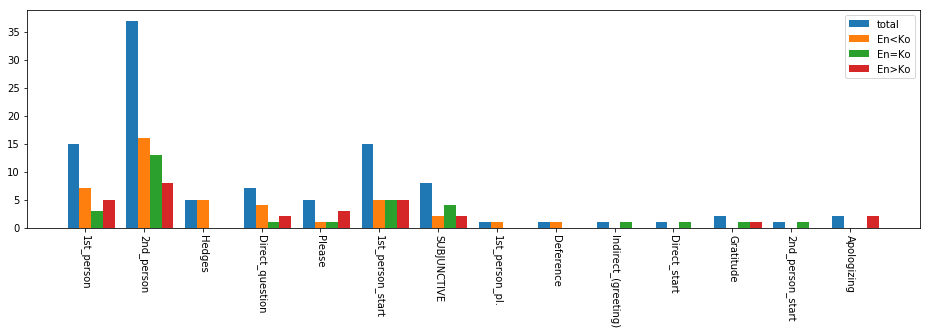

In [22]:
# Plot occurances of politeness strategies by category (EN vs. Ko)
from collections import Counter
f0=[]
f_s=[]
f1=[]

category=["en<ko","en>ko","en=ko","en<ch","en>ch","en=ch","ko<ch","ko>ch","ko=ch"]


for doc in final_diff_sens:
    if doc['category'] =='en<ko':
        for i in range(len(doc['features'])):
            f0.append(doc['features'][i])
    if doc['category'] =='en=ko':
        for i in range(len(doc['features'])):
            f_s.append(doc['features'][i])
    if doc['category'] =='en>ko':
         for i in range(len(doc['features'])):
            f1.append(doc['features'][i])
        

# print(set(f0+f_s+f1))


ind = np.arange(len(Counter(f0+f_s+f1)))  # the x locations for the groups
width = 0.20 

plt.figure(figsize=(16,4))

labels, values = zip(*Counter(f0+f_s+f1).items())
shortened_labels=[]
for l in labels:
    s=l[21:-2]
    shortened_labels.append(s)

plt.bar(ind, values, width, label="total")
plt.xticks(ind+width, shortened_labels, rotation=270)
print(len(labels))

    
plt.bar(ind+width, [f0.count(l) for l in labels ], width, label="En<Ko")
plt.bar(ind+width*2, [f_s.count(l) for l in labels ], width, label="En=Ko")
plt.bar(ind+width*3, [f1.count(l) for l in labels ], width, label="En>Ko")

plt.legend()


#### Reflection
- when 1_st person and 2nd_person strategies were used -> about more than half of them messages could be interpreted differently by different language groups

15


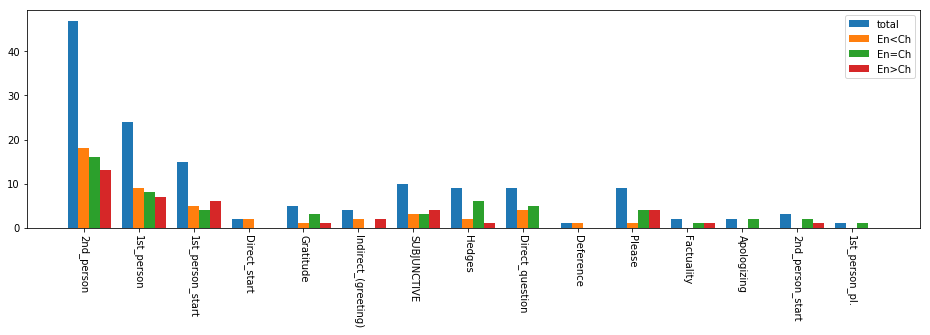

In [23]:
# Plot occurances of politeness strategies by category : En vs. Ch
from collections import Counter
f0=[]
f_s=[]
f1=[]

category=["en<ko","en>ko","en=ko","en<ch","en>ch","en=ch","ko<ch","ko>ch","ko=ch"]


for doc in final_diff_sens:
    if doc['category'] =='en<ch':
        for i in range(len(doc['features'])):
            f0.append(doc['features'][i])
    if doc['category'] =='en=ch':
        for i in range(len(doc['features'])):
            f_s.append(doc['features'][i])
    if doc['category'] =='en>ch':
         for i in range(len(doc['features'])):
            f1.append(doc['features'][i])
        

# print(set(f0+f_s+f1))


ind = np.arange(len(Counter(f0+f_s+f1)))  # the x locations for the groups
width = 0.20 

plt.figure(figsize=(16,4))

labels, values = zip(*Counter(f0+f_s+f1).items())
shortened_labels=[]
for l in labels:
    s=l[21:-2]
    shortened_labels.append(s)

plt.bar(ind, values, width, label="total")
plt.xticks(ind+width, shortened_labels, rotation=270)
print(len(labels))

    
plt.bar(ind+width, [f0.count(l) for l in labels ], width, label="En<Ch")
plt.bar(ind+width*2, [f_s.count(l) for l in labels ], width, label="En=Ch")
plt.bar(ind+width*3, [f1.count(l) for l in labels ], width, label="En>Ch")

plt.legend()

#### Reflection
- when 2nd_person strategy is used -> about more than half of them messages could be interpreted differently by different language groups

15


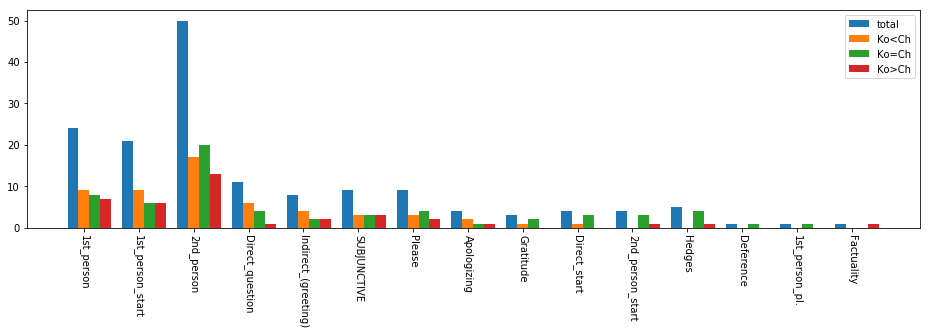

In [24]:
# Plot occurances of politeness strategies by category : Ko vs. Ch
from collections import Counter
f0=[]
f_s=[]
f1=[]

category=["en<ko","en>ko","en=ko","en<ch","en>ch","en=ch","ko<ch","ko>ch","ko=ch"]


for doc in final_diff_sens:
    if doc['category'] =='ko<ch':
        for i in range(len(doc['features'])):
            f0.append(doc['features'][i])
    if doc['category'] =='ko=ch':
        for i in range(len(doc['features'])):
            f_s.append(doc['features'][i])
    if doc['category'] =='ko>ch':
         for i in range(len(doc['features'])):
            f1.append(doc['features'][i])
        

# print(set(f0+f_s+f1))


ind = np.arange(len(Counter(f0+f_s+f1)))  # the x locations for the groups
width = 0.20 

plt.figure(figsize=(16,4))

labels, values = zip(*Counter(f0+f_s+f1).items())
shortened_labels=[]
for l in labels:
    s=l[21:-2]
    shortened_labels.append(s)

plt.bar(ind, values, width, label="total")
plt.xticks(ind+width, shortened_labels, rotation=270)
print(len(labels))

    
plt.bar(ind+width, [f0.count(l) for l in labels ], width, label="Ko<Ch")
plt.bar(ind+width*2, [f_s.count(l) for l in labels ], width, label="Ko=Ch")
plt.bar(ind+width*3, [f1.count(l) for l in labels ], width, label="Ko>Ch")

plt.legend()

#### Reflection
- 2nd_person strategies is used -> about more than half of them messages could be interpreted differently by different language groups